In [1]:
#Adding all libraries 
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
sns.set_style("whitegrid")
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier

In [2]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,roc_curve,auc,recall_score,precision_score
)
from sklearn.model_selection import cross_val_score

In [3]:
# Load the all the data from CSV files 
df_original = pd.read_csv('df_original.csv')
df_clean = pd.read_csv('df_clean.csv')
df = pd.read_csv('df_balanced_2021.csv')


In [4]:
df.head(10)

,Rpt Dist No,Vict Sex,Vict Descent,Date,Month,Hour,Vict_Age1,Day,LatLon,Crime_Cat_new
0,722,0,3,1,2,2,3,1,26852,0
1,1675,0,3,25,4,1,3,7,45042,0
2,236,0,4,7,2,5,3,7,24787,0
3,1148,0,3,25,1,1,3,1,31610,1
4,124,0,2,9,2,6,4,2,0,0
5,1984,0,3,10,3,5,3,3,44710,0
6,1431,0,2,21,1,3,2,4,9030,0
7,952,0,1,1,3,4,2,1,36790,0
8,981,0,2,19,5,3,4,3,34706,0
9,839,0,4,28,3,4,4,7,24296,0


In [5]:
# Split the DataFrame into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=1)

# Save the subsets to separate CSV files
train_data.to_csv('train_balanced_2021.csv', index=False)
test_data.to_csv('test_balanced_2021.csv', index=False)


# Separate features and target variable for training data
x_train = train_data.drop(["Crime_Cat_new"], axis=1)
y_train = train_data["Crime_Cat_new"]

# Separate features and target variable for testing data
x_test = test_data.drop(["Crime_Cat_new"], axis=1)
y_test = test_data["Crime_Cat_new"]

In [6]:
#Faced issue earlier that there was discrepancy in the number of rows
#Hence, checking the shape of the datasets. 
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (61499, 9)
y_train (61499,)
x_test (26357, 9)
y_test (26357,)


In [7]:
#checking if there are any null values 
x_train.isnull().sum()

Rpt Dist No     0
Vict Sex        0
Vict Descent    0
Date            0
Month           0
Hour            0
Vict_Age1       0
Day             0
LatLon          0
dtype: int64

In [8]:
x_test.isnull().sum()

Rpt Dist No     0
Vict Sex        0
Vict Descent    0
Date            0
Month           0
Hour            0
Vict_Age1       0
Day             0
LatLon          0
dtype: int64

In [9]:
#Creating separate X and Y 
x = df.drop(["Crime_Cat_new"], axis=1)
y = df.Crime_Cat_new.values

In [10]:
df.Crime_Cat_new.value_counts()

Crime_Cat_new
0    43928
1    43928
Name: count, dtype: int64

## Data Analysis - Part 1 
In this part, our output category has 6 values. We will perform all analysis for this particular thing. 

In [11]:
#labels & classes 
labels = [0,1]
classes = [0,1]

## Cost Matrix 
cost_matrix = np.array([[10,-100],  # a: Cost of True Positive, b: Cost of False Negative
                        [150,-10]]) # c: Cost of False Positive, d: Cost of True Negative

In [12]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

### Naive Bayes

Train Confusion matrix


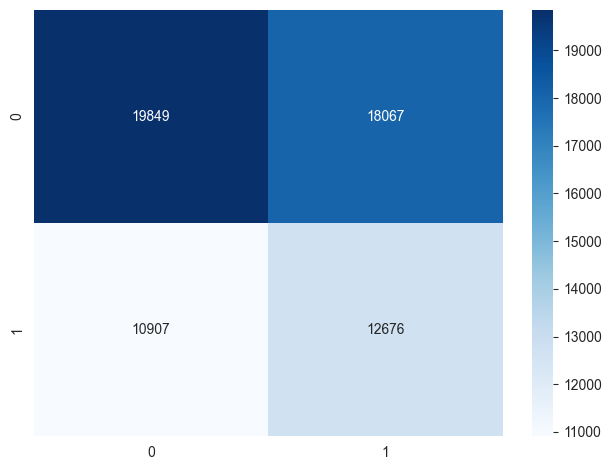

Test Confusion matrix


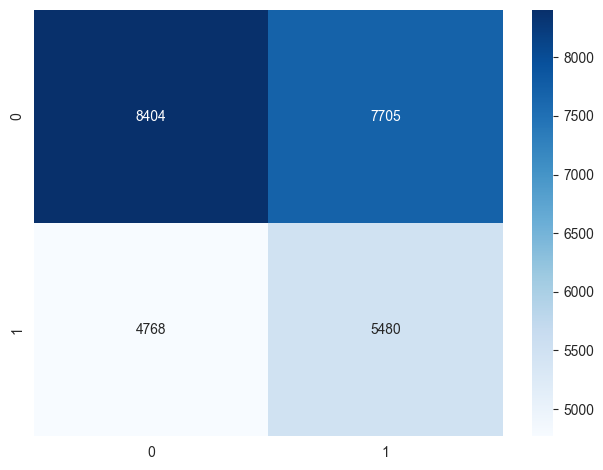

TEST ACCURACY  MultinomialNB  is : 0.526767082748416
TRAIN ACCURACY MultinomialNB  is : 0.5288703881363924
EXPECTED VALUE  MultinomialNB  is : 708190
___________________________
F-1 SCORE  MultinomialNB  is : <function f1_score at 0x13e60b670>
Train Confusion matrix


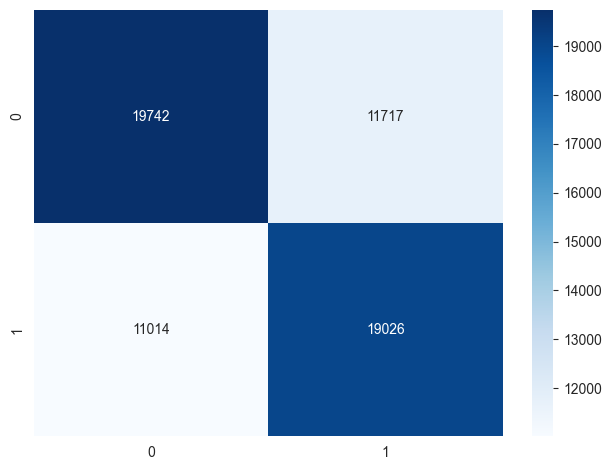

Test Confusion matrix


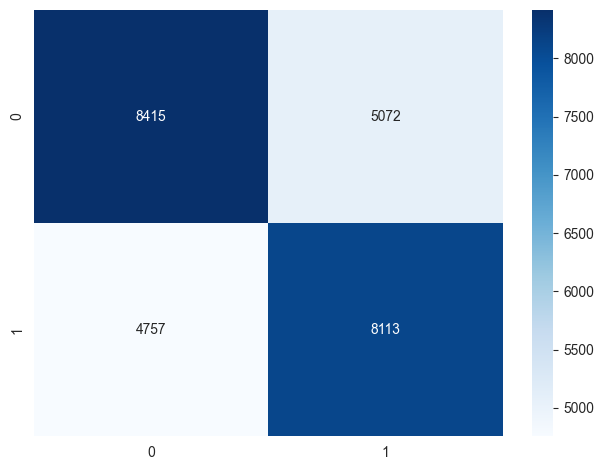

TEST ACCURACY  GaussianNB  is : 0.6270819896042797
TRAIN ACCURACY GaussianNB  is : 0.630384233889982
EXPECTED VALUE  GaussianNB  is : 288120
___________________________
F-1 SCORE  GaussianNB  is : <function f1_score at 0x13e60b670>
Train Confusion matrix


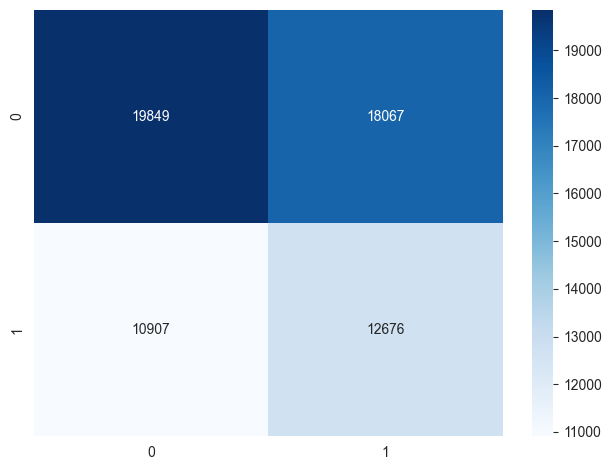

Test Confusion matrix


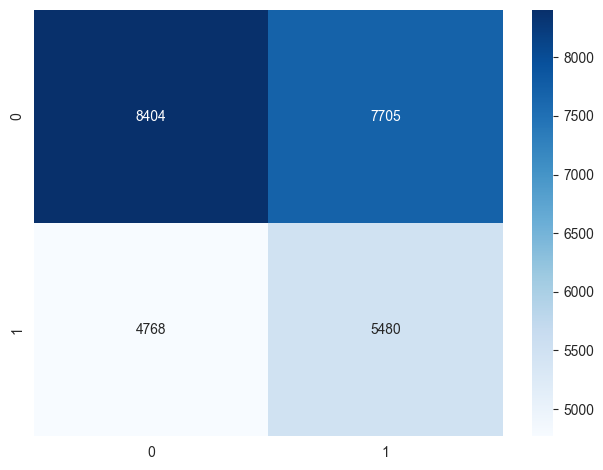

TEST ACCURACY  ComplementNB  is : 0.526767082748416
TRAIN ACCURACY ComplementNB  is : 0.5288703881363924
EXPECTED VALUE  ComplementNB  is : 708190
___________________________
F-1 SCORE  ComplementNB  is : <function f1_score at 0x13e60b670>
Train Confusion matrix


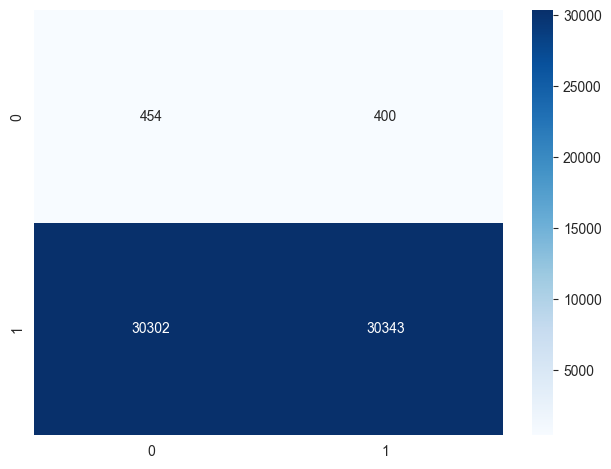

Test Confusion matrix


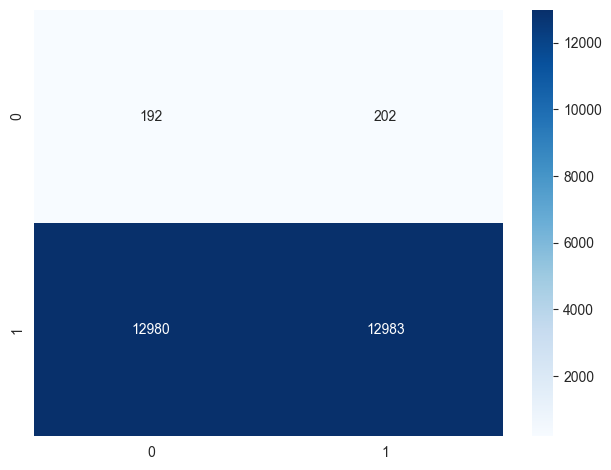

TEST ACCURACY  BernoulliNB  is : 0.4998672079523466
TRAIN ACCURACY BernoulliNB  is : 0.5007723702824436
EXPECTED VALUE  BernoulliNB  is : -1395610
___________________________
F-1 SCORE  BernoulliNB  is : <function f1_score at 0x13e60b670>


In [13]:
'''We will look into Naive Bayes models 
1. Multinomial Naive Bayes - MultinomialNB
2. Gaussian Naive Bayes - GaussianNB
3. Complement Naive Bayes - ComplementNB
4. Bernoulli Naive Bayes - BernoulliNB

'''
#Defining all the models as a dictionary
NB_models = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

#for every model in NB model, we will run all the code to calculate everything in one go 
#took reference from ensemble learning code. 

for name, classifier in NB_models.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)


### Decision Trees

Train Confusion matrix


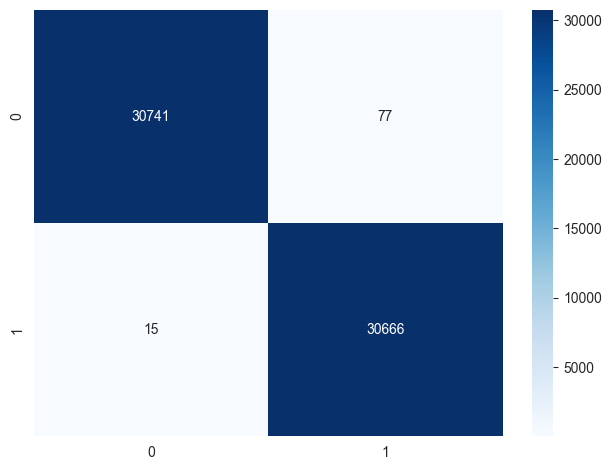

Test Confusion matrix


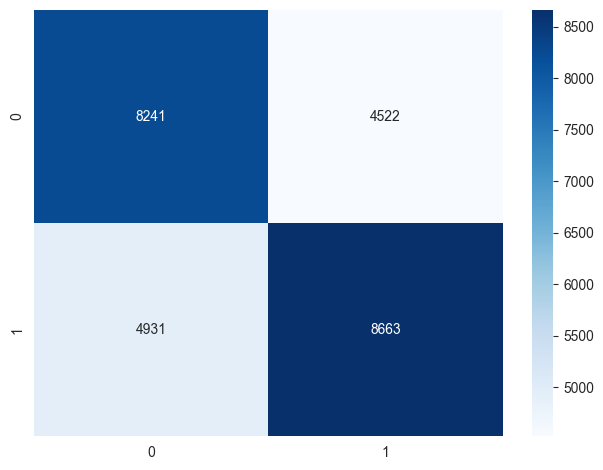

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6413476495807565
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  GiniTree_NoEstimators  is : 180980
___________________________
Train Confusion matrix


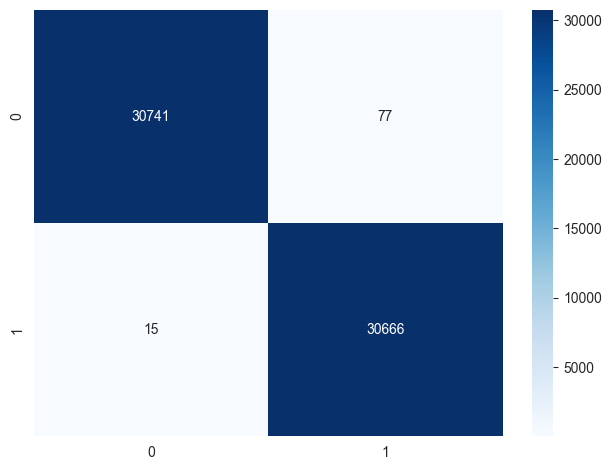

Test Confusion matrix


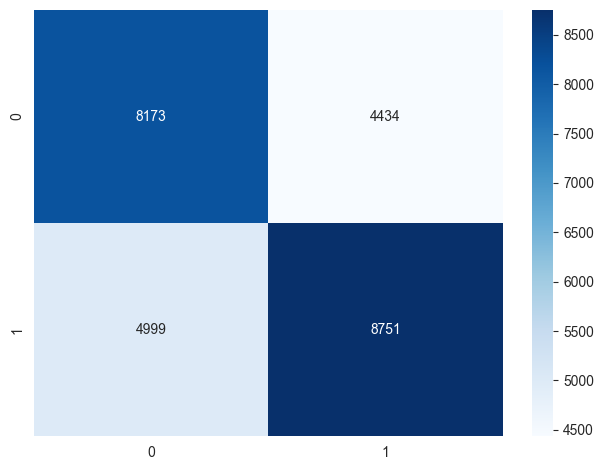

TEST ACCURACY  EntropyTree_NoEstimators  is : 0.642106461281633
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  EntropyTree_NoEstimators  is : 159420
___________________________
Train Confusion matrix


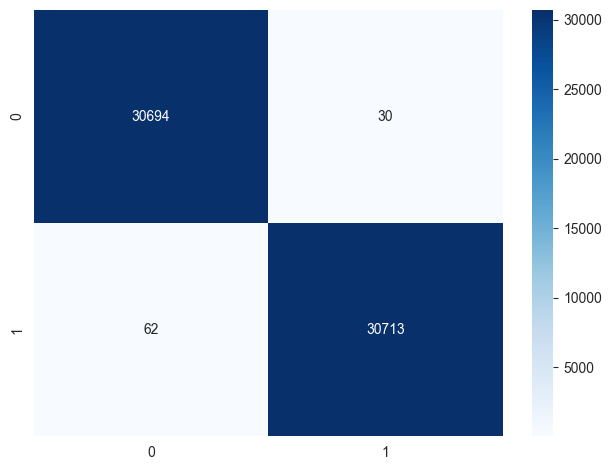

Test Confusion matrix


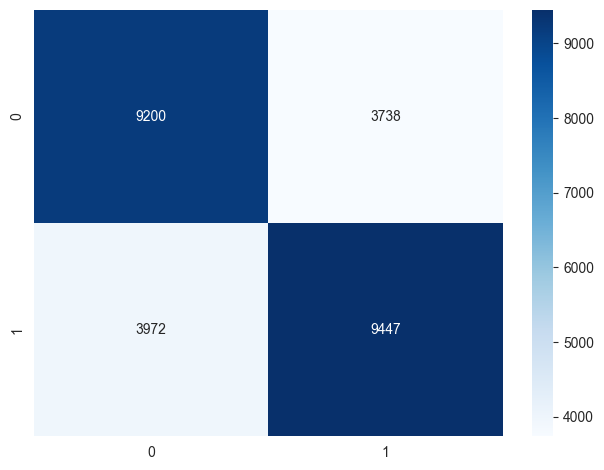

TEST ACCURACY  RandomForest  is : 0.7074780893121372
TRAIN ACCURACY RandomForest  is : 0.9985040407161092
EXPECTED VALUE  RandomForest  is : 161030
___________________________
Train Confusion matrix


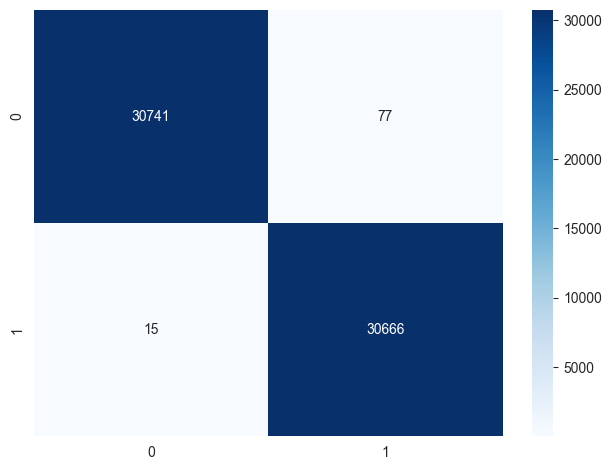

Test Confusion matrix


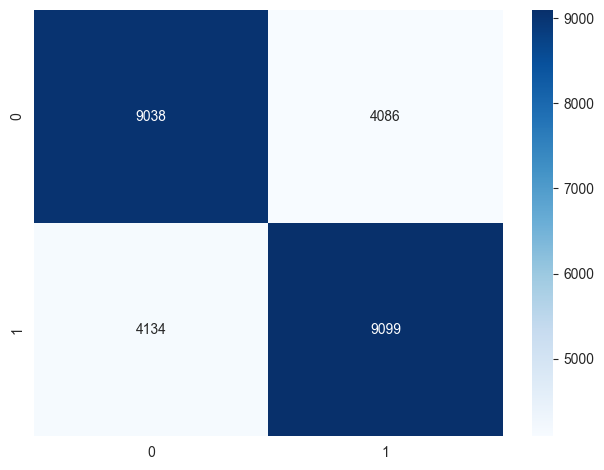

TEST ACCURACY  ExtraTrees_Gini  is : 0.6881283909397883
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9985040407161092
EXPECTED VALUE  ExtraTrees_Gini  is : 198890
___________________________
Train Confusion matrix


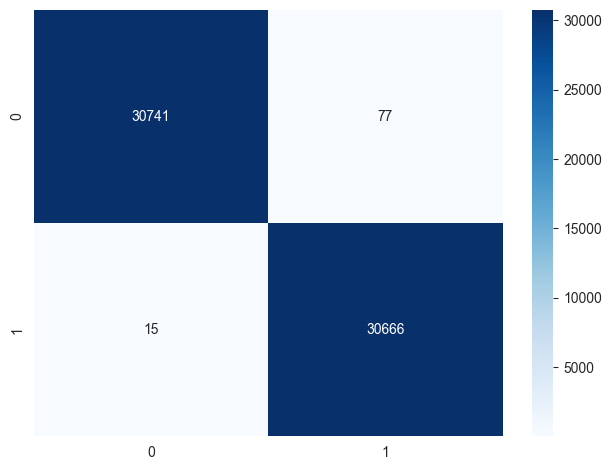

Test Confusion matrix


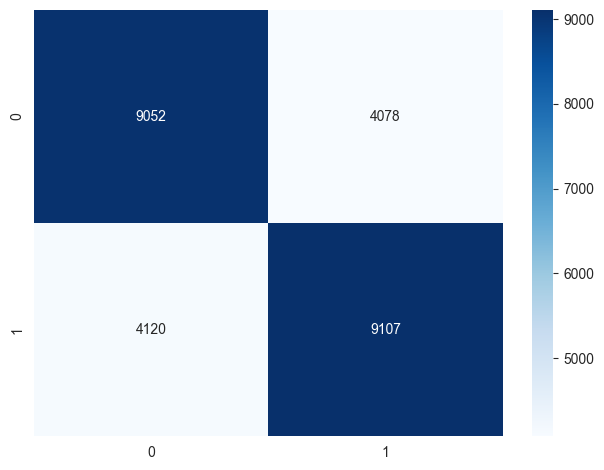

TEST ACCURACY  ExtraTrees_Entropy  is : 0.6889630838107523
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9985040407161092
EXPECTED VALUE  ExtraTrees_Entropy  is : 199150
___________________________


In [14]:
'''
In this section, we will look at decision tree models

1. tree.DecisionTreeClassifier(criterion='gini', random_state=42)
2.  tree.DecisionTreeClassifier(criterion='entropy', random_state=42) 
3.Extremely Randomized Trees
4. Random Forest - RandomForestClassifier(random_state=42)
'''

Tree_models_42 = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'RandomForest' : RandomForestClassifier(random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}

#took reference from ensemble learning code. 

for name, classifier in Tree_models_42.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

Up until now, Random forest give us the best results with maximum EV. Now let's try to improve the performances of these models. 

* We will do pre-pruning and post pruning to see improvements. 
* After that for both the types of models, we will perform cross validation. 

Best Fit Model: DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
Train Confusion matrix


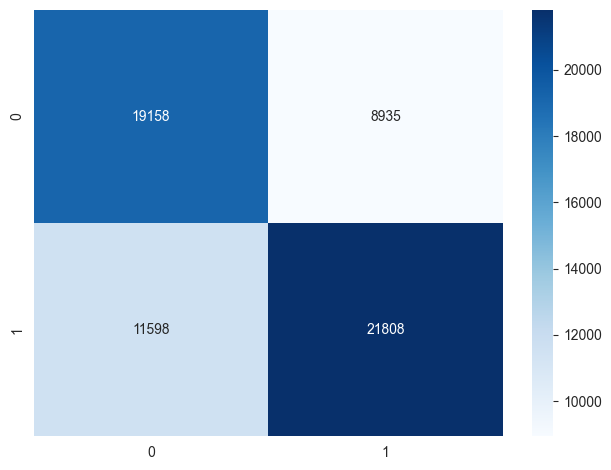

Test Confusion matrix


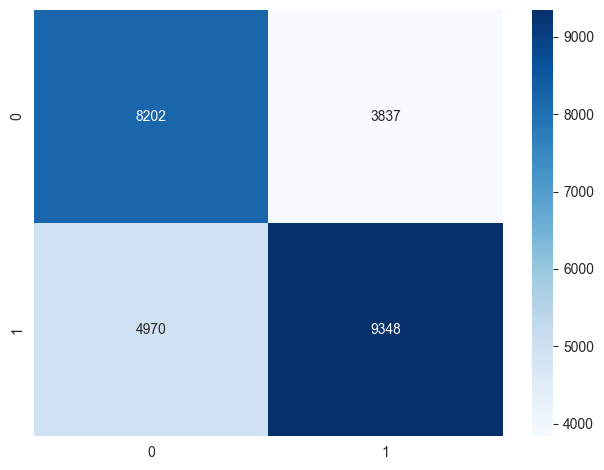

TEST ACCURACY is: 0.6658572675190652
TRAIN ACCURACY is: 0.6661246524333729
EXPECTED VALUE is: 67090


In [15]:
params = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
gcv = GridSearchCV(estimator=classifier, param_grid=params)
gcv.fit(x_train, y_train)

modelgcv = gcv.best_estimator_
print("Best Fit Model:", modelgcv)

modelgcv.fit(x_train, y_train)

# Predictions
y_pred = modelgcv.predict(x_test)
y_pred_train = modelgcv.predict(x_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

# Calculating Expected Value
EV = np.sum(cm * cost_matrix)

# Calculating other scores
#f1 = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass
#Precision = precision_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass

# Printing results
print("TEST ACCURACY is:", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY is:", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE is:", EV)
#print("F-1 SCORE is:", f1)
#print("RECALL is:", Recall)
#print("PRECISION is:", Precision)

Best Fit Model for GiniTree_NoEstimators DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
Train Confusion matrix


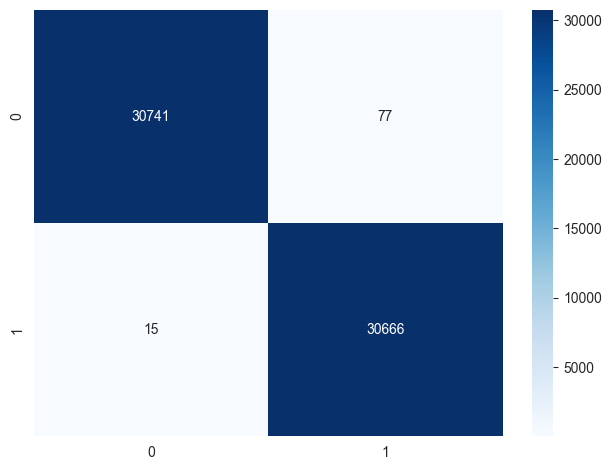

Test Confusion matrix


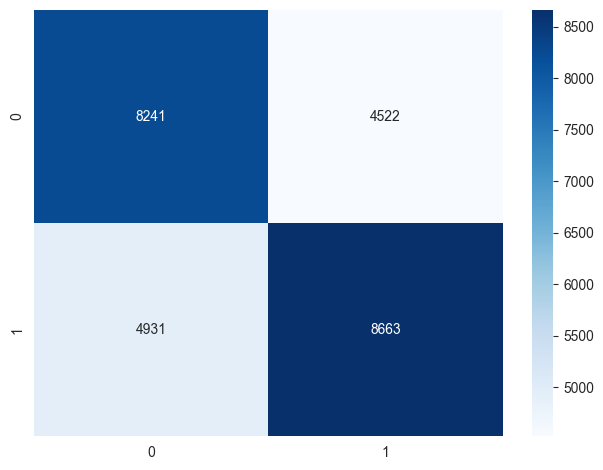

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6413476495807565
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  GiniTree_NoEstimators  is : 180980
___________________________
Best Fit Model for EntropyTree_NoEstimators DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=42)
Train Confusion matrix


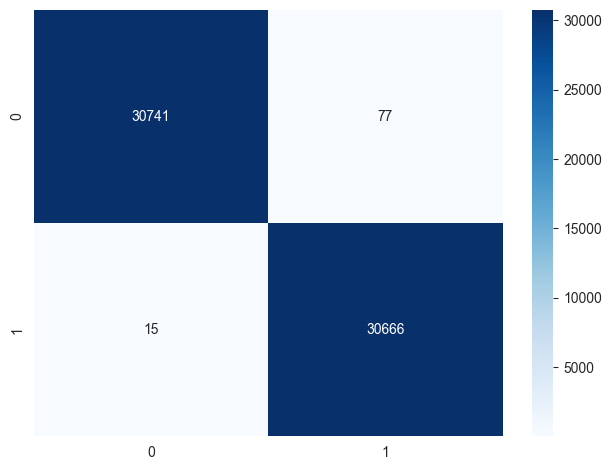

Test Confusion matrix


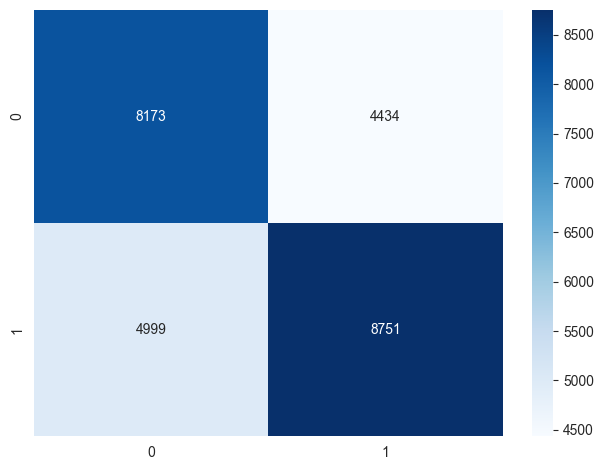

TEST ACCURACY  EntropyTree_NoEstimators  is : 0.642106461281633
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  EntropyTree_NoEstimators  is : 159420
___________________________
Best Fit Model for RandomForest RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
Train Confusion matrix


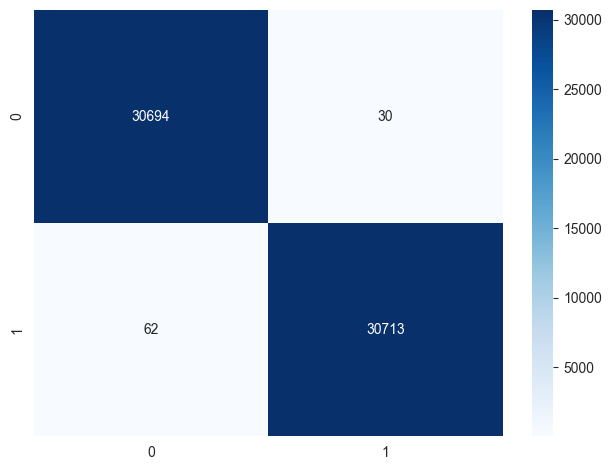

Test Confusion matrix


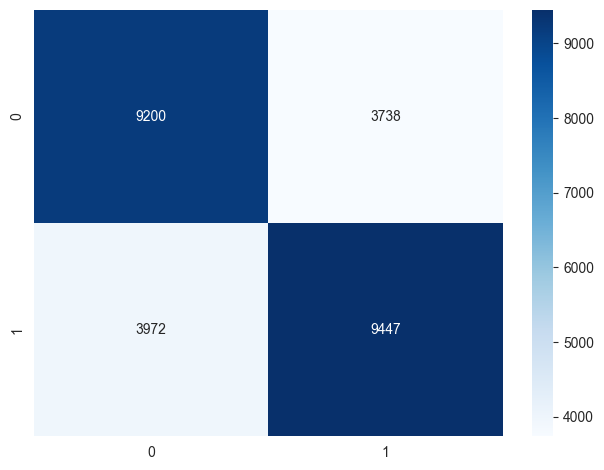

TEST ACCURACY  RandomForest  is : 0.7074780893121372
TRAIN ACCURACY RandomForest  is : 0.9985040407161092
EXPECTED VALUE  RandomForest  is : 161030
___________________________
Best Fit Model for ExtraTrees_Gini ExtraTreesClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
Train Confusion matrix


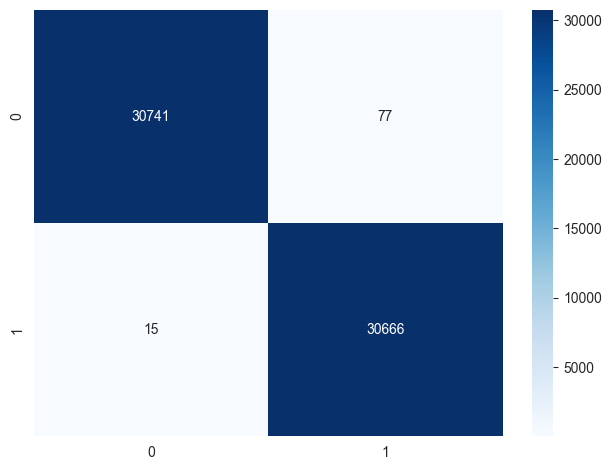

Test Confusion matrix


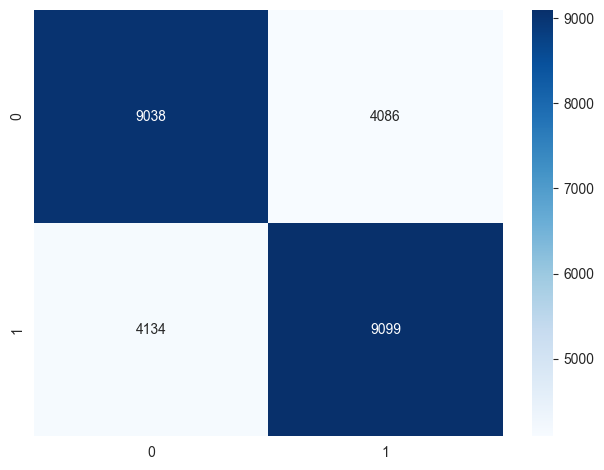

TEST ACCURACY  ExtraTrees_Gini  is : 0.6881283909397883
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9985040407161092
EXPECTED VALUE  ExtraTrees_Gini  is : 198890
___________________________
Best Fit Model for ExtraTrees_Entropy ExtraTreesClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                     random_state=42)
Train Confusion matrix


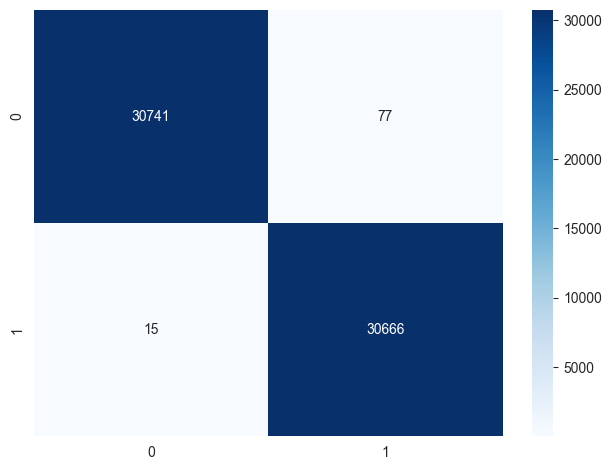

Test Confusion matrix


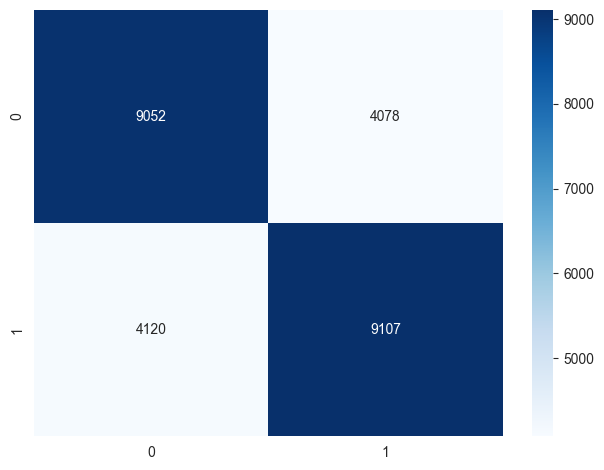

TEST ACCURACY  ExtraTrees_Entropy  is : 0.6889630838107523
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9985040407161092
EXPECTED VALUE  ExtraTrees_Entropy  is : 199150
___________________________


In [16]:
# Pre-pruning 
for name, classifier in Tree_models_42.items():
    
    # parameters 
    params = {'max_depth': [2,4,6],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [2,3]}
    
    
    gcv = GridSearchCV(estimator=classifier,param_grid=params)
    gcv.fit(x_train,y_train)

    modelgcv = gcv.best_estimator_
    print("Best Fit Model for", name, modelgcv)
    

    modelgcv.fit(x_train,y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

In [17]:
#Post Pruning 
Tree_models_new = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'GiniTree_BestGCV' : tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42), 
    'EntropyTree_BestGCV' : tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42),
    #'RandomForest' : RandomForestClassifier(random_state=42),
    #'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    #'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}
for name, model in Tree_models_new.items():
    path = model.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    print(name)
    print(ccp_alphas)
    print(ccp_alphas.shape)
    print(max(ccp_alphas))
    ccp_alphas2 = np.arange(0,max(ccp_alphas),0.001)
    print("______________________")


GiniTree_NoEstimators
[0.00000000e+00 0.00000000e+00 1.08402847e-06 ... 3.99989761e-03
 1.63382985e-02 3.45849848e-02]
(6970,)
0.03458498484467992
______________________
EntropyTree_NoEstimators
[0.00000000e+00 0.00000000e+00 1.62385519e-06 ... 7.19736700e-03
 2.44124820e-02 5.21515114e-02]
(6437,)
0.05215151139064367
______________________
GiniTree_BestGCV
[0.00000000e+00 1.45547878e-05 1.95125124e-05 2.12396086e-05
 2.47777935e-05 2.85391341e-05 2.87485317e-05 3.21512988e-05
 3.67582651e-05 4.05259873e-05 4.30700282e-05 5.49055591e-05
 5.66282635e-05 5.77478714e-05 6.05388205e-05 6.19853937e-05
 6.29744883e-05 6.67329080e-05 7.14724951e-05 7.53119227e-05
 7.64947873e-05 8.00555674e-05 8.11254462e-05 9.52507532e-05
 1.00410727e-04 1.00470946e-04 1.06724851e-04 1.55658666e-04
 2.32408676e-04 2.34739282e-04 2.37415271e-04 2.58501948e-04
 2.84819308e-04 3.50191843e-04 4.46350619e-04 4.50218163e-04
 4.64668957e-04 6.79919212e-04 7.36916212e-04 8.88279485e-04
 9.65297600e-04 1.01260035e-03

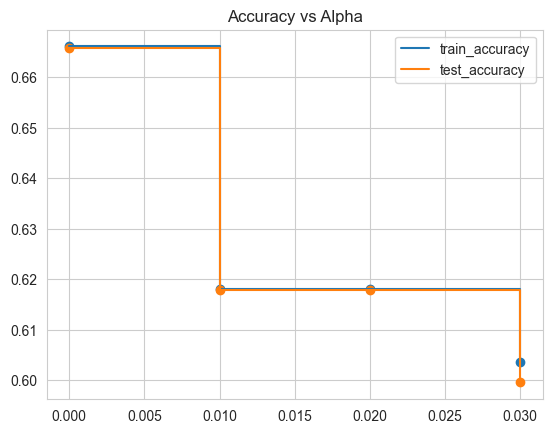

In [18]:
#For Entropy Tree GCV 
ccp_alphas2 = np.arange(0,0.037,0.01)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

Train Confusion matrix


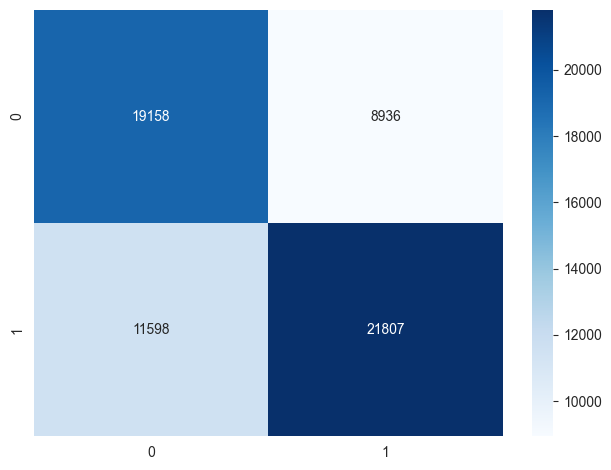

Test Confusion matrix


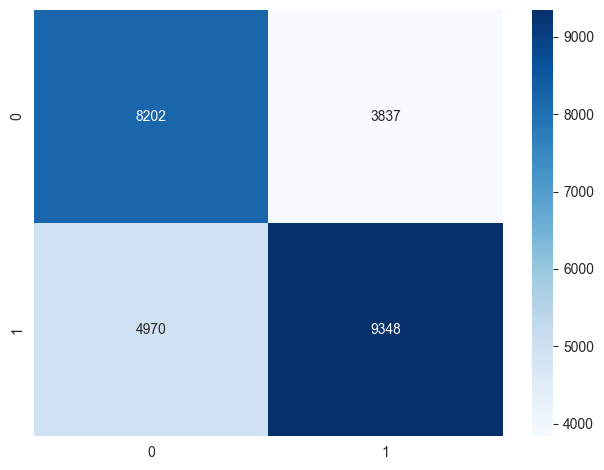

TEST ACCURACY  EntropyTree_BestGCV  is : 0.6658572675190652
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.6661083920063741
EXPECTED VALUE  EntropyTree_BestGCV  is : 67090
___________________________


In [19]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

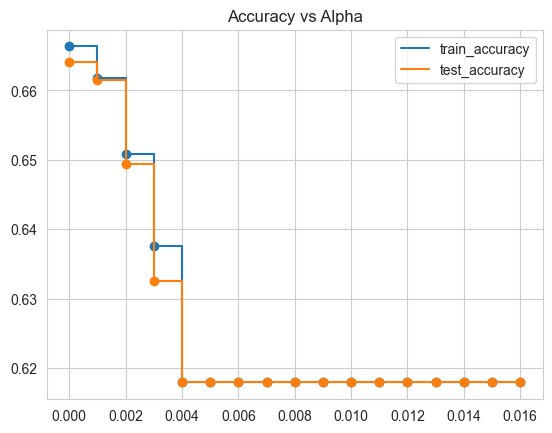

In [20]:
#Gini GCV model
ccp_alphas2 = np.arange(0,0.0167,0.001)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

Train Confusion matrix


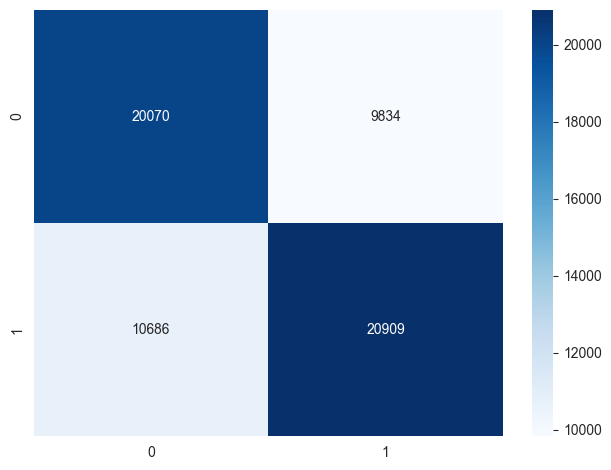

Test Confusion matrix


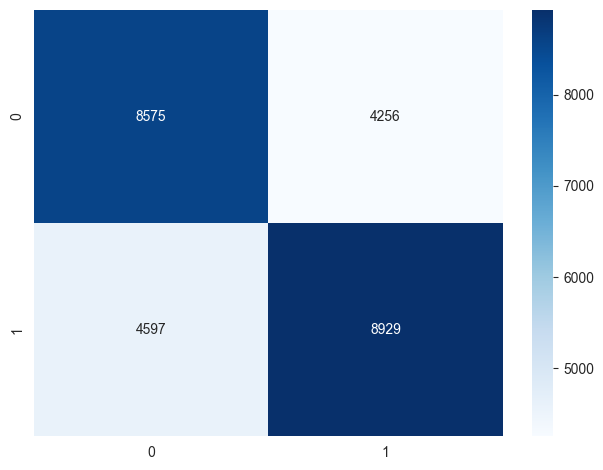

TEST ACCURACY  EntropyTree_BestGCV  is : 0.6641120006070493
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.6663360379843575
EXPECTED VALUE  EntropyTree_BestGCV  is : 175160
___________________________


In [21]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

Stratified sampling for all the models 

### Stratified Sampling

#### Stratified Sampling - Naive Bayes Models

In [22]:
#Creating stratified sample 

stratified_sample =  StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Empty list to maintain all the scores
scores = []

#For loops for all calculations 
for model_name,model in NB_models.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5274
Fold 2: Accuracy: 0.5405
Fold 3: Accuracy: 0.5229
Fold 4: Accuracy: 0.5288
Fold 5: Accuracy: 0.5298
Fold 6: Accuracy: 0.5189
Fold 7: Accuracy: 0.5256
Fold 8: Accuracy: 0.5281
Fold 9: Accuracy: 0.5328
Fold 10: Accuracy: 0.5297
Average Score for MultinomialNB is 0.5284442989642677
Fold 1: Accuracy: 0.5274
Fold 2: Accuracy: 0.5405
Fold 3: Accuracy: 0.5229
Fold 4: Accuracy: 0.5288
Fold 5: Accuracy: 0.5298
Fold 6: Accuracy: 0.5189
Fold 7: Accuracy: 0.5256
Fold 8: Accuracy: 0.5281
Fold 9: Accuracy: 0.5328
Fold 10: Accuracy: 0.5297
Fold 11: Accuracy: 0.6336
Fold 12: Accuracy: 0.6278
Fold 13: Accuracy: 0.6263
Fold 14: Accuracy: 0.6334
Fold 15: Accuracy: 0.6285
Fold 16: Accuracy: 0.6325
Fold 17: Accuracy: 0.6262
Fold 18: Accuracy: 0.6257
Fold 19: Accuracy: 0.6312
Fold 20: Accuracy: 0.6279
Average Score for GaussianNB is 0.5788790524222255
Fold 1: Accuracy: 0.5274
Fold 2: Accuracy: 0.5405
Fold 3: Accuracy: 0.5229
Fold 4: Accuracy: 0.5288
Fold 5: Accuracy: 0.5298
Fold 6: 

#### Stratified Sampling - Tree Models

In [23]:
#For loops for all calculations 
for model_name,model in Tree_models_42.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5274
Fold 2: Accuracy: 0.5405
Fold 3: Accuracy: 0.5229
Fold 4: Accuracy: 0.5288
Fold 5: Accuracy: 0.5298
Fold 6: Accuracy: 0.5189
Fold 7: Accuracy: 0.5256
Fold 8: Accuracy: 0.5281
Fold 9: Accuracy: 0.5328
Fold 10: Accuracy: 0.5297
Fold 11: Accuracy: 0.6336
Fold 12: Accuracy: 0.6278
Fold 13: Accuracy: 0.6263
Fold 14: Accuracy: 0.6334
Fold 15: Accuracy: 0.6285
Fold 16: Accuracy: 0.6325
Fold 17: Accuracy: 0.6262
Fold 18: Accuracy: 0.6257
Fold 19: Accuracy: 0.6312
Fold 20: Accuracy: 0.6279
Fold 21: Accuracy: 0.5274
Fold 22: Accuracy: 0.5405
Fold 23: Accuracy: 0.5229
Fold 24: Accuracy: 0.5288
Fold 25: Accuracy: 0.5298
Fold 26: Accuracy: 0.5189
Fold 27: Accuracy: 0.5256
Fold 28: Accuracy: 0.5281
Fold 29: Accuracy: 0.5328
Fold 30: Accuracy: 0.5297
Fold 31: Accuracy: 0.5005
Fold 32: Accuracy: 0.4997
Fold 33: Accuracy: 0.5009
Fold 34: Accuracy: 0.5005
Fold 35: Accuracy: 0.5028
Fold 36: Accuracy: 0.5010
Fold 37: Accuracy: 0.4993
Fold 38: Accuracy: 0.4999
Fold 39: Accuracy: 0.

### Ensemble Learning 

Ensemble learning 
* Simple averaging 
* Boosting 
* Bagging 

#### Simple Averaging

In [24]:
x_train.shape

(61499, 9)

In [25]:
y_train.shape

(61499,)

In [26]:
models_dict = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42),
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

for name, classifier in models_dict.items():
    #fit the model 
    classifier.fit(x_train, y_train)
    #make prediciton 
    #Calculating all the predicitons 
    y_pred = classifier.predict(x_test)
    y_pred_train =  classifier.predict(x_train)
    
    #confusion matrix 
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6413476495807565
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  GiniTree_NoEstimators  is : 180980
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.642106461281633
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  EntropyTree_NoEstimators  is : 159420
TEST ACCURACY  ExtraTrees_Gini  is : 0.6881283909397883
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9985040407161092
EXPECTED VALUE  ExtraTrees_Gini  is : 198890
TEST ACCURACY  ExtraTrees_Entropy  is : 0.6889630838107523
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9985040407161092
EXPECTED VALUE  ExtraTrees_Entropy  is : 199150
TEST ACCURACY  MultinomialNB  is : 0.526767082748416
TRAIN ACCURACY MultinomialNB  is : 0.5288703881363924
EXPECTED VALUE  MultinomialNB  is : 708190
TEST ACCURACY  GaussianNB  is : 0.6270819896042797
TRAIN ACCURACY GaussianNB  is : 0.630384233889982
EXPECTED VALUE  GaussianNB  is : 288120
TEST ACCURACY  ComplementNB 

Train Confusion matrix


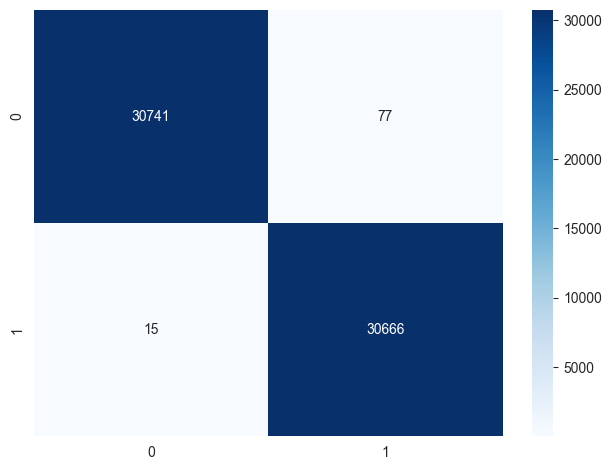

Test Confusion matrix


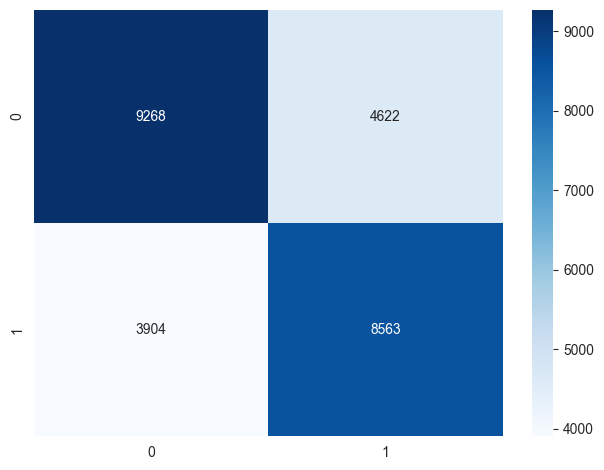

Train accuracy:  0.9985040407161092
Test accuracy:  0.676518571916379
Expected Value:  309950


In [27]:
#HARD VOTING
models_dict_2 = [('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())]


model = VotingClassifier(estimators=[('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())], voting='hard')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)

Train Confusion matrix


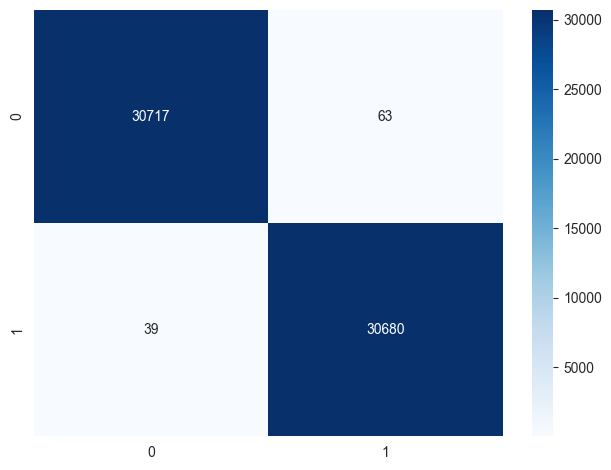

Test Confusion matrix


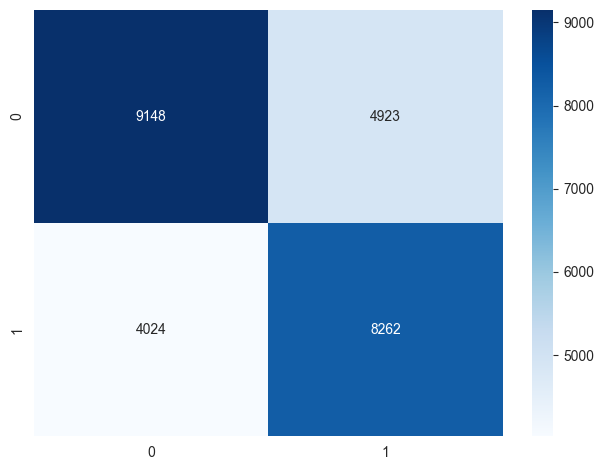

Train accuracy:  0.998341436446121
Test accuracy:  0.6605455856129302
Expected Value:  344910


In [28]:
#SOFT VOTING
model = VotingClassifier(estimators=models_dict_2, voting='soft')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)


#### Bagging

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Confusion matrix


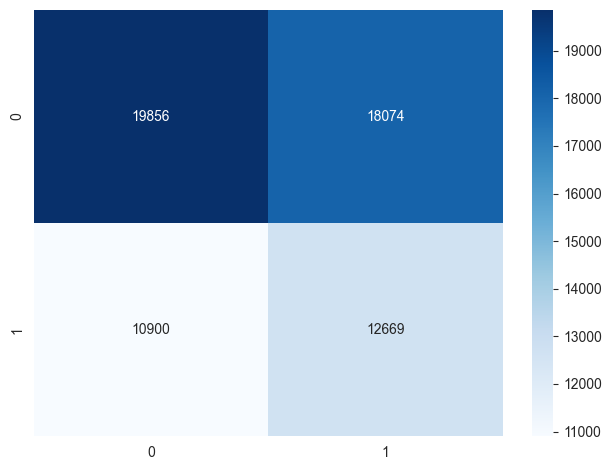

Test Confusion matrix


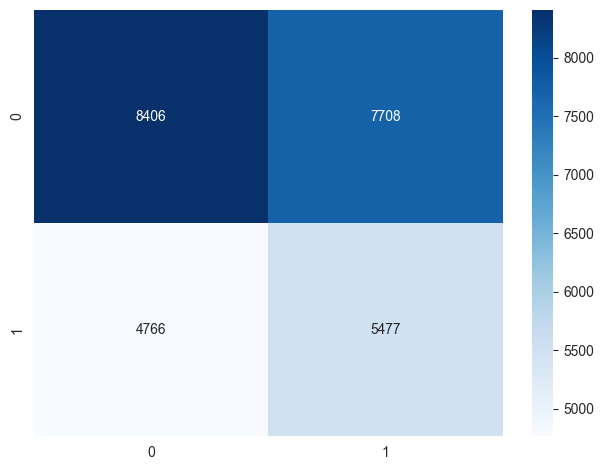

TEST ACCURACY  MultinomialNB  is : 0.5267291421633722
TRAIN ACCURACY MultinomialNB  is : 0.5288703881363924
EXPECTED VALUE  MultinomialNB  is : 708890
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Confusion matrix


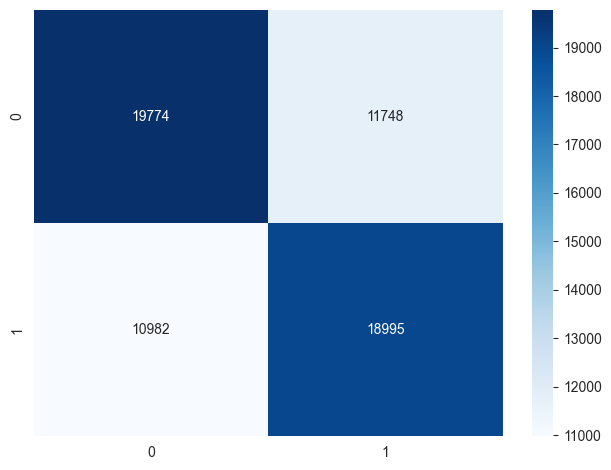

Test Confusion matrix


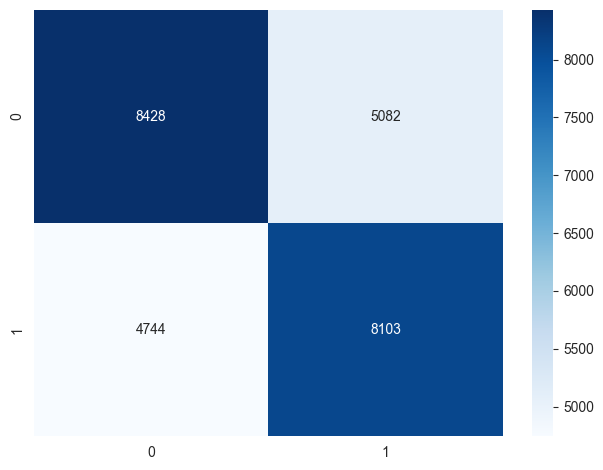

TEST ACCURACY  GaussianNB  is : 0.6271958113594112
TRAIN ACCURACY GaussianNB  is : 0.6304004943169808
EXPECTED VALUE  GaussianNB  is : 291150
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Confusion matrix


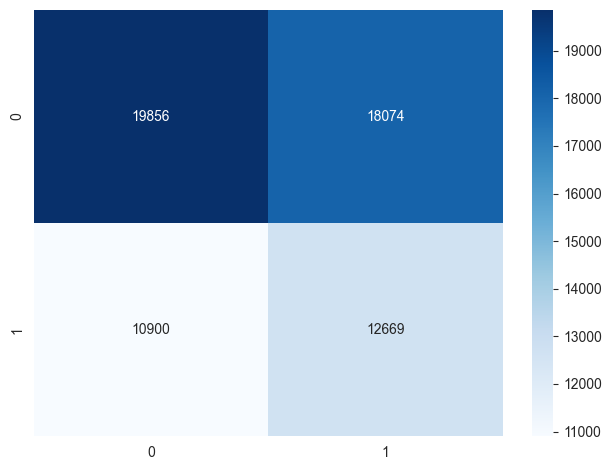

Test Confusion matrix


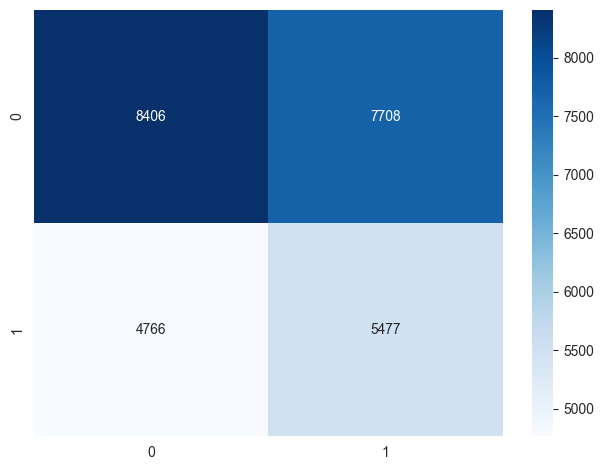

TEST ACCURACY  ComplementNB  is : 0.5267291421633722
TRAIN ACCURACY ComplementNB  is : 0.5288703881363924
EXPECTED VALUE  ComplementNB  is : 708890
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train Confusion matrix


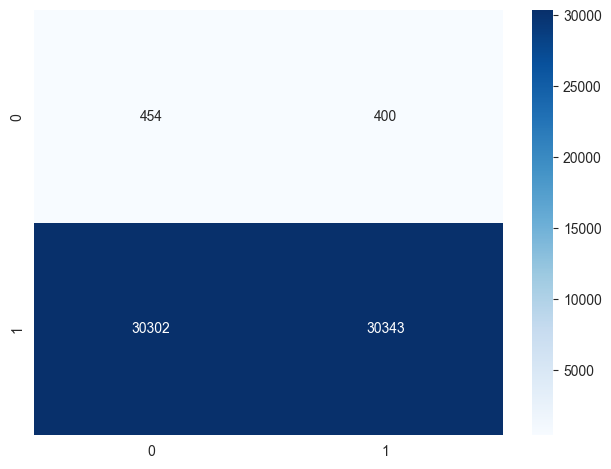

Test Confusion matrix


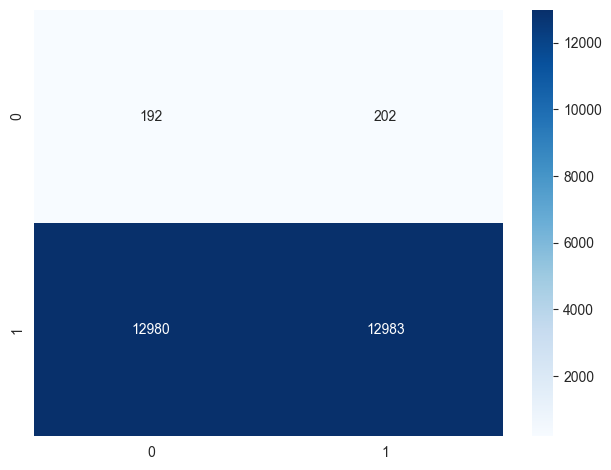

TEST ACCURACY  BernoulliNB  is : 0.4998672079523466
TRAIN ACCURACY BernoulliNB  is : 0.5007723702824436
EXPECTED VALUE  BernoulliNB  is : -1395610
___________________________
Train Confusion matrix


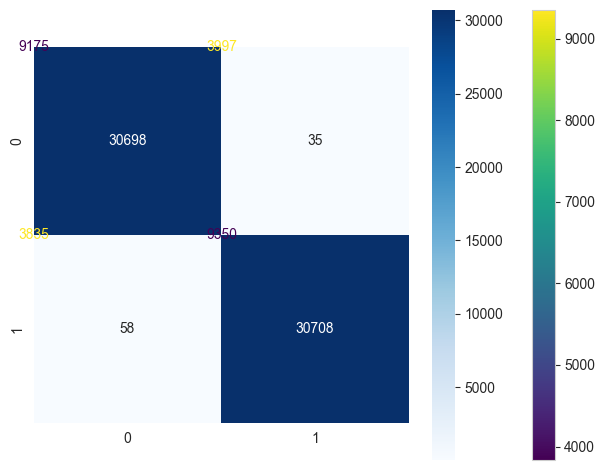

Test Confusion matrix


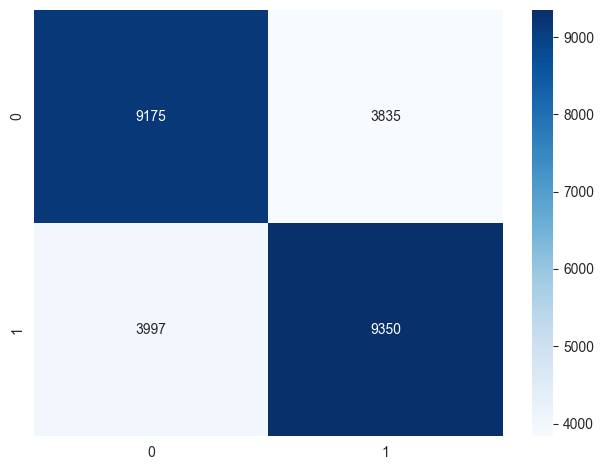

Train accuracy of RandomForest algo:  0.9984877802891103
Test accuracy of RandomForest algo:  0.7028493379367909
Expected Value of RandomForest algo:  173800


In [29]:
#### Bagging for Naives Bayes models 

from sklearn.ensemble import BaggingClassifier

for name, classifier in NB_models.items():
    
    model = BaggingClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)



# Bagging with Random Forest Classifier 
# Build a Gaussian Classifier
modelMNB = RandomForestClassifier()
modelMNB.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelMNB.predict(x_test)
y_pred_train =  modelMNB.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelMNB.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelMNB.predict(x_test))

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of RandomForest algo: ", mnb_train_accuracy)
print("Test accuracy of RandomForest algo: ", mnb_test_accuracy)
print("Expected Value of RandomForest algo: ", EV_MNB)



#### Boosting

In [39]:
#Adaboost for all our models 
from sklearn.ensemble import AdaBoostClassifier

for name, classifier in models_dict.items():
    
    model = AdaBoostClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GiniTree_NoEstimators  is : 0.6608491102932808
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  GiniTree_NoEstimators  is : 66610
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  EntropyTree_NoEstimators  is : 0.7224266798194028
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9985040407161092
EXPECTED VALUE  EntropyTree_NoEstimators  is : 133360
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  ExtraTrees_Gini  is : 0.6971203095951739
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9985040407161092
EXPECTED VALUE  ExtraTrees_Gini  is : 190400
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

Train Confusion matrix


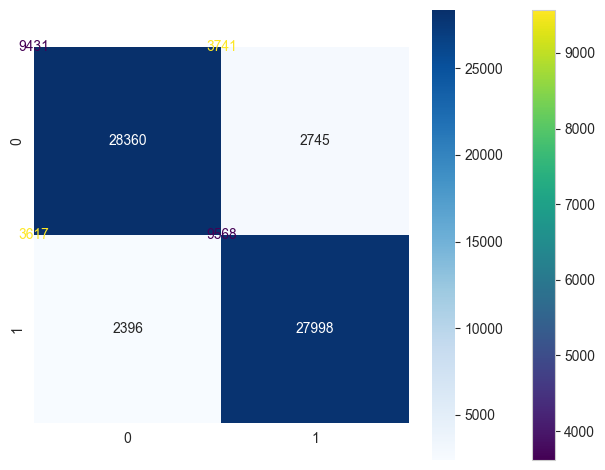

Test Confusion matrix


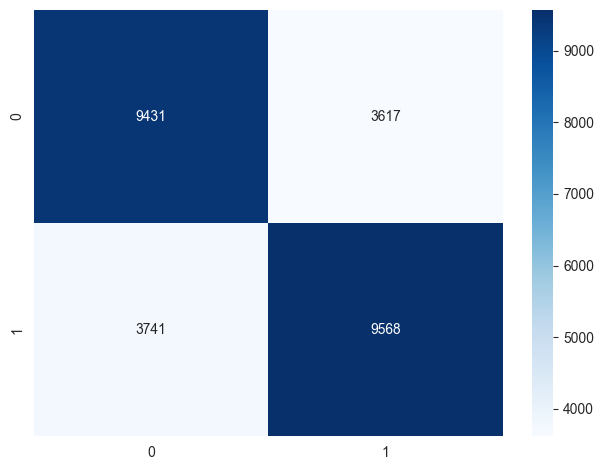

Train accuracy of XGBoost algo:  0.9164051447991024
Test accuracy of XGBoost algo:  0.7208331752475623
Expected Value of XGBoost algo:  167080


In [32]:
#XGBoost 
import xgboost as xgb

# Build a Gaussian Classifier
modelXG = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, 
                                 booster='gbtree', subsample=0.8, colsample_bytree=0.8)
modelXG.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelXG.predict(x_test)
y_pred_train =  modelXG.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelXG.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelXG.predict(x_test))

#Confusion matrix 
labels = [0,1]
classes = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of XGBoost algo: ", mnb_train_accuracy)
print("Test accuracy of XGBoost algo: ", mnb_test_accuracy)
print("Expected Value of XGBoost algo: ", EV_MNB)


## Plots

In [33]:
##plotting graphs 

NB_models = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}
modelXG = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, 
                                 booster='gbtree', subsample=0.8, colsample_bytree=0.8)



In [34]:
models_dict = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42),
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

In [35]:
models_graph = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB(), 
    'SoftVoting' : VotingClassifier(estimators=models_dict_2, voting='soft'),
    #'HardVoting' : VotingClassifier(estimators=models_dict_2, voting='hard'),
    'GiniTree' : tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=0),
    'EntropyTree' : tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=0),
    'RandomForest' : RandomForestClassifier(random_state=42)
    
}

In [36]:
models_dict_2 = [('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())]


In [37]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

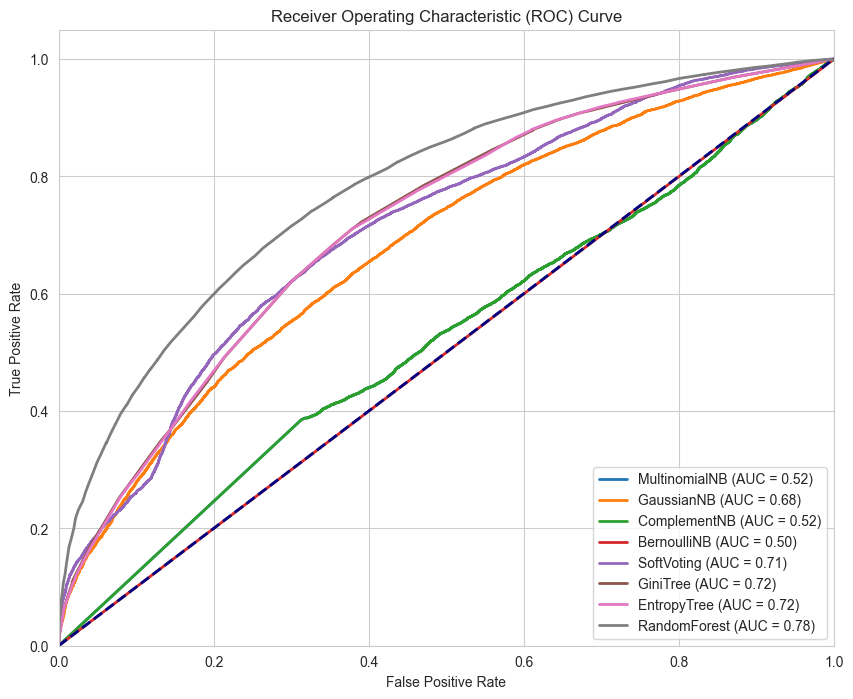

In [38]:
# Plot ROC Curve for each model
plt.figure(figsize=(10, 8))

for name, model in models_graph.items():
    model.fit(x_train,y_train)
    # Predict probabilities for the positive class
    y_pred = model.predict_proba(x_test)[:, 1]

    # Compute ROC curve and ROC area for each model
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Plot
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC Curve for a random model (no skill classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming cost_matrix is defined like this:
# cost_matrix = np.array([[tp_cost, fn_cost], [fp_cost, tn_cost]])

def calculate_profit(confusion, cost_matrix):
    profit = np.sum(confusion * cost_matrix)
    return profit


plt.figure(figsize=(12, 8))

for model_name, model in models_graph.items():
    model.fit(x_train,y_train)
    # Predict probabilities
    y_pred_probs = model.predict_proba(x_test)[:, 1]
    
    # Sort the probabilities and true values
    sorted_indices = np.argsort(y_pred_probs)[::-1]
    print("Y")
    sorted_probs = y_pred_probs[sorted_indices]
    print("Y")
    sorted_true = y_test[sorted_indices]
    print("Y")
    
    # Calculate cumulative profit at each threshold
    thresholds = np.unique(sorted_probs)
    cumulative_profit = []
    for threshold in thresholds:
        # Get predictions at the current threshold
        y_pred = sorted_probs >= threshold
        # Calculate the confusion matrix
        confusion = confusion_matrix(sorted_true, y_pred)
        # Calculate and store the profit
        cumulative_profit.append(calculate_profit(confusion, cost_matrix))
    
    # Plot the cumulative profit curve for the current model
    plt.plot(thresholds, cumulative_profit, label=f'{model_name}')

plt.xlabel('Probability Threshold')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit Curve by Model')
plt.legend()
plt.show()


Y
Y


KeyError: '[32610, 85219, 16302, 85199, 85195, 16312, 85188, 85186, 85159, 16329, 85153, 85151, 85150, 85149, 85139, 16336, 121303, 85130, 121305, 85222, 16300, 16299, 85258, 16279, 16280, 85271, 85270, 85264, 85261, 85257, 16295, 121272, 16285, 16286, 85254, 121276, 85252, 121279, 85119, 85118, 84976, 85015, 85013, 5141, 85008, 84980, 121347, 5146, 84969, 16384, 121352, 84946, 121355, 84941, 5143, 5148, 85101, 85065, 16346, 5158, 5157, 16350, 16351, 85089, 85088, 85066, 16358, 85021, 16362, 85047, 85039, 85029, 85295, 85297, 85535, 85534, 85533, 121190, 85528, 85522, 85514, 85504, 85502, 85495, 121205, 16223, 85556, 121182, 85559, 121168, 85622, 16187, 85602, 85597, 121163, 121167, 16203, 85586, 85576, 5195, 85572, 85565, 85564, 5186, 121245, 121237, 85382, 121240, 85381, 5179, 85374, 85373, 16255, 85417, 121247, 85349, 121250, 85348, 85345, 121254, 85311, 16240, 85419, 16229, 121213, 85467, 121216, 85463, 85462, 16238, 85449, 5183, 85447, 16234, 85432, 85428, 121230, 121231, 84936, 84927, 85644, 16504, 84493, 84489, 84487, 84483, 84478, 84474, 84465, 84461, 84459, 121505, 121506, 5094, 84451, 121510, 84528, 84531, 84567, 84623, 84611, 84606, 84589, 16487, 16491, 84572, 121473, 84532, 84563, 16494, 84557, 16496, 84548, 84539, 84536, 121511, 84445, 5083, 84305, 84302, 121548, 84296, 84291, 84290, 16573, 84288, 16555, 5082, 5081, 84279, 84266, 84265, 121563, 16580, 121565, 16557, 84324, 84425, 84420, 16523, 84405, 84395, 84393, 16529, 121530, 84354, 16546, 84342, 84338, 5109, 84867, 84854, 5130, 84853, 84846, 84842, 84838, 16413, 84829, 16418, 16421, 16423, 121384, 84901, 84923, 84921, 84916, 84913, 121366, 121367, 84909, 84896, 84883, 121374, 84891, 84888, 121409, 84792, 84672, 121438, 16462, 121445, 84711, 84656, 16471, 121452, 121453, 121435, 84763, 84787, 16432, 121415, 84772, 84765, 84764, 84719, 84755, 121424, 121425, 84752, 84729, 84727, 84721, 85626, 85659, 81759, 120871, 86475, 120878, 86461, 120880, 86453, 120885, 120886, 86450, 15917, 15915, 86481, 86532, 86549, 86544, 86543, 120848, 120849, 15894, 86536, 5285, 5282, 120867, 15898, 120857, 86512, 15902, 15903, 120862, 86502, 15905, 86446, 86442, 120894, 86350, 15952, 5261, 120926, 86342, 15955, 86322, 86310, 15964, 86301, 120938, 120940, 86292, 86287, 86283, 86351, 86437, 15945, 86425, 120899, 86417, 15938, 86408, 86406, 86373, 120907, 120910, 86380, 86378, 86556, 86558, 86280, 86564, 86800, 120766, 86797, 86795, 15819, 15821, 86787, 86771, 86767, 86761, 86760, 86759, 86756, 86755, 120781, 15830, 120784, 86809, 86819, 86821, 86876, 86864, 86861, 120744, 86859, 15805, 15806, 86825, 86849, 15810, 120753, 86836, 86831, 86829, 86827, 15811, 120785, 86732, 15833, 15875, 120820, 120821, 15860, 15862, 120825, 120826, 5290, 86604, 86644, 86602, 86599, 86596, 15878, 86588, 15884, 86570, 120815, 86727, 86682, 5304, 86709, 86708, 15845, 86696, 86689, 15856, 120804, 86671, 86665, 120810, 86650, 120945, 86279, 5223, 16103, 85864, 85863, 85861, 16105, 16106, 85856, 85854, 121092, 5215, 121095, 5214, 16114, 85845, 16115, 85879, 121063, 85957, 5229, 85955, 85939, 85927, 121062, 85914, 85895, 5226, 121066, 85912, 121068, 85901, 121071, 121072, 85896, 85830, 85695, 85734, 121133, 85730, 121135, 85721, 85714, 16152, 85689, 85736, 121145, 85682, 16164, 85672, 121151, 121129, 85825, 85823, 121107, 85810, 85809, 85805, 121112, 85802, 16127, 121115, 16131, 16140, 85758, 85756, 121123, 85748, 5207, 85971, 16061, 86195, 120977, 86178, 16005, 16008, 86162, 86153, 120984, 86149, 86147, 86139, 86129, 5244, 16019, 86198, 120974, 86245, 15972, 86272, 86270, 86268, 86266, 86262, 120957, 86248, 86239, 120972, 86228, 86224, 86215, 120969, 86207, 86113, 86109, 5243, 86012, 121030, 86029, 86027, 121034, 86019, 86017, 121039, 86037, 16049, 121041, 85993, 121044, 16060, 85978, 86107, 86068, 86104, 86102, 86100, 86079, 16031, 121009, 121010, 86054, 86043, 16039, 121017, 86048, 121022, 121023, 84262, 5078, 84258, 17086, 17108, 122119, 122120, 82610, 82606, 82599, 82598, 82594, 17116, 82584, 82575, 82573, 82562, 122134, 82550, 82549, 122137, 17130, 17103, 122088, 17087, 17092, 17094, 82651, 82628, 122100, 122101, 122102, 122103, 82648, 17098, 82642, 82641, 82543, 122140, 122141, 82413, 17162, 82444, 82443, 82437, 82435, 17164, 17152, 82398, 82393, 82391, 82385, 122189, 82368, 82458, 122154, 122145, 17134, 17135, 82527, 17136, 82523, 82522, 82519, 122167, 82518, 82509, 4905, 82499, 82492, 17145, 82685, 82689, 82904, 17037, 122018, 17045, 17046, 82874, 82869, 17047, 82863, 122029, 82861, 122031, 82860, 82927, 17007, 17000, 82996, 121990, 82991, 82986, 17011, 82962, 82961, 82960, 82953, 82851, 82847, 82750, 82747, 17078, 122068, 82741, 82709, 4924, 82704, 122075, 82703, 122077, 82702, 82696, 82693, 122082, 17073, 82770, 122047, 17050, 17058, 82817, 82813, 82812, 122045, 82807, 82803, 82797, 82796, 122052, 82789, 17066, 82778, 122058, 17182, 82358, 5077, 17300, 122324, 81943, 81938, 4858, 81937, 81936, 81935, 81926, 122333, 122334, 17332, 81913, 122339, 81901, 17340, 122342, 81887, 17341, 81945, 4859, 81946, 4866, 82021, 122302, 81997, 17314, 17320, 4863, 81966, 81949, 122310, 81963, 81956, 4860, 122319, 17343, 81878, 81785, 81823, 81807, 81803, 81800, 81798, 81779, 17372, 122389, 122390, 4842, 17374, 81877, 81863, 81858, 81856, 122356, 122360, 81837, 81847, 122362, 122363, 122364, 81845, 81843, 17355, 81840, 17302, 82029, 82355, 17296, 82245, 17226, 82239, 82236, 82235, 82225, 82222, 82217, 82209, 122237, 82205, 17240, 82199, 122241, 17246, 82252, 4882, 4889, 82343, 82336, 82328, 82310, 82294, 82288, 82258, 82280, 17212, 4887, 82270, 4885, 4884, 82261, 82186, 17283, 122274, 82103, 82084, 82081, 82078, 17281, 82057, 4872, 122285, 17291, 82050, 82047, 82042, 82041, 82036, 82035, 82112, 122246, 82162, 82183, 82175, 122251, 82170, 17248, 82166, 122255, 82160, 82113, 82149, 82142, 82133, 82131, 4873, 82128, 82121, 83023, 83027, 83937, 83866, 5039, 83859, 83853, 121705, 83848, 121708, 83846, 83836, 83834, 83826, 5032, 5031, 83825, 121721, 16737, 83870, 83876, 83908, 121676, 83927, 121678, 16715, 16716, 16717, 83910, 83905, 121687, 83903, 121689, 83898, 121692, 83892, 83889, 83806, 83803, 16755, 83700, 83719, 83718, 5023, 5022, 83716, 83715, 83708, 83702, 121760, 83698, 83697, 5017, 16788, 83688, 16795, 5014, 16797, 16798, 16782, 83760, 83792, 83789, 16760, 83783, 16763, 83774, 121733, 83764, 83757, 83731, 121737, 16772, 83750, 121742, 16777, 83743, 5047, 16709, 121597, 84172, 84151, 84148, 121606, 121607, 16628, 84135, 121612, 16635, 16638, 84115, 84111, 84108, 84181, 84192, 84212, 5076, 84255, 84243, 16588, 16596, 84217, 16600, 84193, 84207, 121584, 84205, 121588, 16602, 84197, 84102, 16694, 84014, 84010, 84007, 16692, 121654, 84000, 83996, 84032, 16696, 83986, 83978, 83961, 16705, 121669, 84026, 84033, 16648, 121632, 84093, 84087, 121625, 84078, 121628, 16665, 84068, 16679, 84063, 16667, 84055, 84053, 84047, 84045, 84044, 84042, 121774, 16800, 121909, 16939, 121911, 83232, 83228, 83224, 121917, 83215, 83214, 83210, 16946, 16947, 16949, 16950, 4964, 83198, 83307, 83337, 83331, 4982, 16909, 83325, 4976, 83310, 121890, 83266, 83294, 83285, 83279, 83278, 16923, 83275, 16951, 83187, 121968, 83105, 83104, 83098, 121963, 4947, 83092, 83089, 83086, 83081, 83080, 121976, 83038, 83036, 83109, 83122, 121931, 83169, 121936, 83178, 16955, 83176, 16969, 121945, 16963, 16964, 16965, 83144, 83343, 83345, 16824, 83578, 83563, 83562, 83559, 121810, 83547, 16838, 83526, 121801, 83517, 121819, 121820, 83509, 83508, 83506, 83583, 121800, 16802, 16806, 16807, 16808, 16810, 83649, 83643, 83641, 83625, 83622, 83608, 83604, 83601, 121798, 4996, 121826, 83355, 121864, 83419, 16880, 83414, 16883, 83406, 16889, 16893, 16896, 4987, 121868, 83379, 16902, 83366, 16906, 121873, 121874, 83424, 16848, 83460, 16850, 83474, 83466, 121836, 83461, 16870, 83428, 83449, 83448, 121844, 83444, 83437, 121847, 83436, 83433, 86885, 120737, 86894, 90382, 14762, 119640, 90284, 90281, 14763, 14764, 5679, 119646, 5678, 90267, 119650, 90261, 90257, 14770, 5671, 90253, 90249, 90289, 90293, 90329, 90380, 14726, 14729, 14740, 90346, 90337, 90325, 90298, 90324, 90320, 119627, 14752, 14753, 90305, 14755, 90302, 14756, 90248, 119662, 90247, 119699, 5661, 90128, 90123, 90110, 90109, 14808, 90092, 5654, 14817, 90075, 119708, 14820, 90072, 90154, 90246, 90213, 119665, 90237, 90235, 90229, 90226, 90224, 90211, 90156, 90191, 119681, 90178, 119685, 119613, 119611, 90386, 90579, 90576, 90567, 5703, 119542, 119543, 90559, 90549, 90544, 90542, 90534, 119558, 90525, 119533, 90591, 5715, 5714, 90650, 119514, 90643, 90642, 14650, 90634, 14654, 90627, 5709, 14657, 5706, 14663, 90600, 90507, 90429, 90447, 119592, 119593, 119596, 90439, 14708, 119601, 90417, 90414, 119604, 90399, 14719, 90391, 14696, 90488, 119566, 90498, 119569, 119570, 90493, 14686, 5693, 14689, 119586, 119577, 90481, 90479, 90475, 90473, 90458, 14822, 14982, 89662, 89660, 14927, 5608, 89643, 14933, 89635, 14935, 89624, 89609, 5605, 5604, 14945, 89606, 89602, 14948, 89732, 89727, 119818, 89723, 89722, 89676, 89696, 89687, 89684, 89681, 89679, 89598, 89525, 119894, 89519, 119896, 89512, 89490, 5589, 14975, 89477, 89470, 14978, 89451, 119911, 89530, 14963, 89567, 89585, 14951, 14954, 89581, 5599, 89568, 89532, 89558, 119881, 5593, 89549, 89545, 89542, 14905, 119813, 14830, 89741, 89959, 14850, 89954, 89953, 5641, 119746, 89947, 89944, 89940, 89937, 89935, 89934, 89932, 119755, 89926, 89921, 14857, 89918, 89913, 14849, 5645, 90012, 119716, 90043, 119718, 14834, 5649, 90033, 119723, 90016, 90008, 119728, 90007, 90006, 119731, 90004, 14840, 89987, 119736, 119762, 89888, 119764, 89779, 89800, 89786, 119802, 89767, 14894, 89755, 89745, 89813, 119787, 89881, 89836, 89876, 119767, 89866, 89847, 89845, 89841, 89833, 119786, 89832, 89826, 89824, 119782, 89823, 89822, 89820, 5817, 91510, 14408, 91503, 91502, 91493, 91492, 91485, 91481, 91476, 5799, 91467, 119241, 119242, 14421, 91455, 119245, 91518, 91529, 91558, 14385, 91582, 91581, 5815, 91577, 91535, 91556, 119208, 91549, 5810, 14396, 91444, 91443, 91343, 119280, 91328, 91327, 91295, 91347, 14454, 91292, 91289, 91283, 91281, 119298, 119275, 91349, 91439, 91411, 119254, 14423, 119258, 91417, 91414, 91359, 119264, 91385, 91376, 91375, 14441, 119271, 91589, 119191, 119507, 91592, 119115, 91799, 119118, 91773, 91772, 91770, 91753, 119128, 119129, 91747, 14332, 91732, 91729, 14315, 91818, 91872, 91925, 119090, 14273, 91903, 119095, 91902, 91891, 14288, 91865, 14309, 91864, 91860, 91850, 119105, 14306, 91836, 91831, 119109, 91827, 14339, 119138, 91721, 91625, 119170, 91638, 5823, 119176, 119180, 91622, 119183, 91618, 14379, 91603, 91644, 119166, 91694, 14347, 91707, 14348, 91702, 14350, 91695, 119151, 91646, 91669, 91668, 91667, 91664, 119163, 14367, 91280, 91277, 5785, 119431, 90889, 119434, 90879, 14572, 119439, 5735, 90868, 90855, 119446, 14577, 90846, 14579, 90824, 14567, 90908, 90918, 90944, 90987, 5748, 90985, 90984, 90972, 90949, 14557, 90946, 5747, 5744, 119423, 119424, 90923, 14587, 90820, 90705, 90720, 90719, 14619, 90716, 90709, 90707, 119492, 90706, 119494, 90694, 90672, 119502, 14640, 90654, 119506, 119482, 90816, 90813, 90807, 119461, 90800, 119463, 119464, 90798, 90781, 14600, 119481, 90741, 90737, 119474, 119475, 14615, 5724, 90725, 14538, 90993, 91211, 91206, 91204, 91198, 14494, 91172, 91160, 119341, 5768, 119343, 91159, 5766, 119327, 91212, 119351, 91231, 14472, 91246, 119307, 14477, 91235, 14480, 119311, 91229, 91228, 119315, 5779, 119319, 14481, 5778, 119378, 91070, 91067, 91064, 14516, 91059, 14519, 91037, 91029, 119390, 91018, 91016, 14529, 14531, 91011, 91006, 119398, 91075, 119354, 91112, 91109, 91101, 14512, 91095, 91090, 91084, 5760, 89445, 119916, 86896, 120426, 87854, 87847, 120456, 87840, 87836, 87833, 87829, 87824, 87820, 120466, 15504, 87813, 87808, 15506, 87795, 87777, 120474, 87857, 15486, 87927, 87924, 15482, 87914, 87907, 15485, 87865, 5415, 87895, 120443, 87881, 15492, 87764, 5399, 87663, 120506, 120507, 15539, 87645, 87637, 87622, 87618, 87669, 87600, 15551, 87587, 87577, 120525, 87568, 87667, 120489, 87753, 87742, 87738, 15526, 87734, 87733, 87719, 87717, 87684, 87705, 87696, 87691, 87690, 87686, 15531, 87558, 15473, 15425, 120351, 88130, 5446, 15426, 88072, 120361, 88070, 88060, 88059, 15445, 120372, 88144, 120333, 120324, 15393, 88213, 88211, 88207, 15401, 88190, 15420, 88183, 120338, 88173, 88162, 88160, 88149, 120374, 120411, 87976, 120403, 5428, 120406, 87972, 87971, 120409, 15460, 87956, 120415, 87943, 120417, 87940, 87938, 120420, 120423, 15461, 88038, 88030, 88020, 88014, 120382, 5438, 120384, 15453, 5429, 15457, 87998, 5436, 5435, 5433, 87552, 87099, 15722, 87090, 87079, 87078, 15732, 120672, 87057, 87051, 15738, 87046, 15739, 87039, 87037, 87106, 120661, 87143, 87174, 120639, 87163, 87162, 87159, 120646, 15706, 87136, 87135, 87127, 87126, 15746, 120724, 120715, 120716, 86937, 120720, 86935, 15785, 86931, 86930, 86956, 86925, 120727, 86916, 120730, 120732, 120714, 120712, 87020, 86983, 87016, 87010, 120692, 15756, 86996, 86986, 5326, 120711, 86981, 86978, 5324, 120707, 5323, 86971, 86962, 120637, 87176, 5344, 87429, 15619, 120563, 87421, 87419, 120567, 87400, 87399, 87391, 15637, 5369, 87380, 120579, 87374, 5367, 87443, 87450, 120541, 120532, 120533, 87544, 15580, 87516, 15589, 120538, 87506, 87452, 15592, 87502, 87501, 15597, 87494, 87488, 15612, 120583, 87373, 120585, 15692, 15677, 15686, 15688, 15691, 87216, 87214, 15693, 15674, 87205, 87204, 87196, 87193, 5346, 120631, 15676, 87368, 87366, 120589, 15643, 87349, 15646, 15647, 15673, 5362, 87287, 120603, 87285, 87273, 88227, 88228, 5556, 15092, 89091, 120051, 89078, 15101, 120055, 89075, 89067, 89039, 89035, 89027, 89025, 89104, 120021, 89141, 89137, 15080, 89133, 89132, 120032, 120042, 89117, 89113, 120035, 89112, 15087, 120039, 89109, 15125, 15160, 88923, 88918, 120101, 88914, 88901, 88900, 15159, 15161, 5530, 120109, 120110, 120111, 15163, 120113, 120114, 88888, 88924, 120072, 88996, 120075, 5539, 88991, 88987, 88972, 88930, 88970, 5532, 15139, 15143, 15145, 88939, 5572, 89353, 89350, 89343, 89341, 15004, 89331, 15011, 89307, 119960, 15020, 5568, 119964, 89355, 15002, 89408, 89436, 89431, 89427, 89422, 119925, 14984, 14989, 89365, 14992, 5575, 89384, 89374, 119938, 89367, 89297, 15033, 119969, 89193, 119999, 120000, 89188, 89185, 15063, 89173, 120008, 120010, 15072, 89160, 89157, 89149, 120016, 89205, 89274, 89267, 89266, 119975, 119979, 15043, 89239, 119983, 15048, 15056, 15057, 15059, 89215, 119990, 89212, 120118, 15168, 88871, 88453, 88449, 88445, 120255, 5480, 15324, 88427, 88426, 88424, 15329, 120266, 88392, 88387, 120246, 88462, 15316, 88568, 88567, 88555, 15288, 88530, 88471, 120233, 15300, 15304, 88487, 88485, 120239, 5484, 88483, 88474, 15341, 15346, 88369, 88297, 120301, 88279, 88278, 88276, 88272, 120309, 15367, 15383, 15384, 5460, 88249, 15389, 120318, 88232, 88304, 120295, 5473, 88335, 88357, 88346, 88344, 88309, 88332, 15360, 5469, 88325, 88323, 88321, 15361, 88311, 88571, 88578, 120156, 88790, 88786, 88782, 88780, 15210, 88776, 88774, 88771, 88768, 15208, 120159, 15216, 88760, 88753, 88752, 88750, 120146, 15207, 88740, 120132, 88864, 5526, 88863, 15180, 120128, 15188, 88832, 88830, 120135, 15191, 15192, 15199, 88810, 88804, 88737, 88581, 15265, 88642, 5499, 120201, 88637, 120203, 88634, 120205, 88621, 120195, 88619, 120209, 88615, 15278, 15279, 88584, 88650, 15228, 15242, 88727, 120174, 88717, 88708, 88706, 88691, 120181, 88685, 88658, 15246, 88681, 88673, 15251, 88667, 120192, 81762, 125740, 74801, 74800, 124624, 124625, 74798, 74790, 4165, 74785, 19545, 74770, 124638, 74769, 74757, 74752, 74815, 19526, 74862, 74909, 74906, 74891, 74882, 74871, 74865, 74864, 74861, 74853, 124610, 4174, 124612, 74849, 74848, 74833, 74743, 74741, 74610, 124674, 124675, 74645, 74642, 74641, 74639, 74636, 74614, 74609, 124672, 124685, 4147, 19595, 74593, 124690, 74587, 74579, 19605, 74653, 124647, 19555, 74728, 4154, 74709, 74658, 74689, 124660, 124661, 124663, 124666, 124669, 74922, 4180, 74926, 75179, 19401, 75175, 19402, 75172, 19407, 75167, 75163, 75162, 75161, 19409, 19413, 75143, 19415, 75141, 19416, 75136, 75130, 124527, 19421, 4221, 75186, 124486, 75253, 124478, 75247, 75246, 75245, 75232, 75189, 75222, 75218, 124490, 75215, 75201, 19390, 75195, 75116, 19426, 75103, 74972, 74999, 4189, 74982, 74978, 75008, 74962, 74957, 19489, 74946, 74941, 74933, 4208, 19429, 75091, 75088, 19441, 75065, 124543, 19445, 75059, 75013, 19450, 19455, 4198, 75031, 19460, 74574, 74570, 75262, 19717, 74106, 74094, 124834, 19762, 74079, 74066, 74064, 19768, 74059, 124844, 74057, 74054, 124847, 74052, 19771, 74047, 74023, 74111, 74133, 74215, 74196, 74195, 74194, 124814, 74134, 74173, 74170, 74163, 4097, 124821, 19741, 19748, 74142, 74141, 19783, 73885, 73910, 124886, 73901, 73891, 73890, 19826, 19827, 73884, 19815, 124897, 73861, 19834, 124901, 73839, 73918, 74004, 19808, 73997, 73989, 4083, 19796, 19799, 73926, 19809, 19810, 73940, 73939, 19812, 74220, 19713, 124799, 74480, 4127, 19643, 74463, 19646, 74451, 19650, 74448, 19663, 4123, 74410, 19676, 19627, 74500, 124699, 74565, 74544, 74538, 74536, 124710, 74504, 74532, 74530, 19619, 74511, 19624, 74508, 124717, 124747, 74399, 74254, 74293, 74290, 74289, 124782, 19708, 74303, 74250, 124790, 74243, 74241, 124795, 124796, 74233, 19712, 74294, 74332, 124751, 74379, 74370, 74359, 74353, 4115, 74351, 74331, 74311, 74320, 74319, 74313, 4106, 74312, 81754, 76164, 76161, 19098, 76150, 76148, 124200, 19104, 76125, 76123, 124209, 4288, 4282, 124212, 76112, 76106, 76104, 76201, 76215, 19079, 4300, 124176, 76208, 124180, 76180, 19082, 124183, 19084, 124216, 76100, 76000, 75994, 75993, 124250, 75986, 75983, 124254, 124256, 124258, 75973, 75972, 75966, 75961, 4272, 19160, 124266, 76001, 76003, 19118, 124229, 19123, 76087, 76078, 19129, 76072, 76065, 76059, 76007, 76037, 76019, 76013, 124239, 75944, 124165, 124093, 76443, 76418, 76410, 4317, 76392, 19024, 124107, 76380, 76379, 19027, 76459, 124091, 18999, 76504, 76536, 76526, 76525, 18987, 18988, 76492, 18997, 124080, 76487, 76484, 76476, 18996, 124115, 76254, 19053, 76281, 76278, 19060, 124151, 76263, 19068, 76249, 124158, 76245, 76243, 19070, 19074, 19051, 19050, 76330, 76371, 76367, 124120, 76364, 76349, 76340, 124127, 76334, 76329, 124141, 19044, 76323, 124133, 76319, 76311, 76309, 76300, 76295, 124267, 75935, 75635, 75523, 75519, 75503, 75497, 75495, 75483, 75471, 124410, 75457, 75426, 75399, 124419, 19285, 124395, 75601, 124371, 75628, 75615, 124376, 124377, 75610, 75605, 75599, 19265, 75593, 75591, 75579, 19275, 75554, 75535, 75534, 75384, 75374, 75284, 75301, 4230, 124454, 75299, 75295, 75290, 124458, 124459, 75282, 75281, 124465, 75279, 19373, 75272, 75270, 75366, 19342, 75353, 19353, 75330, 124433, 124434, 19362, 19363, 75309, 75323, 75316, 19365, 124445, 124447, 19257, 75925, 75847, 75845, 75842, 75836, 75830, 75825, 124306, 124307, 4258, 19204, 75813, 75801, 75796, 19210, 19197, 19196, 4261, 124272, 75919, 4266, 75917, 4265, 75914, 75910, 124281, 75857, 124282, 19179, 75900, 19181, 75876, 19189, 75873, 75788, 124319, 4253, 75680, 124347, 19234, 75700, 75697, 75696, 124353, 75686, 124355, 75674, 124359, 19245, 75672, 75668, 75649, 4249, 19232, 75752, 75785, 75764, 75756, 75743, 75742, 75734, 75725, 124340, 75723, 75719, 73838, 20331, 72161, 3901, 72155, 72154, 125465, 72145, 72144, 72139, 72138, 72134, 125471, 3899, 72114, 72109, 72107, 72106, 72163, 72164, 125457, 125445, 72262, 72259, 3912, 72256, 72250, 72235, 72232, 125442, 20338, 72223, 72209, 72208, 20347, 72190, 20349, 72181, 72168, 72094, 72086, 125484, 71977, 125512, 72011, 72010, 3883, 20407, 71992, 72021, 20420, 71971, 71969, 71954, 71938, 72016, 3885, 72048, 72074, 125491, 72062, 20394, 72047, 20403, 3890, 72044, 20397, 72041, 125504, 72026, 3887, 72265, 20330, 20432, 125431, 125352, 72489, 72482, 72480, 125360, 72469, 72464, 72448, 125367, 72435, 72433, 72429, 125372, 72413, 3933, 72404, 72502, 125350, 125336, 72573, 72566, 72564, 72558, 72553, 72540, 72518, 20263, 72533, 125340, 72530, 72527, 72526, 72519, 72402, 3930, 20298, 72319, 72353, 72352, 20313, 3919, 72335, 72321, 125406, 72302, 72278, 125426, 3917, 20329, 72272, 72355, 72356, 72371, 3929, 72392, 72377, 3928, 72372, 72367, 72366, 125400, 72359, 125533, 73830, 20516, 3844, 71558, 125667, 71553, 71545, 71537, 71530, 125678, 71523, 20559, 71516, 20563, 71494, 71567, 71576, 71579, 71617, 71631, 71629, 71627, 71623, 20519, 20523, 125648, 3846, 71580, 71607, 125652, 71606, 125654, 71600, 71589, 71587, 20568, 71486, 125728, 125719, 71413, 125722, 71412, 71410, 71417, 125730, 71398, 125732, 125733, 71396, 125717, 71418, 125690, 3838, 125693, 20571, 71468, 71463, 20580, 71458, 71420, 125703, 71439, 125708, 71431, 71430, 3828, 20588, 125639, 71911, 125636, 71834, 71828, 3865, 71827, 71822, 71818, 71788, 71785, 125576, 71780, 71774, 71773, 71765, 71837, 71850, 71851, 71883, 125537, 71907, 71906, 125540, 125541, 71897, 71894, 71888, 20444, 71878, 71876, 71869, 71865, 71862, 125555, 71855, 125557, 71854, 3861, 71690, 125617, 71689, 20498, 125622, 20499, 71671, 71668, 3854, 71667, 125628, 71664, 3849, 125632, 71656, 71646, 20510, 125615, 71691, 20474, 71721, 20478, 71737, 125596, 125597, 20495, 71708, 71704, 71700, 72581, 72585, 20254, 19950, 19992, 73398, 73397, 4033, 73392, 125050, 19999, 73374, 20007, 73350, 73340, 125061, 73339, 125063, 125065, 73424, 73482, 73499, 73498, 73489, 4045, 19957, 73484, 4042, 125023, 125024, 125025, 73453, 73451, 19978, 4038, 73436, 20018, 125068, 4030, 125105, 73270, 4023, 73268, 125100, 20036, 73264, 73263, 73261, 73280, 73259, 73250, 73239, 73238, 73227, 73220, 20047, 4025, 73329, 20026, 125073, 73326, 73325, 73317, 20024, 73311, 73299, 20033, 125083, 125085, 73295, 73293, 125088, 73286, 125090, 20031, 73506, 72588, 19948, 4067, 73730, 73726, 73721, 73713, 4064, 73705, 4062, 19877, 73699, 73693, 73687, 124955, 73744, 73747, 73748, 73829, 19841, 124913, 73818, 73817, 73802, 124929, 73790, 19853, 73775, 73757, 73753, 19863, 73671, 73668, 73544, 124986, 73572, 19929, 73558, 124991, 19934, 73552, 73542, 73574, 73540, 73538, 73534, 73533, 73526, 73517, 73573, 124982, 73655, 73653, 73652, 19908, 124972, 19915, 124975, 124976, 73594, 19918, 4051, 20050, 73211, 73204, 73203, 20152, 72834, 125256, 72828, 20154, 72816, 125260, 72815, 72806, 72804, 72802, 20169, 20172, 125272, 3966, 72854, 72884, 72905, 72897, 20132, 72892, 3976, 125233, 72883, 72881, 72874, 20140, 20141, 72869, 72867, 72858, 3967, 72779, 125275, 72623, 20221, 125304, 72646, 72643, 72641, 125309, 72635, 72612, 20245, 72600, 72595, 125320, 72594, 125322, 72666, 112455, 72773, 72728, 3959, 72757, 20181, 72741, 125282, 72740, 72731, 20193, 125287, 72726, 72725, 125290, 20201, 72715, 72712, 20204, 72908, 125222, 20079, 4005, 125147, 20069, 73123, 125152, 4002, 125154, 73121, 125144, 73091, 4001, 73081, 73077, 73065, 20060, 125121, 73196, 73185, 73183, 20055, 73180, 73173, 4008, 73172, 73167, 20065, 125137, 73160, 73157, 73148, 73145, 20092, 125221, 72950, 20116, 72970, 3987, 72967, 72961, 72956, 20118, 20122, 125196, 3984, 72917, 20128, 125216, 125217, 125218, 72909, 72979, 20099, 73063, 73056, 125176, 73041, 3998, 125182, 125194, 73035, 73030, 73021, 73004, 3991, 72989, 124067, 76547, 80064, 79979, 79960, 122948, 122949, 122951, 79943, 79938, 79937, 79931, 79930, 79922, 122964, 79920, 4679, 17926, 80030, 80057, 80045, 80042, 80035, 17914, 80027, 17916, 80023, 80020, 122933, 80014, 80008, 80004, 80000, 122938, 17947, 122967, 122968, 4668, 122995, 79825, 122997, 79805, 79797, 123005, 79794, 122993, 17986, 79786, 123010, 4666, 79756, 79844, 4677, 79911, 122971, 79903, 122975, 79889, 122977, 17956, 79878, 79876, 4671, 79854, 80059, 80070, 4686, 80334, 80326, 17819, 17820, 80312, 80308, 80304, 80291, 17834, 80258, 80243, 80353, 17786, 80450, 17778, 122816, 17780, 122820, 80370, 80423, 80408, 17798, 80397, 80396, 17799, 80377, 17806, 80223, 17855, 122893, 4692, 80104, 80103, 80102, 80100, 80093, 80125, 80091, 80079, 80077, 80075, 4689, 80074, 80073, 4694, 80167, 80207, 80204, 80202, 17868, 80181, 17876, 80163, 80162, 122880, 80154, 80139, 122887, 123018, 123020, 4612, 79487, 123151, 123152, 79415, 123154, 79404, 123158, 18125, 79397, 123161, 123162, 123163, 79389, 79385, 79368, 79364, 79360, 79359, 79417, 123149, 123148, 123132, 18095, 79479, 79461, 79457, 79455, 123129, 123130, 123131, 4629, 18117, 123138, 123140, 79436, 79433, 123145, 18116, 18136, 123176, 79271, 18163, 18164, 79267, 123207, 4615, 79230, 79220, 79214, 79207, 123215, 79205, 79203, 123219, 79196, 79194, 79277, 79286, 79351, 123187, 79346, 123180, 79345, 123182, 123183, 79336, 4617, 18149, 79321, 123192, 18151, 79316, 79311, 79288, 79485, 79746, 123119, 18018, 79681, 79677, 18020, 79662, 79655, 79654, 123061, 79652, 18026, 79647, 123065, 79644, 79638, 18041, 79694, 123047, 123045, 79723, 79742, 18008, 18009, 79737, 79733, 79732, 79717, 123037, 79708, 18014, 123040, 79704, 79702, 4658, 79626, 18046, 18051, 123098, 79537, 79530, 79523, 79515, 18072, 123109, 18091, 18092, 79488, 79539, 79612, 18063, 79603, 123076, 18056, 123078, 79593, 18060, 18062, 123084, 123088, 79560, 79554, 79548, 80453, 122500, 122528, 81329, 122531, 17499, 81322, 81317, 17505, 81305, 81302, 81299, 81294, 81288, 81283, 17513, 81278, 17495, 81350, 122524, 4812, 81418, 122504, 81417, 81403, 81398, 122510, 81379, 17488, 81374, 17485, 17486, 81365, 17487, 4806, 122578, 17531, 17535, 81191, 17536, 81184, 81173, 4791, 122590, 122591, 81172, 122596, 17548, 81145, 81141, 122577, 122575, 4794, 81251, 122559, 4798, 81215, 122565, 122566, 122568, 17529, 81229, 81226, 81225, 122499, 80463, 81653, 81636, 17405, 122432, 81610, 4825, 81608, 122439, 17419, 81598, 17421, 122446, 4829, 122422, 81716, 81746, 81744, 81739, 81731, 17382, 81708, 81700, 122412, 81690, 81682, 81668, 17391, 81586, 81585, 4817, 17451, 122479, 81509, 81506, 81504, 17454, 81497, 81488, 122475, 81487, 122490, 81477, 81469, 17462, 81458, 81446, 81443, 81516, 17429, 81583, 122453, 81582, 81581, 122456, 81575, 81572, 81571, 17431, 81559, 122464, 17432, 81548, 122467, 81545, 122470, 81542, 4788, 4787, 81118, 80708, 122735, 122736, 80707, 80706, 80700, 80699, 80691, 80690, 80684, 80676, 122748, 80667, 80655, 17717, 80646, 17718, 122756, 122731, 80757, 80785, 17681, 17682, 80777, 80770, 122716, 80764, 80753, 80743, 17697, 122724, 122726, 17698, 80735, 80725, 80642, 80631, 80549, 80547, 80534, 17749, 80517, 4737, 80515, 80503, 4734, 17769, 80478, 4741, 80621, 80587, 122762, 80605, 122764, 17734, 80597, 80589, 122770, 17735, 80562, 80581, 4742, 122775, 80576, 80574, 80569, 80793, 80801, 81018, 17600, 81002, 80998, 80997, 17605, 81034, 17607, 80988, 4775, 80984, 80976, 122649, 80971, 80965, 81033, 81036, 81092, 81116, 122607, 81114, 17559, 17560, 122611, 81100, 81096, 17563, 81049, 81080, 81074, 81064, 81061, 81060, 81055, 4782, 17578, 81050, 122705, 122694, 122684, 122686, 80853, 80852, 80849, 80848, 17657, 80846, 80843, 80839, 122698, 80835, 17666, 80810, 17674, 4760, 17651, 122680, 80959, 122659, 17618, 122662, 17619, 122664, 17626, 80886, 17636, 80890, 80889, 122676, 4767, 79193, 18181, 4328, 77584, 77501, 77498, 77484, 123776, 4430, 77479, 18701, 18702, 77473, 123783, 18705, 18706, 123787, 123789, 123790, 18714, 123771, 77508, 77580, 123747, 77577, 123749, 18670, 77573, 77567, 4434, 123755, 18677, 123768, 18683, 77539, 77538, 77534, 77532, 18690, 77519, 77513, 77445, 4424, 123795, 18764, 77325, 18757, 77318, 18759, 77314, 77307, 123833, 77275, 77273, 18769, 77263, 77258, 77334, 77439, 18735, 18720, 123799, 18724, 18726, 18729, 77415, 77404, 77384, 77382, 18743, 77369, 123813, 77367, 18667, 77585, 77247, 18663, 123668, 18605, 77792, 77790, 77769, 77766, 77763, 18614, 18616, 77750, 77749, 77743, 123685, 4466, 77803, 123663, 77869, 18576, 77890, 77886, 18586, 18587, 77880, 77867, 18600, 77863, 77854, 77839, 77838, 123660, 18618, 77737, 77726, 77643, 77638, 18654, 77624, 4442, 18657, 123730, 77604, 123733, 77602, 77601, 77599, 18661, 77589, 77649, 18642, 18622, 77721, 77717, 123696, 123698, 77705, 4456, 4449, 77700, 77696, 77687, 77678, 77676, 4452, 77662, 18772, 4352, 76841, 123987, 123994, 76828, 18891, 18892, 76805, 76804, 18899, 76794, 124007, 4354, 76855, 123966, 18874, 4361, 76892, 76888, 76887, 18879, 18880, 76874, 4356, 4355, 76859, 76857, 76782, 76773, 76763, 18945, 18933, 18937, 18940, 18942, 124049, 124051, 124053, 4332, 124056, 76619, 76588, 76580, 18968, 124040, 124038, 76760, 76750, 76743, 76739, 124020, 124021, 4340, 76732, 76677, 76729, 76718, 18925, 76689, 124034, 76682, 76678, 76905, 76922, 123953, 18808, 123882, 77146, 123884, 123885, 77145, 77144, 77135, 77123, 77103, 77093, 77089, 77084, 123877, 77173, 4398, 123862, 77234, 18779, 123854, 123855, 77226, 18784, 123859, 18785, 18791, 18793, 77205, 77199, 77195, 77190, 77188, 77073, 77063, 18851, 76992, 76983, 76980, 18848, 123938, 76975, 123940, 123941, 18852, 123930, 76952, 18857, 4366, 76930, 18837, 77003, 18819, 18826, 77046, 123915, 77036, 77031, 77025, 4374, 77024, 18829, 123924, 18832, 77014, 77919, 4583, 18300, 18307, 78775, 78773, 123360, 18308, 123363, 123364, 78764, 78759, 78757, 123372, 4566, 18315, 18317, 78793, 123353, 78828, 78860, 123332, 78850, 78843, 78841, 123338, 78801, 18291, 78818, 78806, 78741, 78737, 78612, 78649, 78631, 18357, 123414, 18364, 123418, 78660, 78609, 78595, 78591, 78587, 123428, 123429, 78655, 123403, 4565, 78719, 4564, 123384, 123385, 78732, 78730, 78720, 123391, 78717, 78710, 78693, 78680, 78674, 78672, 18341, 123327, 123325, 77932, 78873, 79119, 79109, 79106, 79095, 18210, 79084, 79080, 79063, 79057, 79046, 79045, 123272, 18203, 79169, 123228, 18184, 79165, 79164, 18185, 18186, 18191, 79132, 79149, 79148, 4608, 79146, 123242, 79143, 79141, 18218, 79040, 78910, 78930, 18257, 78922, 4588, 78918, 4586, 78912, 78909, 18262, 18268, 78887, 123319, 78884, 78881, 78879, 78878, 78936, 78938, 78969, 79006, 123279, 79002, 78997, 18229, 78989, 78988, 78974, 123290, 78968, 78960, 78959, 18243, 78951, 123297, 78941, 78583, 123431, 78577, 78574, 78213, 78210, 78202, 123564, 78189, 78180, 78177, 123573, 18493, 4503, 78173, 78161, 18500, 123582, 78156, 18483, 123557, 18471, 78275, 18467, 123539, 78266, 78263, 78258, 123543, 78229, 18472, 78245, 18475, 78243, 78230, 78152, 4497, 123587, 123618, 78008, 77995, 77985, 78035, 123629, 77954, 123631, 77952, 77939, 77935, 78149, 78139, 78126, 78125, 78116, 78104, 78054, 18519, 18526, 18528, 123607, 78068, 18464, 78288, 123533, 123458, 78497, 78486, 78484, 78477, 78466, 78500, 78462, 78459, 78445, 78444, 78437, 18406, 78430, 18412, 78564, 18377, 78549, 123438, 78546, 78545, 78543, 18380, 78540, 123446, 123447, 78539, 78520, 78519, 78511, 123478, 78411, 4515, 78309, 78337, 78326, 78324, 78322, 78318, 123519, 78313, 18448, 4530, 4524, 18449, 78305, 4520, 123531, 78348, 123506, 4537, 78404, 123484, 123485, 78403, 78398, 123490, 123492, 123505, 78386, 18420, 123496, 78359, 18432, 123504, 91929, 5843, 105656, 105553, 105549, 114671, 105546, 7206, 105532, 105529, 10110, 7204, 10112, 105523, 105516, 105511, 10115, 114690, 105555, 105560, 10073, 105638, 105636, 105632, 105631, 105627, 105611, 105573, 114656, 105596, 7210, 105590, 105583, 105576, 105495, 105491, 105380, 105409, 10138, 105401, 105399, 10146, 105391, 105388, 105379, 10149, 105374, 105372, 114740, 105347, 105345, 105420, 114719, 10118, 105460, 7200, 114696, 10119, 10120, 105477, 105473, 105464, 105463, 105461, 105456, 105432, 105455, 114709, 10124, 105449, 105445, 114716, 114641, 105659, 105660, 9966, 9970, 105903, 9972, 105895, 105891, 114573, 105888, 9979, 114578, 105872, 7238, 105866, 9984, 114562, 114561, 105989, 9946, 9948, 114541, 105975, 7249, 114559, 9956, 7248, 105950, 9959, 105940, 105863, 7233, 105862, 10051, 105720, 105719, 10035, 7221, 105712, 10044, 105703, 114627, 105676, 105675, 105673, 7218, 105672, 105665, 7215, 105721, 10028, 10000, 105800, 105831, 10005, 7231, 10009, 105804, 105742, 10012, 105772, 114605, 105762, 10024, 105753, 114743, 105333, 114847, 114876, 104994, 114880, 104978, 104970, 104967, 114886, 104965, 10285, 104930, 10288, 10292, 114898, 104914, 114900, 10273, 104999, 114873, 105047, 10256, 114854, 114857, 105024, 105018, 7161, 105014, 105011, 114865, 114866, 10269, 105003, 105000, 114871, 104907, 104903, 104803, 114933, 104814, 104812, 114937, 114939, 104795, 104823, 104790, 104784, 7137, 104763, 10337, 104818, 104826, 104897, 10302, 114906, 104888, 104885, 104881, 10311, 104874, 104865, 104851, 10317, 104846, 114918, 104842, 104831, 114925, 7143, 114927, 105266, 105260, 105255, 105231, 114781, 105229, 10207, 105202, 105199, 10209, 105188, 105179, 7178, 114793, 114794, 105271, 10179, 10162, 105326, 10165, 105310, 105302, 114754, 114755, 114756, 10187, 114761, 10181, 105295, 10182, 105293, 105286, 114795, 105173, 114797, 114834, 105128, 10225, 105122, 105121, 105109, 114830, 114831, 114835, 10241, 105087, 105084, 7166, 105069, 10247, 105064, 105060, 105132, 114820, 105163, 114799, 7176, 7175, 114804, 105168, 114806, 105167, 105152, 105138, 10220, 114813, 114814, 105145, 105141, 105991, 105995, 91934, 9645, 106891, 7336, 9667, 106875, 9682, 9685, 106836, 106833, 7329, 106831, 9691, 106827, 106825, 9665, 106898, 106953, 114226, 106950, 114228, 106942, 114232, 106931, 106922, 7343, 106913, 106911, 106904, 9697, 106804, 114274, 114310, 106720, 106706, 106704, 106700, 106691, 114307, 9732, 9733, 7316, 106724, 114314, 106679, 106678, 106674, 106671, 106732, 106791, 106790, 114277, 106787, 9707, 114284, 114286, 106760, 106753, 106752, 106741, 106738, 9722, 9644, 114322, 107181, 114151, 114152, 7371, 107176, 107145, 114160, 107132, 114162, 107131, 107127, 107099, 9590, 107095, 107183, 107184, 107186, 9539, 107278, 107267, 107264, 9543, 7376, 9554, 107191, 107227, 107218, 107213, 107201, 9593, 107088, 106991, 107005, 107000, 9622, 114205, 106995, 114207, 114208, 107010, 106985, 9627, 106979, 9635, 114219, 9621, 107012, 114176, 107078, 7360, 9606, 107052, 114191, 9607, 107044, 107024, 107015, 114321, 106667, 9940, 106307, 106236, 9864, 106231, 9866, 106228, 106226, 106217, 106205, 106202, 106197, 106196, 106184, 106181, 9878, 106168, 106162, 106160, 9883, 114455, 106240, 106305, 114433, 106301, 114435, 9851, 114437, 106288, 114439, 106249, 106287, 106278, 114447, 106269, 106268, 9860, 106155, 106153, 9921, 106048, 106044, 114512, 7261, 106039, 114515, 106036, 106033, 106056, 106031, 106030, 9929, 106007, 9936, 106004, 7253, 9918, 106059, 106148, 114494, 9888, 106137, 106135, 9896, 106122, 106114, 106106, 106100, 7262, 9904, 9909, 114498, 9912, 106075, 106073, 106312, 106663, 114353, 106540, 106539, 9770, 106534, 9773, 106530, 9778, 106513, 106508, 9780, 106499, 106496, 114371, 114372, 106489, 106543, 9761, 106611, 106660, 114328, 7311, 114331, 106639, 106626, 106618, 106561, 106606, 114340, 106580, 114376, 106487, 9795, 106352, 106394, 9822, 106376, 9830, 106354, 106348, 9816, 7284, 106334, 106330, 106328, 106324, 7282, 106314, 106396, 106407, 106477, 106447, 114380, 114383, 106471, 9799, 106458, 7296, 106409, 114391, 106446, 114393, 9809, 106434, 106431, 114399, 104761, 104756, 10834, 103108, 6945, 103100, 115501, 115502, 10856, 115504, 103073, 6943, 115508, 103071, 103066, 103049, 10875, 103040, 115491, 103127, 115469, 103174, 103168, 103167, 103163, 115475, 103134, 103153, 103151, 115481, 103149, 103148, 10849, 103141, 6949, 103036, 102913, 102941, 10905, 102935, 102920, 102918, 6934, 102910, 102949, 102908, 115564, 6929, 115566, 115567, 10878, 103009, 10879, 103029, 103023, 103019, 103016, 115528, 115529, 103000, 10902, 115534, 102997, 102994, 102986, 102982, 102980, 102963, 115543, 10838, 102866, 103196, 115392, 115393, 103413, 10744, 103409, 115397, 103405, 10748, 103398, 115402, 103389, 103385, 103380, 115411, 6976, 115388, 103457, 10718, 103483, 10719, 10722, 115372, 10731, 10732, 103455, 103445, 103443, 103438, 103435, 6981, 115384, 103423, 103331, 115414, 103323, 10824, 115443, 103230, 103217, 103216, 103206, 6958, 115457, 115458, 103203, 10828, 103197, 10808, 103254, 103317, 103274, 115419, 10791, 6967, 103293, 103290, 10798, 103255, 115428, 10801, 6966, 115431, 103262, 115433, 6964, 103257, 102864, 104744, 115677, 11053, 11059, 11064, 6889, 115713, 102428, 115715, 102421, 102414, 11074, 115722, 102394, 102387, 6884, 11077, 115728, 115729, 11050, 102503, 11036, 102518, 115685, 102517, 102512, 102511, 115689, 115690, 102462, 11041, 102483, 102471, 102469, 115700, 102463, 102379, 102375, 11105, 115759, 11100, 102308, 102307, 102296, 102292, 102264, 102330, 102249, 102245, 11119, 6865, 102227, 102333, 102352, 11084, 102364, 115739, 102355, 115741, 102353, 102334, 115746, 102343, 115750, 102340, 11027, 102568, 102809, 102796, 10953, 115604, 10961, 10964, 102765, 102763, 102762, 10971, 102749, 102740, 102739, 10976, 115618, 115619, 6915, 10946, 115582, 102861, 115575, 102860, 102859, 115579, 102855, 102853, 115594, 6922, 10930, 10935, 102836, 102834, 102828, 6917, 102815, 10977, 10982, 102611, 115652, 115653, 102637, 11007, 102613, 102612, 102609, 115650, 102605, 102602, 102598, 102573, 11025, 115673, 102641, 115624, 115626, 115628, 102716, 102697, 102696, 115633, 115634, 102685, 102652, 102683, 115638, 115640, 102671, 11000, 102654, 102653, 115364, 104420, 115086, 115088, 104321, 115091, 104319, 104313, 104283, 104281, 104274, 104272, 7076, 104271, 104334, 104337, 104344, 104390, 104416, 115063, 115064, 10416, 104382, 10422, 10427, 104372, 115078, 10428, 104363, 104356, 104269, 7074, 104213, 104211, 7062, 115139, 115141, 104186, 104176, 115144, 104175, 104220, 104169, 104161, 115150, 10492, 104151, 104146, 10495, 7065, 10481, 10462, 115121, 7073, 104266, 104265, 104262, 7069, 104261, 10464, 10467, 104246, 104241, 104240, 10473, 104231, 115131, 104418, 104421, 115361, 104684, 104682, 104673, 104669, 104656, 10360, 104633, 104626, 104625, 114996, 104621, 104615, 115000, 104614, 104687, 104693, 7134, 114958, 104743, 114961, 104742, 104729, 7135, 114966, 104717, 104712, 10349, 10351, 104701, 114975, 104608, 7107, 115039, 104477, 104475, 104474, 115045, 104464, 104491, 104444, 104442, 10411, 104431, 7102, 7109, 7110, 10387, 104587, 104573, 104570, 104565, 104559, 104552, 115031, 104529, 104526, 104511, 104502, 104497, 10502, 104131, 103743, 115290, 115292, 115293, 115295, 103729, 115299, 103715, 103713, 103712, 103711, 103709, 103708, 7005, 103701, 103699, 103694, 115288, 7010, 103793, 10604, 103834, 10609, 103817, 103804, 10619, 7017, 103789, 115284, 115273, 103788, 103786, 103778, 103771, 10625, 115279, 103754, 10630, 103688, 10655, 10706, 10690, 115344, 103545, 103530, 103524, 10704, 115338, 103509, 115354, 103504, 10711, 103497, 115359, 103559, 103568, 103662, 6998, 103650, 115320, 103646, 10663, 10665, 103605, 10686, 10678, 103601, 103588, 103586, 103584, 6992, 103575, 10601, 103856, 103861, 10536, 7050, 104059, 115187, 115189, 104047, 104038, 7049, 115194, 104028, 7040, 104021, 7039, 104017, 10544, 115184, 104069, 115208, 104094, 115160, 104125, 10509, 115165, 104106, 7057, 104104, 10518, 104089, 10520, 104082, 104080, 104077, 115178, 115179, 115180, 104009, 7036, 7025, 103903, 103928, 115238, 115239, 115240, 115241, 103917, 115243, 103914, 10579, 10587, 103932, 10590, 103890, 103879, 7027, 115257, 103940, 104008, 103974, 115213, 104002, 103977, 115221, 7033, 103970, 103964, 103960, 103948, 107286, 7382, 110951, 110879, 110878, 110877, 113007, 7726, 113009, 113011, 110869, 113013, 113014, 110864, 110859, 110854, 110838, 8408, 113023, 110833, 110828, 113002, 112989, 110941, 110939, 7736, 110935, 110933, 110931, 112986, 110918, 110914, 110891, 110908, 110906, 7731, 110900, 8387, 110895, 110826, 8453, 113055, 7717, 8444, 7716, 110726, 8446, 113062, 110701, 113068, 113069, 8460, 110687, 110684, 110677, 110741, 8412, 110771, 110807, 110795, 110778, 8432, 110774, 110773, 110770, 7719, 110759, 110755, 110745, 110744, 110952, 110675, 110953, 112899, 111189, 111179, 111150, 112904, 112905, 112906, 7758, 111146, 111145, 111143, 8327, 111132, 7757, 111112, 111190, 112897, 8308, 111234, 111271, 111268, 112879, 111252, 111243, 8305, 111206, 112890, 111198, 111197, 111110, 111098, 110994, 111022, 111014, 8362, 111002, 112959, 110987, 8356, 112965, 110971, 112968, 110968, 110965, 110962, 110955, 7756, 111062, 8341, 111092, 111083, 111075, 111069, 112933, 111066, 112935, 7753, 111058, 111047, 111046, 112942, 7751, 8350, 111036, 110019, 8550, 110275, 110263, 8589, 8591, 110252, 110245, 113223, 110236, 8598, 110212, 8602, 110201, 110194, 110279, 110283, 110289, 8554, 8556, 7670, 110354, 8562, 8563, 8573, 8569, 110326, 110325, 110323, 110316, 110314, 7663, 110304, 110181, 110179, 8613, 113271, 110064, 110063, 110057, 113267, 110052, 110050, 110049, 110069, 110042, 110039, 110037, 8645, 113279, 110030, 8646, 113282, 7637, 110065, 110071, 7652, 110162, 113239, 110153, 110136, 113247, 110072, 8623, 110112, 8626, 8632, 113253, 7646, 110083, 8545, 110591, 110586, 110585, 110570, 8492, 110557, 113123, 110547, 110546, 8502, 8503, 110539, 8483, 8480, 8473, 110669, 113084, 8463, 113088, 110655, 8467, 113091, 110629, 110607, 110627, 110621, 110609, 110608, 110538, 110536, 110533, 110437, 110464, 110459, 110458, 113166, 110455, 113169, 110428, 110483, 8536, 8538, 110403, 110402, 7681, 113157, 8507, 113136, 113137, 113138, 110528, 8508, 110522, 113143, 113144, 7682, 7686, 110506, 113149, 110500, 113152, 110493, 8520, 112873, 111273, 112871, 112052, 112591, 112044, 112032, 112031, 112030, 8041, 112022, 112002, 8049, 111999, 112606, 111998, 111995, 8028, 112058, 112563, 8001, 112123, 112119, 112109, 8012, 112098, 8025, 8016, 112577, 112579, 112079, 112583, 112073, 8056, 111880, 112643, 111872, 111863, 112648, 112651, 111853, 111904, 111851, 112655, 111850, 7850, 8101, 111843, 111899, 8057, 111979, 111971, 111970, 8061, 8064, 8065, 111951, 111950, 112627, 111911, 7855, 111930, 111926, 8083, 111919, 111914, 8087, 112561, 112142, 8280, 112159, 7934, 112360, 7938, 112356, 112353, 112351, 112348, 112340, 112335, 7948, 112329, 7949, 112322, 112317, 112314, 112299, 112371, 112428, 112453, 7900, 112444, 112441, 7902, 112434, 112433, 112430, 112468, 7912, 112406, 112401, 112399, 7927, 112506, 112283, 112269, 112217, 112538, 112539, 112208, 112205, 112204, 112547, 112534, 112186, 7878, 112555, 112166, 112511, 7965, 7886, 112515, 112249, 7970, 7971, 112520, 7972, 112229, 112525, 112526, 7973, 112528, 112529, 112235, 112232, 111841, 112665, 111838, 8221, 8222, 111460, 8224, 111451, 111449, 111447, 7793, 8231, 8232, 8235, 7791, 111413, 111406, 111472, 111477, 7798, 111546, 111543, 111536, 111533, 8198, 112776, 8199, 111510, 112783, 7802, 111505, 111500, 112859, 7776, 111323, 111318, 111314, 111304, 111302, 111295, 7777, 111293, 8276, 8278, 111285, 112866, 111280, 112868, 112869, 111327, 111403, 8241, 111401, 111399, 8244, 111396, 112829, 111381, 112832, 111378, 8255, 112846, 112837, 112839, 111343, 111564, 8130, 111765, 111762, 7827, 111761, 7825, 112698, 112699, 111759, 111753, 111768, 8134, 111745, 111744, 112706, 111742, 111736, 111735, 8126, 111725, 111827, 8110, 111823, 112673, 111822, 111818, 111813, 8112, 111806, 111792, 111787, 111779, 111728, 111718, 111574, 8176, 111626, 112745, 112746, 112747, 112748, 112749, 7811, 111600, 111594, 111628, 8179, 111579, 112764, 111627, 7815, 111716, 8150, 111686, 111678, 111676, 111674, 111667, 112728, 111631, 111664, 111657, 111655, 112733, 8161, 112735, 8168, 110027, 114118, 108254, 108245, 108230, 108224, 113836, 9200, 108220, 108219, 108215, 108212, 7462, 108211, 9203, 108198, 7458, 9214, 108257, 113826, 108314, 9154, 108340, 108326, 7474, 108324, 9162, 108316, 9164, 108299, 9175, 108276, 9185, 108267, 113855, 108065, 108058, 9268, 108050, 108031, 108073, 113897, 9274, 108024, 113902, 7443, 113904, 7450, 9260, 113857, 9230, 113858, 9219, 108169, 113865, 108141, 9229, 113868, 9234, 108078, 108122, 9241, 113873, 108110, 108108, 108096, 108092, 9153, 113802, 108013, 108597, 113727, 108589, 113731, 113732, 9088, 108572, 113736, 113737, 108566, 113740, 113743, 108557, 9078, 108617, 108656, 113702, 108672, 113705, 108664, 113708, 108658, 113722, 108652, 7503, 113716, 113717, 9076, 108622, 9097, 113752, 108534, 113781, 108471, 113785, 108457, 113787, 108449, 108475, 7480, 108412, 9130, 7478, 9138, 108395, 9141, 9118, 108476, 108531, 108503, 113756, 108524, 113759, 108522, 108521, 108514, 108505, 9116, 7489, 108491, 113771, 113772, 108487, 108485, 110005, 114015, 9436, 107525, 9440, 114048, 107514, 107512, 107507, 107487, 107479, 107478, 107476, 107463, 9472, 7395, 107533, 107536, 9413, 9402, 9404, 107628, 107627, 107620, 107605, 114025, 107538, 107585, 107584, 9426, 107564, 9432, 107545, 107452, 9475, 9485, 107338, 107366, 107364, 107360, 9511, 107349, 107348, 107340, 9503, 107325, 9532, 114097, 9502, 107425, 114081, 9486, 107415, 9490, 9492, 114077, 107399, 107396, 114080, 9499, 107394, 107391, 114087, 107387, 107380, 107648, 9386, 108006, 113936, 9298, 107925, 107905, 107901, 113943, 107893, 107889, 107885, 113949, 107877, 107874, 113954, 113955, 9315, 107933, 113933, 7438, 107995, 113911, 107993, 107989, 107972, 7439, 113919, 113932, 107945, 107942, 113927, 107940, 107939, 107850, 107839, 107713, 107731, 113995, 107728, 107723, 7413, 107720, 7411, 107749, 9367, 9368, 114006, 9381, 107666, 9353, 113962, 113964, 107820, 107818, 107817, 113970, 113972, 9337, 107813, 107802, 107753, 113977, 9339, 107798, 107797, 107780, 9350, 107760, 108690, 108697, 113416, 7600, 109640, 109624, 109622, 8765, 109612, 109610, 109607, 113431, 109606, 8772, 7591, 113435, 109597, 109645, 109646, 8727, 109746, 8725, 109743, 113393, 113394, 109732, 109730, 113399, 109722, 109706, 109684, 109680, 7606, 109674, 113440, 113478, 109520, 109515, 109513, 8802, 109487, 113476, 8812, 8795, 109479, 8815, 113483, 109469, 109468, 109467, 109525, 113442, 7587, 109578, 109564, 113447, 109554, 109553, 109552, 8788, 109549, 109537, 113456, 113458, 7584, 109542, 113461, 113463, 113388, 7611, 113697, 109752, 8671, 109933, 113318, 113319, 109921, 109917, 113325, 109913, 113327, 113328, 109904, 113332, 8684, 8670, 109947, 110002, 109995, 8658, 113295, 109982, 113299, 109955, 109971, 109969, 113303, 109962, 7624, 113307, 109958, 109896, 109778, 109823, 109800, 109796, 109794, 113367, 109786, 109783, 113371, 109779, 109777, 109824, 109765, 113377, 113378, 7613, 109762, 8722, 113383, 109759, 7616, 109828, 113338, 113348, 109890, 109887, 109884, 109877, 8691, 109875, 8696, 8708, 8699, 109854, 109850, 109847, 109844, 109833, 7576, 113490, 8821, 113492, 113624, 8982, 108930, 108925, 108917, 108907, 8994, 113635, 108899, 8995, 7524, 108881, 113640, 113643, 108945, 8979, 109032, 109004, 8960, 8962, 113619, 108997, 108990, 8965, 8968, 108976, 108967, 108962, 113645, 108843, 108840, 108725, 113678, 9044, 108740, 9047, 113683, 113684, 113673, 108716, 108714, 9056, 113693, 113696, 108752, 113672, 7521, 108826, 9016, 113652, 108815, 113654, 108814, 108806, 113657, 9020, 9023, 108758, 9024, 108791, 7514, 9029, 108780, 9033, 108771, 108767, 109042, 113594, 109318, 8855, 109340, 109326, 109321, 109320, 109319, 8865, 113531, 8868, 109289, 8880, 109359, 8887, 113502, 109437, 109426, 109420, 109409, 109374, 109407, 8838, 113507, 7567, 109388, 8846, 109378, 109268, 109241, 109043, 109141, 109138, 109133, 109126, 109120, 8929, 109099, 8911, 113584, 109076, 113587, 109064, 109061, 109058, 109144, 109153, 8890, 109231, 109221, 109214, 113551, 109210, 8898, 8908, 109198, 8903, 109179, 109175, 109173, 109163, 102217, 11132, 115784, 95328, 13252, 95312, 95308, 95306, 95304, 95287, 95286, 95283, 95275, 95272, 95270, 95269, 13266, 13267, 13268, 118000, 95257, 117980, 95335, 117964, 95426, 13213, 117957, 117958, 13216, 95412, 13219, 95397, 95378, 95338, 95375, 95362, 95357, 117969, 95352, 13239, 13240, 95342, 95341, 95255, 118003, 118004, 13303, 95157, 95150, 118036, 95148, 13296, 95140, 95137, 95131, 6149, 95166, 95120, 95117, 95107, 95106, 95102, 95099, 6151, 95167, 13279, 95238, 95236, 95230, 118011, 6158, 95223, 95218, 95206, 95168, 95202, 95199, 118020, 95195, 95183, 117954, 95427, 118058, 95652, 95651, 13135, 95638, 6209, 13138, 13141, 95629, 117889, 95628, 13150, 6203, 117894, 6202, 95607, 95604, 95598, 95654, 95657, 95677, 13111, 95695, 13116, 95687, 6218, 13120, 95659, 117868, 117870, 95673, 6213, 13122, 117875, 95663, 6198, 117903, 95589, 13191, 95496, 95485, 117933, 95484, 95481, 95475, 117938, 95469, 117942, 13197, 95452, 117946, 117947, 95443, 117930, 95588, 95542, 95574, 6194, 95552, 95543, 95541, 95539, 95538, 95535, 13163, 95518, 95516, 117926, 95098, 95093, 94431, 94685, 118194, 94661, 94660, 94649, 13451, 118203, 13457, 6098, 118206, 94641, 94696, 94703, 13423, 94783, 13413, 94775, 94767, 94759, 94754, 94751, 94746, 94739, 94707, 94722, 6107, 6106, 94719, 94715, 118186, 13463, 13465, 118255, 6084, 13494, 118248, 13500, 94477, 94474, 13502, 118261, 94459, 94450, 13511, 94439, 13493, 13477, 94557, 94592, 118219, 118221, 94584, 118223, 94583, 13482, 94554, 94500, 94545, 118230, 6089, 94523, 94505, 94786, 95008, 118090, 13345, 95004, 94995, 94985, 118097, 118099, 94967, 94960, 6132, 6131, 94949, 94948, 118108, 118085, 95012, 6135, 118062, 95073, 95072, 95064, 95062, 13325, 95060, 6140, 13327, 118082, 95047, 95042, 95035, 95027, 95026, 95013, 13359, 94944, 94942, 94839, 13395, 118142, 94834, 13396, 13400, 6121, 94818, 94816, 118152, 94806, 13406, 118160, 118139, 94940, 13379, 94933, 94927, 94919, 94918, 94914, 94911, 94907, 94897, 13394, 94877, 94865, 94860, 13389, 94848, 95704, 96524, 96523, 96518, 117574, 96513, 96509, 6311, 96507, 12856, 12857, 96491, 12861, 96478, 96469, 96465, 6303, 96586, 96575, 96573, 96569, 96565, 96563, 96559, 96536, 96554, 96552, 6324, 96541, 117564, 117565, 96463, 96462, 96455, 96311, 96354, 96349, 117626, 12909, 96334, 96332, 96331, 96324, 96360, 12919, 96306, 96300, 12921, 117640, 12922, 96359, 96363, 12871, 117597, 96434, 96432, 12882, 6301, 96414, 96406, 96366, 96396, 117611, 96395, 117613, 6297, 96384, 12899, 96600, 95716, 117470, 96832, 96819, 96814, 96808, 12771, 96791, 6349, 96771, 12783, 96760, 96759, 96755, 96751, 96750, 96851, 96852, 96919, 96914, 117451, 12748, 96859, 117458, 96888, 96886, 96885, 96876, 96872, 96869, 96749, 6345, 96613, 12826, 96637, 6335, 96634, 96632, 96630, 96623, 117531, 12822, 96611, 96608, 117535, 117536, 117537, 96604, 96744, 96699, 6344, 96743, 96741, 96739, 117500, 117501, 96729, 96710, 12800, 12808, 12810, 12814, 96682, 96679, 6337, 12816, 96673, 96277, 117646, 117647, 96269, 95901, 13038, 95893, 117781, 13041, 95888, 117784, 6254, 13044, 117789, 6252, 95880, 13048, 95868, 117797, 95865, 117776, 95903, 95905, 95939, 13028, 117753, 6260, 95945, 13031, 13032, 95936, 95914, 95926, 95925, 95924, 95922, 117772, 95855, 117801, 95733, 95777, 95766, 95763, 13087, 95754, 117837, 95753, 95779, 95726, 95720, 95719, 117848, 117850, 95717, 95854, 95821, 95850, 117805, 95843, 95837, 95831, 95830, 95818, 95786, 95814, 95810, 13077, 95790, 95787, 95959, 13023, 117747, 6288, 96177, 96174, 96164, 117684, 96200, 12967, 96153, 96152, 117695, 117698, 96242, 96267, 117650, 117651, 96266, 96264, 96256, 96247, 117658, 12934, 96205, 96231, 6291, 117665, 96224, 96213, 12977, 96122, 13020, 117734, 96043, 96037, 96036, 96015, 96010, 13004, 96044, 96004, 13007, 13010, 13011, 95985, 95983, 117724, 96114, 12985, 117703, 96099, 12987, 96086, 6276, 96076, 96075, 96072, 96068, 117715, 96064, 117718, 96059, 13519, 13520, 96934, 92868, 92766, 92747, 92746, 92740, 14071, 92734, 92733, 118817, 14075, 5927, 92717, 92716, 14081, 92706, 92704, 118826, 92700, 5923, 92768, 118808, 92774, 92853, 118785, 92848, 92842, 92828, 92824, 14037, 14051, 92802, 92794, 118800, 14048, 92787, 92786, 118832, 92676, 92590, 92613, 5916, 92586, 92621, 92574, 14113, 92569, 118878, 92567, 118880, 92566, 92622, 92672, 92647, 92667, 92666, 118840, 92662, 118842, 5921, 92642, 92641, 118852, 92637, 14097, 14099, 92865, 92870, 92559, 93127, 93120, 93105, 93103, 93098, 13963, 93088, 13968, 93067, 118718, 93065, 118722, 93061, 93056, 118725, 93054, 93128, 93170, 93190, 118683, 13938, 93181, 93179, 93172, 93166, 93132, 93160, 118693, 93149, 93144, 93140, 13950, 93135, 93133, 93038, 93022, 118730, 92931, 14005, 118762, 92929, 92918, 92914, 92909, 92903, 92935, 92893, 92890, 92879, 14021, 92872, 92934, 92943, 118732, 118733, 5943, 93012, 13995, 92996, 92987, 118754, 92969, 13998, 92957, 92954, 5938, 92950, 14001, 92564, 92555, 94420, 92292, 92220, 92217, 92213, 5861, 92211, 92205, 14194, 92176, 92173, 92150, 92226, 92288, 118988, 92285, 118990, 118991, 92281, 118996, 92280, 92241, 118999, 92273, 14178, 119002, 92264, 92263, 92248, 119034, 14259, 14249, 91989, 119068, 14253, 91976, 91965, 91962, 91959, 91951, 119082, 91944, 119062, 91999, 5854, 92087, 14225, 92080, 92061, 92038, 92032, 92000, 14240, 92025, 14243, 92018, 92011, 92009, 92005, 92291, 5870, 118983, 118913, 92474, 5895, 92472, 118918, 92467, 92464, 14135, 92447, 5889, 5886, 92437, 14141, 118931, 92428, 92477, 92488, 92490, 92539, 92551, 92547, 118888, 14117, 118890, 14118, 118892, 92533, 92499, 92523, 14120, 92511, 118903, 92504, 118905, 118934, 92426, 92364, 92363, 14159, 14160, 92351, 14163, 118969, 118970, 92331, 92324, 92321, 92317, 14172, 14173, 92303, 92295, 92366, 118959, 118947, 92425, 92422, 118940, 92417, 92412, 14143, 92400, 14153, 14145, 14148, 92385, 14152, 92380, 92378, 118955, 13932, 93203, 93208, 6050, 13651, 13652, 93996, 93987, 93980, 118409, 93976, 118411, 93975, 118414, 93953, 118418, 6033, 93949, 93948, 93945, 93942, 93940, 93934, 118401, 94015, 6046, 94065, 94061, 6047, 94056, 13639, 94047, 94044, 13641, 118398, 94037, 94034, 94026, 13644, 13645, 13646, 94018, 93931, 13675, 13676, 118466, 93814, 13710, 93786, 13731, 93833, 118468, 93765, 118474, 93756, 6011, 93830, 93920, 13686, 13679, 93898, 93897, 6023, 118437, 118442, 93890, 93876, 93873, 93864, 93849, 13702, 94066, 118373, 93215, 118372, 118296, 94330, 94321, 6066, 118302, 118303, 94316, 94309, 94308, 13567, 94305, 94304, 94293, 13570, 94286, 94282, 118314, 94279, 94276, 94272, 94342, 94388, 118271, 13523, 94416, 94406, 118279, 13540, 13542, 13543, 94369, 94364, 94363, 6068, 94357, 94271, 94268, 94096, 94150, 94148, 94145, 94125, 94117, 94111, 13623, 94097, 118360, 94078, 94077, 118365, 118366, 94069, 118369, 94067, 118350, 94266, 118333, 94265, 13574, 94253, 118326, 94249, 94243, 94225, 94223, 94219, 94159, 13583, 94186, 118345, 13596, 13736, 93750, 118480, 13738, 13857, 118607, 93397, 93394, 118611, 93392, 93389, 93385, 13863, 93380, 13865, 93376, 93375, 93369, 93365, 118626, 118603, 93422, 93460, 93452, 13843, 93449, 13844, 118587, 93447, 118589, 13845, 118592, 93438, 93437, 118595, 93435, 93429, 118600, 93357, 93340, 93246, 13915, 13916, 5971, 13919, 13920, 93238, 93236, 5965, 93235, 93234, 13925, 118674, 93221, 13911, 93278, 93338, 5975, 118632, 93325, 93322, 93313, 93308, 13893, 93279, 13896, 93289, 118647, 118648, 118649, 13900, 93286, 5987, 93473, 93644, 93643, 118512, 118515, 118518, 93661, 93635, 93631, 93626, 93625, 93619, 93612, 13768, 118505, 5998, 93744, 93743, 13742, 118486, 93729, 13746, 93724, 13748, 13752, 93695, 93684, 118497, 93675, 93664, 93663, 93609, 93607, 93476, 13827, 93535, 13815, 13817, 13818, 13821, 93519, 93513, 13824, 118567, 93538, 118568, 93495, 93481, 118574, 93479, 93477, 93537, 93553, 5997, 118533, 93602, 5996, 5994, 118541, 93587, 118553, 93569, 13801, 118549, 13804, 13805, 96936, 102212, 100534, 100448, 100444, 116334, 100435, 100413, 100398, 100393, 11689, 100386, 100454, 11672, 100466, 100501, 100525, 100519, 100515, 116307, 100507, 100504, 116313, 100468, 100496, 100483, 100472, 116352, 100385, 100384, 11723, 11713, 100299, 11716, 116390, 100293, 100283, 116395, 100307, 116396, 11725, 100263, 100258, 100257, 116403, 116404, 116383, 100310, 11691, 100343, 116357, 116358, 116361, 100367, 100351, 100349, 100333, 11711, 6681, 116371, 100329, 116373, 100322, 100320, 11710, 100314, 100532, 100545, 116406, 100547, 100793, 100788, 11571, 100784, 11575, 100772, 11581, 100746, 100743, 100718, 11600, 100697, 11603, 11609, 116223, 116222, 11548, 100857, 116209, 100797, 100821, 116213, 6737, 100820, 100819, 11562, 11565, 11566, 116249, 11611, 100601, 116280, 116283, 100582, 100576, 6713, 100575, 11649, 11653, 6703, 100553, 11643, 100608, 11613, 100677, 11616, 100667, 100664, 116258, 11622, 11627, 116274, 100640, 100637, 116267, 11633, 100611, 6716, 100610, 99597, 116535, 99827, 99818, 6623, 99794, 99789, 99786, 99777, 99768, 99767, 11880, 11884, 99832, 116532, 116518, 99886, 99882, 99878, 99877, 11845, 6631, 11864, 99870, 99868, 99867, 116525, 99850, 6626, 11860, 99760, 99757, 11924, 99682, 99679, 116589, 99666, 11925, 99655, 11927, 99624, 99622, 11930, 99605, 99689, 99693, 11885, 116564, 116566, 99742, 11893, 116570, 116572, 6613, 11899, 99723, 11904, 116577, 99712, 11907, 11838, 99926, 100172, 100166, 100163, 116436, 116437, 100147, 100146, 100136, 100133, 116449, 100114, 100111, 116452, 11752, 116430, 6666, 116410, 116411, 100205, 116415, 100201, 100196, 100195, 100190, 100186, 6664, 100185, 100183, 116428, 100098, 100093, 11783, 11827, 100002, 99988, 99980, 99974, 6643, 116492, 6642, 100020, 116495, 99956, 11831, 99952, 99948, 116501, 116502, 99944, 100019, 11812, 100090, 6648, 100086, 100084, 116463, 100080, 100078, 116468, 11790, 11791, 116471, 100058, 100055, 100049, 100048, 11798, 100866, 100882, 11543, 101900, 101799, 11260, 101793, 115920, 101780, 101779, 101768, 101765, 101752, 101745, 101744, 101742, 115936, 101734, 101728, 101800, 11257, 11250, 115901, 11219, 11222, 101880, 6830, 101873, 101868, 101858, 115900, 101831, 11242, 115905, 115906, 6823, 11244, 101815, 101714, 115942, 101572, 101592, 101578, 101577, 101567, 101601, 101562, 101561, 101560, 101559, 11347, 101541, 101539, 115989, 115969, 101713, 11302, 101710, 101701, 11290, 101675, 101668, 101665, 115952, 101611, 101662, 115959, 101644, 11313, 101623, 101619, 101618, 115890, 101904, 100888, 101909, 11151, 102133, 102131, 6850, 102128, 102125, 102112, 102105, 11167, 102099, 102096, 102094, 102088, 102087, 115834, 11148, 6852, 102202, 102201, 102192, 115792, 115794, 102186, 102157, 102181, 102180, 11143, 115801, 102174, 102173, 102166, 115805, 102161, 102079, 115838, 101946, 101983, 101969, 11203, 11204, 101948, 115874, 11210, 115863, 11212, 101932, 11213, 101923, 101922, 115864, 115839, 102044, 102063, 11177, 102055, 115845, 102054, 11180, 115852, 102030, 102021, 6838, 11184, 102000, 101538, 101537, 101535, 11490, 101070, 101064, 6753, 101059, 116130, 101048, 101041, 101032, 11507, 116144, 101082, 101088, 6754, 11474, 101139, 101135, 101134, 116100, 116102, 11468, 116106, 11484, 101119, 6764, 101113, 101103, 116115, 101026, 101022, 101021, 100957, 11526, 100952, 116177, 100947, 100946, 116184, 116185, 116189, 100903, 100899, 11538, 100963, 101019, 101011, 101015, 116153, 116155, 116156, 101012, 116159, 11519, 101007, 116162, 100997, 11514, 116166, 116168, 101142, 101147, 116029, 11379, 101395, 101393, 101390, 101387, 101451, 11395, 116035, 11403, 101370, 101363, 101452, 101527, 101525, 101523, 11356, 101511, 101497, 101478, 116015, 101476, 11367, 116010, 101463, 101462, 6796, 101454, 6784, 116081, 101220, 101219, 116075, 11443, 101202, 101200, 11452, 101238, 11454, 101195, 116088, 101187, 11440, 101241, 101360, 101319, 101357, 11407, 116048, 11408, 116053, 101328, 101309, 101308, 101305, 101292, 116062, 101284, 101278, 99604, 99595, 117440, 97887, 12467, 117166, 12471, 6425, 117169, 97857, 97850, 97830, 6423, 97823, 97817, 97816, 97809, 117184, 6422, 12462, 97900, 97937, 97984, 97974, 97970, 97965, 97935, 117158, 97934, 97933, 97929, 97926, 117153, 97918, 97903, 12456, 117187, 12496, 6421, 12531, 12521, 97716, 12529, 97697, 97685, 97734, 97683, 12532, 97678, 117232, 97676, 12539, 97669, 12516, 97735, 97798, 12500, 97781, 97778, 117196, 97771, 117203, 97762, 117206, 97756, 12508, 6415, 12509, 12513, 97988, 98006, 12548, 98012, 98276, 98274, 6466, 98259, 12332, 98245, 98242, 12338, 98229, 12341, 117072, 98213, 117075, 98207, 98202, 98183, 98181, 12364, 12366, 6468, 98277, 98280, 98377, 117032, 98353, 12309, 98281, 98339, 98324, 98321, 98306, 98303, 12328, 98176, 12368, 98173, 98060, 117112, 98059, 98054, 98051, 98047, 6441, 98045, 98062, 98034, 117125, 98022, 98020, 12418, 117130, 98169, 98159, 117087, 98156, 12371, 98151, 98142, 98137, 98132, 12384, 6449, 98093, 117104, 98084, 98068, 97659, 99593, 117341, 6377, 97153, 117372, 97139, 97133, 12681, 12684, 97114, 97110, 6371, 97109, 97102, 97081, 6378, 12669, 97156, 97196, 97254, 97250, 97249, 97228, 117349, 97223, 97218, 117354, 97160, 117355, 117362, 97161, 6379, 97078, 97075, 12700, 6362, 96977, 117423, 96975, 96970, 12735, 117430, 96981, 12736, 96946, 117436, 12739, 117419, 96991, 97068, 12705, 12707, 117401, 97065, 97049, 12726, 97035, 97016, 97007, 117412, 97001, 97276, 12550, 117268, 97566, 97565, 97556, 97553, 97546, 97533, 97529, 12576, 97527, 97524, 97521, 12586, 97507, 97501, 97497, 12596, 97576, 97581, 97614, 117244, 97650, 97649, 117248, 97647, 97622, 97584, 97608, 6404, 12559, 97601, 97593, 97588, 97468, 12607, 97337, 97360, 12618, 117320, 97356, 117324, 12624, 12625, 97371, 97329, 6386, 97327, 97314, 97307, 97306, 12633, 97374, 117292, 117302, 117294, 117295, 6396, 6395, 117298, 12608, 97417, 117313, 97415, 97410, 97407, 97404, 12612, 97384, 117310, 97382, 12301, 12291, 99325, 6562, 99235, 99234, 12051, 99229, 116748, 99219, 116751, 99211, 99208, 116755, 99204, 99194, 116738, 99307, 99318, 116717, 12026, 12027, 99313, 116722, 6563, 99280, 99305, 99302, 116728, 12033, 99292, 116732, 99291, 6551, 116763, 99180, 116806, 99070, 116800, 99037, 99029, 99023, 12107, 116794, 99015, 12110, 116811, 98991, 98985, 98972, 99078, 99079, 99178, 116779, 99166, 99158, 116769, 99154, 6550, 99146, 12075, 99119, 116784, 116785, 99117, 6545, 12079, 99084, 12020, 117027, 116711, 116640, 116641, 99512, 99504, 11957, 11964, 99492, 99491, 6590, 116649, 99482, 116655, 116656, 99467, 99466, 99521, 116636, 99556, 11936, 99589, 99581, 11940, 11944, 99557, 11947, 11948, 99547, 99546, 6595, 116633, 99538, 99457, 116661, 99453, 99365, 99393, 12000, 99379, 12006, 99394, 99363, 99362, 99355, 12012, 116706, 116708, 99343, 99334, 6577, 99399, 116663, 116674, 99451, 11987, 116670, 116671, 6581, 99401, 11995, 99423, 99422, 99416, 11997, 116682, 11998, 98971, 98959, 98587, 98586, 98573, 12229, 98565, 98560, 116962, 98549, 98541, 6503, 12241, 12223, 98591, 98592, 116935, 98646, 98643, 116928, 98642, 98637, 98635, 12210, 116936, 98625, 98621, 12218, 98605, 116945, 98596, 98512, 117015, 98448, 98447, 98440, 117007, 98439, 98436, 117014, 98431, 117002, 117017, 98418, 117019, 12282, 98406, 98403, 98451, 12269, 98511, 98508, 116981, 98496, 116983, 116984, 116985, 98492, 98481, 116989, 12257, 98474, 12260, 12266, 116997, 98457, 116999, 6510, 98652, 12145, 98879, 98873, 6529, 98854, 12146, 12137, 6528, 6526, 98815, 116866, 98812, 98881, 98800, 98936, 98955, 12123, 98952, 12126, 98946, 98944, 12129, 116830, 98932, 6534, 98931, 12131, 116835, 98916, 98908, 98907, 12136, 98796, 98684, 98725, 116900, 98720, 98712, 98692, 98691, 98683, 12187, 98676, 98671, 98666, 6512, 98664, 98663, 98656, 6515, 12161, 6523, 98781, 98779, 98776, 98775, 116878, 98772, 98768, 116882, 116883, 6521, 12186, 98759, 98756, 12174, 12177, 116891, 98737, 116894, 71385, 71383, 46438, 46348, 133734, 46344, 46340, 28298, 133739, 46322, 46321, 1388, 28306, 46309, 46308, 28308, 46306, 133750, 46304, 46303, 46302, 133754, 46407, 46424, 46414, 46413, 1398, 1397, 46405, 46391, 28283, 46380, 46379, 46375, 46299, 46287, 46222, 46212, 133793, 133794, 133797, 46238, 46202, 28341, 46198, 28344, 46170, 133805, 46166, 46162, 28329, 46242, 1386, 46286, 133769, 46264, 46261, 46259, 46258, 46253, 133777, 1376, 46248, 28270, 46445, 133630, 46659, 28203, 133637, 46635, 46630, 46617, 46606, 46594, 28194, 46693, 46768, 46767, 28166, 46750, 133608, 1435, 46748, 46745, 46740, 28172, 46729, 46722, 28180, 46714, 46711, 46704, 28224, 46566, 133691, 46516, 46504, 46502, 46499, 46488, 46481, 133690, 46479, 46524, 46475, 46473, 46472, 46466, 46449, 28244, 133679, 46564, 46560, 28230, 1417, 1416, 28231, 133664, 133665, 28232, 28234, 1410, 133670, 133671, 46538, 28238, 46534, 46533, 133676, 28243, 46160, 28354, 46150, 133941, 45754, 28490, 45749, 45718, 133953, 45714, 1336, 133956, 133957, 45707, 45694, 45691, 45769, 45770, 45822, 45839, 28462, 45835, 1351, 45826, 133923, 28464, 45796, 133931, 1346, 28475, 45791, 45690, 45683, 45515, 28530, 45544, 45519, 45581, 28551, 134011, 45487, 28529, 45582, 1333, 45678, 45673, 45671, 45669, 45662, 45659, 45656, 133975, 45645, 133979, 45623, 133982, 45618, 45610, 45604, 45840, 28458, 133911, 28373, 133840, 133841, 46073, 46068, 46093, 133848, 133849, 28387, 28388, 133855, 46034, 133857, 1366, 46025, 46121, 46146, 133813, 133814, 28357, 1369, 46135, 46127, 46120, 46099, 133824, 46116, 28363, 133828, 1367, 28364, 28365, 46029, 45852, 45898, 28437, 45892, 45885, 45884, 28440, 45879, 45912, 45874, 28455, 133907, 45857, 28397, 46018, 1360, 133869, 45997, 45996, 28410, 45922, 28413, 28418, 133881, 45940, 45930, 1438, 1518, 27901, 27906, 27907, 27910, 47633, 27913, 47624, 47620, 47616, 133343, 47608, 47601, 47597, 47595, 1519, 47661, 47665, 47688, 133301, 1529, 47709, 1526, 47691, 1524, 133322, 133313, 133315, 47683, 47681, 47678, 27896, 1521, 133348, 47593, 133388, 133378, 47498, 47490, 47486, 1506, 47482, 47504, 47477, 133391, 27947, 47464, 47462, 133396, 27954, 47500, 47507, 47555, 133352, 1513, 47570, 133358, 1512, 47568, 47552, 47509, 47548, 133366, 47540, 1511, 47527, 47517, 47712, 47717, 28159, 27815, 47935, 47920, 47915, 47912, 1546, 27822, 133234, 47910, 27825, 47891, 47888, 133240, 27830, 47951, 27811, 48020, 133201, 48014, 133204, 1554, 48009, 27800, 133209, 27802, 27803, 47989, 47987, 47977, 133218, 47881, 133245, 47877, 47806, 47802, 47795, 27857, 1533, 47759, 47754, 133290, 47752, 1531, 27883, 133274, 47811, 133247, 47850, 47874, 47872, 47870, 27833, 47867, 47865, 47862, 47859, 47847, 47846, 47829, 47826, 1538, 47817, 1537, 47816, 27956, 47451, 47450, 47094, 47055, 47052, 47050, 133540, 47025, 47024, 47021, 47012, 28086, 46996, 46988, 1460, 47100, 28042, 47189, 47183, 47181, 28035, 133507, 47175, 28037, 47158, 133511, 47156, 47110, 47145, 47144, 47140, 47137, 28047, 133521, 47121, 1447, 46974, 46841, 46870, 46848, 46843, 46842, 28130, 46817, 28147, 46799, 133596, 28154, 133578, 46971, 28097, 46963, 46961, 28103, 133561, 46953, 46942, 46940, 46936, 133568, 46916, 46907, 46906, 28120, 28121, 47197, 47383, 47377, 47375, 27988, 47352, 1493, 47348, 47392, 133438, 1490, 47344, 133444, 47338, 47337, 47388, 27974, 47439, 27961, 47429, 47427, 1497, 1496, 47426, 47421, 133416, 47420, 47419, 27965, 27967, 47412, 133449, 133498, 47229, 47225, 28026, 47221, 1471, 47220, 47217, 47213, 1470, 47240, 47208, 47207, 28028, 47203, 133495, 28030, 47244, 47332, 27993, 27996, 47322, 133456, 1486, 47316, 47310, 47254, 47307, 28010, 47281, 47259, 47258, 134013, 28557, 48029, 43847, 134560, 43839, 43836, 1128, 29114, 29116, 43813, 29123, 43794, 134576, 134577, 43786, 43784, 29100, 43866, 43915, 43948, 43926, 43925, 29075, 134539, 134540, 43920, 43911, 134544, 43902, 43887, 134550, 43879, 43778, 29159, 29160, 134613, 134616, 43659, 134619, 43645, 43682, 43640, 43629, 43617, 134628, 29180, 43677, 43683, 43774, 43769, 43758, 43757, 29143, 43740, 43734, 43722, 29158, 43714, 43705, 43704, 43698, 29155, 43957, 44234, 134528, 44171, 44169, 28998, 134459, 44156, 29004, 44143, 44134, 29010, 134472, 44127, 44120, 44104, 134478, 44175, 44176, 44195, 44232, 44231, 44225, 134437, 44213, 28988, 134443, 134444, 134445, 134448, 44206, 28983, 134479, 44102, 29046, 44007, 134514, 44004, 43998, 44025, 134522, 134523, 43984, 29061, 43976, 44032, 44093, 29032, 29025, 44086, 44085, 44073, 44072, 134492, 44062, 1150, 134496, 134497, 134499, 29036, 44047, 44033, 134632, 43605, 43246, 1067, 43243, 43233, 29306, 43228, 134772, 134776, 43211, 43207, 29313, 43195, 43186, 43183, 43178, 134759, 43291, 29284, 134740, 43305, 43298, 29287, 29288, 43289, 43256, 43283, 43277, 134751, 29295, 134754, 134755, 43269, 43268, 43174, 29329, 1057, 43081, 29352, 43103, 43100, 43094, 43091, 1046, 29363, 43109, 29366, 43070, 134829, 43069, 134834, 29349, 43139, 29332, 43154, 43149, 29335, 43141, 43140, 1053, 29341, 1051, 43127, 43126, 134804, 134805, 29347, 43111, 1072, 43330, 43524, 43546, 43541, 43539, 43538, 29201, 134667, 43521, 29200, 1093, 29212, 134676, 134677, 43503, 43498, 43550, 43490, 43577, 134635, 29181, 43602, 43597, 29187, 134643, 43551, 43571, 134647, 43569, 1096, 134651, 43553, 134654, 43491, 43475, 134733, 43372, 43403, 43387, 43384, 43382, 43381, 43374, 43367, 1077, 43344, 43333, 134732, 134708, 43473, 29238, 43471, 43467, 29227, 134691, 134695, 43409, 29245, 43430, 43429, 29248, 43420, 45480, 134119, 134146, 45118, 28687, 45109, 45104, 28692, 28698, 45083, 134158, 45078, 45076, 28703, 45067, 28707, 45061, 45133, 45181, 45216, 45202, 45200, 28656, 45188, 28664, 45170, 28673, 134139, 134140, 45142, 45057, 44949, 134201, 44962, 44959, 44956, 44952, 44988, 44943, 44942, 1237, 134215, 134218, 44984, 134194, 45050, 45022, 1246, 28718, 134178, 134179, 45023, 134181, 45020, 45018, 45011, 45003, 28649, 134118, 44245, 28583, 134045, 45408, 134048, 134050, 45391, 45390, 134053, 45388, 134055, 45387, 45379, 28591, 45348, 45347, 45346, 1288, 45412, 45416, 45418, 134023, 134024, 45457, 45453, 45439, 45438, 45437, 45436, 45430, 134038, 45344, 45343, 45341, 45251, 1277, 45270, 45268, 45256, 45253, 1281, 134109, 134110, 45242, 45237, 45236, 45230, 28643, 28647, 134094, 45315, 28603, 45334, 45327, 28612, 45317, 1283, 134080, 45310, 45273, 28617, 28619, 134085, 134086, 28622, 45285, 28626, 134220, 44916, 1235, 44915, 44458, 28893, 28895, 28898, 134363, 28903, 44430, 44427, 44415, 44412, 44397, 44394, 134351, 44531, 28872, 44526, 134331, 44522, 44471, 44498, 1195, 1193, 44495, 44485, 134374, 134375, 28917, 134413, 44309, 28950, 134406, 44291, 44288, 44284, 28966, 28969, 1179, 44257, 1177, 134420, 28975, 44246, 44319, 44389, 44367, 134378, 44384, 44378, 44376, 44365, 44321, 44363, 134391, 28929, 28935, 44336, 44536, 44549, 44789, 44820, 44814, 44804, 44802, 44797, 44791, 44824, 28806, 44766, 1218, 44765, 1216, 44761, 1214, 44821, 134249, 44755, 1233, 134230, 1229, 44884, 44882, 44834, 44863, 44850, 134243, 44849, 44847, 28774, 28811, 44551, 28834, 44656, 44643, 1205, 44638, 44636, 28845, 44623, 44607, 44590, 1208, 1202, 134315, 44581, 1199, 44573, 44565, 44554, 44553, 134302, 134299, 44753, 134285, 44751, 134277, 44744, 44740, 44726, 44722, 134283, 44715, 44714, 134298, 134287, 44711, 44706, 44700, 44692, 44684, 44680, 48030, 134837, 51632, 51552, 132070, 51546, 26683, 51538, 51533, 51514, 51507, 51503, 51501, 51500, 51491, 51489, 1884, 51482, 51555, 51557, 26662, 51631, 1897, 51615, 51611, 1893, 51595, 51591, 51579, 51577, 26672, 51565, 51474, 51473, 51314, 132124, 51355, 132127, 26754, 51325, 132131, 26763, 51366, 51305, 51274, 26779, 51262, 51257, 51364, 51470, 51420, 51458, 51457, 51454, 132099, 132100, 26716, 51438, 51429, 51423, 51385, 26724, 51416, 26728, 26734, 51395, 132116, 51392, 26742, 132042, 51634, 131937, 132039, 51886, 51884, 26591, 26592, 51877, 131972, 26594, 131975, 51864, 51848, 51843, 26601, 26602, 51829, 26603, 26607, 51917, 131949, 131939, 1930, 51991, 131943, 131948, 26579, 51981, 131952, 51979, 131955, 51961, 131957, 131958, 51821, 51811, 51698, 51691, 26636, 51686, 51685, 51675, 132027, 26648, 132031, 51654, 51647, 51645, 51643, 132018, 26630, 132003, 51797, 131996, 26617, 131999, 26618, 26620, 51765, 51758, 51733, 51757, 132007, 51750, 26625, 26626, 132012, 51741, 51734, 51253, 51239, 132148, 132281, 26898, 26903, 132285, 50868, 132288, 26906, 50858, 132297, 132298, 50830, 132302, 132279, 132278, 132277, 50921, 26875, 132255, 26876, 26879, 132259, 26882, 50934, 50927, 50922, 50920, 50882, 50919, 132267, 50912, 50907, 132271, 50891, 132274, 50887, 26919, 50823, 50822, 50709, 50763, 50762, 50741, 50736, 132339, 50715, 50707, 132332, 1806, 26963, 50671, 50669, 132351, 50661, 50659, 50642, 26939, 132331, 50814, 50789, 50809, 50808, 50807, 50796, 26932, 50790, 132318, 132321, 132322, 132323, 50778, 50774, 132327, 1817, 50770, 50954, 26874, 50966, 51158, 132174, 51182, 26802, 51165, 51161, 51153, 51136, 51133, 51189, 132170, 51122, 26790, 51235, 51234, 51230, 51229, 51218, 1859, 132157, 51192, 51199, 51196, 51193, 26814, 50971, 26853, 26847, 51048, 51042, 51041, 51040, 51034, 26851, 132223, 51019, 51018, 51011, 51003, 51002, 50996, 51052, 132222, 132198, 51079, 51113, 51109, 51103, 132204, 51102, 51099, 26833, 51077, 132211, 51071, 132215, 51057, 26845, 51993, 26565, 50630, 26321, 131651, 26322, 52827, 52824, 131658, 52810, 26336, 52787, 52783, 52778, 52775, 52846, 26318, 52855, 131630, 52933, 131623, 52927, 2031, 26292, 26296, 131631, 131636, 52897, 52882, 52879, 26304, 52870, 131672, 26342, 26343, 52595, 52624, 52623, 52602, 52591, 52662, 131718, 52583, 52581, 52580, 131722, 131725, 52577, 52762, 52736, 52757, 52754, 26353, 2013, 131682, 52741, 26354, 52665, 52723, 52694, 52687, 52685, 52680, 52669, 26287, 52944, 53153, 26223, 131548, 53146, 53128, 26231, 53119, 53111, 53103, 26240, 53098, 53095, 26242, 131545, 131544, 26220, 26206, 53232, 26197, 53220, 26203, 53212, 53211, 131527, 53204, 53196, 53193, 53177, 52990, 26276, 52987, 52982, 26278, 52974, 131607, 26280, 52957, 52954, 131612, 131613, 52947, 131615, 131616, 53011, 53016, 53081, 53057, 26248, 53076, 2047, 53066, 131575, 53064, 131578, 26253, 53056, 131592, 53049, 26268, 53032, 131587, 53030, 53027, 26271, 52575, 26397, 52565, 1955, 131859, 52198, 131861, 52193, 26514, 52180, 52176, 52172, 131868, 131869, 1952, 52162, 131877, 52161, 52153, 26507, 26505, 52242, 52259, 52256, 52251, 52250, 26490, 52247, 52244, 52241, 26500, 52233, 131846, 52232, 1959, 131849, 26499, 1957, 52211, 131880, 131881, 52145, 131910, 52076, 52073, 52072, 26539, 52066, 52057, 26545, 26551, 52090, 52044, 52034, 52029, 52014, 52002, 52087, 131907, 131883, 52115, 26523, 131885, 52126, 1948, 52123, 131892, 52114, 26533, 52111, 52109, 52108, 131901, 52105, 52096, 52095, 52272, 52280, 52487, 52496, 52494, 52493, 52491, 1986, 26416, 52486, 26411, 52478, 52474, 52465, 52459, 1980, 52453, 131755, 52511, 131733, 52560, 1994, 1993, 52553, 52550, 52549, 26405, 52537, 1988, 52536, 52534, 26406, 52518, 52517, 52515, 131778, 26430, 52284, 131818, 131808, 131809, 26457, 131813, 52328, 52325, 131817, 52322, 52319, 52311, 52295, 52288, 52287, 52349, 52364, 26432, 26437, 52432, 52429, 26438, 52426, 131789, 26440, 26452, 52406, 52396, 52394, 52390, 52388, 52373, 52370, 50627, 48035, 27517, 48985, 48970, 48961, 48956, 132921, 27525, 48951, 48943, 132925, 48936, 27533, 27534, 132931, 27537, 48917, 49053, 49079, 49077, 49066, 27490, 27493, 49049, 132908, 49044, 49035, 49030, 27505, 49020, 49006, 49003, 132935, 48910, 48757, 132970, 48753, 27588, 27590, 132976, 48781, 48736, 27597, 48726, 48720, 132983, 48711, 48710, 48708, 132963, 48788, 48905, 132947, 48901, 48883, 48869, 48860, 48849, 48842, 132948, 48799, 48839, 48830, 48827, 132953, 132954, 48825, 48813, 48802, 49086, 27478, 1673, 132881, 49309, 49306, 49301, 49293, 49292, 49278, 27414, 49257, 49252, 49251, 1657, 27420, 132826, 49327, 49333, 27366, 27367, 49426, 49416, 49406, 49404, 49402, 49391, 27400, 132790, 49384, 49382, 27390, 49346, 49344, 49241, 49237, 132832, 132870, 132860, 27465, 132862, 1644, 1643, 132866, 49135, 49117, 132871, 49113, 132874, 49104, 27476, 132879, 49148, 27459, 27439, 132834, 49227, 49224, 27429, 27433, 49198, 27436, 1651, 132855, 27450, 1647, 49159, 48704, 27728, 133121, 133122, 48263, 48252, 48242, 48234, 48220, 1575, 133137, 48203, 48201, 27726, 48282, 1586, 48336, 27712, 48328, 133115, 27716, 48311, 133108, 48305, 27719, 133144, 48069, 48110, 48098, 133174, 48090, 48088, 27778, 27779, 48071, 48064, 48114, 27787, 48062, 48059, 1557, 48048, 48047, 48042, 48113, 27754, 133149, 133151, 27758, 27762, 48153, 48152, 48145, 48140, 48129, 1564, 48355, 133091, 27624, 48609, 48603, 133021, 48599, 48598, 1607, 48592, 27630, 48613, 133028, 27632, 48580, 27633, 48574, 48563, 27640, 48612, 27622, 48550, 48648, 48692, 48690, 48685, 48679, 48673, 48644, 48617, 27615, 48624, 48619, 1613, 133011, 1611, 27703, 48399, 133067, 133069, 48423, 48416, 133075, 48409, 48391, 48387, 48385, 133082, 48378, 48372, 27702, 48446, 133043, 133044, 48534, 48527, 133047, 48515, 133051, 27655, 48511, 27658, 27662, 48484, 48482, 48475, 49461, 49462, 50623, 132495, 132496, 50205, 27111, 27114, 50197, 132503, 50186, 50180, 50176, 50171, 50168, 132511, 132493, 132492, 50220, 50248, 1772, 50273, 50269, 50267, 27095, 50258, 50255, 50249, 50242, 1767, 50236, 50233, 50232, 132487, 50226, 50161, 27130, 132518, 50051, 132550, 50037, 132553, 50033, 1743, 50027, 132559, 27171, 50014, 50007, 49999, 27180, 49995, 50053, 50056, 50151, 27141, 27131, 27136, 27137, 27138, 132526, 50118, 27143, 132545, 27145, 50099, 50082, 50077, 27166, 50279, 50286, 132774, 132388, 50531, 27014, 50500, 50487, 1791, 50480, 132401, 27023, 132404, 50472, 50470, 27011, 27010, 27009, 26998, 50620, 50615, 50609, 132367, 132368, 50599, 50597, 50577, 132382, 50575, 50571, 50570, 50553, 132378, 132379, 1797, 50549, 132408, 132409, 1789, 27068, 132438, 1781, 132440, 50338, 1780, 50334, 132444, 27065, 50326, 50317, 50364, 27079, 50311, 27080, 50301, 132456, 132457, 27087, 50461, 50457, 132414, 50443, 50435, 27061, 50403, 27051, 1784, 49991, 1738, 27184, 49643, 27296, 49633, 49631, 49615, 27307, 132711, 132714, 49609, 49605, 49603, 49594, 27311, 132700, 49646, 49651, 132686, 49714, 49711, 27275, 49697, 49695, 27285, 49652, 27291, 49667, 49666, 49660, 49655, 132696, 49590, 132725, 49492, 49520, 49518, 49509, 49508, 49507, 27347, 49499, 132763, 132751, 49488, 132767, 132768, 132770, 49464, 49522, 27314, 49554, 49567, 27321, 27322, 132733, 132735, 49555, 27324, 49525, 27325, 49545, 132741, 49543, 132743, 132747, 49527, 49715, 132599, 49922, 49918, 49916, 27209, 49901, 132608, 49899, 49892, 49891, 132615, 49888, 49869, 49867, 49854, 49924, 1737, 132576, 132577, 49987, 49984, 27190, 49968, 49931, 49967, 49962, 132590, 132592, 49934, 27229, 49825, 27261, 132650, 49773, 132656, 27259, 132661, 132648, 49740, 49739, 27272, 1705, 49728, 132669, 132670, 1712, 49799, 1719, 49821, 49817, 132630, 27249, 49809, 49800, 49796, 1713, 1717, 132639, 132640, 49793, 49791, 49786, 1716, 49784, 43050, 29377, 53234, 31549, 36022, 36019, 36017, 36015, 342, 31556, 339, 36009, 137055, 36008, 337, 31558, 31560, 35997, 35996, 31563, 350, 36103, 31527, 36101, 31532, 36087, 31533, 36082, 31535, 346, 36071, 36063, 36059, 31542, 36056, 36055, 36054, 35978, 137065, 137066, 35908, 35928, 35922, 35917, 35912, 35910, 137100, 137102, 35937, 35903, 31585, 137107, 31598, 35869, 35867, 35866, 35933, 35939, 35970, 35950, 35968, 35964, 35963, 137072, 35961, 35959, 331, 31574, 35940, 35947, 137080, 35944, 329, 35943, 31575, 324, 137087, 353, 36365, 36118, 36314, 382, 36302, 36298, 36294, 36292, 36281, 36274, 31479, 36270, 36269, 36261, 31490, 36245, 136956, 36317, 36361, 136911, 36357, 36356, 36355, 31455, 136919, 36348, 136922, 36334, 136925, 36332, 136928, 136959, 36237, 136999, 31513, 36166, 31514, 367, 136996, 36160, 36156, 36154, 136988, 36140, 137003, 36136, 361, 36133, 358, 36132, 36124, 36119, 31510, 36236, 31502, 375, 31498, 36220, 31501, 36205, 136986, 31505, 136978, 36194, 136980, 36188, 136985, 35861, 35860, 137243, 31733, 137246, 35420, 35417, 35409, 35402, 35400, 35396, 281, 35391, 35387, 31743, 35380, 31744, 137262, 35426, 137240, 31706, 31708, 137218, 35493, 35490, 31715, 35480, 31731, 286, 284, 35454, 137236, 35434, 35372, 137266, 35242, 35269, 137293, 35266, 31778, 137299, 137301, 35238, 35274, 266, 31795, 35213, 137311, 31800, 137313, 137291, 35278, 137268, 35356, 31758, 137273, 35334, 35325, 137280, 35308, 35304, 35287, 35286, 31770, 31701, 31700, 35545, 35754, 31633, 31635, 35745, 137148, 35744, 31637, 137153, 35734, 35729, 35723, 31646, 35714, 137160, 35711, 31647, 305, 35700, 35814, 35850, 35845, 35836, 35826, 137122, 31612, 35815, 35810, 35789, 35773, 35771, 35762, 137136, 35548, 35572, 31673, 35603, 35601, 35590, 35587, 31687, 137199, 293, 35613, 35559, 35558, 35557, 137207, 137209, 35554, 35628, 35694, 35687, 35670, 35667, 31666, 35660, 35654, 35650, 35649, 31662, 36364, 31801, 37290, 37288, 37284, 37283, 37270, 31160, 37257, 37250, 37240, 37237, 37234, 37224, 37203, 31153, 31151, 37347, 37399, 37394, 31123, 474, 136601, 37362, 136604, 37351, 37340, 37300, 136609, 37338, 37336, 37330, 37326, 37318, 31145, 136647, 37062, 37110, 31206, 37094, 136678, 136681, 31221, 136684, 37055, 37114, 31228, 31232, 37040, 136693, 37039, 37035, 31203, 31197, 37172, 37163, 456, 37168, 31186, 37164, 136661, 136671, 37159, 37151, 136666, 37143, 31192, 136670, 136592, 37612, 37603, 37589, 37588, 31054, 37577, 37572, 37570, 31063, 493, 31066, 136538, 37618, 37626, 37680, 31031, 136492, 31032, 37670, 37669, 37666, 37665, 37662, 136500, 37630, 136501, 31041, 136504, 37641, 37639, 37636, 136539, 37551, 480, 136574, 37470, 37466, 136577, 37459, 31096, 37487, 37448, 31106, 37428, 37421, 37418, 37414, 136542, 37519, 491, 37550, 37529, 31074, 31075, 136549, 31076, 37516, 37490, 37506, 37505, 37502, 37501, 37496, 37491, 31235, 37032, 31245, 136828, 36591, 36590, 136831, 136834, 36585, 31383, 36574, 36568, 36566, 136844, 31393, 36658, 36655, 417, 36649, 36642, 36639, 36634, 136813, 136824, 36624, 36619, 136818, 36610, 36606, 136822, 36601, 36550, 36548, 36545, 136882, 31433, 36428, 36426, 36425, 36470, 36408, 36407, 36405, 36392, 36391, 31446, 36377, 31449, 36469, 31425, 36514, 36539, 36538, 36527, 36518, 36515, 136866, 36478, 36506, 31413, 36502, 36498, 136875, 36660, 136734, 36900, 31279, 36897, 136728, 31280, 36886, 36879, 136723, 36876, 36873, 31292, 36858, 36851, 36903, 36913, 136747, 37001, 31250, 31255, 31257, 31259, 36973, 136713, 31264, 36954, 31267, 36933, 36930, 36922, 36919, 31347, 136776, 136777, 36698, 36697, 31353, 427, 36688, 36681, 31341, 36736, 36838, 36831, 36826, 136754, 136755, 31310, 36808, 36787, 136763, 31320, 36764, 36750, 31331, 35208, 31806, 37681, 33613, 33609, 33596, 33591, 32302, 33589, 33584, 33577, 32307, 33566, 80, 33558, 33557, 33555, 137872, 33552, 33549, 33538, 33616, 137837, 32266, 33690, 33687, 33684, 33671, 33667, 33666, 33659, 33653, 33643, 137845, 137847, 33528, 33525, 33522, 33389, 33430, 33423, 33422, 33416, 33401, 33395, 33388, 137907, 137924, 33376, 137927, 137928, 32368, 32369, 33366, 33443, 33521, 137881, 33520, 32321, 33500, 33491, 32337, 72, 33475, 33466, 32340, 33460, 33452, 32341, 32342, 33705, 34017, 137823, 33952, 33948, 123, 33947, 32193, 33939, 33919, 33911, 33908, 33906, 33894, 33887, 137768, 33877, 33873, 137748, 33957, 32179, 34012, 32171, 34002, 33992, 32177, 33983, 33980, 124, 33972, 127, 126, 33967, 33965, 33871, 33861, 33780, 110, 137803, 137804, 137805, 108, 33785, 33782, 33781, 137812, 137799, 33772, 33768, 32252, 32260, 33719, 33788, 32241, 32222, 33848, 32223, 33841, 32226, 33824, 111, 33819, 137787, 137790, 137792, 33808, 33801, 33361, 32869, 32863, 21, 138076, 32857, 32853, 32543, 32840, 138084, 32832, 32831, 32826, 32881, 32957, 32501, 138044, 32948, 32947, 33, 32935, 32925, 32893, 32912, 28, 138059, 32519, 32894, 32811, 32810, 138121, 138122, 32589, 32676, 32672, 32671, 32597, 32666, 138131, 32660, 32603, 32648, 32604, 32634, 32633, 32617, 32692, 32705, 32808, 32571, 32803, 32782, 32780, 138101, 138103, 32582, 32758, 32576, 9, 32580, 32962, 32967, 32971, 32411, 32399, 33277, 33275, 32403, 137969, 33263, 33260, 32407, 33244, 33284, 32415, 33225, 33223, 33201, 33282, 33191, 33325, 33358, 33354, 33347, 33346, 33338, 137943, 137948, 33286, 33317, 52, 33313, 33307, 33294, 33200, 33186, 138023, 33073, 33065, 33064, 138017, 138018, 33059, 37, 33051, 33044, 32459, 32475, 32482, 33009, 32988, 32976, 33088, 32458, 137987, 32437, 33181, 32433, 33164, 33096, 33139, 33121, 33118, 138006, 33107, 32454, 32170, 35196, 34863, 137445, 34788, 34787, 31940, 34752, 34745, 34727, 137457, 31954, 34722, 137460, 34720, 31968, 31970, 34789, 226, 34860, 34850, 34846, 137422, 34845, 137424, 34842, 34838, 34799, 31924, 137431, 34827, 34815, 34807, 137438, 215, 31972, 137506, 34644, 31988, 34624, 34623, 137505, 34621, 31983, 34618, 34616, 32002, 34596, 34593, 34647, 34652, 34694, 34676, 34692, 137473, 34691, 34690, 213, 137477, 34687, 212, 34669, 137483, 34666, 34664, 34661, 34658, 207, 31916, 34864, 34027, 35116, 35114, 35111, 35105, 35093, 35087, 35081, 35074, 35069, 252, 137357, 137359, 250, 35064, 35063, 35045, 35042, 35117, 35123, 259, 137318, 35190, 35183, 31812, 31843, 35132, 137333, 31840, 35126, 31866, 35039, 35038, 137404, 137394, 34925, 34920, 31897, 137401, 137403, 137405, 34930, 137406, 34906, 34901, 34898, 34890, 34882, 34870, 34927, 34936, 31872, 34991, 35025, 35020, 35018, 35013, 35011, 35007, 35000, 31878, 34978, 34967, 34957, 31891, 34948, 34947, 34588, 137520, 34587, 34194, 34191, 34182, 32133, 34175, 34169, 32136, 34162, 151, 34161, 32137, 147, 34154, 34151, 137668, 32131, 34200, 34202, 34237, 34262, 32110, 32112, 32117, 34204, 32121, 32124, 34227, 34225, 34222, 34217, 34147, 34136, 32160, 34060, 34053, 34052, 137707, 137709, 34071, 34046, 34045, 34042, 34041, 34039, 137718, 32158, 34074, 137673, 34134, 32144, 32148, 34120, 34114, 137680, 137681, 137682, 142, 34103, 32155, 32153, 137688, 137691, 34083, 137693, 32106, 34279, 32099, 34509, 34542, 34539, 34537, 34536, 32018, 137553, 32019, 137555, 186, 34544, 184, 34507, 34497, 32031, 34465, 34543, 137544, 34569, 137526, 32008, 34578, 34577, 32014, 137537, 32015, 34558, 34557, 34464, 34446, 32087, 34380, 137599, 34376, 34375, 32077, 34355, 34352, 34343, 34329, 34384, 34328, 169, 34323, 34322, 34321, 32090, 172, 34444, 34413, 34432, 34426, 34419, 137579, 34412, 34389, 32059, 34403, 34402, 34395, 34394, 37683, 29380, 41361, 41229, 41218, 41215, 41200, 29952, 29954, 41184, 41181, 41169, 41167, 135401, 29957, 135404, 41156, 135407, 29937, 41238, 41356, 29893, 135359, 135360, 135361, 135362, 41351, 41348, 41255, 29906, 41318, 135373, 41287, 29922, 29930, 41151, 41150, 30011, 41013, 135439, 41006, 41003, 40997, 30009, 40987, 40985, 30012, 849, 40978, 30014, 135451, 30015, 40963, 844, 40957, 40956, 41014, 41136, 29968, 41133, 29970, 41115, 41111, 29978, 41097, 41061, 41046, 135426, 41045, 41043, 29998, 41032, 41031, 41360, 41702, 41371, 892, 41645, 41642, 41633, 41611, 41599, 41597, 41595, 41582, 41570, 29828, 41564, 135293, 887, 29830, 41553, 29833, 41646, 29806, 135261, 910, 41700, 908, 41693, 135258, 41684, 29794, 135262, 135263, 41672, 135267, 41670, 896, 41540, 41420, 41439, 135331, 41438, 41436, 41434, 41432, 41425, 41421, 41445, 41401, 41397, 29886, 29887, 41384, 41380, 135351, 29888, 41442, 41451, 135304, 29855, 41524, 41523, 882, 41521, 29843, 29845, 41485, 135315, 135316, 41481, 41480, 41470, 41461, 841, 40952, 40944, 30025, 40586, 40584, 40576, 40573, 30145, 40557, 135601, 40525, 40523, 40517, 792, 40507, 40597, 40600, 40601, 135576, 40677, 40675, 40656, 40655, 40646, 805, 135575, 40635, 40606, 135578, 40622, 40621, 135584, 30160, 30161, 135616, 40377, 30194, 40405, 135647, 40394, 783, 30197, 40387, 30199, 40419, 30205, 40354, 40352, 40347, 30189, 40497, 40489, 40482, 30169, 40472, 40467, 787, 40460, 30176, 40456, 40426, 40452, 40448, 135633, 40440, 135636, 40439, 40429, 30104, 40685, 40874, 828, 40857, 135497, 40846, 30050, 30051, 40836, 40835, 40823, 40821, 40816, 30073, 831, 40883, 40792, 30029, 40923, 40920, 40918, 135466, 40913, 135468, 135469, 40908, 135483, 40906, 40898, 40894, 40891, 835, 135479, 135480, 40889, 40793, 30103, 40744, 40741, 135541, 40735, 30090, 135547, 40709, 135537, 135551, 40703, 30100, 40700, 808, 807, 40752, 30074, 40787, 820, 135517, 135518, 40783, 135521, 40782, 40771, 815, 135525, 135528, 40767, 30079, 135531, 40761, 40759, 40755, 41704, 134939, 134968, 134970, 29504, 42593, 29507, 42586, 997, 42551, 29523, 134986, 42530, 42602, 42604, 29481, 42666, 29482, 134944, 42659, 29483, 42657, 42652, 42649, 42637, 29493, 42618, 42613, 1002, 29526, 42527, 42526, 135030, 42434, 42419, 135022, 29562, 42405, 42387, 29577, 42383, 42445, 42375, 42370, 42369, 29579, 42361, 42442, 42500, 990, 42521, 42519, 42518, 134998, 29528, 42454, 42488, 42477, 29538, 42468, 42457, 42456, 135013, 980, 911, 1009, 1031, 42954, 42948, 29403, 42920, 1030, 29408, 134875, 42915, 1029, 29410, 42901, 1028, 42894, 42956, 42957, 43029, 43019, 134842, 134843, 43018, 134846, 29386, 43004, 42992, 42985, 42984, 42977, 42972, 134856, 42971, 42882, 134888, 42879, 1016, 42732, 42730, 42729, 42719, 42714, 42713, 134914, 42707, 29476, 134932, 42690, 29479, 42669, 42752, 42795, 42864, 42838, 29434, 42832, 42821, 42804, 42794, 42792, 42780, 29457, 42772, 42771, 134908, 1018, 42770, 42768, 42356, 42350, 41981, 41966, 29719, 41959, 29722, 41943, 41942, 41940, 29725, 135186, 135187, 41932, 41930, 41924, 927, 41909, 29736, 41982, 41984, 42067, 42065, 135150, 29692, 42053, 938, 29697, 42033, 29708, 135159, 42029, 42018, 42011, 42009, 135166, 29705, 29738, 41897, 41762, 41781, 41778, 41773, 41760, 41755, 914, 41751, 41748, 29778, 135243, 41737, 29789, 41806, 29742, 41856, 29743, 41869, 135206, 29750, 41824, 922, 135214, 41843, 135217, 29762, 29763, 135220, 135146, 42068, 29691, 29608, 29613, 135073, 42277, 42274, 42266, 135078, 42262, 135081, 42259, 29621, 42254, 42253, 42248, 42242, 135089, 29631, 135070, 42295, 42234, 42328, 973, 29591, 42346, 42345, 42336, 135053, 42332, 970, 29596, 42321, 42319, 29597, 42236, 962, 135143, 42105, 29670, 135124, 42124, 42112, 135129, 42107, 42102, 29682, 42100, 42093, 42091, 42088, 42087, 42148, 42226, 42220, 42217, 29642, 42206, 42205, 42200, 42196, 42188, 135110, 42186, 42184, 29655, 42171, 42170, 135117, 40346, 30217, 136486, 30733, 38599, 592, 38597, 38592, 30765, 588, 587, 38581, 38566, 38563, 30773, 38543, 38541, 30761, 38607, 598, 38690, 30737, 30744, 38665, 136189, 38663, 30748, 38656, 38653, 38608, 38652, 38646, 38635, 38631, 38630, 30755, 136234, 38368, 30816, 30819, 30820, 30825, 38376, 38371, 38367, 38420, 571, 30834, 38350, 136277, 30838, 136279, 38343, 38407, 580, 38522, 38516, 30791, 38489, 30798, 30808, 38465, 38464, 38459, 136252, 38455, 30803, 30804, 600, 38984, 136179, 136108, 625, 136110, 30662, 623, 38880, 38878, 136120, 38842, 38840, 30676, 136125, 38892, 38902, 38949, 38982, 38972, 30635, 38968, 38960, 632, 38944, 38905, 38936, 38934, 38928, 30650, 38831, 30681, 38735, 30712, 38754, 38753, 607, 38742, 38741, 38733, 30723, 38717, 136173, 30728, 38713, 30730, 38708, 38768, 136130, 136141, 38826, 38825, 615, 38821, 136137, 38818, 30688, 136142, 136155, 38811, 38797, 38795, 136148, 136152, 38772, 38340, 30847, 37948, 30952, 30956, 136415, 37927, 37922, 30961, 37914, 37909, 37907, 30963, 136428, 30964, 30968, 37887, 136432, 37966, 522, 38016, 30922, 38054, 38049, 38041, 38031, 38018, 38007, 136398, 38000, 30933, 37987, 37985, 30939, 37977, 37883, 37882, 37738, 31009, 136466, 37757, 37755, 136469, 37751, 37750, 31018, 37734, 37775, 37715, 136477, 37714, 31023, 37699, 31025, 31026, 31027, 30971, 37870, 37866, 30976, 37852, 37835, 512, 30987, 37801, 37799, 136455, 37798, 30997, 30999, 136384, 38062, 136382, 38203, 38229, 38227, 38217, 30871, 38213, 38211, 38209, 30874, 136320, 30866, 38202, 38200, 136324, 549, 38197, 38195, 38234, 30862, 38192, 38295, 38325, 38318, 38317, 38313, 38311, 38305, 564, 30852, 562, 38288, 30854, 38286, 38278, 38277, 136303, 30878, 543, 38099, 38121, 38116, 38115, 38114, 38113, 38111, 535, 537, 30915, 38090, 38085, 38082, 38067, 38066, 38125, 136358, 30883, 136336, 542, 38172, 136341, 30890, 30892, 30893, 38147, 136357, 539, 136349, 38143, 136351, 30901, 30906, 38131, 38130, 636, 30363, 30365, 135802, 39892, 135805, 39878, 39877, 30374, 30375, 39863, 39862, 726, 30380, 39845, 39843, 39838, 39945, 39971, 39968, 39960, 30337, 39951, 39948, 39946, 30355, 39943, 39932, 135789, 39925, 39921, 39919, 39911, 39908, 39831, 39827, 39719, 135849, 39740, 39739, 135852, 39731, 39725, 39720, 39710, 30410, 135861, 39703, 135863, 39698, 30418, 39686, 39749, 39826, 30393, 39817, 39813, 39804, 39799, 39793, 39782, 39752, 720, 30396, 135838, 39764, 39758, 39753, 135774, 30325, 39004, 40009, 40258, 135697, 30247, 135700, 30249, 135703, 40230, 40228, 135707, 30251, 40214, 135710, 40208, 40203, 30263, 40177, 40261, 40270, 135679, 135669, 40335, 30218, 40330, 40326, 30219, 40317, 135678, 30222, 40306, 30225, 40301, 135688, 30229, 135691, 30272, 40162, 40057, 30292, 40070, 30296, 40065, 40059, 30299, 40083, 40051, 30303, 40025, 30310, 737, 135769, 40082, 40161, 40153, 135726, 750, 135731, 40131, 30281, 40103, 135739, 40117, 40116, 135742, 40113, 30285, 40104, 39180, 39174, 30581, 39159, 136012, 136013, 136017, 136018, 30589, 39141, 39137, 39136, 39132, 39130, 30556, 39251, 671, 30563, 30564, 39219, 39215, 39212, 135995, 39209, 39205, 39196, 30595, 659, 39123, 39038, 39058, 645, 30619, 30622, 39052, 39044, 39069, 39034, 39025, 39014, 136070, 39065, 39071, 39118, 39090, 39113, 39108, 136034, 39102, 39100, 39096, 136051, 136042, 30609, 39084, 136045, 39081, 136047, 30611, 39076, 39075, 39286, 135900, 30452, 39564, 30454, 30456, 39552, 39535, 135897, 135911, 39534, 135914, 39521, 30473, 39496, 30449, 39598, 39481, 39647, 135878, 135879, 30435, 39625, 135883, 39600, 135886, 39619, 135888, 30443, 39612, 135893, 39611, 135921, 30482, 30520, 30521, 30522, 39346, 39344, 39343, 30527, 39328, 135949, 39301, 30539, 39290, 39374, 39475, 39438, 39463, 39459, 39453, 135932, 39451, 30494, 39434, 135939, 39427, 30499, 39418, 39417, 30502, 131518, 52008, 53237, 64746, 127914, 127915, 64756, 64755, 127918, 22593, 3151, 64741, 64739, 3150, 22602, 64730, 64728, 64726, 64757, 127910, 64721, 64810, 127888, 64836, 127891, 3166, 64824, 22570, 127909, 22571, 64793, 64790, 64786, 3154, 22577, 127908, 64722, 64839, 64644, 64640, 64637, 127966, 64636, 64632, 22639, 64628, 64624, 127975, 64610, 64605, 64601, 64591, 3138, 64705, 127947, 64701, 127939, 64695, 64693, 64692, 64688, 3147, 22618, 64684, 22619, 64674, 3142, 22624, 64665, 64660, 22628, 22566, 64840, 64582, 127820, 65021, 22515, 65011, 127816, 65003, 65002, 127821, 22522, 22524, 127825, 64995, 127828, 22527, 64981, 127832, 127810, 127808, 22535, 65049, 65066, 22497, 65059, 22502, 65050, 3204, 22503, 65042, 127800, 65039, 22506, 22507, 65030, 127805, 65029, 127833, 64970, 3172, 64887, 64881, 22552, 3176, 64870, 64869, 64902, 127875, 64862, 22558, 64856, 64851, 127880, 64847, 64846, 64893, 127836, 64930, 64969, 64963, 64957, 22538, 64943, 64937, 64935, 64929, 22546, 22543, 64927, 64925, 64917, 64906, 64581, 66366, 64145, 64138, 3089, 64131, 64128, 22789, 64120, 64118, 128130, 64108, 22801, 64097, 64089, 22809, 22817, 22780, 128114, 64064, 128099, 64273, 22751, 64262, 64253, 22755, 64246, 64241, 64230, 64212, 64161, 64206, 3096, 64197, 64193, 128106, 64190, 64176, 64165, 22818, 64062, 64278, 63925, 63955, 63954, 63949, 63947, 63930, 63924, 22843, 63923, 63908, 63907, 63890, 63888, 128193, 63957, 63966, 64043, 22827, 64029, 3078, 22828, 128153, 64025, 63968, 128163, 63977, 128166, 63974, 22748, 64281, 64478, 128014, 64495, 22683, 64483, 64481, 3122, 64479, 64472, 22689, 64462, 64459, 128031, 128033, 3116, 64503, 64447, 64543, 64569, 22662, 64564, 127992, 64562, 64553, 127999, 22676, 64540, 64534, 128002, 64519, 128006, 64516, 128009, 128036, 22696, 22743, 64313, 64331, 22735, 64324, 64320, 22738, 64312, 64333, 64311, 64300, 128081, 64294, 22741, 22733, 22698, 3113, 22699, 64428, 64418, 64417, 64410, 3114, 22732, 64393, 22719, 22720, 64384, 64342, 3110, 65078, 65080, 65979, 127509, 65973, 65970, 65963, 65958, 65955, 22208, 3279, 65946, 65934, 65933, 65990, 65922, 66023, 3295, 66058, 127482, 66038, 66029, 66022, 22187, 66012, 66010, 66007, 127498, 22213, 127529, 66064, 65838, 22248, 65819, 127560, 65809, 65799, 65798, 65789, 65780, 65775, 65772, 65754, 22275, 65921, 65911, 22228, 65842, 65867, 65858, 127547, 65849, 3268, 65843, 66061, 127409, 66265, 66263, 3319, 66259, 66254, 127418, 66250, 127421, 127422, 66244, 66281, 66286, 22106, 22099, 66360, 66356, 66354, 66351, 66348, 22104, 22108, 127393, 22115, 66308, 66303, 66302, 127399, 66297, 66294, 66239, 66233, 3296, 66116, 66126, 3305, 22153, 127458, 127460, 66121, 127462, 22156, 22158, 66100, 22161, 66093, 3299, 66134, 66228, 66177, 66216, 66214, 66199, 66190, 66188, 66180, 66137, 3313, 66169, 66161, 22143, 66150, 3261, 22406, 65355, 3222, 65349, 65336, 22401, 65326, 65314, 65310, 127710, 65305, 22411, 65291, 65286, 65281, 65278, 65273, 22396, 22428, 127692, 65414, 65411, 127687, 22381, 127689, 65405, 65392, 22383, 65381, 3229, 65377, 65368, 22390, 65735, 65146, 65173, 22457, 65168, 22458, 65153, 65152, 65148, 65185, 22464, 127775, 65114, 65111, 65106, 65095, 65087, 22453, 65186, 127736, 65213, 22431, 127740, 65227, 127745, 65215, 65211, 127749, 22445, 65202, 65199, 65196, 65193, 3235, 65421, 22325, 65659, 65653, 65652, 127613, 65649, 65624, 65664, 127621, 65612, 65600, 65586, 65584, 127607, 65665, 65423, 65728, 3257, 127583, 127586, 127587, 65721, 22291, 65698, 65667, 65697, 127594, 65689, 65674, 3255, 127601, 3248, 127658, 22358, 65497, 127662, 65493, 65479, 65477, 22367, 65441, 3236, 65436, 65431, 127656, 127655, 65510, 65512, 65563, 65559, 65553, 65549, 22342, 65546, 65542, 127641, 65539, 65536, 127645, 22350, 127647, 127648, 65513, 22855, 22856, 63872, 128744, 62279, 62267, 23429, 62247, 23442, 128741, 62234, 128745, 128746, 62228, 23449, 62209, 62206, 62205, 62204, 62191, 62281, 128757, 2901, 62344, 128708, 23395, 128710, 2903, 2902, 128713, 62325, 128715, 23407, 128728, 2900, 23414, 62306, 62301, 62297, 128756, 62182, 23491, 62080, 62075, 128790, 62073, 62066, 62060, 62055, 62049, 62040, 62037, 23502, 62021, 62082, 62092, 128759, 62173, 62171, 23455, 62166, 128765, 62160, 62159, 23475, 62142, 62136, 62128, 23473, 128703, 2934, 128631, 62564, 62562, 62561, 62551, 128636, 23317, 62544, 128640, 128629, 62538, 128647, 62524, 128652, 128628, 2925, 62602, 23281, 62630, 128609, 62625, 62622, 62610, 62607, 128615, 62599, 62569, 62595, 62585, 128622, 62581, 62573, 23333, 62516, 62367, 62430, 23362, 62414, 62404, 62403, 62393, 62392, 128699, 62383, 2914, 128679, 2923, 62475, 128660, 62492, 2922, 128665, 2920, 62473, 62463, 62460, 62440, 62020, 128810, 23622, 61617, 61607, 61606, 61600, 61593, 128947, 23630, 61631, 61573, 61572, 128954, 128955, 61569, 61567, 23621, 23620, 61557, 128922, 61686, 61676, 61675, 128918, 61673, 61672, 23612, 2846, 61665, 61660, 61650, 61649, 128932, 61643, 23506, 61439, 23668, 61457, 128996, 128997, 61432, 61485, 23677, 61410, 129003, 61406, 23678, 61397, 61387, 129008, 2826, 61491, 128963, 61553, 61545, 61539, 61533, 61526, 23641, 23644, 128985, 61512, 61511, 23647, 2831, 61498, 61497, 61495, 61702, 61707, 61914, 128839, 128841, 61928, 61925, 128846, 61910, 61935, 23540, 128850, 61903, 61889, 61877, 128837, 128909, 61981, 23508, 62006, 62000, 61996, 23514, 61983, 128821, 61980, 61961, 128824, 128826, 23516, 128831, 61868, 23587, 23579, 128890, 61788, 61785, 23582, 128896, 61756, 23555, 61745, 61721, 61719, 61712, 61798, 61860, 61857, 128866, 61848, 61836, 61833, 61828, 61821, 61820, 23568, 61809, 61802, 61801, 62650, 62663, 63866, 3017, 3019, 63524, 63523, 63520, 63529, 128341, 63518, 3013, 128345, 63512, 63501, 63482, 22989, 63530, 63572, 22950, 3023, 63586, 22955, 128313, 128326, 128318, 63551, 63549, 63548, 63543, 63471, 128353, 63593, 63361, 63359, 128383, 63356, 63350, 23036, 63339, 128392, 63363, 63328, 63322, 63318, 63310, 23046, 23051, 128402, 63362, 63378, 128354, 23013, 63455, 63454, 22998, 63438, 128363, 63432, 23011, 128367, 63422, 63420, 23020, 23024, 63399, 23029, 63394, 23031, 63595, 62666, 63790, 63786, 63763, 128234, 63747, 128239, 63725, 128243, 63724, 128245, 63715, 128224, 63795, 63827, 3064, 63856, 63855, 128205, 128209, 22874, 22881, 22876, 63818, 63812, 63810, 63809, 63801, 63800, 63714, 63598, 63633, 22942, 128283, 3035, 128285, 63616, 63613, 22944, 3028, 63604, 128278, 63643, 22917, 63686, 63679, 128258, 63678, 22920, 3038, 63675, 22923, 128266, 63666, 128268, 63665, 63662, 63659, 63652, 128405, 63276, 62850, 62894, 23200, 23201, 62880, 62861, 23208, 62920, 62839, 62837, 128545, 2952, 62834, 62832, 128550, 62918, 62921, 128507, 128509, 128510, 62961, 62947, 2960, 128527, 128518, 62939, 62933, 128522, 62928, 62927, 62925, 2951, 62827, 62700, 62743, 62736, 128583, 62721, 62720, 62715, 62699, 62752, 62695, 62694, 62693, 23259, 23264, 23266, 62768, 23216, 62810, 62824, 128556, 128557, 128558, 62823, 128563, 23218, 23221, 62778, 128568, 62793, 23231, 128574, 62779, 62981, 23101, 63210, 128436, 128437, 63206, 2987, 23096, 63191, 63178, 63212, 128446, 128448, 63160, 2982, 63158, 23118, 23119, 63215, 62997, 128417, 128409, 23077, 63262, 63259, 63251, 128416, 2994, 63250, 128422, 63234, 63225, 63217, 23123, 128455, 23155, 63050, 63032, 63027, 128488, 63023, 63016, 63129, 63013, 63012, 23157, 23159, 2965, 63006, 23160, 2963, 63051, 128479, 23148, 128458, 63127, 128461, 63107, 63102, 23137, 63083, 63079, 63073, 128472, 63072, 2974, 66376, 61376, 69724, 3641, 69745, 69743, 69741, 69733, 69727, 126288, 69759, 126292, 69719, 69717, 3634, 126278, 21110, 126253, 69818, 21092, 69804, 69764, 69794, 69790, 126269, 21108, 126272, 126273, 69692, 69685, 69844, 69604, 69623, 69615, 21163, 69610, 69608, 126339, 69605, 126341, 21165, 3617, 69598, 69591, 21167, 3611, 126351, 21170, 3619, 126303, 69655, 69670, 69669, 21148, 21149, 69654, 21150, 69647, 126319, 69644, 69635, 69631, 69854, 21176, 21014, 70095, 21010, 3672, 70092, 70091, 3669, 70081, 70076, 70071, 70037, 70100, 21023, 70034, 70028, 70025, 126194, 70020, 70097, 70101, 70009, 70136, 3681, 3678, 126154, 20990, 70151, 20998, 70127, 70102, 126162, 126164, 126165, 70125, 70121, 70103, 21066, 69917, 69916, 126231, 69908, 69904, 3655, 69894, 21056, 21069, 69879, 69873, 21074, 126244, 69868, 69863, 69856, 126227, 69922, 70006, 3658, 21037, 69988, 21044, 69979, 69969, 69923, 21049, 69959, 69946, 126219, 126220, 21052, 69928, 21055, 69564, 126493, 69212, 126485, 69209, 69205, 69200, 69197, 21295, 126481, 69170, 126497, 126499, 21297, 69158, 21299, 69219, 69155, 69295, 3589, 69283, 126460, 126461, 69280, 69279, 69268, 69257, 69228, 126468, 21281, 69246, 126471, 69240, 69239, 69229, 21300, 69307, 69073, 69064, 69062, 69059, 21320, 126542, 69038, 69076, 69024, 68999, 68992, 69075, 69080, 69152, 69128, 69147, 126509, 126511, 3578, 21304, 69140, 69130, 126530, 21313, 21314, 69095, 69093, 69091, 69090, 69300, 3591, 126356, 126392, 69494, 126386, 21198, 69482, 69460, 126394, 21215, 126397, 21217, 69448, 21218, 69444, 69496, 69497, 69439, 126357, 69554, 69553, 69552, 3608, 126364, 21181, 69540, 69529, 69498, 69528, 69522, 69516, 69514, 69505, 69504, 69443, 21221, 69309, 69371, 21241, 69367, 21246, 126438, 126439, 126440, 21253, 3596, 69347, 69341, 69338, 21259, 69336, 126451, 69310, 69380, 21224, 69411, 69421, 21228, 126411, 69415, 126414, 3599, 69403, 69381, 3598, 69400, 126421, 69399, 69398, 69394, 21235, 69386, 69383, 20987, 20986, 71004, 20734, 70998, 3764, 70993, 70988, 3761, 70986, 71023, 125882, 70972, 70960, 3757, 20728, 71027, 20750, 20713, 71074, 125845, 71072, 125847, 71059, 20714, 71048, 71046, 20719, 20722, 71033, 70957, 20709, 20776, 3751, 125925, 20783, 70853, 3750, 70838, 20792, 125935, 125936, 70833, 70832, 70828, 20801, 125918, 20765, 20755, 70934, 20762, 70914, 70875, 70905, 70902, 70898, 70880, 3753, 126145, 71283, 3806, 71298, 71295, 71294, 71289, 125775, 71316, 3800, 71282, 125785, 71313, 3808, 71341, 20600, 71370, 3812, 71365, 71347, 71346, 125751, 71337, 125754, 20621, 71324, 3795, 71254, 125828, 71150, 71146, 125821, 71144, 71132, 71124, 20688, 71116, 71110, 125832, 71108, 125835, 20693, 20696, 20701, 71162, 71248, 71220, 125792, 71243, 71242, 3794, 71241, 20647, 71228, 71227, 71217, 71214, 71205, 20656, 71187, 20659, 20662, 125813, 125942, 70796, 70338, 20924, 126076, 126080, 70345, 70335, 70373, 70332, 70330, 70326, 126092, 126093, 70325, 70324, 126074, 20918, 70321, 126050, 126051, 126052, 20898, 70451, 70442, 3699, 70424, 126071, 70420, 126062, 70411, 70402, 20916, 70393, 126069, 20944, 70313, 126125, 70226, 70223, 70219, 70217, 70215, 126133, 3684, 126123, 70207, 70206, 70205, 70204, 70202, 126142, 70197, 70231, 20970, 20958, 20946, 126101, 126105, 70285, 126110, 70243, 70270, 70253, 20967, 20968, 70454, 126048, 70458, 70682, 70690, 125973, 125974, 3731, 125976, 3730, 20832, 3728, 70684, 70679, 20831, 70677, 70676, 70674, 70667, 70661, 125989, 125991, 70658, 70695, 125956, 125951, 70763, 70757, 70755, 3734, 70740, 70732, 70728, 70727, 20824, 3736, 70715, 20828, 70657, 70652, 20865, 70549, 70543, 70534, 70526, 70523, 70522, 3703, 70639, 20876, 70491, 70486, 20883, 20891, 70568, 3715, 20863, 125998, 70635, 70634, 70633, 126002, 70632, 70618, 70601, 70594, 70578, 70574, 70573, 68973, 126555, 68968, 127102, 67232, 67224, 21844, 67216, 67213, 127103, 21834, 67209, 21850, 67204, 21852, 67195, 67192, 67188, 21859, 127112, 127092, 67243, 127114, 67271, 127068, 127070, 67293, 21826, 127073, 127074, 67286, 67279, 67274, 67263, 67247, 127086, 67174, 67312, 67034, 127142, 67064, 67062, 67059, 21907, 21910, 67037, 67028, 67067, 127155, 67019, 67018, 21921, 3380, 67001, 127163, 67000, 127141, 67072, 3389, 67170, 127119, 21866, 67153, 67148, 67136, 127126, 127128, 21899, 21877, 21878, 21893, 67097, 67090, 67086, 67084, 21898, 67315, 67517, 3430, 67533, 126997, 126998, 67530, 3429, 67519, 67508, 67543, 67502, 127007, 67496, 67487, 127014, 67542, 21749, 21765, 126976, 126970, 21725, 67622, 67620, 21729, 126979, 21730, 126986, 21737, 67473, 67316, 67407, 67406, 67405, 67403, 67398, 127050, 21788, 67375, 21784, 21797, 21809, 67335, 127058, 21811, 67332, 67320, 67409, 67416, 67472, 67432, 127019, 21768, 67457, 67455, 21771, 67445, 67434, 3420, 127032, 67422, 127034, 3419, 127166, 66988, 66582, 66626, 66612, 66605, 66602, 66592, 22039, 66579, 66627, 127311, 127312, 66578, 66576, 127315, 66569, 22045, 66558, 66556, 66657, 66650, 66644, 127283, 127293, 127284, 66639, 66630, 127290, 22029, 127292, 127320, 66438, 127355, 66456, 66448, 66444, 127363, 66440, 127367, 22075, 66428, 66427, 22088, 22090, 22092, 66386, 127354, 22048, 66519, 66542, 127327, 66540, 66532, 22052, 127333, 127335, 66518, 22059, 66515, 22063, 66504, 66480, 22072, 127349, 66679, 66681, 3369, 127196, 127198, 66916, 66915, 21943, 66903, 21937, 127209, 127210, 66900, 66883, 66880, 127216, 21938, 66686, 66959, 66979, 21930, 21931, 66970, 66968, 127176, 21933, 66960, 66928, 66954, 127182, 127183, 127184, 127186, 66941, 66939, 66932, 66876, 66871, 66774, 21990, 66750, 66744, 127254, 22002, 66868, 66719, 3361, 22013, 66709, 127266, 66688, 21961, 127223, 66856, 66855, 66853, 66840, 66831, 127230, 21978, 66809, 66808, 66799, 66797, 21715, 68964, 68589, 68622, 68619, 21470, 3530, 21475, 21483, 126689, 21485, 21487, 68580, 21488, 68554, 68553, 68552, 68623, 68657, 68680, 3538, 68676, 68674, 126670, 68671, 68668, 68663, 126675, 68628, 21461, 21464, 126683, 68638, 68634, 68629, 68547, 68397, 68426, 68424, 68423, 68419, 68410, 68409, 21529, 68396, 68391, 126752, 68379, 21547, 68348, 68347, 21555, 68429, 68434, 68544, 68467, 68518, 126719, 68508, 68435, 126728, 68456, 68454, 68452, 21527, 68689, 3539, 126962, 68876, 68894, 68892, 126590, 68880, 68877, 126596, 3555, 3550, 68862, 68860, 21385, 68852, 68849, 3554, 68904, 126569, 68963, 21350, 3564, 68954, 126563, 21353, 21357, 126567, 21358, 68931, 68930, 126573, 21365, 21366, 21368, 21386, 21446, 68723, 68734, 68733, 126642, 68730, 126644, 68729, 126646, 21426, 68724, 68719, 68714, 68708, 21437, 68700, 68696, 21443, 68743, 21391, 126624, 21394, 126616, 68813, 126618, 126619, 68810, 68806, 21408, 21411, 68782, 126629, 68770, 68769, 68768, 126635, 68339, 126888, 67881, 67876, 67871, 67866, 126893, 67860, 67853, 126899, 67883, 67840, 67833, 126907, 67805, 126909, 126910, 67884, 67797, 67944, 67966, 67963, 67962, 67961, 3477, 67943, 21659, 126878, 67912, 3474, 126881, 67911, 67799, 67710, 126943, 126944, 126945, 126947, 67704, 67696, 67686, 67682, 67663, 67662, 21713, 67715, 21702, 21693, 67771, 67763, 67760, 3458, 67757, 3457, 126926, 21699, 126927, 126930, 67736, 67729, 67727, 126861, 3480, 126859, 3494, 68242, 3497, 68231, 68209, 68202, 68251, 68197, 68195, 68192, 68178, 68245, 67997, 68295, 68323, 68319, 126767, 68311, 126769, 68310, 21564, 21568, 68259, 68289, 68282, 68280, 21574, 21577, 68260, 68166, 68039, 68065, 68062, 68055, 68047, 3485, 68045, 68024, 68021, 68019, 68007, 126854, 126855, 126856, 68068, 68070, 68077, 68082, 21603, 21604, 21608, 126818, 126819, 68137, 68135, 68133, 68128, 68127, 68123, 68121, 126827, 68102, 68100, 21619, 68085, 62626, 129012, 130468, 25081, 25084, 56759, 56754, 130473, 2368, 25093, 2367, 56734, 56732, 56728, 56723, 25099, 56703, 56789, 56862, 56853, 56835, 56827, 56823, 130452, 56821, 25067, 56811, 56799, 56794, 56686, 56682, 56679, 56584, 56579, 56575, 56550, 130527, 130529, 2356, 2355, 56544, 25149, 130537, 56581, 56585, 56678, 25130, 56675, 56662, 56660, 56648, 56644, 56639, 56636, 25119, 56622, 56607, 56603, 25048, 56870, 56878, 57149, 24957, 57144, 57143, 57127, 57109, 24976, 57093, 57091, 57077, 130384, 24984, 130386, 2411, 57062, 24992, 130365, 57044, 24955, 57210, 24947, 130351, 130352, 2420, 57190, 24950, 57181, 130358, 24951, 57170, 57166, 24954, 56888, 56957, 2396, 56954, 56946, 56943, 2395, 56916, 130433, 56904, 56890, 130438, 56889, 56963, 57029, 56965, 25005, 57018, 2405, 57017, 130399, 57012, 57011, 130405, 57008, 57002, 56984, 56981, 56980, 2400, 130539, 56061, 25285, 56049, 56045, 56043, 56027, 56024, 56021, 25299, 130679, 55995, 55994, 55989, 55987, 55986, 56067, 130662, 55982, 25282, 2312, 56140, 56128, 56126, 25272, 56119, 25274, 56114, 25276, 2309, 130654, 56095, 56080, 56077, 130660, 2299, 55892, 130713, 130714, 55888, 55887, 25352, 25359, 25365, 130724, 55838, 55826, 25376, 55814, 25379, 130731, 25341, 25314, 55900, 55970, 25320, 55950, 130695, 130697, 25329, 55925, 55923, 55918, 55914, 130704, 55907, 56147, 56374, 56368, 56360, 56344, 25198, 56330, 56304, 25216, 130586, 56293, 25178, 56286, 56419, 56503, 2347, 56495, 56492, 56490, 56489, 130551, 56475, 56471, 56464, 25166, 56452, 130559, 56423, 56284, 130637, 25253, 56183, 25257, 130621, 130622, 56172, 130628, 56166, 56162, 56153, 130635, 56148, 56189, 56192, 56277, 130594, 25231, 2324, 25234, 25238, 56243, 56238, 56232, 56226, 56221, 25246, 56213, 56208, 56203, 24942, 130082, 130074, 58014, 130076, 24677, 24682, 2510, 57997, 130341, 57994, 24685, 130086, 24693, 130090, 130091, 57967, 58022, 58029, 24644, 58118, 24650, 130051, 130053, 24653, 2514, 24654, 58073, 58069, 58068, 58058, 2512, 58052, 58040, 57963, 57962, 24713, 130122, 57892, 57887, 24717, 24720, 57869, 57863, 57858, 2500, 57845, 57832, 57831, 130142, 57823, 24715, 130119, 24697, 57905, 57952, 24698, 130100, 57940, 57939, 57924, 57922, 57919, 57918, 57914, 57913, 2504, 57911, 57906, 24639, 24637, 2517, 2539, 58338, 58333, 129977, 58324, 58320, 58319, 24580, 58300, 24585, 58296, 58289, 24588, 58274, 24599, 2533, 24562, 58388, 58452, 58449, 24535, 58447, 129957, 24538, 58434, 129960, 58429, 24549, 2541, 129967, 129968, 58189, 58188, 58181, 58178, 58177, 130030, 58171, 58169, 58159, 130037, 58140, 58191, 58200, 58255, 58204, 129998, 58250, 58245, 58231, 130003, 130004, 24607, 24609, 130007, 130009, 130010, 58220, 58217, 130013, 24615, 58207, 57821, 57429, 57426, 57420, 24872, 57400, 57396, 24875, 61374, 57392, 130283, 24877, 57379, 57357, 57356, 57350, 57346, 130271, 24897, 130250, 130251, 57490, 57481, 130255, 24843, 57476, 24845, 2462, 57459, 2459, 57457, 57441, 57436, 57433, 57331, 57498, 24919, 57270, 57263, 57245, 57232, 57231, 57230, 130330, 57229, 130332, 24938, 57219, 57218, 130339, 57217, 130320, 57278, 24914, 57327, 24899, 2443, 24900, 2442, 24903, 130304, 57314, 2440, 57313, 24913, 130310, 57293, 2433, 57292, 57289, 130315, 24836, 57499, 24736, 2485, 24771, 130180, 2483, 57716, 130183, 57715, 24773, 24775, 57708, 130189, 24782, 57683, 24785, 57666, 57652, 2488, 24741, 24750, 57782, 2491, 130158, 24759, 57767, 57760, 130164, 57759, 57755, 57743, 57742, 57733, 24788, 24790, 57503, 57583, 57577, 57572, 57560, 57555, 57550, 130234, 57540, 24824, 2465, 57508, 57580, 57643, 24812, 57640, 57632, 24802, 130208, 57625, 130211, 57624, 57623, 57614, 57607, 57604, 57590, 130219, 57589, 55796, 58469, 54016, 54073, 25925, 25926, 54042, 54036, 54034, 54027, 54009, 131125, 131258, 53991, 131262, 131264, 25951, 54077, 54120, 54116, 131226, 25909, 25910, 131230, 2148, 131232, 131234, 131235, 131238, 25915, 131240, 131242, 131269, 53956, 25988, 53883, 53873, 53857, 26004, 26005, 26007, 53846, 26010, 131312, 53844, 53836, 53834, 26013, 131319, 53896, 53903, 53954, 131272, 53948, 25968, 53941, 53933, 53932, 131285, 53921, 53920, 53918, 2135, 2134, 53910, 54127, 2150, 2153, 54381, 131153, 25835, 131158, 2170, 2169, 25836, 54349, 54348, 54336, 25842, 54327, 54307, 54389, 25854, 54402, 54472, 54471, 54470, 54469, 54467, 54456, 54452, 54438, 54436, 54426, 131139, 131140, 54408, 54405, 54297, 54209, 54207, 131201, 54206, 2155, 54201, 54198, 131206, 54194, 54172, 54166, 25895, 2156, 54210, 131177, 54285, 131182, 131183, 25869, 54270, 25875, 131190, 54259, 54254, 25876, 25883, 53820, 26021, 2082, 53460, 53453, 26132, 131452, 53449, 53448, 131456, 131458, 53434, 53428, 53424, 131462, 53423, 131464, 53417, 2081, 53462, 53465, 53528, 53522, 53517, 53515, 131428, 26112, 53511, 26114, 53504, 53503, 53500, 26120, 53479, 26125, 53476, 53467, 53410, 53322, 53300, 53296, 26178, 53266, 131506, 131507, 26191, 53259, 53253, 53328, 53398, 53392, 53389, 53376, 26152, 53370, 53369, 131480, 53359, 26159, 26162, 53353, 53349, 2067, 131490, 2092, 53536, 53804, 53739, 53735, 2121, 131354, 26052, 26054, 53704, 53702, 131362, 53694, 2115, 2112, 131366, 26063, 53691, 131348, 53675, 131345, 53802, 26030, 2123, 53786, 53785, 53783, 26035, 53781, 53773, 53768, 131337, 26044, 131342, 53751, 53747, 131369, 53674, 53541, 53581, 53564, 26097, 131402, 53555, 53554, 26103, 2097, 53551, 131409, 53550, 26108, 53543, 53542, 53579, 53590, 53670, 53669, 26069, 26070, 53653, 53650, 53649, 53640, 53630, 53629, 53627, 53623, 53619, 53606, 54478, 25524, 55350, 130853, 25520, 55335, 55331, 130857, 2265, 25523, 55316, 55299, 130865, 25548, 55282, 55276, 55275, 25553, 2267, 55353, 55358, 130848, 55444, 55433, 55429, 55424, 55421, 2270, 55414, 25507, 25508, 55389, 25512, 2268, 25515, 55362, 55360, 55249, 25564, 130905, 55144, 130907, 55142, 130909, 25604, 55128, 55125, 55124, 25609, 130917, 55112, 55111, 55107, 130923, 55102, 130925, 55148, 55243, 55240, 25575, 130881, 55216, 130883, 55205, 55199, 55194, 130891, 55188, 25591, 55174, 130897, 55172, 25409, 55707, 55695, 25418, 25420, 130764, 130766, 55671, 25423, 55662, 130771, 25427, 25436, 55638, 130776, 55634, 55708, 130755, 55777, 55773, 25391, 55758, 130742, 55756, 25392, 25394, 55750, 55747, 2289, 130749, 25398, 55728, 55627, 130780, 130825, 55552, 55539, 25464, 55528, 55527, 130809, 25469, 55521, 55515, 25473, 130816, 130817, 130818, 55492, 55472, 55466, 55540, 55612, 55601, 2278, 55593, 55589, 130791, 55587, 55586, 25446, 55575, 2273, 55570, 55565, 25614, 25616, 131053, 2204, 131057, 2203, 54674, 2201, 54671, 25754, 54644, 54628, 54625, 131070, 131071, 54623, 54621, 54618, 54677, 54613, 54681, 54743, 54741, 54735, 54724, 131039, 54722, 131041, 54715, 54714, 54708, 54702, 25738, 25740, 54689, 54617, 25729, 131101, 131103, 131105, 54526, 54525, 54523, 54518, 54515, 54513, 54510, 2183, 54497, 25802, 25785, 131079, 25780, 54602, 54597, 25770, 54586, 54585, 2193, 25773, 25774, 54563, 54562, 25778, 54745, 54750, 130929, 55004, 130957, 130958, 55000, 54997, 25647, 2240, 25650, 130965, 54970, 54960, 54937, 55001, 25642, 55014, 55081, 130934, 55076, 130936, 25630, 55049, 25633, 130942, 55037, 55036, 55031, 55029, 55020, 55019, 130978, 54911, 54765, 54822, 54810, 54805, 25713, 54791, 54783, 54780, 131018, 54779, 131022, 54776, 25723, 25707, 25675, 131004, 54900, 54892, 54888, 54887, 54882, 54872, 25685, 54869, 130994, 54851, 54850, 54847, 54831, 54830, 54828, 58465, 7898, 59888, 129700, 24010, 60817, 60813, 129693, 60789, 59273, 60784, 129361, 60770, 24316, 129530, 60766, 24015, 59766, 60833, 60859, 59231, 129711, 60856, 59234, 59770, 60855, 129708, 60259, 59243, 60261, 60853, 59247, 2763, 59251, 24315, 59328, 60708, 24007, 60705, 59762, 129674, 129220, 129673, 129221, 60303, 129670, 60695, 2715, 60694, 2750, 60692, 2749, 129227, 60711, 60716, 24297, 60752, 24314, 60286, 60287, 59288, 24309, 24305, 60735, 60288, 60291, 24302, 59320, 60730, 60726, 129678, 60860, 59218, 23827, 59120, 60204, 129750, 59123, 60924, 129748, 60424, 60922, 60205, 24034, 60918, 129514, 59128, 60211, 129742, 59812, 60913, 59139, 129753, 23826, 23809, 24361, 23792, 23794, 59100, 23800, 129509, 59833, 59117, 2673, 129754, 60943, 2778, 60224, 59807, 129169, 129725, 59179, 59180, 59186, 59778, 129372, 60890, 60248, 60252, 60876, 59214, 129369, 60257, 59217, 59779, 129726, 59781, 24026, 129737, 129161, 60904, 59149, 59157, 24156, 59793, 59160, 129165, 59789, 60240, 129166, 24343, 24342, 129729, 59175, 23814, 129767, 59531, 24240, 60538, 129604, 59547, 129274, 59674, 59548, 59671, 24236, 59554, 60536, 59559, 129563, 60534, 23935, 59667, 59561, 60403, 59663, 60530, 59534, 129609, 59563, 59510, 60566, 2723, 129266, 59512, 129323, 59515, 60394, 59516, 60559, 129269, 59700, 59684, 59527, 24206, 23937, 60319, 24220, 23954, 60414, 60472, 24219, 59640, 59624, 129578, 59638, 60423, 2732, 60457, 59629, 129312, 60448, 23973, 60524, 129284, 59565, 60516, 129318, 59566, 23942, 129567, 24207, 59567, 129288, 23952, 60493, 60491, 59644, 60488, 2733, 24235, 129294, 129589, 129317, 60485, 59571, 60410, 59503, 60657, 129655, 129653, 59402, 129239, 59749, 60352, 129336, 60355, 24179, 129650, 60649, 59415, 60640, 60358, 60343, 24279, 2660, 59389, 59756, 129537, 59366, 129664, 60675, 24168, 59378, 60660, 129236, 24169, 59388, 60658, 129546, 59424, 129633, 59459, 59466, 60607, 59716, 59472, 59477, 60604, 24257, 60601, 59489, 59491, 60600, 60596, 59495, 23918, 60586, 59710, 59496, 60380, 129634, 23897, 59430, 24266, 60359, 2625, 129332, 2741, 24186, 129549, 59729, 2739, 2630, 23988, 60629, 129640, 59727, 60374, 59453, 60378, 2595, 60972, 23730, 23733, 23735, 24471, 60121, 61150, 58650, 24470, 129877, 129876, 58658, 58660, 129873, 59960, 129466, 24109, 58666, 58672, 59967, 24099, 24457, 2688, 61189, 58621, 59986, 60105, 129060, 60111, 61182, 59983, 59981, 24482, 129064, 24478, 129420, 58643, 129884, 129460, 24474, 129882, 2687, 58750, 58754, 129082, 2570, 129852, 59933, 129083, 58759, 58764, 2799, 129411, 23743, 58789, 60131, 58792, 2683, 61127, 2682, 60129, 2561, 58680, 129416, 129471, 24113, 24064, 60125, 60127, 58695, 58715, 129077, 58727, 23738, 24115, 24119, 61145, 59934, 58744, 58613, 60067, 24516, 129931, 60068, 60042, 61296, 129929, 2551, 58513, 60027, 61292, 60071, 58514, 58519, 23703, 61256, 24513, 2817, 23699, 58486, 58610, 58484, 61372, 129942, 2698, 129440, 129015, 61371, 60056, 60049, 2823, 61367, 61366, 61356, 60059, 61331, 61327, 61320, 61302, 2549, 60019, 24084, 60001, 129049, 59994, 2809, 60084, 58572, 58573, 61212, 129052, 23719, 58588, 58590, 61202, 61194, 58598, 129057, 129899, 58605, 61190, 129897, 58608, 24499, 129450, 24510, 58535, 58537, 58538, 58542, 24503, 24502, 60074, 60005, 60076, 129043, 129044, 60082, 2699, 60004, 129426, 129311, 58909, 61076, 61073, 129111, 24394, 58470, 61024, 24393, 61081, 59040, 58931, 59037, 129128, 59030, 59880, 58934, 129812, 24054, 60152, 61079, 58880, 2791, 59052, 61077, 59051, 58886, 24055, 60154, 24140, 129494, 59007, 59005, 2677, 129794, 61057, 23763, 24144, 129498, 129792, 60175, 61053, 24049, 129495, 58813, 24387, 58953, 60161, 61061, 24141, 129785, 61041, 59012, 58976, 24369, 59864, 129103, 24431, 61109, 59899, 60988, 24047, 2792, 58833, 24056, 129095, 59081, 61000, 23783, 58827, 24434, 59837, 58822, 60195, 58814, 59093, 58819, 59088, 59085, 58820, 129837, 60194, 58821, 60137, 59904, 58842, 58830, 24426, 129100, 129132, 61015, 59838, 24425, 59065, 129504, 59074, 129404, 60150, 61089, 61014, 61097, 59069, 58872, 58851, 1837, 126391, 51037, 110046, 80652, 137227, 25699, 115898, 109091, 7634, 126667, 115904, 4121, 116867, 129389, 132313, 125026, 55191, 51053, 23978, 42497, 19959, 109521, 55212, 17613, 102126, 17768, 3566, 73949, 92844, 986, 15135, 122644, 34966, 73476, 68857, 55002, 80861, 17652, 92677, 101633, 74235, 83453, 74156, 62781, 1348, 35770, 19737, 45630, 45830, 92703, 54949, 98650, 92607, 19821, 68854, 98690, 4066, 109782, 55042, 19866, 109348, 93016, 128561, 137140, 19732, 68869, 101984, 55016, 1019, 69242, 21303, 74314, 134957, 50944, 2252, 14126, 24024, 93118, 116873, 128506, 54926, 55257, 50989, 92783, 83579, 35439, 2255, 113566, 98461, 26911, 92936, 60267, 42607, 121778, 88502, 116963, 74273, 4995, 62989, 12168, 3575, 68746, 21374, 21373, 45468, 31780, 121993, 7645, 128882, 70840, 2012, 33408, 100422, 33425, 137911, 20423, 128881, 44673, 100451, 70768, 111711, 91135, 82634, 90019, 33479, 43944, 131352, 20439, 90105, 125545, 33276, 111858, 1209, 90194, 53610, 70907, 52801, 70897, 70893, 111831, 137947, 82579, 33342, 116591, 111652, 116324, 53822, 32273, 70610, 111474, 44871, 44873, 100598, 72226, 70555, 52485, 112816, 91335, 33787, 52482, 128832, 53916, 111395, 111506, 23779, 52596, 122087, 100479, 116614, 61058, 99572, 72067, 111604, 82655, 112754, 61048, 119321, 81, 33597, 125988, 61870, 33628, 134248, 53818, 111867, 100332, 20892, 71237, 112509, 134417, 90668, 61239, 82384, 82164, 61227, 61137, 17262, 28979, 25, 44219, 112206, 27, 17155, 53354, 61248, 23708, 112330, 116480, 90541, 11810, 90532, 26205, 134382, 119535, 90516, 17213, 26212, 53161, 44299, 71432, 128992, 53343, 23701, 131590, 17273, 128930, 90896, 14769, 2848, 122149, 20491, 90925, 111973, 32430, 131632, 111959, 81965, 71732, 134488, 11708, 90966, 11719, 131421, 71139, 44589, 53022, 90780, 28992, 61187, 32983, 82478, 112574, 8021, 99791, 2805, 112069, 138021, 23737, 61635, 116557, 72326, 19998, 126275, 101102, 6547, 5566, 92012, 51872, 99132, 89268, 83111, 121956, 3981, 131110, 8500, 116786, 125161, 121946, 92144, 34620, 137508, 4004, 1914, 73026, 51913, 101040, 69914, 83071, 6552, 8457, 83077, 99189, 113074, 81311, 34486, 34494, 34508, 110666, 125193, 60634, 1922, 34638, 62458, 5549, 17551, 131055, 134064, 31935, 118972, 26661, 62549, 126360, 81083, 98920, 73331, 125064, 134824, 132077, 31952, 45283, 62526, 51744, 43223, 4010, 120009, 83183, 8540, 134784, 81149, 21158, 73251, 101294, 54632, 110373, 54397, 101031, 62079, 11585, 81609, 1242, 72466, 14391, 125357, 17054, 91552, 52000, 8335, 119198, 111096, 26493, 112932, 62107, 99356, 122468, 122022, 62137, 44961, 126083, 32185, 116242, 125415, 53935, 53937, 116256, 125405, 61995, 134603, 33899, 52378, 134211, 82786, 5802, 91483, 45038, 100864, 60819, 29226, 134693, 34284, 122517, 125245, 26549, 23881, 20143, 89418, 69971, 89412, 69944, 60674, 1931, 8438, 45182, 128720, 12275, 60790, 34236, 54187, 91635, 11534, 11532, 119160, 82934, 119157, 43513, 110950, 89537, 43508, 126166, 110924, 23450, 14335, 94981, 86695, 84556, 57237, 129703, 66623, 38167, 127302, 76628, 12652, 49068, 86647, 66585, 1635, 103544, 3346, 84555, 79396, 10746, 79372, 94874, 27454, 66725, 128113, 106575, 84516, 86735, 66682, 114352, 28160, 86725, 27513, 95079, 57430, 40881, 38510, 40880, 30044, 48810, 79093, 64458, 48759, 132969, 79073, 114517, 130249, 9925, 10634, 103764, 48712, 128022, 59106, 95343, 79026, 15911, 118038, 66537, 13310, 76749, 22065, 76795, 76798, 129738, 76832, 118034, 103648, 40909, 22705, 76858, 106166, 95176, 103679, 21977, 63874, 5335, 97643, 37514, 21870, 107081, 76012, 84312, 56829, 9602, 76057, 94528, 10835, 136515, 37621, 75977, 136421, 37494, 56628, 27279, 124297, 13558, 84248, 37385, 59524, 107299, 124287, 37438, 94385, 63841, 107233, 120647, 25094, 41539, 136567, 129648, 120696, 64048, 127199, 135371, 30988, 79428, 132805, 46679, 64085, 41244, 46682, 59347, 64115, 57115, 76312, 41201, 132827, 27387, 94611, 49485, 67007, 25035, 76136, 28219, 3379, 7333, 129660, 64027, 79454, 4630, 66948, 130402, 31007, 124171, 66930, 49374, 47127, 114546, 58138, 58627, 10265, 105008, 47489, 27940, 58175, 127861, 10276, 65389, 22385, 65373, 135874, 130018, 78050, 78063, 96003, 767, 18335, 39506, 58687, 18344, 4460, 39334, 58018, 58677, 85860, 30512, 58039, 58046, 77781, 78604, 95948, 85844, 105103, 58646, 78585, 85685, 127709, 135712, 40198, 27864, 65000, 104480, 96263, 104488, 129934, 16219, 10391, 85438, 78370, 22482, 12892, 129943, 123508, 129947, 40123, 135736, 129985, 104828, 96141, 64960, 114919, 10318, 96146, 117690, 104435, 78166, 96486, 85591, 133268, 104804, 3216, 18490, 58286, 22324, 39284, 114547, 105764, 66060, 617, 135556, 64619, 135561, 127492, 114632, 18768, 105671, 5247, 24388, 18761, 57728, 48438, 105608, 123334, 10099, 10021, 115236, 77693, 105781, 123908, 77053, 18820, 48651, 38704, 66186, 40768, 120920, 15951, 64522, 77132, 86312, 86293, 57629, 121385, 38789, 30689, 30099, 57776, 77550, 123754, 136022, 117496, 16364, 96732, 105340, 105305, 130105, 39191, 58776, 65693, 3254, 30187, 57987, 27768, 95761, 48261, 123365, 24732, 114676, 47306, 104035, 48345, 2497, 22224, 117855, 57891, 16038, 105466, 86052, 65844, 57860, 130127, 114720, 41654, 124437, 128300, 108584, 87996, 68292, 126776, 129551, 12350, 87626, 59896, 132567, 135097, 29641, 102704, 133831, 108537, 46249, 108545, 113749, 108550, 50333, 126903, 36303, 74850, 13705, 67739, 28381, 63317, 108695, 97862, 19330, 41846, 7424, 93989, 94009, 19310, 108700, 123000, 122869, 27192, 29617, 74753, 5059, 67733, 97896, 15553, 124537, 93946, 13664, 10958, 36208, 9331, 124603, 124602, 7420, 56031, 87831, 19417, 46216, 75147, 75001, 75156, 124562, 113859, 59809, 132476, 115663, 102531, 27102, 83954, 108247, 36525, 75102, 75058, 13761, 83972, 102544, 36652, 36631, 50110, 102672, 102459, 87947, 74907, 129503, 27164, 41992, 50068, 31364, 50274, 36358, 67909, 63452, 75166, 27132, 13785, 79951, 135162, 117133, 36396, 124574, 36381, 124579, 27091, 74951, 42008, 108250, 133887, 107594, 31213, 17788, 80341, 84145, 108859, 137034, 133718, 9474, 87407, 115782, 2645, 108842, 108948, 93321, 19259, 108949, 37204, 25173, 121738, 88261, 120561, 36088, 16601, 79783, 87396, 132632, 13638, 136657, 45949, 84178, 41706, 42373, 102902, 63707, 107511, 135251, 94118, 16775, 63719, 97768, 132362, 107540, 135242, 97826, 127008, 26974, 59574, 28430, 9489, 74537, 75775, 133712, 93395, 122814, 87495, 75511, 67396, 130568, 132607, 67621, 107388, 28391, 120300, 87483, 9031, 24214, 41681, 37021, 2995, 18017, 118395, 8156, 109565, 58937, 102140, 91048, 68147, 36520, 73968, 104616, 8755, 95730, 42074, 78350, 11029, 108415, 25481, 32640, 52681, 30658, 78816, 47701, 74997, 14676, 85498, 65936, 87935, 96862, 82626, 80032, 98618, 26958, 50731, 71407, 78840, 24767, 40648, 60057, 30644, 22620, 33470, 82635, 91149, 87890, 14812, 77442, 7932, 88056, 35602, 27090, 39466, 16158, 74665, 95969, 112074, 102035, 77831, 32878, 61217, 77818, 95967, 102283, 61527, 105106, 50420, 65334, 27927, 39112, 13991, 112169, 65409, 90776, 88045, 98265, 98252, 26131, 65429, 33016, 104945, 109350, 85790, 65375, 47975, 90805, 53466, 10257, 50501, 102255, 71047, 85981, 21490, 95838, 71768, 55252, 80349, 36318, 71461, 47807, 48195, 88180, 16047, 23747, 26332, 95776, 11694, 80638, 50947, 98460, 85156, 50396, 109222, 109217, 63221, 50848, 17315, 40370, 39342, 71010, 85880, 74576, 88522, 78167, 36297, 22317, 81187, 51191, 48525, 23880, 9713, 51487, 13409, 89478, 49902, 62235, 57131, 29950, 23433, 57057, 54375, 73366, 59635, 52031, 41306, 89018, 52039, 41278, 67597, 67599, 73394, 34923, 25182, 54278, 9313, 59279, 110998, 110999, 100915, 92479, 94846, 22760, 45465, 24323, 46270, 52167, 88952, 70155, 27460, 28700, 103427, 51445, 20196, 94893, 38012, 16912, 87428, 46645, 33530, 92283, 103089, 34715, 21118, 49601, 22904, 94232, 101331, 49778, 9585, 63901, 37473, 41549, 9394, 31155, 15681, 13571, 8523, 10893, 49727, 37252, 49639, 79711, 41378, 8458, 49463, 63985, 110697, 72929, 84386, 12135, 60464, 83253, 91904, 51987, 43379, 41403, 14264, 67058, 79502, 91988, 34805, 94516, 31061, 10845, 83222, 37561, 46269, 35106, 30891, 108151, 33769, 91319, 17378, 24360, 76990, 93738, 28521, 29699, 105952, 43771, 14122, 98702, 95233, 48812, 36621, 47066, 20877, 38571, 98007, 38573, 44902, 20853, 78984, 43883, 51127, 31400, 38816, 24786, 8742, 10566, 77219, 96931, 26043, 8749, 95545, 77192, 30711, 19418, 77155, 72129, 47178, 84841, 56117, 88747, 105904, 86369, 21284, 106129, 24174, 32167, 91550, 72488, 22954, 97178, 76790, 42942, 75266, 22056, 66520, 19925, 67773, 72509, 89658, 93896, 86641, 54901, 42962, 26750, 70252, 76621, 76777, 18901, 91438, 14902, 101648, 36656, 56171, 14899, 45514, 91432, 86505, 95197, 106146, 18877, 59132, 97127, 17944, 73635, 72381, 52347, 24884, 84693, 106245, 87710, 91495, 95121, 138143, 133619, 132128, 117970, 138116, 117675, 113627, 118091, 6494, 1340, 4593, 135087, 117138, 137893, 5280, 4357, 128595, 137423, 128619, 135962, 1081, 126359, 128303, 131379, 137006, 135015, 137373, 130217, 121227, 136675, 501, 119879, 118019, 128871, 113562, 7654, 125344, 3191, 113880, 130804, 127804, 128750, 113874, 131516, 117431, 121106, 127727, 130117, 133384, 5984, 130854, 115896, 122203, 117759, 175, 127897, 134032, 125635, 129966, 122658, 129554, 123518, 3360, 6472, 128160, 7860, 137967, 123807, 130639, 126012, 134739, 125113, 131311, 134330, 3073, 123173, 2055, 114553, 132957, 126771, 131233, 137863, 127172, 127188, 124932, 133512, 131215, 129569, 114304, 125530, 120689, 3492, 3733, 133364, 1670, 130655, 126765, 19, 3735, 131048, 129918, 113471, 119473, 120302, 121620, 114327, 118813, 120241, 35680, 103010, 104787, 16778, 97534, 33153, 17129, 46175, 53157, 67929, 95231, 56038, 71575, 83487, 71604, 53221, 99523, 46281, 51870, 4931, 64121, 123099, 137054, 118269, 28303, 6604, 102901, 30929, 16941, 55744, 135793, 34026, 123708, 8026, 35307, 123803, 122583, 109781, 92640, 65998, 70752, 35579, 7270, 118132, 81525, 119131, 70799, 81635, 118797, 122640, 94589, 122669, 54046, 880, 109708, 54128, 92359, 48187, 104193, 118977, 133513, 67124, 54232, 107970, 48135, 131168, 28027, 94748, 55231, 7288, 82109, 17254, 65266, 6573, 82293, 51221, 103322, 18015, 103291, 125767, 93085, 26810, 82056, 14017, 76647, 42058, 46782, 91557, 91522, 33793, 99218, 27669, 22363, 10701, 65424, 76650, 128299, 53264, 115646, 23819, 125179, 50008, 5504, 15929, 100724, 44292, 1734, 137147, 74615, 45139, 109111, 94187, 86516, 93739, 11359, 129168, 101632, 60961, 8471, 23698, 23710, 68592, 35731, 27158, 50091, 47547, 121013, 101703, 5523, 96201, 86105, 134463, 74759, 129927, 101503, 68738, 101234, 78299, 28764, 107490, 74109, 74107, 136498, 24209, 49606, 12312, 87680, 136367, 73945, 59376, 96686, 2627, 124811, 110340, 123536, 108367, 52598, 19675, 20012, 60323, 123362, 98348, 124762, 9144, 38244, 47735, 11569, 15744, 31478, 34657, 137117, 84441, 56857, 23246, 31835, 45910, 16498, 62571, 106771, 72277, 89894, 43506, 27536, 84806, 14897, 89737, 63036, 7981, 30664, 108613, 83811, 25116, 83965, 1066, 102490, 63053, 63241, 25105, 20395, 106740, 53984, 124370, 128449, 23146, 84196, 69780, 38839, 1686, 136171, 61842, 8424, 100336, 9629, 57516, 61559, 85265, 77964, 24800, 21137, 134541, 5562, 101917, 106851, 5561, 106987, 43678, 62240, 37592, 1100, 11236, 14957, 114634, 11243, 40260, 67630, 78482, 18354, 69094, 118757, 98335, 123025, 68645, 126527, 68615, 105392, 31068, 17816, 68088, 33303, 68766, 104547, 14080, 40583, 67326, 93821, 53837, 93399, 3552, 113436, 68483, 41161, 17840, 79023, 55881, 92290, 16135, 29048, 134485, 130084, 121057, 61164, 58059, 85999, 88853, 28660, 110294, 24571, 85723, 11656, 128734, 119819, 102221, 84908, 84917, 61882, 85351, 134014, 85431, 34997, 60720, 129237, 59636, 88036, 100907, 59060, 116077, 59682, 87434, 31275, 87773, 59282, 87485, 24245, 15561, 100904, 86959, 36871, 86748, 129260, 101496, 100757, 134152, 60325, 134160, 120769, 45085, 6790, 24466, 133945, 134705, 54234, 109829, 91571, 103615, 127604, 14399, 115339, 55120, 81990, 6561, 99346, 46837, 116869, 131167, 54352, 115174, 22066, 25818, 92045, 91730, 54511, 25745, 4811, 65969, 964, 65271, 136608, 115537, 22771, 56145, 90437, 42975, 115511, 63705, 56826, 28422, 37180, 55829, 109889, 64901, 113339, 42424, 137766, 111151, 82690, 46376, 55769, 82740, 135698, 54192, 50148, 138099, 9753, 38686, 32707, 124521, 111868, 94350, 96997, 38281, 37874, 107245, 118131, 106883, 27362, 19750, 73661, 51344, 97144, 9845, 20383, 74154, 36002, 76843, 94280, 49067, 26733, 20800, 8006, 118289, 137111, 107505, 6088, 109147, 32726, 125230, 105815, 126128, 38605, 20980, 48840, 132968, 38433, 136257, 124592, 108894, 70418, 112139, 20035, 32463, 48301, 4194, 38591, 20735, 77862, 108983, 51267, 106820, 26786, 75558, 32489, 95058, 112066, 95908, 51141, 96711, 4240, 51223, 37667, 131862, 97575, 33202, 123513, 12577, 49530, 32504, 45322, 115549, 35973, 55505, 75555, 42444, 110068, 92344, 106656, 91191, 122778, 17736, 21968, 55740, 85806, 11844, 117304, 92393, 75808, 98679, 67294, 33921, 127862, 72184, 6289, 95506, 56619, 92760, 21835, 20974, 6182, 19150, 54062, 11928, 6583, 126082, 33556, 28269, 135868, 84624, 30401, 112324, 92455, 72051, 61948, 119266, 51373, 57341, 32254, 117768, 29702, 90041, 75305, 49095, 95913, 114442, 118101, 99245, 103063, 89617, 81893, 42204, 125890, 106315, 18908, 110829, 17366, 81792, 81790, 7290, 28106, 57830, 17591, 3106, 9700, 8719, 47007, 132424, 75038, 103328, 14242, 102146, 130147, 55985, 106400, 108112, 136839, 66314, 84084, 37186, 125966, 57535, 26873, 137829, 36128, 82285, 81343, 85451, 31546, 54574, 131107, 119980, 32583, 48349, 115990, 87351, 578, 42934, 3864, 59118, 7499, 123014, 68802, 79787, 20089, 112387, 118295, 87404, 88066, 40864, 53531, 26473, 77679, 112160, 59797, 73279, 30655, 47903, 73272, 59786, 86690, 73662, 105068, 78852, 20044, 46158, 83670, 20442, 104870, 13149, 37693, 112638, 63895, 129898, 1206, 21089, 122940, 39805, 129620, 6049, 18434, 101614, 88340, 29429, 60775, 73990, 27991, 90558, 46164, 107280, 56396, 47591, 18439, 96291, 95998, 98426, 79071, 133211, 38651, 32257, 5321, 99017, 59874, 56532, 111680, 102037, 19166, 68427, 19727, 60012, 79173, 101637, 20535, 81729, 114395, 107484, 20646, 71464, 4239, 111188, 62864, 19018, 136005, 109909, 95178, 82510, 7835, 131812, 1074, 30243, 20582, 19820, 69450, 72131, 105610, 123616, 21155, 62051, 69549, 76722, 118476, 85049, 118084, 2876, 36092, 78783, 63762, 90186, 12166, 8922, 110720, 83250, 94467, 23848, 120188, 116899, 29864, 29792, 66780, 80985, 126950, 80755, 3347, 60737, 111427, 47146, 116941, 131137, 101758, 30392, 41821, 113294, 53659, 129138, 107894, 3084, 37098, 100423, 49212, 18798, 64305, 5503, 123050, 32511, 133088, 9837, 108431, 51664, 109516, 49635, 116289, 76533, 24956, 89721, 39017, 42334, 6097, 21905, 67146, 34462, 51795, 70115, 1474, 39779, 95179, 56385, 7488, 47711, 18399, 14510, 62742, 86111, 38515, 135385, 17903, 107443, 62696, 74779, 132403, 20294, 59579, 26798, 63744, 94620, 102438, 30577, 88898, 9000, 121019, 1563, 13289, 120921, 136262, 125042, 86642, 27278, 29149, 18574, 118158, 36146, 76035, 65811, 58804, 49244, 94888, 121828, 97632, 30515, 84036, 108385, 51598, 8248, 22138, 85521, 132498, 27949, 102033, 48053, 33698, 66260, 56534, 74730, 5852, 63854, 5798, 4758, 93083, 52166, 123313, 58972, 8819, 135885, 77231, 92315, 137793, 97391, 57225, 117471, 1155, 19380, 19239, 66663, 17691, 37393, 100244, 94251, 25204, 44042, 35225, 29297, 22330, 105174, 90132, 2371, 99708, 128198, 25165, 30972, 83293, 45960, 111030, 50906, 106651, 97264, 63389, 1010, 50494, 90312, 3675, 96878, 58330, 80002, 50055, 58153, 72975, 41410, 12488, 105997, 54255, 97776, 85769, 22055, 17942, 67609, 60729, 21131, 11487, 1971, 52509, 107811, 68617, 26324, 129803, 118554, 79747, 58716, 101367, 30339, 1558, 73362, 1919, 69991, 21679, 9625, 89123, 128861, 75367, 119897, 43690, 94957, 51349, 103543, 103533, 20715, 71207, 114408, 95028, 115796, 127762, 7866, 57423, 113368, 82551, 25471, 3188, 24804, 17166, 65201, 65026, 106789, 6195, 22943, 101374, 44731, 110098, 83737, 120363, 121431, 74095, 121398, 59649, 28678, 137509, 84060, 110736, 110739, 133895, 2819, 136414, 84847, 56645, 23724, 102056, 132883, 121599, 34900, 7944, 89151, 45144, 56448, 59414, 10410, 137196, 76025, 112021, 21003, 17354, 26767, 114341, 8088, 91387, 82764, 26129, 39085, 5950, 25413, 53025, 40861, 26589, 93363, 35264, 98816, 3349, 1975, 92345, 111376, 35487, 92233, 122717, 25208, 123843, 4554, 78738, 54464, 125574, 111393, 48779, 82389, 129223, 76337, 49978, 108562, 104601, 13034, 3665, 26145, 53366, 115163, 22475, 11982, 94473, 97057, 65397, 21767, 8426, 111540, 88856, 81388, 103710, 85283, 120903, 100267, 92887, 135108, 127414, 17541, 50207, 96284, 79992, 27231, 108026, 62664, 25176, 73681, 100926, 136720, 10904, 136334, 46300, 78163, 64438, 27001, 63299, 13580, 21478, 56837, 22609, 68465, 119516, 105265, 45012, 105478, 35214, 123474, 125563, 50767, 4532, 95568, 121699, 12838, 59221, 120555, 13713, 115495, 124787, 16530, 123229, 117990, 33938, 90996, 78205, 121893, 44854, 30779, 107928, 104419, 35967, 61800, 78810, 123829, 6244, 91717, 96570, 1022, 54620, 73225, 96951, 99985, 81020, 54498, 30481, 131586, 52527, 72211, 33625, 30656, 110749, 107009, 121709, 111173, 125259, 66167, 98661, 18867, 102926, 26752, 4847, 38737, 105774, 81975, 15327, 89782, 96289, 56849, 79657, 42296, 135430, 115371, 29193, 122287, 40010, 22323, 7597, 23261, 65823, 1788, 104901, 18881, 116772, 87068, 99611, 45586, 114629, 47626, 47241, 60189, 70541, 31592, 727, 13723, 53141, 120746, 74231, 129657, 59795, 104836, 58803, 60421, 126857, 137389, 96547, 79178, 19651, 51642, 5925, 20882, 27931, 31627, 7322, 99853, 128372, 37105, 121882, 111205, 17107, 8322, 50968, 70741, 26888, 119366, 127758, 27544, 16267, 1799, 17096, 82382, 84997, 72711, 19180, 83633, 66293, 36635, 97342, 121260, 70068, 27792, 1104, 120698, 21145, 16505, 89435, 125341, 60966, 58706, 31125, 137940, 12416, 102160, 19573, 30388, 136165, 107147, 91553, 53607, 24136, 119407, 101217, 21402, 130505, 3602, 80634, 37218, 135667, 41876, 93877, 51871, 91990, 21626, 63561, 19835, 121124, 127348, 54396, 56442, 110349, 89785, 13206, 115943, 36645, 104422, 64353, 10348, 18828, 54066, 137095, 56643, 93802, 54639, 75821, 56883, 109105, 25475, 64939, 127899, 77655, 112726, 99607, 18410, 46137, 63573, 78345, 22863, 108966, 102592, 87781, 101199, 90626, 627, 29459, 18273, 36979, 90819, 122026, 21491, 106550, 28734, 37604, 13839, 58850, 55699, 109048, 41641, 50066, 86084, 108744, 39798, 51459, 54797, 134460, 14346, 44214, 121241, 67593, 92371, 109167, 89269, 66108, 66196, 380, 119083, 115923, 31894, 101733, 24656, 129120, 136247, 82117, 66493, 23386, 67897, 100533, 107140, 73298, 112896, 51844, 122689, 45345, 96041, 135494, 83192, 85824, 26696, 68125, 64166, 73981, 39907, 36749, 104041, 29573, 72284, 44624, 75352, 118065, 95947, 27266, 46670, 70134, 61901, 92928, 66172, 96533, 46876, 65357, 6813, 24148, 111887, 101851, 8927, 62350, 42724, 97639, 24726, 25131, 53676, 57078, 55546, 119748, 26109, 46634, 94821, 47858, 133489, 92506, 98723, 98165, 26694, 85492, 64766, 114890, 29535, 79089, 76825, 129176, 9843, 128732, 66534, 66622, 112150, 41520, 80409, 65, 107920, 79944, 102651, 9465, 105892, 73735, 43514, 85148, 123822, 74773, 37262, 39574, 63936, 40060, 18480, 29435, 79705, 11592, 88796, 51923, 88531, 123128, 96684, 10390, 102265, 128672, 84609, 37127, 83672, 121804, 42859, 61634, 22731, 24798, 134985, 133703, 133695, 137247, 89069, 12087, 109817, 81347, 130073, 98718, 3656, 136528, 35083, 96839, 88292, 50221, 95514, 110534, 124013, 59876, 132417, 109029, 87289, 105910, 34764, 88150, 136214, 2850, 42744, 38909, 80473, 34688, 96104, 90730, 127272, 116856, 110261, 132952, 65696, 120052, 28165, 65874, 89031, 35445, 82069, 31720, 4883, 81454, 33869, 42545, 20316, 46398, 8970, 42842, 113419, 84240, 105285, 68933, 18876, 69272, 126441, 58393, 40098, 39594, 77225, 70381, 62682, 107492, 19887, 86552, 14919, 123675, 733, 128999, 88239, 90366, 70894, 36743, 93247, 2348, 12572, 93475, 23367, 14435, 124576, 85619, 102841, 10956, 56094, 5044, 74679, 56921, 102604, 38491, 117649, 61699, 120827, 109860, 27593, 118801, 61102, 8758, 1487, 108937, 13940, 20639, 4335, 30080, 79182, 13836, 135631, 13585, 118309, 18594, 47349, 35472, 81499, 77422, 125577, 87237, 115191, 92073, 6900, 94024, 55376, 98044, 78059, 89889, 91739, 137028, 19784, 69847, 5026, 114963, 22667, 67401, 131363, 97188, 125655, 76332, 48921, 66433, 21652, 67194, 102767, 74911, 37425, 81101, 34095, 81111, 50073, 108185, 90333, 125417, 34909, 44109, 101210, 23707, 89559, 113172, 120856, 100430, 86095, 61596, 98505, 131349, 54017, 108549, 75280, 48096, 51732, 47275, 75318, 129800, 112373, 95171, 82469, 122188, 122229, 32950, 30684, 51511, 99744, 98519, 88405, 126789, 58532, 123193, 13610, 75216, 60756, 85011, 123175, 52651, 130579, 106952, 17571, 122541, 85405, 116863, 131913, 107744, 125978, 32151, 56562, 32646, 54629, 40531, 117067, 32702, 107076, 11651, 130868, 83201, 49780, 18971, 52136, 113073, 122801, 4522, 45977, 132876, 21620, 23801, 60253, 79790, 116143, 6369, 45964, 16051, 132008, 93293, 100374, 42819, 104555, 96622, 90190, 39016, 52316, 101816, 16033, 134184, 42824, 121872, 136004, 116303, 78124, 87656, 85152, 57247, 5253, 101921, 26600, 66962, 20842, 54158, 19921, 59336, 32723, 85267, 118494, 25612, 23770, 98482, 43192, 116940, 130254, 116952, 48443, 1494, 6044, 40235, 85539, 86161, 42616, 9454, 98381, 30307, 92410, 19202, 133506, 117129, 105159, 106193, 124668, 11280, 133536, 58725, 97616, 5227, 67357, 21060, 54844, 61351, 54913, 25666, 65801, 53324, 23043, 100980, 30775, 6319, 23375, 136662, 102422, 3097, 121538, 116424, 36100, 84225, 45643, 4278, 76054, 101247, 99902, 135291, 119297, 127232, 112766, 83172, 43770, 7683, 129855, 89348, 87269, 37391, 120053, 39206, 121256, 63505, 94458, 13859, 90929, 36439, 25061, 98896, 22166, 10592, 23179, 119403, 40486, 19279, 105245, 2505, 91511, 17416, 62074, 49315, 58777, 70798, 101157, 44111, 21758, 12478, 68324, 58034, 64316, 130071, 80493, 102043, 45513, 56727, 1722, 120092, 104632, 115828, 61425, 117679, 85932, 112647, 103814, 70586, 115641, 122455, 82405, 71686, 22310, 91500, 44983, 119222, 93037, 87776, 122065, 51336, 63673, 132798, 6874, 121830, 107327, 130025, 54387, 15966, 137466, 83707, 38225, 92252, 58986, 26668, 68444, 11967, 95593, 76696, 7199, 30990, 49789, 94138, 114128, 62401, 10832, 37219, 65965, 61794, 93334, 28847, 82487, 13699, 51770, 124662, 50901, 122191, 100740, 136076, 31318, 40749, 107554, 61646, 122148, 99715, 76754, 4621, 48880, 124657, 112264, 134280, 50144, 87177, 58106, 57662, 28885, 39012, 1059, 97298, 67824, 67089, 79921, 6749, 29849, 11601, 54081, 50228, 131779, 80272, 47676, 98710, 9004, 105958, 131696, 14028, 96778, 126870, 77615, 84001, 653, 61736, 60218, 65899, 41528, 58735, 58648, 127585, 41974, 43517, 41970, 138075, 102497, 115757, 100025, 106765, 39249, 13123, 15730, 76307, 7408, 109853, 89973, 18284, 69082, 80494, 124412, 83868, 43814, 25932, 73933, 16373, 1982, 13176, 99526, 128798, 13607, 27968, 18580, 91828, 14509, 53129, 45799, 2858, 19241, 95827, 32846, 60385, 44805, 133861, 70795, 2813, 37717, 90897, 45135, 20562, 129308, 96930, 61429, 1508, 89432, 79137, 69251, 28332, 67482, 115937, 54875, 41320, 18998, 89317, 118768, 121271, 41579, 30592, 23742, 47813, 79628, 100993, 31060, 19161, 120335, 104694, 122939, 76591, 124692, 78572, 18870, 54833, 120578, 94936, 127889, 95775, 36104, 33269, 1240, 66006, 34072, 1704, 90617, 57635, 41812, 116549, 107161, 27290, 131179, 16957, 129476, 111245, 68823, 36095, 27066, 42399, 67371, 101240, 75817, 29452, 78248, 91183, 49403, 126130, 86174, 13360, 56574, 79246, 121430, 3377, 133817, 39442, 127457, 71601, 98488, 86862, 90885, 122849, 78463, 136563, 89528, 121180, 41596, 129952, 63622, 128441, 56861, 17923, 137836, 136192, 80063, 92237, 36390, 19188, 72985, 5637, 49644, 4276, 99487, 82885, 44, 48964, 14079, 39662, 50652, 18806, 12353, 75981, 129283, 7538, 44461, 75017, 127478, 53823, 451, 110890, 90551, 6689, 24564, 59401, 104157, 10299, 38705, 80486, 106089, 65897, 120043, 28248, 96452, 115461, 64833, 89288, 112914, 93512, 55908, 60747, 101077, 10578, 61974, 97092, 29054, 19791, 46114, 68150, 88929, 35522, 130275, 75372, 53884, 137339, 131339, 42365, 97956, 17052, 126772, 112653, 134411, 14404, 55754, 68820, 75381, 11572, 110133, 83240, 94155, 101316, 91745, 75025, 57802, 15839, 111282, 128262, 28189, 76411, 2641, 79758, 93658, 79424, 92959, 67728, 16342, 17461, 63553, 12746, 100799, 44259, 104180, 107229, 110478, 81891, 135104, 51970, 1888, 14707, 56761, 94298, 52121, 78060, 64087, 64036, 128167, 109698, 11744, 7876, 105480, 115477, 99085, 46701, 128968, 31870, 10677, 72878, 32152, 93421, 48981, 21803, 92965, 107710, 92127, 12185, 84490, 102266, 123141, 60066, 56215, 6632, 126609, 77741, 29512, 12561, 35716, 67365, 10198, 25144, 70990, 66291, 123283, 67869, 83814, 126750, 33574, 394, 119766, 121171, 65363, 30815, 99386, 2716, 21054, 42142, 4088, 38584, 45279, 87337, 20678, 74097, 63052, 21370, 91040, 92485, 92476, 4681, 19205, 114549, 7612, 37467, 96413, 98361, 70783, 110984, 108823, 37795, 10860, 73640, 98966, 13721, 74841, 110010, 132643, 87617, 29229, 24182, 124542, 23380, 112281, 65881, 104212, 82284, 8236, 25585, 67607, 99310, 123393, 111888, 47603, 3995, 67077, 111976, 105628, 92789, 106051, 20074, 27659, 113661, 88675, 38449, 13533, 6358, 117764, 23656, 91180, 19095, 122347, 24874, 121269, 32690, 129990, 41236, 27151, 117919, 17321, 130746, 75867, 82513, 17389, 79892, 90162, 88439, 72619, 120874, 14823, 53469, 127080, 20901, 92382, 17574, 43009, 45491, 32282, 38219, 78731, 129388, 99967, 32866, 80292, 29650, 15416, 132885, 137532, 103579, 131922, 41488, 92663, 26084, 24751, 15028, 65149, 36227, 49469, 112086, 8912, 24591, 74637, 131090, 130504, 137869, 84121, 116483, 100161, 3947, 28946, 94258, 15932, 94057, 59863, 22686, 28942, 135093, 137322, 55680, 59717, 32562, 45531, 57501, 129234, 93938, 78812, 68620, 83734, 99490, 83915, 23143, 119683, 17352, 54480, 77529, 100615, 97604, 88777, 47117, 5698, 131829, 136429, 108090, 13808, 32658, 122168, 23839, 130993, 45143, 58031, 98446, 952, 11596, 136392, 83574, 13568, 78961, 32796, 125292, 63291, 124029, 36341, 13086, 82475, 57693, 96816, 107828, 102197, 1965, 116342, 123731, 27596, 115639, 93992, 129048, 130701, 8939, 36129, 59454, 1255, 12817, 6597, 69981, 96303, 20342, 32532, 13275, 39599, 40555, 77189, 103572, 109047, 48341, 71707, 126208, 138042, 30127, 70412, 106754, 61163, 1832, 30910, 40536, 47705, 11061, 44904, 41723, 79678, 119116, 119638, 45228, 102172, 57706, 20372, 16548, 83128, 50223, 51976, 20781, 113680, 40549, 45397, 111737, 14786, 44757, 39183, 91524, 106798, 107458, 117256, 12794, 113751, 64177, 58487, 83259, 109548, 111087, 77040, 8259, 111687, 104141, 84940, 74988, 5634, 45677, 96087, 62709, 103147, 62840, 11623, 56696, 34128, 101749, 129721, 44895, 67572, 137340, 14824, 32462, 9235, 125953, 72452, 93906, 130781, 14517, 2657, 70467, 58855, 73497, 44999, 37148, 112261, 81903, 77825, 123512, 14700, 136453, 119316, 19072, 44046, 46054, 135302, 2708, 60917, 92892, 27985, 61174, 68984, 12235, 40176, 92915, 124506, 52867, 128271, 75082, 49948, 70520, 123820, 113363, 103020, 7617, 28793, 15212, 126708, 77122, 91346, 94060, 98, 12864, 71357, 12472, 33472, 109418, 17935, 60878, 60500, 86460, 35952, 40977, 61308, 105111, 46285, 119584, 19596, 117987, 114024, 64217, 113798, 23574, 82633, 134929, 9173, 98518, 11652, 132246, 66812, 113071, 126858, 22568, 117477, 36033, 53203, 37135, 33580, 125554, 98332, 83372, 63886, 109716, 25032, 88824, 23348, 26885, 13079, 34651, 52632, 86912, 113886, 93783, 90181, 96812, 6138, 113961, 77490, 124694, 48787, 90189, 109735, 12497, 122638, 45238, 80750, 53336, 43954, 17303, 102923, 57032, 116251, 6913, 21421, 24783, 118284, 5600, 111518, 113511, 19888, 134744, 36016, 108222, 34546, 63465, 38986, 78944, 17661, 103055, 37169, 119887, 83966, 138025, 34713, 30366, 93850, 89899, 37746, 92596, 103923, 117751, 22721, 110963, 103414, 69570, 38709, 36327, 90928, 108132, 81709, 31219, 135482, 96355, 36632, 11962, 136265, 132682, 12772, 23950, 137962, 52173, 7121, 3609, 63813, 32192, 77297, 121962, 17875, 97485, 78836, 111682, 7800, 7647, 42524, 131450, 111482, 16124, 81782, 90796, 16509, 35137, 83914, 118986, 92198, 75391, 75375, 79521, 68463, 91300, 116343, 79621, 40941, 115466, 105584, 57998, 14979, 44723, 24095, 96097, 87523, 62125, 115669, 53663, 53949, 38165, 104538, 119060, 6325, 79695, 113944, 57177, 22725, 126203, 87, 17379, 48470, 3095, 6304, 131315, 127480, 118805, 38321, 58369, 13553, 3340, 55866, 73599, 80263, 46358, 25734, 116760, 53210, 126315, 75249, 137791, 68832, 129396, 52447, 59309, 100567, 24229, 136391, 92411, 109511, 42203, 38558, 22252, 32022, 71551, 60545, 56383, 31020, 101629, 54723, 136871, 71379, 28380, 14471, 47286, 114417, 102854, 120332, 57007, 114234, 27372, 135364, 58743, 121915, 83333, 70308, 9994, 85826, 110433, 11817, 99629, 37244, 88112, 23857, 64469, 59432, 123397, 113668, 63380, 99152, 41383, 51334, 90431, 62775, 11554, 66535, 62212, 8323, 10452, 85840, 81788, 90389, 14140, 36320, 115148, 76927, 126492, 86110, 112773, 106689, 20382, 74038, 96477, 67977, 39307, 62130, 46444, 123165, 68211, 66611, 114094, 96175, 55417, 44466, 133529, 30181, 93078, 20707, 127794, 2452, 71190, 73952, 25831, 3937, 72772, 94343, 7720, 56847, 20056, 98108, 26399, 46478, 105045, 90397, 135815, 27220, 45383, 121985, 103181, 121437, 109431, 96442, 14862, 83443, 55022, 91244, 14983, 10918, 127848, 66899, 10557, 84963, 92635, 86137, 12761, 47814, 62269, 43511, 41449, 120150, 124466, 119842, 84882, 116068, 80898, 52217, 40817, 21067, 35840, 59589, 89217, 108310, 104722, 17184, 75957, 80833, 51519, 91623, 58952, 101576, 48160, 32484, 129522, 17808, 94339, 94688, 56858, 42233, 1614, 24130, 127299, 89670, 84057, 98984, 123406, 103468, 33117, 96364, 121403, 11259, 103341, 478, 46334, 101925, 86633, 7767, 70945, 58015, 119654, 17062, 47954, 114722, 98074, 108565, 29955, 124703, 67681, 95374, 43067, 47436, 19026, 93718, 110656, 127922, 134836, 119282, 137436, 30762, 72708, 137767, 27870, 1860, 48011, 65662, 81284, 125356, 59444, 78702, 54591, 59342, 105187, 74840, 115795, 92329, 100855, 66743, 137258, 106116, 101377, 101311, 107903, 109952, 98099, 112490, 32443, 71526, 112845, 21888, 39576, 74242, 75553, 112504, 5191, 115227, 97855, 136372, 73050, 37660, 42801, 66740, 50952, 56194, 105581, 134216, 44591, 76564, 48989, 58301, 129789, 96288, 134046, 123990, 84525, 88698, 113293, 105290, 24727, 130488, 18241, 13444, 39783, 72706, 68962, 100754, 50297, 23812, 28609, 10488, 82114, 29749, 28138, 48214, 73575, 125662, 79153, 101731, 30333, 81298, 123909, 133916, 68417, 83711, 104200, 88986, 54031, 50080, 3111, 104359, 73068, 98331, 119941, 133394, 76761, 75029, 115858, 63248, 61859, 93355, 127225, 9725, 98283, 115080, 101775, 27951, 46529, 109998, 46143, 103, 83644, 27793, 6592, 111367, 74525, 67338, 119122, 61714, 133318, 129067, 104251, 22754, 130933, 36284, 37061, 884, 8007, 31920, 57749, 8969, 61849, 89915, 23006, 76637, 76809, 29103, 55078, 120876, 50511, 49273, 1337, 91296, 41440, 98880, 108501, 89354, 82353, 37831, 11510, 18561, 51347, 23567, 29610, 97431, 95, 2184, 36333, 64359, 69485, 15118, 69481, 120011, 50271, 120651, 4391, 64293, 112102, 31434, 69573, 67812, 80469, 67113, 55882, 87371, 94997, 135449, 130146, 77888, 34392, 50939, 53583, 65341, 97375, 45335, 5131, 125707, 117020, 80024, 137211, 133353, 30554, 37986, 98305, 99261, 56540, 40014, 85174, 88093, 120592, 70399, 117891, 50003, 114856, 39997, 57464, 19458, 36204, 38275, 77154, 121788, 14405, 106542, 64561, 80382, 65043, 89791, 91472, 115170, 138036, 54877, 132502, 78819, 125295, 115093, 48338, 10912, 16096, 7632, 28961, 32834, 65752, 6094, 50708, 2735, 40827, 82016, 4351, 71198, 2983, 135280, 35993, 64547, 9136, 62469, 19128, 54649, 72078, 89929, 88595, 40509, 50239, 73356, 124757, 102447, 56453, 97783, 59108, 55063, 123122, 717, 88720, 125330, 4702, 13819, 31943, 99740, 133977, 101081, 58075, 80420, 96121, 49858, 115278, 56804, 45329, 94857, 65306, 31620, 115913, 46858, 6217, 126742, 91605, 84851, 26659, 64271, 51731, 114929, 85397, 119749, 86941, 133339, 56025, 26658, 30796, 89336, 107955, 121514, 6744, 131712, 35914, 81371, 12437, 64752, 55512, 14292, 53418, 61431, 103828, 67737, 9159, 55899, 108162, 130708, 49166, 122761, 45481, 122553, 104688, 92972, 61604, 99719, 40927, 81885, 114363, 113199, 15013, 137629, 114506, 7926, 96207, 83256, 106047, 106420, 115216, 19797, 123389, 22867, 54380, 32554, 69875, 70691, 2571, 102627, 134204, 54983, 98843, 21153, 2095, 123253, 48405, 550, 47250, 69135, 25649, 44477, 129268, 115672, 131287, 40871, 105244, 129441, 65453, 103113, 52265, 137774, 3300, 48566, 40391, 127759, 63853, 73034, 89957, 8649, 51575, 105696, 76310, 16265, 13926, 134202, 94902, 71511, 82337, 31668, 110330, 66779, 84759, 123213, 103393, 7534, 80131, 13158, 51692, 96028, 64828, 34363, 16007, 77344, 63587, 123471, 117518, 59824, 65491, 43412, 137502, 108651, 31402, 11919, 98013, 70278, 114714, 39066, 72499, 125255, 63783, 46986, 100132, 27521, 89731, 42573, 78978, 32279, 137392, 115478, 116221, 59370, 90269, 5528, 91560, 99225, 104277, 84760, 47853, 32370, 17293, 18435, 72825, 18538, 66895, 99054, 117303, 28570, 136957, 65541, 57921, 79670, 29836, 74256, 68358, 51995, 94832, 136388, 81908, 66341, 6736, 71783, 78257, 124533, 83987, 38431, 21013, 57957, 89026, 89664, 106601, 4155, 115423, 32679, 18613, 132787, 16433, 135201, 129155, 31888, 72079, 17398, 23997, 128784, 34377, 129818, 17521, 78601, 132613, 82448, 6904, 79238, 68749, 29515, 21025, 106470, 60555, 9746, 24932, 32032, 133005, 117045, 31827, 123494, 78473, 73914, 36608, 55828, 9310, 51493, 16192, 85649, 102248, 28407, 120975, 82341, 71457, 136513, 38830, 11399, 134041, 28372, 95526, 84038, 14162, 32643, 23904, 9723, 10558, 15578, 24039, 24248, 124100, 101333, 32595, 87353, 58606, 51646, 82156, 50452, 109466, 137042, 137097, 105955, 55537, 86899, 89214, 57399, 58642, 63991, 36777, 16570, 75950, 78179, 32567, 118250, 115591, 74367, 112560, 124670, 99935, 43119, 86454, 74760, 116090, 134542, 136221, 70572, 68688, 100839, 88326, 9481, 25820, 50667, 91520, 29700, 81123, 103449, 106405, 125120, 121711, 72283, 11555, 32651, 42938, 92812, 82854, 84348, 86375, 73896, 38378, 78081, 106061, 107053, 134345, 114742, 14865, 130366, 25220, 62081, 103088, 120047, 85375, 47913, 126004, 26685, 45609, 20095, 21827, 81970, 120424, 62313, 49037, 36447, 39479, 56905, 19672, 39389, 30557, 73007, 54595, 1231, 76048, 56318, 37324, 110453, 26904, 113805, 36967, 18132, 11530, 98109, 40396, 34062, 19582, 70849, 117968, 27485, 129113, 135655, 128321, 30405, 41040, 23327, 37530, 69723, 108209, 89443, 30551, 46869, 127454, 13356, 30625, 29153, 56726, 7508, 23976, 64235, 117871, 15627, 105944, 128101, 15582, 47834, 82372, 100199, 47734, 131204, 63240, 62278, 2338, 100643, 23489, 86247, 117556, 133976, 38777, 74671, 63204, 824, 77631, 51269, 124968, 90958, 2392, 37541, 23539, 25395, 19626, 77893, 37869, 79637, 76725, 22946, 74884, 67706, 111741, 128597, 4697, 34037, 19667, 137539, 105053, 99001, 109473, 50754, 121937, 86637, 3221, 67664, 64427, 70177, 43755, 57126, 26803, 69490, 78771, 24164, 67895, 90500, 28814, 51883, 40074, 99765, 8270, 34350, 100500, 17984, 106058, 60144, 87330, 50380, 87104, 115717, 101358, 58667, 39830, 67504, 104689, 69515, 98744, 103590, 50983, 131011, 37913, 76521, 79601, 47980, 108886, 122865, 11019, 43047, 63060, 46994, 24216, 128443, 128931, 19121, 984, 6880, 52695, 120405, 26647, 43980, 132823, 94920, 834, 72257, 37689, 124993, 88128, 86694, 68540, 127314, 29378, 117961, 133789, 34219, 31146, 33456, 84616, 65408, 75702, 8894, 42494, 75223, 38106, 93871, 41532, 26614, 70255, 16958, 117770, 104019, 62262, 16160, 42662, 98362, 64816, 39664, 91801, 5614, 88116, 12034, 21191, 55377, 63563, 10295, 79016, 80817, 109059, 79447, 24556, 20949, 9429, 79468, 92438, 64523, 7251, 105436, 18362, 944, 102813, 73386, 93914, 30993, 14190, 57889, 103567, 104472, 12784, 20305, 114647, 65420, 124619, 56590, 11190, 114990, 97477, 40416, 29067, 31309, 83056, 16790, 81513, 66610, 102177, 52557, 5758, 107027, 39116, 28955, 63943, 135522, 60809, 85253, 32379, 120492, 64203, 113550, 104166, 54754, 135538, 25654, 81804, 27208, 87026, 59677, 16631, 77621, 41327, 110638, 23682, 124082, 24864, 78001, 42673, 126198, 130875, 102034, 26482, 68015, 95401, 71112, 73214, 49738, 821, 117079, 45153, 118124, 121674, 114784, 116385, 34763, 30460, 87965, 35696, 133183, 114233, 15935, 25813, 13161, 123472, 77987, 53265, 134936, 49506, 73934, 10986, 66142, 7332, 91288, 13342, 23670, 98722, 51956, 42002, 100484, 133693, 103671, 23628, 57507, 82463, 94789, 93150, 32138, 57885, 36454, 24412, 91815, 66089, 126352, 20093, 108133, 33612, 117559, 50909, 98189, 68083, 132054, 85416, 13791, 134634, 31793, 108001, 76710, 120400, 21998, 58049, 90262, 95546, 117744, 77496, 5313, 25885, 134742, 39668, 76217, 40540, 9867, 71871, 66405, 48221, 725, 106092, 86521, 54041, 33328, 112315, 135277, 77417, 111163, 52996, 75083, 63431, 59361, 28465, 30941, 100736, 130089, 42761, 112593, 54122, 132366, 19935, 74036, 67463, 25714, 28305, 11751, 48650, 32073, 92004, 100694, 30786, 98980, 12459, 10708, 80880, 24009, 30032, 105880, 87430, 55038, 58790, 66403, 128690, 72199, 81241, 7867, 63639, 62647, 35483, 61540, 103103, 34523, 59468, 41208, 24691, 105757, 23418, 93505, 12523, 5616, 125797, 70230, 105641, 11680, 30591, 90861, 55279, 80289, 68774, 17440, 84375, 136810, 81796, 71588, 80938, 102529, 16925, 62187, 85628, 23385, 25380, 87235, 49766, 131498, 63730, 60393, 117410, 14851, 3450, 19697, 28014, 17322, 55559, 94717, 32488, 115657, 95575, 67829, 53004, 68991, 109898, 98870, 19164, 62174, 86919, 55345, 37620, 19003, 105931, 34339, 1895, 122981, 99389, 68888, 2124, 102599, 12288, 14950, 99914, 71591, 51753, 33728, 30588, 54860, 57444, 97135, 14916, 7384, 137993, 60432, 121779, 92483, 129182, 39423, 70567, 58574, 111099, 135571, 48937, 94326, 7920, 121545, 70173, 56216, 130011, 125470, 120194, 72040, 29231, 102526, 133503, 9101, 28644, 97814, 108709, 28504, 45220, 113066, 94762, 26422, 21104, 97182, 130512, 109712, 118163, 134145, 90612, 50929, 42216, 60794, 47480, 81014, 87097, 127174, 99412, 4489, 133612, 112368, 76511, 59321, 53168, 32991, 17201, 7966, 55566, 124862, 95714, 75040, 47355, 69909, 10188, 46324, 136021, 3573, 107544, 90310, 52755, 90494, 106948, 82289, 62115, 132374, 58302, 86869, 71556, 72291, 133633, 101399, 127453, 95224, 37605, 6420, 22043, 95916, 25539, 4991, 129921, 18289, 93205, 21080, 11478, 105474, 118467, 4901, 21757, 26237, 27105, 46646, 117488, 28740, 41321, 82972, 39669, 10440, 102247, 59206, 85712, 6768, 21053, 50837, 82582, 7546, 71577, 38718, 57937, 118845, 87727, 40822, 106650, 99276, 137270, 80626, 84919, 135915, 32141, 12054, 88091, 95381, 20764, 99688, 8837, 75476, 34937, 59536, 129940, 6285, 24936, 11410, 1656, 52214, 107223, 72808, 114089, 99420, 36137, 100128, 101020, 32990, 35757, 12442, 104051, 31284, 122281, 38894, 94292, 2137, 91498, 8239, 56311, 44748, 94314, 39504, 29902, 67419, 104479, 103909, 86845, 13614, 122326, 19185, 30951, 47456, 33218, 6493, 30495, 4948, 28408, 135239, 112858, 54958, 137546, 89747, 137698, 135300, 41182, 106978, 21974, 127548, 52476, 129480, 121796, 53248, 24989, 10310, 63651, 69730, 6212, 4735, 61052, 114773, 57290, 30295, 38792, 90745, 117699, 23241, 20167, 14907, 111773, 71451, 27350, 16986, 77117, 76296, 35533, 4641, 114915, 84522, 45183, 65607, 82497, 73697, 61844, 22058, 39092, 116472, 3149, 135702, 27520, 77201, 134946, 91889, 45888, 9013, 52730, 32440, 22739, 136233, 79967, 86046, 80214, 51885, 118794, 29907, 110830, 97482, 7312, 132273, 62391, 93344, 124468, 16962, 59739, 122415, 94633, 3903, 23922, 32028, 4878, 11433, 112870, 70045, 111541, 38315, 109450, 115061, 134025, 98378, 127179, 41241, 12486, 132450, 63253, 118981, 45596, 78619, 113835, 108630, 53864, 78863, 129776, 52189, 28735, 101557, 24855, 66923, 136202, 22276, 7219, 18393, 117126, 102151, 3712, 13882, 7764, 49866, 57817, 13958, 120152, 137329, 60226, 102981, 52699, 14836, 5516, 53463, 65288, 68492, 122707, 1069, 135121, 118388, 47122, 112881, 128228, 17404, 77399, 99378, 4325, 120990, 93525, 71509, 81156, 59209, 23349, 115300, 101281, 112953, 113885, 45724, 78390, 103561, 108456, 35658, 8972, 17603, 57735, 110315, 108974, 38593, 107117, 117545, 94377, 72707, 69487, 105593, 93866, 103758, 26492, 119513, 34754, 51271, 90890, 108994, 108636, 72574, 112157, 113168, 64967, 51236, 101721, 28562, 49860, 106377, 51589, 74213, 7112, 50714, 5727, 124391, 60108, 18411, 102588, 42925, 94206, 110561, 110902, 59601, 67702, 23589, 80559, 35794, 27966, 76387, 130235, 125790, 768, 59024, 32195, 135085, 22145, 35902, 126631, 104998, 32929, 96882, 49753, 71962, 563, 115551, 68868, 120601, 28272, 95672, 132804, 108790, 12971, 76999, 1620, 17901, 43312, 130065, 109148, 120912, 101253, 56455, 963, 54553, 16593, 88163, 10649, 33904, 114986, 31381, 64189, 61364, 9802, 78575, 17053, 6170, 101750, 50024, 44938, 56787, 97019, 108850, 13490, 8233, 78703, 44266, 510, 6810, 39015, 5786, 120450, 107857, 125028, 96294, 101595, 134100, 132691, 50898, 27922, 264, 30561, 93387, 19591, 130698, 28874, 25197, 133152, 43470, 49952, 118980, 134930, 17085, 52788, 46266, 80982, 57160, 65343, 98194, 69078, 26910, 41090, 35839, 73692, 63130, 108609, 110847, 31776, 90497, 106107, 57534, 39094, 20840, 84150, 84801, 52521, 117523, 71469, 137730, 4445, 22563, 46113, 43152, 72903, 54874, 13338, 121541, 32190, 35405, 40826, 134187, 83367, 102736, 9990, 117822, 95088, 18278, 84174, 115946, 134138, 88854, 12320, 78566, 83045, 55396, 102694, 128591, 24551, 88089, 5050, 82705, 20258, 70739, 101912, 127347, 10253, 86873, 92553, 15869, 123282, 88468, 23653, 118393, 30869, 117666, 8160, 137652, 59017, 102377, 116255, 54080, 89402, 23127, 2043, 111444, 67549, 79306, 75458, 81437, 60667, 75389, 125355, 137968, 86191, 122998, 52385, 16097, 105769, 81958, 34241, 101826, 41728, 7987, 137841, 69484, 36195, 59003, 32868, 114783, 113979, 107785, 135807, 31404, 26886, 96078, 87990, 39337, 13070, 77526, 63324, 86530, 64544, 6763, 15352, 44517, 72791, 134610, 98219, 27202, 100588, 50865, 115811, 95982, 63313, 55436, 60235, 46039, 78506, 117275, 13561, 18507, 126152, 33560, 10231, 133999, 68678, 67229, 50926, 58232, 37613, 119123, 64475, 113347, 127844, 48281, 135320, 77337, 122728, 45080, 13366, 73407, 126116, 135326, 29897, 52068, 73305, 36780, 98449, 62817, 119936, 115810, 80376, 25161, 22414, 43859, 75639, 94772, 73788, 57864, 70336, 121751, 106864, 78529, 87341, 85014, 84318, 58546, 44693, 76627, 90195, 49966, 110817, 123066, 30959, 59290, 137633, 9875, 928, 88998, 32563, 93490, 89704, 98411, 13695, 72562, 3338, 65781, 15772, 135290, 81972, 52742, 136923, 89712, 77342, 65237, 83615, 105748, 103684, 44150, 56088, 22774, 51850, 133013, 98828, 11209, 61590, 133993, 38439, 37236, 33397, 128807, 54624, 105157, 53840, 94701, 14884, 38435, 46373, 66213, 23605, 119320, 112147, 85055, 134433, 87953, 103812, 55795, 34185, 25995, 101446, 53525, 106941, 17785, 127575, 106900, 133771, 131081, 41073, 79344, 51338, 96748, 122665, 43398, 137024, 125876, 45870, 99120, 61645, 128655, 47619, 109528, 127524, 67616, 133912, 117976, 85363, 43720, 101593, 96944, 118698, 8666, 27980, 97423, 12629, 43792, 30531, 114734, 92286, 78858, 99635, 117403, 130337, 38022, 70284, 94264, 105258, 55520, 69536, 39728, 129265, 91587, 35923, 110259, 59590, 75042, 102956, 18272, 122242, 123890, 93555, 105834, 15570, 76045, 43117, 28889, 124711, 98844, 84720, 18836, 17594, 94540, 105502, 57073, 88603, 131049, 122674, 9856, 105368, 85913, 20947, 55951, 28580, 55394, 31456, 1160, 15882, 81041, 80144, 55817, 65086, 52156, 120619, 32781, 6061, 67083, 23108, 78028, 50516, 54090, 6589, 30645, 114252, 85612, 70474, 108130, 121061, 117156, 120163, 13017, 12206, 102843, 99460, 54652, 12730, 129124, 43347, 128164, 89648, 2748, 26534, 46980, 22808, 27657, 7851, 99534, 12587, 60097, 25264, 48877, 105067, 93790, 112130, 16489, 50445, 130855, 16770, 54522, 98942, 70703, 91365, 61312, 89743, 33392, 21973, 4305, 124213, 68987, 31925, 36167, 47120, 18543, 24386, 122853, 110588, 78076, 85233, 59906, 53869, 125392, 6130, 26169, 53158, 136169, 16309, 297, 6063, 28302, 105651, 44037, 19611, 59722, 127543, 104126, 102516, 134151, 106230, 42638, 119703, 129906, 93622, 61365, 135045, 121771, 78183, 91462, 74088, 29773, 48266, 54517, 35733, 133395, 46169, 102680, 34069, 22062, 58925, 107848, 115330, 95760, 134812, 308, 129449, 36889, 37109, 34124, 103321, 134726, 10239, 5874, 37926, 54282, 118338, 43146, 132093, 132740, 29261, 24507, 30471, 42209, 69365, 109328, 24091, 45819, 50541, 85415, 125626, 41805, 45719, 50785, 88590, 102064, 62450, 112793, 109349, 32274, 105057, 131112, 126645, 95812, 115251, 123680, 54338, 21151, 56866, 93857, 5690, 92500, 78381, 124607, 3109, 27240, 114598, 133854, 13136, 12503, 14027, 96678, 98197, 126030, 67027, 41925, 28263, 99304, 69298, 121982, 61664, 49645, 91141, 90027, 102894, 103772, 94538, 15557, 71024, 107367, 3262, 36993, 37682, 28621, 34152, 101250, 66543, 43150, 28994, 46866, 129824, 137655, 31265, 12158, 14133, 51131, 89500, 795, 58958, 37906, 79029, 32608, 86269, 21660, 85571, 21008, 103131, 10767, 137249, 12773, 33581, 61325, 2389, 129564, 124819, 92232, 115483, 115408, 46352, 101414, 42763, 19240, 92636, 24873, 18624, 115785, 132602, 61336, 81940, 74660, 116412, 68200, 128314, 89536, 124596, 95373, 84280, 15671, 67391, 34, 21260, 16518, 45191, 24835, 60992, 50348, 18237, 107208, 65198, 49331, 98708, 53121, 68632, 94512, 84579, 92510, 19037, 132009, 65917, 37601, 137283, 127378, 123205, 79827, 42167, 54055, 85918, 64629, 105246, 126814, 11023, 136175, 85890, 115730, 127843, 123465, 45381, 102938, 82154, 126473, 137304, 50812, 126494, 53317, 81924, 67443, 724, 129862, 41535, 129177, 50815, 2286, 25076, 84328, 31684, 49291, 109629, 18365, 128587, 117838, 59972, 111877, 55055, 116798, 76368, 654, 32552, 60120, 97958, 1677, 15649, 110889, 114538, 114, 10047, 30409, 24123, 136686, 122352, 134353, 64146, 127636, 48643, 102362, 82332, 129353, 80203, 102487, 69286, 135922, 110611, 135872, 73014, 70812, 30921, 111987, 119619, 76469, 132814, 78673, 57266, 81896, 137271, 69816, 17465, 118889, 14388, 58402, 130170, 108770, 89573, 102528, 3932, 43566, 69241, 135971, 127403, 41697, 126367, 16368, 117147, 80335, 47637, 36338, 74477, 126102, 52003, 15435, 19119, 114728, 69519, 70579, 34101, 5322, 109118, 58615, 79918, 92397, 19135, 98655, 52528, 133117, 57477, 121188, 28556, 48761, 107069, 10854, 119726, 41228, 108885, 51178, 106276, 34234, 54989, 84956, 55898, 111156, 129002, 76570, 43284, 10549, 67358, 58501, 94675, 107154, 44799, 49362, 111495, 68608, 58940, 28087, 135472, 24399, 21410, 56745, 28962, 47528, 113366, 137891, 131686, 63138, 6687, 80017, 44930, 21146, 30573, 2361, 99942, 8861, 43876, 86356, 58236, 93398, 77930, 2084, 100248, 137465, 41542, 65347, 124724, 10540, 27262, 92231, 56242, 46291, 113357, 75596, 47497, 19690, 92423, 36906, 93021, 2585, 5978, 49321, 74292, 90077, 105732, 130038, 5442, 122301, 44316, 54736, 35776, 45745, 96772, 11823, 80826, 85637, 4131, 51729, 138032, 23774, 101546, 135548, 72200, 74481, 65118, 108309, 13364, 120850, 49754, 117899, 42803, 2825, 27581, 60463, 126031, 30002, 65999, 54000, 67927, 109642, 39050, 100835, 102885, 5098, 48498, 37157, 21029, 50337, 136180, 8766, 100589, 127173, 117068, 745, 130299, 70444, 69319, 45589, 89599, 123039, 109230, 101338, 93889, 118307, 87281, 63533, 22854, 101812, 675, 36183, 96561, 105486, 45876, 81495, 20267, 67685, 65547, 78017, 13404, 90139, 31246, 61654, 82406, 54984, 31655, 97901, 7131, 116854, 126744, 91911, 119785, 118455, 81508, 136874, 135792, 98077, 80115, 136658, 16213, 70041, 107639, 57526, 17676, 19345, 44173, 135034, 65342, 129241, 71474, 85192, 129562, 18374, 39962, 47038, 111241, 60484, 59648, 109197, 106927, 110342, 107393, 129267, 20712, 30394, 5866, 92147, 90034, 65629, 20446, 133622, 39515, 122937, 61850, 44263, 129907, 54167, 120754, 46203, 21726, 101254, 681, 48717, 17950, 128634, 58295, 77109, 4122, 27172, 131889, 67792, 18570, 121930, 96408, 124614, 8143, 104045, 115610, 83087, 102188, 128802, 50844, 91165, 97345, 8612, 13388, 113800, 23507, 23501, 68537, 51605, 32395, 8524, 122641, 121091, 119300, 37469, 116234, 128040, 129579, 126086, 115467, 15291, 15696, 34955, 5317, 101524, 119955, 42564, 11707, 125706, 88353, 38783, 14342, 53924, 110414, 38445, 56676, 95762, 26340, 107830, 45913, 22892, 41091, 53722, 15325, 115833, 31830, 54838, 68747, 59308, 4605, 109569, 26711, 124255, 50374, 104943, 66195, 10180, 59882, 45834, 28119, 82682, 116063, 106643, 116195, 51930, 135486, 14883, 106190, 26230, 65044, 109741, 24289, 13901, 74447, 27739, 51593, 32942, 48495, 134694, 136278, 70193, 80425, 64422, 40388, 119489, 106393, 93080, 51874, 138078, 116337, 36915, 3713, 113567, 89840, 22308, 82506, 35031, 8008, 111004, 124774, 96546, 80066, 3876, 70777, 55969, 3593, 95678, 100276, 53481, 105311, 105803, 71573, 95633, 107150, 35163, 138123, 29312, 76714, 40803, 128126, 82025, 29976, 4701, 103210, 57175, 90418, 73960, 96574, 105912, 118294, 107503, 114537, 114045, 38329, 115665, 72249, 7202, 70074, 14704, 14599, 12228, 50473, 132663, 38910, 47901, 123619, 92298, 18368, 10358, 128865, 133847, 24806, 112359, 72947, 95436, 63421, 33421, 18965, 132111, 82145, 80518, 69285, 96661, 47815, 2658, 39204, 13265, 87416, 12490, 2966, 71975, 43972, 64538, 57375, 86409, 40596, 4922, 75572, 69860, 123189, 22684, 92160, 71983, 100168, 62198, 75814, 120869, 122806, 127425, 64430, 96361, 32082, 37705, 17333, 84272, 23270, 72750, 125916, 30870, 50662, 66637, 46083, 102909, 88518, 91002, 27926, 82338, 68641, 58445, 92602, 123644, 102751, 118738, 68821, 86891, 10760, 101789, 66693, 26156, 100421, 54126, 44487, 95617, 43414, 105201, 81384, 37543, 133112, 17400, 86099, 71948, 97151, 127670, 11226, 60250, 107263, 19395, 58683, 119172, 64409, 99640, 42857, 119428, 71093, 90509, 5782, 96315, 73991, 128259, 125497, 93901, 102207, 66730, 57254, 123978, 64508, 53784, 84735, 55511, 12198, 25020, 81424, 33390, 25628, 22409, 4779, 32006, 67117, 106541, 124027, 126777, 120250, 45246, 76424, 123317, 82755, 112045, 39394, 132461, 55400, 34711, 38751, 61298, 121350, 17424, 30188, 68982, 23274, 106233, 63319, 99532, 54806, 57912, 110719, 81214, 36852, 84358, 137478, 86722, 80458, 54227, 109839, 62782, 72049, 41283, 103353, 66269, 55990, 4724, 3949, 85819, 136355, 125573, 58644, 67631, 67522, 44236, 61515, 14055, 49112, 21539, 61612, 89235, 38698, 25338, 58002, 108827, 56809, 111254, 98603, 42936, 19824, 102721, 15890, 76762, 112702, 61616, 96976, 18955, 31964, 49619, 61422, 8429, 86554, 130061, 8726, 69206, 25073, 22601, 34742, 108203, 74388, 20019, 128937, 81761, 131244, 124512, 55093, 613, 54053, 32900, 32829, 83699, 75431, 9028, 22456, 8292, 16486, 136977, 21238, 63408, 45571, 32697, 80129, 135529, 17247, 3752, 109992, 3256, 48906, 95110, 22726, 27697, 119476, 27887, 10173, 30035, 56912, 37863, 84588, 74208, 56700, 88368, 130736, 39579, 115473, 136582, 8264, 80221, 28690, 76807, 28663, 102572, 136890, 5659, 82058, 98598, 53524, 94090, 123410, 46110, 113741, 52998, 133653, 112982, 113017, 1396, 84620, 2916, 117192, 72670, 129381, 44613, 67378, 83527, 123936, 11030, 93055, 58888, 117762, 64915, 106701, 15848, 120073, 52514, 108816, 98441, 97523, 127076, 55624, 132214, 30256, 98820, 77630, 5719, 53031, 100974, 63233, 128709, 101394, 88617, 91887, 34670, 97983, 18993, 52065, 59447, 7914, 52796, 120388, 115405, 2384, 91752, 85205, 37322, 19382, 42263, 95023, 61787, 76321, 58755, 108448, 38173, 66800, 69113, 129354, 131791, 121326, 112117, 44499, 93567, 121848, 39242, 108706, 124400, 34082, 73235, 93546, 21630, 416, 116675, 51331, 103554, 86158, 32332, 127711, 127380, 35424, 56427, 67619, 28684, 99869, 30613, 50894, 69559, 15789, 33565, 10874, 136040, 100648, 25447, 31981, 8933, 2318, 110849, 50122, 131424, 76717, 64373, 6251, 135536, 53973, 91517, 126472, 39823, 120430, 59827, 21565, 114075, 118511, 79086, 56958, 56706, 40195, 32317, 116918, 99766, 113591, 73871, 84020, 61944, 137338, 46284, 108469, 3463, 70651, 72036, 33651, 72681, 113308, 97322, 116030, 64848, 63323, 50587, 63331, 58428, 84184, 57612, 3278, 129976, 61880, 106086, 77038, 65101, 4490, 99934, 11949, 2935, 14635, 50509, 36580, 117250, 54944, 104170, 65090, 119742, 105355, 76669, 20317, 21671, 63473, 98532, 17550, 52716, 30265, 94354, 51900, 7195, 3442, 21276, 95247, 12880, 47123, 128523, 130497, 96290, 21166, 96717, 97551, 88403, 37341, 76149, 55343, 19519, 106602, 31862, 46657, 9131, 27671, 52117, 13456, 98924, 59357, 125982, 88312, 96849, 6572, 83434, 64411, 65863, 52290, 136046, 133501, 67830, 31568, 19879, 119564, 133563, 68263, 133701, 95890, 37475, 134430, 45165, 117003, 63531, 11383, 89400, 45259, 94368, 121195, 135127, 129016, 97039, 77642, 89471, 66261, 53099, 77385, 129659, 987, 98930, 46676, 87700, 43702, 42861, 131216, 88481, 50994, 41509, 114379, 94480, 98761, 104381, 113345, 13760, 24443, 46522, 115133, 86297, 82520, 87211, 100001, 125715, 6087, 98751, 136830, 96369, 119113, 20894, 98933, 5865, 111747, 91766, 55920, 136386, 18431, 94134, 2613, 41367, 118726, 25151, 93716, 94567, 82348, 39947, 61294, 105365, 99837, 115237, 136667, 65572, 114038, 48333, 21748, 68925, 109996, 35899, 560, 50163, 78212, 27108, 129025, 121756, 68825, 33407, 42198, 127561, 42995, 10985, 78362, 134866, 117716, 6520, 120721, 21889, 66768, 134414, 128, 32749, 54304, 104578, 133689, 137103, 117517, 72684, 28460, 73381, 89357, 3061, 112931, 81473, 16821, 83740, 51845, 46040, 133605, 60149, 44588, 29993, 41180, 62047, 233, 115574, 28045, 8140, 126055, 51448, 81550, 99690, 63316, 5160, 59191, 64051, 81333, 34044, 44277, 72344, 35474, 130055, 100758, 119333, 39814, 32992, 28429, 39059, 12518, 91840, 41625, 53912, 16083, 115084, 137493, 9366, 112481, 134291, 24065, 88023, 16446, 120950, 55692, 52530, 65445, 63636, 20404, 13385, 111065, 126396, 117469, 41209, 52282, 2326, 35630, 64171, 123579, 68944, 27426, 134449, 8238, 88011, 133548, 118849, 22404, 91446, 45120, 54686, 124783, 41668, 101061, 82129, 101585, 39976, 90713, 29904, 51453, 33126, 66210, 114184, 86791, 51389, 82937, 8461, 39636, 27099, 39746, 125132, 15784, 127933, 49670, 8606, 106657, 68788, 113774, 119930, 45971, 39003, 96902, 97978, 100978, 32217, 115242, 60848, 5622, 91362, 46725, 134473, 61806, 63927, 73265, 93303, 85240, 104950, 1335, 60210, 49261, 39916, 126127, 20134, 77255, 102081, 16212, 74337, 31291, 132529, 49425, 56914, 80199, 7897, 91909, 33211, 127341, 101056, 33441, 49942, 8736, 108734, 91046, 19944, 30298, 26128, 61259, 74675, 102915, 7692, 21723, 32247, 22968, 37992, 129607, 83960, 9001, 8487, 125914, 60965, 60050, 87951, 123883, 133667, 19775, 64910, 38223, 108208, 129214, 45112, 128028, 50468, 107002, 66395, 3440, 9522, 53808, 65455, 71626, 95158, 4275, 102975, 51771, 13767, 114448, 58213, 62222, 28019, 67325, 98956, 4725, 11531, 118608, 119042, 115950, 53753, 128967, 137292, 8019, 68377, 91570, 97195, 95682, 51400, 61770, 98752, 121427, 26001, 92838, 97344, 42169, 18603, 132552, 23991, 27044, 100656, 12008, 17791, 94532, 47231, 8767, 108802, 85081, 74127, 2992, 51090, 11666, 14415, 115335, 31763, 14380, 9333, 88146, 22368, 49299, 125333, 92107, 132598, 64961, 39407, 114175, 22561, 14748, 8986, 46985, 137124, 93677, 99627, 8023, 78740, 86250, 62372, 48620, 39291, 32271, 91614, 15147, 137272, 58694, 47418, 73761, 104216, 8889, 11127, 62522, 79599, 121463, 2093, 42758, 68889, 47008, 38567, 83627, 110111, 37083, 66671, 130570, 35502, 45356, 75750, 100584, 127943, 83537, 135711, 109615, 20460, 16748, 25252, 100474, 32322, 45116, 80415, 42873, 29296, 62248, 47063, 104786, 61580, 1220, 116872, 66325, 63695, 49827, 42398, 68009, 10389, 86834, 43928, 135857, 35819, 111650, 29667, 35891, 52355, 113380, 92646, 133531, 102097, 106234, 70189, 65474, 4262, 118195, 123303, 24803, 17337, 5027, 23821, 119622, 30811, 58111, 7818, 50195, 88416, 137026, 4945, 36383, 39584, 101403, 35075, 113414, 755, 39310, 137552, 86391, 13822, 51278, 35882, 137577, 61233, 5102, 64358, 40931, 58391, 42049, 68336, 112922, 112569, 84079, 107268, 86064, 90467, 11463, 93275, 28768, 30338, 22481, 62486, 136297, 128492, 18290, 46651, 54782, 70663, 41622, 35796, 105441, 5396, 35197, 65064, 136576, 29927, 10989, 94189, 76154, 51702, 5410, 28081, 68161, 8294, 93998, 103705, 4718, 41095, 123232, 77469, 84412, 17579, 82346, 5692, 2863, 37474, 92140, 70982, 136749, 27877, 63772, 76299, 42840, 82769, 40602, 25478, 113616, 63195, 13483, 100131, 86752, 100075, 14450, 5318, 39366, 77256, 109387, 121561, 40924, 5626, 55862, 132138, 135425, 86085, 63541, 92463, 7179, 62507, 32481, 34090, 111501, 95584, 135994, 134156, 74855, 26799, 104579, 4035, 20320, 100395, 19262, 4626, 48493, 71287, 45258, 35769, 134031, 117216, 33057, 77011, 12487, 126586, 12770, 73119, 49808, 86343, 4650, 57001, 130436, 125531, 25106, 114052, 55027, 16774, 20452, 129973, 74764, 42784, 113989, 121170, 85335, 126733, 28825, 76816, 4358, 98152, 88121, 113888, 140, 83268, 64871, 76846, 3271, 62374, 31431, 128058, 22425, 103025, 65093, 113374, 75863, 66689, 1839, 71049, 67535, 95851, 35121, 99579, 130492, 129885, 46328, 82247, 128310, 29129, 68036, 133276, 125288, 12271, 84099, 136318, 17543, 133281, 23463, 128382, 49941, 27794, 133569, 68071, 21006, 120164, 5517, 38251, 85792, 40028, 69179, 3992, 71570, 75682, 53520, 97143, 125836, 39436, 133804, 130, 95416, 59483, 74668, 40562, 10252, 60036, 26446, 51688, 119456, 74908, 29795, 19942, 41709, 54807, 38727, 126529, 104760, 7149, 98227, 78786, 60863, 58756, 9090, 135940, 27251, 122183, 75849, 32639, 66521, 103362, 86076, 72940, 97338, 2256, 30950, 2871, 72733, 58253, 126295, 108519, 44560, 23343, 63139, 122630, 117478, 100481, 46341, 51717, 123086, 7198, 95801, 59538, 54631, 107345, 33322, 84614, 17632, 106304, 23912, 96370, 66362, 97794, 62935, 130989, 41818, 125159, 91203, 4349, 5525, 29783, 43939, 49271, 126989, 71923, 111559, 10026, 108860, 125849, 118415, 107991, 69101, 63357, 117435, 72214, 15543, 82858, 20328, 67251, 98927, 105371, 15901, 67965, 25258, 125000, 64884, 16564, 40340, 72349, 7864, 95722, 116768, 118196, 91728, 44241, 83819, 11807, 94812, 48109, 43930, 49776, 17260, 9928, 2410, 83495, 61283, 14440, 44063, 26378, 74084, 121759, 40806, 9765, 57182, 98830, 134165, 22582, 109946, 46487, 65081, 102560, 62557, 71314, 5439, 2945, 97569, 58554, 114157, 107916, 437, 20950, 14980, 100140, 21851, 106666, 28362, 73370, 46493, 30354, 93550, 120328, 132900, 118863, 21580, 138008, 65076, 107532, 101504, 122178, 105442, 124249, 107206, 28065, 95366, 23606, 98269, 116414, 23357, 63815, 104388, 1902, 4224, 130593, 119875, 29813, 115701, 98934, 128151, 87110, 2691, 65415, 7995, 22113, 92178, 106902, 35984, 35986, 112221, 75482, 82730, 97755, 55906, 22432, 98640, 132606, 104101, 114090, 9998, 105725, 131288, 35835, 46902, 2037, 38521, 129766, 59095, 111032, 117873, 17455, 135866, 74108, 6755, 62220, 85558, 108418, 39949, 134623, 72207, 96597, 129611, 77847, 132464, 28417, 71111, 27124, 87291, 98506, 43504, 124275, 128528, 38357, 21648, 25412, 134026, 44712, 34818, 34726, 53108, 47820, 18083, 99745, 128136, 57445, 48862, 124076, 13828, 77449, 20870, 85400, 11973, 34854, 22674, 84387, 27791, 20451, 68490, 91348, 82850, 95437, 122699, 83303, 113361, 90222, 66076, 57557, 13608, 107699, 128482, 27672, 85657, 75258, 27777, 114770, 136583, 4470, 133870, 56303, 41110, 87899, 88710, 94297, 96163, 75086, 91596, 51043, 131987, 109810, 122404, 15883, 48065, 52913, 40736, 17760, 98874, 130707, 93024, 83304, 103727, 33431, 47195, 104496, 6891, 33228, 134173, 61228, 83860, 111906, 115688, 24172, 16018, 64618, 70355, 21174, 20214, 19774, 121752, 5137, 114457, 58090, 22756, 14717, 122463, 80908, 117505, 114345, 117219, 23142, 61447, 117132, 50201, 9690, 133896, 126612, 4146, 113403, 83717, 93674, 21084, 5197, 18540, 72768, 52835, 918, 64014, 58311, 74239, 58948, 95944, 73709, 88477, 65454, 122883, 84129, 85365, 64892, 13741, 3022, 97141, 92587, 57677, 73963, 135830, 87651, 92714, 8596, 111111, 108691, 100625, 78784, 84158, 35989, 83565, 77752, 60519, 41998, 60527, 9648, 69194, 55672, 42020, 95891, 24060, 123515, 125837, 102470, 126256, 47679, 53815, 59800, 106242, 36064, 92342, 70171, 90015, 130480, 60592, 123706, 10032, 130079, 102708, 126257, 5355, 91107, 95038, 39529, 61757, 40548, 65031, 69354, 8437, 26701, 98422, 129774, 87798, 103370, 52728, 98730, 50499, 113322, 54839, 109116, 54284, 78924, 114294, 4874, 130064, 87004, 47473, 91081, 118524, 45845, 65668, 25789, 102946, 82906, 103472, 64506, 32923, 11996, 94404, 122615, 44520, 62690, 42156, 21593, 2210, 93924, 135189, 117604, 61229, 99846, 20097, 136343, 75117, 85108, 21575, 112472, 43234, 17278, 73010, 116947, 27701, 118891, 46293, 129984, 57786, 67045, 38870, 14788, 117742, 111607, 1769, 789, 135882, 28155, 138019, 133026, 15000, 120173, 8303, 13164, 34775, 51252, 99177, 87274, 124005, 132357, 53988, 38989, 75328, 41615, 88289, 88288, 119012, 104183, 103534, 52980, 99118, 128219, 32524, 57258, 54495, 30433, 129031, 89457, 51166, 70169, 31696, 79222, 97318, 37812, 59090, 75263, 41473, 33776, 5048, 76417, 3215, 5668, 52424, 127107, 39965, 39654, 54106, 83753, 82722, 37230, 126407, 130955, 132746, 88851, 90168, 46696, 26046, 64815, 128323, 112372, 68955, 56516, 118503, 12308, 22314, 97183, 62368, 86929, 97343, 50674, 85667, 81775, 66418, 117898, 71767, 5513, 9058, 60229, 1157, 96341, 7056, 66875, 14296, 23535, 45492, 43783, 20103, 60454, 62070, 94504, 70927, 34140, 101656, 84191, 157, 56230, 66978, 99040, 82864, 19158, 8741, 110957, 132837, 103661, 24659, 42676, 79254, 97237, 105487, 8448, 28015, 115484, 1741, 113577, 112566, 62523, 109192, 17831, 112313, 131577, 85624, 47662, 26643, 31783, 65638, 25541, 4769, 31421, 95359, 137710, 110571, 137585, 34522, 131347, 106895, 24067, 72686, 66581, 126011, 56252, 71427, 58459, 114893, 119453, 83849, 46518, 104898, 90543, 120117, 130124, 44877, 136016, 67098, 131509, 61510, 27558, 9398, 82932, 1189, 77901, 61350, 18711, 83807, 48879, 24085, 33449, 25002, 71073, 40776, 20638, 71128, 7106, 9006, 135105, 83921, 26706, 95146, 46296, 59270, 82059, 48099, 49873, 105633, 43595, 134724, 52989, 26866, 20365, 41613, 35713, 14470, 24189, 81331, 68574, 107899, 95321, 23294, 41017, 96398, 60932, 55955, 41487, 27953, 122433, 50748, 70351, 101966, 108048, 87917, 120521, 21346, 74323, 36866, 58257, 87161, 52407, 112311, 106910, 78246, 26431, 47339, 20664, 4857, 16015, 131189, 106871, 128689, 74649, 87381, 70821, 43163, 85532, 49569, 105403, 45916, 104073, 67917, 8419, 97100, 134166, 45151, 125487, 70347, 104655, 8614, 80388, 49075, 36779, 112632, 39146, 33526, 75363, 85906, 108158, 108233, 119073, 48101, 18981, 32417, 25018, 73282, 7472, 57959, 60060, 30164, 121346, 45576, 54820, 59660, 133237, 69584, 94903, 102995, 72969, 52074, 115317, 7894, 5316, 123388, 136578, 26831, 79117, 82086, 123659, 59036, 28348, 136228, 129550, 119852, 24043, 1631, 65284, 21432, 39718, 58989, 113086, 71078, 27320, 59685, 117909, 77832, 93846, 79800, 88558, 43525, 24125, 75991, 109259, 132416, 22341, 100636, 91256, 5219, 56563, 30022, 71393, 66373, 62763, 63080, 28843, 26151, 61379, 62478, 61450, 50624, 74318, 15989, 74747, 23084, 126202, 1900, 90003, 54477, 46608, 46316, 90666, 27214, 25135, 90888, 1073, 31860, 113487, 37397, 79172, 88815, 58525, 70802, 95674, 19377, 128645, 11869, 78024, 65298, 121539, 79136, 137413, 77218, 122388, 102546, 117323, 3623, 55827, 75402, 99860, 100568, 129105, 73796, 131770, 82595, 123475, 13965, 61328, 46611, 3414, 114946, 121854, 26204, 137018, 133929, 113908, 95143, 67075, 8947, 117321, 98123, 105013, 1260, 108782, 35051, 73372, 102408, 19316, 80295, 67258, 120935, 44054, 109899, 85170, 57342, 38145, 9862, 6690, 41594, 134953, 113180, 86711, 129400, 4763, 34861, 34794, 28176, 122462, 45037, 65312, 87609, 82438, 97120, 54337, 79276, 36375, 17567, 28253, 799, 39638, 104217, 88430, 39037, 23331, 49801, 132087, 132079, 114895, 132984, 66813, 132103, 134295, 72142, 46943, 119111, 46628, 51868, 131739, 62236, 73336, 55757, 25811, 22033, 17589, 42380, 23519, 9177, 38047, 72856, 25357, 62955, 121898, 1391, 83489, 71009, 67680, 39566, 101172, 102594, 98380, 5379, 63602, 109273, 30476, 39194, 4940, 74366, 7931, 17159, 61274, 102590, 36157, 94878, 51783, 62910, 119631, 18547, 52586, 126731, 42841, 62067, 119395, 112875, 54803, 27626, 15763, 25146, 77080, 30306, 86260, 63641, 48419, 24926, 106587, 108191, 96108, 11648, 135416, 92841, 130376, 90609, 94814, 53288, 92588, 33323, 104773, 113790, 119253, 66143, 48696, 117195, 74556, 129556, 27317, 17604, 130450, 42178, 100457, 35324, 129327, 5154, 41560, 137562, 116765, 10632, 82488, 120407, 98786, 3909, 130179, 86700, 121672, 72384, 68500, 128833, 3590, 53277, 92991, 24290, 87591, 78, 101428, 135570, 128162, 46427, 20628, 20542, 29499, 60664, 17071, 3132, 15782, 127845, 14169, 70405, 118485, 59606, 13242, 104680, 47126, 122279, 49767, 116347, 37567, 128657, 20275, 71895, 50015, 126305, 20470, 134840, 58381, 24221, 40363, 110288, 90081, 10126, 134959, 123337, 102162, 120565, 118570, 84914, 43937, 133713, 2884, 90067, 43708, 15837, 70059, 2259, 40040, 88835, 66891, 2905, 130471, 99266, 66867, 22615, 97713, 77850, 133915, 82013, 136490, 63098, 74569, 121491, 42695, 135054, 91234, 20615, 91116, 102628, 12555, 50664, 47164, 45732, 78593, 90570, 71776, 120227, 59215, 43402, 81076, 121586, 132532, 133222, 10072, 119628, 82152, 88803, 121449, 51068, 113491, 50964, 85070, 100921, 88221, 125823, 130906, 98600, 128970, 128793, 15321, 119150, 30727, 96257, 99558, 80805, 44906, 29037, 64797, 48873, 9727, 11262, 78328, 27982, 81732, 57804, 115516, 108993, 52892, 104856, 127136, 111336, 124223, 14267, 26502, 137734, 36487, 107137, 49709, 100077, 112024, 129834, 35430, 99172, 42246, 35508, 126546, 35972, 7724, 119459, 117347, 39046, 14188, 43576, 59087, 100621, 118220, 134084, 19551, 126420, 8275, 33961, 127510, 116634, 73837, 57687, 87338, 128155, 27107, 81919, 53115, 93260, 98993, 82, 38602, 110699, 63645, 133559, 22777, 12372, 66772, 86334, 127508, 81054, 69585, 48018, 34643, 15907, 31869, 131252, 120624, 98101, 51641, 72611, 91465, 91591, 31704, 136768, 115229, 28438, 80698, 76720, 130536, 38309, 51943, 84876, 104725, 106529, 86619, 20730, 116203, 117097, 63433, 9039, 99750, 90355, 48087, 110780, 48034, 42421, 34447, 54476, 49085, 72860, 14270, 62969, 115272, 121726, 50888, 15498, 47442, 4231, 136364, 28665, 85476, 52932, 20255, 6374, 15315, 118569, 24566, 26461, 57907, 15575, 106781, 39410, 31628, 101542, 44592, 36097, 1798, 98497, 128282, 1094, 77923, 117552, 67674, 82340, 63182, 84597, 107694, 56098, 133417, 70716, 111016, 774, 121131, 44992, 87012, 19939, 127835, 41880, 11988, 88880, 60955, 95432, 48614, 17523, 81166, 4514, 72528, 132939, 129912, 92885, 39488, 100722, 51568, 102312, 44035, 43133, 33046, 41745, 122777, 2052, 77257, 106616, 37273, 10703, 45149, 76115, 15289, 10463, 34122, 120570, 28779, 42389, 24820, 82412, 64093, 137383, 109086, 126296, 1139, 119430, 130200, 112210, 56341, 16713, 117409, 72841, 101411, 128078, 8672, 16975, 104484, 110461, 20274, 6177, 20326, 19042, 31688, 52059, 47580, 24592, 47551, 48986, 75019, 19564, 66220, 84259, 83053, 62129, 14353, 87721, 122554, 102831, 70860, 34170, 80015, 87932, 14010, 4321, 111750, 35594, 83558, 127077, 115094, 105998, 92052, 14111, 9351, 129484, 81297, 47812, 42888, 116840, 92257, 18150, 103484, 66836, 46809, 48434, 10994, 106139, 81165, 83243, 25269, 88962, 708, 108438, 6166, 56184, 105535, 101209, 2828, 36135, 11806, 108578, 34783, 126929, 115928, 38553, 116792, 13270, 108536, 65985, 36094, 78094, 61257, 13992, 72380, 45778, 97313, 39967, 51202, 37179, 82728, 35180, 102260, 12053, 99176, 17748, 29168, 48400, 119935, 108157, 55209, 70463, 69355, 106017, 133810, 21901, 97054, 135791, 73132, 135330, 101246, 131759, 36807, 14909, 10014, 19994, 138110, 37778, 34290, 6885, 92730, 88496, 37102, 21628, 5919, 20252, 64215, 131777, 67132, 41239, 84604, 7090, 123117, 40828, 93390, 88412, 62559, 131133, 20511, 1207, 118322, 113942, 65465, 107898, 120070, 61362, 104541, 60696, 15778, 83837, 46111, 65258, 15579, 34566, 96596, 67010, 46897, 50250, 39527, 136541, 118952, 93605, 103172, 126533, 111266, 48486, 82931, 55196, 13222, 98921, 83962, 36604, 19491, 13439, 30316, 14398, 42485, 122300, 114604, 124144, 106742, 94312, 91144, 6239, 76701, 35061, 97846, 23021, 127279, 127596, 101339, 5314, 131702, 121349, 31889, 99026, 92585, 101352, 99274, 97330, 62454, 93752, 2149, 20304, 43626, 125220, 114631, 117745, 76306, 56121, 83317, 26119, 70319, 136404, 136281, 80837, 94302, 54429, 52469, 75782, 118464, 46452, 118381, 84140, 49116, 118357, 64704, 117859, 60531, 71961, 18430, 130555, 40157, 37842, 14411, 56168, 93780, 86184, 34314, 120739, 64455, 65220, 67831, 124995, 80681, 62916, 132299, 67424, 107226, 58397, 46439, 124568, 64680, 28640, 97321, 120089, 39158, 12645, 41986, 68899, 94417, 25372, 31398, 70831, 129213, 134867, 87191, 20279, 34118, 41858, 135259, 113112, 121861, 39673, 118027, 123842, 78582, 7327, 65140, 6963, 69149, 101976, 16720, 6359, 45034, 128876, 134419, 93954, 46734, 86824, 42333, 61494, 120216, 113134, 79003, 114265, 29619, 82596, 16020, 90221, 9944, 61071, 134606, 69900, 85847, 125172, 136056, 8668, 98104, 30139, 52589, 3145, 117094, 119031, 83186, 36767, 82746, 109771, 10795, 135423, 10952, 79079, 26263, 76056, 37702, 66455, 112667, 107988, 55947, 22567, 412, 96578, 117212, 54096, 33916, 34379, 124906, 88438, 28078, 87218, 59481, 34021, 113688, 92386, 2513, 138128, 52056, 26073, 51942, 100253, 47587, 94900, 131390, 124754, 95354, 124398, 57605, 38353, 126393, 29189, 88703, 32573, 90047, 57754, 112062, 54598, 117450, 32447, 69775, 71880, 67022, 80993, 61883, 86551, 113794, 32213, 63973, 118159, 69204, 23244, 137459, 19233, 74291, 95603, 60670, 86631, 69999, 13661, 24649, 19955, 135446, 77254, 110322, 33299, 74881, 55426, 119974, 59332, 116099, 65902, 14239, 70421, 61278, 57983, 15836, 124644, 130298, 76199, 51432, 92901, 43494, 17826, 92369, 134012, 57701, 135470, 13929, 62014, 48039, 39305, 92050, 136353, 112321, 33979, 131332, 130533, 96130, 110679, 109334, 80975, 134794, 117066, 83216, 95261, 97545, 82268, 14931, 126250, 101671, 26429, 49580, 62491, 90083, 88765, 88247, 67782, 92598, 85815, 36458, 123024, 3469, 38144, 8433, 3894, 36192, 92627, 73355, 38793, 120442, 40571, 100088, 126840, 128870, 129271, 67093, 136982, 13560, 36654, 108923, 106332, 15795, 77673, 27118, 11898, 74725, 131117, 15941, 72194, 93145, 54990, 80820, 53443, 118620, 99592, 46719, 137854, 33045, 135997, 42414, 136736, 71946, 14461, 131326, 19476, 127721, 26222, 97774, 15702, 32815, 71499, 33541, 63599, 47646, 45746, 35520, 132074, 81459, 112565, 41219, 59264, 70505, 137885, 99658, 60829, 100119, 34980, 120390, 41412, 21897, 8068, 81553, 89024, 128046, 11122, 88969, 61818, 45561, 23961, 37975, 40544, 4910, 109773, 56474, 121187, 47321, 99019, 86255, 137763, 134588, 112361, 55751, 48292, 63839, 95504, 27874, 47821, 99960, 38304, 103282, 11229, 128925, 123927, 136086, 91022, 25511, 30411, 96796, 72793, 48652, 46451, 64213, 136895, 129676, 9476, 45375, 23673, 28799, 60116, 3755, 56250, 15790, 70604, 98153, 95527, 17051, 28113, 33103, 950, 113402, 2939, 120319, 21143, 64057, 53279, 62889, 114529, 26673, 132165, 58453, 79308, 94825, 26147, 105686, 18162, 97541, 137857, 55802, 82930, 104439, 30241, 38810, 44133, 24512, 4256, 104093, 80688, 109181, 43165, 114666, 43842, 131529, 24338, 25101, 135504, 72512, 21955, 58705, 117853, 59223, 66905, 127913, 129964, 62050, 119833, 48872, 31980, 62022, 55476, 116024, 20459, 47564, 25593, 134869, 97941, 71795, 441, 28970, 40984, 86205, 71026, 82098, 46345, 129279, 96767, 128355, 36212, 61655, 26641, 28168, 51920, 88138, 608, 85771, 55095, 16750, 26612, 109932, 100922, 18403, 66815, 40273, 44639, 21178, 123335, 110234, 6124, 12040, 29898, 78271, 1785, 41928, 14585, 95078, 23488, 125299, 112634, 61282, 9380, 117609, 521, 113397, 55165, 108134, 63049, 102008, 41226, 115935, 34653, 48967, 83895, 101903, 54098, 113912, 15036, 59474, 84777, 74888, 2292, 76574, 55709, 71309, 136602, 10471, 6895, 36011, 127149, 122758, 136610, 57337, 23789, 105896, 80514, 15852, 106698, 68995, 30096, 109203, 86157, 90160, 20684, 98892, 100862, 41601, 76210, 89321, 106027, 130763, 57567, 78343, 119973, 39322, 119437, 92845, 53308, 25624, 133283, 129777, 73650, 23786, 115462, 18195, 123425, 45973, 83378, 42407, 107990, 70786, 54929, 26072, 39590, 68905, 86559, 22263, 73769, 92849, 64327, 74315, 44172, 103111, 109695, 11163, 122944, 134604, 9672, 110217, 131872, 60301, 75400, 40451, 133833, 61452, 102911, 3840, 62071, 19190, 101564, 6733, 72174, 123948, 91380, 17187, 18817, 17924, 80434, 103207, 103760, 28205, 100004, 21894, 104634, 45704, 69017, 61518, 102626, 57287, 76103, 84163, 117998, 19636, 79656, 92737, 57484, 110544, 70625, 10437, 68561, 36964, 42677, 4495, 84534, 131541, 34766, 97191, 63163, 114829, 3791, 100803, 131305, 118112, 78256, 11931, 137224, 72266, 48546, 122236, 27893, 103881, 103946, 76292, 36911, 83435, 126139, 123063, 92514, 99630, 52593, 16180, 16258, 33797, 86201, 20931, 80003, 133565, 19829, 22338, 112212, 125508, 94294, 10336, 43913, 70389, 7937, 6525, 84476, 127361, 106884, 116623, 124420, 7704, 115571, 29278, 92967, 71269, 122447, 111183, 35345, 83283, 1870, 113867, 15472, 29925, 115910, 29837, 67606, 79195, 8155, 86949, 27230, 134247, 33821, 93107, 16517, 7830, 61695, 24325, 115297, 76824, 93087, 85339, 31033, 17358, 7097, 39975, 78588, 110025, 73422, 9335, 21180, 67368, 8435, 14806, 92837, 94313, 56137, 127016, 43804, 8934, 137609, 38330, 88906, 48376, 13724, 40535, 42323, 37289, 21829, 43469, 66227, 76463, 120375, 103165, 124352, 31516, 9099, 60446, 62826, 21322, 58101, 11778, 130157, 64491, 41052, 120778, 55739, 90692, 28470, 49114, 77975, 35641, 57147, 112642, 9573, 2766, 25030, 99014, 30319, 84966, 33529, 12558, 12517, 59733, 102432, 11024, 128887, 46139, 102348, 28954, 7956, 50495, 69027, 130778, 96238, 131751, 135422, 30267, 21263, 104342, 97702, 126974, 38429, 124463, 121093, 122249, 134976, 23576, 69577, 110248, 87024, 118964, 41322, 35162, 118872, 34015, 74468, 100339, 118311, 44546, 23032, 101486, 53018, 101953, 86529, 25195, 27456, 99687, 135751, 118055, 99982, 58491, 90035, 67193, 130161, 58981, 40233, 43371, 114302, 89793, 132821, 41538, 100180, 20575, 81198, 2719, 73271, 42412, 38689, 135029, 49043, 575, 74065, 58347, 107931, 42955, 19938, 57910, 10370, 46612, 43307, 77458, 45187, 22461, 70761, 30109, 108753, 57873, 122161, 21184, 61012, 39756, 958, 118720, 60687, 89313, 34287, 137206, 90751, 111962, 54967, 20641, 40564, 40264, 35476, 131346, 44584, 91396, 129286, 118836, 64310, 54271, 11237, 44300, 74680, 45780, 110372, 72301, 101973, 124066, 87175, 92330, 99039, 85266, 17702, 132635, 98719, 19145, 135018, 66347, 21869, 10685, 137435, 123125, 67765, 20051, 112327, 3199, 69044, 130683, 50275, 75666, 26314, 111185, 118126, 36202, 127459, 103825, 34869, 97186, 75015, 28960, 126607, 94929, 96271, 1669, 91390, 135591, 96960, 49986, 121141, 71786, 120719, 124561, 109196, 118134, 115932, 4707, 17894, 89293, 102374, 104746, 84985, 87153, 96466, 2271, 56564, 134256, 105983, 91190, 22195, 127392, 5293, 12095, 106590, 10194, 79504, 6686, 93113, 65813, 18473, 92883, 31767, 33611, 96029, 58967, 2039, 26053, 77276, 2091, 79550, 129582, 66551, 60213, 10082, 118440, 32838, 30468, 30030, 91712, 47409, 128991, 41764, 126230, 11261, 117831, 96982, 3276, 34448, 78329, 84518, 94530, 23569, 102889, 62591, 50978, 19137, 115841, 15667, 126868, 93872, 130820, 38757, 15254, 79224, 201, 13538, 59599, 8560, 22588, 96863, 81484, 39606, 62378, 36382, 86314, 5357, 116628, 27866, 131259, 40939, 53679, 40427, 19538, 48496, 103687, 52309, 89967, 78389, 56979, 136944, 123417, 61451, 127245, 79328, 97291, 128296, 121073, 112448, 7335, 7104, 133795, 3996, 137059, 112603, 70504, 19731, 101445, 106559, 109208, 38360, 35976, 43700, 26448, 113558, 100633, 115997, 81695, 20233, 98784, 107272, 131336, 89694, 69175, 60164, 133555, 122205, 86154, 120228, 10512, 112645, 116460, 87512, 18141, 107066, 79008, 132872, 134802, 60897, 95037, 124903, 4263, 37965, 59333, 126044, 45631, 64075, 87612, 66942, 24960, 83617, 128366, 25488, 33985, 98134, 107428, 120999, 48244, 80767, 6539, 46364, 136413, 71291, 131171, 52305, 55953, 137220, 46526, 11422, 77433, 15641, 41175, 53358, 41109, 13906, 75213, 37259, 113856, 122099, 90383, 116681, 90696, 86298, 24974, 121552, 81599, 17450, 39984, 86493, 66082, 67500, 77840, 130404, 59338, 50256, 2167, 111410, 61279, 91496, 98231, 58619, 23492, 48795, 73995, 42499, 131555, 77177, 88689, 90533, 104119, 137941, 3358, 87468, 55725, 124633, 24541, 65495, 13198, 100542, 3388, 112800, 23717, 87477, 39079, 24093, 14871, 91350, 8781, 9714, 80658, 107572, 83804, 79323, 119165, 70989, 79158, 73072, 108896, 124831, 137590, 47222, 107025, 57473, 128256, 3115, 115783, 127261, 78993, 57163, 72657, 20422, 118285, 71062, 117997, 57611, 24712, 110227, 36532, 8195, 83704, 137165, 90969, 1217, 14227, 7275, 11584, 1291, 96626, 107790, 77998, 9729, 44170, 89494, 135327, 130634, 136618, 95391, 73456, 52825, 69083, 34097, 6351, 118256, 44665, 26195, 76540, 105419, 44870, 57521, 117428, 36588, 135138, 125303, 98338, 58869, 107404, 80489, 25783, 95105, 47134, 59728, 23056, 18468, 35874, 30579, 66498, 105852, 129192, 39428, 94149, 41131, 108847, 81295, 127135, 6805, 7457, 62052, 11805, 101972, 58202, 123089, 33686, 72788, 12102, 111977, 107421, 13921, 104936, 86924, 73986, 109903, 103642, 78721, 112413, 46614, 40268, 54748, 93510, 62233, 75368, 101625, 55752, 103589, 134170, 104048, 93159, 31838, 99366, 70482, 7698, 135204, 101322, 10210, 5088, 94194, 100495, 117420, 32510, 67979, 82465, 92617, 125774, 66329, 131172, 58916, 72760, 14291, 3796, 68594, 57696, 6104, 93164, 60949, 64745, 50354, 94953, 131918, 86961, 59546, 106592, 39850, 108768, 110742, 18167, 92949, 25083, 38395, 126089, 39588, 27052, 45373, 30746, 98490, 56986, 39620, 99799, 26249, 49663, 47483, 78977, 44528, 117213, 12661, 118874, 9073, 121417, 108507, 124214, 100238, 22246, 98041, 118654, 116050, 11125, 132754, 11615, 34515, 28152, 55916, 117601, 31923, 40487, 76369, 42547, 4079, 74739, 104605, 53231, 55557, 18396, 133877, 47594, 110743, 83532, 33216, 42854, 19015, 118499, 105362, 129038, 87194, 15815, 129624, 112005, 32353, 88098, 68829, 81686, 71749, 75820, 77843, 124826, 74091, 63768, 18931, 39767, 39391, 89467, 56600, 24238, 124691, 92597, 135354, 3950, 87904, 54441, 18050, 63445, 100634, 61993, 71638, 66483, 122666, 48641, 52951, 114672, 22607, 113359, 66879, 34016, 115346, 17478, 122514, 96302, 129320, 8949, 124877, 634, 72673, 91174, 21861, 5920, 108029, 82037, 11332, 122032, 137724, 129319, 34590, 113613, 119472, 83640, 94441, 40538, 52376, 68000, 38655, 101810, 36776, 97209, 18573, 45577, 37860, 68560, 56752, 112050, 101342, 21843, 90327, 74279, 64164, 55423, 61064, 38610, 56012, 102423, 44792, 127170, 709, 21302, 92908, 46623, 45648, 100063, 25655, 113735, 85973, 95596, 117634, 76209, 51644, 49192, 52464, 43688, 70300, 79781, 37346, 14483, 130348, 40185, 99963, 2896, 94595, 115266, 124421, 130722, 26146, 130220, 112047, 51435, 7590, 67079, 20532, 2470, 56437, 84785, 3371, 39918, 55874, 90522, 55800, 84698, 72148, 18128, 30965, 88016, 48432, 132807, 131000, 100512, 128311, 123302, 50745, 124380, 105670, 100214, 70887, 114842, 69138, 76600, 35624, 79176, 58652, 127227, 76974, 24520, 87422, 28849, 89620, 77108, 109310, 100350, 118609, 92756, 6225, 28880, 10819, 49032, 124489, 84086, 46941, 63499, 111005, 56451, 48628, 54705, 52222, 87664, 110460, 31117, 29900, 61273, 70780, 84423, 68571, 78867, 110910, 41767, 39149, 84090, 68937, 44808, 45871, 38639, 81481, 136929, 26038, 68677, 65032, 87405, 57085, 94210, 52692, 57176, 24334, 27675, 63278, 19348, 96444, 77157, 630, 24497, 69789, 128434, 85907, 17758, 137324, 65716, 25250, 15842, 15669, 66342, 59926, 10277, 50065, 75936, 12567, 7168, 27173, 117705, 99207, 89719, 33721, 63046, 104837, 102617, 114411, 133974, 78087, 55532, 37091, 51584, 114832, 40800, 70857, 23184, 69060, 121251, 75945, 38063, 4599, 88732, 99511, 73334, 42446, 34495, 41591, 99691, 53635, 93740, 38181, 44831, 26067, 134559, 31685, 46422, 26347, 108518, 40870, 17386, 67447, 90859, 120933, 92852, 40754, 15454, 46176, 56480, 49229, 392, 76569, 87574, 15475, 130767, 115044, 84619, 70911, 8940, 8952, 134475, 89503, 26443, 67348, 64019, 85393, 86197, 31103, 45848, 6774, 23757, 99319, 114050, 112613, 64015, 35567, 101400, 72295, 54986, 99855, 120632, 122313, 94295, 24404, 112167, 23005, 82017, 431, 77849, 74475, 56361, 58640, 64580, 66021, 20431, 48587, 118229, 92777, 108972, 51176, 23239, 67821, 105572, 60428, 91771, 67354, 114648, 104244, 101624, 80130, 51652, 53761, 1012, 87173, 8863, 87852, 85548, 127677, 135653, 82663, 9149, 25330, 23542, 86775, 41602, 70099, 39425, 53019, 56902, 131211, 111247, 121949, 30118, 70646, 88154, 93081, 56556, 13321, 40896, 28036, 69890, 35003, 37843, 47715, 3263, 109346, 126267, 11588, 3972, 114295, 49458, 16846, 66156, 60364, 53120, 75568, 110871, 23745, 12828, 123399, 136808, 129632, 40461, 52463, 118846, 31921, 24755, 24329, 65451, 16407, 94046, 54019, 134990, 125777, 137607, 135797, 40393, 95227, 14597, 38346, 69361, 124654, 97942, 53799, 134059, 14496, 36829, 45445, 15052, 87623, 127514, 5646, 28863, 3511, 95902, 70229, 75609, 136933, 100304, 84685, 93251, 891, 125365, 48105, 112620, 18634, 11677, 1399, 26931, 120083, 113040, 50618, 136187, 134453, 90060, 51394, 124695, 123355, 64405, 131841, 4028, 20652, 97653, 26863, 58477, 110059, 128897, 92808, 32380, 85577, 124729, 81391, 102950, 5468, 12360, 104099, 18662, 57851, 91634, 63778, 12010, 51100, 19739, 57621, 6141, 79995, 128043, 94041, 131032, 22839, 3047, 81683, 26228, 9068, 16977, 81205, 31629, 5954, 67802, 75007, 84570, 91232, 80168, 58960, 121344, 6848, 134566, 25086, 114565, 26593, 69902, 122172, 17417, 105225, 65598, 110457, 87675, 15768, 119204, 25158, 109375, 6542, 7568, 70883, 30759, 52759, 46990, 80380, 57973, 103411, 33482, 44074, 126067, 27576, 97288, 83593, 117862, 28894, 74060, 43807, 111900, 96100, 2761, 59529, 95305, 52082, 114283, 75892, 89161, 81907, 31302, 104383, 105747, 47406, 49152, 131217, 123559, 70696, 97491, 41479, 127455, 1282, 87725, 17659, 63165, 33966, 52321, 52794, 131293, 108484, 118882, 23547, 81332, 7028, 64261, 134787, 14908, 38679, 132434, 134510, 89284, 97483, 61564, 108594, 38412, 22251, 129523, 11416, 12998, 75312, 106986, 68706, 7785, 85897, 38941, 51755, 15921, 41888, 101584, 105180, 121293, 116913, 40945, 44727, 29988, 75250, 123080, 125848, 47682, 83730, 94031, 118057, 5065, 83685, 73628, 76283, 135839, 106018, 110985, 45937, 87272, 97812, 44908, 68970, 130244, 124541, 112865, 68204, 19927, 95952, 130046, 133587, 51583, 63414, 133066, 115892, 106620, 126137, 31306, 24821, 94566, 114710, 24701, 118562, 41635, 54460, 80877, 1925, 67968, 111085, 51659, 88182, 56231, 6781, 111517, 61839, 31540, 20721, 96579, 95581, 57807, 14269, 9638, 112246, 110967, 82354, 120983, 132494, 27946, 9036, 133080, 124273, 135829, 125359, 7888, 81493, 116026, 43555, 102972, 15032, 116135, 65345, 15899, 134112, 107982, 57132, 125609, 11312, 129346, 6143, 101276, 50650, 42970, 66716, 35273, 111691, 98653, 99824, 99831, 109339, 90177, 40830, 37712, 24381, 16271, 64099, 99452, 4134, 118260, 48621, 40566, 86909, 9647, 126811, 97831, 31692, 28691, 92482, 98214, 125369, 57707, 15636, 40686, 10949, 103685, 117918, 68653, 6431, 71125, 92313, 22612, 46015, 22152, 128888, 107103, 132917, 78420, 7469, 76863, 55419, 44951, 128481, 27788, 81983, 20753, 122337, 137336, 73547, 124974, 26530, 19422, 97884, 80524, 121474, 124810, 74628, 60032, 5583, 91666, 84113, 74974, 33287, 119460, 73219, 11021, 121134, 81037, 107846, 89473, 91008, 54069, 77813, 88294, 4375, 69401, 23726, 104612, 43679, 34143, 52841, 95029, 86020, 63327, 126824, 24371, 123526, 55395, 60561, 40267, 122936, 83522, 31430, 15206, 106167, 11020, 28066, 120626, 70259, 48367, 113356, 86969, 115888, 113617, 60451, 63567, 80147, 130725, 66732, 51782, 111630, 37879, 136243, 106976, 94087, 123694, 12055, 127871, 7220, 20002, 99787, 20517, 31298, 113047, 7691, 94872, 129204, 30268, 106180, 19055, 43128, 129114, 6692, 87513, 107216, 10846, 58193, 49844, 135853, 65904, 100747, 83841, 68556, 50846, 1869, 118571, 24198, 47538, 56674, 105761, 117352, 67567, 30390, 81533, 16913, 54873, 60978, 110298, 76861, 67577, 74742, 18546, 1034, 110116, 127691, 91663, 43871, 49400, 111059, 74253, 57299, 89115, 107724, 57724, 81661, 49719, 120364, 28715, 75918, 83362, 76961, 122222, 93442, 9098, 31938, 23876, 18755, 43320, 83014, 8511, 76769, 98204, 112270, 100079, 56381, 81702, 60806, 74831, 132571, 76831, 70884, 92063, 51648, 107642, 113177, 16250, 97140, 60007, 111051, 5193, 509, 91042, 61339, 69029, 75669, 37020, 106688, 26362, 8267, 119692, 128413, 115556, 22682, 133942, 32965, 80934, 18320, 86240, 14554, 92608, 135737, 103951, 19481, 1204, 107060, 3535, 46561, 136679, 23974, 54731, 92316, 91286, 124194, 106964, 28122, 50208, 71058, 29213, 121263, 89952, 72570, 55487, 89591, 44958, 30793, 42094, 26305, 124905, 33189, 1036, 99603, 6034, 36921, 136207, 18637, 42232, 51708, 132628, 112096, 23105, 62903, 71378, 14175, 56747, 1802, 110233, 15981, 62583, 120378, 135141, 12833, 44934, 117743, 53007, 12088, 128181, 10031, 93630, 17811, 119545, 112432, 110393, 105515, 70468, 3790, 20124, 75655, 29723, 16420, 132270, 123902, 110353, 21871, 95483, 61804, 31441, 31588, 43732, 75740, 118362, 96069, 72252, 89829, 104704, 108129, 107875, 16940, 67842, 97772, 32718, 129301, 94497, 6125, 61471, 9751, 107593, 14299, 110876, 90736, 55673, 30627, 13462, 38512, 108124, 9874, 49287, 66202, 78716, 66635, 63024, 61329, 48852, 71325, 46390, 107464, 37554, 92158, 12728, 25629, 3250, 7263, 91600, 85944, 68384, 125206, 27394, 38604, 37177, 54142, 132096, 95505, 40211, 50406, 126168, 1985, 56340, 14794, 41671, 21509, 76936, 926, 66544, 69705, 111187, 133466, 108087, 62550, 4746, 60308, 112154, 92847, 36797, 78133, 99437, 26313, 81522, 112078, 74766, 28054, 83788, 44144, 118166, 127215, 38385, 6986, 89697, 46298, 35477, 81339, 41793, 52568, 109748, 59881, 113025, 90724, 60051, 10914, 81557, 81106, 109109, 112768, 57680, 47533, 58783, 14465, 27062, 117281, 63066, 123255, 63784, 79266, 104441, 86576, 92515, 10323, 130362, 137663, 72186, 30346, 137976, 32959, 68586, 18990, 4322, 15534, 29355, 43092, 26272, 57894, 136423, 54341, 16826, 55025, 28107, 5595, 91381, 43030, 14709, 1701, 56693, 113585, 111785, 51513, 22344, 42288, 74552, 101231, 22332, 105617, 46395, 129278, 19096, 24688, 37845, 109363, 3133, 114514, 55604, 14573, 24483, 130159, 31828, 129652, 24881, 113164, 76413, 86781, 102666, 115202, 13674, 109661, 109581, 21996, 134357, 83155, 89636, 87236, 111675, 121408, 5571, 50985, 28479, 32523, 13557, 51964, 82926, 15309, 89903, 50804, 14923, 64181, 3527, 12344, 49746, 53817, 74188, 101050, 2670, 23193, 96372, 57228, 14033, 5258, 41936, 11460, 13766, 106739, 97009, 137820, 102747, 65968, 41972, 65960, 22690, 105682, 126022, 54790, 74427, 138088, 85601, 101150, 91187, 80872, 56401, 101272, 65440, 8809, 9372, 49474, 128960, 87541, 55711, 103956, 15200, 35768, 65419, 22494, 95623, 97815, 89846, 80537, 11501, 128717, 138000, 41202, 114108, 53695, 48188, 78854, 114706, 61733, 66226, 13304, 90469, 3907, 38073, 9676, 50342, 125008, 131894, 104702, 26495, 48793, 130894, 121015, 50970, 35194, 11255, 127817, 67985, 58639, 96467, 125468, 30013, 15991, 133360, 27377, 46280, 97119, 83344, 33075, 39694, 4648, 21502, 104061, 136436, 54353, 38884, 70938, 89008, 60905, 88143, 35844, 77266, 80909, 84028, 403, 40581, 105522, 133687, 37245, 30361, 57045, 84886, 119947, 63142, 94912, 32243, 134548, 30504, 61105, 110129, 19459, 76903, 79939, 32361, 117839, 99905, 110355, 74984, 122776, 83194, 116413, 102448, 111300, 114767, 79602, 92771, 119530, 86025, 49889, 50353, 62633, 102523, 119441, 60345, 56052, 119411, 17739, 25403, 51945, 103716, 114261, 69304, 57663, 132924, 48792, 14219, 41504, 117570, 42501, 90046, 105012, 125099, 72325, 103860, 67559, 95564, 1130, 88035, 29133, 131194, 17772, 115003, 86484, 44659, 42381, 110559, 65551, 132547, 106613, 27399, 32336, 31539, 20121, 41638, 102668, 31376, 9718, 126053, 106597, 95661, 64679, 123735, 121291, 14914, 39147, 43188, 115472, 1632, 12713, 76561, 84540, 94337, 73931, 65992, 126725, 13658, 53459, 131642, 21874, 81414, 72293, 133983, 95340, 49775, 92579, 46565, 39294, 110898, 80247, 28737, 118900, 56558, 51983, 5871, 69231, 118727, 104173, 118713, 111568, 10681, 28790, 117977, 37545, 32025, 135418, 87941, 71663, 46225, 99431, 11894, 22564, 81677, 647, 22747, 89372, 47634, 85441, 111297, 12526, 77707, 84368, 124001, 125418, 13445, 59732, 128575, 16439, 58659, 118856, 83227, 93823, 26789, 34353, 134636, 93233, 123301, 131522, 59034, 16067, 95872, 66053, 39443, 10011, 107187, 128854, 123419, 131579, 24560, 79896, 40163, 27881, 126764, 66757, 6638, 114950, 36669, 36476, 99485, 42609, 69508, 30508, 81062, 28385, 107271, 60106, 13525, 72147, 87873, 78718, 17206, 103628, 67222, 89701, 51295, 96472, 101943, 13856, 109127, 60143, 75778, 78874, 112231, 43231, 77548, 103004, 36161, 15084, 71163, 51049, 64978, 101419, 83318, 94608, 32298, 42376, 94196, 27845, 100394, 54496, 137581, 48978, 22948, 46885, 96096, 51787, 108675, 66234, 97428, 59438, 30238, 72993, 127962, 75637, 3663, 73146, 108420, 66445, 116058, 75835, 31100, 80653, 47435, 99551, 9482, 103820, 136470, 10017, 27639, 48780, 21240, 125898, 119998, 73980, 63739, 31158, 69477, 118446, 99275, 104445, 36982, 39732, 132078, 93720, 65795, 137316, 16699, 122781, 72866, 129462, 72927, 73518, 59362, 115134, 13551, 15311, 60419, 95701, 22957, 32297, 41069, 48251, 28186, 94561, 79463, 528, 94143, 5670, 10329, 96571, 74439, 2422, 87036, 109012, 91409, 46134, 7594, 18747, 21833, 71479, 87594, 17285, 42425, 5502, 115709, 16773, 81438, 21625, 119804, 133423, 48393, 57578, 66088, 105679, 45098, 65610, 123432, 14532, 70395, 18895, 81274, 132731, 76649, 98399, 121005, 96671, 64820, 115692, 126192, 4893, 21676, 96979, 72099, 116842, 46797, 51974, 81930, 111640, 65770, 64617, 97835, 60557, 56046, 9083, 104163, 116230, 54886, 104005, 41872, 68707, 44928, 76200, 25560, 67926, 112440, 111699, 94549, 73508, 41414, 110990, 130264, 72193, 83339, 42698, 101384, 15428, 135875, 132248, 691, 41733, 39457, 134154, 114343, 17008, 108369, 34631, 84660, 20228, 25881, 19435, 133891, 8637, 63071, 101526, 3747, 107884, 136319, 87718, 32734, 30600, 122258, 33663, 121550, 4928, 46787, 131879, 129508, 48808, 26463, 88065, 83174, 4234, 80751, 47505, 12499, 28836, 136437, 86952, 99821, 134074, 23521, 6481, 133935, 109261, 75760, 131920, 1921, 107003, 53294, 22470, 79866, 77620, 56087, 124833, 33237, 112398, 79533, 96846, 33524, 114309, 68578, 52532, 66864, 40349, 113495, 32627, 2729, 60490, 102606, 31369, 6385, 15728, 19856, 110785, 38092, 111522, 101879, 13617, 124011, 123268, 98889, 133367, 89413, 101265, 110099, 56795, 62637, 22716, 71369, 32304, 85834, 48809, 56854, 87053, 86005, 66, 17609, 18455, 39655, 72418, 70472, 24996, 12883, 55161, 124850, 98762, 31712, 67545, 47513, 97432, 74983, 68105, 63069, 58823, 101716, 71738, 90553, 53149, 119229, 112201, 3902, 8288, 76301, 88926, 14165, 130187, 124931, 125528, 5411, 123349, 21098, 100671, 117315, 13539, 53299, 39577, 93598, 44783, 113948, 16218, 71120, 87707, 43022, 114664, 71853, 53570, 135635, 27568, 100549, 72560, 71951, 102757, 25283, 86545, 124709, 2527, 94092, 112810, 87227, 96259, 87323, 42363, 47549, 55984, 28376, 59541, 332, 124277, 92538, 49654, 71665, 82411, 48709, 53012, 70611, 44423, 35319, 81898, 108009, 21213, 103105, 105190, 36761, 97112, 55765, 63320, 70899, 47292, 85696, 100432, 98869, 26953, 80624, 48888, 119943, 9123, 123499, 46142, 4054, 38938, 113474, 90613, 101755, 133627, 122397, 110831, 4435, 45811, 38583, 32876, 93973, 9826, 2555, 25186, 59230, 125699, 102291, 161, 128346, 81233, 33828, 103247, 5328, 87643, 83632, 92238, 36219, 31416, 30646, 9133, 40869, 22355, 99522, 106925, 94738, 41469, 101282, 86904, 117879, 79832, 89625, 473, 43418, 112891, 15709, 123597, 19495, 102875, 50433, 43144, 128404, 100916, 91094, 78767, 78406, 25764, 13014, 217, 82715, 112928, 85699, 136313, 73866, 34381, 124878, 10178, 62346, 34028, 111152, 49352, 120606, 61134, 27481, 40706, 33790, 103695, 130640, 52318, 73674, 17890, 91364, 135603, 104364, 110417, 123886, 19467, 5339, 25819, 96074, 63960, 16001, 89966, 80413, 31216, 23877, 126307, 80006, 46724, 19199, 92978, 48703, 99478, 62769, 62687, 50817, 39795, 86810, 126817, 15121, 76753, 126957, 98986, 93943, 31944, 134137, 82636, 49713, 130703, 127702, 65531, 38169, 9521, 39873, 123916, 124528, 21512, 2604, 97613, 134039, 63255, 100890, 39192, 69178, 100988, 29779, 30129, 123968, 7442, 50302, 118147, 128516, 67534, 90203, 12207, 76546, 44099, 104590, 105130, 60841, 76973, 31271, 131395, 115787, 73367, 102768, 93576, 81805, 78423, 9637, 135919, 94845, 41221, 123568, 106192, 51705, 107947, 120157, 137454, 53680, 127765, 136669, 77178, 39193, 7494, 26948, 24351, 43561, 104668, 108535, 103379, 59169, 90686, 127120, 8282, 41516, 23694, 2559, 130553, 74402, 41626, 70416, 82459, 40435, 72000, 18926, 100630, 27217, 72463, 49657, 54568, 63648, 113432, 134251, 12167, 74485, 106383, 72444, 101865, 117071, 100995, 43573, 106737, 56975, 25747, 74240, 28620, 127242, 48512, 56384, 29477, 100937, 6554, 32048, 122965, 116054, 8836, 82153, 19350, 113544, 56565, 7849, 78375, 130669, 82061, 856, 29489, 61625, 134692, 111886, 7372, 2266, 64381, 63306, 7891, 50857, 32659, 39661, 60568, 4581, 130269, 89814, 96583, 64860, 16185, 2772, 85104, 63105, 87646, 33249, 133340, 4916, 27986, 80037, 85953, 48380, 101347, 88117, 102635, 31380, 44507, 32916, 36255, 67856, 16664, 94203, 26357, 80882, 86263, 104242, 101899, 42086, 107496, 115573, 7201, 53890, 103993, 69517, 98268, 31850, 26283, 69814, 16976, 58508, 111239, 18057, 99469, 61639, 18604, 59965, 118489, 60263, 100867, 8343, 35327, 93326, 72822, 83968, 30128, 50451, 134626, 57610, 77137, 4841, 110558, 65850, 722, 100959, 126610, 124643, 28736, 81078, 94010, 74075, 3312, 16328, 78955, 37900, 75520, 118274, 90322, 33750, 24815, 12267, 112527, 29325, 42743, 46437, 96157, 96736, 84147, 75793, 3015, 108525, 48520, 78312, 8081, 1323, 55582, 131280, 25210, 102311, 134519, 65860, 60482, 69734, 21647, 66235, 26702, 41935, 107301, 63457, 111934, 7747, 20266, 51889, 15906, 46674, 90619, 121809, 96742, 91421, 13959, 114550, 37579, 78814, 115866, 62164, 129290, 95788, 64340, 101609, 54023, 128553, 36441, 70624, 98294, 123752, 103298, 93714, 55403, 119099, 51410, 51536, 41086, 91024, 2282, 65200, 119030, 11362, 44162, 123782, 33672, 68029, 63486, 77694, 98267, 29797, 58810, 60249, 94587, 58060, 104348, 53982, 128093, 9299, 66084, 74846, 102621, 44595, 42166, 25737, 101000, 11706, 17199, 23297, 132169, 104672, 34663, 68879, 84651, 63458, 80734, 24862, 124679, 60099, 13449, 31087, 78864, 49005, 15808, 43750, 44097, 58708, 106675, 32512, 135408, 135638, 53999, 55440, 122020, 22718, 34132, 61674, 16186, 890, 91447, 55775, 50683, 2056, 55315, 7006, 28499, 60558, 52773, 103980, 119161, 15019, 4175, 97484, 124697, 124405, 85711, 75294, 36267, 59848, 74931, 104910, 104462, 74995, 117074, 62336, 52023, 2724, 46353, 115893, 54231, 48570, 69454, 8495, 123356, 53008, 17792, 130134, 61032, 47264, 81475, 15631, 77482, 50783, 60139, 12551, 48756, 97478, 3629, 97543, 24702, 126330, 106366, 7899, 109726, 37328, 69665, 21269, 39561, 90157, 86870, 53238, 108241, 30250, 4559, 128369, 105343, 81409, 25967, 71536, 61918, 6144, 103858, 72814, 36179, 106281, 121622, 51524, 47770, 84529, 27559, 93732, 56951, 7581, 127336, 48676, 90622, 53624, 94978, 107999, 87256, 52908, 75995, 50139, 31989, 31958, 31317, 41727, 103717, 55190, 120316, 106358, 37929, 21953, 70190, 102191, 43151, 75882, 9514, 101724, 136194, 112672, 85726, 70133, 127273, 33519, 121704, 92193, 136741, 113210, 39815, 26621, 67954, 136126, 93523, 80225, 28222, 73053, 44078, 9699, 40654, 99411, 66173, 4552, 86675, 11404, 115532, 99297, 82120, 50698, 110356, 133722, 13517, 96427, 28221, 36531, 24605, 91688, 84206, 38437, 60677, 133776, 72578, 23279, 76314, 76085, 44250, 84458, 137446, 93771, 3523, 24133, 136144, 116441, 69912, 7029, 54243, 90598, 79416, 4388, 95570, 31169, 80119, 15600, 127057, 58079, 91941, 67953, 19734, 111265, 127469, 30492, 105887, 57916, 96357, 134403, 128818, 131887, 32446, 20962, 76193, 124575, 48890, 45709, 92960, 16155, 88187, 55456, 115271, 68174, 60725, 218, 55447, 109742, 97594, 1825, 119892, 43852, 12505, 64499, 19531, 14054, 66275, 38057, 71872, 72605, 96792, 64945, 133914, 84538, 104386, 116488, 33675, 132002, 39441, 88534, 103580, 123947, 130715, 8070, 68502, 125760, 93917, 119561, 38776, 16148, 29413, 135764, 41839, 108067, 129001, 693, 131730, 131123, 96228, 40567, 18585, 31832, 88447, 71684, 86143, 115047, 806, 129728, 1679, 69291, 44621, 17565, 19131, 82618, 84578, 61463, 89515, 64659, 10211, 9975, 104320, 89064, 31312, 24569, 13484, 46019, 47093, 135934, 52612, 56846, 21036, 98415, 28309, 94506, 74873, 71542, 71225, 8124, 132737, 105900, 114397, 104606, 78058, 121573, 7430, 51962, 55425, 122286, 89119, 47609, 113118, 42059, 113353, 48241, 119267, 98146, 47632, 82810, 81138, 117291, 40904, 15496, 79507, 104402, 8856, 11112, 60569, 43699, 42122, 127262, 43719, 60009, 99113, 21484, 14831, 70558, 46708, 36130, 82180, 11851, 124063, 80269, 69611, 61054, 99468, 41128, 24462, 69099, 92998, 35620, 30706, 8152, 104489, 79469, 49829, 26481, 110892, 110144, 130202, 46530, 109255, 104336, 30101, 114063, 26185, 119221, 103495, 15100, 21591, 70731, 129974, 135695, 492, 56015, 2948, 107087, 4494, 66468, 108109, 114988, 22079, 134116, 75575, 70433, 86898, 72287, 95934, 2622, 55105, 66417, 58553, 103095, 93719, 132845, 80410, 54118, 6579, 25049, 70944, 109880, 27101, 61956, 80273, 126453, 50883, 18266, 99004, 68276, 2290, 137588, 77911, 94988, 80363, 85458, 70320, 58290, 82650, 124599, 83500, 58129, 12842, 36821, 40256, 1926, 106350, 71221, 49226, 9901, 109749, 1663, 60353, 22371, 76189, 49608, 47776, 87284, 78822, 622, 72233, 50777, 66597, 118343, 7967, 117446, 65376, 94961, 4473, 90794, 23994, 130758, 95245, 34573, 47937, 127930, 21477, 77569, 8891, 87812, 100266, 69781, 63, 102184, 38540, 7885, 97210, 3343, 90757, 10531, 23061, 96411, 57449, 88694, 78493, 11328, 76625, 784, 79565, 26330, 30463, 33454, 45730, 46190, 136395, 107880, 104282, 56273, 131015, 124807, 90426, 34902, 53254, 129716, 128635, 1055, 46404, 93033, 27273, 121018, 20318, 52526, 137377, 121109, 32609, 78278, 9303, 32114, 72818, 124182, 102242, 70051, 46828, 10403, 9221, 40665, 68238, 101783, 36901, 36923, 74361, 16809, 4407, 103866, 134526, 76544, 63227, 3971, 94728, 124111, 99576, 72842, 17669, 2787, 5519, 129004, 24508, 63132, 33167, 64268, 110482, 71666, 15994, 99002, 121368, 91879, 4607, 64476, 130672, 133591, 4711, 133014, 44842, 8360, 69782, 47006, 120775, 60884, 57587, 20259, 23125, 15897, 57773, 61768, 69160, 2438, 37074, 111007, 106255, 136803, 64394, 134224, 92974, 32219, 114473, 129068, 82312, 110604, 95933, 27073, 79210, 98290, 55357, 23528, 10434, 88506, 86367, 32101, 9961, 29810, 46818, 121642, 67600, 65792, 96722, 9821, 9968, 2940, 70073, 28773, 131554, 19283, 29540, 81286, 58950, 54965, 72230, 69165, 99778, 78571, 37923, 1472, 67054, 21774, 42331, 93137, 42040, 103229, 63596, 35023, 15450, 36528, 72143, 128223, 51984, 71402, 39809, 74899, 118816, 128143, 60740, 121201, 66756, 124408, 8100, 1423, 79535, 108183, 62780, 37679, 10217, 105353, 22591, 109237, 56996, 84826, 104544, 52763, 92235, 11001, 41021, 113059, 92358, 131181, 69806, 122280, 107696, 21090, 96564, 88657, 115929, 99756, 62379, 115182, 483, 125080, 107177, 12419, 129000, 33934, 82002, 15099, 99474, 99684, 115612, 93708, 75217, 14718, 133086, 79617, 7978, 55488, 129732, 76320, 99835, 126060, 136119, 127617, 38504, 121008, 126382, 39575, 34831, 75144, 61624, 130871, 35393, 69164, 46577, 136732, 136462, 25226, 75545, 48010, 88653, 36084, 53997, 65444, 759, 110592, 52286, 64105, 58107, 106576, 20436, 51378, 132739, 96243, 117821, 123712, 53089, 43370, 7805, 16817, 128042, 18055, 18821, 85197, 16341, 44641, 8811, 45647, 81591, 102746, 65828, 36007, 51502, 35955, 116310, 34356, 35990, 51740, 108389, 38863, 114974, 120166, 3542, 8567, 74192, 35466, 13305, 137684, 119114, 85430, 45942, 25691, 31247, 17167, 116330, 97607, 45043, 129948, 115659, 89479, 114924, 122606, 16746, 90953, 88076, 54760, 3842, 3892, 42636, 23, 424, 109691, 23391, 28505, 36569, 52344, 77459, 24620, 99783, 50665, 96916, 26327, 113631, 138104, 10219, 1221, 8798, 131827, 29839, 23233, 118688, 128816, 10674, 108054, 108295, 81822, 62359, 127178, 84612, 135374, 90070, 124390, 74110, 105206, 10850, 82738, 95124, 111347, 85842, 101127, 31882, 12252, 54146, 59044, 43567, 132642, 136740, 105928, 69649, 52785, 69851, 8833, 64584, 27257, 39032, 125034, 129257, 3201, 91627, 6637, 28852, 1345, 6995, 126574, 6847, 44261, 108428, 100583, 109928, 8561, 69523, 29807, 7769, 55919, 109106, 117638, 85284, 120480, 130026, 105644, 118621, 100389, 16355, 63904, 46196, 135230, 9471, 37268, 99578, 18180, 31497, 127625, 75563, 70075, 113782, 118933, 120485, 46801, 86428, 96557, 11537, 76764, 25160, 112908, 86188, 7563, 33050, 136264, 9146, 50438, 24728, 124950, 8841, 14185, 13152, 84074, 32842, 5343, 99646, 137822, 29527, 25502, 118904, 50306, 21637, 44264, 50775, 72006, 123209, 103052, 50071, 9371, 31569, 107725, 80829, 83726, 33723, 22303, 35256, 24445, 83983, 22320, 62922, 32299, 104960, 84439, 70856, 6014, 80249, 76776, 33668, 93618, 119148, 33850, 15374, 99959, 57087, 45161, 93292, 115049, 35270, 105439, 25958, 33128, 41113, 113261, 65575, 83218, 32339, 32483, 76789, 46366, 137294, 13081, 62703, 33319, 8661, 126464, 6352, 36516, 90704, 103236, 120992, 130741, 42642, 11296, 30671, 44579, 75547, 14044, 37886, 31973, 66594, 13834, 74584, 137437, 87576, 89158, 26774, 106189, 33381, 24222, 21413, 108403, 32958, 84346, 13313, 127734, 62733, 85909, 36325, 82356, 95091, 117312, 74063, 93, 131838, 100456, 96281, 89516, 23068, 124981, 32662, 125407, 132348, 114199, 99958, 73252, 77361, 23339, 58582, 4796, 30599, 31681, 79664, 80859, 14002, 129298, 3367, 15831, 130032, 77525, 124642, 103693, 20771, 52165, 122267, 103051, 12538, 90866, 62386, 87751, 60887, 99732, 87679, 40348, 71549, 38248, 137126, 82079, 129456, 120275, 32477, 114575, 103815, 9250, 72669, 80729, 86447, 130439, 101287, 82949, 80645, 85643, 6718, 26358, 54676, 16513, 56149, 98977, 65778, 33720, 101981, 72075, 88895, 60624, 30215, 54312, 107636, 128116, 135927, 73120, 42013, 51651, 4756, 125337, 42284, 51815, 115644, 56459, 76091, 56793, 47943, 58308, 27144, 121958, 81869, 104974, 75356, 10595, 29225, 132477, 35513, 59018, 47109, 133415, 109182, 2580, 86674, 13162, 91377, 79916, 76541, 11624, 76206, 22347, 66469, 135092, 70007, 61592, 107448, 74245, 49126, 52946, 120675, 65467, 121926, 14053, 120147, 79562, 88202, 125787, 39154, 68510, 101426, 272, 77682, 49589, 136909, 116408, 26811, 109396, 9899, 128911, 99064, 126434, 99480, 131173, 130377, 104737, 110620, 11660, 77527, 90723, 13691, 120308, 137979, 125705, 11271, 26540, 59153, 41022, 67180, 51813, 14976, 60980, 67732, 106596, 52622, 3376, 58797, 25278, 23861, 135203, 116950, 42078, 125479, 93570, 29348, 129207, 68048, 96094, 122257, 23775, 122697, 97681, 100527, 122763, 54647, 66489, 104563, 58564, 41631, 86629, 31833, 104406, 59901, 41249, 33539, 131669, 68247, 47866, 75444, 105426, 6682, 33350, 80726, 78774, 1469, 97803, 67438, 51045, 138015, 61618, 110106, 111211, 112302, 61034, 91238, 41, 76, 36368, 3507, 117520, 110277, 98138, 13672, 134803, 91451, 21979, 34501, 16367, 63785, 29690, 13272, 96702, 82364, 11421, 124090, 4573, 23284, 25731, 117123, 85243, 100360, 37353, 17070, 29557, 36611, 98289, 84049, 87527, 82434, 35080, 47071, 2721, 68947, 78602, 54025, 31489, 72602, 99436, 62904, 78505, 40942, 100061, 29785, 35786, 29672, 5958, 78101, 22785, 99006, 48524, 49787, 80022, 66664, 124815, 67669, 98479, 98526, 129150, 93331, 70910, 8895, 105462, 27358, 113810, 99883, 23557, 41098, 111388, 15102, 69609, 128618, 80709, 136038, 27916, 33553, 12240, 25001, 38375, 15655, 5178, 98829, 56591, 65135, 44510, 89227, 71061, 50143, 90764, 133946, 46199, 8831, 70196, 22422, 113963, 29448, 124904, 129434, 92122, 66791, 100809, 15721, 124364, 70406, 132161, 100365, 59900, 57935, 81851, 55677, 52021, 71389, 136800, 108980, 85482, 63962, 122341, 75582, 43034, 115380, 108248, 31697, 65121, 52995, 124823, 113273, 69256, 126991, 27503, 45424, 80461, 117378, 118737, 131400, 46450, 127187, 9859, 135579, 55689, 124291, 100436, 128593, 8002, 67005, 123108, 25846, 14245, 9533, 64412, 26871, 75789, 77562, 66113, 16708, 130445, 19923, 53853, 61861, 130822, 65756, 133258, 16756, 71250, 36280, 34374, 14372, 102403, 32744, 88868, 37629, 134042, 91875, 19220, 6814, 3058, 117308, 17814, 135369, 19507, 11918, 10078, 4876, 95739, 4312, 83556, 1838, 134395, 45705, 20596, 106112, 130035, 127781, 108868, 118707, 84005, 21201, 93656, 47655, 66015, 83139, 100660, 47043, 1120, 85660, 10378, 120379, 129429, 27613, 110366, 39641, 84004, 64140, 30930, 97396, 39255, 119056, 63833, 130643, 15802, 73550, 10996, 74308, 53229, 52935, 356, 7091, 32305, 26028, 131572, 112903, 17648, 118167, 21005, 96008, 53686, 21334, 2284, 87435, 21727, 67767, 10777, 69502, 104953, 86783, 33206, 131780, 35489, 13616, 62355, 99160, 85087, 79281, 16264, 59720, 99095, 137984, 51616, 133269, 65197, 95085, 97399, 71692, 16531, 11326, 114687, 42534, 84673, 11254, 30672, 67308, 88185, 87615, 71089, 86439, 11669, 31974, 85639, 112114, 1708, 52709, 15629, 71141, 137321, 123467, 56896, 25215, 84418, 40039, 43350, 76279, 33257, 111815, 126614, 81035, 62068, 9269, 58704, 65439, 130078, 54709, 3941, 65856, 86333, 102317, 58522, 19156, 89253, 33778, 121580, 120823, 114280, 93500, 117342, 75683, 64269, 76225, 12064, 15859, 104607, 40872, 86192, 69495, 38323, 17940, 111632, 122896, 1528, 39230, 131840, 68020, 114359, 102797, 48179, 127157, 133830, 124339, 93379, 94391, 6483, 69893, 83970, 118871, 102445, 107766, 18037, 125518, 85800, 63655, 63545, 23658, 115974, 106026, 53838, 109258, 64452, 36471, 14658, 122476, 125092, 13113, 12866, 49604, 11984, 97510, 110980, 93878, 108499, 24149, 118555, 15412, 117114, 56952, 19577, 54678, 130668, 128386, 99544, 130987, 136003, 2703, 447, 40415, 69410, 35631, 75640, 86315, 99114, 105945, 90935, 95503, 435, 64484, 134506, 32623, 4187, 24837, 50025, 122620, 32682, 36342, 117455, 97166, 14626, 118245, 39514, 89871, 108446, 2017, 45787, 44846, 133468, 113530, 49588, 133585, 23992, 42844, 118758, 103833, 106577, 77719, 19920, 39929, 54015, 123897, 98297, 39487, 16419, 138066, 64616, 18378, 129867, 103180, 134982, 59162, 20117, 15529, 57113, 112126, 121038, 24420, 4162, 119918, 51564, 6012, 84029, 42559, 100204, 123522, 113628, 102758, 124973, 10626, 101682, 57675, 121775, 7745, 118598, 23253, 85440, 33563, 50799, 5953, 86687, 83809, 122393, 62517, 137110, 92037, 80814, 125619, 124418, 96252, 58011, 99130, 75987, 22218, 3700, 99102, 118006, 122153, 84122, 8818, 45535, 99543, 133189, 89806, 25082, 35816, 134427, 67544, 115465, 57402, 45841, 83102, 5477, 109744, 36769, 66514, 8369, 36431, 23946, 38086, 25641, 122209, 5857, 119196, 84959, 86352, 109285, 28840, 7283, 47589, 136168, 119952, 99825, 117542, 8361, 86779, 105357, 91345, 91640, 37971, 42064, 76558, 127537, 130727, 1142, 69643, 69612, 27894, 84268, 104287, 114113, 75843, 108335, 40136, 81621, 133223, 94558, 75787, 43890, 126368, 116827, 97206, 84945, 1732, 29285, 83975, 114646, 37296, 66821, 104270, 26055, 114360, 22533, 110204, 119810, 137154, 28444, 103779, 2388, 8990, 52894, 3251, 51475, 26306, 123634, 43297, 74263, 124868, 20650, 120652, 118646, 111874, 134200, 94418, 22723, 79373, 1571, 119529, 63155, 63637, 128395, 1574, 129133, 40696, 3178, 105226, 86002, 610, 113941, 88230, 566, 61684, 28668, 32207, 84278, 111608, 61133, 53584, 118941, 66383, 105212, 38252, 74761, 66027, 102164, 84391, 117710, 34835, 72149, 137903, 93046, 137334, 133802, 76428, 13597, 130364, 65702, 89466, 17394, 6145, 127189, 28463, 53833, 82859, 12515, 6616, 110251, 94109, 126611, 127654, 13346, 52389, 102061, 94623, 127493, 75108, 27977, 41398, 102506, 7983, 124332, 73624, 15198, 120274, 117988, 127890, 25156, 25147, 28361, 20284, 78115, 13740, 49137, 35930, 74074, 1489, 10929, 126691, 101988, 69469, 67221, 102607, 126344, 128131, 59999, 64270, 136812, 9115, 82233, 88049, 60816, 114738, 48406, 55722, 38237, 43158, 10264, 121323, 46241, 27955, 98572, 131443, 116433, 118240, 96973, 78002, 131774, 4845, 57758, 1299, 25784, 53803, 89011, 66878, 122429, 64608, 45538, 81787, 83884, 5272, 127834, 103366, 63647, 73143, 100219, 86672, 114466, 115050, 129525, 2358, 136337, 48646, 9438, 28547, 22621, 84018, 25288, 82383, 118238, 42708, 56953, 87103, 24310, 53263, 4057, 42980, 87903, 102010, 77572, 89907, 6443, 44682, 126595, 91601, 106783, 41798, 23563, 107793, 76734, 11929, 137573, 89060, 111584, 87156, 16294, 114811, 88342, 37627, 54435, 37264, 50681, 88006, 21759, 6400, 114405, 131674, 86731, 71136, 78025, 124075, 57597, 111384, 68412, 65967, 126161, 37369, 125765, 117498, 4809, 92145, 106074, 83919, 34087, 93852, 125592, 98962, 77829, 35648, 49358, 75237, 105354, 10156, 16125, 15062, 66282, 136934, 60615, 93925, 30917, 41253, 68110, 75532, 63806, 97870, 63661, 60865, 64800, 34116, 124949, 23282, 77227, 26026, 128154, 68179, 85688, 102501, 101860, 50424, 3816, 36417, 106598, 114914, 6167, 63542, 134572, 52413, 75344, 78119, 61408, 59050, 6433, 119291, 91393, 102017, 103454, 9308, 33071, 12414, 132835, 69132, 102228, 41901, 47871, 44391, 132692, 59418, 120468, 87946, 109591, 19086, 26365, 77887, 76232, 131113, 64042, 46622, 47104, 35668, 105857, 59570, 90954, 3853, 62659, 112145, 24322, 94229, 109733, 108739, 26775, 6892, 92927, 132704, 124271, 128755, 77434, 85526, 92023, 134027, 92638, 73156, 45281, 136710, 38523, 55645, 94671, 26744, 72373, 117399, 27963, 23700, 127838, 46749, 103822, 11503, 31307, 5333, 80623, 129553, 17231, 20142, 48284, 31698, 32476, 24142, 125346, 72930, 13056, 87894, 120718, 27807, 128875, 90940, 134984, 72341, 76440, 133484, 136106, 23718, 17547, 42343, 108615, 92334, 79985, 2730, 128263, 10404, 62177, 53312, 44327, 27717, 137587, 122688, 28436, 119026, 57071, 83678, 66902, 96909, 134971, 941, 94468, 125307, 55861, 111692, 25990, 128376, 133759, 96461, 95866, 120997, 112323, 29398, 137516, 137933, 63993, 89587, 38487, 114577, 118789, 129292, 35837, 59014, 20046, 135017, 74164, 87009, 131088, 27587, 19642, 112384, 121523, 72745, 131504, 123672, 18481, 85398, 22278, 42210, 26110, 124057, 117188, 80140, 103430, 11445, 129344, 82605, 108056, 131595, 35936, 64635, 102952, 43026, 90742, 74010, 83637, 119899, 21058, 5167, 25825, 9035, 50781, 37872, 51036, 116727, 72830, 84974, 104798, 100521, 119455, 61080, 61872, 120331, 60147, 109916, 16617, 20005, 68946, 108060, 122915, 64696, 30607, 76381, 16138, 10919, 78378, 137081, 51129, 47323, 41366, 100614, 97885, 91727, 113843, 111927, 113022, 67798, 114778, 24638, 91188, 55799, 17009, 51863, 37983, 40399, 105850, 90637, 10465, 116394, 25470, 20153, 99223, 48422, 25924, 13997, 82220, 136793, 58143, 58507, 121729, 118922, 30660, 63688, 64857, 66086, 38601, 99619, 34730, 29294, 68851, 72823, 134360, 91468, 117037, 74765, 271, 23374, 120145, 18889, 119021, 36279, 91718, 88916, 62270, 2314, 136701, 41948, 110375, 115885, 93252, 92409, 25905, 137675, 51830, 49489, 75177, 68504, 19398, 79990, 123046, 58415, 80367, 138001, 14352, 36347, 129154, 42686, 24748, 82076, 87394, 17577, 107677, 62505, 119714, 74301, 7490, 90462, 125211, 121554, 59102, 48362, 9510, 54852, 134813, 45784, 57286, 14083, 81323, 23596, 26977, 121493, 17965, 32306, 124631, 104392, 129930, 96386, 18650, 130952, 59392, 41387, 103286, 53573, 86386, 22077, 11892, 129482, 83560, 8705, 40220, 84385, 126512, 55043, 128900, 72913, 25991, 6027, 463, 73071, 53133, 2865, 80883, 93983, 39735, 94173, 106273, 109830, 98579, 65606, 135155, 78268, 31751, 4932, 103146, 76955, 78190, 46544, 123984, 102593, 40275, 86585, 96330, 82667, 6409, 16485, 98262, 64896, 85893, 58865, 45533, 114173, 127712, 121185, 12754, 136285, 3595, 4080, 38954, 83470, 17043, 49504, 122663, 8967, 33928, 23298, 27020, 63914, 20814, 88730, 4693, 24227, 66255, 99405, 63252, 10916, 98674, 67709, 14261, 10693, 5762, 33670, 82604, 35451, 44091, 106441, 131270, 122291, 85456, 49975, 107498, 56413, 47268, 59956, 72461, 59562, 107617, 137638, 84955, 46591, 94778, 36398, 60466, 38621, 74505, 128834, 2614, 67817, 84990, 19587, 72952, 78150, 135568, 35136, 63546, 103447, 26839, 74746, 122268, 82269, 87425, 579, 61262, 61315, 2412, 20919, 107821, 44181, 56291, 104868, 75455, 134033, 20741, 28207, 17508, 81894, 45407, 44418, 96763, 82893, 76700, 78361, 67945, 128764, 137351, 101335, 107170, 126867, 102110, 87158, 137278, 55723, 66539, 62872, 52889, 12581, 70234, 113834, 89309, 16874, 103801, 49342, 82848, 78491, 30467, 26739, 107588, 113312, 121338, 53140, 20553, 69642, 71561, 88961, 81163, 59482, 105256, 95467, 123053, 47148, 63103, 58132, 127358, 14995, 119447, 76584, 3455, 67226, 112929, 115629, 124822, 73720, 60486, 4027, 103384, 107152, 88808, 73549, 70400, 115825, 96502, 124240, 18962, 78260, 113313, 67854, 45978, 105575, 16461, 72575, 109653, 10482, 38009, 133128, 97194, 97474, 16468, 87231, 108748, 7156, 89566, 16842, 39511, 42413, 62521, 82823, 86828, 106794, 116473, 38809, 130517, 74842, 94835, 13464, 105738, 29236, 94650, 112194, 3153, 60128, 130856, 69972, 53617, 54721, 131219, 2370, 89672, 124664, 48634, 98547, 24708, 85225, 64570, 131334, 109845, 46297, 75053, 28331, 31034, 1060, 62437, 104556, 71449, 131683, 34487, 122132, 78666, 104635, 36551, 85832, 65019, 59479, 79227, 42082, 26418, 81137, 19917, 45263, 62971, 68529, 126702, 85487, 124770, 88050, 81827, 67611, 32506, 101230, 30946, 126158, 47599, 16070, 42929, 37071, 67208, 106668, 100359, 112592, 50610, 80947, 18602, 118301, 107611, 100632, 79126, 112471, 47508, 12854, 22649, 23490, 39283, 37637, 114769, 37999, 118833, 127703, 13728, 26856, 41326, 77296, 47028, 74943, 120238, 119211, 9361, 121703, 72201, 111890, 128390, 30223, 9340, 126729, 96202, 113969, 25855, 8464, 28866, 10589, 117621, 33867, 12362, 6667, 1466, 70699, 121099, 90937, 35719, 110017, 18452, 98120, 76399, 117966, 120749, 30593, 112224, 28358, 80350, 95113, 88015, 106266, 25804, 129592, 102896, 16120, 87165, 46096, 50842, 39890, 56776, 6075, 2177, 53472, 69708, 100151, 126143, 59066, 26825, 8470, 73515, 70997, 35260, 69974, 42983, 92831, 82494, 39667, 58399, 70987, 3165, 53591, 88693, 109017, 14910, 49240, 123074, 129735, 861, 136659, 85220, 95134, 116718, 35543, 137228, 30837, 53446, 17205, 85460, 37782, 72264, 38224, 12359, 70810, 106874, 78349, 127104, 30284, 91477, 133216, 24739, 80337, 70377, 62004, 18375, 89155, 47741, 60245, 70251, 133631, 80459, 65588, 4410, 58863, 82168, 93526, 66151, 53408, 92065, 60294, 86284, 9096, 30940, 104501, 118848, 69166, 79019, 105974, 72447, 7752, 67450, 115101, 21115, 87659, 119878, 92348, 74454, 106244, 114490, 9792, 114065, 101920, 114978, 59712, 127652, 43833, 67775, 31481, 98846, 3063, 27076, 62986, 60645, 137077, 107859, 121169, 84463, 14638, 103696, 100438, 97023, 99089, 50012, 86365, 35254, 130580, 31115, 14759, 7193, 3561, 98589, 25242, 7553, 19905, 75952, 40961, 118403, 122449, 130540, 45405, 68189, 73463, 128946, 19704, 103053, 19563, 19231, 40343, 58829, 48559, 125128, 107904, 135170, 94114, 35151, 61830, 41314, 9125, 104664, 14109, 5236, 18479, 99068, 118282, 81650, 110740, 56871, 111503, 115995, 32762, 90199, 10216, 44182, 47582, 67698, 49412, 33020, 30039, 108926, 12315, 50184, 119263, 81852, 16425, 64322, 49056, 23713, 125815, 4653, 34190, 73051, 55622, 78117, 46586, 94518, 110222, 123604, 38790, 94527, 17318, 4041, 54918, 37344, 40092, 134099, 25267, 20085, 7787, 23267, 85387, 46648, 41795, 2257, 109643, 132554, 109637, 69533, 29463, 85380, 43818, 30994, 27937, 27128, 69254, 107843, 12741, 122621, 95151, 131265, 73848, 82614, 1566, 115040, 55933, 42960, 92258, 81967, 128032, 136294, 7437, 95867, 114836, 77159, 8085, 121499, 83759, 35821, 21017, 40982, 4279, 84893, 91245, 134125, 11701, 93153, 94720, 74058, 42509, 44438, 53587, 98714, 31184, 110335, 37104, 117120, 36507, 105137, 59866, 43390, 12544, 35856, 51764, 7975, 58291, 16988, 115401, 38103, 134752, 10332, 56438, 63597, 96958, 43449, 8209, 103354, 61973, 50604, 45443, 123891, 95266, 11197, 38576, 123736, 10304, 97234, 41715, 129989, 99779, 7059, 103125, 50845, 90021, 80789, 19198, 80360, 51657, 33224, 15220, 44701, 69356, 8318, 54250, 1319, 113005, 27673, 63934, 1829, 3464, 20014, 87504, 5982, 11866, 76118, 79890, 27415, 49721, 54578, 79290, 309, 35960, 104150, 124764, 17055, 99271, 30787, 17934, 9559, 40733, 68627, 122431, 130318, 26720, 122163, 91567, 104815, 32537, 66509, 45983, 95082, 49318, 135340, 125205, 70536, 48083, 51319, 67165, 132226, 48864, 128812, 117769, 108738, 81211, 115030, 82135, 123926, 41431, 95795, 2800, 67259, 116793, 2132, 102278, 77407, 106349, 48012, 134640, 53075, 46663, 86445, 80424, 76079, 120791, 2597, 117866, 33367, 133422, 14266, 62891, 122309, 36715, 69022, 13317, 26677, 117778, 12933, 10092, 21622, 87252, 129614, 50583, 19167, 39358, 8375, 8834, 58794, 18187, 99205, 5315, 61464, 77085, 56353, 24777, 12101, 26285, 135728, 89090, 43741, 32218, 110791, 126638, 49688, 81246, 43772, 22221, 125970, 40658, 130022, 109711, 105977, 45414, 48518, 11914, 91563, 60377, 86597, 10688, 106919, 68662, 60439, 138120, 83652, 79358, 33133, 303, 17704, 31422, 107570, 122542, 121727, 45717, 72916, 108884, 29311, 53114, 116204, 25596, 49763, 100805, 96718, 18102, 4222, 109151, 96825, 33027, 86423, 81236, 27962, 873, 20288, 82428, 3556, 90826, 86902, 126354, 22514, 89170, 52513, 125917, 79293, 103018, 70784, 68699, 97181, 39542, 111846, 51288, 96658, 23929, 107141, 103204, 48517, 67016, 97328, 45255, 20815, 26130, 101657, 81518, 69318, 108258, 58748, 37437, 102299, 6989, 10170, 71356, 22788, 130080, 14181, 23512, 20904, 18854, 36936, 65927, 76090, 66017, 62845, 110805, 78875, 26036, 54309, 41788, 32396, 7317, 74971, 45274, 40227, 103979, 67590, 130796, 33056, 120674, 114004, 57726, 105348, 9176, 115999, 122049, 47119, 87827, 124045, 94074, 7456, 50398, 25501, 101467, 110443, 57004, 19589, 8011, 23337, 109399, 116787, 108673, 82805, 80298, 119501, 38135, 55499, 28076, 21589, 87580, 76694, 41076, 66419, 30887, 94923, 20873, 44541, 18068, 79294, 80187, 26393, 75934, 74562, 38499, 67273, 33131, 66666, 20062, 30851, 130720, 103885, 7495, 68229, 119259, 67400, 122501, 124867, 90146, 134376, 66036, 116995, 98302, 111878, 108869, 63341, 67313, 85733, 112664, 33766, 37961, 85787, 55763, 51317, 50884, 136585, 58298, 39247, 81808, 86860, 133153, 23518, 84587, 83918, 2331, 127588, 117746, 68060, 97158, 29289, 61845, 59642, 69034, 3774, 65573, 138072, 126251, 10133, 35918, 83438, 89790, 34061, 13528, 4696, 87714, 38356, 22169, 128250, 4043, 4918, 52556, 50218, 121594, 126958, 83370, 86071, 32777, 43691, 11079, 77747, 116477, 125851, 63631, 27725, 83342, 6772, 114712, 34774, 83484, 50282, 125618, 131710, 58663, 99560, 118283, 103874, 88988, 132945, 119661, 97184, 16403, 61585, 131539, 21631, 68470, 32444, 67602, 109546, 34548, 103154, 27036, 71910, 97287, 32760, 48008, 113185, 13027, 32667, 60026, 61762, 63347, 10762, 118421, 75951, 108909, 9793, 80643, 42461, 125010, 128347, 84182, 87723, 29946, 93407, 83932, 120917, 7300, 109282, 16688, 477, 82619, 80566, 96188, 56633, 51345, 35906, 62446, 62638, 45477, 80695, 5135, 48185, 89668, 20576, 12600, 83989, 38272, 99665, 133636, 48481, 17920, 84424, 132220, 133041, 54868, 64890, 31105, 42557, 75351, 87864, 64510, 103117, 69214, 18485, 42808, 75590, 78196, 113124, 10833, 137382, 7772, 47057, 26582, 73992, 10641, 91399, 72974, 104799, 106958, 102369, 136641, 10384, 86820, 53314, 81465, 87677, 68985, 47948, 113065, 72408, 131273, 14349, 126501, 40692, 49438, 116607, 113966, 127037, 82534, 86606, 87606, 74356, 134795, 63302, 92836, 105793, 79910, 80327, 58560, 109266, 81535, 95204, 28241, 18802, 20996, 38659, 65401, 58134, 58454, 86743, 110320, 90693, 97377, 3543, 127350, 20163, 88235, 62596, 86763, 84658, 23807, 119385, 127650, 55502, 112814, 34810, 75119, 14687, 26889, 31504, 54541, 53301, 29706, 109927, 110117, 96925, 13665, 106562, 135867, 125714, 30069, 23892, 30578, 3136, 56417, 4120, 116105, 97770, 61165, 76571, 94752, 108715, 19228, 132501, 130596, 11369, 131255, 6773, 45511, 41590, 91474, 107914, 121684, 36945, 118612, 116639, 121876, 67721, 1203, 26515, 23766, 111181, 83395, 5688, 129869, 70208, 36086, 18835, 104084, 136512, 29137, 68420, 33399, 89963, 77617, 135332, 75608, 13743, 69269, 70769, 13057, 84221, 61470, 101075, 57165, 64091, 132337, 23549, 110114, 88171, 9882, 50704, 83659, 72865, 60366, 37912, 21417, 126836, 27494, 44411, 91979, 74116, 65790, 61871, 88433, 25571, 25572, 73731, 130650, 8611, 120644, 98133, 39040, 92517, 80054, 24001, 134147, 73823, 68122, 113, 72610, 113272, 75724, 77595, 67692, 2588, 38482, 134520, 46251, 131384, 70341, 124832, 83871, 127931, 11181, 35096, 112397, 96454, 87364, 135207, 17970, 92002, 99550, 88975, 75805, 7122, 37534, 80347, 88461, 25651, 63780, 110183, 57096, 17911, 130218, 59451, 138055, 128361, 103330, 3303, 71635, 49980, 119265, 58336, 72752, 57374, 81301, 35019, 10895, 76614, 43248, 4635, 91412, 42489, 40189, 83280, 87379, 34733, 47521, 55548, 96693, 71730, 91791, 53708, 126762, 30400, 10063, 65971, 109112, 102580, 25788, 100124, 39043, 15847, 22279, 102686, 65174, 69524, 136857, 72790, 74081, 17590, 57810, 51468, 42192, 68684, 55780, 98161, 75927, 14280, 98437, 67591, 82699, 93703, 84666, 100531, 126017, 123376, 3123, 46627, 137716, 13137, 83365, 47559, 96948, 53565, 104535, 70697, 54643, 11804, 55846, 103990, 93370, 98837, 45865, 102664, 73969, 2490, 87625, 103723, 114300, 122465, 13217, 33246, 58824, 103222, 137889, 9965, 63125, 37370, 99096, 59236, 59345, 117211, 92710, 8678, 89074, 128505, 41441, 63946, 45552, 38569, 24652, 77787, 37287, 115951, 7605, 4870, 47710, 108765, 30273, 42382, 77124, 109575, 111992, 26164, 94560, 64740, 69694, 74659, 64603, 111801, 130027, 18093, 70540, 69302, 23674, 17715, 112886, 91525, 11397, 16894, 81075, 19607, 38361, 130819, 94438, 38778, 6383, 4664, 48821, 21211, 69947, 34349, 10570, 113909, 31072, 41389, 42212, 101773, 51914, 125416, 91554, 58095, 127473, 102919, 97056, 55931, 13156, 92489, 86851, 42706, 77481, 94392, 87780, 8279, 56642, 122044, 136927, 131602, 9892, 70758, 101835, 63830, 89139, 63653, 71485, 13422, 63434, 89388, 127192, 57268, 12461, 68250, 47069, 77400, 5725, 36150, 118565, 127642, 67920, 43199, 85204, 61099, 222, 31315, 118535, 126547, 108639, 109275, 115500, 15023, 11764, 109021, 71641, 58379, 39330, 9334, 35553, 132076, 58697, 63185, 44896, 57296, 29139, 137379, 6548, 15398, 109505, 1358, 76030, 37791, 131773, 84566, 65091, 101107, 32108, 121455, 90592, 130535, 68223, 61193, 110350, 114882, 24247, 69103, 116569, 45554, 92985, 93216, 24522, 1750, 109451, 70449, 66796, 38654, 55658, 93318, 37477, 112744, 81612, 105002, 70209, 127741, 87072, 57090, 8790, 29731, 77771, 128894, 55793, 52934, 136251, 18049, 54703, 124337, 90045, 53605, 135342, 82946, 15511, 114560, 29687, 101855, 102271, 128696, 75331, 26311, 19117, 68822, 105140, 90091, 95578, 86963, 62489, 53060, 35664, 109087, 31014, 121852, 81728, 121508, 57121, 62343, 122378, 65262, 43946, 98989, 49128, 12148, 127865, 518, 64933, 34209, 35916, 73959, 31170, 79770, 67431, 50768, 110378, 85970, 137543, 133349, 7463, 49961, 62869, 86762, 61566, 52837, 43843, 115329, 73105, 17881, 116009, 7871, 52202, 32480, 80116, 37725, 130151, 109690, 115304, 52707, 136480, 108735, 15133, 23111, 23803, 135705, 3026, 74720, 33883, 46845, 32747, 71842, 126199, 29943, 126885, 53113, 49274, 35289, 66107, 98343, 57469, 65846, 82188, 41315, 55602, 132184, 95641, 42874, 126723, 130960, 37895, 74626, 41763, 105604, 67105, 103219, 96024, 136904, 106801, 99852, 72022, 32653, 68577, 74814, 47441, 45025, 57201, 104628, 46336, 77163, 92721, 111554, 74032, 90712, 123233, 54608, 126781, 85142, 129329, 2700, 38957, 23851, 55628, 127439, 89041, 120734, 120549, 21392, 60678, 10325, 43686, 53050, 43185, 36025, 107796, 28884, 39643, 62600, 135708, 127015, 29966, 124289, 79439, 130959, 67989, 15455, 80012, 6490, 110396, 129359, 124035, 58907, 102939, 66807, 46101, 45318, 72523, 39922, 76864, 49440, 104574, 72618, 89330, 55820, 42272, 66739, 39280, 133380, 18234, 99585, 38980, 131186, 6035, 103704, 2616, 135182, 78338, 77868, 86259, 51280, 104923, 83950, 39884, 33094, 32920, 79274, 130961, 78467, 132806, 45733, 52895, 124399, 91406, 58801, 36452, 3873, 67690, 57546, 69442, 5612, 29585, 7123, 123637, 12175, 2911, 91225, 59587, 58230, 15767, 35446, 37657, 20920, 18897, 18766, 105382, 124539, 36151, 122011, 123400, 130732, 124858, 96790, 119676, 109403, 87033, 102700, 8695, 38976, 481, 27284, 129398, 62978, 123304, 56375, 119639, 66232, 37079, 31415, 21057, 10327, 25407, 78590, 29683, 10720, 135055, 84608, 43258, 29041, 15269, 111922, 108125, 89912, 84513, 113607, 76683, 113786, 61184, 2508, 45670, 20391, 108867, 43791, 135433, 17724, 26371, 28052, 47727, 68725, 33655, 137875, 95368, 115576, 87241, 80127, 56669, 17733, 77006, 23676, 25431, 99727, 23968, 99641, 121720, 65264, 51217, 43751, 116978, 128457, 136156, 78877, 107004, 43173, 119837, 136653, 133261, 4968, 41921, 132795, 108755, 63475, 48838, 93966, 56390, 68153, 97238, 43239, 56756, 67988, 44632, 3197, 124530, 49336, 68932, 65265, 77022, 46233, 82441, 13786, 73651, 20565, 7344, 85784, 7984, 58983, 104490, 23182, 19075, 54108, 89419, 38862, 98703, 85530, 83929, 7460, 80052, 64266, 85764, 90909, 102402, 103076, 46820, 108812, 52978, 119946, 132679, 95529, 54292, 13587, 77665, 45614, 39936, 64647, 11770, 66608, 45101, 104469, 126216, 28229, 117259, 82691, 33973, 110491, 22880, 136989, 66908, 3677, 41804, 18346, 123734, 92609, 18935, 13513, 88733, 119022, 132936, 39834, 40807, 76233, 123007, 47773, 119898, 79097, 89111, 102648, 136256, 22280, 90071, 129970, 67269, 74898, 56731, 45932, 122556, 66994, 20248, 131012, 106006, 78006, 105814, 74435, 130140, 97443, 86420, 130802, 22914, 30304, 127344, 45976, 135519, 85520, 19100, 64214, 136961, 22399, 113190, 134003, 7426, 124733, 17655, 33415, 24068, 85582, 35998, 120968, 7950, 33058, 20075, 17402, 16142, 114495, 102589, 125473, 64451, 79686, 116178, 67004, 12703, 110804, 62096, 133374, 114344, 35108, 124230, 78315, 30193, 57462, 35050, 121918, 21984, 136380, 11742, 13814, 119416, 123664, 44356, 122275, 94588, 3108, 66238, 96697, 80219, 97705, 123085, 56412, 112720, 17297, 58313, 71232, 130259, 19136, 129433, 27594, 131500, 72645, 33480, 101270, 37229, 103663, 117538, 42693, 103750, 19041, 132208, 17731, 98370, 12636, 68856, 39711, 97303, 126433, 98184, 104872, 61741, 13487, 77294, 94771, 127129, 21755, 108794, 77684, 129011, 74461, 8581, 107437, 35294, 107711, 65916, 112909, 118490, 35056, 24762, 46442, 129246, 33633, 27920, 135368, 28865, 76572, 67834, 74113, 48705, 88583, 33879, 6971, 122539, 122960, 46181, 76719, 26611, 54088, 131132, 66783, 41586, 68401, 66159, 76557, 72717, 69697, 21891, 99240, 34728, 52037, 48094, 8455, 39267, 125301, 50849, 66676, 136674, 18469, 89164, 16153, 10350, 54082, 45368, 18328, 110485, 136188, 96802, 84654, 66175, 30904, 79966, 130844, 82473, 7799, 72746, 105579, 23900, 79987, 124553, 114931, 70664, 7026, 125328, 67770, 117657, 17019, 27346, 82134, 45825, 56659, 59210, 90169, 11630, 1331, 133554, 29216, 8320, 78610, 91970, 124033, 2781, 20817, 52294, 94979, 36353, 38992, 133361, 24879, 42202, 62412, 123584, 90231, 70160, 31325, 3501, 135235, 82568, 33902, 66135, 124518, 63019, 86726, 51009, 112679, 60993, 6497, 59353, 46582, 40433, 70546, 57547, 16921, 93082, 33248, 96783, 76894, 33763, 22916, 75345, 17292, 25088, 74921, 24856, 95133, 45326, 135160, 44738, 32594, 117044, 44874, 20826, 55738, 125899, 61480, 65393, 15108, 12074, 89539, 36929, 125829, 12382, 129572, 95030, 93859, 123511, 112354, 30572, 111720, 13981, 54434, 51227, 30425, 19715, 132573, 43389, 11668, 47583, 33739, 114812, 48630, 71262, 39320, 71648, 117843, 19790, 19012, 7297, 131638, 103175, 2493, 29571, 96870, 39152, 101743, 16154, 22435, 40165, 3467, 88585, 7735, 34176, 76400, 51810, 134681, 11038, 23908, 36724, 124185, 88748, 111352, 116618, 63063, 122320, 10906, 98039, 21372, 127941, 6944, 56205, 121226, 59543, 84496, 55099, 85789, 100961, 44251, 51907, 18395, 61210, 137897, 60681, 14493, 95169, 81802, 53604, 6649, 54305, 28432, 69377, 2096, 38681, 136255, 63467, 107985, 5002, 42305, 107531, 128202, 47270, 63188, 9037, 124732, 1106, 77347, 9249, 76372, 137858, 106296, 78032, 38112, 2188, 7994, 41816, 12142, 89931, 10933, 100800, 43087, 73000, 22603, 137078, 7982, 63849, 76883, 46688, 90158, 20426, 24251, 76702, 118095, 131839, 11393, 27984, 13353, 13813, 61211, 115005, 92925, 68731, 113128, 63492, 120508, 87915, 23697, 85178, 49249, 36856, 72061, 40808, 123676, 43462, 86746, 66426, 125581, 131378, 117927, 7928, 58671, 9596, 124055, 69703, 73634, 73234, 34117, 72350, 21942, 35412, 52816, 61203, 83797, 89667, 88579, 115234, 12753, 52912, 16897, 40048, 58670, 78899, 68141, 29334, 27560, 19912, 13522, 7293, 3770, 38774, 34421, 58219, 20453, 18221, 108294, 47035, 93025, 52656, 82742, 31581, 128983, 31175, 13626, 42582, 44543, 29022, 100594, 106357, 83348, 101233, 63517, 99170, 1364, 67026, 37942, 88695, 112708, 48497, 39558, 26447, 22375, 26274, 4481, 34205, 54199, 29975, 125027, 112684, 116341, 84452, 126625, 39138, 106423, 79035, 87799, 30177, 28395, 20115, 15742, 85717, 24491, 130972, 129151, 64119, 100179, 118650, 78847, 52635, 31289, 40790, 87694, 21203, 120493, 48454, 116216, 135660, 83412, 4178, 5694, 29064, 56937, 22139, 101085, 24138, 38274, 44217, 134713, 131804, 87880, 103243, 15213, 138119, 69518, 8193, 100022, 70631, 104691, 14852, 89529, 57901, 2754, 118389, 95863, 79838, 94938, 111233, 97634, 56020, 71080, 109018, 44679, 22413, 7921, 62165, 111035, 1054, 67878, 69621, 30596, 83571, 28137, 3721, 117935, 8482, 28592, 66591, 32681, 23784, 110408, 47023, 104553, 121217, 31286, 20400, 105421, 121070, 35683, 134369, 115418, 37736, 54119, 84746, 93795, 103564, 132485, 44224, 22790, 87365, 72922, 134294, 129723, 91523, 49411, 100127, 66024, 114599, 138011, 24603, 79629, 92775, 43346, 132262, 27618, 103223, 14257, 119154, 78973, 10639, 92131, 84600, 65533, 130263, 46323, 126791, 117261, 96169, 114704, 72029, 126740, 44929, 127098, 58843, 69746, 26704, 30226, 127047, 52495, 16000, 18119, 84898, 97124, 57799, 82782, 103698, 54078, 41531, 38723, 124344, 56982, 126474, 14495, 26349, 55804, 22387, 78683, 20078, 82226, 27201, 78526, 20292, 96953, 124417, 67588, 107849, 107555, 71206, 981, 5500, 130047, 6923, 21781, 45031, 95679, 83468, 20667, 109056, 51749, 68957, 38493, 35404, 20084, 124515, 44005, 65007, 81043, 130971, 131296, 28347, 116233, 128874, 31172, 104993, 91068, 42247, 132730, 136043, 126865, 96660, 21440, 66692, 25551, 78162, 133279, 121482, 20848, 83777, 126109, 47090, 88911, 34019, 103542, 4467, 24766, 43036, 98764, 31209, 32224, 76676, 100967, 69273, 13039, 94278, 7383, 22850, 40886, 117507, 71265, 6038, 126673, 43788, 132364, 19657, 5846, 92219, 115615, 55464, 82638, 91066, 12193, 22097, 121232, 131569, 31210, 34388, 64151, 59043, 35243, 5842, 81849, 137375, 674, 131598, 100840, 108452, 89250, 42133, 51703, 67341, 122498, 83051, 1293, 5836, 54313, 110764, 37796, 131603, 102827, 20906, 57478, 39500, 8351, 1377, 136083, 51975, 75231, 63261, 7925, 81296, 126655, 3765, 94663, 33114, 50365, 9224, 127144, 96641, 30131, 32757, 110387, 89385, 75798, 70314, 46514, 7208, 130477, 5839, 85138, 62932, 121069, 125946, 86984, 62185, 83369, 49585, 34992, 121532, 85076, 62900, 88908, 61420, 16375, 102396, 41262, 82781, 35440, 113509, 130661, 18991, 76827, 47663, 128094, 87877, 18628, 45245, 46931, 111673, 75507, 49026, 14639, 53643, 74124, 16043, 64899, 130409, 62098, 117992, 13377, 136913, 132467, 23681, 85527, 87250, 24058, 71740, 72506, 50040, 65862, 49167, 48616, 135501, 90942, 87640, 18129, 113629, 119715, 117682, 38829, 110863, 94910, 17896, 37881, 35306, 14952, 14482, 98515, 129399, 122323, 23679, 52749, 133592, 63500, 80117, 84629, 104896, 53797, 55621, 3614, 49664, 41999, 581, 55786, 91251, 22335, 13648, 135943, 72599, 59049, 113012, 135650, 15733, 59057, 6702, 69425, 62283, 22051, 8784, 4047, 1301, 90528, 112562, 29853, 90496, 37535, 128797, 113039, 67087, 101154, 27734, 39547, 11361, 134155, 33707, 124546, 91981, 89096, 27391, 138138, 68728, 115754, 9494, 74413, 130524, 74519, 71435, 46653, 93670, 29115, 23145, 75647, 138045, 12584, 28080, 62406, 129713, 107436, 130823, 5618, 54440, 8384, 34141, 66371, 30860, 124257, 64835, 32284, 47108, 28485, 61620, 54135, 94883, 132420, 84437, 127735, 70056, 5872, 66425, 52204, 103107, 22081, 97480, 46247, 55549, 54179, 99484, 132276, 126369, 130226, 82489, 55368, 90182, 12682, 26587, 121821, 97452, 72501, 120244, 17672, 107318, 129061, 70673, 4818, 98087, 6517, 53474, 59006, 47185, 123640, 6743, 6336, 67605, 100711, 114581, 87603, 50145, 4540, 25615, 83226, 51437, 17441, 126078, 54758, 25576, 13288, 115482, 98376, 55330, 96947, 40510, 127031, 69146, 125424, 75383, 38648, 81397, 56405, 100832, 32163, 129651, 4849, 6655, 511, 66593, 132094, 32088, 136, 27368, 67506, 94702, 97157, 122152, 656, 83017, 103732, 137744, 133479, 102120, 46802, 59831, 43933, 106837, 100000, 116933, 67163, 47378, 84347, 25639, 35574, 19456, 125811, 133519, 44577, 91287, 98429, 38707, 63792, 117200, 14878, 72076, 86742, 41148, 77149, 41300, 42270, 108807, 107477, 97627, 111966, 118111, 78907, 80001, 24407, 6938, 127868, 117825, 58873, 96860, 8799, 27764, 101009, 62604, 73435, 73308, 131661, 39243, 74502, 4826, 106907, 109140, 10399, 17038, 81206, 51142, 42937, 38039, 107577, 35539, 114701, 130401, 112917, 62608, 119987, 74002, 12935, 32847, 131170, 26756, 67640, 31048, 124773, 93304, 18021, 7573, 102924, 45972, 31774, 102165, 110535, 59915, 9791, 43123, 94602, 78377, 14501, 124016, 119119, 36999, 64335, 88647, 54365, 37955, 53416, 44518, 16799, 61430, 103639, 121246, 106227, 47177, 7354, 4441, 127595, 42691, 33162, 85631, 49632, 89038, 10266, 46476, 43461, 115972, 33174, 17100, 125684, 71928, 69430, 78560, 17580, 71135, 81013, 22451, 75403, 57282, 134182, 56364, 126233, 63769, 66838, 16744, 13759, 49731, 35614, 116037, 112734, 12649, 19986, 81713, 111013, 54994, 103603, 3954, 120251, 40791, 45206, 109052, 73452, 107029, 44730, 5977, 41041, 59396, 134047, 115880, 94408, 123323, 38844, 102714, 78106, 58451, 38946, 126946, 54742, 33013, 78027, 42395, 91763, 41758, 118119, 105779, 33227, 4980, 112445, 125448, 77140, 86495, 6933, 56884, 45774, 13566, 129524, 57954, 91452, 128582, 85479, 14456, 92246, 135427, 46294, 21258, 93985, 106132, 92562, 10286, 131962, 126852, 20557, 66083, 20377, 128599, 72627, 11614, 42825, 14970, 91309, 13796, 42634, 58378, 40493, 3283, 810, 44374, 53250, 59962, 44626, 83706, 26209, 19352, 17668, 94760, 36689, 75967, 5904, 96829, 66384, 96038, 22798, 118623, 124495, 87805, 117527, 115186, 81618, 113748, 53215, 88448, 77052, 131086, 27573, 103017, 84371, 106520, 79151, 68672, 57156, 75056, 108275, 80234, 63181, 851, 96156, 73723, 10939, 120733, 6669, 19034, 101867, 53033, 22642, 22987, 86582, 115425, 68533, 16003, 103097, 93774, 23354, 72127, 95372, 57306, 83619, 11570, 80763, 29767, 6456, 79928, 34549, 91045, 48092, 20752, 86438, 6721, 94590, 11867, 4216, 98182, 102398, 107774, 82262, 32042, 13885, 59148, 43729, 134468, 83611, 127408, 84586, 52275, 16197, 133850, 25934, 36887, 67047, 63375, 16578, 21454, 126835, 109020, 70683, 106609, 72240, 15577, 124526, 31375, 95081, 32064, 68394, 86127, 45945, 117193, 41857, 89996, 136656, 107706, 121812, 18232, 56887, 21532, 26275, 24979, 127640, 98740, 73982, 137920, 121345, 84336, 69045, 32728, 130323, 2678, 4315, 109595, 62199, 10085, 58443, 137308, 88114, 29550, 120615, 131143, 80296, 100683, 62767, 61690, 66065, 97392, 117851, 1008, 54163, 30881, 12224, 71798, 34780, 40219, 95136, 47699, 122860, 116876, 18512, 66721, 54141, 64371, 30323, 137779, 125781, 81158, 98036, 115993, 50686, 3205, 109481, 65396, 55616, 49289, 113574, 98564, 2710, 113535, 40412, 38964, 127164, 53036, 57679, 17477, 24730, 124705, 21456, 129733, 127432, 131423, 4292, 31148, 1084, 109805, 83629, 23866, 70909, 83085, 34145, 74804, 105475, 127405, 22107, 3080, 89206, 18922, 8331, 64464, 67937, 17667, 9743, 110159, 42392, 81932, 119039, 42294, 126830, 32173, 59617, 86773, 57982, 129123, 114791, 71840, 56416, 131941, 6220, 25554, 104215, 50381, 113228, 13170, 70941, 36098, 93968, 73373, 25555, 135321, 3487, 27452, 53508, 17866, 19711, 108407, 27133, 103119, 9695, 53335, 46604, 64249, 20222, 83349, 47238, 50393, 50360, 11753, 133906, 18409, 68959, 22167, 31029, 65852, 3141, 133996, 126626, 110887, 109358, 13868, 83723, 99248, 74674, 42567, 132847, 110151, 7147, 50394, 131192, 96663, 55070, 63931, 2126, 46602, 88364, 17627, 87458, 122009, 115156, 120225, 38446, 136997, 49502, 23441, 119632, 131766, 28072, 116335, 121402, 130498, 51200, 35202, 68365, 60744, 14777, 107804, 32986, 123331, 5795, 123041, 137369, 31052, 1459, 133255, 19287, 69275, 4329, 56713, 133032, 113364, 1136, 7748, 55596, 23369, 96084, 35919, 115756, 48747, 27519, 102176, 119499, 126503, 111903, 96665, 62017, 132484, 32378, 16024, 103256, 108261, 76656, 75041, 34439, 43046, 33289, 89995, 64903, 61323, 13744, 64135, 72312, 75240, 117309, 50930, 136519, 102455, 74397, 5988, 36372, 65096, 28416, 88592, 20935, 73955, 94495, 45702, 43916, 128279, 64700, 86091, 30888, 63882, 92108, 125030, 77134, 99123, 49441, 112519, 113193, 17114, 11606, 39790, 119655, 24604, 102390, 73627, 66653, 18217, 32495, 23712, 94204, 61250, 12511, 5104, 109529, 88909, 125804, 84426, 7151, 19632, 84544, 4744, 66374, 97711, 112964, 137099, 36201, 62217, 24793, 38945, 105363, 75859, 39316, 81836, 96176, 132562, 49662, 79122, 5960, 73800, 32763, 30666, 119571, 48549, 42625, 37387, 37655, 137530, 129749, 121969, 103044, 130888, 46546, 32668, 40840, 41658, 79841, 97101, 83660, 20425, 30185, 38473, 72946, 100971, 116603, 121485, 78945, 86922, 82429, 40595, 65159, 67714, 11235, 22877, 68451, 60138, 41094, 84472, 72465, 51246, 8107, 7918, 68222, 7004, 26949, 56900, 91738, 38440, 96410, 53407, 56712, 21740, 32791, 23251, 43676, 43707, 102979, 95894, 69774, 31392, 70242, 20148, 39977, 56152, 101959, 22262, 94123, 55971, 69681, 82468, 45523, 7746, 60838, 82395, 43322, 63447, 46156, 92395, 121222, 34443, 40687, 44668, 33956, 107356, 68835, 109613, 75899, 112731, 12, 55251, 92373, 46434, 94091, 1541, 137312, 93689, 83648, 61496, 45821, 8476, 134792, 40742, 42155, 115813, 133707, 16322, 68969, 23205, 123876, 19149, 44468, 82526, 82816, 14799, 29460, 110047, 84957, 136406, 112674, 115955, 135803, 43780, 109751, 103742, 60209, 103318, 67523, 105832, 98458, 19787, 66223, 135851, 70291, 14279, 81701, 125079, 44736, 27925, 90049, 41607, 106325, 16445, 59188, 5452, 104332, 110707, 46010, 2804, 103176, 52010, 119188, 127714, 56988, 126186, 79249, 22119, 17480, 52192, 44205, 81439, 129331, 45741, 74041, 130509, 72354, 66080, 68576, 96525, 131676, 27648, 89969, 84499, 109394, 96232, 8147, 95398, 48147, 126147, 41669, 56479, 30705, 3491, 137158, 52171, 133522, 6372, 68372, 122335, 96062, 10515, 87487, 83108, 94137, 104506, 13125, 62784, 27147, 39770, 1102, 123871, 30690, 81749, 4333, 87869, 74812, 78657, 41807, 128145, 91823, 47047, 112099, 100441, 56873, 33508, 60846, 99183, 524, 100420, 126539, 2066, 97703, 60662, 4429, 129994, 70995, 55035, 13336, 21190, 47373, 58305, 33116, 57657, 39398, 66470, 136147, 35149, 84652, 26094, 36286, 62330, 115230, 98707, 80303, 101888, 35646, 10999, 103482, 79808, 69167, 37417, 68664, 55166, 42163, 56308, 22544, 85286, 107417, 33100, 17596, 9670, 86081, 136613, 7868, 93547, 76687, 131303, 25077, 131447, 112272, 74046, 120841, 110155, 126281, 57260, 40885, 37832, 22528, 21342, 31757, 3341, 57413, 106322, 116131, 7388, 59526, 122791, 60203, 22259, 59232, 70735, 81596, 103583, 55244, 80896, 57552, 126523, 11561, 52667, 15645, 42159, 50850, 66355, 15444, 52369, 122160, 13910, 81430, 64471, 26920, 38983, 20306, 76578, 62606, 137583, 859, 110036, 116089, 5055, 15130, 101312, 28008, 6937, 78469, 20770, 66009, 31949, 106647, 89649, 95212, 15679, 33855, 84594, 137355, 92098, 108313, 106811, 70033, 101332, 93445, 105837, 81352, 135545, 41224, 76878, 82621, 72088, 79591, 122106, 51028, 28568, 13419, 97044, 79432, 98904, 53169, 126057, 49752, 35065, 6000, 79377, 567, 102401, 126417, 85171, 119466, 17921, 122571, 35801, 16072, 82123, 10889, 27286, 76566, 22364, 93227, 80215, 117023, 77339, 47314, 124425, 67827, 137606, 12665, 105107, 45239, 54367, 103632, 34725, 54982, 68267, 115765, 59662, 113297, 15500, 58352, 18096, 96439, 12762, 105050, 51588, 122048, 84198, 43255, 35078, 22610, 51219, 126544, 114423, 103442, 113330, 120946, 132154, 130849, 121644, 1621, 124116, 81745, 64653, 104461, 104081, 29939, 78478, 78605, 80960, 10839, 12358, 31467, 1251, 88349, 131246, 45558, 69831, 76797, 123312, 97638, 50429, 71687, 55588, 99509, 77278, 51398, 79941, 4372, 49742, 44252, 32997, 3441, 7940, 103453, 19001, 2025, 116375, 132977, 44457, 102498, 60802, 31845, 44320, 105588, 23443, 43419, 44194, 1979, 4611, 124962, 42856, 131594, 19714, 93594, 34604, 51117, 43292, 74633, 125866, 129838, 35843, 80324, 81268, 57794, 86101, 46180, 137467, 57934, 19215, 132256, 31268, 124226, 8378, 55599, 47415, 72500, 91103, 100943, 102234, 44721, 40838, 101955, 120605, 66699, 20359, 89520, 89028, 83392, 81859, 120535, 130924, 68226, 123455, 40334, 12931, 89535, 48584, 48408, 53835, 101168, 81150, 20177, 84120, 122402, 109406, 48689, 9155, 1636, 30269, 17235, 44096, 90061, 87183, 39726, 90863, 89145, 89885, 111697, 9291, 105062, 117122, 88594, 8122, 12981, 76236, 2955, 75494, 56641, 75933, 11217, 133960, 50183, 128817, 91080, 138046, 87842, 70221, 109527, 51862, 123394, 53772, 6978, 84702, 10645, 20131, 81902, 88570, 133225, 37719, 99892, 10229, 114106, 97932, 78534, 62862, 100530, 97014, 17042, 88358, 32063, 110709, 66467, 120998, 129618, 75634, 5514, 110442, 69230, 98030, 8571, 8871, 102693, 86565, 120315, 8039, 27798, 21117, 135461, 101156, 100143, 7901, 15039, 94005, 93837, 3280, 53756, 85990, 118287, 109039, 70448, 39570, 119803, 31723, 4369, 49025, 101845, 128584, 68322, 86222, 80568, 51910, 66614, 133425, 35562, 7012, 103201, 20679, 84064, 107867, 87945, 131069, 18731, 16344, 44806, 59637, 47623, 51425, 75946, 82951, 130461, 47223, 116039, 121077, 46779, 26633, 37828, 130991, 67076, 122516, 132335, 57744, 114348, 1349, 30201, 65786, 103634, 56715, 30722, 17157, 59658, 112135, 16597, 89259, 68911, 16414, 112083, 1165, 100335, 23594, 90636, 63547, 58383, 75602, 114034, 1270, 62223, 112559, 121080, 24455, 71405, 118637, 95263, 22663, 89036, 959, 75047, 67820, 99337, 39622, 121200, 91433, 101980, 44351, 25652, 9578, 100544, 69182, 32999, 54690, 113633, 25311, 136292, 48260, 35633, 63342, 36076, 117629, 129408, 17076, 18489, 40814, 99289, 75651, 138070, 109362, 32799, 80061, 78598, 114009, 54626, 62965, 27550, 126463, 105046, 68526, 133161, 16052, 137810, 84962, 5306, 4371, 122282, 102241, 108015, 92236, 31426, 31030, 64415, 84427, 76255, 124491, 29416, 69313, 75050, 62770, 116215, 98914, 63116, 26374, 85227, 78040, 72847, 1685, 58760, 18359, 127964, 982, 99784, 125791, 133083, 73874, 82726, 81267, 27730, 64808, 120061, 21785, 91146, 26090, 81704, 48523, 19973, 998, 116741, 11139, 43620, 120916, 24200, 96433, 89324, 5388, 65346, 45241, 2684, 37728, 47165, 37243, 102776, 97991, 51353, 118865, 53307, 121724, 66313, 59393, 15786, 134884, 30196, 10108, 128606, 55873, 40926, 31000, 74385, 92402, 37967, 113256, 92230, 81964, 5080, 14674, 27122, 70668, 40272, 54885, 119509, 20538, 33900, 81881, 42411, 35302, 58342, 46571, 123677, 102293, 18707, 75123, 31330, 21792, 105483, 59032, 73020, 122677, 124915, 136484, 37988, 132429, 20634, 66321, 66081, 17771, 82903, 8729, 17475, 115464, 91643, 73804, 110590, 82880, 49410, 20938, 39572, 135191, 44069, 104310, 107809, 134533, 32426, 60936, 82516, 73880, 60133, 27645, 81164, 112752, 114336, 76084, 29715, 70397, 82672, 133138, 89541, 57596, 84700, 117390, 98882, 91758, 51891, 112938, 84417, 83894, 99843, 21331, 113965, 55865, 109530, 123534, 88402, 124570, 125928, 12278, 63157, 110205, 73277, 127375, 30566, 77077, 6253, 121433, 5457, 96659, 44922, 25419, 67107, 133767, 102, 132888, 94059, 11172, 11230, 47370, 61275, 83456, 47955, 55729, 91515, 40773, 117061, 4395, 37085, 80595, 78561, 66565, 113699, 51479, 122987, 118614, 81306, 86703, 61050, 13013, 119505, 92391, 16527, 25509, 97807, 86515, 26676, 121556, 44280, 115204, 58982, 109678, 101112, 71658, 24746, 46385, 125102, 60216, 6401, 136117, 50532, 13747, 81994, 53332, 11224, 70306, 72817, 15129, 56397, 86918, 71014, 40000, 61765, 128066, 132786, 35609, 107355, 93660, 41651, 63862, 18183, 130806, 51525, 115377, 34749, 19987, 8987, 10880, 72020, 22155, 115745, 16104, 397, 126716, 127156, 50726, 23836, 96391, 87228, 92800, 131805, 92728, 283, 39628, 77897, 47916, 210, 12104, 135810, 18626, 35175, 102505, 81633, 25221, 120122, 126212, 112723, 114698, 34010, 91922, 76918, 5281, 4510, 48255, 101051, 10591, 89807, 16190, 25942, 103496, 54451, 27555, 128579, 33473, 63108, 70390, 34758, 26990, 133491, 95879, 97427, 120843, 30220, 18005, 84329, 93710, 30724, 136311, 123992, 105356, 53806, 59856, 86057, 24226, 91975, 7690, 86078, 24033, 61128, 112572, 11315, 121174, 130423, 129352, 41246, 107653, 36710, 121638, 117091, 24424, 28783, 112852, 129365, 75624, 35021, 100613, 3739, 55235, 88233, 98499, 60671, 124909, 91871, 130681, 101177, 14164, 71470, 17982, 13944, 130120, 106844, 134736, 45059, 42919, 77823, 95345, 91566, 35718, 76959, 74160, 136472, 96532, 76643, 59861, 58407, 70835, 94847, 43598, 41429, 27153, 137610, 27921, 5373, 11178, 127751, 53891, 64707, 80171, 58751, 107576, 94731, 55857, 22183, 86271, 44980, 32078, 136420, 137049, 76191, 40286, 68675, 125044, 72261, 74969, 37317, 54991, 48742, 69500, 84633, 51636, 39517, 9323, 130813, 1357, 65361, 32268, 102286, 112192, 9126, 46145, 70946, 107606, 62003, 69956, 137576, 31121, 71387, 59980, 126753, 633, 47478, 12949, 69061, 133109, 49971, 112763, 82822, 2656, 61638, 125228, 82048, 125412, 117515, 83060, 48249, 6785, 116731, 35365, 101117, 23235, 31248, 52676, 115274, 9824, 82627, 56348, 4073, 135338, 95614, 46419, 31299, 114870, 26950, 104983, 117177, 71455, 126710, 74700, 121603, 77184, 17759, 39980, 35684, 60418, 110441, 99703, 105165, 69353, 66122, 32367, 72150, 99195, 130205, 45122, 34897, 49510, 132195, 117307, 96118, 112864, 5711, 31130, 39874, 69284, 131620, 68901, 110339, 124477, 115903, 80944, 60322, 53205, 42648, 84713, 122580, 87642, 58540, 18302, 124150, 55782, 3245, 28199, 52772, 116176, 25858, 137386, 54747, 11363, 58432, 45146, 101460, 119565, 54635, 79604, 49088, 107558, 101014, 58087, 67801, 107621, 66583, 79064, 66114, 102368, 85485, 9608, 128085, 5481, 3567, 20070, 49650, 19736, 16905, 62882, 20218, 40594, 6920, 63926, 134157, 73193, 119644, 108813, 46840, 113980, 120018, 105698, 11424, 51715, 78026, 69677, 55518, 21756, 107045, 115699, 100376, 39169, 119187, 46485, 65907, 80591, 61318, 110526, 85281, 95509, 3318, 79684, 34816, 99311, 43157, 20170, 134808, 91092, 49473, 128172, 115470, 100792, 6962, 43844, 90236, 101771, 18956, 15363, 59615, 90750, 18638, 113514, 95909, 19022, 84565, 64667, 28913, 133760, 21183, 93152, 34993, 87304, 131229, 77733, 33467, 51226, 105689, 45661, 15302, 122962, 42579, 111894, 67234, 134237, 35229, 69074, 37209, 86257, 89319, 68225, 29716, 3159, 64971, 17245, 117167, 132125, 85620, 87537, 53855, 44036, 27160, 55910, 4616, 88184, 6368, 100260, 58349, 93466, 106646, 107230, 45593, 25684, 46587, 57450, 20030, 15628, 11849, 16771, 58817, 5619, 83190, 74843, 58955, 80112, 25254, 6659, 135228, 128940, 103086, 87307, 14920, 116145, 74161, 100827, 63685, 65741, 108602, 51655, 76641, 113323, 58597, 45909, 16603, 94455, 117794, 65707, 52386, 104079, 96538, 8034, 85635, 68698, 124916, 110156, 13881, 28666, 56057, 89045, 26017, 64626, 95667, 57505, 48418, 100324, 111731, 45537, 85291, 61766, 55685, 24147, 34178, 23206, 77860, 36788, 52845, 16706, 121389, 12939, 34289, 43877, 93961, 29895, 121157, 92139, 35531, 24150, 49725, 83399, 106250, 1115, 132772, 51695, 22757, 60247, 60611, 20584, 69688, 19307, 38285, 114864, 112148, 61784, 127615, 126579, 71177, 109985, 53352, 62942, 15371, 129452, 125066, 127440, 92325, 40032, 72766, 110345, 125861, 24946, 82495, 24414, 17467, 87240, 132150, 35818, 8228, 63732, 50089, 7964, 87592, 10382, 64053, 20386, 18416, 47789, 37378, 88648, 80701, 111508, 127417, 102412, 42385, 137027, 33926, 79582, 33691, 59212, 36147, 69281, 109297, 115614, 82241, 84667, 50419, 119636, 54914, 11138, 97211, 30905, 98235, 119294, 22180, 61417, 96007, 19730, 117856, 13387, 59689, 47260, 121525, 5454, 10517, 29616, 48889, 13622, 105658, 52590, 115876, 66967, 113050, 46855, 1058, 119182, 92913, 78364, 50129, 15660, 94165, 73169, 118834, 102042, 38682, 126981, 79386, 84607, 110635, 41644, 67905, 3585, 117105, 43056, 51527, 75207, 14783, 115341, 1324, 66343, 25522, 13996, 74040, 73047, 107722, 90131, 23318, 60429, 46966, 7295, 62229, 26042, 77280, 129724, 87978, 66361, 135200, 39745, 70935, 57419, 133721, 132026, 85991, 60487, 117413, 136496, 59931, 80678, 127704, 61403, 50916, 5067, 48426, 39677, 47841, 80673, 50703, 2707, 113583, 98141, 123220, 84552, 24203, 113812, 36932, 128559, 48991, 35017, 68732, 89983, 75184, 66344, 71806, 13531, 131532, 8991, 74545, 133259, 112533, 80756, 131526, 111208, 107313, 108682, 101764, 28398, 49947, 95531, 77488, 68473, 22473, 121060, 72529, 127237, 83400, 119127, 28791, 43910, 129465, 100782, 45403, 48417, 132011, 32431, 21048, 128109, 27029, 103408, 93991, 96636, 107610, 35346, 114848, 112447, 128122, 41347, 49871, 29073, 95260, 92033, 73749, 137513, 99596, 38985, 74949, 123700, 67560, 49108, 27018, 23213, 66717, 105629, 82525, 70014, 98072, 108668, 43795, 65356, 87030, 121343, 120027, 50805, 35673, 81693, 18873, 60202, 65020, 102391, 119617, 132386, 54038, 99086, 19286, 10979, 27814, 62821, 18075, 69236, 135846, 130821, 38914, 50126, 98125, 29188, 108350, 40469, 34602, 106828, 115298, 10727, 77997, 6939, 75618, 68416, 71102, 134543, 80836, 131109, 32238, 111129, 18371, 94442, 15690, 10831, 18839, 82141, 123049, 91755, 119272, 78804, 48051, 106621, 2003, 37994, 29553, 83126, 74275, 109999, 43205, 2300, 28755, 89819, 38269, 64563, 45989, 75289, 52653, 936, 8382, 137939, 118523, 81180, 13434, 9659, 113674, 73889, 137213, 128949, 102473, 22675, 26480, 38488, 101189, 119957, 100691, 27167, 42138, 136558, 12231, 5095, 10053, 124203, 5907, 4997, 28044, 5791, 91222, 33773, 132425, 49744, 28403, 137428, 63401, 51680, 11685, 54183, 51751, 120304, 32696, 97364, 131066, 22510, 26608, 96793, 27737, 76029, 117406, 24345, 39539, 110907, 38414, 27804, 44370, 123806, 55606, 17706, 103724, 119061, 2471, 16128, 57630, 72933, 102350, 7869, 31564, 89656, 134, 73182, 97368, 93926, 99348, 97585, 43979, 30903, 1061, 29373, 80752, 63040, 34679, 135033, 29659, 73467, 52368, 25154, 13985, 35044, 115197, 77451, 70806, 79989, 131108, 35709, 76077, 83525, 118120, 59840, 16268, 9105, 99598, 53906, 22418, 94838, 116843, 132998, 107341, 62754, 104085, 69416, 30807, 100309, 17690, 91608, 29754, 15017, 3390, 12520, 115948, 18856, 42237, 88246, 35259, 2407, 3638, 88281, 4477, 49701, 121401, 112656, 14403, 92442, 114117, 82137, 58862, 107381, 89345, 39905, 110563, 81411, 134655, 32771, 86934, 106832, 118188, 77549, 120369, 98941, 104353, 120787, 95141, 18558, 75577, 43931, 111332, 135122, 66600, 73335, 122350, 127023, 87821, 6538, 28928, 115062, 125532, 50803, 89641, 128016, 32281, 56668, 37238, 13939, 15165, 108611, 124360, 96308, 77368, 10660, 65956, 87298, 26127, 131566, 74223, 79275, 33912, 18679, 47801, 92407, 132199, 46877, 50937, 98530, 35764, 72242, 14487, 133719, 50760, 58141, 52784, 76315, 75401, 16151, 32202, 63745, 66564, 68528, 16143, 103214, 101003, 87352, 9814, 115816, 40994, 76408, 84535, 24098, 40442, 79829, 15530, 114389, 62746, 76788, 112689, 116521, 51132, 22913, 27359, 127605, 59591, 88722, 51180, 52281, 9423, 15296, 60934, 89434, 65945, 19017, 17856, 58061, 103507, 45829, 81551, 84244, 51623, 131482, 16044, 78492, 108388, 112587, 70044, 73643, 104092, 18927, 2530, 82421, 2886, 117318, 91416, 41369, 136191, 127109, 57326, 83524, 30459, 65508, 102948, 113369, 21971, 47248, 155, 42779, 40291, 119244, 78642, 45688, 87792, 8249, 130227, 34834, 84508, 122394, 4576, 47707, 25975, 128100, 74119, 59068, 118118, 104583, 46554, 131444, 11582, 121423, 39893, 45494, 87845, 94542, 120995, 50404, 9721, 127167, 105807, 121113, 25638, 67764, 92175, 116107, 107199, 76480, 10272, 12424, 109075, 5979, 78453, 18386, 48363, 34531, 38010, 95631, 85943, 51640, 66715, 100704, 50598, 110053, 55006, 60370, 132560, 3588, 92454, 83217, 49330, 103080, 111149, 125434, 123920, 36037, 19610, 583, 79849, 24304, 1409, 32365, 13461, 119643, 134573, 29389, 137046, 102076, 86427, 68028, 125680, 2727, 54947, 49535, 6994, 85342, 69749, 51612, 118424, 36868, 16633, 6355, 117340, 91602, 32168, 127402, 112640, 101588, 38511, 96102, 116612, 27470, 129840, 80403, 23964, 134400, 46490, 137233, 40319, 11999, 129781, 84468, 55033, 138009, 59651, 42653, 31466, 47511, 108876, 33074, 24122, 137982, 36845, 43724, 68164, 72376, 15912, 39115, 95173, 99053, 113804, 26792, 38025, 95220, 123463, 99447, 23345, 74755, 67282, 66193, 45203, 82774, 44152, 37294, 40948, 109206, 120090, 73595, 4214, 123729, 120441, 6018, 3373, 59135, 96782, 12019, 11760, 40127, 63044, 18697, 137013, 104088, 84253, 80398, 129814, 93352, 112921, 81448, 27930, 88423, 6836, 113174, 74383, 54912, 16702, 112104, 58261, 114843, 53841, 85457, 77800, 78507, 8600, 49036, 129905, 35219, 45798, 75308, 34627, 35901, 40200, 15924, 70980, 121547, 102410, 20232, 91521, 8577, 101639, 70969, 22872, 64991, 11220, 86562, 35178, 123298, 7264, 25477, 63514, 59097, 106923, 35726, 88729, 102148, 92214, 55836, 4318, 81669, 99966, 9900, 95473, 103517, 61843, 44229, 44618, 30081, 92083, 103502, 4457, 15353, 92137, 85071, 30105, 71211, 51946, 72348, 44614, 9209, 106208, 67891, 43336, 53826, 129356, 19858, 102545, 45849, 82914, 42674, 116679, 20333, 33008, 106969, 2520, 53967, 42160, 85454, 124593, 12188, 65137, 135709, 54771, 69042, 113031, 83736, 106311, 70297, 55665, 46408, 36448, 91681, 124175, 120794, 34529, 29272, 127060, 90423, 4248, 94596, 44869, 79862, 13903, 20389, 108235, 101182, 13371, 52119, 90167, 126091, 97193, 17186, 90421, 117457, 28545, 122002, 46567, 51517, 9082, 62210, 19045, 73247, 137818, 64586, 21865, 10048, 18282, 26841, 96143, 18405, 48084, 91748, 110660, 20297, 22973, 37119, 132978, 70759, 66184, 111636, 9748, 111621, 56513, 53713, 71312, 137189, 2949, 104849, 17620, 103096, 70721, 66031, 97946, 84027, 46562, 35841, 102039, 17800, 87636, 10328, 116487, 125142, 5393, 52674, 13684, 20319, 64773, 27168, 83138, 117157, 25688, 71985, 14275, 79776, 97414, 110386, 105162, 107085, 121297, 109831, 108386, 117290, 18545, 107984, 1702, 78935, 39872, 113350, 63709, 17267, 502, 66028, 1087, 53638, 123673, 94221, 40216, 23631, 59089, 16480, 57789, 10197, 12311, 79693, 71101, 74727, 27840, 13809, 59641, 18105, 64200, 90101, 92471, 53974, 121152, 115907, 80266, 133030, 133783, 138063, 124006, 12065, 95331, 88735, 79392, 34036, 225, 122973, 17373, 46095, 16520, 136596, 20723, 35516, 85490, 90738, 134659, 116700, 70790, 31199, 61915, 50950, 78206, 132218, 1089, 42221, 13753, 20802, 58936, 55666, 102213, 110616, 98699, 27269, 1436, 119370, 28855, 54061, 78102, 2133, 51216, 41093, 19769, 118427, 109739, 40722, 32126, 113841, 136756, 111116, 27790, 96594, 115385, 48629, 85725, 82440, 61601, 30148, 18269, 35612, 104952, 87973, 88548, 104508, 86305, 3350, 7801, 26002, 21794, 127738, 1210, 6621, 130751, 16983, 71371, 132684, 27379, 48656, 137550, 22170, 114458, 129677, 98968, 29235, 39413, 46161, 128105, 22182, 129258, 46477, 78154, 10202, 17933, 96009, 55544, 88107, 131897, 107369, 56063, 60533, 2161, 80306, 117532, 53771, 135314, 98472, 60620, 116802, 28299, 12068, 34686, 82862, 118930, 129018, 85561, 12492, 118763, 95404, 126506, 1187, 32601, 53562, 83055, 102619, 53498, 10506, 36322, 81216, 43963, 135957, 20545, 101344, 30912, 91947, 10074, 28049, 5935, 111547, 63752, 23575, 62631, 24370, 125968, 69867, 110543, 74514, 77212, 130277, 123153, 50363, 59073, 4657, 19728, 67491, 90898, 119053, 72013, 18265, 114146, 63881, 37947, 58942, 115149, 42862, 96643, 63189, 39969, 98611, 24451, 6237, 1928, 113213, 13486, 67874, 125860, 11086, 115355, 55822, 46172, 82306, 5752, 67109, 91849, 82295, 5325, 88576, 120495, 93638, 40430, 52711, 105798, 62617, 52948, 82344, 83802, 25212, 20593, 8771, 123237, 19500, 126326, 14888, 51544, 64697, 51903, 123509, 121940, 2086, 13130, 110230, 37694, 16338, 61407, 134317, 95517, 87550, 98247, 120962, 130902, 47919, 97403, 76116, 98913, 114338, 34334, 77012, 66969, 93366, 3924, 54160, 45046, 85379, 86022, 11464, 34248, 128330, 125371, 122138, 115177, 70548, 104181, 110040, 100341, 31609, 105114, 51658, 98470, 94247, 33774, 93829, 90768, 41724, 92727, 37995, 11676, 36914, 37510, 51790, 17061, 53707, 23635, 68186, 57956, 124342, 119003, 106566, 35705, 120798, 41703, 55834, 135193, 52203, 54538, 71685, 78667, 117737, 58868, 85392, 58160, 10289, 30983, 66412, 123318, 58612, 99601, 22462, 103436, 69645, 78265, 41960, 14967, 97310, 68687, 73751, 120107, 22519, 59711, 26797, 63905, 62482, 64440, 9222, 135488, 30275, 48874, 32296, 12920, 41382, 72334, 73115, 127364, 15417, 130456, 22219, 111320, 20165, 90568, 43728, 21196, 49253, 54267, 120004, 84383, 102673, 56714, 82922, 64239, 112380, 59246, 66510, 63097, 75872, 116129, 16873, 49350, 48980, 86400, 114472, 13089, 28351, 51233, 21684, 71466, 95886, 1905, 123639, 132056, 110708, 33160, 45750, 111866, 74139, 50816, 117325, 4142, 77812, 93599, 12438, 121781, 34721, 92457, 136517, 104748, 24390, 53071, 28727, 126056, 52621, 125051, 33187, 110313, 5989, 34737, 50290, 105667, 53293, 73399, 85663, 106504, 9194, 54129, 77070, 79905, 91062, 81140, 26215, 107041, 102932, 88031, 66019, 120678, 74501, 85388, 41328, 4732, 7836, 135644, 27832, 13301, 3099, 10931, 137965, 71151, 126959, 13485, 116930, 83347, 35643, 36864, 112175, 2961, 110867, 108156, 130317, 82080, 81346, 36636, 73737, 125435, 4135, 75831, 134069, 91036, 22864, 71654, 135116, 84967, 99785, 101823, 77934, 103120, 66802, 85471, 33146, 47957, 19997, 133347, 77386, 87426, 30134, 59386, 985, 129367, 44887, 90388, 28409, 100770, 28181, 66295, 27527, 105185, 14693, 57169, 107444, 27210, 126103, 90093, 55023, 36189, 939, 71879, 32313, 38139, 35478, 533, 57537, 24661, 11923, 18064, 123695, 50903, 29449, 34100, 99695, 79011, 22636, 93005, 48811, 64050, 39188, 104368, 96891, 87688, 127979, 66057, 20871, 53440, 10602, 90555, 72703, 91012, 95420, 5383, 89492, 133641, 96464, 47618, 77537, 107151, 20186, 9879, 20138, 109380, 49804, 123439, 118979, 108424, 34950, 116429, 96957, 105376, 67867, 66211, 52449, 20061, 36336, 129961, 23623, 130333, 127153, 83185, 31081, 112598, 14035, 124374, 112615, 131983, 41964, 127742, 98875, 89671, 95501, 24271, 95152, 69661, 81147, 41710, 9960, 64531, 87095, 112889, 1013, 111086, 16730, 93104, 103158, 94725, 64421, 49437, 33018, 62995, 137098, 136791, 49122, 43399, 80331, 24645, 22600, 61469, 30422, 49810, 113739, 20447, 79542, 34532, 102867, 102135, 9085, 74905, 32094, 67584, 81765, 202, 99340, 8000, 12321, 101901, 105578, 65462, 9565, 106093, 90537, 37140, 72959, 82571, 40397, 99000, 84902, 76326, 63213, 47869, 132389, 12878, 96576, 89780, 16645, 103138, 39660, 40704, 75460, 136365, 16411, 6384, 110255, 44994, 72973, 43474, 123901, 54928, 3970, 46921, 81737, 75807, 65327, 47748, 40929, 19756, 25617, 75224, 9395, 45505, 77492, 50427, 80256, 28516, 32688, 72876, 46168, 50266, 27139, 136540, 110231, 104791, 100709, 50485, 8785, 116268, 19638, 65502, 78972, 133897, 32461, 98840, 97129, 132212, 122430, 57360, 36832, 79801, 123285, 69198, 38301, 60475, 26245, 61013, 53696, 33251, 42281, 81359, 52765, 123655, 90124, 114420, 134549, 54695, 88889, 79718, 16194, 16930, 104250, 78158, 117680, 133746, 111201, 29626, 79709, 44065, 83408, 29436, 98711, 10564, 65561, 82003, 39995, 15793, 51209, 70344, 95229, 22120, 69747, 109797, 127961, 59437, 127869, 110044, 83631, 136652, 87489, 21567, 133164, 34081, 105908, 128637, 107907, 118537, 75998, 35414, 94146, 34003, 26846, 57738, 89082, 41714, 121483, 110576, 124778, 2906, 70052, 67440, 36394, 96654, 79671, 130382, 111364, 123737, 17705, 113189, 16363, 104566, 122361, 75779, 90632, 96689, 78677, 53087, 98581, 76573, 24627, 31658, 87066, 113420, 99323, 3886, 2059, 16959, 98673, 6069, 7803, 29406, 11786, 86698, 96110, 3592, 100378, 3112, 122406, 12974, 42024, 26835, 112417, 61791, 67888, 103237, 79391, 72251, 131708, 21800, 6492, 82315, 82082, 105678, 96617, 129649, 25762, 39232, 87203, 103278, 135619, 136457, 46937, 12133, 43701, 9610, 69428, 84428, 105205, 110097, 109948, 49750, 13234, 124510, 24397, 100811, 26462, 103471, 109566, 33629, 95369, 25890, 112185, 50589, 119125, 58462, 124295, 123797, 73966, 126887, 18652, 107705, 112979, 41515, 44402, 126478, 115214, 51184, 110317, 115155, 10637, 6041, 102688, 18643, 31207, 36802, 20151, 122445, 134910, 93411, 129665, 125839, 125315, 62724, 11700, 136314, 27093, 100315, 51490, 81451, 36371, 125638, 49618, 97394, 1596, 67689, 61829, 10333, 111435, 13343, 75022, 88103, 118605, 42223, 64419, 70516, 7540, 79028, 71434, 7679, 61976, 12091, 1465, 57573, 114220, 97096, 94255, 117267, 19505, 40983, 114236, 118824, 128080, 102109, 18621, 59084, 39261, 25441, 109085, 56310, 76748, 113314, 10522, 20401, 23820, 16289, 105204, 129073, 118546, 32684, 53868, 11102, 121950, 111825, 4405, 123832, 81723, 77732, 66230, 1567, 103731, 24050, 12138, 20926, 108897, 85003, 6902, 59248, 65457, 79264, 124573, 117368, 122587, 47857, 67321, 30701, 91239, 135835, 134883, 8036, 62167, 8410, 131748, 103140, 86945, 104179, 38765, 106355, 117236, 34146, 27598, 132868, 9615, 95086, 41459, 63194, 100254, 62387, 96219, 80943, 121443, 78834, 119923, 134265, 10189, 26106, 96700, 30924, 9654, 97995, 23316, 62352, 130792, 96429, 48884, 31173, 77560, 119287, 104286, 99016, 43671, 17032, 94488, 12025, 48548, 29082, 117155, 17309, 67889, 72545, 124768, 115357, 98867, 15284, 127383, 112780, 45788, 135951, 91272, 24269, 58269, 83394, 95203, 110271, 55083, 135991, 62408, 45121, 83322, 99197, 89440, 82820, 126808, 58766, 77116, 107038, 62345, 12196, 7497, 19276, 107535, 11473, 94827, 75953, 132359, 116420, 700, 19558, 16864, 43242, 72126, 39350, 27030, 39533, 79142, 48538, 125047, 16837, 128125, 16915, 48466, 97625, 65245, 95333, 18977, 75963, 54996, 52179, 40386, 34235, 31978, 91400, 44158, 109446, 17223, 130033, 6560, 51157, 13001, 42720, 70066, 129085, 71934, 59048, 77019, 86214, 34333, 75485, 42504, 64913, 131374, 93371, 120861, 67242, 85604, 90753, 8915, 23102, 3722, 125986, 37936, 100524, 87774, 76351, 41860, 118079, 44281, 17099, 129902, 134564, 3077, 96253, 106428, 17084, 109305, 54356, 106297, 59421, 110514, 17843, 27063, 113092, 15873, 14073, 24367, 39385, 50491, 39955, 47360, 35679, 47941, 101423, 53409, 113905, 121142, 81038, 78314, 114868, 69720, 24619, 33158, 101364, 116314, 95561, 33147, 38722, 2795, 53886, 62652, 118332, 107056, 123558, 54178, 82501, 131914, 2489, 121664, 10177, 114159, 133156, 129859, 42988, 56363, 67596, 37434, 61754, 3627, 134947, 48843, 116592, 98669, 46839, 36747, 122079, 94572, 77533, 50425, 82365, 58668, 65133, 58431, 81642, 59394, 123094, 50654, 52205, 52149, 3241, 78996, 27222, 103630, 97349, 122709, 67480, 28846, 333, 73900, 135973, 7742, 116581, 56689, 3093, 44843, 87111, 12446, 65915, 113120, 21825, 136458, 44735, 23939, 26291, 70889, 111371, 25485, 11368, 46777, 131935, 132538, 49078, 117266, 75598, 132527, 3065, 131796, 129534, 79241, 82997, 121306, 115981, 29280, 12119, 29509, 66075, 45193, 29210, 24358, 107368, 72991, 97688, 58317, 86813, 19878, 102689, 80196, 88341, 29645, 24587, 25543, 12855, 14344, 74598, 123723, 103582, 110760, 28117, 1650, 90683, 31062, 29940, 47102, 96322, 122424, 15824, 22846, 18659, 17418, 28382, 100288, 6839, 18462, 69926, 85390, 51495, 26123, 89245, 49377, 5173, 65527, 85820, 101896, 28211, 85645, 50483, 116662, 2432, 42423, 117260, 77095, 71898, 109949, 118616, 25232, 13904, 87989, 121842, 133835, 59782, 126589, 26599, 75393, 107310, 12904, 96204, 132249, 111763, 96703, 115051, 125587, 99507, 101431, 65724, 35877, 110121, 47150, 105497, 33650, 67112, 135158, 128649, 6398, 78696, 102301, 36997, 31040, 9408, 59564, 28920, 105406, 60101, 41310, 121317, 93904, 41309, 88543, 8941, 59431, 124641, 75898, 132264, 56325, 110798, 134790, 74492, 4168, 108742, 108371, 68390, 117812, 48471, 62618, 71172, 34469, 21595, 128564, 77039, 87848, 131253, 7889, 126405, 13562, 4091, 58496, 28435, 122898, 7739, 46272, 21736, 70163, 85609, 110216, 75968, 135441, 92405, 42589, 107838, 52415, 106015, 67048, 85300, 111195, 8167, 57582, 122529, 1451, 46510, 113494, 42627, 32740, 105695, 95428, 72001, 21061, 68651, 77331, 49790, 85983, 39471, 66334, 99542, 66559, 101192, 19740, 55474, 80608, 57335, 107739, 97910, 24363, 131115, 116007, 115143, 92571, 107787, 137344, 51421, 97304, 102770, 65154, 95963, 11556, 42773, 29724, 73706, 63921, 71752, 116104, 4195, 21182, 26301, 72146, 87697, 18840, 100028, 54162, 17433, 121469, 1760, 41598, 137615, 122357, 90676, 100439, 22302, 96906, 135386, 46347, 18428, 117928, 58985, 122092, 55623, 91744, 13682, 8103, 115248, 56512, 79811, 97920, 60639, 50257, 4295, 46761, 129045, 45521, 10513, 31139, 85470, 102025, 30212, 122440, 112436, 127675, 36127, 134163, 135740, 134753, 44191, 39472, 95170, 31719, 109792, 31477, 47740, 113052, 121955, 41650, 123250, 90173, 116392, 78011, 124639, 19389, 95729, 92941, 59860, 10494, 91330, 12858, 66613, 25402, 47056, 30021, 83647, 9446, 6009, 23095, 23565, 66158, 103121, 78621, 102214, 83499, 21343, 86595, 28679, 29060, 128977, 115327, 9836, 90665, 86611, 54657, 129153, 43547, 108921, 47986, 81625, 26419, 118441, 81558, 20999, 112546, 43416, 80465, 93045, 123651, 48055, 66277, 10865, 132183, 58840, 49087, 118803, 42010, 67123, 118765, 11390, 49285, 63140, 67610, 136023, 128320, 112686, 87720, 129517, 77196, 122264, 136381, 20303, 120482, 101286, 30327, 132206, 42261, 107764, 72942, 134254, 94962, 102553, 99997, 30642, 131923, 109659, 67160, 105883, 14505, 15465, 117271, 88394, 44243, 9462, 90017, 24981, 51912, 131499, 73402, 95048, 20010, 9962, 72220, 138100, 133874, 65637, 74120, 60047, 128878, 118218, 99088, 26829, 32767, 105823, 70621, 73691, 94624, 95757, 30387, 104751, 121837, 127263, 135945, 18803, 53412, 79446, 120571, 32742, 44044, 107865, 65949, 22887, 7088, 79031, 62148, 77639, 23533, 69139, 77984, 51554, 14592, 127368, 16261, 22354, 39031, 39363, 14990, 82973, 15524, 89689, 67862, 88575, 44420, 133280, 120413, 112944, 98567, 58430, 27309, 11195, 73208, 4662, 83963, 72103, 46710, 112721, 17755, 2333, 137488, 63916, 68354, 17459, 110602, 7419, 26417, 128541, 102167, 49849, 11381, 76850, 34793, 116926, 49626, 28822, 8390, 50687, 114652, 133369, 44493, 67851, 1186, 77250, 19299, 73462, 4765, 96761, 101492, 5051, 77310, 127634, 46263, 27620, 47758, 52320, 6536, 57316, 96926, 5590, 127441, 113832, 114655, 48591, 62802, 92770, 132453, 91026, 61423, 120572, 126839, 5672, 123344, 89037, 85298, 35551, 83076, 20227, 64124, 37146, 30731, 120475, 63334, 45303, 72406, 97754, 116905, 38637, 53387, 9741, 99569, 47295, 106338, 17992, 30827, 61008, 27444, 25350, 59919, 69253, 64065, 120673, 11889, 21621, 41007, 24555, 65565, 119215, 8393, 110614, 55130, 88966, 44608, 92059, 136990, 103733, 84127, 106849, 8166, 127229, 28624, 102876, 58264, 2579, 22003, 131161, 103144, 11535, 132818, 31544, 50444, 22638, 59145, 45013, 56472, 115873, 39, 21127, 2046, 3821, 104434, 57414, 121228, 18039, 86159, 40151, 19216, 123336, 15675, 36706, 115232, 77516, 54240, 45277, 32704, 85048, 132144, 95770, 115056, 17790, 59493, 99943, 44707, 83515, 29868, 84414, 60492, 18370, 35247, 57256, 111391, 119587, 53382, 56113, 101307, 118746, 36399, 135745, 81735, 110885, 100493, 53320, 69501, 18013, 96740, 101848, 45015, 28457, 71554, 59806, 55154, 135172, 189, 80155, 123501, 13269, 83384, 113780, 136586, 126627, 51861, 15337, 62008, 120728, 107194, 97962, 33026, 34550, 48451, 115538, 19647, 137821, 22200, 11560, 104768, 3824, 13369, 100300, 83251, 94242, 117793, 132799, 12927, 35036, 104935, 34865, 49684, 49236, 19183, 28803, 94996, 90136, 104000, 80283, 73846, 136556, 19309, 129779, 14964, 101952, 62243, 49208, 35179, 12812, 109370, 61602, 23802, 19308, 24465, 68038, 30083, 37724, 3601, 60285, 108674, 122408, 92863, 3667, 42046, 90581, 8422, 91579, 113706, 54153, 9886, 86496, 107943, 88508, 58523, 32334, 34223, 115444, 39171, 71572, 99634, 41363, 32751, 18233, 129244, 134874, 109006, 73396, 49751, 110431, 46213, 99816, 40004, 83059, 48577, 83944, 120904, 1939, 49451, 133981, 101498, 112516, 134019, 104118, 18559, 61955, 15626, 138034, 103342, 73556, 40381, 62377, 106677, 72458, 105071, 29400, 69925, 88564, 30266, 971, 39923, 137955, 81995, 70120, 4937, 85934, 77156, 81578, 22186, 63632, 137764, 8380, 31168, 13793, 49405, 63477, 103157, 51966, 106361, 7909, 68988, 19533, 56959, 70827, 115803, 114221, 58628, 48771, 26894, 71792, 123621, 74211, 76727, 30166, 125254, 30942, 26335, 81706, 4414, 104514, 28150, 7883, 51508, 118391, 84504, 34996, 112072, 130892, 125894, 25114, 26351, 6722, 112916, 99, 124139, 75703, 22898, 43453, 103905, 132841, 118093, 45831, 117036, 65183, 47114, 12720, 117706, 108858, 78137, 13941, 134380, 62677, 17738, 51116, 93707, 125500, 99284, 49533, 17460, 127271, 98198, 60818, 91945, 125348, 84130, 48996, 112992, 50442, 38763, 1560, 61246, 28255, 11277, 62382, 94795, 136636, 123095, 13042, 102002, 121294, 4291, 73092, 44556, 79908, 16500, 4881, 76609, 7822, 70636, 85327, 59929, 22095, 12787, 13765, 14382, 62192, 91200, 46396, 70367, 110102, 93277, 45887, 91354, 37478, 85807, 74520, 77713, 63767, 30277, 118629, 75916, 8800, 10091, 129328, 28716, 52188, 117225, 109121, 73085, 53017, 101604, 63544, 16231, 40121, 20677, 10039, 39018, 33807, 127882, 61742, 69114, 16916, 71920, 114182, 119652, 63286, 85968, 86932, 52168, 42826, 10603, 36404, 79793, 131737, 47447, 34886, 59759, 10866, 23864, 50238, 20581, 124970, 61036, 97079, 49082, 36843, 137623, 49895, 41292, 31690, 93712, 27694, 131657, 24901, 57812, 94070, 4223, 71583, 47261, 114682, 29847, 120140, 71443, 90574, 67285, 85781, 70067, 36350, 47399, 77675, 2481, 64260, 97782, 43437, 18906, 130194, 73932, 3767, 13295, 75101, 78618, 22176, 49992, 57092, 26852, 57737, 5787, 46811, 38177, 88305, 68887, 39917, 81517, 127769, 129575, 18579, 705, 76170, 69176, 24265, 19854, 17973, 120245, 69798, 17463, 54040, 105435, 34177, 91326, 27213, 84728, 45426, 89472, 31082, 41677, 17557, 18760, 40145, 61691, 132568, 121049, 118035, 24006, 26517, 136595, 86610, 113043, 86321, 94256, 54411, 84595, 65460, 3877, 79426, 60163, 1903, 73944, 120370, 20976, 29663, 103981, 5194, 62034, 101902, 134304, 60785, 41979, 5263, 48364, 123628, 17316, 33387, 77554, 120523, 36403, 51836, 9611, 65656, 110295, 95294, 107304, 57616, 68097, 110713, 54138, 55286, 71426, 104752, 69885, 24716, 128544, 18619, 69345, 135569, 32255, 6670, 96572, 77435, 75525, 22466, 29257, 116972, 38501, 104060, 76890, 125747, 11758, 95453, 109074, 61214, 89868, 109687, 133628, 49311, 43912, 29530, 119462, 86410, 82049, 38372, 43196, 54971, 2606, 112250, 464, 44135, 67066, 102738, 72636, 33997, 54889, 91120, 29824, 55678, 28618, 9763, 134362, 66803, 51008, 91749, 4981, 88661, 113215, 20492, 40339, 52191, 77401, 29024, 60767, 74216, 52984, 89049, 131771, 54157, 55937, 129692, 134337, 1502, 62354, 108702, 26183, 80275, 38443, 45674, 22536, 68569, 89167, 105499, 84911, 19919, 89869, 25798, 116225, 115074, 126456, 60783, 69664, 86928, 121078, 29812, 104103, 101477, 133124, 50981, 55383, 134272, 130389, 99614, 118016, 25373, 68193, 12996, 126385, 92907, 120271, 110077, 99656, 63229, 49732, 121258, 118771, 115021, 84694, 47015, 66375, 116994, 133757, 39241, 112836, 133985, 46080, 107284, 128891, 111717, 52427, 109022, 12907, 127813, 118784, 59410, 19340, 5382, 103966, 45715, 78283, 83646, 12201, 112505, 70317, 122181, 84669, 70547, 3925, 56041, 66253, 103421, 11529, 65267, 63990, 132558, 60787, 83626, 33272, 30836, 67904, 63280, 38142, 104671, 70153, 91153, 86319, 69563, 35812, 22148, 123354, 126575, 4346, 4595, 112405, 43867, 124098, 63156, 127250, 39382, 4879, 40710, 67758, 114337, 117034, 6155, 112739, 25442, 108304, 34115, 109664, 93043, 61484, 87471, 44422, 124472, 65012, 121206, 18304, 48655, 33925, 63087, 97088, 14088, 83486, 129373, 63366, 85875, 113713, 17962, 132982, 7334, 53447, 105393, 65888, 99731, 106593, 11528, 122547, 62138, 57037, 86817, 28993, 129127, 63415, 73943, 51096, 79900, 89924, 8345, 15750, 67061, 82700, 97256, 74646, 16595, 64361, 39557, 97578, 17013, 108818, 54531, 38319, 27072, 106414, 39690, 98233, 107098, 25430, 37246, 25453, 86414, 22768, 121660, 13177, 133163, 104003, 15307, 95408, 122868, 74883, 120261, 16256, 75477, 34105, 118297, 125961, 29684, 124414, 44559, 92026, 73863, 32822, 51512, 104349, 121766, 107812, 94882, 43434, 106028, 40410, 26441, 132411, 94934, 40068, 26961, 7030, 80048, 93367, 113553, 19337, 104770, 35547, 85408, 109096, 130939, 33000, 102907, 54228, 64809, 22905, 59478, 136198, 68149, 93637, 14873, 123714, 123409, 46008, 86811, 69100, 24829, 109164, 100861, 1972, 135597, 86282, 27380, 132284, 63915, 98144, 127523, 63765, 14870, 61280, 31771, 52135, 137397, 18509, 3459, 77755, 10087, 16490, 137862, 13831, 121440, 66404, 36593, 9762, 60713, 117880, 89504, 25047, 110681, 114215, 40616, 124501, 101186, 7993, 104577, 67185, 97207, 125724, 3687, 31680, 38122, 133179, 74472, 28378, 101607, 33436, 51745, 19093, 102289, 98019, 82402, 115318, 21537, 57279, 70665, 66563, 65737, 124105, 117756, 52600, 1049, 115072, 94002, 127926, 33886, 49154, 26442, 97878, 116911, 125439, 30151, 121056, 93563, 90031, 41344, 3183, 90711, 69407, 114531, 77057, 66033, 28867, 103348, 20941, 24391, 10669, 31017, 66316, 31552, 64634, 125018, 30754, 80490, 111202, 110028, 3604, 31856, 78112, 114753, 27973, 105209, 94380, 16260, 44713, 51798, 15096, 137470, 54026, 91110, 124048, 19106, 4309, 40681, 56076, 28798, 7277, 8964, 19173, 137430, 113125, 63670, 46317, 7374, 58515, 72318, 94424, 66675, 17095, 120259, 44119, 38061, 56236, 80716, 18270, 10528, 98430, 17744, 76460, 108778, 97717, 131502, 16272, 115961, 29649, 1455, 66146, 108986, 41789, 41142, 69201, 61400, 11073, 53495, 115768, 68517, 7979, 92247, 77646, 123954, 1542, 125681, 120169, 85719, 48539, 3813, 84733, 61398, 134967, 71787, 8220, 102272, 42070, 64731, 92229, 19420, 129157, 4350, 83999, 100868, 65595, 97235, 128777, 120897, 18140, 116816, 125466, 58485, 1421, 4488, 94403, 92200, 23347, 95479, 130297, 57661, 67032, 16722, 53928, 20211, 6600, 26887, 53184, 32350, 54458, 4409, 9244, 46597, 122457, 65299, 64533, 33724, 133924, 57204, 60793, 41297, 30576, 36260, 92128, 30034, 49653, 66677, 130845, 5443, 55114, 51456, 32264, 81992, 87771, 14256, 23341, 17900, 12653, 712, 21142, 114072, 102346, 116065, 138095, 99644, 34049, 14462, 22970, 120546, 47437, 52677, 131180, 59787, 96050, 60825, 83516, 58740, 15247, 50651, 88300, 41978, 6405, 12489, 108646, 116595, 111996, 10689, 65984, 36043, 109699, 92966, 20821, 124130, 57751, 79162, 12731, 136309, 114504, 100152, 37431, 52523, 76852, 118039, 98008, 17610, 10962, 19011, 22722, 88274, 1766, 8843, 123556, 91054, 76124, 30311, 39721, 16663, 56506, 97819, 90400, 86265, 39582, 74274, 57049, 38266, 65758, 16908, 51928, 88343, 94269, 94844, 35983, 84983, 69907, 49770, 41365, 45278, 114689, 73736, 49841, 7614, 103381, 117593, 37092, 129849, 123370, 69732, 50953, 60668, 8575, 66112, 14732, 101191, 25776, 134777, 43263, 91086, 108829, 33588, 6159, 130390, 117064, 75714, 100806, 7211, 89162, 30734, 95899, 70638, 56181, 44881, 121757, 115125, 19182, 122259, 69001, 64389, 118818, 74264, 6673, 134236, 81127, 101227, 43693, 48977, 99520, 72968, 68258, 56514, 72795, 20599, 37192, 70976, 72368, 7008, 52077, 7377, 77999, 55337, 80264, 127876, 9997, 46069, 51167, 68413, 45205, 109243, 127600, 75118, 31660, 19540, 2307, 42503, 84862, 17172, 114333, 85124, 45287, 475, 67791, 19322, 57519, 77500, 2369, 145, 94267, 57153, 101109, 3195, 8716, 35431, 6103, 57539, 84559, 74625, 38835, 126338, 31303, 127427, 114589, 3057, 6059, 7061, 39222, 28404, 88971, 29086, 132486, 17936, 26718, 40407, 32024, 117483, 111079, 6058, 14723, 135985, 95392, 7464, 79138, 102093, 75829, 84119, 6837, 101599, 133902, 136612, 108655, 30125, 119903, 12140, 52418, 57351, 6570, 2441, 47289, 95129, 84082, 123179, 29595, 123292, 46690, 63996, 33101, 61361, 64738, 120710, 102973, 45489, 102045, 54700, 61943, 97557, 29292, 104731, 37053, 80940, 47997, 67556, 56002, 88644, 114522, 97724, 55504, 59849, 26298, 62076, 12466, 16163, 14583, 115081, 107891, 129129, 17593, 89825, 70039, 23169, 60441, 122802, 19904, 94180, 85262, 72116, 45522, 107826, 110640, 130319, 84069, 81538, 16383, 52770, 76284, 25302, 93891, 120616, 110784, 65877, 56872, 8082, 119017, 126265, 111049, 83955, 121283, 24131, 97609, 132280, 24920, 124618, 11661, 105540, 4448, 18244, 13329, 50263, 110447, 111383, 47097, 15322, 56239, 60835, 69767, 87316, 89083, 121526, 18326, 64238, 11141, 95298, 76402, 128521, 125493, 60529, 27975, 131576, 122760, 133148, 71384, 76121, 67826, 40320, 107781, 124520, 14672, 131386, 16511, 23174, 41346, 30948, 123645, 106373, 113872, 5242, 78416, 855, 83907, 52902, 29019, 39331, 69882, 28501, 68787, 131581, 128075, 71683, 61434, 11046, 34239, 50757, 65763, 90370, 58148, 56702, 73543, 106099, 94773, 35790, 129878, 106359, 97047, 74494, 29305, 73582, 72671, 12789, 72597, 131624, 14116, 101501, 105200, 120054, 64604, 11160, 34108, 48919, 11004, 77162, 95548, 50211, 42982, 47345, 77928, 87420, 81010, 20269, 54390, 16017, 83592, 76052, 89325, 127325, 72467, 122863, 90564, 61909, 45107, 37891, 90976, 76058, 87059, 131261, 55554, 79710, 99278, 88793, 104470, 9363, 78726, 47045, 113480, 2509, 38882, 134728, 86803, 64173, 33196, 39067, 29890, 102003, 9796, 42986, 106551, 15987, 90858, 130508, 11673, 126966, 3636, 81472, 74928, 98010, 93241, 39785, 88080, 22952, 73209, 47827, 56936, 63200, 125449, 55294, 44451, 133700, 86308, 67677, 43410, 23293, 31493, 73500, 98480, 96115, 3974, 59054, 17017, 122359, 117183, 73125, 1578, 83262, 126070, 22132, 68978, 43878, 7212, 54787, 35563, 105471, 10691, 5118, 100450, 63297, 138096, 13967, 29214, 62420, 45967, 110633, 18989, 88841, 34318, 109652, 122417, 51683, 108328, 64169, 31386, 134854, 87372, 23438, 121032, 79785, 55585, 44318, 132902, 127884, 114198, 122478, 111782, 20249, 82119, 44888, 97386, 58767, 5873, 108763, 74656, 136441, 52228, 115509, 20457, 64909, 54139, 122700, 90420, 56538, 64949, 135059, 133008, 61614, 31119, 130068, 27586, 105582, 1599, 91230, 123123, 34671, 88503, 70337, 20855, 82414, 126151, 92611, 17695, 124286, 18146, 102514, 71544, 97367, 137253, 55889, 83725, 37542, 131963, 56289, 77993, 44026, 45933, 111889, 34471, 99360, 114491, 18666, 125896, 104764, 19125, 101905, 50572, 87644, 9294, 27761, 104024, 79208, 20283, 131025, 119801, 29444, 67837, 136707, 127980, 85162, 10712, 135281, 76470, 126196, 72337, 121688, 78372, 91867, 33487, 61290, 68307, 21355, 85106, 87930, 136186, 137986, 11840, 71147, 23069, 89236, 48455, 88000, 65272, 60397, 50260, 24962, 110619, 117633, 77097, 85320, 94230, 38215, 10132, 48633, 132301, 246, 123993, 133878, 46426, 54733, 33309, 99247, 90830, 123725, 84635, 11295, 75112, 89739, 137353, 78031, 19288, 63787, 137621, 31847, 19685, 52329, 43040, 36733, 70131, 23916, 128229, 134943, 122142, 104295, 125060, 92997, 107647, 82263, 57186, 43373, 2317, 131210, 78236, 41690, 4925, 98745, 119775, 41686, 25108, 129783, 53020, 103819, 3418, 27551, 40093, 73921, 4748, 34989, 60680, 131367, 55155, 40640, 99179, 134355, 131691, 30788, 71281, 18147, 130954, 103248, 25746, 49141, 89922, 89569, 51139, 36760, 136461, 102477, 28520, 46423, 76327, 87856, 59582, 96431, 124324, 25726, 44604, 49131, 20415, 32945, 81044, 112304, 102787, 39465, 114503, 1786, 16672, 63321, 3399, 59202, 59285, 17326, 116931, 75203, 129250, 55535, 44395, 93244, 51875, 39671, 90367, 90175, 33598, 35099, 122173, 78259, 37045, 75930, 5931, 31998, 40249, 127040, 18742, 17546, 79354, 85605, 62671, 453, 93002, 40534, 121921, 11011, 35685, 79526, 61897, 58174, 137114, 34603, 64954, 18767, 10679, 70908, 62783, 108260, 13012, 131670, 71506, 84870, 39446, 50831, 112654, 15687, 20310, 15260, 91413, 40333, 121894, 40820, 75920, 118747, 1938, 115014, 76757, 76219, 86705, 114713, 93122, 42766, 87870, 61069, 54546, 30597, 53435, 66273, 127928, 10499, 75632, 47138, 127238, 4979, 10167, 12061, 68873, 57302, 72738, 97699, 35158, 96745, 21171, 87652, 7007, 114287, 75614, 53530, 130514, 24967, 80348, 11814, 54361, 114387, 121527, 115498, 36077, 53673, 9270, 49840, 113695, 22753, 29838, 44149, 133589, 43155, 70109, 45869, 20632, 92203, 32130, 71748, 99406, 73554, 123203, 25384, 114319, 7092, 82461, 126423, 30291, 83572, 73930, 117466, 2867, 24504, 108724, 59181, 103870, 111458, 42961, 130111, 38538, 57617, 125223, 96186, 19668, 106374, 100749, 94852, 17885, 30714, 17452, 96577, 22394, 99236, 42364, 3973, 20421, 90116, 78053, 83165, 104428, 111411, 55317, 13171, 110754, 9507, 13945, 115934, 73027, 136862, 75233, 79692, 23017, 31028, 67924, 115358, 130630, 2180, 100104, 73597, 60571, 52338, 66109, 117448, 92266, 66391, 19049, 111390, 113669, 42727, 68241, 110562, 133215, 45323, 112293, 30423, 130850, 53155, 10, 56684, 73809, 104494, 18036, 43959, 72885, 11152, 12447, 49726, 20508, 26200, 134575, 29793, 73224, 130615, 4919, 7638, 100289, 49848, 65058, 89382, 47312, 115311, 47926, 96120, 31016, 71775, 33004, 40129, 26519, 57189, 41313, 51893, 70928, 11075, 29430, 121082, 98094, 74317, 62351, 33081, 4749, 103515, 29599, 99099, 128478, 129507, 122789, 115676, 132699, 41394, 125505, 79128, 66115, 101222, 10160, 116087, 103978, 7509, 88844, 93579, 56074, 101447, 19968, 109574, 120574, 131029, 64380, 131461, 67318, 117272, 41038, 66353, 79320, 111041, 67858, 29949, 125784, 138013, 75407, 123087, 86707, 48758, 98898, 17489, 15283, 68338, 132356, 105233, 73836, 6474, 70862, 7522, 58809, 117760, 73465, 64702, 109576, 99704, 19361, 25098, 77483, 23849, 68799, 97231, 105116, 89863, 45952, 83703, 113173, 135510, 46733, 20068, 104593, 118210, 126849, 74629, 134995, 73996, 125177, 114661, 100005, 67261, 125665, 100081, 48855, 47009, 108000, 25122, 71113, 13590, 41605, 119362, 127631, 88958, 67255, 93817, 22206, 115525, 18252, 7320, 109309, 72125, 26408, 105943, 134809, 3374, 43383, 82132, 94325, 78037, 137834, 27382, 24213, 60046, 11205, 89883, 52078, 40276, 126920, 54821, 27119, 21298, 122395, 128004, 29850, 11173, 100251, 108351, 61558, 33379, 97243, 9017, 69792, 57965, 50177, 126911, 87115, 92384, 128076, 94606, 26947, 92136, 66133, 15867, 93928, 105040, 14986, 49048, 120677, 18372, 41168, 87811, 27288, 46658, 127985, 129342, 5816, 60165, 114827, 33696, 40311, 105136, 12295, 36479, 133381, 45176, 35721, 99919, 128333, 42128, 98052, 49211, 127342, 22053, 89589, 18419, 109821, 68618, 31476, 42683, 111576, 374, 118749, 66847, 37820, 85361, 75811, 53280, 13492, 131597, 74549, 77715, 12431, 97738, 36465, 130309, 35284, 106284, 33265, 60984, 114386, 125091, 12444, 99077, 12676, 98943, 127045, 5966, 57141, 90931, 94040, 119866, 106936, 82350, 22360, 109114, 129141, 116692, 135786, 63680, 109245, 71889, 104467, 111939, 2693, 2258, 95296, 43696, 114775, 130165, 136714, 98288, 46856, 75225, 47277, 80384, 30362, 101072, 122136, 49734, 97691, 97631, 118596, 74551, 10058, 80787, 96903, 46830, 27992, 48856, 91486, 46509, 74935, 15650, 116821, 18635, 76982, 111000, 78074, 57240, 122844, 37763, 38037, 111263, 54171, 23172, 122798, 112687, 7399, 94108, 107446, 137073, 83971, 3326, 37558, 127993, 92686, 118257, 65723, 108918, 124911, 95796, 135614, 53127, 87908, 28704, 66072, 28256, 75408, 61146, 77121, 19221, 89906, 116378, 135642, 76110, 88556, 122469, 16994, 77820, 64304, 46694, 103551, 67128, 69458, 71304, 32654, 11517, 78456, 102229, 130754, 92512, 106610, 82701, 89714, 103597, 60406, 124652, 56040, 116870, 119289, 133103, 44971, 136955, 39733, 19087, 55736, 90554, 27054, 81953, 71901, 126915, 132164, 56395, 63711, 70296, 29825, 104399, 59252, 103857, 108845, 25211, 46003, 81151, 43438, 95476, 109644, 91936, 7188, 125041, 70737, 81363, 54979, 137048, 55963, 5245, 63376, 90573, 104549, 78226, 34760, 113443, 95449, 84626, 68080, 47475, 56125, 80823, 31641, 59608, 73126, 20631, 3160, 62381, 87168, 5628, 133951, 50923, 86651, 27021, 24126, 67653, 96089, 31182, 21796, 9011, 108325, 44550, 39449, 105129, 14333, 12835, 86628, 105736, 64370, 133623, 263, 134963, 87583, 7108, 27771, 2830, 14101, 131629, 49144, 90143, 9950, 66751, 82094, 33310, 40, 25164, 120056, 26455, 132300, 27175, 35024, 51828, 67484, 23759, 21458, 97773, 99161, 106083, 107139, 137713, 121571, 64953, 40712, 98516, 120551, 12073, 71159, 102476, 132697, 137598, 123004, 112709, 69968, 124591, 132229, 10640, 12205, 9207, 62737, 6662, 108564, 7170, 93165, 46155, 31975, 5127, 137970, 77110, 39856, 23832, 104253, 25581, 16567, 70010, 93611, 83479, 14229, 132308, 125716, 78557, 62140, 21994, 68345, 117474, 29534, 2547, 107675, 16178, 103995, 83328, 112544, 95742, 70363, 105334, 99771, 79018, 61324, 117442, 100148, 96013, 100661, 23728, 14473, 56906, 103849, 64806, 20449, 2028, 69583, 76979, 46063, 74708, 76173, 94757, 61108, 115129, 109071, 66095, 46288, 48247, 127892, 122013, 7842, 33851, 108628, 113532, 61651, 33396, 120954, 53306, 106401, 80610, 123878, 41118, 57344, 132253, 85166, 75664, 109960, 126337, 101649, 78684, 22377, 134450, 115557, 115791, 30601, 135920, 113331, 93011, 110152, 45687, 112247, 3546, 126828, 113320, 9658, 38712, 87885, 54801, 136770, 43861, 97453, 38492, 78659, 32940, 11975, 88390, 9907, 41256, 118582, 55633, 55771, 72385, 117485, 90336, 34582, 133357, 60021, 71450, 73090, 60321, 62766, 12924, 104732, 127424, 101989, 81255, 119722, 75322, 11317, 20645, 102107, 96887, 54433, 15489, 117047, 127798, 99024, 107277, 84239, 45305, 47479, 100755, 22823, 72205, 111330, 41375, 108115, 94603, 117243, 136529, 29379, 124112, 23003, 81658, 8499, 13350, 55974, 24933, 115307, 137964, 129978, 88381, 109945, 92056, 83257, 61462, 111685, 107288, 67769, 79209, 19729, 98571, 63555, 124604, 19226, 21884, 106793, 102051, 104618, 55629, 10359, 47131, 131220, 83121, 25463, 43025, 67548, 114825, 125686, 76938, 123288, 113257, 37591, 84731, 70826, 29602, 83610, 83722, 27103, 33169, 33970, 74378, 132964, 55491, 71763, 11598, 123196, 58506, 27276, 131202, 51528, 19291, 80354, 54320, 108079, 15091, 87901, 83589, 112087, 77710, 93580, 59847, 124071, 9827, 132068, 40995, 45725, 119860, 36941, 133846, 120461, 95302, 134060, 91074, 107923, 34331, 66168, 95549, 862, 24185, 38714, 4331, 31343, 5384, 30629, 84634, 102122, 36000, 57805, 52443, 29033, 68881, 8938, 10123, 19963, 135004, 80519, 118838, 58784, 93820, 133800, 122174, 47408, 107592, 93751, 129548, 96877, 3421, 97680, 91361, 125135, 62546, 74518, 33504, 70298, 76595, 72470, 84369, 41584, 23873, 98513, 56018, 103386, 52439, 57510, 88767, 47188, 85117, 91220, 128661, 121475, 27729, 101288, 77446, 125168, 33372, 24356, 5611, 73878, 84190, 42459, 60916, 34449, 81547, 52544, 8620, 2545, 83161, 67986, 937, 48863, 96222, 43122, 35249, 52731, 29020, 120931, 3748, 67527, 61455, 37030, 3196, 15029, 112492, 19203, 126664, 45051, 81194, 11294, 81304, 131205, 122233, 15958, 11221, 11437, 137309, 8849, 19883, 77956, 88745, 66917, 52631, 51897, 38853, 112978, 61343, 82442, 55103, 126263, 111225, 115496, 133581, 51721, 110884, 13783, 79127, 119551, 49415, 33849, 79972, 1899, 87736, 91479, 73110, 79467, 114545, 57897, 66778, 101100, 18810, 3855, 99642, 34740, 137255, 125429, 40047, 65313, 135976, 43483, 22046, 37925, 82609, 18693, 20635, 9067, 133191, 103489, 48060, 113883, 133226, 40998, 113130, 14875, 43543, 44596, 122244, 74203, 10608, 127001, 114881, 108146, 51635, 99847, 120496, 29881, 7245, 17367, 42228, 67788, 107864, 136731, 67665, 49465, 117788, 80245, 12688, 32625, 137144, 97087, 43537, 22997, 102418, 45642, 7064, 123800, 136082, 97539, 10694, 131677, 13380, 61199, 125458, 26380, 44159, 102892, 110348, 80088, 137284, 112287, 42799, 53529, 13025, 56928, 114729, 123626, 69684, 96485, 34759, 59337, 90982, 82942, 74398, 28064, 86395, 63039, 132282, 108985, 73520, 34981, 82202, 119448, 29935, 109493, 129493, 129121, 104191, 48172, 110101, 56755, 30537, 106178, 80730, 104189, 99046, 30602, 64069, 136231, 91386, 16819, 132415, 132895, 104034, 115217, 70774, 113139, 74068, 60495, 137945, 92006, 107250, 13709, 129511, 129419, 84309, 130031, 137030, 10381, 137567, 59109, 9987, 109774, 73923, 5764, 107551, 29339, 35028, 10823, 116665, 91311, 24550, 79976, 14304, 104078, 18228, 115249, 96724, 4533, 118881, 24664, 46540, 100464, 88077, 102474, 59585, 10654, 73779, 55077, 125802, 24660, 85866, 17125, 11597, 131266, 44453, 72280, 77553, 49929, 41503, 109572, 84188, 67892, 133326, 58733, 105668, 107803, 1434, 13337, 54907, 52508, 78871, 83485, 95371, 624, 35568, 111305, 92114, 133081, 10568, 37006, 2198, 95314, 90323, 42827, 67931, 90098, 81085, 23824, 40255, 125806, 23287, 35941, 119088, 50998, 92469, 73792, 34156, 56299, 82834, 100662, 25055, 14366, 13235, 99428, 135229, 18532, 55285, 54169, 71843, 112344, 106216, 42865, 27497, 9881, 99770, 36627, 49314, 58203, 103658, 92975, 25476, 21113, 30195, 38916, 104546, 85005, 8675, 125955, 23451, 134664, 109961, 7214, 57174, 61988, 82380, 135072, 31914, 56129, 18765, 129617, 68489, 97332, 122619, 2390, 9526, 63838, 60070, 27644, 132652, 76396, 6704, 24487, 67187, 46086, 101245, 54037, 34073, 67408, 133106, 109183, 111807, 9898, 126604, 118618, 123785, 72544, 61921, 50896, 27045, 65501, 6133, 25293, 126310, 111417, 84484, 25945, 57064, 84601, 109601, 40575, 19019, 55772, 17897, 120860, 99649, 97460, 113372, 49905, 84778, 78018, 29152, 87747, 124069, 63534, 79462, 13214, 79069, 132061, 62529, 44923, 79968, 84208, 39371, 66989, 107265, 131438, 41731, 47979, 108027, 124442, 4864, 18883, 135763, 28334, 9325, 9243, 31113, 20547, 56199, 21325, 1628, 73309, 132338, 111366, 32937, 101924, 112635, 74259, 70994, 129688, 88574, 64443, 86563, 6679, 92310, 68183, 53415, 41174, 15281, 94855, 69627, 30168, 67125, 74745, 112400, 121713, 19457, 1322, 102944, 22194, 69927, 115978, 42543, 32039, 41692, 93936, 84591, 22786, 102155, 118080, 136804, 90661, 88215, 82397, 7933, 110913, 89984, 19602, 50798, 55904, 128387, 50875, 75005, 70187, 87937, 134706, 3763, 84717, 81748, 125313, 22424, 70689, 48340, 13293, 67956, 115289, 42455, 106658, 5239, 118928, 113466, 73821, 45141, 105078, 92148, 20605, 113525, 92076, 69836, 93652, 62701, 103271, 1723, 128772, 21495, 83666, 74703, 85760, 116191, 47799, 77590, 118782, 55117, 135626, 117030, 60434, 15124, 11171, 128288, 84768, 83603, 46310, 58172, 108964, 93572, 123627, 55050, 133202, 48797, 40247, 113276, 34302, 64578, 30547, 67303, 110013, 76151, 36828, 100409, 93686, 92245, 127161, 84224, 79606, 66785, 85200, 125995, 41172, 52679, 127994, 135091, 99683, 62589, 1078, 73727, 131680, 72601, 34985, 74371, 7500, 13474, 65231, 7711, 20189, 49498, 20413, 109286, 48724, 710, 6731, 33327, 135311, 30553, 71924, 15904, 100516, 52158, 126140, 50958, 83359, 124343, 56367, 75277, 104961, 7627, 29578, 63710, 110612, 25969, 41026, 58262, 76005, 10827, 38506, 1556, 73127, 15507, 70104, 95962, 127505, 44202, 101791, 76433, 44439, 120808, 47520, 718, 84482, 101870, 9180, 51007, 39419, 62282, 114877, 88189, 137121, 102879, 73016, 9598, 25964, 12443, 90338, 30436, 126919, 52323, 75870, 27370, 31166, 37113, 8662, 27449, 8475, 6146, 14294, 26616, 52201, 96649, 70678, 40843, 122992, 137252, 41835, 110238, 85705, 53648, 119865, 94167, 108064, 8652, 111599, 91796, 87992, 87179, 70409, 69468, 22710, 41214, 19575, 112804, 110818, 75546, 88865, 45653, 34000, 129199, 97499, 120747, 81684, 132819, 34595, 117208, 43404, 128072, 11479, 43203, 99192, 52647, 124892, 54549, 21395, 22281, 103200, 14207, 83928, 26360, 104954, 56032, 48893, 36766, 118451, 2247, 82485, 42833, 81976, 48480, 125831, 41696, 61284, 32326, 70978, 104032, 60117, 105269, 118071, 4690, 79104, 40644, 44629, 42329, 51080, 133677, 127213, 34167, 11879, 118741, 79806, 124136, 94257, 28425, 42989, 16273, 64585, 101834, 86038, 110163, 31136, 93824, 38919, 133735, 115568, 80028, 16394, 25669, 30016, 58042, 94681, 138051, 108305, 46928, 37803, 20961, 33602, 112410, 98266, 76679, 76482, 106632, 114438, 108539, 14938, 72176, 26262, 114464, 118154, 92678, 89850, 17838, 94142, 134436, 87843, 132104, 130476, 34708, 80926, 114645, 10246, 47590, 9662, 106808, 79919, 17395, 53671, 136706, 19965, 10682, 132073, 65848, 50878, 96892, 108844, 11756, 108965, 95165, 78107, 67675, 7150, 119534, 71724, 13999, 52303, 57775, 15495, 75441, 992, 70550, 124969, 114056, 127372, 122573, 65074, 27106, 123692, 122520, 110021, 102376, 9312, 100364, 70485, 49707, 40719, 6685, 18198, 133514, 133603, 64441, 41777, 65413, 15885, 60315, 79661, 65700, 24215, 29119, 80259, 79782, 115115, 53847, 62029, 83164, 135532, 4685, 134962, 39226, 11841, 58864, 111326, 77066, 80179, 44844, 5231, 31314, 25237, 56432, 124138, 135276, 12841, 1250, 31713, 32727, 1757, 57777, 116253, 100461, 82754, 104840, 67778, 117994, 34896, 6607, 49011, 31702, 81222, 32049, 119220, 97278, 67921, 66071, 9790, 78510, 59968, 8851, 53858, 112155, 52644, 111020, 19603, 70275, 33427, 53201, 102513, 108883, 39841, 44686, 104026, 106215, 55073, 122604, 111424, 112522, 137234, 91151, 44180, 68030, 111328, 95463, 8044, 75296, 45665, 58543, 43160, 26590, 60212, 88422, 137319, 30068, 61419, 126117, 37713, 72057, 39763, 130258, 50640, 62814, 7313, 85728, 66270, 21095, 33355, 45555, 124749, 30141, 116508, 116333, 128427, 112316, 99754, 87089, 85396, 21658, 126426, 72179, 53315, 78517, 94917, 131038, 131908, 33733, 131026, 65171, 36492, 55560, 28258, 41233, 133116, 13173, 92398, 56097, 90647, 72727, 57515, 124184, 61895, 37658, 2881, 116445, 40650, 10881, 107567, 41790, 58623, 29454, 122195, 12125, 91007, 113563, 76434, 9065, 57522, 4747, 98928, 74597, 127635, 52712, 52520, 132142, 84982, 5308, 62108, 10139, 93494, 86009, 110949, 111804, 7730, 86286, 107455, 43621, 112120, 38876, 84399, 13426, 128602, 85821, 50105, 62675, 127783, 19842, 125280, 127619, 58416, 90328, 93974, 60037, 113197, 95563, 74033, 135513, 132680, 122060, 19803, 101951, 125677, 32802, 130494, 80383, 77690, 64873, 41507, 44080, 37214, 1432, 37213, 5159, 62271, 88046, 84730, 84517, 134704, 8769, 100074, 16729, 99673, 54363, 118957, 28824, 59398, 120253, 80609, 115275, 14506, 81117, 58010, 87954, 23941, 113224, 50222, 132544, 37189, 23903, 75105, 78613, 86056, 111224, 138132, 73511, 42118, 70271, 109835, 76553, 92919, 91079, 20027, 40376, 99007, 48146, 63021, 20767, 30679, 43254, 52404, 77373, 4111, 111891, 114951, 52099, 111081, 109302, 117437, 62878, 129694, 51076, 34099, 14341, 23931, 121839, 12458, 98254, 70953, 46868, 136880, 7043, 125463, 5259, 54584, 32169, 92301, 96871, 5010, 122833, 26916, 60795, 137798, 12887, 101275, 44323, 24259, 105637, 132405, 124917, 69169, 54347, 80373, 119812, 96459, 128979, 50216, 70423, 114167, 93659, 34753, 59670, 79070, 448, 117221, 85987, 6463, 111876, 41123, 55809, 118252, 75665, 80771, 37787, 95686, 70382, 40949, 13281, 123386, 51241, 121275, 45498, 111121, 13894, 34261, 82207, 68142, 96196, 112737, 66624, 105766, 9256, 47779, 46123, 51488, 111905, 121125, 117240, 45357, 116350, 69728, 92560, 42015, 89116, 70723, 9537, 75433, 28296, 41770, 11819, 121553, 26801, 37413, 33860, 23081, 23706, 12827, 16139, 130885, 46173, 36185, 79864, 61577, 37818, 30060, 32085, 8803, 47105, 109869, 7526, 98483, 71181, 76752, 38720, 42812, 44153, 50041, 48632, 70805, 14251, 47923, 60020, 41920, 29148, 101458, 62275, 4720, 18745, 67723, 121859, 111076, 33792, 94110, 87217, 53490, 117118, 25438, 104218, 35262, 92484, 101430, 131003, 10841, 34837, 14589, 883, 92550, 95694, 42818, 92309, 16146, 76276, 133922, 36131, 118864, 26768, 97789, 109673, 131647, 134652, 46454, 119576, 6394, 84861, 94562, 114303, 48177, 71609, 50156, 71831, 5621, 100895, 122080, 116364, 104350, 54717, 47424, 126113, 61120, 133959, 123102, 136722, 71826, 91205, 113662, 39104, 108231, 114030, 74069, 66890, 69261, 120536, 87763, 56721, 124544, 100918, 73942, 102737, 78820, 80508, 68337, 56281, 92125, 123110, 108171, 40762, 132627, 50750, 84345, 85018, 22594, 39531, 89751, 123387, 94866, 107172, 102678, 87754, 65328, 46898, 56079, 29461, 2885, 116036, 107441, 60998, 67847, 103847, 108862, 8395, 127511, 20610, 1588, 36700, 77977, 59440, 162, 18276, 21046, 29062, 52831, 22154, 35239, 91946, 21154, 82311, 93196, 70509, 104630, 2472, 28114, 50006, 12592, 108906, 104806, 62426, 46641, 76268, 7998, 10218, 61493, 112233, 33414, 93009, 38458, 123316, 61265, 41569, 80437, 69783, 58674, 102187, 98347, 118895, 47371, 111681, 127502, 41386, 61404, 84757, 38951, 34316, 116456, 122884, 36412, 41931, 133818, 24299, 23303, 69994, 24573, 124278, 133242, 71517, 83269, 34418, 55830, 118954, 97152, 81567, 103787, 104226, 24380, 106823, 47192, 47875, 78333, 113010, 81835, 64082, 111475, 76452, 41854, 123133, 4578, 65950, 37033, 71947, 76132, 127338, 3372, 107718, 111924, 117714, 3723, 119624, 85019, 126895, 104365, 58038, 11480, 114460, 130087, 46115, 85353, 64192, 38931, 6258, 46224, 93488, 133389, 135346, 24417, 84422, 97059, 39833, 41164, 132275, 35130, 77785, 84569, 24563, 127771, 39685, 112343, 91852, 135725, 91047, 103689, 49881, 77067, 117279, 55825, 58709, 2034, 23260, 66436, 98417, 124485, 29875, 130901, 69, 6620, 32021, 88429, 89642, 49538, 36981, 47276, 23532, 51327, 75580, 93311, 44302, 5040, 17687, 131298, 86236, 98373, 83030, 55202, 105411, 88135, 128073, 85004, 83028, 130552, 59254, 70304, 66120, 42994, 42829, 68670, 133273, 94849, 123632, 135750, 89334, 121519, 33231, 89033, 114392, 18751, 42703, 2068, 13436, 62934, 115452, 60895, 2780, 13579, 48904, 76153, 130301, 102659, 114055, 116052, 74396, 28802, 123191, 115956, 107671, 58949, 81402, 129879, 35250, 129833, 17860, 73571, 121267, 83786, 73607, 55401, 2020, 97555, 62945, 18202, 20127, 60598, 137396, 96223, 87619, 66001, 71350, 43014, 18441, 34903, 51376, 62316, 71918, 60976, 128726, 108370, 75895, 125201, 31576, 55392, 111997, 113457, 58502, 98845, 51204, 61162, 18305, 112404, 102537, 132721, 40375, 20642, 118384, 40278, 46236, 75868, 77203, 56131, 67552, 97251, 78427, 98935, 31642, 112239, 43459, 66409, 99489, 9373, 49264, 19073, 11816, 128277, 67015, 10692, 25163, 19520, 28478, 47928, 108493, 18108, 35777, 110648, 6240, 1520, 13660, 33959, 122434, 21926, 58742, 72911, 32995, 10070, 31745, 135986, 9927, 116527, 37302, 2912, 136817, 81872, 107700, 136598, 81120, 15794, 6656, 5878, 118561, 82535, 25939, 33336, 67044, 46723, 58988, 124349, 102216, 96149, 130657, 72361, 31956, 110067, 113298, 55713, 75754, 101261, 75538, 119554, 54200, 84986, 26518, 72622, 89048, 49221, 74661, 59173, 13599, 59718, 117504, 78135, 100955, 12086, 115915, 38550, 135794, 71640, 40636, 124779, 29928, 39336, 36169, 115939, 57250, 31846, 48132, 51926, 128168, 75619, 104958, 45401, 97229, 27374, 108663, 107873, 108442, 24498, 132755, 75799, 87977, 6565, 83220, 124682, 37484, 121301, 120126, 64719, 15446, 44126, 17729, 40008, 93700, 95957, 17572, 33241, 102538, 53981, 61892, 30202, 67561, 137921, 60002, 121634, 98124, 78600, 5133, 112252, 48618, 91199, 51352, 130272, 44440, 79179, 19659, 6054, 102305, 87562, 9546, 104107, 33172, 127207, 129691, 32352, 85798, 119429, 129473, 134814, 92516, 61992, 130141, 75858, 81022, 18869, 89557, 115807, 130408, 8163, 52576, 77570, 99987, 45185, 5903, 76166, 35462, 117791, 64009, 22810, 4597, 127638, 15601, 4627, 57576, 32985, 109069, 41152, 33404, 118347, 135417, 92944, 68475, 63536, 74333, 111024, 21636, 4946, 111514, 43003, 20123, 119702, 112477, 3714, 125729, 79700, 109813, 136390, 57455, 65909, 90048, 73905, 104296, 62917, 34491, 42108, 97421, 72046, 108359, 97791, 107616, 39549, 50339, 79211, 137047, 32587, 34812, 86006, 85776, 116658, 22327, 136968, 110004, 100924, 119050, 43903, 25827, 129628, 64317, 89040, 5961, 122646, 14091, 58053, 124305, 102791, 88058, 21590, 110466, 118337, 121281, 60278, 60296, 119978, 20633, 85677, 36817, 11110, 80320, 15410, 63867, 31254, 21361, 71893, 4247, 41489, 45473, 26468, 48926, 10901, 54315, 101255, 83695, 51768, 22499, 40259, 118376, 11861, 117553, 127258, 100480, 132330, 9195, 97505, 72781, 104860, 81040, 61946, 73716, 62898, 90217, 74053, 109455, 28785, 83258, 40788, 48149, 115550, 22627, 131413, 16296, 31424, 73639, 77791, 99915, 106730, 136568, 14383, 20438, 82723, 24861, 40666, 27880, 3072, 134532, 85303, 54772, 73972, 18152, 7904, 12782, 6139, 98122, 39797, 108559, 117327, 107992, 85618, 26375, 8146, 130368, 4939, 108274, 98856, 116372, 106029, 111056, 35033, 52683, 111324, 5485, 129647, 40627, 63231, 49578, 60595, 118449, 7506, 1584, 23132, 21719, 38276, 123614, 103307, 44030, 54570, 78688, 99308, 36197, 13931, 92040, 106897, 53191, 211, 30444, 94499, 84025, 45265, 22865, 22273, 66858, 83397, 61701, 80217, 79961, 74630, 85871, 92790, 132428, 22700, 18306, 82179, 66037, 93428, 90582, 36650, 38579, 28098, 60995, 14555, 74304, 36679, 109462, 6857, 23135, 5535, 25201, 119826, 73044, 18611, 35398, 89463, 77043, 33682, 40102, 95395, 33105, 61808, 47737, 8003, 36598, 130678, 31769, 42362, 59082, 101456, 104654, 70181, 66892, 59155, 117215, 78641, 80106, 23752, 19159, 122001, 110605, 90260, 77029, 80815, 87413, 77912, 11583, 131617, 20807, 88664, 13036, 57565, 129395, 67759, 77510, 59715, 32545, 28509, 103600, 58734, 43452, 116965, 56724, 67647, 85350, 85963, 60368, 56735, 122346, 117608, 46421, 124841, 28850, 41129, 49173, 99100, 71963, 27163, 95425, 32074, 75261, 66074, 119621, 71701, 39614, 1140, 3674, 40271, 46563, 132001, 78681, 125462, 48116, 53662, 119988, 2907, 15394, 67248, 92780, 94371, 72437, 42447, 763, 86024, 40154, 35220, 10907, 41060, 127676, 112794, 131030, 28132, 75533, 56064, 98412, 34180, 38616, 12336, 121393, 26087, 48118, 88455, 118953, 8518, 106195, 116311, 8272, 37044, 85742, 75979, 96730, 74734, 93933, 24161, 9079, 93655, 14355, 30810, 54893, 21853, 136837, 88772, 117741, 1579, 69600, 62734, 63824, 102644, 131665, 47764, 17016, 24331, 73320, 44574, 61827, 23959, 33711, 128041, 128289, 23228, 24446, 63173, 122277, 106889, 100294, 11883, 38926, 65160, 112594, 8440, 27112, 66633, 25323, 43742, 51164, 117051, 77281, 125994, 23947, 85010, 137966, 16090, 62109, 76949, 99896, 96162, 22160, 130316, 14436, 134500, 102856, 118106, 96874, 56762, 103355, 11836, 1308, 129909, 95367, 46060, 56663, 111251, 56, 102849, 90187, 101706, 124365, 34907, 102800, 29453, 68299, 20406, 67634, 38017, 23094, 98273, 6599, 31300, 127923, 12872, 89200, 22613, 14228, 57976, 90056, 124784, 69109, 100563, 90145, 110860, 88783, 16714, 104957, 18457, 122480, 43355, 120385, 69674, 8277, 109667, 39501, 95033, 31266, 130633, 38991, 44651, 122769, 19110, 94732, 99051, 89611, 96063, 91303, 93848, 113000, 94975, 45957, 112597, 14006, 37815, 40993, 22319, 115720, 28377, 100375, 136283, 113986, 105110, 13241, 115682, 111639, 38028, 99909, 40845, 4152, 66105, 118049, 23377, 35086, 7448, 138033, 107398, 3969, 82090, 103686, 123904, 115971, 56587, 46333, 132861, 1440, 117932, 98063, 12248, 120924, 70947, 19926, 113692, 114488, 27280, 125089, 96904, 118102, 4921, 68507, 23695, 5756, 101753, 22298, 34153, 61613, 80816, 74923, 4003, 59955, 121058, 101886, 16992, 134323, 91360, 99131, 86313, 42928, 15668, 15670, 18168, 84527, 82063, 53824, 132678, 25873, 121122, 96365, 122066, 132176, 137761, 31695, 72838, 109280, 27471, 110055, 113277, 112019, 38906, 62731, 136939, 27489, 119299, 82055, 32096, 133056, 8486, 14289, 91847, 61615, 24515, 11103, 117755, 88192, 118714, 13972, 16389, 20456, 16682, 100032, 135505, 30582, 99527, 11511, 135307, 42913, 69153, 132980, 79762, 115127, 122745, 87360, 123943, 74874, 49760, 47905, 30153, 92911, 111913, 133293, 122231, 85322, 63004, 125403, 7189, 7974, 105988, 92932, 43819, 39715, 113924, 21420, 32638, 74348, 123003, 85655, 37301, 42884, 82116, 43874, 94434, 36778, 8173, 82710, 11872, 53097, 111409, 43934, 108912, 101457, 93427, 75564, 38975, 97729, 104927, 17500, 108479, 7947, 8537, 62348, 125501, 129022, 116714, 55242, 110175, 20334, 42322, 130209, 127907, 59688, 92833, 114444, 94440, 2980, 43974, 124924, 95032, 4936, 82151, 35468, 18552, 50655, 108626, 131888, 22807, 53061, 81027, 74457, 80394, 84526, 85563, 117460, 107552, 90464, 134278, 16506, 97849, 50418, 63402, 132, 24101, 58763, 33680, 23967, 45685, 58368, 56386, 127795, 35636, 71030, 38559, 34142, 96984, 67772, 69362, 53208, 9409, 71505, 89733, 22128, 57833, 73289, 12077, 39825, 5862, 93100, 108100, 16710, 35014, 57155, 46570, 91137, 100429, 91900, 1707, 88809, 21011, 104869, 13174, 37327, 50991, 109094, 54413, 131300, 42935, 49673, 112884, 30315, 35043, 78395, 40529, 131640, 23320, 90510, 32785, 99669, 44663, 41863, 56667, 63115, 434, 44322, 44532, 83507, 92353, 30143, 122966, 108737, 88819, 90803, 24224, 20760, 126323, 132436, 55631, 68187, 64552, 97077, 13124, 27067, 41643, 15787, 134161, 116329, 23637, 19907, 68658, 69753, 112156, 56274, 32989, 40960, 93200, 110944, 42279, 93472, 52972, 129830, 87474, 71965, 68026, 123022, 53001, 85378, 89861, 270, 109223, 128221, 50247, 18591, 8254, 55224, 83199, 34811, 49629, 24937, 89190, 50206, 58263, 18631, 73159, 66215, 110649, 105210, 50141, 7665, 52403, 68092, 118578, 133100, 46154, 69562, 53351, 29973, 15678, 57888, 130782, 16566, 100247, 7733, 32061, 67068, 19649, 7459, 83618, 24173, 7609, 237, 2806, 114083, 131912, 18541, 92021, 106683, 128442, 106091, 57722, 31645, 118907, 61269, 38803, 134981, 60651, 27356, 97266, 78553, 110875, 46125, 32109, 132510, 24733, 10537, 14268, 82479, 61391, 1703, 40299, 94915, 77119, 66106, 70581, 73683, 56535, 59627, 11644, 58935, 49008, 4538, 6909, 116419, 54789, 60540, 60006, 7396, 10415, 43221, 74516, 82243, 5153, 59033, 5113, 43875, 95451, 57369, 43363, 87796, 132013, 38448, 129823, 63368, 41877, 134855, 121914, 14889, 12032, 77092, 47976, 131023, 42689, 79525, 24158, 31460, 95935, 100933, 21663, 23543, 46875, 130827, 87023, 91583, 128829, 16974, 10968, 102837, 49428, 64549, 52649, 52371, 120564, 110919, 49308, 20972, 35830, 23211, 14778, 48075, 124294, 12604, 5466, 105120, 77327, 134008, 33777, 14568, 16501, 37156, 122216, 17925, 82623, 121827, 34555, 57530, 129196, 136339, 14401, 129638, 83188, 58444, 126221, 70292, 53035, 64539, 104096, 47136, 58898, 128901, 86832, 40996, 25899, 117180, 76862, 16100, 47302, 118670, 61637, 132324, 73140, 120964, 68385, 64003, 112497, 92408, 22269, 78446, 120204, 83137, 60613, 109814, 121370, 100160, 114750, 94303, 99685, 35682, 53176, 69016, 9957, 64102, 61508, 124375, 47026, 80969, 96675, 18748, 27461, 116421, 123462, 25600, 96272, 137113, 56450, 97687, 4792, 65831, 104280, 69461, 7265, 99060, 110360, 6501, 26491, 48957, 6715, 11016, 6419, 25235, 59852, 93360, 14103, 125258, 126687, 39172, 44190, 119276, 12601, 114069, 33080, 91705, 111432, 92822, 113341, 46491, 135037, 48354, 129180, 64979, 33161, 33019, 26435, 23971, 83976, 55418, 82818, 135088, 84547, 124124, 38107, 112608, 74608, 64609, 73152, 129098, 3841, 106848, 35298, 54388, 119602, 124450, 55342, 124152, 72035, 39802, 136916, 128853, 66318, 76971, 74391, 21097, 58569, 43633, 91322, 70855, 52246, 121316, 66005, 84357, 118873, 29390, 132305, 125868, 44978, 34934, 135896, 116625, 100801, 1833, 118098, 89499, 120436, 62496, 22693, 118394, 122827, 92793, 24154, 103133, 47694, 90840, 5107, 93542, 131537, 122283, 33815, 52554, 56597, 14648, 73347, 31443, 36573, 131200, 85299, 53706, 25561, 44147, 14744, 52911, 80939, 18831, 88818, 118074, 65319, 134579, 42615, 128898, 15015, 36626, 81271, 41062, 118519, 134083, 132797, 93297, 32830, 87460, 81993, 45903, 20384, 48734, 120588, 43138, 111038, 115235, 6403, 52314, 85078, 101651, 63879, 51374, 47014, 64521, 10532, 75780, 29006, 55173, 56518, 72572, 40764, 42224, 137162, 122818, 113570, 28068, 73147, 9941, 59545, 92212, 77894, 108660, 28564, 49246, 47787, 39060, 84533, 15065, 1877, 80654, 107062, 113188, 45520, 2224, 33641, 75210, 54404, 3586, 109885, 13663, 76603, 3993, 69077, 58362, 126232, 1495, 26559, 2494, 57862, 120267, 44535, 82855, 9301, 95329, 108213, 55289, 124683, 33168, 42889, 70666, 81697, 48558, 132462, 114511, 105191, 70477, 125676, 53995, 3888, 40698, 92859, 1845, 90739, 38355, 137604, 83979, 77194, 128792, 93692, 79804, 133310, 33826, 13323, 126820, 126826, 89949, 43669, 58142, 55441, 90945, 4418, 111754, 22844, 25815, 120356, 50993, 97017, 120824, 122003, 52883, 115378, 134101, 100600, 53685, 58920, 119841, 56997, 106961, 68261, 8697, 84823, 9330, 119822, 26717, 40312, 71425, 104584, 75834, 62363, 30533, 20932, 104947, 97828, 45598, 15171, 6868, 124788, 62597, 31401, 62121, 1804, 117161, 2834, 109250, 888, 85753, 98675, 14492, 125547, 127426, 14937, 97341, 91726, 56406, 56623, 57839, 13989, 10943, 73642, 56614, 74329, 47882, 43008, 45805, 122234, 43600, 77796, 41868, 124140, 42318, 5462, 128312, 28514, 2072, 15343, 104165, 12413, 11550, 16314, 110685, 117080, 95382, 9549, 61444, 5867, 79576, 26965, 105427, 74493, 92629, 95031, 94766, 104500, 128820, 68005, 65875, 86717, 95752, 60069, 123972, 122059, 22531, 9759, 15632, 81838, 25791, 94156, 58626, 59596, 66758, 91284, 41364, 78615, 36935, 67352, 23732, 32479, 117398, 61152, 136284, 57878, 55686, 74756, 76915, 24365, 118839, 135396, 19952, 34746, 77497, 102210, 74583, 6535, 101818, 113900, 40441, 21406, 119232, 89616, 73141, 42523, 119142, 47530, 66041, 135780, 104649, 33054, 44286, 53148, 54054, 81434, 98721, 36388, 9529, 26564, 129851, 136527, 109137, 64968, 6678, 10739, 38245, 110827, 123295, 99758, 116042, 121975, 51112, 17712, 126679, 11655, 59528, 39615, 2019, 29924, 53245, 11818, 46662, 89565, 108025, 24324, 75378, 103619, 86252, 99856, 135666, 117241, 81560, 43882, 84331, 34970, 118089, 117345, 129005, 70143, 51788, 84770, 124876, 97753, 37722, 4822, 17679, 111064, 62069, 88959, 80262, 16918, 16703, 53271, 97311, 39131, 99815, 61769, 62654, 60408, 19683, 48108, 135167, 42448, 74692, 109682, 106882, 42417, 74985, 93810, 85053, 114768, 6914, 86327, 31786, 1048, 25440, 12432, 37220, 61966, 87695, 86513, 88254, 8456, 73057, 1885, 50449, 43035, 121255, 59513, 19532, 12331, 81152, 89666, 2063, 99722, 4238, 24467, 113788, 21780, 41769, 89699, 104168, 98848, 103244, 67629, 4888, 134913, 134210, 134421, 56767, 5569, 95077, 39704, 80120, 2042, 12504, 98358, 4508, 101298, 9314, 48490, 9018, 91861, 52048, 98731, 95989, 48215, 10297, 123002, 16604, 124583, 58599, 52466, 101754, 36453, 115620, 135086, 137538, 21609, 45073, 8621, 74553, 1274, 125224, 27238, 129360, 26085, 132966, 39254, 54325, 92089, 52431, 73876, 72450, 54237, 18898, 132536, 128039, 63186, 58161, 50475, 12482, 52569, 49904, 131707, 35459, 116397, 52270, 75617, 49831, 69989, 127860, 90459, 21324, 84159, 137723, 5847, 24074, 1692, 117254, 118677, 113974, 38104, 111598, 23398, 35438, 129296, 70576, 69983, 11792, 39190, 41761, 126365, 64224, 133300, 112189, 61276, 98593, 41390, 88243, 100506, 118402, 97292, 126554, 78765, 137223, 120892, 32156, 19502, 89073, 135061, 42853, 83204, 48346, 79216, 98667, 81809, 85888, 20914, 3944, 36613, 81091, 96325, 112945, 60974, 85997, 70580, 135909, 80665, 1264, 106528, 111467, 38613, 28974, 13140, 61306, 16991, 109632, 121595, 24281, 108238, 135671, 115837, 110922, 20443, 29319, 72493, 125134, 102211, 118530, 115968, 101968, 4992, 85722, 54658, 94763, 65726, 44681, 100930, 39211, 130686, 55185, 49317, 32592, 23427, 80545, 111276, 16343, 4819, 131068, 130225, 104665, 119214, 116598, 35846, 76583, 61415, 40231, 93986, 111666, 32288, 95006, 84320, 67528, 45291, 17882, 5981, 4461, 11735, 57855, 57134, 18736, 89495, 7610, 92532, 15755, 107518, 87687, 20111, 71465, 101084, 22886, 52367, 29618, 23984, 60313, 45261, 49258, 118025, 22103, 15834, 84897, 72939, 2145, 79856, 34570, 93348, 114384, 2232, 99438, 12527, 2421, 129941, 1676, 110282, 45736, 82314, 67219, 119906, 47496, 43534, 12153, 28997, 49060, 70058, 73052, 88432, 89462, 52052, 4838, 2611, 77978, 32295, 130984, 90069, 135992, 40554, 130706, 55374, 118775, 109536, 75716, 65947, 126977, 38279, 66478, 52919, 85157, 65519, 92679, 9416, 33740, 101005, 107563, 73207, 11360, 9445, 120755, 13273, 56956, 90901, 116702, 37068, 95797, 103251, 61218, 46551, 15123, 68184, 128415, 19848, 74622, 83879, 104928, 29628, 135044, 79200, 36488, 126077, 8674, 62405, 10797, 131097, 37116, 88257, 40964, 39145, 45781, 45651, 2479, 123824, 7806, 24357, 113360, 96496, 73431, 74345, 131546, 133768, 10885, 100334, 55229, 44758, 128669, 28796, 14673, 123079, 137410, 59204, 34729, 106426, 65083, 76775, 25345, 106812, 128077, 3613, 96986, 94140, 82182, 73108, 44782, 21498, 107822, 41576, 45380, 28489, 13286, 23795, 7310, 43317, 128885, 27542, 16081, 107222, 119269, 124529, 21062, 129603, 134398, 47151, 825, 85072, 27776, 34216, 30386, 41621, 87080, 41160, 75122, 82694, 3092, 40504, 124987, 88857, 85250, 43996, 67337, 30403, 70446, 21462, 85228, 45866, 134142, 95213, 51952, 88096, 33297, 28082, 56832, 70841, 1623, 124318, 54798, 102833, 98638, 43496, 118316, 69105, 18913, 54333, 97719, 114855, 6436, 120906, 41680, 119097, 44511, 127715, 92876, 6835, 113099, 88947, 73232, 109815, 99984, 23639, 43927, 35267, 134862, 104924, 12637, 38226, 128538, 76282, 62221, 57474, 42978, 168, 5508, 120842, 135823, 53112, 466, 87436, 25946, 39953, 64005, 14844, 137853, 124658, 109234, 130334, 106042, 39858, 33786, 121905, 114001, 9453, 99025, 91242, 32485, 25003, 130017, 79204, 116079, 49448, 20483, 42278, 75748, 75071, 20859, 71699, 63869, 107833, 71697, 115616, 95569, 130206, 40539, 130811, 20751, 94710, 16981, 12484, 33205, 63112, 6782, 49109, 78524, 62750, 24110, 24744, 78228, 50529, 97299, 102086, 16780, 111168, 133450, 43216, 71081, 13075, 71345, 27861, 82005, 21710, 69532, 134826, 136299, 129414, 24277, 71520, 88953, 130222, 87247, 130128, 31619, 60617, 52983, 98489, 48762, 57105, 94908, 100938, 1266, 124497, 55213, 56454, 70561, 57152, 43213, 63700, 93372, 62504, 92129, 37671, 120069, 117511, 117227, 6382, 13068, 108808, 119048, 63377, 2888, 115865, 39354, 46055, 18737, 42126, 103796, 11495, 27652, 128819, 17710, 33439, 75844, 58419, 118963, 106302, 4090, 54884, 75766, 19746, 113648, 51671, 136965, 100942, 55643, 6187, 115817, 117182, 14417, 119479, 23151, 106990, 49979, 38667, 64825, 70711, 42291, 109878, 47265, 49324, 95923, 62150, 90411, 70380, 136555, 76237, 25728, 41502, 127959, 64496, 84751, 38994, 114103, 65089, 95940, 49494, 70931, 104091, 53934, 47569, 194, 51802, 64493, 115002, 28879, 19477, 18177, 111907, 59859, 54594, 111219, 1866, 21200, 58343, 59721, 17575, 109731, 135353, 36178, 134774, 121512, 54819, 87086, 17236, 120037, 102309, 1239, 65905, 68812, 73070, 31128, 69846, 32735, 38858, 12184, 19767, 24958, 49168, 51442, 63493, 119010, 17929, 12452, 134618, 8154, 46905, 108354, 101273, 44878, 125564, 119369, 106317, 89890, 2706, 87257, 113117, 92109, 7958, 14277, 49592, 31176, 82979, 4384, 847, 37562, 53646, 59407, 121663, 100687, 29000, 132178, 99888, 82554, 53677, 106806, 135473, 131472, 124872, 34802, 29636, 131729, 80078, 75423, 56924, 121460, 60556, 122459, 35639, 104956, 78100, 93551, 41458, 95460, 44272, 55966, 15652, 138057, 15666, 105493, 119465, 128445, 129696, 31741, 17774, 716, 71022, 48057, 84438, 97348, 99933, 52042, 96614, 99397, 66918, 74783, 26870, 106385, 58307, 114200, 30428, 116820, 59878, 91963, 134068, 64685, 20322, 68926, 125057, 113928, 66723, 98556, 135923, 125613, 129040, 133371, 16428, 48562, 130193, 11801, 25296, 4217, 137667, 125310, 657, 29421, 112326, 42300, 100380, 49213, 91395, 109753, 72698, 97244, 89395, 7355, 111281, 101004, 2822, 67902, 135241, 16575, 84799, 36244, 79623, 20997, 33478, 130169, 133486, 84788, 53965, 41187, 26777, 120467, 133655, 33469, 75923, 33311, 57613, 74201, 82611, 105735, 58702, 3911, 36271, 7655, 104864, 119335, 99632, 6969, 19941, 127539, 45008, 95217, 47194, 4592, 129425, 67785, 12557, 365, 43074, 26250, 126942, 51137, 133107, 74115, 115979, 103792, 84046, 120418, 12082, 136241, 67779, 76066, 94984, 13383, 28421, 82716, 36155, 124789, 15788, 40496, 9557, 137193, 48074, 80185, 28093, 31735, 14562, 1580, 66008, 58921, 71353, 81159, 46924, 10805, 129059, 21667, 44223, 84491, 56863, 131486, 24086, 117346, 67343, 85480, 52758, 72965, 42705, 55327, 22389, 64934, 70016, 137645, 99790, 49276, 50102, 11266, 43520, 7155, 73787, 8592, 72446, 16241, 10406, 22175, 79497, 26359, 137289, 70165, 4568, 39326, 33827, 60718, 108853, 10102, 32225, 47159, 13544, 65591, 130860, 75761, 28896, 85359, 44655, 59351, 3005, 50367, 47411, 14784, 118408, 51940, 67470, 47886, 71332, 130981, 114426, 119117, 15030, 28313, 93502, 20909, 69740, 105213, 104252, 99772, 7224, 114315, 118354, 130585, 1881, 126956, 35995, 20858, 40527, 47356, 88627, 25153, 79870, 69136, 4652, 75084, 128324, 127693, 111537, 138125, 86418, 137290, 3272, 98617, 90999, 99403, 91686, 7608, 59330, 111642, 85989, 6064, 54641, 11375, 102193, 55203, 108728, 38531, 90282, 8337, 135132, 8551, 114129, 62, 59350, 73694, 23474, 129944, 120669, 35255, 117228, 110141, 92169, 41099, 42374, 66392, 81831, 30780, 4563, 35174, 7865, 83798, 76436, 64661, 122586, 7738, 72576, 16642, 24816, 41016, 14072, 70061, 24964, 107190, 111389, 80887, 52850, 101726, 67364, 40266, 14843, 10538, 133801, 128257, 32677, 2557, 118591, 98509, 122650, 106041, 78872, 52348, 123257, 2325, 119361, 133335, 44566, 7240, 55872, 62905, 30962, 15144, 127757, 3304, 51228, 72925, 131666, 74322, 47953, 101304, 69065, 48256, 47742, 67069, 82072, 28558, 61927, 80736, 123235, 89380, 67196, 6635, 133328, 37345, 60290, 28892, 46580, 50614, 27008, 19794, 70156, 94029, 52620, 6231, 102933, 97419, 58306, 93111, 48445, 136061, 118841, 45640, 2696, 69019, 63649, 22933, 67635, 7672, 72097, 132951, 105634, 88256, 95844, 84250, 68414, 55669, 98872, 35707, 71729, 107626, 110105, 59265, 71437, 25036, 36765, 105217, 130700, 23100, 33154, 82541, 36234, 69258, 34547, 107750, 24795, 99290, 117817, 47153, 131970, 113018, 120768, 111412, 16793, 47089, 65571, 23554, 71758, 5664, 4766, 102970, 51282, 25355, 214, 109790, 102624, 50356, 39409, 127304, 36522, 79219, 52080, 123029, 72963, 71989, 134408, 95016, 23689, 99415, 39239, 61979, 120655, 109040, 9382, 107896, 14780, 124855, 68601, 9336, 69474, 132533, 78902, 45627, 110412, 51097, 102277, 6675, 44816, 42671, 127954, 27329, 115480, 22553, 46958, 5730, 119421, 49718, 121337, 5296, 64222, 88339, 130160, 9854, 38436, 123977, 28938, 91926, 35053, 94166, 66850, 17077, 24278, 90760, 75541, 41551, 42147, 63037, 14670, 70368, 68155, 56191, 24486, 112467, 79314, 45474, 131411, 104495, 63876, 109988, 78932, 16522, 39573, 65435, 63846, 53709, 41080, 128663, 27223, 91731, 88582, 28914, 85822, 109188, 72165, 96088, 87912, 104757, 123801, 132333, 70693, 88428, 93604, 85414, 9285, 18299, 45657, 89683, 97104, 36839, 109798, 27990, 134214, 29407, 31414, 137038, 50581, 132780, 113806, 24286, 79114, 14077, 9857, 27641, 80966, 12506, 1253, 120040, 120851, 72692, 90134, 90265, 132965, 101945, 113522, 19305, 106546, 10567, 50746, 111662, 110587, 79611, 45878, 15219, 94378, 77460, 40316, 85107, 87960, 128055, 58440, 38537, 23109, 16554, 116818, 68446, 3671, 107275, 91893, 30008, 15792, 60102, 14334, 53436, 119313, 122558, 19089, 95215, 36078, 70869, 604, 42572, 121822, 107657, 110806, 42003, 131728, 27878, 104522, 26982, 13864, 125095, 89213, 104427, 89572, 6091, 51440, 75150, 134322, 11540, 32793, 54117, 81221, 112701, 75720, 92855, 70614, 112149, 82074, 59892, 88484, 40506, 71673, 128724, 24667, 127778, 15950, 98103, 67225, 135534, 79687, 37723, 124050, 124483, 59103, 61285, 51260, 131660, 68717, 65991, 126617, 24998, 68326, 107035, 131475, 120875, 38750, 54977, 113315, 15846, 54249, 91013, 101437, 47357, 78267, 59855, 60985, 106802, 80151, 50606, 13794, 128508, 14180, 36798, 89693, 19146, 125600, 86190, 107534, 58206, 75229, 35956, 35328, 100559, 33870, 55333, 134007, 119458, 75002, 73151, 122111, 53437, 71935, 106218, 48415, 35052, 115416, 54465, 7658, 122150, 60580, 85172, 8251, 131503, 17106, 48836, 23315, 39755, 53329, 126245, 105996, 74305, 9354, 109235, 12962, 66690, 72665, 83490, 90785, 93627, 97098, 991, 29128, 12848, 46177, 114909, 72055, 206, 133732, 13670, 123246, 71820, 40477, 93267, 45603, 54105, 5489, 52886, 6841, 88437, 19260, 7693, 127235, 88726, 17828, 7664, 108319, 119934, 64690, 17576, 31934, 59734, 93530, 5216, 28873, 30117, 33028, 121869, 1755, 81605, 31562, 66323, 85125, 108696, 110733, 123796, 26926, 113679, 8128, 104064, 65354, 31854, 62321, 104347, 40087, 32345, 76613, 45478, 107258, 70145, 92443, 72924, 73117, 54092, 11589, 22232, 126630, 61900, 81573, 80474, 99083, 105344, 69672, 96996, 83906, 36044, 132043, 49366, 65492, 105964, 129131, 20145, 12798, 100874, 100751, 73895, 11309, 67581, 23417, 20881, 113077, 15141, 25817, 135120, 36490, 15261, 59015, 12214, 58335, 32708, 93629, 74416, 49123, 60625, 108012, 94152, 116774, 40160, 4307, 11564, 64844, 9275, 71953, 59427, 69755, 130696, 124584, 118766, 4474, 61576, 9086, 13365, 36065, 136937, 102185, 135607, 78222, 61072, 52093, 88885, 106326, 66267, 122226, 86632, 112710, 120840, 31487, 131403, 7549, 137786, 92070, 23010, 27246, 18447, 32526, 29055, 11976, 81740, 95422, 105133, 72690, 121285, 35263, 113045, 6629, 41009, 104550, 105325, 96962, 104920, 115312, 52353, 113108, 44305, 70050, 81839, 101124, 71002, 112923, 46117, 95906, 3451, 54012, 134292, 112105, 129313, 61951, 124677, 105778, 33587, 115916, 88746, 5936, 31977, 80776, 105750, 94826, 136451, 56312, 31899, 21846, 73902, 126059, 49294, 62110, 53969, 106170, 72122, 28411, 68129, 84297, 105268, 70322, 108569, 94507, 129013, 134282, 129392, 100742, 82852, 5061, 90286, 21550, 114445, 138022, 130805, 70714, 74283, 123230, 47331, 106461, 109456, 23227, 124338, 127013, 75819, 20867, 57700, 126374, 61009, 122616, 131478, 30412, 40714, 77300, 109176, 125673, 74276, 120761, 18391, 70089, 81059, 23444, 126847, 37089, 22020, 3479, 120134, 134303, 70203, 60698, 32769, 65005, 14576, 38425, 54509, 13476, 64794, 97693, 130927, 52551, 90646, 75509, 18053, 95486, 89787, 10504, 88373, 97205, 55222, 37212, 37198, 23483, 50178, 48867, 96972, 850, 35354, 61219, 13552, 83665, 47791, 74035, 85512, 94958, 8257, 127340, 73994, 66651, 16743, 98981, 24834, 20247, 28567, 5276, 33463, 67541, 31462, 111873, 76602, 34383, 85201, 22374, 95209, 31621, 16217, 18423, 74787, 102878, 89449, 43519, 1152, 121823, 5385, 48465, 96296, 8159, 59669, 41047, 20157, 31108, 104121, 76747, 2482, 76270, 12180, 129145, 29917, 82555, 17825, 122782, 26420, 110763, 22006, 35740, 27619, 101093, 62661, 135317, 11320, 104429, 105036, 136953, 45777, 119630, 19357, 33252, 13290, 1256, 35016, 88488, 11720, 115593, 58184, 43789, 69225, 102345, 136643, 94168, 31726, 67814, 132469, 106582, 551, 101508, 127345, 40045, 123486, 18042, 71070, 39272, 11341, 16739, 44648, 129937, 54794, 55642, 38650, 3107, 124218, 33546, 109939, 14688, 6602, 42880, 91881, 137420, 1920, 110001, 88973, 122721, 58688, 88792, 39033, 54837, 53788, 108726, 45761, 64306, 21071, 951, 69777, 29161, 91594, 3642, 107105, 37226, 42805, 106588, 124588, 88115, 62468, 79809, 126073, 63794, 103784, 102019, 104184, 4313, 88161, 9238, 111778, 63986, 98680, 120953, 77260, 11829, 56446, 62353, 131659, 29166, 56818, 97185, 137320, 120764, 66461, 45711, 5754, 73771, 1730, 17203, 48017, 65464, 74975, 94951, 82556, 66430, 130946, 59584, 77245, 118029, 10013, 95244, 86852, 134091, 116580, 47622, 899, 88164, 88078, 65817, 66946, 132878, 64781, 32080, 116868, 79218, 75698, 29074, 21582, 23828, 11921, 54236, 92377, 44279, 34873, 61913, 8984, 133770, 3294, 10419, 78527, 20740, 118321, 135580, 106751, 14214, 50915, 85765, 58, 137366, 125086, 67703, 83808, 104299, 46851, 96833, 87318, 27043, 101024, 106792, 51939, 16804, 16815, 121700, 82299, 68108, 54233, 120286, 41620, 8365, 95994, 51025, 65214, 16318, 27879, 77816, 125620, 66324, 125077, 1684, 55053, 67369, 101115, 94471, 27353, 73177, 88882, 12690, 28738, 80546, 43341, 16620, 67642, 78708, 54008, 83752, 103487, 136788, 92328, 40056, 119915, 120844, 123184, 60847, 61200, 136352, 80435, 120544, 80937, 127623, 11033, 14057, 97046, 56103, 71914, 130118, 56938, 75837, 49417, 4555, 56974, 97413, 121448, 25797, 75098, 48167, 127886, 103939, 126632, 42645, 90377, 130721, 100596, 48694, 99074, 136872, 133658, 92689, 136949, 29732, 66415, 101502, 37108, 59924, 37642, 17728, 91877, 38040, 79075, 119387, 92184, 96983, 77427, 113960, 29487, 117475, 25779, 31710, 44737, 36924, 130793, 46237, 63264, 62364, 31244, 2840, 101258, 72451, 50644, 132257, 65394, 45772, 98395, 31762, 48283, 108051, 90055, 111372, 135350, 111525, 65872, 43656, 31319, 84228, 67017, 109725, 5976, 101856, 125140, 78418, 19616, 43422, 51066, 40385, 6201, 126534, 88678, 72351, 8951, 95688, 111419, 115336, 102804, 40680, 66208, 50474, 11387, 93682, 103838, 85665, 104738, 47499, 97406, 5712, 64070, 93467, 29911, 31520, 35691, 110477, 17510, 35564, 110445, 22356, 39520, 113015, 83004, 55670, 116946, 107359, 107447, 120232, 122037, 92449, 56771, 102871, 108648, 34252, 96167, 17331, 2543, 63099, 76842, 28833, 103955, 16553, 29805, 120112, 47174, 130039, 12415, 50043, 14623, 98732, 29768, 30558, 85499, 31328, 65937, 92010, 20469, 94578, 109906, 109563, 67382, 104822, 68839, 37139, 54964, 6246, 52956, 70435, 56834, 30652, 127382, 130114, 37648, 88711, 60124, 7083, 24027, 14166, 70198, 82480, 33765, 110436, 104326, 23033, 90073, 117043, 131085, 28510, 14374, 81675, 6189, 82879, 32982, 82476, 49098, 41977, 67557, 16582, 31094, 32204, 113421, 60431, 43918, 23995, 37067, 109957, 27600, 61632, 70289, 56913, 90877, 60880, 83555, 111530, 58024, 68786, 106721, 114703, 15434, 49994, 97872, 41433, 45789, 70830, 87014, 38233, 77290, 62078, 38253, 54761, 76425, 54533, 28602, 43335, 10249, 77104, 84051, 133093, 122130, 58216, 68885, 87411, 83546, 43048, 62601, 97726, 72647, 116605, 102046, 74061, 53015, 47845, 74278, 48320, 113728, 112600, 12387, 34311, 52640, 44848, 49312, 52304, 126578, 58450, 46894, 27342, 11083, 125420, 124940, 46684, 47516, 16129, 132187, 14498, 21251, 101617, 109298, 4394, 67439, 56017, 133903, 3103, 74750, 12430, 93939, 46079, 64567, 93146, 130656, 12956, 42055, 88881, 85420, 11425, 74860, 89002, 41286, 36937, 89093, 114921, 62162, 35820, 73254, 68406, 22000, 67038, 71195, 111775, 92797, 21102, 131330, 82758, 95571, 37661, 80146, 24096, 96764, 96806, 54548, 112396, 43828, 30853, 75074, 126653, 47393, 127471, 89125, 10830, 6277, 48366, 116331, 36577, 69334, 44049, 97455, 17961, 136730, 78532, 110724, 50049, 22644, 124235, 89095, 114807, 44218, 90971, 39676, 121884, 78148, 73622, 90122, 6544, 37138, 83003, 64845, 23526, 127761, 16283, 26544, 41951, 63980, 34430, 124366, 54296, 55411, 4021, 63718, 46871, 54247, 45574, 81561, 106163, 105842, 72721, 21917, 4839, 111452, 40670, 77371, 128577, 132829, 45145, 101433, 100202, 82995, 87415, 4031, 35783, 1640, 82425, 15294, 77607, 114693, 63609, 46262, 3895, 94154, 37392, 50990, 79973, 129854, 83422, 44529, 99775, 119132, 100945, 117497, 44010, 52141, 26423, 23664, 92149, 94520, 61373, 4402, 101621, 110362, 106169, 49199, 109226, 51306, 39803, 25121, 121546, 81407, 119382, 19770, 99221, 112840, 91262, 41732, 107622, 87389, 26918, 12043, 64054, 34138, 95932, 82557, 58969, 64372, 13127, 52157, 69632, 57466, 2652, 68546, 81169, 55927, 56369, 3325, 38373, 60234, 36079, 129590, 117178, 58739, 44771, 103897, 3570, 64958, 37918, 56434, 77217, 93202, 62157, 75879, 130166, 67625, 28115, 120641, 137932, 45482, 134823, 47353, 17484, 37241, 76027, 96476, 130824, 62879, 36556, 122437, 27647, 46709, 92857, 129130, 9584, 124954, 100273, 24761, 134955, 53402, 130095, 51969, 15407, 69568, 70729, 78185, 35659, 65253, 41116, 16262, 134893, 67304, 10519, 84574, 47046, 88264, 36414, 123405, 132641, 9161, 87581, 135640, 36881, 115630, 19483, 7873, 75573, 117697, 105917, 60477, 91382, 80819, 137092, 13647, 98918, 66940, 21641, 106455, 49177, 44602, 107968, 11322, 22584, 51523, 126096, 5426, 85579, 12900, 15984, 108194, 89290, 89283, 65025, 72441, 25697, 129816, 97547, 47048, 36640, 85772, 66103, 24014, 43342, 126277, 85995, 109019, 113382, 37704, 8866, 58970, 135178, 136060, 79812, 11462, 89647, 112474, 136954, 4673, 122162, 68425, 98701, 57504, 35703, 2016, 138041, 116217, 135211, 88172, 9737, 116966, 36584, 114424, 89540, 118334, 100678, 132967, 55137, 84545, 7556, 29992, 121273, 37533, 134887, 16653, 129410, 46007, 85587, 120178, 133733, 48816, 92487, 7644, 74627, 136238, 105789, 36177, 81079, 77938, 116555, 110820, 52637, 66508, 17980, 48307, 22586, 61759, 73911, 45171, 130305, 114451, 40013, 103433, 60570, 84907, 94768, 10230, 5319, 65939, 29415, 47939, 134960, 15634, 67349, 61610, 133304, 131254, 103755, 50946, 96049, 30828, 41024, 115849, 8014, 45330, 102036, 102962, 67756, 17412, 85024, 57655, 35578, 81962, 88577, 47641, 96085, 81328, 31803, 71892, 124113, 87846, 95322, 102967, 115353, 115518, 36705, 72694, 97567, 124356, 71209, 94935, 75559, 8113, 63144, 48359, 44598, 105346, 59573, 73069, 42718, 81223, 52134, 24768, 14232, 125300, 64386, 62963, 125436, 87655, 2875, 25306, 120765, 93640, 113642, 18209, 107346, 13155, 56968, 2542, 43435, 94237, 135602, 87295, 106756, 15536, 23986, 17915, 44441, 84477, 120991, 117081, 130107, 16169, 2979, 72071, 60033, 79722, 80551, 128086, 4341, 114569, 40209, 36125, 277, 3724, 133913, 25434, 9788, 39296, 48920, 114523, 61171, 80765, 63056, 62797, 48411, 90625, 28043, 69903, 29040, 9687, 23038, 12715, 100046, 35507, 37830, 8714, 108190, 28559, 91441, 50142, 87130, 137345, 38834, 81833, 59820, 55855, 121815, 10501, 101521, 81217, 133414, 103918, 23384, 101350, 48046, 135993, 103302, 26302, 45444, 111713, 45622, 83260, 71215, 19195, 118086, 86680, 87980, 14767, 6192, 101598, 108425, 100407, 112946, 55785, 21554, 33503, 26252, 88718, 89925, 15558, 124806, 122192, 62151, 115668, 93480, 18376, 77622, 33514, 75727, 15791, 79335, 43956, 12801, 59597, 66673, 107200, 95746, 65383, 25133, 40474, 89017, 3130, 79100, 26217, 32103, 46512, 57234, 95188, 132803, 69962, 71329, 103337, 128962, 5175, 29438, 68575, 83191, 119067, 48902, 55409, 24927, 80385, 14278, 113122, 133072, 52798, 87672, 108201, 125011, 26649, 124616, 68757, 4973, 21584, 61734, 118405, 92497, 80445, 118367, 127674, 122647, 72388, 36310, 103668, 41217, 110228, 78376, 116198, 39041, 87835, 60908, 67144, 118687, 752, 53029, 4364, 91369, 135184, 1970, 30274, 1981, 77961, 28959, 99941, 19067, 70709, 74795, 104322, 69032, 113518, 26403, 77489, 109603, 7024, 130448, 18762, 58158, 54519, 100927, 5372, 53477, 33738, 18778, 68277, 105534, 93086, 136049, 74232, 60317, 111029, 20314, 117383, 41845, 102092, 101751, 59776, 104057, 127680, 111218, 109218, 12399, 105805, 3102, 111348, 115190, 131383, 100399, 55355, 86635, 24917, 130121, 79945, 25045, 80840, 92518, 91764, 108223, 33220, 65655, 112262, 95461, 54968, 8723, 37982, 25657, 114608, 29689, 28195, 50096, 74018, 132720, 100802, 102022, 41829, 63619, 135704, 32183, 4029, 9295, 8753, 125993, 4620, 18584, 93443, 27083, 21513, 23607, 87775, 107253, 25123, 54202, 126938, 9389, 52261, 132038, 63935, 42958, 123851, 26464, 1711, 129069, 60197, 49487, 24107, 70527, 117083, 26484, 121602, 47985, 28009, 112489, 15872, 113704, 137657, 47804, 109157, 17090, 81410, 11051, 106223, 12383, 59907, 119832, 78151, 81058, 100449, 61653, 90892, 93349, 18636, 131980, 80732, 84937, 48677, 106694, 30981, 14386, 114805, 56295, 97708, 19169, 132789, 63355, 20161, 8998, 53394, 74719, 91555, 129949, 127866, 121407, 14853, 73018, 78227, 118501, 112101, 82625, 89127, 109768, 73164, 117333, 35702, 98097, 137760, 12243, 115510, 24011, 112408, 83570, 65558, 116678, 33866, 82683, 125752, 117644, 103676, 3383, 21352, 42748, 36475, 112568, 26251, 38900, 21714, 85324, 178, 61004, 869, 53164, 129401, 105158, 67036, 87784, 64468, 15593, 10615, 38053, 93035, 26983, 39913, 134683, 35155, 129809, 98432, 71301, 74788, 6380, 122787, 99829, 57692, 117299, 127301, 48396, 114456, 59002, 56911, 112170, 63737, 84816, 108384, 35651, 82502, 137670, 37456, 100414, 3534, 57301, 97389, 92498, 73936, 38204, 109293, 70681, 1530, 12979, 35949, 52332, 52799, 114838, 14224, 132946, 39173, 877, 61659, 65169, 111463, 103260, 47087, 131419, 107468, 17625, 127467, 137751, 15249, 56347, 69187, 32895, 128706, 100272, 29866, 50489, 43826, 20272, 68353, 101068, 55884, 77114, 65760, 23750, 59471, 136439, 79333, 135506, 31371, 4314, 129835, 68979, 123598, 136717, 104771, 84494, 8443, 561, 10534, 78000, 125257, 37141, 108669, 68924, 24540, 114981, 13430, 95648, 89633, 80299, 32231, 116349, 20250, 128319, 11206, 39551, 68037, 124227, 25941, 69887, 85780, 25921, 61965, 52535, 98584, 90424, 101402, 115607, 91780, 94741, 62513, 54988, 24005, 98801, 19367, 37497, 35383, 32012, 100363, 79263, 133702, 69221, 39333, 32067, 132985, 52430, 59883, 113430, 72069, 63207, 95226, 6975, 90740, 36012, 124072, 92271, 67041, 77282, 84671, 93373, 86013, 73192, 86584, 111502, 57841, 59572, 8971, 2897, 131368, 40037, 68942, 80733, 47739, 34572, 118521, 122910, 51397, 57902, 105095, 103182, 88199, 22513, 65476, 95108, 68370, 31548, 96674, 2503, 120519, 18121, 10868, 17741, 2872, 77991, 39607, 102168, 52079, 95259, 55733, 34872, 70212, 112980, 10487, 3104, 19565, 123238, 95221, 99435, 59987, 79058, 65898, 136499, 27376, 803, 99067, 97020, 46979, 105784, 42893, 100442, 47262, 12081, 99174, 1617, 99508, 53960, 125696, 23040, 46774, 107202, 106567, 35833, 111611, 51594, 81722, 55592, 17608, 47946, 67373, 65195, 79250, 73124, 84315, 29947, 45382, 20379, 85766, 31463, 90527, 32256, 130403, 112966, 96058, 136340, 74, 21690, 75302, 100383, 9920, 88858, 135205, 39469, 52636, 101718, 55681, 18506, 29851, 51072, 16184, 2429, 54260, 67461, 127437, 51890, 121608, 13472, 44290, 74128, 64257, 99895, 84845, 91740, 26496, 11524, 51601, 573, 92937, 74582, 56429, 4548, 75157, 46132, 99384, 120831, 61969, 15813, 112621, 102772, 79884, 74395, 120612, 93645, 50010, 119823, 95318, 117246, 39796, 1379, 16479, 52923, 58889, 130921, 28286, 24662, 27842, 100085, 120627, 9196, 39680, 22007, 97718, 18223, 67404, 10752, 125826, 109050, 36883, 120837, 33270, 112622, 86794, 80419, 18442, 130833, 86177, 90687, 110476, 10714, 30524, 88240, 46575, 76866, 93711, 45941, 130292, 127718, 106866, 12220, 60386, 100911, 14627, 116817, 113819, 20337, 88467, 49599, 41258, 55579, 31067, 31930, 39988, 100629, 51208, 88269, 24442, 49042, 89370, 26776, 52139, 37594, 124898, 121176, 5898, 125498, 79926, 55013, 12693, 101630, 85032, 41996, 3529, 100954, 76611, 98172, 20353, 118581, 128171, 3498, 12189, 33351, 15078, 76050, 8796, 74310, 113349, 50679, 20598, 41462, 137876, 112228, 37090, 82564, 111274, 136305, 97620, 45500, 15747, 76835, 94582, 124719, 38189, 34994, 124110, 105846, 108148, 86049, 113823, 55807, 91, 74265, 121300, 73276, 32318, 56572, 81574, 76742, 73714, 9406, 95394, 63704, 93240, 111084, 90141, 63236, 119790, 5483, 9228, 86176, 52738, 61330, 94544, 33356, 108419, 126347, 8608, 19570, 45743, 132384, 45594, 40693, 81652, 96998, 85423, 95241, 61186, 42330, 82572, 108670, 62623, 80692, 115360, 9634, 110199, 5251, 28823, 122990, 11394, 33712, 124763, 108450, 79713, 25240, 14586, 75747, 9223, 82530, 128451, 24162, 127842, 83181, 61453, 69758, 16519, 122982, 101829, 10345, 471, 124280, 110930, 31042, 79030, 134486, 28809, 22287, 43849, 75885, 110473, 137017, 2574, 128567, 134749, 64767, 100528, 114014, 53983, 50357, 119171, 87653, 13229, 110552, 77408, 135777, 135434, 85198, 9374, 46665, 131857, 128003, 260, 7491, 17861, 98336, 95996, 19518, 73805, 74845, 117639, 135663, 60010, 91751, 114849, 135809, 45854, 25263, 118023, 78679, 91948, 91249, 70617, 23104, 90660, 120346, 132909, 30693, 35931, 99495, 58787, 24589, 88277, 26214, 37476, 117181, 96526, 87788, 72484, 18633, 99162, 109526, 32187, 47218, 35535, 128648, 46736, 123330, 22146, 75060, 53021, 39851, 64186, 92933, 11287, 74793, 66683, 44649, 62710, 25044, 61414, 43313, 106648, 121253, 91942, 49553, 6741, 34489, 87107, 113895, 106367, 41289, 63370, 82159, 73724, 130520, 56869, 104631, 79947, 117654, 32806, 52848, 126313, 101689, 46731, 52391, 58928, 45649, 83311, 80956, 82724, 43662, 134578, 125675, 54280, 56144, 102579, 2448, 7562, 58924, 64251, 124336, 83324, 124598, 11763, 100865, 111213, 27187, 135550, 44691, 15900, 19945, 124693, 112134, 24413, 14358, 133022, 95853, 19383, 93778, 94547, 97972, 9030, 36950, 11278, 128573, 41905, 33471, 100221, 112234, 24333, 69679, 134847, 68650, 43125, 107539, 38048, 106767, 117748, 106641, 58457, 136417, 112530, 18967, 87169, 100872, 73274, 15474, 108875, 38191, 65402, 33033, 32491, 95278, 134385, 25923, 20983, 81011, 104518, 60176, 89874, 57686, 56150, 136397, 124545, 122232, 69189, 96965, 17809, 26323, 104720, 7075, 73244, 130185, 97861, 111153, 128420, 4869, 67143, 86299, 37457, 62575, 56411, 77544, 78923, 106868, 117615, 28164, 86878, 67178, 25437, 134456, 1745, 61023, 98636, 35135, 135622, 101897, 94135, 52267, 74916, 100482, 87361, 120949, 76680, 13248, 30565, 48019, 60541, 19631, 101772, 131814, 7301, 95700, 36867, 102731, 93077, 8789, 83452, 27345, 1878, 62909, 38401, 132095, 82255, 76783, 90227, 114642, 26577, 6888, 89627, 28040, 80043, 25103, 111368, 49076, 12495, 62188, 37797, 117253, 102426, 73249, 60864, 57310, 9619, 120777, 123402, 83930, 87463, 74825, 72517, 53552, 107189, 80648, 30814, 54045, 89399, 5750, 115319, 120124, 82237, 133054, 64813, 8406, 130620, 8633, 79292, 107129, 18775, 99301, 74606, 137524, 26664, 96181, 5011, 19681, 104384, 7675, 131358, 125796, 96797, 15237, 79907, 31659, 64708, 136376, 2779, 69464, 111257, 94075, 25556, 34102, 9934, 51104, 134668, 23079, 78995, 68718, 49081, 2583, 48013, 111321, 88994, 137566, 99090, 19454, 26687, 73596, 75765, 58781, 116852, 111669, 132472, 55149, 100222, 11304, 21816, 94861, 83316, 116949, 34422, 63135, 73710, 70398, 75570, 118113, 124502, 135231, 48925, 111131, 51496, 89315, 38366, 8817, 119309, 49834, 81063, 74666, 59992, 28654, 99647, 3053, 68288, 71997, 72153, 96012, 71817, 36385, 101167, 119384, 66587, 80261, 78096, 31321, 63726, 1858, 85095, 107333, 133799, 65750, 5181, 33255, 104314, 37972, 117813, 90735, 96218, 126447, 42183, 83772, 133947, 3513, 78262, 93562, 34173, 26485, 96592, 133141, 43229, 5279, 12030, 7808, 96329, 18915, 10951, 34294, 49475, 31196, 14564, 42443, 75110, 69742, 7325, 79577, 110265, 122126, 131036, 66982, 126349, 47532, 51357, 2195, 1007, 112518, 8827, 137412, 94003, 124519, 29644, 39165, 120865, 38798, 33015, 60063, 45476, 124460, 118329, 53585, 85707, 3737, 4835, 43326, 69041, 47080, 109772, 81865, 7819, 66684, 96549, 72202, 6223, 56161, 95462, 131002, 79258, 120760, 40971, 94323, 122718, 97796, 80914, 89994, 122353, 61815, 98433, 25929, 58057, 58044, 6506, 91848, 40858, 62620, 122272, 113913, 44537, 41251, 35510, 60112, 84541, 39250, 61341, 31053, 15545, 10926, 114809, 24754, 65138, 7181, 9226, 109367, 72998, 26310, 101120, 6126, 83650, 38961, 57761, 51272, 6332, 12876, 21272, 71939, 56722, 20727, 82089, 100591, 12453, 92948, 17685, 134768, 113973, 135400, 3426, 135008, 23536, 131800, 3962, 138014, 96609, 100702, 58091, 84553, 102904, 118788, 4093, 97503, 104510, 121487, 134289, 74813, 57195, 21504, 42482, 57769, 130092, 12644, 19269, 10436, 114023, 90831, 35186, 98154, 2633, 9345, 62518, 105873, 127942, 31133, 35681, 55388, 50019, 109589, 86646, 67322, 137824, 39332, 75069, 111089, 88476, 28449, 54366, 88478, 129581, 76498, 127580, 20340, 55964, 81780, 84434, 43715, 17653, 82500, 86233, 115252, 121901, 84022, 46949, 29472, 56062, 126992, 14821, 105853, 52807, 118496, 99559, 35592, 103352, 56380, 71813, 124309, 120013, 105538, 129630, 110031, 85511, 105485, 102060, 117804, 70704, 49874, 55087, 103115, 90079, 118136, 43718, 121544, 33120, 131741, 121970, 122701, 54712, 60823, 119203, 10129, 80470, 96080, 80142, 60081, 96712, 13810, 9577, 65855, 41195, 77636, 27337, 131075, 96544, 115611, 26211, 15369, 137184, 105568, 60206, 126680, 6037, 57179, 10683, 115183, 32933, 84431, 136107, 77090, 90117, 55061, 120242, 134839, 26003, 69841, 23484, 82271, 94784, 61893, 82717, 93808, 134902, 1169, 114475, 114570, 108397, 28046, 27801, 97074, 17953, 112757, 54667, 96388, 45158, 128023, 110579, 75913, 96457, 96633, 95579, 118919, 6697, 115842, 26193, 37547, 40188, 101642, 54552, 28870, 44798, 77795, 59959, 134831, 23729, 131919, 8760, 102525, 90521, 109582, 78943, 18571, 66500, 28868, 132192, 19109, 10925, 80293, 59436, 110894, 95917, 124863, 67800, 109788, 14790, 93169, 12045, 18402, 16996, 94290, 91009, 42280, 59918, 105591, 48309, 43737, 48202, 64875, 29739, 65016, 55721, 17311, 99796, 123572, 110888, 53961, 115519, 38377, 136174, 120137, 65583, 31262, 129995, 125273, 130088, 107727, 102504, 133228, 132616, 55690, 56778, 134571, 126908, 73427, 26954, 66846, 83159, 94273, 95429, 9014, 38155, 78849, 119233, 28022, 52019, 54489, 51838, 49870, 48207, 107695, 118543, 42019, 4886, 45663, 32733, 118615, 30594, 88983, 98143, 135112, 20601, 14389, 6541, 74155, 98372, 32105, 9739, 9418, 2130, 21786, 33170, 118420, 7615, 125277, 73472, 21332, 66317, 70346, 7427, 6193, 119844, 35429, 44674, 90326, 43265, 43908, 78122, 112972, 108396, 100018, 38077, 4063, 128664, 38416, 53759, 28073, 79846, 76629, 55064, 12017, 5781, 110391, 109862, 83833, 34056, 67462, 113468, 136224, 47160, 64431, 70766, 48790, 81500, 35672, 127663, 128904, 36207, 111351, 48104, 136153, 5563, 100838, 108181, 50945, 126065, 62555, 110756, 43032, 48865, 37376, 116520, 93807, 90011, 69714, 59944, 15443, 40959, 25286, 36670, 80265, 81521, 198, 112774, 99562, 46913, 130800, 82071, 22983, 51220, 22691, 92682, 11, 20843, 1135, 64821, 128806, 116837, 70843, 111115, 33710, 23751, 43334, 58802, 15172, 86187, 2330, 36969, 41271, 106432, 115763, 11862, 12847, 79940, 135336, 102273, 87243, 122901, 64450, 135804, 98166, 14042, 86390, 127932, 520, 14130, 74248, 11750, 119885, 137305, 58256, 98209, 55496, 11169, 131523, 109841, 74522, 133638, 44174, 32685, 83733, 65209, 12514, 126914, 137958, 100748, 46947, 74186, 82645, 120068, 68828, 45721, 85338, 40524, 68450, 29537, 47972, 63152, 132167, 11311, 34941, 107109, 6617, 105216, 68928, 94192, 110928, 108743, 60837, 90119, 78956, 127381, 127986, 129602, 31080, 81771, 54432, 98033, 27774, 2734, 9702, 116201, 49940, 41961, 122448, 100816, 21283, 11130, 136111, 105688, 76352, 42903, 118755, 52497, 127309, 27700, 56528, 1943, 51602, 20021, 118127, 118631, 94200, 97841, 124818, 75544, 33656, 55303, 50795, 118237, 118657, 127791, 9812, 79083, 17237, 126560, 83721, 78397, 46418, 123412, 126465, 72751, 86621, 121706, 60489, 34683, 89843, 97085, 23603, 25608, 114396, 103886, 132732, 128410, 19688, 68341, 50631, 97192, 118073, 105503, 14965, 61411, 135917, 136532, 379, 4719, 35449, 109104, 131896, 82632, 98577, 798, 52887, 45889, 103310, 61835, 26096, 115570, 131705, 97302, 20846, 31521, 109372, 117382, 129109, 57931, 87802, 40550, 115648, 87131, 36966, 46992, 105942, 17810, 120919, 53505, 50245, 74316, 35629, 41189, 123701, 25949, 4580, 133063, 136750, 23232, 28096, 58799, 128111, 40968, 130511, 96039, 74822, 15621, 130601, 72536, 25040, 110379, 91278, 1683, 30465, 25741, 99667, 94445, 39713, 67444, 127247, 36511, 36540, 82491, 97759, 38453, 43272, 72238, 23597, 46718, 42213, 75421, 71694, 113344, 1405, 90502, 101520, 7657, 97670, 71652, 93545, 124736, 30802, 14110, 24779, 76176, 131721, 54863, 21503, 52420, 97448, 3495, 105844, 94526, 94764, 711, 56501, 122051, 56589, 17867, 69820, 21657, 66129, 80592, 31643, 85668, 128218, 74930, 91565, 109427, 62613, 27676, 50385, 52981, 113882, 66580, 82657, 64175, 129861, 75784, 73564, 92249, 71782, 123805, 94610, 121696, 20608, 18124, 98905, 115264, 88500, 21947, 68784, 96032, 95768, 94680, 105787, 84593, 968, 57659, 1827, 71011, 106413, 74369, 56625, 65263, 107167, 99314, 72102, 93250, 115535, 57451, 26755, 12375, 40590, 115695, 46149, 33304, 124025, 34714, 1477, 44861, 11504, 75436, 53430, 108890, 89992, 99148, 66950, 45371, 120909, 52970, 69713, 77610, 31601, 41519, 94479, 21193, 57198, 55146, 120771, 80288, 8182, 18110, 1252, 129681, 72311, 31348, 61911, 51610, 71422, 82305, 1910, 58749, 60239, 8687, 67035, 39578, 135744, 38749, 33805, 23598, 2671, 37048, 92537, 20187, 116190, 53733, 78308, 84952, 57403, 52098, 83067, 66393, 26050, 96912, 18382, 80745, 28320, 95804, 17913, 119043, 13515, 135183, 86477, 20782, 17067, 111237, 48829, 27434, 7321, 51826, 25826, 37933, 119206, 103289, 28888, 71274, 23470, 67270, 120108, 60543, 80544, 30571, 35625, 130682, 61630, 41980, 44113, 32944, 60727, 107715, 137063, 94213, 69808, 91470, 88902, 130734, 85883, 97948, 44304, 49674, 50093, 1544, 78052, 18847, 54785, 36537, 102328, 105551, 15093, 63976, 101406, 118545, 84156, 5653, 51743, 2569, 81587, 135079, 95495, 43997, 57493, 107328, 73711, 137043, 92745, 32854, 64006, 16920, 79074, 112625, 119594, 74389, 122842, 73099, 111659, 114039, 6693, 113878, 111622, 91122, 57895, 33495, 84904, 51730, 29384, 62859, 132489, 64286, 117726, 104911, 106599, 66860, 112823, 1361, 133252, 90779, 83088, 87056, 2054, 7306, 100355, 85617, 68050, 41568, 63266, 130267, 15022, 29134, 33159, 104533, 9703, 95242, 91765, 91927, 77786, 25342, 103241, 124170, 18728, 83090, 119426, 95021, 128965, 92757, 128811, 39133, 95313, 92856, 114047, 43316, 65658, 138048, 109874, 130290, 31639, 108272, 82282, 75129, 44452, 30631, 62979, 30227, 131853, 13720, 59990, 45082, 39563, 93287, 9599, 15115, 53692, 74146, 4512, 60979, 102719, 71982, 100909, 101053, 92992, 124775, 35169, 132570, 68395, 59558, 88928, 67532, 61332, 124676, 114576, 75394, 52660, 13994, 78043, 70057, 15835, 68298, 120709, 134596, 122304, 93268, 137190, 529, 124803, 133139, 41819, 7936, 67239, 4475, 134605, 72827, 14486, 72904, 65024, 74190, 46362, 122867, 127683, 109385, 113784, 130257, 27407, 12710, 132698, 15459, 74733, 116489, 54775, 129908, 71958, 37784, 25351, 110748, 125962, 83193, 25069, 18917, 19639, 42785, 78573, 79014, 56955, 64465, 9401, 42531, 89126, 363, 73755, 94521, 1021, 81717, 31233, 12132, 30674, 44505, 41563, 32393, 128620, 75513, 93791, 66702, 7496, 93465, 51700, 110512, 82884, 122497, 33620, 73604, 122407, 110480, 35332, 22782, 18866, 107530, 9680, 96140, 116292, 114164, 28949, 127274, 18946, 505, 98624, 3308, 20281, 132320, 18279, 97777, 52747, 91355, 16287, 82897, 107908, 132304, 27660, 117913, 113685, 105275, 25540, 16177, 36384, 76519, 126268, 105941, 10500, 120943, 6482, 106440, 53374, 22633, 98546, 73096, 115113, 118187, 39645, 45632, 77125, 110729, 72455, 126813, 15812, 60148, 2598, 63247, 77366, 2550, 78579, 1969, 136360, 96468, 29808, 120221, 18379, 13778, 45036, 138043, 5665, 129238, 105662, 12597, 75202, 44506, 24272, 134070, 29548, 48326, 115132, 53039, 2523, 38562, 115687, 52898, 42951, 19664, 133062, 118185, 70571, 40149, 235, 53228, 78438, 47422, 107408, 47892, 57600, 19525, 120429, 63333, 94214, 55967, 38623, 100312, 98473, 32122, 137601, 42585, 70762, 110309, 111010, 103173, 24723, 44911, 44893, 29433, 24428, 133451, 51516, 91624, 6842, 9679, 52358, 4077, 45650, 26812, 16243, 39001, 41785, 96435, 51916, 498, 132443, 103349, 39387, 76820, 56392, 100060, 70964, 3009, 29695, 14680, 977, 6479, 1795, 51328, 106665, 104, 31997, 72583, 134281, 28807, 28276, 57291, 127313, 99269, 58248, 89361, 101940, 110425, 69954, 42452, 137151, 26352, 110912, 73629, 86152, 76907, 74555, 107977, 78835, 110814, 40244, 38088, 58456, 32453, 17701, 38932, 78217, 56462, 84446, 36191, 119260, 39727, 69217, 87818, 54506, 5149, 85570, 124742, 96387, 134915, 124990, 22212, 83388, 126148, 113187, 119770, 28220, 32805, 108101, 45808, 24905, 89366, 123780, 128626, 47502, 70943, 76038, 109822, 94571, 123895, 100138, 3185, 103813, 4505, 136321, 11499, 23636, 37175, 60008, 9758, 46944, 33204, 1224, 135471, 14283, 118673, 52686, 25362, 13826, 4389, 44372, 88968, 3547, 94153, 126802, 13630, 79025, 3958, 120100, 58285, 31360, 82567, 5559, 50843, 26650, 19859, 99788, 39365, 130652, 15097, 73825, 100010, 112298, 64742, 24447, 92267, 67272, 92639, 89251, 28519, 45362, 5249, 39010, 119597, 6897, 136160, 103276, 98997, 13091, 128565, 129872, 27821, 18932, 15469, 83787, 50471, 25981, 28384, 137649, 123155, 684, 68148, 79361, 32908, 109750, 103770, 4226, 89289, 38011, 65550, 67309, 80080, 42767, 106199, 74578, 125250, 42466, 127858, 43016, 103465, 127021, 73080, 60077, 87816, 13062, 73873, 121351, 28907, 64723, 123650, 122518, 921, 83630, 21828, 21070, 45710, 137012, 134015, 130872, 7116, 128783, 92541, 25822, 63305, 109068, 55051, 105976, 44455, 132892, 118472, 37274, 135419, 57599, 68198, 48552, 83869, 34757, 27007, 86745, 5106, 90980, 33658, 34226, 107084, 130604, 28497, 128722, 14329, 83032, 133574, 19449, 119552, 13376, 77468, 71109, 13678, 106782, 70789, 64185, 100149, 24311, 59172, 75607, 92675, 73255, 12747, 29510, 83957, 61810, 26836, 74886, 69237, 36541, 76867, 31844, 107921, 112781, 94296, 66920, 44220, 68382, 60241, 42601, 79000, 76021, 1068, 36533, 64713, 35062, 61147, 47410, 121218, 97255, 89805, 79551, 83120, 118094, 63086, 120276, 130369, 8247, 81433, 76844, 78277, 127569, 26466, 132120, 112924, 91270, 100976, 65940, 488, 60866, 137934, 58601, 98322, 135289, 55129, 131847, 14837, 39909, 108344, 56578, 21599, 131455, 135095, 58137, 100552, 101796, 126891, 555, 135765, 85910, 60709, 23746, 93093, 37858, 17969, 94850, 80893, 33567, 48228, 44633, 47577, 61490, 36595, 61299, 22671, 41077, 15505, 92404, 111309, 61932, 118652, 77668, 22849, 119336, 22971, 31861, 19292, 100416, 24536, 16971, 74077, 18649, 81197, 58649, 22819, 20910, 13634, 30045, 179, 101489, 62980, 61191, 103440, 27601, 26277, 86871, 37813, 13256, 13238, 70948, 121908, 116770, 86617, 65447, 88350, 33440, 86799, 5487, 52289, 31140, 32154, 5425, 3977, 94892, 113651, 121359, 22450, 129625, 107566, 4257, 56786, 10957, 36875, 130913, 80651, 115806, 31069, 89438, 10970, 66491, 3427, 36460, 30156, 12018, 67748, 42870, 80967, 2303, 33109, 124888, 82339, 81864, 84179, 106437, 66555, 69556, 110303, 39258, 88550, 61063, 108037, 114651, 29322, 89240, 16301, 20995, 21363, 105315, 49017, 33084, 104512, 99652, 133260, 126169, 118802, 112332, 49337, 137651, 85625, 43375, 84471, 69874, 85054, 75911, 79574, 52743, 33729, 22910, 54399, 43099, 53422, 61115, 86907, 5924, 67212, 12725, 37759, 77215, 39837, 38766, 51518, 102488, 69510, 135068, 72227, 56003, 17844, 106908, 89993, 81017, 110198, 71584, 90727, 21444, 91237, 75148, 86677, 16208, 104357, 68501, 3956, 63484, 115740, 106939, 25043, 126566, 34467, 75660, 68482, 2182, 62290, 54864, 19609, 108698, 129020, 96233, 67094, 53598, 29520, 101228, 69030, 71597, 125204, 26922, 68587, 10127, 54752, 18597, 99061, 135583, 20726, 115988, 85960, 18098, 20979, 55545, 113375, 75661, 119579, 97973, 34312, 58929, 56875, 31554, 11392, 57154, 124881, 126274, 76147, 66423, 88109, 121100, 59047, 60882, 97097, 86774, 117655, 136483, 14898, 48288, 17638, 103887, 99706, 84017, 44433, 111485, 61157, 70360, 91689, 111529, 104410, 1429, 41634, 121144, 16654, 53711, 26413, 20549, 58913, 38898, 114609, 22878, 128079, 111796, 135624, 72442, 73405, 16247, 123542, 96708, 125704, 49230, 18032, 102373, 50772, 24461, 34411, 38263, 46886, 18843, 45676, 26498, 68853, 5213, 8737, 54014, 75135, 1658, 106803, 101017, 38588, 6780, 99129, 108877, 11054, 70003, 16581, 118967, 68859, 68262, 124936, 75028, 126282, 53380, 11508, 87729, 78207, 13541, 376, 109445, 9216, 22410, 23684, 76881, 111861, 15275, 59058, 39912, 100638, 6946, 51618, 16833, 20107, 127970, 41267, 56508, 98537, 31178, 25497, 56096, 3048, 136103, 52151, 137045, 102914, 108225, 121331, 78894, 24722, 130184, 135392, 43738, 47423, 88781, 66714, 108413, 11795, 112725, 39383, 3375, 23813, 43187, 35112, 131141, 15535, 98561, 92595, 108707, 38694, 135981, 122986, 80739, 91460, 95885, 110218, 136811, 19163, 72675, 113400, 80094, 65784, 110995, 133194, 52219, 80016, 99375, 38582, 48948, 97372, 39312, 135552, 82387, 66482, 16064, 85629, 136841, 25690, 89652, 38383, 450, 48273, 87627, 132944, 106810, 131622, 48184, 41119, 106776, 52828, 66283, 56255, 55945, 19052, 71087, 128281, 80630, 94261, 7734, 112255, 5792, 55805, 1977, 88511, 119519, 97294, 136248, 105869, 89323, 54394, 47049, 107291, 108422, 77269, 56977, 773, 742, 110523, 50560, 123026, 34844, 67644, 56831, 76856, 39042, 134193, 132306, 2208, 126737, 133611, 112586, 9300, 123836, 85052, 58604, 71574, 63852, 48243, 17886, 73107, 83151, 129118, 10191, 42846, 34210, 85510, 26066, 61578, 94244, 96963, 54545, 44393, 126955, 113003, 137677, 7640, 21387, 34928, 9124, 82533, 125912, 112310, 35341, 118686, 32557, 82104, 57446, 122193, 55524, 91248, 67266, 44179, 108306, 76076, 50530, 51918, 49677, 70174, 116210, 113026, 12542, 42377, 110942, 32040, 22576, 7082, 24696, 25938, 55600, 50078, 47211, 94382, 43164, 115925, 110299, 17346, 76313, 127318, 112106, 123259, 13459, 91321, 54087, 132749, 76302, 89172, 133520, 138064, 67583, 96297, 113828, 58856, 24484, 8595, 136223, 35831, 103598, 134441, 53393, 43787, 113647, 54147, 94708, 57276, 136551, 7823, 124650, 31006, 98833, 136514, 112004, 35447, 115721, 36723, 75721, 69613, 102927, 20112, 102499, 71272, 51661, 123495, 65129, 28883, 20793, 108199, 122483, 111109, 24448, 135394, 66973, 12621, 43505, 134650, 14034, 113497, 33516, 49893, 79906, 35226, 1172, 108207, 70851, 62005, 125286, 116797, 44746, 129661, 114489, 92665, 71657, 49157, 92296, 71381, 59375, 49723, 60028, 26282, 28352, 45907, 29598, 94740, 120839, 45410, 77253, 4500, 10447, 41101, 8370, 65055, 35131, 33141, 128761, 93556, 47016, 108515, 122817, 123665, 25461, 125772, 80188, 48645, 53874, 70218, 52559, 82976, 88985, 118894, 67157, 119744, 109180, 100087, 118492, 69769, 107158, 127351, 67031, 8274, 137971, 96345, 88067, 94943, 57275, 41237, 133893, 52213, 65124, 86504, 103678, 9015, 80356, 29982, 115192, 126782, 5155, 104206, 121589, 76548, 24469, 106624, 44379, 54857, 47481, 119415, 14556, 4513, 16022, 100478, 60400, 59976, 85206, 136606, 75297, 114948, 38675, 24495, 125933, 36968, 60483, 123707, 85465, 70764, 7636, 62540, 40251, 131487, 64807, 14384, 34004, 67183, 73023, 134975, 44631, 110018, 129158, 42473, 114370, 41725, 71777, 77758, 136700, 100305, 107061, 101483, 40797, 1122, 96967, 31919, 68497, 84993, 9188, 112595, 13114, 80068, 107474, 96061, 38669, 64865, 123487, 101722, 129880, 19568, 114305, 19338, 91061, 39378, 99707, 86806, 76778, 87293, 117191, 86449, 98551, 130130, 90457, 50044, 71318, 21764, 135345, 73345, 137267, 100889, 41193, 21252, 95616, 16036, 88188, 30923, 67679, 46691, 105092, 136121, 128560, 67910, 58657, 45053, 101174, 82390, 35349, 116610, 2245, 110192, 30858, 114481, 117587, 78844, 11536, 120640, 91645, 81089, 49678, 100603, 64990, 77914, 126373, 36581, 61603, 25705, 132129, 60110, 10221, 108871, 63965, 118014, 89453, 92818, 64030, 135589, 60141, 67154, 6052, 43929, 26556, 69889, 52896, 56891, 109804, 136227, 132753, 39303, 25532, 29179, 97804, 73161, 23178, 49575, 66296, 111130, 64812, 74737, 78787, 13789, 19007, 22912, 34505, 53239, 135734, 107116, 22746, 7760, 36221, 123156, 61392, 87673, 134386, 87804, 26176, 122715, 68951, 6627, 21662, 121159, 68112, 131474, 44282, 21307, 82126, 89830, 132999, 40041, 36395, 63279, 99533, 26168, 9095, 93697, 39362, 9614, 123798, 49170, 7216, 121289, 40966, 98864, 108625, 42187, 61989, 130869, 4993, 103209, 95724, 71510, 94599, 395, 118469, 79378, 53589, 46616, 122253, 92719, 93990, 91647, 27369, 18599, 60254, 10451, 1372, 28402, 108809, 61236, 124444, 2457, 97463, 57410, 79648, 136642, 77727, 114256, 48894, 64432, 21731, 89392, 110158, 116796, 100218, 63729, 44431, 126172, 87397, 82748, 20405, 26158, 42849, 15253, 54845, 468, 135514, 127768, 1624, 51403, 128260, 103526, 22405, 92418, 105867, 11612, 134587, 102656, 67940, 47394, 92347, 125040, 76343, 55691, 110182, 136471, 47838, 12888, 109767, 35974, 131618, 98390, 27053, 87148, 104493, 4014, 43904, 34910, 109757, 70260, 103808, 14012, 106101, 60958, 100923, 21854, 19623, 104387, 114579, 15971, 62259, 78760, 85899, 9844, 40674, 24230, 30632, 48850, 136054, 97203, 8269, 71884, 53427, 114194, 10966, 64008, 9669, 36694, 85182, 106510, 75890, 96798, 90862, 15031, 92074, 13595, 43285, 115254, 86435, 127984, 97871, 18557, 58818, 113557, 128668, 10810, 59411, 134720, 79252, 122184, 57058, 112121, 17930, 23482, 100940, 86882, 66759, 1945, 88738, 76139, 28543, 72394, 114260, 60977, 27004, 48315, 31356, 97376, 28293, 38091, 106151, 128902, 39178, 130077, 134030, 69141, 72719, 118780, 67511, 29078, 10355, 52456, 35125, 98688, 18254, 11837, 135415, 5933, 62982, 89601, 83042, 117729, 121686, 13421, 90470, 14443, 113609, 24489, 92420, 3540, 55608, 102548, 100295, 70919, 25100, 115889, 117668, 49617, 54188, 23901, 14679, 52468, 121656, 82838, 23765, 16204, 96400, 41354, 32210, 88846, 137732, 18919, 21779, 9379, 80268, 28851, 45464, 78143, 12823, 87732, 26113, 79268, 33312, 66865, 107953, 91372, 47556, 26726, 6100, 85064, 124505, 99995, 89748, 7390, 96057, 4553, 2599, 134747, 112419, 38480, 78648, 92741, 22076, 52088, 98923, 133298, 54559, 137618, 15759, 108362, 123277, 71452, 76253, 126984, 15010, 135493, 81293, 128862, 51937, 12714, 47005, 104214, 110189, 15382, 33510, 92980, 24949, 102435, 134127, 27855, 9991, 41437, 24117, 30544, 126978, 86172, 78788, 48442, 110390, 24993, 94250, 130895, 341, 50876, 131678, 91776, 49089, 134316, 71354, 93027, 20067, 104913, 48751, 97169, 23928, 83445, 35717, 105547, 65280, 8189, 117464, 80379, 88044, 12493, 8466, 102256, 97434, 54826, 114534, 33533, 13512, 51393, 115953, 115205, 39185, 3024, 81470, 130558, 61550, 82324, 108647, 60307, 101152, 135819, 136020, 44295, 68327, 87388, 6248, 59595, 128232, 106191, 113901, 15694, 119919, 40356, 32618, 137447, 119590, 103463, 30849, 115773, 133798, 61930, 84776, 16244, 76457, 70158, 72521, 82019, 78518, 72890, 63230, 115210, 84334, 60926, 13284, 64079, 120386, 78310, 60959, 110497, 74236, 92632, 95580, 76069, 23882, 112409, 96060, 37701, 68094, 23625, 33010, 128394, 34189, 62375, 83657, 30848, 88382, 74327, 35442, 35339, 72090, 14900, 127558, 90956, 118806, 130104, 81200, 127717, 52131, 48725, 46103, 106115, 30518, 113389, 109697, 76444, 22300, 116892, 74285, 90374, 65942, 1085, 42164, 71903, 83315, 66272, 125756, 31089, 72336, 26398, 125490, 49921, 42492, 26743, 126821, 63620, 100264, 126160, 124879, 78252, 16412, 45982, 16875, 103102, 109316, 68791, 131323, 130012, 27900, 44480, 88948, 47042, 116193, 83403, 60268, 48347, 47959, 36513, 13961, 132676, 71960, 15823, 35935, 121404, 26862, 72457, 7023, 31606, 20224, 117659, 30056, 83357, 50409, 93368, 88633, 97393, 19901, 132108, 82654, 135032, 58427, 30328, 88593, 52269, 31810, 13823, 73447, 65317, 114962, 120514, 29418, 94959, 122442, 32432, 15610, 98562, 29112, 109724, 4501, 54213, 67512, 82454, 4078, 70816, 53563, 102756, 102643, 58887, 70653, 40888, 102075, 1756, 41719, 120503, 102419, 46793, 83758, 79304, 101748, 15653, 110567, 47396, 87139, 30317, 56207, 52740, 103035, 62155, 32478, 39429, 135813, 31931, 31461, 41066, 79909, 6972, 68693, 23093, 59609, 35720, 135814, 102912, 15170, 134868, 99108, 84223, 29464, 65270, 1553, 97818, 60014, 133119, 25891, 40631, 82956, 57725, 24805, 32528, 68865, 25594, 30233, 85818, 67252, 84067, 131250, 122131, 51599, 96562, 1826, 91825, 43176, 39840, 111602, 24851, 29782, 45575, 83686, 84627, 90524, 38530, 98670, 9182, 132059, 66570, 94049, 105948, 22247, 65329, 69277, 14087, 96126, 80294, 88010, 115489, 92450, 64448, 526, 67982, 132421, 30483, 86830, 56086, 17512, 40707, 28174, 107119, 6691, 60430, 112306, 38079, 99224, 22397, 26210, 24453, 28171, 109413, 100488, 90941, 59112, 54376, 83865, 6178, 59613, 63903, 40067, 27674, 10783, 99889, 81113, 95572, 29532, 94048, 848, 102282, 134832, 124129, 108312, 122247, 105015, 100935, 972, 89485, 47512, 57471, 129453, 45547, 86841, 133193, 36020, 62765, 100773, 31941, 54713, 47728, 26613, 106261, 31987, 76338, 59196, 54661, 65188, 54083, 20737, 110137, 98199, 98091, 136993, 26199, 52750, 25255, 41893, 99481, 51154, 59533, 35164, 6008, 105614, 73015, 60843, 75254, 43990, 25603, 51231, 135965, 51126, 5738, 61040, 123322, 99594, 86883, 83432, 110020, 9569, 58223, 103641, 116767, 20711, 76258, 55824, 76165, 92051, 82856, 57095, 123245, 44238, 4539, 22384, 17080, 111515, 79442, 72492, 96215, 47675, 126045, 122117, 49669, 95805, 133102, 101257, 55687, 124393, 135074, 133518, 116578, 94974, 93747, 20695, 37070, 109219, 22304, 103967, 81046, 55547, 105443, 20822, 11329, 89316, 59858, 110515, 29560, 16956, 132794, 38719, 94185, 31665, 113580, 78472, 112138, 10484, 62266, 120770, 52809, 126289, 136536, 95315, 102257, 104164, 105043, 18800, 112230, 106625, 132788, 60952, 44130, 26576, 96856, 126379, 97397, 21596, 76155, 68014, 73359, 28041, 12628, 36225, 92444, 6257, 3935, 112443, 58093, 120833, 97470, 105390, 83542, 92268, 60311, 32418, 107308, 82784, 88742, 113286, 113300, 38896, 37903, 121910, 13777, 107314, 17397, 66884, 50613, 51633, 7223, 62798, 124838, 124854, 33561, 114943, 34304, 76768, 120773, 11631, 51553, 72300, 97949, 96132, 129740, 37931, 84361, 66746, 76581, 117965, 124443, 23740, 12470, 122958, 15390, 75420, 42517, 109701, 106109, 46235, 128139, 56828, 93843, 25894, 115814, 17173, 100652, 33406, 25744, 59197, 132762, 117877, 4542, 115260, 119942, 93885, 43095, 79703, 96150, 108810, 119107, 31154, 108244, 51932, 35503, 49774, 28786, 37888, 84303, 79508, 50011, 1368, 109077, 85831, 14977, 9005, 5606, 48772, 125559, 85314, 26136, 69699, 41303, 24888, 27055, 116002, 19916, 112715, 9202, 130163, 2793, 87916, 90436, 72503, 20653, 33990, 16071, 4311, 122224, 14198, 28067, 90808, 44720, 50140, 113603, 64791, 137749, 13914, 117557, 67198, 23727, 28118, 32052, 122104, 70971, 7771, 71886, 9589, 100181, 83519, 30562, 131762, 43075, 26064, 20208, 74712, 134409, 105605, 58017, 14932, 136393, 19811, 41588, 135779, 77558, 120649, 32797, 28708, 23165, 91804, 114894, 91207, 32486, 39714, 134663, 54215, 30720, 136685, 67654, 82917, 66645, 102945, 46244, 87649, 67277, 133035, 76350, 133016, 40085, 36456, 76606, 113439, 2558, 13754, 24293, 130801, 17898, 15541, 85285, 90648, 14996, 94252, 52666, 7071, 130599, 92917, 98393, 121928, 123580, 39097, 4026, 50346, 105219, 35407, 64362, 46351, 107697, 56569, 93451, 24273, 14244, 77724, 24298, 75975, 64714, 10896, 70582, 92861, 112815, 9681, 32469, 29914, 36433, 61161, 7227, 16568, 10944, 72019, 126383, 31518, 5651, 9267, 37137, 11594, 48916, 112196, 62800, 55390, 96019, 55413, 6802, 69085, 100538, 98792, 100323, 116315, 136798, 107897, 126565, 55028, 134185, 120434, 118193, 76610, 106839, 122727, 67296, 67377, 39176, 30108, 128468, 78007, 58226, 119079, 108973, 27924, 94423, 88017, 78614, 87324, 123589, 59358, 32550, 68106, 54416, 60376, 116898, 114432, 28151, 66369, 53600, 108649, 72812, 100727, 32490, 109324, 89270, 100716, 45404, 70267, 21801, 64691, 38302, 16725, 65511, 83440, 63766, 113765, 52062, 20341, 70710, 97532, 128687, 87961, 27865, 136366, 86156, 26605, 75462, 9081, 113881, 20416, 43321, 68380, 969, 77341, 116967, 81432, 64284, 56351, 28533, 103122, 10444, 133652, 73967, 134718, 26270, 57660, 69412, 80053, 6886, 20411, 92558, 121224, 62139, 29710, 58433, 95087, 45873, 128471, 103783, 72591, 38124, 98749, 3052, 69151, 133832, 40643, 15715, 32201, 118550, 110154, 110617, 100100, 114853, 101023, 8721, 86276, 44979, 124401, 54980, 15391, 123868, 129299, 90097, 42303, 86168, 130288, 65814, 17686, 111325, 91992, 32843, 1300, 24127, 72092, 124480, 54306, 61523, 118150, 42904, 129999, 30006, 29714, 124427, 126834, 120208, 44352, 7015, 80046, 10659, 68591, 116737, 25062, 72038, 87849, 50710, 124222, 62213, 116524, 97513, 43746, 23833, 87268, 87431, 7929, 21611, 18240, 7228, 2975, 10552, 8826, 37228, 109787, 100578, 86839, 131621, 17530, 31377, 22791, 106466, 106171, 61264, 71085, 107224, 125482, 133972, 65060, 71754, 22765, 34851, 104719, 21222, 61319, 282, 15440, 99329, 32209, 106560, 111164, 31839, 125446, 71137, 133453, 33732, 75997, 42738, 79730, 109989, 85352, 135082, 23027, 6890, 130355, 78086, 45804, 33253, 78339, 5680, 17714, 127400, 51038, 91711, 98894, 7642, 134537, 46255, 128301, 121723, 39650, 55656, 57699, 6464, 54424, 81914, 130884, 35272, 62201, 83810, 58919, 62936, 93273, 61118, 49328, 29787, 51711, 73199, 50874, 121891, 95219, 15308, 120473, 50405, 48927, 53243, 90988, 22030, 42158, 114357, 75677, 9986, 36418, 41968, 111935, 12915, 14499, 106763, 95135, 6262, 36928, 31379, 85305, 17517, 45458, 121728, 100558, 29963, 56649, 97469, 15230, 44354, 89981, 31187, 15737, 107996, 70591, 81358, 129261, 92261, 83693, 6265, 57647, 28278, 133077, 64798, 69538, 62493, 24990, 27466, 103002, 3650, 28290, 123717, 137381, 30585, 114810, 55913, 17338, 64577, 116637, 25756, 103902, 38781, 23696, 32065, 70637, 137529, 61, 76960, 2337, 73728, 91099, 48748, 72034, 95285, 83103, 93457, 88684, 86522, 18973, 86004, 18680, 104919, 105288, 3087, 58281, 66310, 62616, 128613, 93842, 130240, 56621, 8106, 103795, 89777, 15209, 119741, 29547, 133461, 135675, 31709, 52700, 105457, 114697, 79486, 109619, 77557, 11047, 25065, 132618, 89417, 90596, 111860, 50214, 58701, 135250, 59324, 55319, 1044, 117599, 17298, 96655, 75576, 59076, 85341, 45613, 47115, 35392, 60123, 105061, 100494, 89062, 110465, 23859, 56844, 63010, 135665, 52702, 115065, 109249, 119595, 45955, 101206, 37859, 17709, 8999, 23495, 110904, 49329, 97591, 25718, 85203, 94372, 79729, 2423, 129307, 116604, 66268, 90951, 50668, 13355, 94976, 38413, 52891, 95912, 17612, 1576, 81261, 122485, 101708, 32227, 46124, 81758, 99769, 129536, 20493, 61271, 99133, 96670, 9087, 24994, 76080, 129383, 31948, 49024, 15364, 60499, 80573, 58246, 42535, 18135, 137195, 32884, 133319, 67694, 98967, 76015, 55764, 87215, 119078, 26373, 66034, 49002, 75310, 2475, 111901, 26522, 35699, 4390, 54039, 126228, 24704, 47076, 18418, 17041, 519, 9411, 124622, 66292, 90362, 75989, 55542, 16493, 124187, 3306, 133864, 36633, 61334, 84133, 48674, 54827, 55902, 127921, 106748, 76598, 121922, 22977, 27335, 39491, 82010, 49558, 30287, 14402, 37101, 68938, 116893, 93730, 110444, 96820, 90743, 126016, 134586, 83473, 106290, 20466, 91408, 124928, 82298, 102070, 94072, 125595, 83083, 4550, 96033, 57574, 50910, 28503, 1545, 14174, 82096, 18944, 97050, 118328, 124078, 90184, 28333, 79458, 63054, 12310, 21872, 132687, 34271, 123252, 15356, 77983, 30457, 98368, 129527, 19062, 108504, 122866, 2209, 82430, 128594, 106493, 69572, 126436, 26510, 4440, 123459, 114186, 107290, 32515, 32100, 127287, 100227, 14013, 106176, 23460, 98444, 32605, 38873, 19764, 11272, 27518, 30028, 18878, 99718, 67328, 9107, 132927, 120872, 10617, 133114, 34634, 18499, 114902, 118995, 94470, 19539, 65887, 125059, 56485, 116092, 75745, 91574, 8138, 46585, 103075, 4383, 136419, 22660, 60350, 4700, 3378, 40222, 30121, 93944, 58836, 10298, 133537, 12969, 14563, 21243, 99854, 71130, 117641, 12990, 85938, 119137, 64536, 95780, 858, 33905, 7348, 64932, 129428, 61086, 126787, 10432, 28742, 37483, 82865, 2219, 71013, 111097, 71979, 50401, 61866, 67551, 129981, 90746, 77437, 44437, 120581, 108811, 71835, 26663, 126242, 20954, 119149, 46325, 90829, 123289, 54184, 19113, 72532, 71881, 6894, 120690, 126603, 85779, 65617, 133132, 12473, 41330, 136605, 133504, 133682, 69220, 76601, 33770, 33545, 118426, 38074, 31738, 28575, 15149, 15006, 38908, 17225, 112285, 134389, 21586, 81463, 2064, 116735, 7517, 14422, 120393, 61867, 36519, 90914, 119956, 42850, 109174, 54223, 47171, 110510, 30882, 127673, 2859, 39024, 61626, 81905, 90587, 26580, 117549, 98862, 40652, 20803, 95323, 74471, 136427, 56072, 79559, 103665, 95725, 72198, 111072, 71160, 10533, 41159, 41990, 106145, 84056, 1000, 106243, 109901, 21735, 98836, 132914, 36594, 49121, 98234, 2445, 1462, 96908, 61267, 39265, 125535, 57791, 45389, 134349, 58956, 114595, 131517, 121406, 57609, 115766, 124234, 101408, 41059, 25499, 119202, 69055, 77753, 26011, 99811, 15201, 109870, 113546, 118753, 97105, 99876, 73032, 91973, 59707, 54392, 60379, 106885, 94112, 25809, 45026, 30958, 111786, 21279, 14474, 103129, 42631, 101704, 22554, 35279, 84977, 128264, 137922, 25622, 54486, 35223, 54332, 88553, 16668, 41302, 108731, 96426, 29043, 57541, 97707, 43574, 86688, 85814, 43673, 87809, 14049, 134686, 8757, 47031, 6392, 41852, 89630, 76435, 124166, 6558, 20911, 113848, 25450, 59035, 63000, 8706, 79280, 73984, 18544, 107317, 4056, 50729, 28322, 4252, 94004, 4101, 98540, 120222, 61322, 19016, 118710, 128569, 133553, 122953, 109819, 30747, 25640, 47274, 105521, 134131, 35804, 12862, 5716, 66910, 8869, 81974, 136581, 26486, 41754, 59537, 100815, 17102, 43624, 52863, 122278, 3651, 32439, 56139, 42079, 80740, 91147, 67207, 22939, 110516, 63383, 85404, 110915, 15333, 97520, 16779, 86989, 64, 21802, 96566, 111462, 71336, 54491, 35515, 61681, 38002, 134771, 21605, 53825, 130519, 65127, 13957, 119615, 57317, 9594, 135490, 27059, 77284, 88510, 12381, 5695, 55732, 46568, 72977, 3607, 99964, 104905, 131753, 72756, 45703, 12889, 98662, 34806, 116745, 25562, 111440, 34792, 82759, 117858, 93726, 71790, 99434, 69327, 70878, 92755, 15880, 25388, 400, 126732, 106117, 8565, 32325, 126803, 102262, 114639, 40688, 99454, 53729, 41743, 125992, 90560, 137130, 64077, 79867, 1800, 119981, 45720, 92094, 62749, 66549, 14683, 12991, 52817, 100473, 8900, 41908, 72797, 113263, 4731, 108650, 34472, 127614, 40290, 46232, 30424, 8840, 54757, 82417, 72417, 122625, 8739, 89351, 86393, 41183, 50159, 44342, 110793, 60549, 119634, 59041, 73095, 127566, 31678, 74568, 81647, 95765, 55206, 16409, 112685, 59889, 18487, 102169, 120252, 177, 87002, 41049, 14813, 2477, 107262, 118796, 98312, 97695, 11690, 63899, 5289, 33976, 137298, 6879, 68838, 20374, 20380, 19780, 68046, 108160, 61479, 123892, 22477, 127507, 58109, 137186, 113351, 95084, 31208, 101468, 9397, 35006, 2146, 66854, 11698, 137021, 58867, 136970, 44315, 66381, 64938, 100948, 62476, 29241, 135056, 78274, 78691, 84162, 88410, 118317, 133217, 68371, 75794, 554, 110249, 73332, 49242, 90673, 119910, 119854, 17852, 2424, 111908, 82216, 130054, 93995, 90895, 116790, 91454, 108111, 117750, 13758, 84868, 128423, 70428, 127003, 18676, 69547, 133730, 12296, 72357, 108510, 17434, 111562, 44918, 107073, 24809, 34246, 44401, 25487, 130803, 22064, 96620, 98175, 94765, 95116, 42378, 85702, 61950, 64337, 21522, 29243, 96789, 75903, 71323, 8582, 96668, 137541, 81102, 78689, 78700, 2820, 75832, 39074, 81552, 83327, 113515, 69843, 55365, 12022, 74281, 5951, 117882, 56672, 115, 111989, 128872, 53658, 68513, 40024, 76071, 50281, 20497, 112278, 105007, 94513, 136164, 132660, 104380, 112116, 69193, 36768, 12594, 37129, 112191, 127967, 1326, 10215, 104424, 111269, 74624, 10018, 78833, 27691, 135031, 4202, 48571, 82360, 113477, 81367, 109055, 109660, 50315, 48478, 130940, 79538, 30855, 31159, 12540, 30288, 57050, 76728, 107409, 15654, 59690, 73841, 109816, 54571, 88755, 48738, 126173, 8928, 75238, 32539, 105395, 133597, 34672, 120408, 56897, 46881, 12852, 7022, 78231, 20175, 74571, 14911, 95450, 17532, 81819, 120534, 45210, 9385, 122902, 25796, 51247, 112424, 52504, 126226, 134876, 50895, 99121, 15402, 97493, 105749, 63369, 33193, 87006, 37504, 129958, 89614, 111701, 118044, 137711, 40357, 105143, 68704, 59446, 74295, 112797, 55059, 48540, 87433, 53644, 70609, 122532, 55484, 132197, 131087, 109113, 94407, 25087, 71590, 110850, 33570, 135195, 128617, 113573, 80454, 57985, 49595, 89339, 13153, 18894, 45123, 45332, 61964, 100785, 58365, 35418, 67009, 68316, 66964, 1428, 41558, 50358, 126266, 72980, 30271, 15082, 111560, 54665, 59993, 112256, 14064, 16475, 50462, 23862, 129662, 93798, 16435, 51466, 46717, 77391, 20703, 20482, 49703, 136625, 116923, 18267, 80502, 95433, 125646, 6605, 26434, 128945, 34476, 8603, 129270, 35072, 129629, 88464, 92742, 38620, 4192, 53096, 110530, 21064, 136464, 55533, 9935, 14142, 18900, 84442, 24195, 59448, 81130, 108803, 36644, 71186, 7440, 97438, 48707, 73715, 69003, 49886, 63699, 132916, 127698, 13220, 17558, 42050, 46922, 12069, 79402, 75763, 60779, 105913, 14191, 93761, 122739, 49072, 106, 50303, 40774, 86833, 105467, 5899, 54817, 33856, 61727, 101034, 4705, 87985, 137474, 117829, 123684, 134580, 67284, 5624, 51596, 87964, 113586, 79191, 9855, 52976, 63344, 1654, 2197, 104772, 27689, 123307, 56792, 26675, 84236, 120024, 130231, 15533, 79319, 117922, 112276, 17, 57082, 117845, 21234, 85709, 98622, 116937, 79578, 44891, 18723, 22969, 86441, 19828, 135431, 95415, 84707, 134763, 121524, 98117, 111439, 18004, 111459, 34144, 58070, 81461, 71726, 27932, 137185, 47514, 2087, 56271, 41089, 74528, 58205, 136673, 94163, 112581, 33417, 77522, 6316, 88354, 30066, 88612, 71769, 13575, 34369, 23949, 16968, 68535, 67199, 37611, 24332, 14644, 67276, 46503, 6432, 62866, 49460, 58586, 116545, 36121, 29018, 20925, 27983, 56567, 111840, 8862, 25619, 86713, 38293, 132345, 82221, 132228, 63969, 13977, 14552, 6618, 122706, 34965, 72386, 126517, 126479, 64683, 64944, 120633, 108052, 18521, 44661, 47572, 60217, 109648, 44274, 37574, 84139, 61488, 12525, 43156, 48693, 98388, 100550, 81870, 39914, 79883, 103799, 87660, 26520, 70917, 119035, 2272, 68157, 47819, 128158, 62260, 77627, 11634, 43142, 61082, 42993, 98359, 67525, 80928, 18646, 45396, 87879, 130195, 66526, 65036, 17863, 38381, 76483, 58711, 59610, 136964, 61598, 47011, 1450, 9220, 125580, 8743, 58094, 3568, 71208, 113775, 123241, 44840, 137040, 57139, 77191, 36939, 52814, 13448, 101330, 13898, 42592, 84232, 56925, 62792, 61478, 126831, 97864, 5142, 95332, 29635, 49768, 10695, 81714, 70896, 121685, 122788, 56604, 81189, 45, 100047, 1990, 58340, 59941, 113203, 40798, 75776, 67070, 2476, 73330, 102868, 108180, 100847, 97032, 24988, 18812, 56265, 47510, 21936, 131756, 46187, 98973, 121194, 51237, 29070, 62268, 33895, 20878, 41132, 42514, 37970, 93613, 72434, 109171, 99351, 7255, 42089, 93776, 3370, 119961, 25994, 82097, 18668, 96847, 132882, 33709, 66200, 38241, 116613, 79037, 64904, 25914, 96495, 135880, 27663, 90356, 46354, 133708, 117820, 127603, 124428, 60062, 29674, 89639, 84935, 12780, 116713, 67742, 76624, 14917, 57424, 99255, 114574, 130113, 17197, 11010, 25751, 123114, 44470, 74234, 12986, 37329, 37404, 42039, 128880, 118495, 135690, 70507, 73128, 29761, 57861, 16608, 96210, 40422, 24655, 68227, 63442, 123305, 138026, 47390, 895, 45902, 3437, 114952, 30162, 109295, 108411, 134974, 30421, 16188, 14660, 20361, 69081, 25443, 54288, 3826, 32134, 75992, 72299, 89001, 27978, 70159, 84269, 46535, 24849, 130295, 36141, 25557, 114429, 77898, 17082, 82374, 124914, 107296, 130841, 54749, 20505, 40604, 107800, 107148, 60574, 953, 137814, 3086, 128698, 15640, 110110, 111003, 59240, 128061, 128845, 107946, 25284, 136823, 91724, 65788, 87520, 42723, 45455, 132021, 86203, 135136, 58374, 111207, 53381, 43932, 134871, 31528, 24223, 61541, 134141, 13226, 22270, 51232, 77789, 131084, 107499, 69716, 26299, 71555, 42483, 88999, 4642, 110471, 128903, 64150, 119251, 127637, 121559, 11444, 117230, 86664, 103499, 61967, 83203, 118413, 78940, 53881, 78452, 660, 14941, 53705, 125895, 129092, 32149, 100325, 110595, 95409, 5470, 61395, 87212, 27381, 108119, 22697, 60707, 75694, 51083, 64332, 40304, 70996, 104411, 59816, 129771, 78009, 48089, 88420, 96448, 108249, 21100, 14030, 135118, 6185, 20663, 134229, 66546, 18044, 23652, 109464, 7674, 112589, 32619, 11155, 71679, 74811, 49380, 7729, 92434, 38426, 116277, 93462, 108924, 22592, 81789, 123218, 19341, 11131, 124474, 26741, 56449, 45895, 54048, 113976, 19789, 103085, 9915, 135199, 95823, 23562, 26456, 66056, 114860, 66390, 88982, 69595, 8616, 1667, 109239, 117468, 96111, 23720, 84019, 102465, 11726, 55314, 52500, 133741, 88465, 2560, 122856, 117614, 114572, 137288, 86434, 15708, 21540, 81767, 108197, 117141, 26819, 107449, 120656, 75932, 93134, 49959, 55340, 29126, 116910, 77083, 27595, 61353, 5349, 101965, 13838, 123236, 67624, 127661, 723, 54920, 23186, 63779, 26637, 20029, 3587, 86251, 132926, 814, 118786, 117265, 103512, 63277, 56647, 126917, 27696, 62143, 127064, 81326, 74438, 92333, 3488, 26165, 42403, 11917, 56934, 114815, 68604, 21526, 129315, 41391, 111161, 32157, 37058, 51722, 61459, 7404, 55816, 123392, 78986, 63902, 51244, 70675, 70662, 32142, 101175, 65461, 65718, 83182, 129436, 130743, 64218, 47112, 39027, 51752, 86525, 2717, 111702, 89415, 48706, 113991, 137221, 136447, 24931, 71428, 112486, 131371, 21012, 137647, 18959, 59695, 117367, 120446, 62964, 42464, 84413, 109041, 78651, 38977, 137992, 89256, 28930, 108688, 130204, 78172, 119496, 100635, 17180, 68249, 78516, 105727, 135620, 13854, 54503, 113634, 57651, 67815, 71276, 127988, 88974, 126999, 38494, 123221, 40365, 113890, 36789, 134675, 105702, 3939, 96320, 15432, 809, 123096, 129584, 26943, 100015, 42560, 102966, 9661, 116083, 94045, 130417, 6473, 107816, 122070, 125657, 9451, 65635, 5881, 23288, 59997, 62337, 101317, 23591, 47844, 16337, 111706, 127071, 29858, 107220, 14459, 93825, 72714, 5949, 28148, 65974, 114035, 125878, 127786, 88119, 137895, 64277, 15962, 6071, 26697, 5552, 5631, 50742, 128910, 124688, 92031, 92124, 114964, 73619, 22220, 43488, 70872, 136603, 12156, 29254, 41453, 13858, 51786, 56006, 36193, 110487, 89514, 11215, 27211, 105990, 11202, 107500, 62572, 121811, 57363, 84100, 127819, 127917, 97959, 57063, 26427, 133338, 95736, 10510, 85120, 115962, 93064, 103284, 69833, 15350, 66402, 92071, 90934, 46051, 25008, 11066, 89009, 6827, 42165, 122495, 81021, 112222, 68081, 130738, 106909, 138007, 45466, 1504, 28815, 3134, 105878, 25479, 95537, 126688, 20290, 61062, 126684, 107466, 124389, 26532, 87553, 129576, 49338, 28379, 64406, 83016, 40916, 37325, 59187, 93755, 14233, 46030, 28537, 96527, 35326, 102382, 60587, 131322, 76226, 38447, 56601, 123767, 125480, 6322, 30020, 94386, 64136, 47921, 93827, 2162, 96020, 6567, 72829, 36737, 63495, 97674, 70135, 7882, 45809, 91449, 4903, 86503, 35241, 100616, 27817, 19752, 101162, 51537, 17423, 83021, 128803, 43685, 101544, 60089, 1894, 119144, 25218, 8219, 121562, 136118, 127219, 10208, 28538, 58364, 120484, 126879, 58488, 18283, 38184, 119550, 34943, 65932, 117904, 95153, 16683, 79188, 67307, 91484, 93851, 56775, 31864, 125178, 75941, 12128, 25545, 120451, 76356, 75100, 137702, 58000, 118675, 48193, 137399, 66934, 57151, 20630, 92157, 22274, 43923, 40859, 81213, 122472, 5087, 48189, 74071, 127696, 7843, 98804, 112171, 43660, 52086, 21927, 20872, 13687, 134529, 56677, 67082, 91258, 30279, 46621, 10157, 13666, 78800, 15038, 28927, 13417, 112488, 96595, 83246, 58334, 31112, 52239, 79527, 70538, 116122, 96881, 132738, 56013, 2845, 428, 63535, 82246, 79893, 116889, 91528, 6079, 91703, 24264, 60732, 41223, 94432, 66849, 31613, 70085, 124880, 43137, 131340, 133324, 126608, 44185, 3045, 93168, 15695, 55104, 120439, 64558, 107433, 85294, 77292, 66691, 48377, 68248, 80790, 17630, 635, 101002, 89653, 55379, 26864, 124979, 71067, 90129, 69440, 489, 78387, 15335, 86524, 86692, 118850, 15326, 34427, 58271, 36564, 126370, 14896, 112876, 137458, 67589, 90851, 87759, 63576, 16721, 76512, 20433, 92116, 132153, 86182, 61881, 123167, 106462, 129262, 61534, 74375, 95208, 58390, 34268, 114751, 100908, 128273, 50397, 56822, 36253, 67458, 72218, 119009, 77873, 87693, 73093, 103624, 23401, 85364, 65900, 42725, 2027, 103001, 77461, 55973, 68867, 135952, 111848, 50125, 20462, 13074, 29011, 79459, 11352, 36435, 136452, 50914, 2230, 10057, 15250, 91786, 67751, 21414, 102649, 42701, 131033, 91325, 29264, 86758, 80640, 3332, 104695, 51761, 98095, 78556, 13291, 96848, 19830, 78419, 101409, 71633, 36899, 49923, 8605, 99417, 45572, 34425, 129538, 31365, 1475, 106586, 98261, 46631, 15477, 51151, 85884, 56865, 12891, 22792, 123251, 111057, 132105, 103404, 1174, 78658, 61571, 13475, 116082, 118239, 125150, 128917, 27627, 31044, 11350, 26015, 17012, 103818, 15227, 105051, 45748, 88561, 82146, 9605, 5974, 34961, 106813, 69096, 57949, 45342, 59746, 5662, 124163, 90385, 22587, 98065, 29521, 123888, 73479, 132449, 122603, 34741, 26177, 108435, 23895, 124959, 38643, 62012, 26785, 27508, 23860, 40417, 112220, 21752, 68940, 66609, 124300, 3209, 26880, 110943, 6305, 105775, 111651, 114308, 134899, 15923, 50478, 77969, 6123, 62249, 45005, 66155, 14058, 24796, 11545, 82771, 129644, 82110, 32520, 37996, 58009, 115827, 117583, 85370, 70687, 48819, 23272, 135405, 6197, 17388, 50416, 121225, 101131, 26170, 125658, 32392, 74420, 110214, 62723, 114206, 94646, 97641, 71484, 115625, 41426, 66203, 74129, 12122, 126661, 1649, 131243, 105281, 17888, 71161, 123818, 10236, 46513, 73780, 35167, 4200, 41393, 59228, 23314, 24260, 36045, 129289, 38228, 77853, 84744, 103780, 85223, 69276, 53752, 22713, 20594, 69043, 32259, 111943, 75409, 83184, 72440, 120740, 80728, 72219, 127728, 10050, 7507, 99251, 105978, 99651, 38547, 1547, 76972, 29615, 117832, 16075, 126816, 89979, 1949, 2398, 59294, 19351, 25840, 75939, 127490, 69952, 94426, 122414, 61205, 25931, 72531, 110925, 16562, 132974, 47176, 100881, 121953, 24575, 117388, 56391, 115524, 55198, 120454, 41308, 28146, 22938, 53199, 129608, 101740, 9477, 53339, 117145, 72875, 40962, 66411, 7706, 62429, 3266, 121117, 23845, 32901, 102562, 50009, 66218, 30116, 84638, 132377, 77087, 76111, 68765, 28947, 18718, 12774, 124325, 53233, 28999, 18000, 85536, 108023, 62444, 45207, 70302, 766, 37687, 132098, 55215, 35329, 31922, 97839, 16538, 52789, 90583, 113036, 79549, 106816, 136230, 93048, 59697, 54927, 76190, 112999, 9470, 101214, 91774, 119783, 66484, 1168, 5089, 50253, 81219, 96857, 125604, 4486, 17413, 36902, 67861, 50094, 48233, 20388, 123177, 102040, 22526, 119379, 35496, 63209, 121031, 122295, 50951, 78861, 108533, 12740, 64080, 9893, 87155, 126668, 93393, 100680, 46926, 70629, 137472, 132252, 134952, 2078, 114816, 127429, 82291, 85020, 3002, 3541, 87702, 44986, 3710, 46153, 21212, 91021, 106283, 49012, 32, 21966, 132778, 52925, 134906, 79570, 113067, 20291, 9292, 27495, 15663, 86007, 85168, 46742, 105739, 108544, 122914, 89710, 27664, 135783, 58587, 81264, 94993, 122886, 64486, 101674, 111061, 67370, 37195, 90989, 82681, 116839, 81502, 97825, 80443, 119585, 43492, 133626, 28869, 77493, 5456, 87299, 89550, 126698, 49129, 52708, 74726, 62338, 33761, 23236, 29080, 49326, 59275, 59083, 57340, 47506, 56358, 123853, 31164, 90849, 125283, 123553, 25845, 57603, 80948, 130861, 105868, 3692, 75978, 129101, 25433, 88399, 109067, 48739, 137108, 112573, 44249, 84220, 118750, 49407, 61609, 48896, 110358, 17958, 52942, 108889, 114670, 4736, 72243, 9518, 88791, 11635, 42045, 126095, 27939, 136660, 115028, 117053, 128237, 86479, 20076, 67249, 87088, 64867, 3802, 56879, 59222, 4049, 69086, 60468, 44473, 6819, 54925, 22100, 136028, 126721, 68368, 120691, 67864, 23852, 70583, 120547, 104486, 97070, 65219, 78678, 120036, 50484, 116583, 23693, 33262, 68795, 16666, 123124, 85212, 7291, 70199, 16365, 86328, 123296, 52004, 118924, 50493, 74183, 47350, 111780, 111487, 12343, 22117, 29069, 45950, 80531, 16354, 135372, 122262, 43340, 39810, 29753, 33011, 132135, 37352, 119680, 37452, 133570, 92199, 18470, 23870, 111226, 135185, 93788, 66311, 38658, 14303, 36374, 48783, 40516, 13334, 70745, 44324, 103672, 6622, 13949, 90759, 117774, 112466, 86957, 34519, 45680, 11811, 83284, 129769, 87689, 91700, 42815, 81929, 18444, 63090, 131514, 82187, 123844, 44297, 32538, 131713, 7809, 79668, 85916, 127912, 106654, 84410, 116908, 82439, 59323, 90009, 91692, 79181, 85656, 36890, 129093, 45551, 12163, 118008, 35627, 46806, 15887, 35091, 49359, 12179, 4852, 82826, 64023, 92092, 90620, 3891, 22249, 132949, 38632, 8735, 123750, 112392, 70047, 132851, 25039, 111641, 23045, 17884, 63922, 71922, 23226, 121108, 12885, 26805, 30356, 130149, 111719, 73296, 84766, 124786, 103022, 13534, 114542, 80629, 96705, 55833, 32719, 16161, 92528, 26279, 31676, 27239, 5297, 115439, 131414, 38696, 115815, 35829, 50029, 25021, 96719, 64795, 136745, 8060, 1689, 7498, 136075, 78088, 116734, 67676, 63945, 31902, 136442, 56624, 58548, 22701, 58618, 10607, 92926, 39683, 137119, 40750, 110100, 45033, 78393, 74655, 74204, 14373, 116169, 130988, 11114, 25970, 61549, 67509, 91196, 39166, 124126, 76251, 45686, 105250, 104056, 90118, 104963, 55742, 113191, 134709, 70983, 467, 36744, 114402, 38911, 120387, 128933, 16524, 76004, 1984, 18581, 134766, 105430, 37536, 12763, 110093, 70726, 135476, 5537, 135428, 19541, 136772, 112567, 99998, 116000, 5999, 14132, 37439, 66761, 127669, 43747, 126482, 124351, 74340, 109083, 4783, 131934, 134927, 10438, 9660, 96922, 26583, 26012, 77000, 28439, 105221, 100208, 46624, 24193, 138069, 85459, 21760, 120003, 102610, 14548, 134746, 117642, 30842, 97476, 4012, 7969, 137746, 44472, 122055, 39742, 89468, 69864, 127489, 61783, 58099, 74334, 50492, 68923, 56328, 106221, 133505, 65840, 34005, 115140, 48914, 24094, 31945, 20825, 25663, 42571, 22861, 51955, 84003, 83949, 87201, 102324, 111136, 51439, 45617, 81425, 126532, 99826, 76473, 124062, 108530, 122932, 46017, 46860, 63982, 121959, 125624, 64154, 44122, 112637, 136424, 81904, 44239, 61960, 47170, 4009, 50072, 98651, 31097, 122589, 90089, 90384, 118653, 110180, 76660, 2100, 89046, 129374, 26985, 17049, 93030, 4483, 41381, 56856, 69216, 118026, 4140, 66387, 65833, 102578, 118346, 47950, 7723, 30830, 5266, 127553, 29796, 73413, 97924, 65691, 119733, 123212, 101204, 120141, 59949, 103033, 72152, 3234, 113449, 55981, 90871, 125106, 65566, 46915, 93345, 115228, 27025, 111039, 132726, 94950, 83040, 23985, 9186, 128001, 112790, 117730, 71681, 62974, 103361, 59001, 28599, 71210, 68101, 32208, 112061, 49373, 97945, 64858, 107353, 84621, 114510, 135947, 45092, 11233, 108846, 84599, 3396, 61291, 79964, 3612, 43170, 40919, 133762, 39800, 96685, 64017, 12936, 99928, 114288, 55291, 8290, 80086, 41896, 133865, 87075, 18230, 94873, 55121, 27117, 77591, 12648, 3690, 107624, 110581, 66707, 68233, 60542, 41887, 134590, 63110, 46151, 2187, 137788, 105257, 41815, 125800, 17089, 123565, 40283, 103295, 25483, 66026, 79147, 24128, 59845, 103067, 76129, 72945, 58104, 11774, 27236, 8966, 101872, 107469, 103637, 102111, 87607, 103794, 93527, 97042, 135440, 105203, 28389, 87630, 56093, 32879, 48100, 132069, 134044, 104036, 40895, 115581, 25162, 126495, 109635, 105855, 14106, 118685, 111929, 1763, 131, 35046, 137564, 35054, 19687, 39386, 16751, 103762, 99027, 91215, 26760, 5780, 1500, 32422, 8131, 21442, 4153, 124846, 86533, 97058, 41536, 110066, 40053, 61841, 115390, 83298, 126720, 130757, 63131, 87817, 106921, 5776, 32425, 46543, 53894, 28327, 46179, 92900, 39454, 117720, 16484, 60714, 72555, 23926, 72060, 43535, 102575, 88798, 43760, 96727, 115075, 97548, 132932, 124772, 114828, 49325, 108287, 38123, 104582, 7207, 45361, 97022, 6236, 28206, 65028, 76017, 108053, 103569, 95054, 71845, 870, 119560, 121087, 124797, 128763, 67564, 107981, 19656, 93285, 126850, 69931, 78654, 93935, 72432, 40072, 683, 133485, 28104, 56695, 134595, 24642, 101602, 41861, 100458, 129763, 22919, 21031, 40196, 86977, 110644, 80339, 29299, 96910, 68016, 10117, 129631, 81344, 37185, 62679, 132906, 37654, 19394, 84958, 22380, 20746, 126003, 36963, 111264, 119110, 79802, 10560, 119094, 73580, 23835, 112650, 88573, 56992, 6129, 111726, 93125, 30270, 93888, 103228, 47059, 62612, 102734, 88025, 96428, 18361, 125005, 21112, 53125, 118815, 97363, 71096, 134439, 25808, 59016, 100844, 12865, 93404, 53971, 6032, 99476, 35330, 38864, 74404, 50048, 134390, 66851, 105029, 36891, 72077, 121592, 47227, 2090, 14581, 100232, 9541, 127937, 22767, 119279, 59581, 104569, 7393, 136849, 103054, 99820, 113879, 49556, 58176, 95643, 82935, 12428, 86273, 80228, 69247, 54442, 87200, 7588, 126557, 19984, 92671, 97099, 59719, 52260, 34975, 90872, 134022, 93713, 115309, 32203, 131114, 41230, 115379, 8930, 20410, 110964, 67725, 108571, 120313, 33937, 106339, 58693, 27293, 56233, 40055, 94197, 98037, 27506, 128625, 58463, 84283, 46440, 76785, 11140, 98613, 94863, 27050, 34893, 21669, 42800, 48136, 101225, 34160, 92659, 13096, 133186, 90108, 13866, 45926, 98330, 15796, 122875, 93723, 85369, 69159, 65130, 81687, 68073, 130098, 24511, 18491, 72625, 116069, 16510, 19473, 33640, 38697, 52015, 80627, 96415, 6598, 65878, 25658, 42225, 133467, 85269, 29877, 76836, 128694, 81340, 137251, 54843, 79009, 20907, 28394, 78728, 12957, 82177, 90952, 3016, 78203, 109510, 14206, 114218, 74762, 1445, 133496, 2308, 81916, 10774, 92981, 132941, 40970, 42422, 8597, 101181, 95387, 45359, 2624, 91580, 64485, 80747, 50017, 64575, 31638, 101277, 65590, 80564, 20264, 110959, 35887, 43323, 78287, 109654, 93199, 46930, 113204, 57718, 24069, 75965, 104975, 64047, 17821, 43627, 73213, 87280, 36647, 107746, 119218, 115877, 110836, 40855, 65475, 42863, 115262, 24267, 105639, 33042, 10172, 115954, 133815, 82251, 117554, 116601, 99419, 22555, 5560, 10541, 87167, 45132, 34567, 94401, 34917, 90939, 50046, 46703, 18153, 1467, 97626, 54021, 69235, 22529, 63764, 19684, 23919, 8452, 20614, 90795, 47592, 7697, 85244, 49239, 27270, 22129, 9003, 113355, 93792, 18280, 756, 129202, 410, 55321, 64924, 123435, 54812, 62106, 75273, 16099, 100026, 43681, 67380, 130834, 91676, 98494, 36987, 628, 24143, 97917, 67793, 44421, 119677, 52611, 86577, 47960, 90845, 25613, 52979, 53593, 51150, 10548, 127664, 45713, 93436, 55404, 11281, 136237, 56991, 21367, 57183, 25300, 66801, 96989, 18620, 56670, 105786, 13051, 49033, 15193, 111618, 7794, 102397, 38162, 9902, 104966, 17274, 71020, 93343, 19251, 43768, 102072, 109422, 88248, 20463, 10790, 95995, 136347, 136271, 67355, 37267, 128403, 107740, 10237, 25063, 23905, 53513, 4148, 104891, 131650, 135318, 58957, 131727, 90476, 115052, 76590, 38685, 103109, 126952, 101410, 120858, 8125, 39002, 61912, 123444, 4541, 48339, 42820, 71308, 88643, 13029, 109433, 74096, 4469, 71543, 4957, 122722, 78498, 27836, 93004, 11539, 19419, 47792, 46935, 81406, 58032, 55156, 42575, 11657, 130545, 85427, 111203, 102240, 69296, 90208, 72949, 111158, 40006, 8529, 60064, 14086, 101389, 118068, 56976, 5458, 85947, 63515, 129666, 70005, 66976, 25492, 16387, 94517, 2499, 126838, 38476, 42860, 91031, 4416, 119950, 97624, 119408, 86323, 97164, 103823, 38019, 112722, 123164, 42250, 72550, 30242, 51566, 123146, 68462, 7366, 127974, 99127, 103621, 95494, 11455, 88470, 97939, 110264, 23335, 73013, 65157, 106050, 111835, 13526, 126049, 38083, 31965, 110382, 20396, 605, 77941, 50497, 73195, 54212, 24481, 46950, 15944, 62873, 118015, 81435, 51286, 16239, 21451, 33630, 131082, 101579, 9089, 123217, 74462, 52853, 88587, 40142, 126435, 99951, 80538, 128356, 137859, 114282, 25686, 2103, 91489, 63961, 123724, 79244, 74717, 18101, 56316, 66487, 102268, 48928, 3990, 71481, 37485, 68290, 45300, 1774, 93095, 92319, 123248, 108878, 35791, 83117, 123766, 22941, 117069, 57336, 109401, 120545, 65514, 72753, 54966, 56736, 129515, 101171, 100901, 77502, 131552, 16334, 37200, 115427, 35382, 113630, 112588, 113899, 6150, 73646, 93269, 55837, 123503, 61760, 46938, 49215, 115859, 51679, 78168, 41699, 21389, 9678, 58951, 73087, 40088, 134657, 73393, 92581, 12380, 10821, 7349, 51118, 51561, 55372, 54784, 49349, 24352, 36582, 47605, 116654, 10386, 10635, 97561, 107763, 79197, 120078, 27831, 731, 1532, 30259, 76772, 58278, 29505, 99920, 40156, 87810, 44859, 129983, 67786, 20874, 112211, 28758, 104643, 126540, 100475, 29747, 128067, 74824, 129032, 17448, 4326, 72159, 5908, 106786, 88043, 40725, 92243, 59260, 4476, 103319, 129072, 3653, 37011, 127793, 64502, 117815, 76272, 10244, 133997, 52312, 65156, 86668, 16398, 48449, 121184, 122403, 131320, 65845, 73680, 133297, 54350, 134467, 67780, 128124, 28525, 126410, 92963, 126652, 45087, 78742, 29891, 19634, 56962, 127448, 96512, 77308, 130052, 14522, 123538, 25703, 110191, 9548, 37952, 59834, 88562, 130562, 43580, 135722, 34390, 42066, 87542, 108874, 73241, 71003, 102639, 25249, 65338, 100206, 78980, 126122, 67190, 47837, 119732, 115313, 16536, 81760, 112342, 99309, 109090, 133571, 124019, 75652, 124246, 16919, 72039, 60260, 63978, 785, 67691, 78747, 55227, 55890, 63314, 136694, 24287, 112461, 1646, 88104, 27847, 112411, 64426, 75131, 4999, 124997, 126489, 94360, 126751, 74326, 129198, 23616, 3666, 47760, 135746, 12791, 39162, 48786, 110369, 96842, 61505, 739, 13196, 45099, 30895, 39340, 92773, 102464, 83739, 45227, 97848, 31251, 104393, 59031, 25428, 58684, 83539, 131734, 97617, 117632, 16253, 48990, 85044, 112071, 11505, 88697, 100043, 14155, 79175, 2460, 110331, 117257, 74816, 47453, 29333, 118335, 134136, 44867, 10765, 27748, 80981, 24153, 118679, 47537, 94676, 65105, 32755, 126694, 73327, 103997, 15726, 107960, 47471, 76032, 81768, 59910, 33194, 83828, 31593, 113044, 86348, 132017, 60219, 28006, 19465, 11238, 86764, 108556, 38294, 78264, 80056, 17468, 44671, 45434, 6974, 23295, 64853, 56634, 36010, 55428, 135887, 105649, 31760, 14944, 8650, 36657, 2877, 82680, 32973, 109508, 76397, 69226, 33368, 117159, 71605, 102753, 131050, 76851, 93910, 74697, 39608, 48672, 135595, 88293, 65344, 16464, 125475, 57822, 54093, 8574, 34094, 19194, 34174, 95662, 99972, 44841, 2769, 42816, 4171, 105341, 128836, 60851, 17770, 122693, 58690, 5655, 69329, 88604, 68579, 66306, 117445, 6021, 59659, 122381, 27723, 10379, 37802, 92652, 97024, 63453, 110716, 43857, 54020, 16478, 88028, 47958, 105824, 10339, 131150, 76653, 7680, 14768, 2653, 65092, 103555, 124314, 135902, 40071, 55100, 912, 85540, 126490, 111709, 117783, 115120, 82933, 127963, 14668, 85919, 52398, 4761, 114197, 96656, 91161, 123867, 80935, 101098, 118946, 119304, 66538, 114020, 89349, 114222, 76294, 126884, 126321, 131127, 125668, 101196, 9967, 84881, 112919, 76895, 39252, 55640, 16376, 11472, 57964, 34265, 3208, 25730, 77152, 108681, 19404, 122409, 120438, 78880, 16399, 39693, 114011, 62791, 110596, 71409, 128736, 14168, 60039, 95160, 42887, 68761, 65521, 34541, 103388, 19010, 46615, 97033, 95112, 13221, 38820, 55550, 12611, 6206, 114535, 33791, 83824, 92543, 94889, 125169, 20875, 38168, 21551, 95002, 55287, 86753, 18530, 128272, 6354, 102706, 74713, 42080, 57241, 43563, 118053, 17064, 125464, 129423, 109124, 49859, 107432, 30661, 1765, 135723, 51013, 19048, 56157, 59467, 33606, 75622, 107637, 13669, 104351, 39388, 91869, 137699, 125037, 130308, 56753, 27552, 135527, 69976, 59764, 33365, 22024, 11385, 4785, 47256, 73882, 17504, 131799, 24973, 73673, 2617, 91041, 89416, 72571, 69881, 75183, 119704, 49568, 102820, 18969, 124523, 8917, 128731, 16741, 72397, 122054, 119330, 105934, 105902, 116515, 50157, 46097, 127978, 89066, 42740, 119807, 40784, 21047, 53743, 136151, 121972, 116696, 118262, 21305, 77805, 38691, 72826, 86653, 1626, 47719, 89904, 117923, 52969, 28079, 70502, 112531, 20849, 19200, 120431, 110802, 49444, 99894, 52393, 70425, 110664, 78220, 105323, 62906, 109315, 66529, 87172, 23938, 98823, 115992, 19725, 96556, 94749, 58183, 121780, 124848, 62293, 14993, 44642, 44925, 99265, 839, 47947, 68584, 4502, 262, 868, 15965, 103395, 36882, 65459, 3756, 85245, 105966, 116212, 16481, 107243, 8045, 61561, 61027, 1824, 115588, 39404, 126129, 77285, 41916, 43431, 15177, 64196, 17268, 19861, 1003, 78620, 59499, 97383, 41969, 52655, 125886, 4170, 115097, 96696, 56661, 117237, 78200, 48938, 30884, 58054, 33931, 61529, 94616, 55463, 129841, 32821, 9247, 16456, 72333, 90039, 24612, 96178, 79540, 19504, 122581, 106427, 12041, 107020, 88654, 16078, 3831, 118292, 72185, 127624, 109458, 22178, 45427, 45420, 24440, 93188, 60630, 15563, 46230, 65294, 59253, 20213, 126193, 47062, 10815, 126514, 5946, 12727, 41963, 47713, 3031, 13584, 34922, 20028, 58593, 91542, 11358, 20833, 16764, 110051, 96092, 79051, 87442, 76801, 39888, 61287, 1295, 95690, 94709, 8921, 33950, 131164, 114086, 99332, 57569, 134208, 95508, 136724, 3094, 119344, 127357, 87114, 1698, 120087, 63997, 87863, 135328, 97975, 37783, 31475, 55522, 116380, 45147, 79295, 13090, 21670, 127990, 123150, 75926, 29320, 79235, 132724, 59475, 63043, 31180, 23133, 16347, 92589, 8474, 94750, 46234, 8751, 72758, 98131, 6801, 6350, 125210, 34533, 108377, 93350, 74778, 81291, 16718, 135181, 82839, 62956, 48316, 83710, 22986, 122512, 130496, 77968, 56545, 52584, 115058, 54637, 105242, 111688, 136992, 85965, 106214, 30519, 87271, 72515, 34109, 125131, 116407, 104004, 36440, 74976, 104699, 135209, 88639, 36589, 46993, 52271, 112765, 19249, 99228, 52659, 122830, 45951, 111018, 11696, 80062, 26581, 89580, 110219, 124492, 8206, 122828, 38987, 78296, 93506, 84444, 32120, 23546, 87102, 90733, 9045, 68304, 81378, 7660, 114623, 35752, 37586, 132097, 114211, 129370, 67175, 81626, 42244, 128682, 52020, 16026, 116057, 48137, 53200, 14691, 24880, 84335, 68422, 130838, 138081, 108041, 62058, 125117, 44012, 107321, 35678, 105570, 98818, 30289, 58406, 107102, 44903, 66955, 89425, 102677, 123654, 62471, 59022, 113404, 7351, 120667, 80599, 136099, 51069, 35706, 88514, 137400, 87455, 111119, 115649, 37766, 98253, 130572, 3125, 56650, 26895, 26967, 137104, 123863, 85296, 101259, 13787, 124022, 54406, 29854, 76271, 77378, 40832, 29467, 55058, 129894, 102147, 121952, 58144, 71816, 32127, 36643, 56478, 16102, 74270, 69344, 101213, 131152, 55635, 87019, 2946, 128566, 81986, 74588, 93799, 105189, 63304, 52375, 58806, 26699, 129363, 100424, 100123, 23091, 74491, 93226, 112724, 123280, 11843, 129300, 69763, 86316, 84284, 11639, 66601, 132182, 137427, 95665, 56387, 99333, 103104, 18081, 109461, 107952, 39223, 131648, 42276, 68701, 72212, 6770, 40021, 16762, 94449, 58557, 17363, 68487, 83940, 91156, 59382, 7618, 4053, 91221, 111134, 91058, 128107, 111446, 42475, 38988, 128189, 53795, 43338, 87325, 35979, 12103, 94665, 93194, 48023, 126741, 39470, 121076, 50749, 114955, 38188, 797, 58092, 108399, 110837, 9745, 24051, 50061, 120772, 19217, 108347, 95118, 94735, 107276, 45052, 65350, 107269, 63898, 50295, 120530, 132468, 128859, 5049, 80414, 39026, 83292, 129393, 120243, 51084, 29175, 16380, 606, 65446, 105517, 121907, 92020, 1190, 19777, 135046, 65255, 121054, 17972, 118331, 14999, 4654, 78080, 66936, 115919, 100744, 69097, 70239, 78845, 134269, 30349, 109799, 1064, 56240, 45115, 112158, 29127, 80253, 126982, 52960, 110293, 59249, 95090, 67381, 117009, 86304, 43851, 9897, 114248, 82969, 51936, 92177, 112636, 5212, 99628, 98206, 125793, 41827, 67071, 69869, 107559, 1834, 112690, 37512, 35015, 52997, 42737, 106316, 112512, 69542, 110195, 134434, 35231, 29718, 101895, 57783, 133825, 3615, 10228, 7939, 93584, 17641, 46773, 95145, 42606, 5294, 71823, 136345, 136593, 12234, 83290, 106464, 128535, 133852, 112223, 86468, 54938, 132750, 75275, 68509, 132934, 104358, 98910, 48750, 131547, 60157, 109583, 63078, 123860, 133748, 10740, 135877, 93903, 106121, 52668, 111165, 38611, 29566, 32505, 30992, 70879, 98827, 25771, 15998, 46900, 43024, 116123, 122897, 42354, 85876, 35924, 42507, 49551, 12070, 63121, 31653, 82318, 5058, 100445, 64209, 68281, 98884, 52085, 126643, 65046, 73843, 136206, 108529, 79412, 97971, 78634, 31491, 72132, 92810, 6991, 102692, 23389, 132329, 9320, 64725, 133042, 1415, 37731, 122574, 95142, 35938, 47285, 8048, 136629, 128494, 131761, 96316, 97598, 48993, 110511, 109970, 14183, 83535, 81777, 47367, 97465, 100701, 65925, 16451, 63282, 10542, 41092, 7078, 114777, 2352, 79129, 49861, 111445, 106672, 35879, 133674, 75894, 58965, 64442, 64272, 136761, 46026, 73288, 107751, 91572, 132445, 114772, 124009, 11232, 102663, 19510, 2647, 45384, 40649, 108138, 36946, 134340, 10991, 36301, 117163, 55746, 78209, 65116, 52064, 36114, 86785, 133880, 71528, 41042, 73844, 70847, 34649, 97241, 75606, 14326, 63113, 81892, 79024, 57803, 36703, 57598, 132254, 102684, 1995, 50641, 62428, 133078, 109026, 92956, 5845, 44034, 71340, 79425, 104867, 77524, 34839, 53950, 36863, 121870, 101028, 94615, 55676, 94429, 99440, 12090, 17214, 49883, 36940, 27895, 12670, 35450, 49010, 66349, 73158, 130175, 91440, 35727, 131787, 27789, 1023, 48239, 1912, 122685, 22023, 100348, 76264, 76585, 85816, 72587, 30617, 49401, 93532, 115643, 73391, 34085, 20627, 30925, 64529, 101484, 113838, 108638, 81597, 87519, 98604, 7770, 1091, 5633, 99283, 37538, 136053, 122530, 22995, 120587, 72182, 2705, 81743, 58778, 15717, 124581, 64021, 79107, 65210, 75467, 75676, 39524, 119868, 112714, 42540, 4663, 108380, 1503, 118487, 11225, 3605, 104263, 40280, 57435, 12792, 42542, 107502, 114621, 749, 1158, 50407, 32472, 101944, 104567, 80439, 27796, 64727, 12324, 136789, 51586, 26082, 64094, 24911, 71310, 110683, 76101, 128335, 42099, 90856, 123423, 19622, 122766, 42007, 127949, 82067, 3336, 6833, 86186, 13628, 45813, 83775, 42103, 75338, 38249, 26138, 107661, 136912, 98858, 11674, 126239, 92819, 131331, 6191, 116200, 11989, 125238, 27227, 24628, 94030, 73262, 64556, 76095, 105496, 34796, 122069, 40751, 17349, 106257, 90548, 46052, 121615, 1843, 4437, 128400, 113764, 94570, 120511, 41494, 49642, 30381, 18286, 50636, 119368, 1801, 117453, 48760, 121229, 90290, 15442, 96830, 81947, 85402, 136009, 27181, 94559, 127111, 41813, 127133, 108567, 116857, 136200, 18006, 133696, 22082, 31996, 22803, 119480, 7402, 137163, 30239, 3686, 123062, 108865, 129366, 27892, 86261, 24108, 67281, 17264, 126778, 112847, 72569, 104058, 43894, 44989, 55253, 2582, 16359, 136048, 42692, 89971, 64588, 6867, 39585, 106797, 110168, 28944, 31567, 99822, 16863, 36813, 122656, 28831, 13104, 76496, 99150, 107736, 109146, 71015, 62896, 136204, 72556, 5884, 51238, 137297, 24671, 7774, 50476, 124119, 47363, 81019, 105259, 13139, 111338, 77902, 47576, 26260, 34171, 61481, 14108, 46193, 89176, 42041, 105234, 118560, 68449, 26634, 95405, 50382, 135310, 66264, 21633, 134227, 135208, 83033, 73762, 69006, 18160, 10937, 46138, 75346, 133842, 10356, 9290, 102645, 52885, 234, 81212, 72672, 109571, 107130, 44890, 128297, 113096, 107788, 10164, 77640, 66471, 59713, 120591, 81029, 21918, 86349, 107163, 118681, 117827, 17522, 129817, 8703, 73073, 107948, 134569, 40401, 16904, 109689, 25377, 73667, 33692, 64328, 31932, 129626, 106824, 48536, 92062, 103944, 63556, 25724, 101645, 15556, 99033, 49640, 21808, 54910, 73492, 53719, 79706, 136873, 123448, 26489, 129136, 100187, 67023, 51462, 38382, 66782, 104623, 24479, 39128, 91543, 116726, 42347, 9823, 114817, 49185, 136460, 133858, 107834, 30859, 102313, 123273, 12388, 40679, 51302, 100778, 83658, 37960, 64402, 49389, 105327, 29874, 105035, 99413, 31273, 117752, 76899, 114675, 33446, 53861, 53769, 118542, 22665, 113681, 37634, 113711, 119177, 50410, 92181, 8824, 116174, 75689, 15896, 13121, 84732, 33518, 126019, 76699, 87909, 10096, 82731, 17034, 123243, 87955, 46677, 64125, 34748, 40328, 60362, 117201, 39550, 52844, 89707, 45262, 108481, 114125, 49620, 48325, 89475, 28399, 124284, 71153, 30244, 31691, 94879, 128144, 71993, 63736, 125119, 93653, 43863, 56739, 18656, 67540, 55819, 48697, 34070, 81699, 90171, 51902, 105076, 11191, 101289, 7243, 1559, 19472, 43914, 96305, 73256, 14540, 65966, 122931, 5769, 103703, 62841, 69920, 49091, 54973, 3688, 54374, 34915, 58197, 39855, 97618, 49571, 112375, 92082, 10330, 81072, 89409, 56135, 75209, 48576, 20381, 42520, 35146, 2073, 32978, 11211, 70820, 94345, 43668, 23273, 123224, 103821, 86217, 5432, 69378, 70535, 92256, 53575, 131703, 77313, 91806, 6614, 97906, 15297, 133184, 1818, 33619, 20424, 115847, 110469, 113778, 138079, 63151, 75891, 51275, 129663, 118956, 72810, 53319, 89181, 702, 57868, 125739, 35969, 96422, 79096, 120960, 24204, 126271, 110319, 111748, 129027, 111289, 98778, 51674, 53494, 121143, 132734, 137198, 114945, 72705, 50498, 76642, 120014, 60481, 138124, 41890, 71218, 27738, 9640, 79727, 48488, 94982, 32376, 86133, 21116, 27813, 83464, 130069, 136253, 132441, 46835, 45629, 84971, 82193, 130502, 11459, 12299, 13719, 74148, 66330, 69142, 84981, 56378, 24373, 16084, 39811, 42755, 116697, 71090, 82601, 97286, 68848, 92415, 61568, 99891, 62172, 82963, 54479, 101490, 61354, 46929, 61172, 60460, 31132, 28725, 130349, 110601, 80009, 43895, 72846, 17582, 72520, 76531, 71483, 119194, 135135, 30336, 107654, 124285, 42848, 56785, 8835, 38308, 61502, 60022, 261, 37308, 108104, 104819, 65490, 71170, 136101, 29669, 3582, 106932, 44107, 130466, 68041, 101151, 7722, 121846, 18334, 42289, 21855, 60788, 129362, 94565, 23544, 110717, 67135, 96875, 41810, 43817, 134671, 69023, 88618, 80860, 16438, 61091, 9564, 38076, 41757, 43361, 15564, 105001, 56477, 113343, 30534, 121446, 20215, 131706, 36563, 134717, 127321, 46889, 78284, 72477, 126387, 97257, 12903, 10803, 134217, 111958, 130415, 15996, 10582, 51697, 46252, 26179, 117366, 39348, 26794, 137954, 120686, 19243, 64202, 79449, 69834, 26449, 29878, 19970, 1124, 100107, 102633, 1721, 113167, 63859, 38242, 129455, 129135, 104224, 59302, 104652, 5576, 12913, 83012, 68287, 60324, 7451, 34697, 24089, 103669, 98465, 55461, 51242, 109809, 91201, 119469, 123933, 29042, 69526, 121522, 3356, 84710, 73799, 12334, 15001, 8948, 76662, 6196, 38034, 49946, 94000, 63562, 25687, 43388, 39772, 118942, 22400, 67012, 26259, 66449, 56436, 24943, 79897, 26820, 65815, 109187, 53993, 80233, 36668, 103394, 79608, 37134, 70185, 93007, 64611, 43987, 307, 62097, 84242, 43153, 70725, 49339, 32922, 61963, 127557, 19910, 61443, 113452, 114748, 64988, 24866, 94998, 49297, 47539, 10015, 130203, 23048, 85317, 98427, 133820, 69945, 47732, 44414, 78303, 41034, 33809, 133928, 77161, 72663, 56253, 34617, 92401, 127051, 105645, 7052, 52402, 72231, 18688, 4827, 10478, 95252, 119427, 35139, 72514, 16766, 88754, 57397, 2928, 8677, 78562, 68916, 75176, 15895, 121074, 24675, 119717, 92530, 34968, 79033, 87230, 86514, 107603, 31035, 98533, 43476, 15770, 42176, 9740, 125517, 104408, 78083, 5170, 67987, 60136, 23590, 137496, 117830, 7455, 44478, 135978, 96101, 79683, 112312, 19977, 117568, 117121, 73201, 414, 44597, 44770, 26045, 37582, 126663, 108915, 51455, 80432, 36971, 65686, 102984, 98463, 60513, 72504, 37823, 96993, 31721, 45877, 26543, 21022, 56190, 110291, 131562, 80483, 53485, 24031, 71766, 73786, 105993, 137642, 121927, 63400, 19546, 125963, 74711, 120470, 96317, 120845, 84680, 54140, 27582, 31019, 31951, 51608, 4755, 5074, 11409, 25997, 126475, 106903, 106892, 37314, 51321, 70280, 79061, 102156, 136767, 21315, 116391, 62499, 98135, 107166, 105751, 33984, 102533, 21528, 111942, 10135, 109818, 108838, 128800, 67142, 19410, 75470, 49432, 69788, 22201, 69953, 59490, 124002, 136478, 126028, 55323, 11887, 66660, 62994, 42996, 115485, 135511, 73024, 128948, 80177, 120170, 71809, 17570, 22038, 62747, 75475, 57101, 17027, 14026, 26258, 50278, 11162, 73853, 126815, 91435, 122555, 36917, 23271, 9588, 119433, 62853, 134424, 62854, 79283, 72915, 67841, 69098, 61629, 114269, 71212, 99222, 106016, 125584, 39859, 101512, 107676, 92146, 35495, 79532, 594, 84781, 130063, 30758, 41176, 23028, 87910, 89938, 54756, 58163, 90633, 94121, 95889, 78751, 103983, 128490, 131534, 116055, 63410, 131749, 23843, 65645, 57172, 101224, 113842, 61237, 113926, 4075, 12678, 52410, 83119, 36429, 117906, 51173, 121933, 21795, 102467, 29394, 64457, 66586, 27455, 90838, 16791, 53385, 26881, 80111, 95897, 18972, 24902, 87785, 5361, 121414, 110165, 84204, 122533, 62190, 88850, 84241, 16429, 133409, 71931, 86555, 15997, 91516, 124260, 44654, 102254, 954, 83493, 16626, 37833, 66256, 134518, 14793, 30170, 55849, 114785, 118665, 34186, 100106, 116666, 2214, 110548, 131843, 23058, 53406, 43262, 6114, 121050, 51087, 100139, 135618, 73358, 137828, 10201, 71055, 62865, 87934, 19686, 133332, 118231, 22711, 2109, 118742, 110134, 10284, 138137, 65437, 136115, 121439, 40809, 122370, 48950, 110091, 50554, 15766, 106523, 63560, 51921, 28661, 115940, 87220, 42656, 108693, 5567, 77521, 70814, 4496, 71122, 47064, 133445, 86897, 84485, 128643, 114782, 36754, 58549, 57838, 71784, 26356, 12941, 127898, 204, 130171, 136024, 92180, 61562, 81814, 52155, 102821, 36557, 85994, 31895, 132063, 77635, 39106, 3884, 18811, 34829, 128140, 128414, 109299, 76695, 86330, 95839, 10107, 127027, 74171, 64052, 136854, 34629, 12694, 13215, 70999, 68272, 66446, 31468, 39706, 73380, 77718, 69110, 107413, 136298, 75206, 124015, 74892, 125640, 45517, 39047, 62533, 51383, 100109, 52829, 17907, 23306, 103785, 126285, 5812, 8630, 129034, 133680, 134817, 7031, 13195, 88241, 51617, 30062, 14861, 108035, 79579, 126108, 100760, 47677, 50510, 90126, 132715, 76941, 98078, 9167, 40114, 98853, 86175, 124404, 109185, 126650, 33266, 21761, 126806, 24567, 110118, 125389, 35364, 40630, 69127, 6067, 106835, 55163, 16624, 104766, 119356, 72864, 18787, 29446, 1430, 92085, 60233, 129242, 129671, 2713, 125558, 137595, 40076, 32616, 138012, 82273, 41331, 51582, 34723, 38549, 27642, 97030, 64811, 122124, 81486, 58016, 121989, 134275, 82426, 60184, 34365, 96834, 121987, 91034, 73066, 43062, 43443, 129672, 104232, 125167, 55891, 136312, 62803, 94383, 54149, 107618, 27479, 159, 83211, 99514, 91407, 99899, 105932, 31865, 111312, 75335, 96378, 64244, 51273, 131241, 101465, 93483, 77232, 137023, 29450, 26467, 57238, 5198, 135828, 14651, 10786, 90280, 68850, 132597, 44228, 78013, 13698, 25421, 114016, 74444, 15525, 115843, 13846, 66638, 29956, 99209, 21666, 80246, 81124, 96184, 16543, 45624, 124413, 138071, 74887, 6099, 63055, 112604, 87757, 65552, 42950, 119139, 18588, 132889, 91164, 107285, 48420, 90216, 76917, 45755, 9519, 28063, 81170, 50700, 127895, 96375, 82125, 116113, 14800, 11273, 5221, 100207, 46458, 67745, 9165, 87120, 57620, 98609, 13370, 18486, 110160, 102530, 100065, 125749, 28540, 53497, 16010, 95036, 103493, 53521, 3780, 77774, 98061, 78568, 51015, 131797, 72084, 62289, 131020, 23686, 105625, 74669, 124712, 106729, 26459, 21434, 40099, 101297, 112713, 57257, 31220, 98069, 30094, 28021, 17872, 96932, 18029, 82872, 105609, 11248, 81381, 16254, 53762, 36554, 106259, 50522, 58162, 30532, 106094, 129804, 114230, 9774, 38470, 24285, 13473, 76055, 52212, 5849, 53152, 2919, 63353, 51348, 45247, 42979, 36663, 100569, 77663, 86368, 128371, 80257, 37311, 83458, 312, 67415, 78550, 40612, 22312, 57046, 109290, 117887, 21908, 55843, 8888, 104039, 115696, 102521, 13640, 130067, 51323, 36888, 43748, 1307, 70430, 109663, 100303, 68044, 45556, 29604, 118452, 10445, 132535, 111380, 85751, 119827, 114375, 90518, 2131, 39339, 46412, 117534, 125755, 34944, 129019, 80903, 119049, 76517, 57788, 35599, 73353, 108643, 77441, 104779, 137518, 42428, 122918, 56812, 38408, 1131, 129594, 78842, 59080, 75791, 126768, 108961, 15262, 34273, 95279, 90788, 11158, 122128, 85165, 128379, 47444, 87041, 94525, 48900, 75096, 117606, 32303, 107217, 36977, 44262, 55092, 111223, 108416, 84073, 85272, 99858, 30873, 119828, 20884, 81526, 7271, 75671, 85654, 36536, 64367, 94622, 127826, 122125, 35802, 90913, 77712, 38927, 42085, 69641, 113604, 51463, 4966, 48740, 43735, 40126, 26182, 44865, 58240, 36509, 88741, 34080, 11787, 118548, 3470, 23662, 65528, 124298, 47762, 64351, 97312, 113992, 116254, 78915, 10061, 26892, 86467, 19792, 22421, 55219, 71846, 83044, 35900, 25607, 66040, 77757, 86309, 32191, 120184, 128701, 77138, 98852, 68958, 94859, 110600, 37184, 102142, 55221, 64148, 82590, 85614, 65234, 25358, 94397, 30046, 6812, 47468, 12982, 15499, 132609, 95609, 22796, 37853, 136401, 121006, 37710, 102315, 16558, 40862, 48216, 11578, 47942, 87815, 64365, 33122, 20205, 91317, 40418, 44082, 122567, 50856, 115225, 18260, 108206, 137510, 130425, 135907, 5267, 80301, 97498, 73877, 116826, 89682, 81757, 13488, 91071, 115921, 23234, 92068, 8899, 36321, 86148, 107870, 104303, 129115, 84509, 46327, 98965, 25225, 31190, 131687, 32913, 120294, 5347, 9656, 57308, 66030, 125173, 59269, 78756, 105318, 60832, 94820, 131396, 53616, 123779, 34929, 116705, 19148, 28279, 41803, 125383, 12660, 33730, 111407, 103275, 78985, 98185, 39497, 114757, 88554, 125758, 56083, 45616, 67159, 40976, 38021, 30037, 100912, 108913, 92592, 86656, 38626, 121648, 68637, 62692, 110452, 130887, 49764, 126085, 18610, 17906, 59922, 98136, 64911, 79310, 131165, 21688, 35310, 58215, 9405, 78487, 69180, 95053, 137484, 64541, 37871, 44084, 111042, 77416, 2824, 92486, 111262, 90782, 57267, 133980, 113001, 57974, 64482, 76389, 81875, 39233, 91056, 102222, 135974, 33890, 13144, 4438, 42109, 44375, 91829, 90450, 116809, 104257, 76991, 130627, 61413, 135834, 42181, 76344, 88566, 77455, 97445, 26387, 134484, 77224, 36782, 21480, 92752, 18741, 82766, 93905, 54999, 111322, 104397, 22118, 23767, 70002, 81155, 35351, 117128, 25014, 65777, 55576, 74428, 22144, 84636, 119075, 36685, 91851, 84501, 3010, 19761, 68351, 41025, 51927, 129303, 39554, 19107, 34526, 67217, 9048, 77326, 11318, 89094, 136885, 85662, 90463, 8201, 6575, 56699, 71849, 128808, 130421, 29118, 99813, 55581, 124835, 102032, 125305, 93688, 57367, 33753, 1254, 3478, 128927, 38259, 15571, 134196, 45386, 123275, 116762, 72848, 104174, 39213, 51478, 116367, 105099, 71475, 86340, 99992, 34814, 586, 3875, 79365, 9327, 58195, 107461, 2714, 71044, 89998, 59912, 111172, 137887, 40739, 104854, 79170, 105655, 1414, 111497, 311, 4387, 88313, 27419, 48279, 119556, 117594, 12781, 2293, 3317, 119539, 134186, 116161, 56942, 38535, 41900, 2168, 58121, 76793, 111774, 17140, 82064, 132911, 96969, 105826, 40484, 8792, 75491, 123603, 46827, 135463, 45968, 94823, 43736, 123991, 74937, 66205, 37464, 5868, 128317, 45920, 16221, 86485, 3914, 80271, 130501, 37365, 137729, 54450, 99817, 69520, 82115, 7732, 28311, 41392, 64761, 133001, 111790, 27327, 11969, 136510, 124698, 69342, 19880, 39087, 119600, 30683, 63226, 29554, 100812, 94502, 12427, 41266, 31181, 137116, 123641, 5271, 91742, 62658, 87282, 125423, 20649, 31198, 61113, 52175, 9346, 104959, 79483, 117337, 57920, 75569, 101571, 124473, 116573, 43159, 48021, 45923, 21254, 133490, 103508, 103933, 85077, 109837, 67671, 2336, 11289, 46788, 29508, 87958, 96694, 109503, 37608, 61363, 106210, 130101, 41606, 135590, 118482, 23026, 19470, 30668, 113636, 8557, 58624, 42486, 8587, 2531, 66819, 86326, 83656, 24760, 108699, 8857, 62819, 88921, 23808, 113244, 110641, 67008, 2057, 78138, 35626, 20573, 112026, 67468, 101505, 51183, 88546, 64920, 35370, 28367, 134582, 67030, 110389, 81627, 71275, 59061, 83281, 2304, 120645, 109136, 32556, 28680, 36, 50693, 4225, 64872, 66246, 96248, 86877, 97662, 108642, 14161, 126408, 128378, 50057, 102705, 107927, 7574, 79869, 92809, 72156, 35456, 119774, 122695, 22188, 60314, 62116, 46668, 80874, 103972, 6625, 40223, 81231, 62857, 79353, 46959, 112382, 137302, 31202, 59408, 99369, 90950, 71235, 44015, 32026, 98868, 26319, 25057, 95951, 118037, 916, 105378, 120552, 51957, 22860, 1794, 59138, 68309, 6112, 117491, 127253, 117489, 85648, 11045, 57252, 10775, 40511, 123638, 79411, 23979, 76211, 124817, 8040, 17442, 25247, 76985, 49939, 134889, 37756, 125253, 54005, 96949, 98367, 107961, 111961, 109101, 29424, 96249, 28223, 100787, 106719, 57482, 93129, 132903, 45969, 72551, 5199, 103132, 63017, 103224, 91323, 109416, 110169, 132084, 59004, 121310, 50192, 102658, 115017, 131792, 8144, 129768, 39530, 92399, 41823, 81685, 135343, 118040, 67118, 119904, 108692, 70924, 122248, 113822, 101797, 90405, 76409, 113464, 58127, 17221, 65825, 63870, 134918, 117329, 89182, 6588, 3661, 48078, 121278, 6292, 5853, 40737, 87629, 66219, 88218, 3528, 59885, 129775, 22574, 2921, 49031, 40400, 35452, 20928, 79803, 10163, 66062, 49513, 50045, 6057, 6630, 68091, 130644, 20603, 103305, 5717, 2996, 21161, 105849, 17880, 103859, 6532, 114100, 15850, 49828, 121665, 65983, 82911, 51619, 112416, 49933, 96883, 63574, 123210, 29531, 123819, 71188, 30395, 24032, 89838, 77669, 47994, 134190, 31534, 123674, 77645, 91898, 18730, 61029, 60523, 109016, 27827, 36152, 8759, 18196, 82795, 80582, 3839, 88489, 95350, 113334, 14438, 83008, 87514, 37360, 29420, 85217, 19593, 83815, 134350, 10405, 21398, 97395, 89673, 77563, 129565, 27357, 17335, 17963, 11192, 6505, 50527, 56196, 62773, 20408, 5241, 6459, 59873, 130632, 121379, 5759, 23147, 27886, 72701, 76497, 130050, 87549, 97977, 130983, 37573, 101817, 65333, 96777, 49897, 99082, 119859, 43846, 92096, 33837, 90688, 34879, 65713, 7037, 70106, 19864, 17858, 37206, 108229, 31278, 31417, 127572, 131758, 89391, 27371, 37178, 125248, 90307, 64841, 52710, 63900, 49737, 46343, 28251, 36070, 61535, 38966, 116608, 95907, 136467, 117317, 116954, 107882, 22956, 19358, 51653, 120832, 102779, 70746, 9563, 114116, 3633, 6795, 40818, 77611, 1424, 45525, 129412, 3516, 124215, 71736, 82470, 23902, 95992, 88334, 96752, 38642, 643, 104650, 93908, 32628, 2637, 123772, 120516, 41103, 54957, 1779, 14591, 34716, 2837, 4722, 11670, 3000, 4808, 66170, 30477, 83100, 34751, 88616, 61922, 98798, 25169, 115119, 65520, 87517, 88492, 122742, 132471, 80671, 11269, 59802, 91082, 15761, 66909, 183, 23661, 21975, 109524, 17270, 94867, 86396, 85445, 55011, 1991, 85141, 42741, 59072, 107568, 77356, 27475, 18245, 62286, 66961, 16206, 108179, 98264, 34583, 132045, 123426, 127062, 19314, 99043, 101970, 102541, 32315, 95276, 76587, 108339, 43360, 101334, 34303, 137481, 25335, 13107, 120401, 63175, 58724, 108502, 6846, 34984, 10638, 106734, 83046, 13297, 43230, 63552, 98220, 42739, 66933, 51530, 130422, 113097, 90232, 62729, 76556, 80879, 120325, 47751, 116540, 88302, 27539, 19849, 9181, 40226, 115977, 113446, 134372, 71320, 126941, 80719, 39881, 101597, 123585, 11270, 75026, 107776, 112657, 23953, 4647, 85318, 130550, 16216, 9716, 115512, 64211, 104301, 113745, 102576, 12743, 50088, 17457, 131803, 89588, 1156, 122661, 32906, 120927, 28163, 98071, 97577, 106327, 3916, 99840, 34346, 91735, 17584, 134607, 63478, 13581, 121753, 47852, 18822, 24544, 88004, 125643, 24725, 59329, 35530, 100121, 123763, 133219, 40199, 43589, 5174, 49944, 70084, 61685, 126247, 117405, 26079, 871, 96145, 93816, 119471, 120368, 131377, 116126, 49515, 3532, 108465, 112057, 13088, 136920, 135474, 120160, 124217, 110352, 32737, 98279, 120177, 59736, 97709, 22359, 12917, 131711, 53778, 66003, 85678, 135063, 40389, 6019, 21278, 108928, 117467, 1041, 79299, 105352, 20697, 91671, 84822, 108044, 19002, 96328, 91697, 102766, 65325, 76636, 18503, 50526, 87439, 79239, 67412, 131291, 81342, 43378, 30464, 21021, 85154, 30420, 10921, 30113, 30150, 112090, 117154, 132067, 107876, 134405, 20743, 32709, 98150, 35803, 74644, 131198, 87676, 97277, 46683, 54998, 116302, 68644, 85687, 121466, 83335, 104637, 114239, 136733, 121763, 70992, 74602, 22484, 126536, 23570, 71238, 63776, 3740, 30180, 12232, 53972, 43357, 128936, 120080, 23340, 45904, 24346, 137696, 75459, 97086, 91785, 87154, 46420, 112110, 127410, 15182, 82653, 10308, 54633, 39618, 21559, 67632, 59199, 51953, 44857, 118509, 137402, 138050, 21247, 125324, 11794, 14020, 108893, 124671, 73729, 42783, 120976, 103775, 34502, 137010, 112289, 73768, 45063, 83642, 25678, 123899, 83566, 104604, 84341, 20246, 133070, 72691, 94080, 52865, 137109, 54318, 37355, 107526, 5205, 127864, 111454, 11168, 116841, 132579, 58729, 35499, 43896, 88224, 97084, 114776, 81614, 38428, 109482, 66834, 94905, 6872, 91762, 74854, 32408, 2740, 39369, 30280, 108817, 4141, 112872, 104228, 57280, 2291, 125808, 58877, 17966, 84380, 47096, 28140, 121502, 35759, 15606, 2136, 45485, 6878, 39282, 14254, 120700, 23189, 136648, 55445, 118267, 11128, 41496, 71447, 114533, 42036, 108290, 15568, 12574, 47219, 45250, 111597, 104624, 106659, 89593, 91641, 58072, 22822, 115305, 126568, 45320, 139, 35987, 67182, 66766, 105654, 5152, 53055, 16183, 97425, 46588, 17148, 35057, 82087, 30898, 43636, 74392, 25589, 132595, 42157, 9069, 30507, 93822, 80280, 18773, 7477, 26368, 8643, 87944, 18815, 85600, 109803, 79022, 4871, 27064, 2816, 21405, 114614, 119840, 83668, 11365, 75276, 94094, 36718, 84363, 27684, 122548, 76427, 111892, 107910, 75062, 104847, 65994, 118656, 27264, 107459, 35817, 93921, 72269, 37371, 58512, 86769, 30114, 88965, 110146, 93717, 44666, 97034, 97221, 117876, 85383, 20655, 71133, 65537, 83072, 86790, 49203, 120958, 95417, 125873, 2098, 46128, 133058, 79291, 120168, 88870, 110041, 124577, 82888, 75030, 32561, 120980, 48371, 42939, 6860, 114188, 5413, 89322, 113216, 97317, 7298, 94410, 82732, 17587, 120486, 48209, 71028, 6417, 120292, 111090, 57533, 62448, 53458, 134288, 53053, 110413, 83890, 70082, 86782, 70557, 55911, 38527, 99257, 108942, 69586, 76481, 12249, 106289, 40471, 3214, 3560, 121204, 58732, 33306, 17703, 24081, 122513, 82215, 66352, 26571, 76386, 30047, 122628, 136906, 107858, 64962, 57438, 61595, 109867, 67485, 55402, 118349, 113975, 81357, 108441, 38328, 79731, 21885, 85813, 44941, 75205, 133866, 69107, 109692, 108788, 115123, 68346, 45432, 53549, 104996, 108394, 101874, 14199, 119389, 56894, 2359, 59433, 83326, 38075, 106772, 29215, 45148, 83801, 131944, 72777, 81395, 69373, 67327, 135950, 81199, 19293, 97036, 8339, 38570, 90624, 21068, 110211, 67984, 118835, 60221, 56529, 63775, 6137, 86032, 134958, 80567, 108075, 127428, 4229, 107485, 8223, 47329, 129950, 55880, 108820, 131169, 135210, 60034, 52331, 79090, 93813, 39235, 58370, 42789, 73613, 93568, 33535, 101235, 129519, 25985, 49706, 123838, 67930, 31722, 37227, 77346, 8533, 28925, 76002, 52451, 19592, 131508, 53281, 127091, 122544, 72307, 137740, 41882, 111881, 6997, 40779, 7544, 27499, 90188, 48165, 84885, 85646, 26383, 120414, 74724, 122582, 129, 8418, 120464, 119893, 46766, 35110, 117459, 15961, 96421, 56334, 133890, 2185, 11283, 114463, 135390, 117484, 8860, 6122, 88027, 4264, 6970, 100105, 36638, 77007, 119724, 96312, 4743, 29217, 21119, 68635, 114060, 48262, 54550, 16639, 100514, 108021, 52022, 136275, 46508, 60873, 132140, 46605, 96785, 43028, 137596, 12253, 38606, 109172, 11628, 92535, 50948, 104276, 66429, 125869, 21050, 14439, 46292, 105501, 120898, 121875, 56848, 101847, 130252, 55268, 67388, 48837, 131731, 122924, 137594, 39867, 127194, 127020, 75510, 2235, 57867, 69202, 94245, 135826, 102536, 35865, 92468, 32023, 86520, 23110, 10932, 91873, 58500, 61142, 63733, 39658, 52339, 65957, 95602, 39177, 80159, 47558, 44610, 109201, 22640, 60289, 34393, 40137, 31851, 83864, 101995, 53344, 33734, 16126, 113552, 40120, 51283, 130331, 96023, 116059, 86974, 102189, 122943, 127746, 23692, 39029, 51268, 9355, 14203, 104991, 56774, 64826, 30523, 23144, 115598, 62951, 68286, 87616, 126402, 122187, 62265, 59647, 30717, 94217, 59846, 48334, 1639, 43311, 25709, 70852, 108747, 53842, 97562, 104821, 17144, 68745, 15707, 76415, 7162, 46934, 36961, 70760, 90300, 98769, 122175, 39218, 17588, 3384, 98890, 43392, 50913, 111157, 80484, 82678, 44612, 98334, 90749, 87306, 137372, 75398, 13361, 92657, 102208, 14074, 34488, 69462, 51047, 56352, 134721, 66641, 26705, 41345, 84934, 87481, 41008, 43112, 73104, 137605, 90615, 51911, 114388, 26764, 89375, 7302, 71582, 118634, 11983, 20671, 34111, 90783, 63566, 41424, 89340, 119392, 3810, 135565, 134093, 98304, 121383, 15516, 27863, 101756, 42185, 75738, 121476, 122410, 46762, 137452, 64113, 76746, 28795, 33872, 58775, 37261, 81376, 136991, 40494, 64724, 26218, 53596, 84894, 54104, 72697, 57532, 9049, 121465, 44946, 1437, 3181, 1807, 92582, 110421, 50004, 134762, 75737, 40447, 92196, 1739, 66541, 83735, 114107, 8421, 49110, 5012, 56440, 51949, 80430, 99696, 24336, 98982, 70642, 14968, 54764, 96451, 87683, 98803, 79610, 24670, 31047, 34341, 35280, 12150, 76158, 133635, 108717, 62462, 122572, 77797, 84226, 16210, 2853, 126241, 58828, 134625, 83039, 124597, 2757, 126724, 45248, 68636, 123351, 57690, 71702, 49272, 84877, 54085, 110881, 48593, 89706, 113285, 46045, 9916, 100726, 102727, 116531, 125516, 12946, 72648, 34579, 91607, 91809, 15372, 59772, 112831, 129821, 11913, 74652, 6296, 134690, 38560, 68392, 21585, 65194, 4471, 130374, 6930, 28861, 84304, 119252, 93895, 137421, 85791, 125012, 30147, 56439, 70698, 82853, 1040, 66111, 75853, 46550, 98681, 137888, 40634, 4943, 103452, 85945, 43562, 38312, 88193, 117526, 134609, 43376, 97333, 16053, 83095, 107791, 89632, 1245, 16579, 76854, 17688, 36421, 115077, 121633, 54897, 12120, 119376, 59374, 81136, 39666, 113957, 54283, 116932, 105765, 95697, 36026, 98386, 16372, 41649, 6619, 114140, 25814, 13167, 44709, 50458, 75416, 25720, 65525, 37825, 34214, 75434, 50378, 48713, 77596, 82266, 77233, 127056, 822, 67950, 111613, 86739, 94119, 109103, 134111, 106585, 108265, 133432, 123965, 17083, 16303, 5648, 38258, 105459, 79343, 26394, 43583, 54409, 7158, 34554, 79726, 74821, 7709, 61591, 65505, 536, 27614, 59530, 114585, 32275, 38415, 33852, 132143, 116076, 99193, 65599, 90936, 52018, 27123, 43731, 63490, 121843, 28722, 10920, 63404, 105070, 29183, 29315, 83606, 14464, 117095, 7407, 76535, 113793, 133231, 123839, 115895, 114680, 129343, 101698, 61916, 56227, 81795, 13745, 58268, 134515, 56418, 93020, 62740, 46776, 129439, 6093, 18598, 23291, 318, 69929, 29268, 6347, 102870, 39956, 124157, 42120, 24870, 93650, 35317, 132454, 56978, 113409, 119737, 130490, 121944, 46699, 64941, 119141, 28581, 77350, 21009, 36739, 65238, 86171, 101918, 57202, 20180, 117473, 1568, 27057, 59192, 1492, 79004, 102359, 695, 103535, 5093, 40329, 40925, 54154, 34434, 24819, 7725, 74640, 8092, 50467, 75165, 56559, 113365, 113165, 72014, 81266, 872, 35575, 105785, 131947, 137365, 58389, 54251, 9571, 121119, 77699, 35792, 6775, 1608, 27396, 137726, 98053, 21399, 103626, 65145, 100715, 131604, 64388, 57712, 133406, 110278, 31993, 77044, 124373, 35348, 61683, 11396, 100876, 3809, 109417, 64436, 134438, 107238, 41639, 134760, 65250, 72990, 57224, 23002, 115823, 18704, 116990, 15683, 38868, 10730, 63141, 49376, 64026, 92525, 87535, 83309, 103160, 103339, 90924, 120828, 75419, 4213, 136704, 20237, 136974, 70176, 41946, 27809, 93439, 84994, 107844, 129997, 15876, 123057, 99910, 52776, 5875, 77118, 203, 19749, 129911, 24706, 123574, 81277, 29401, 13060, 18592, 67138, 12685, 2159, 9061, 49699, 72831, 88956, 65483, 93979, 79852, 77474, 107978, 29388, 67039, 75111, 119754, 124188, 56602, 103213, 125683, 52101, 55259, 40753, 57669, 103623, 53486, 79751, 70000, 84222, 21123, 59314, 124191, 76845, 9885, 117274, 51350, 77454, 14720, 124245, 96379, 125954, 51044, 31384, 127305, 105429, 113814, 75574, 16370, 50744, 108381, 5494, 84558, 92293, 19328, 85248, 3020, 73142, 108732, 14675, 79792, 49045, 9279, 33435, 111196, 18738, 130385, 22318, 105957, 4750, 15238, 46589, 67586, 64187, 61119, 2883, 11333, 104318, 109627, 104893, 17832, 7410, 22740, 96621, 123216, 60480, 128989, 38918, 53067, 76633, 62805, 97409, 102224, 86332, 5084, 45667, 93213, 86972, 125181, 99809, 30370, 25494, 476, 125937, 65871, 45497, 123710, 52130, 64507, 133061, 107030, 64642, 8506, 44276, 122994, 61780, 97667, 110634, 117721, 132825, 128848, 86958, 103888, 28563, 135109, 90839, 35748, 15648, 20886, 38070, 12820, 24817, 46764, 134928, 11579, 26560, 31412, 112496, 24421, 4638, 35227, 133717, 14022, 12134, 83497, 97189, 6005, 33238, 17139, 60627, 77672, 137035, 44061, 109336, 132509, 137152, 35632, 100752, 15248, 53728, 137433, 124967, 42314, 63554, 119015, 36463, 82757, 24647, 9152, 124731, 74272, 29385, 102457, 123949, 92302, 55356, 133821, 80359, 124387, 86744, 133853, 55410, 24906, 114567, 91271, 57747, 89546, 83628, 51065, 13133, 102500, 67716, 127733, 104890, 41252, 11695, 61254, 37465, 20797, 85746, 83531, 136463, 91876, 123778, 14170, 98647, 7555, 61286, 43579, 77332, 1727, 89498, 95189, 102552, 111493, 103422, 55510, 84906, 67699, 65364, 121220, 102485, 32888, 12346, 123826, 61865, 112460, 80952, 94291, 75667, 71258, 2061, 59619, 36443, 91538, 126215, 115280, 131826, 21109, 48553, 86422, 60828, 58356, 32813, 50384, 48946, 54024, 43027, 130363, 40204, 102170, 30633, 109046, 30928, 11834, 48037, 107997, 45269, 77016, 534, 68750, 7880, 88131, 66141, 62962, 66724, 131978, 7389, 57117, 14052, 68997, 36830, 85034, 29899, 33140, 1968, 47670, 42847, 13506, 128381, 115980, 4069, 27935, 3401, 35582, 22847, 132515, 18777, 8896, 41036, 82878, 106938, 23416, 136411, 7209, 101885, 65952, 421, 43023, 132920, 112508, 80710, 54317, 60968, 77172, 66754, 124907, 12494, 94105, 93225, 3032, 34335, 48308, 126580, 52628, 113512, 100215, 35160, 13943, 131316, 56491, 84398, 130429, 136140, 124937, 17994, 68022, 69998, 40210, 125608, 125862, 98641, 17767, 136545, 126115, 50447, 3126, 108332, 19613, 14302, 47245, 136850, 130276, 116846, 91123, 69751, 60616, 108833, 93582, 119700, 115540, 5819, 54439, 33752, 106544, 16130, 64319, 59785, 15035, 73100, 86913, 104792, 80565, 8098, 33988, 134260, 8142, 124369, 10450, 24112, 41400, 60130, 58703, 45105, 77306, 83093, 57440, 17124, 84769, 110647, 60840, 98005, 112347, 91072, 15376, 85933, 86069, 109775, 19753, 11133, 41263, 83425, 54454, 105949, 31877, 102493, 48489, 83255, 39433, 63606, 26585, 100581, 128920, 25010, 90744, 126431, 38598, 48079, 76304, 65920, 70823, 38071, 12961, 27316, 127123, 134167, 78481, 27914, 58524, 35293, 65047, 53144, 127431, 27318, 4108, 50569, 107708, 108308, 125526, 110662, 123973, 97636, 50539, 61605, 85486, 122780, 38247, 56766, 65742, 91539, 33945, 103800, 4193, 29327, 30653, 28876, 34852, 23509, 61055, 35201, 85630, 1652, 34608, 18606, 13978, 103656, 69638, 101622, 120476, 19721, 90317, 40786, 128137, 13715, 15948, 64321, 56701, 23120, 109263, 63220, 1257, 56151, 73401, 3668, 53537, 98216, 18607, 74191, 87302, 132242, 137551, 106682, 115176, 63330, 40607, 15969, 134076, 3910, 79243, 130563, 57871, 7543, 116186, 73909, 80510, 122983, 45727, 25696, 100566, 52604, 83351, 127612, 47895, 21553, 108705, 42431, 112902, 74749, 124891, 124310, 130070, 7539, 61817, 73808, 136290, 81426, 84520, 133002, 125155, 45266, 117397, 116652, 114659, 90111, 57734, 14050, 73767, 117509, 46077, 64514, 97358, 44716, 56681, 55783, 13211, 107203, 30082, 107831, 66191, 37009, 3315, 40180, 80930, 82020, 38731, 95699, 79799, 34809, 125661, 79688, 99638, 28904, 56547, 132813, 83600, 101975, 92884, 60584, 21379, 107168, 105183, 40169, 13852, 22416, 82027, 16452, 219, 135724, 11607, 116919, 28941, 54768, 45232, 18071, 98454, 99115, 90758, 9574, 65961, 83427, 32910, 19988, 37152, 83575, 21909, 89579, 69008, 126735, 43647, 75006, 88063, 100017, 24188, 116326, 69582, 130274, 133784, 134672, 51369, 36359, 72401, 17689, 23009, 113608, 113401, 27191, 71391, 21638, 29770, 65302, 18413, 78450, 37207, 36504, 24406, 112990, 119557, 112178, 35692, 54520, 17977, 10140, 52937, 79774, 31876, 128823, 89872, 4868, 93163, 126299, 11467, 60962, 66336, 20526, 57764, 23649, 117959, 18309, 118046, 76618, 31526, 105215, 90053, 44580, 22985, 126924, 135754, 28016, 59125, 38391, 18930, 27248, 137703, 23753, 133158, 107287, 76120, 128914, 131338, 70114, 115122, 9259, 88324, 24151, 80485, 30716, 51716, 12968, 25828, 85647, 79633, 85889, 95599, 30647, 11738, 133027, 24008, 14525, 31436, 127814, 137156, 62893, 101518, 114057, 107493, 432, 75046, 39754, 74450, 14864, 81369, 103058, 137387, 126177, 64956, 24539, 24629, 80556, 31229, 118048, 62023, 120642, 59532, 124743, 99011, 29798, 9544, 79453, 31994, 95177, 128581, 5166, 106644, 59504, 73759, 44646, 69051, 81390, 80978, 37481, 21782, 116128, 62184, 44794, 47040, 137697, 28911, 92077, 56267, 48715, 50864, 1192, 106418, 40043, 37676, 51620, 132177, 75493, 27806, 113028, 121471, 66986, 125897, 102632, 27330, 121027, 50695, 105657, 98876, 129895, 90645, 16094, 114257, 131795, 11591, 116813, 127526, 78346, 89527, 133884, 130842, 50312, 19032, 14549, 25415, 121478, 51573, 58884, 36343, 92658, 14260, 129496, 29387, 88361, 108828, 27046, 56738, 69801, 79261, 137061, 59255, 47364, 10696, 4753, 5210, 6745, 91336, 24912, 89079, 37014, 55693, 87731, 5627, 127743, 52043, 98139, 39440, 47103, 81783, 22366, 70188, 126429, 102012, 53945, 31570, 19386, 110926, 39373, 88946, 55265, 37154, 66575, 8149, 20502, 115277, 56717, 19648, 75662, 93131, 5723, 125519, 50092, 23116, 52225, 137328, 109836, 65014, 28307, 41756, 33806, 54605, 133523, 38333, 56329, 41784, 66475, 90242, 64184, 48206, 77304, 53793, 8750, 42021, 68084, 71819, 137123, 67967, 60585, 2768, 85301, 106814, 90731, 122592, 41435, 134464, 113820, 37008, 103766, 79480, 74343, 118901, 68564, 61220, 83148, 35975, 110988, 121619, 73908, 69434, 8423, 114415, 102561, 110693, 77158, 67479, 64158, 106937, 98009, 2738, 28375, 28031, 101958, 13781, 88652, 27667, 102446, 1641, 24379, 102964, 19155, 126587, 135420, 24494, 94341, 27496, 10267, 78127, 15970, 104644, 75548, 114088, 10796, 57081, 75300, 64537, 106329, 66742, 82753, 81308, 72535, 86531, 55176, 53002, 119668, 23466, 31649, 78815, 125679, 55318, 123260, 66904, 107196, 97300, 37916, 9913, 63166, 27828, 69374, 8832, 59995, 113795, 110969, 45365, 67849, 125610, 56520, 71744, 110768, 73387, 59884, 49641, 136254, 25519, 79567, 120635, 83196, 74098, 22436, 60521, 50430, 72082, 14653, 122217, 82376, 27528, 103390, 41270, 123266, 3860, 56788, 78186, 84524, 54075, 128309, 41171, 37285, 90201, 56269, 10195, 58979, 113506, 20591, 129722, 84860, 27304, 55991, 1691, 46070, 45861, 5855, 91352, 69958, 94769, 117612, 35904, 76063, 137118, 94546, 8010, 133961, 115407, 95974, 43343, 57509, 53860, 51898, 105166, 48274, 98585, 134903, 52440, 97760, 56880, 59951, 96026, 81065, 108596, 42320, 111524, 33645, 102425, 77335, 2453, 61087, 48437, 43905, 85992, 33411, 59126, 26264, 85435, 123144, 87716, 124864, 133868, 29177, 35415, 81860, 78062, 65816, 72966, 48800, 138094, 106406, 54808, 1014, 57262, 35313, 43599, 95184, 55720, 68542, 46812, 114051, 9227, 63687, 504, 85308, 124861, 115875, 18425, 71348, 122797, 90451, 43319, 24778, 93309, 134864, 34040, 121302, 121650, 69509, 82052, 69382, 41514, 8333, 79157, 110624, 15608, 92492, 82558, 4913, 79091, 129152, 9319, 16547, 31785, 105264, 92785, 36117, 108398, 100511, 85638, 16822, 114762, 116942, 91426, 74529, 76759, 131754, 73551, 105999, 125809, 40732, 19733, 118235, 37147, 12779, 103340, 34803, 61037, 92976, 76969, 61715, 62016, 32404, 132611, 14262, 87671, 40173, 10183, 67712, 98243, 91687, 21227, 62302, 130689, 43680, 103056, 126640, 48150, 27473, 23351, 58294, 75158, 137347, 128274, 18400, 45017, 80143, 45267, 125189, 46082, 36695, 15295, 118122, 33825, 47027, 73420, 110700, 14891, 85763, 114699, 88690, 79649, 115011, 6524, 94808, 24975, 90024, 18294, 119861, 85367, 9744, 136544, 88262, 83022, 108291, 46053, 9064, 125373, 21983, 105820, 13973, 1312, 36339, 40240, 63494, 26588, 55334, 83504, 51738, 44813, 119734, 17990, 15528, 91673, 94012, 49038, 70201, 90623, 60305, 110846, 2085, 86402, 1886, 30344, 135389, 129272, 42731, 94498, 42641, 85385, 73614, 85235, 43096, 90547, 58692, 32069, 63062, 131993, 8924, 84275, 69306, 27933, 64060, 85640, 104007, 101345, 29324, 95802, 116968, 80444, 9887, 76940, 127629, 125663, 84631, 134212, 42867, 99946, 124426, 95400, 109956, 80586, 120986, 115325, 8542, 108526, 75190, 64336, 101781, 111489, 76006, 26631, 854, 79590, 31578, 76061, 22727, 19392, 9383, 73519, 14231, 56372, 17568, 99217, 98401, 64267, 43825, 8404, 94631, 130747, 52605, 14714, 21618, 111896, 110961, 65643, 60672, 119235, 53397, 134637, 22419, 122594, 114796, 91194, 66209, 99063, 122546, 127535, 89930, 100708, 14446, 69409, 17024, 120063, 21226, 130338, 40096, 88813, 63022, 46895, 50832, 36517, 97168, 60040, 13055, 78675, 87724, 132719, 116459, 136620, 98356, 40205, 36746, 130215, 115684, 2755, 56193, 28144, 55132, 40468, 49765, 59426, 3232, 69282, 91035, 1752, 112068, 43964, 83784, 78047, 88624, 41562, 99711, 61177, 80885, 8604, 137773, 42947, 121948, 133214, 36139, 11980, 57943, 27457, 8992, 93070, 81183, 23175, 52414, 133692, 49782, 107344, 55153, 9576, 7623, 61121, 63263, 91561, 19823, 54762, 27243, 7465, 97563, 53687, 22617, 128727, 22635, 25015, 18174, 59465, 132653, 40062, 136374, 132053, 96647, 72443, 134680, 106260, 78195, 14881, 87641, 119834, 36667, 135796, 87209, 70318, 26454, 18404, 137689, 125379, 104135, 121320, 96731, 112309, 91126, 7622, 76241, 68117, 93220, 102389, 98615, 87948, 17275, 91267, 111160, 79777, 134602, 26773, 106102, 86589, 83624, 79409, 130307, 16938, 93158, 108676, 52268, 70753, 9937, 120501, 22449, 106997, 129185, 38265, 19514, 98654, 97167, 120347, 7432, 56001, 40229, 2274, 97289, 19408, 35138, 19537, 134511, 118504, 94522, 114332, 77209, 103150, 86077, 94880, 116132, 72093, 36073, 26557, 39221, 29676, 89501, 128743, 97515, 8946, 69227, 57752, 55477, 23932, 4717, 63750, 108069, 411, 121694, 44601, 137203, 8157, 86757, 30568, 66153, 78792, 134931, 98619, 25142, 133837, 87704, 27760, 6173, 100268, 24847, 45097, 61563, 133262, 32189, 132621, 11693, 86370, 47128, 72133, 56102, 54248, 112390, 100756, 86242, 11065, 7146, 60771, 60413, 47664, 122772, 137797, 29167, 80659, 56671, 6769, 9493, 22658, 51882, 53310, 77457, 37455, 8783, 105567, 94994, 43464, 68433, 23085, 64155, 10667, 17614, 69392, 113839, 90042, 60792, 89219, 87666, 45306, 17952, 24372, 66280, 19320, 59136, 79251, 15085, 73718, 115440, 114839, 126747, 34804, 132172, 2584, 126094, 62676, 130613, 59605, 70436, 17469, 70497, 85218, 97552, 115674, 40323, 122710, 28596, 33024, 128267, 103553, 69992, 54144, 135542, 136587, 55831, 91285, 52315, 42344, 7916, 118288, 38283, 35305, 127678, 5591, 85700, 50720, 50084, 21338, 101877, 32714, 8027, 106619, 13103, 32277, 15995, 112911, 54663, 81828, 53723, 70065, 31399, 48272, 86583, 59360, 934, 83115, 113994, 46185, 112570, 135664, 136443, 31002, 36180, 76715, 44894, 37382, 64880, 108836, 68411, 7394, 70977, 38156, 35905, 25584, 110082, 83229, 88788, 122073, 58859, 95003, 114139, 109072, 110440, 124327, 137264, 51965, 75646, 43618, 58900, 126520, 23312, 20043, 81168, 92565, 68790, 1378, 119470, 9849, 72054, 78290, 50765, 113542, 101533, 57054, 31486, 116093, 117381, 4633, 19335, 15565, 5573, 110917, 69986, 124759, 114863, 94698, 33483, 26552, 26048, 109051, 116538, 84831, 13564, 26254, 19255, 23497, 33995, 53438, 103112, 96720, 35712, 74987, 27150, 114275, 76096, 41571, 30615, 132203, 43224, 83917, 23149, 24004, 47917, 7286, 117343, 29735, 38645, 943, 83374, 71288, 126264, 79407, 63469, 97950, 135696, 109859, 128208, 73328, 135615, 55493, 22742, 120922, 128233, 24844, 80980, 57168, 111821, 81712, 44141, 128047, 97301, 101785, 130072, 104683, 38600, 114954, 95205, 74339, 110188, 69581, 84132, 22897, 122942, 27541, 18301, 98668, 49064, 17048, 18007, 25549, 78704, 106038, 127483, 34030, 114700, 124089, 25203, 6017, 48474, 54403, 42661, 55382, 8053, 113939, 49196, 15252, 101469, 70130, 28951, 5639, 4304, 109621, 64670, 107734, 77551, 113665, 135379, 32400, 59703, 79112, 56365, 118633, 60015, 79810, 53492, 84961, 76503, 72390, 115175, 16410, 77835, 47585, 6983, 56859, 67970, 53657, 106653, 25704, 86366, 87346, 41288, 79076, 10729, 39762, 66443, 15937, 21418, 70592, 116353, 40990, 8810, 26475, 77112, 70606, 117301, 99312, 62735, 133889, 77702, 63164, 31509, 49976, 90604, 36380, 29007, 96831, 5673, 51402, 18466, 117600, 84089, 89521, 119674, 11263, 2287, 109066, 14677, 25120, 5555, 51143, 14112, 25348, 29809, 56099, 126375, 34319, 118491, 56223, 13319, 13480, 80466, 4659, 60699, 78123, 8062, 45681, 88866, 44675, 47077, 128555, 55478, 26488, 128921, 96901, 48958, 45722, 56470, 132352, 21433, 26141, 120102, 42630, 131392, 122597, 82111, 75154, 123925, 52962, 82034, 121233, 101878, 6361, 133272, 126600, 133910, 7844, 128169, 129690, 46319, 119357, 37131, 2111, 67257, 79894, 79265, 15205, 119729, 86062, 106211, 114334, 47963, 46165, 77008, 9731, 50355, 135782, 47840, 58080, 121075, 124766, 60312, 72634, 129622, 3845, 83994, 107219, 96027, 117728, 109332, 114669, 124556, 102718, 128549, 11686, 22008, 28572, 130953, 27750, 130499, 93541, 103631, 94980, 78077, 61084, 111755, 72468, 66401, 116023, 87084, 2172, 41525, 70747, 105240, 55338, 20261, 3321, 132913, 90761, 93418, 48979, 5910, 51841, 16609, 108165, 90978, 37770, 83146, 66501, 130876, 90970, 119794, 82424, 76586, 60334, 126119, 104627, 89650, 1976, 17006, 127850, 24665, 130567, 68154, 112402, 3200, 43531, 9422, 63269, 73379, 90948, 17239, 77395, 77618, 137973, 30351, 69939, 76745, 112860, 72593, 52302, 53013, 24275, 73491, 137486, 8532, 46700, 99906, 72486, 8844, 121441, 20811, 75424, 17056, 41647, 114067, 72089, 93549, 53452, 118392, 83728, 75160, 101212, 14282, 130999, 75595, 45309, 93793, 101079, 43802, 116448, 123656, 102805, 120064, 28433, 77086, 72568, 36956, 85368, 40122, 64487, 38148, 83858, 22960, 120327, 18338, 106152, 22316, 124198, 29156, 108040, 80721, 56484, 116475, 41301, 113042, 38990, 13260, 6424, 4000, 56346, 60989, 14211, 24241, 102238, 95738, 70718, 67913, 74344, 8427, 94510, 754, 112786, 61636, 24614, 7648, 103441, 100975, 115686, 116939, 129799, 33716, 37088, 10176, 86088, 63337, 5582, 100639, 128658, 108914, 48353, 68830, 87085, 117269, 76620, 51404, 119283, 25634, 4164, 69117, 13202, 6877, 119944, 57653, 123563, 54134, 41107, 27006, 36497, 28280, 14305, 20125, 77316, 62944, 39688, 74421, 10527, 48530, 49621, 59383, 76412, 14956, 20136, 103013, 3364, 95190, 20758, 19893, 137883, 95122, 81016, 93835, 20933, 90904, 21743, 122605, 34940, 45944, 2154, 72696, 6219, 69125, 73700, 14774, 95193, 71779, 123834, 55939, 88333, 81632, 46384, 6786, 131095, 124247, 108173, 39970, 64298, 79363, 3059, 85332, 118583, 7308, 103345, 81645, 78608, 107092, 112882, 122505, 13351, 70096, 15044, 64765, 100434, 27512, 55326, 102745, 24822, 70060, 129791, 28963, 84392, 131166, 120297, 36413, 101485, 105752, 93693, 40682, 17266, 13427, 70793, 28747, 115124, 120726, 18043, 24519, 46741, 16057, 19798, 135672, 24666, 120235, 133390, 97355, 15523, 47652, 69932, 129397, 80149, 89578, 95590, 136769, 63058, 114138, 110982, 45810, 93042, 103092, 34959, 36229, 126204, 124983, 126805, 51175, 130372, 108374, 120213, 79835, 56116, 136557, 50586, 55460, 14561, 120643, 38485, 13807, 122113, 94674, 11955, 49445, 28853, 55302, 60214, 20806, 47022, 106989, 11426, 107155, 73433, 133656, 27034, 8709, 45231, 74425, 11157, 29222, 64307, 52626, 30174, 69397, 10945, 114724, 14569, 67795, 84644, 106728, 22050, 14171, 7226, 123986, 62227, 100572, 48125, 57128, 93312, 110979, 117449, 122672, 7203, 48182, 30322, 82808, 24250, 32292, 84740, 7484, 132636, 50691, 48119, 79725, 99524, 75199, 26772, 22902, 91226, 1699, 118161, 35173, 89277, 18658, 66016, 100491, 115022, 23618, 100557, 965, 48397, 10271, 131835, 49803, 36112, 52868, 78584, 114602, 136149, 97280, 118361, 75505, 60274, 7761, 109107, 66907, 70876, 99021, 131453, 33756, 105796, 49214, 53592, 42062, 70247, 102634, 119071, 135337, 4423, 8017, 16831, 17662, 11619, 19897, 59891, 129558, 16514, 12370, 1265, 44400, 74365, 706, 66886, 129600, 119795, 16122, 104723, 116067, 112557, 6360, 8145, 121877, 127788, 136856, 126993, 17307, 78239, 49529, 3624, 78475, 16928, 28595, 137700, 81564, 106956, 28819, 88003, 44830, 24982, 69718, 20458, 82907, 15809, 137349, 136195, 54220, 89223, 64280, 98001, 100977, 104807, 68321, 127061, 133192, 116220, 25577, 94548, 95523, 113606, 26615, 56229, 44617, 108246, 132531, 54716, 16449, 132272, 80351, 31440, 83153, 88890, 97915, 89005, 87055, 5302, 106784, 128603, 128786, 6578, 2468, 13431, 65832, 135946, 92971, 61140, 54673, 45204, 33217, 72425, 32788, 75080, 126594, 21416, 85082, 131467, 52221, 73834, 11447, 59854, 79512, 91027, 32874, 81539, 21168, 89474, 129597, 107986, 93432, 99969, 133431, 11037, 119225, 45208, 53117, 21718, 7347, 95852, 80522, 58589, 32783, 82171, 17789, 87278, 83550, 94817, 21704, 56201, 25411, 137972, 80791, 52122, 134396, 21665, 5140, 113877, 106364, 70954, 89208, 86075, 103007, 21739, 14807, 59556, 112070, 128210, 94913, 103312, 16149, 85524, 51915, 125232, 14659, 80342, 63910, 115164, 113373, 126107, 41460, 108136, 52588, 74487, 130693, 68515, 4269, 22709, 106630, 16783, 32775, 130968, 48002, 85974, 124753, 90520, 79260, 122085, 113982, 31492, 92182, 124988, 56922, 62835, 101274, 89965, 94370, 130006, 122312, 123034, 65487, 134570, 362, 63388, 9407, 118184, 84164, 109922, 35805, 23875, 75173, 48774, 128373, 14356, 66013, 87064, 91175, 19405, 120529, 3438, 1594, 83856, 10593, 66289, 127276, 32086, 76317, 105313, 22438, 30908, 90036, 8618, 109246, 65242, 116567, 106527, 27882, 74193, 44725, 129316, 78038, 96822, 24435, 27705, 79874, 13927, 9947, 79450, 39260, 19005, 105602, 66634, 35537, 86729, 43417, 42722, 117573, 83538, 95025, 99541, 53491, 6287, 38841, 108941, 3148, 45959, 71927, 95492, 119001, 118579, 103446, 14376, 60603, 20216, 104178, 126797, 6711, 107439, 696, 25109, 96980, 56606, 13735, 41373, 126009, 23690, 93224, 86106, 88133, 82977, 47147, 116490, 26194, 13402, 12997, 127228, 98086, 81741, 57881, 57489, 68488, 22761, 38627, 88156, 67262, 47503, 33901, 41486, 137570, 29977, 12172, 131459, 31252, 20399, 83233, 135233, 31906, 35092, 38746, 105607, 39495, 21000, 108864, 15689, 121747, 34605, 82780, 119673, 90640, 117719, 60372, 124999, 40170, 19381, 79566, 41491, 45783, 111772, 53142, 62686, 26244, 40066, 35314, 125548, 100308, 120520, 93232, 28522, 81611, 33455, 43078, 127025, 75861, 35743, 53507, 6973, 15314, 49818, 121497, 60445, 57840, 61819, 33332, 103116, 15803, 48606, 72225, 60093, 1790, 110422, 57554, 90793, 126261, 52467, 119386, 69876, 52182, 13771, 93386, 94361, 115860, 111967, 51696, 23868, 19709, 92343, 82616, 132075, 119044, 51840, 3362, 42027, 98263, 93641, 28800, 94176, 114566, 23761, 127113, 76860, 111436, 49573, 92132, 81139, 137545, 16463, 12011, 63971, 105801, 109893, 81811, 114003, 30461, 116959, 137846, 16999, 125052, 62328, 137957, 24959, 2712, 136752, 72328, 29162, 31322, 90536, 98192, 12639, 77323, 92697, 97267, 36282, 4850, 137995, 135987, 16769, 66703, 61952, 98456, 60187, 55917, 112183, 48041, 127158, 23428, 133455, 31049, 15487, 129539, 117280, 133430, 111612, 124925, 114556, 42544, 130280, 57650, 73679, 50780, 17093, 54372, 18524, 35362, 72739, 112029, 110124, 130583, 67734, 105613, 97722, 72824, 120504, 132629, 46447, 132427, 61393, 90148, 34513, 132683, 23131, 34492, 86361, 77536, 56078, 13390, 35994, 115015, 38923, 38418, 113033, 73964, 5305, 80156, 4220, 62127, 60879, 96704, 108253, 93420, 77940, 118690, 15386, 32565, 104412, 65223, 8983, 94802, 24480, 76285, 114165, 8615, 84235, 48302, 74955, 75840, 131837, 120694, 105901, 84704, 11223, 70730, 112260, 102085, 123802, 74354, 122831, 109382, 64515, 71415, 25297, 69288, 36895, 36111, 111102, 13625, 902, 31615, 101439, 121181, 97270, 117765, 12729, 101087, 11658, 131580, 121653, 82482, 59555, 27820, 9478, 130867, 28685, 127694, 31350, 101741, 135157, 105131, 7754, 99802, 1501, 30781, 102665, 6645, 130475, 64718, 128864, 106408, 23914, 73403, 80723, 104681, 66842, 29247, 62175, 73162, 74307, 114766, 52552, 91630, 72244, 108616, 60411, 114096, 119130, 76871, 107104, 116290, 91184, 79744, 85450, 127519, 50466, 57248, 122261, 27767, 73886, 79627, 135912, 133541, 47013, 62751, 7650, 129490, 80525, 35029, 36134, 71454, 123961, 50633, 108074, 36682, 68752, 64168, 116332, 30023, 60469, 28493, 15231, 17870, 44669, 102803, 106486, 127517, 110752, 114323, 84170, 11755, 73816, 89007, 70465, 136044, 47818, 2801, 51869, 50379, 58027, 29717, 63409, 52732, 50359, 104745, 65609, 11436, 88118, 25920, 127201, 28598, 132361, 28696, 86716, 122989, 106555, 31933, 13253, 79048, 71441, 95592, 64838, 74758, 51759, 100463, 103691, 84367, 17656, 113087, 102052, 58468, 112537, 7405, 31370, 102728, 124805, 11567, 36920, 22632, 62885, 110509, 12076, 105956, 121118, 7103, 88024, 85110, 23007, 45400, 86528, 134149, 10025, 9626, 122570, 72420, 46852, 80319, 31332, 17931, 75268, 83415, 21140, 29817, 78509, 86992, 71986, 109976, 9871, 107228, 74710, 77388, 2297, 117561, 63817, 55332, 69602, 119400, 26976, 19550, 42745, 123424, 28428, 21294, 2933, 110426, 121243, 110603, 24042, 93229, 47803, 110542, 16914, 119849, 36934, 132397, 32998, 125428, 32546, 4129, 9132, 30488, 49953, 42788, 69406, 56664, 11573, 113249, 43303, 92839, 74613, 110287, 6281, 38974, 126005, 80481, 558, 50788, 94079, 86142, 24159, 7845, 131382, 112350, 54049, 58418, 95941, 21904, 40938, 48605, 127877, 9623, 36865, 79962, 88680, 90142, 72426, 19600, 73017, 122254, 126340, 39822, 48472, 73852, 85768, 41051, 22264, 96801, 34798, 13184, 23016, 23257, 14940, 105799, 78913, 16749, 45931, 41055, 107241, 57381, 29089, 120197, 46098, 24488, 9283, 39390, 13877, 63937, 18825, 74859, 103842, 135716, 15562, 57083, 130521, 31611, 138092, 49517, 51105, 14713, 121292, 2222, 100668, 11749, 28937, 120121, 43991, 73269, 131439, 28423, 54051, 77414, 101693, 370, 67169, 137286, 103872, 120185, 44235, 99241, 107581, 124106, 58394, 89750, 39794, 25510, 124852, 136851, 76390, 87749, 116245, 60722, 72918, 34719, 68440, 60902, 57631, 25580, 36459, 67161, 128941, 70157, 54331, 73494, 129920, 48081, 84918, 92100, 15560, 16753, 23097, 100212, 101684, 26236, 131495, 32311, 35282, 38474, 50026, 19497, 111732, 133493, 32324, 43386, 113523, 84317, 112263, 103824, 46035, 19795, 93879, 98248, 128813, 14934, 77848, 98961, 87588, 73712, 37598, 94033, 15183, 14114, 52223, 29760, 50550, 97179, 127906, 63808, 74767, 108563, 70694, 33708, 7603, 32722, 65759, 89645, 137146, 12983, 124617, 72843, 73584, 98158, 74302, 113894, 121626, 63335, 87017, 25966, 19588, 82980, 129591, 129568, 76127, 69177, 50330, 75466, 11870, 21033, 37663, 42255, 92054, 87283, 655, 126711, 23419, 26787, 55653, 38207, 94451, 4920, 17249, 121967, 66236, 111186, 50574, 113266, 120914, 13899, 40368, 55514, 144, 111054, 137560, 98475, 119793, 62674, 19463, 128253, 70168, 11939, 54191, 122466, 105520, 119040, 136790, 4585, 106321, 136055, 67503, 62718, 45336, 49277, 46186, 103963, 38020, 124017, 61418, 130739, 100371, 6658, 28343, 84724, 26914, 115599, 9066, 36707, 59335, 43960, 42932, 134687, 128869, 9233, 136081, 21687, 137133, 81523, 91912, 135397, 75588, 18740, 93982, 86867, 40651, 37555, 52839, 26937, 60367, 55238, 124251, 53163, 96251, 81815, 48773, 102183, 78233, 105505, 43259, 18535, 52457, 8535, 82521, 44754, 125160, 136548, 125807, 118640, 99005, 27562, 25262, 27378, 41667, 117852, 137192, 136505, 118822, 68735, 110254, 126214, 63390, 130291, 84817, 41163, 31411, 83195, 38027, 25610, 30402, 130412, 99528, 119377, 10393, 33833, 34086, 18155, 35095, 2049, 82964, 80497, 16448, 57714, 81405, 18350, 124548, 126696, 118172, 65485, 57933, 54555, 89030, 18099, 133177, 114156, 37005, 10862, 92644, 37805, 99402, 110274, 80213, 77578, 2796, 12363, 2815, 8531, 89101, 118483, 104278, 32919, 74880, 128974, 117049, 2694, 127465, 90667, 41240, 82409, 18929, 91777, 68915, 64782, 36714, 75974, 115166, 59300, 112913, 1592, 90283, 110206, 92284, 116599, 125943, 114969, 92057, 79350, 21675, 109721, 35669, 129621, 94224, 110380, 39237, 124885, 70023, 124350, 19071, 45501, 105835, 61168, 74531, 69830, 27438, 48401, 83235, 68431, 47518, 17411, 77656, 77957, 91620, 34969, 28584, 65386, 86231, 81330, 52100, 48608, 124449, 74112, 63325, 54335, 36641, 62038, 132566, 12732, 79247, 130434, 20512, 94884, 79680, 65631, 7991, 77410, 42876, 115308, 19522, 22268, 17330, 3008, 8867, 65161, 101515, 131536, 80173, 135005, 5917, 37664, 48267, 91378, 113390, 91797, 120258, 53175, 30510, 126734, 77168, 21925, 18358, 78435, 97802, 62007, 133720, 69829, 132919, 76370, 103744, 89547, 113724, 113202, 91883, 100203, 92825, 6750, 123244, 130944, 25781, 24707, 52903, 7163, 61309, 96899, 95849, 98014, 52067, 11972, 29606, 124265, 120433, 83007, 119976, 52146, 103730, 38586, 131294, 69066, 103541, 61565, 134075, 133277, 23592, 23166, 106946, 84665, 322, 78449, 12147, 100728, 118744, 87108, 20500, 68679, 130085, 5879, 40760, 59631, 11761, 92527, 28804, 29820, 37100, 92751, 28767, 21106, 92041, 25371, 105091, 25948, 1045, 92305, 115987, 94299, 120795, 123525, 61611, 92804, 73916, 27837, 63919, 112014, 68818, 81462, 44653, 2573, 77264, 58592, 72592, 38883, 124927, 95960, 117516, 61340, 65274, 29884, 58698, 27714, 28011, 64946, 82165, 1835, 81400, 126922, 38206, 19501, 62195, 29113, 52968, 30580, 91998, 86718, 121954, 101712, 137352, 26984, 30179, 96836, 114276, 62727, 62183, 116148, 50170, 74226, 2953, 54385, 38033, 137191, 88762, 114324, 43805, 55603, 95457, 10287, 121299, 47767, 137735, 21231, 47251, 86887, 96117, 35655, 44997, 83861, 39672, 4774, 40588, 30095, 65239, 130807, 30570, 116173, 50938, 40701, 32246, 57500, 16310, 117993, 105472, 87790, 101692, 64599, 136236, 61035, 49988, 28215, 64275, 80422, 105146, 19940, 12468, 9724, 70419, 127256, 30751, 120452, 130549, 44011, 3139, 27507, 116617, 72932, 122815, 133756, 42895, 59794, 99584, 73361, 5911, 843, 77815, 38664, 69530, 85169, 91298, 113486, 21020, 2051, 59966, 133543, 113460, 126851, 36251, 100462, 105082, 106465, 85, 108434, 60357, 25758, 44066, 87635, 80647, 84281, 82083, 55940, 23889, 3775, 75707, 101786, 8496, 78121, 7279, 78334, 128159, 76994, 76897, 123197, 37993, 26528, 123058, 55660, 13948, 100843, 58065, 2736, 63365, 31277, 25303, 14424, 66981, 37402, 70950, 88037, 53940, 14872, 103166, 127767, 38174, 74818, 66304, 60830, 22135, 136680, 65683, 133724, 134296, 3041, 114049, 120291, 55109, 63009, 54636, 45131, 61884, 45919, 65540, 53519, 114558, 59505, 38392, 131649, 99773, 60281, 130774, 76171, 54314, 64263, 48026, 11854, 107270, 64669, 77058, 85277, 124262, 41989, 131765, 102038, 1222, 5203, 77363, 110929, 56283, 125776, 108787, 105864, 109494, 51377, 77920, 107414, 60746, 56426, 13320, 84276, 71814, 135594, 38867, 135523, 19343, 2486, 107079, 64598, 48428, 26316, 123622, 120306, 31879, 135197, 96206, 2223, 97646, 122157, 13510, 104862, 64301, 64152, 32300, 59539, 32599, 100274, 85580, 59077, 24106, 111103, 102152, 111928, 97952, 118378, 136205, 81944, 125327, 78512, 81337, 13205, 1675, 73046, 14869, 74534, 95050, 76374, 8170, 65608, 2296, 61730, 104013, 42116, 83536, 99986, 60525, 10086, 43889, 111972, 100228, 126388, 66974, 15956, 109341, 17437, 37196, 4865, 115246, 8298, 12744, 78838, 29368, 17889, 18429, 137720, 9692, 4547, 58023, 66179, 137878, 71841, 69067, 85500, 59434, 51372, 10234, 123293, 61223, 104741, 117572, 124989, 16661, 88825, 40109, 73616, 41126, 92823, 83880, 74125, 97838, 51249, 5527, 131806, 60945, 55, 84176, 124177, 118364, 135843, 81248, 123850, 99109, 104050, 82375, 85221, 89792, 38904, 100411, 54329, 29639, 12533, 118558, 83170, 82652, 10571, 136431, 110086, 51958, 111705, 104861, 120172, 30955, 95277, 136100, 74205, 44747, 134394, 31452, 132106, 79988, 111385, 48332, 45295, 42123, 6778, 24254, 20903, 48846, 135762, 126983, 88391, 136664, 100396, 37935, 132987, 89131, 6663, 78176, 18805, 77973, 107537, 58045, 51727, 72255, 116271, 74336, 14913, 44967, 24546, 20473, 123791, 48881, 114968, 37356, 81663, 134423, 135324, 48765, 63114, 41744, 77865, 35182, 61088, 21940, 48564, 104029, 68257, 80005, 30909, 67505, 124615, 84263, 127249, 40402, 133463, 52761, 55516, 5097, 119739, 17244, 111182, 48575, 77133, 117293, 69053, 50235, 74020, 71750, 93184, 12377, 39532, 14736, 14221, 127411, 94113, 18175, 8407, 80315, 111947, 47487, 94093, 60024, 128856, 25184, 46038, 15926, 29776, 2171, 17783, 82219, 51354, 46772, 119891, 86474, 74585, 102955, 57710, 2814, 98119, 55454, 77547, 44508, 133472, 39480, 134622, 108684, 84376, 67678, 11199, 26596, 26424, 135904, 68652, 8648, 64160, 77364, 128586, 126333, 133494, 105642, 32841, 109891, 132894, 134653, 33316, 67323, 28074, 73717, 81660, 65254, 107248, 43257, 94284, 96423, 6010, 47029, 21321, 131893, 54692, 18235, 95856, 43590, 16369, 31711, 59029, 81978, 74176, 66705, 87507, 106708, 109158, 78522, 35347, 137923, 130075, 118066, 57233, 127532, 4963, 7359, 73033, 26710, 53291, 28033, 124646, 121202, 41352, 95794, 3960, 63906, 53667, 55649, 19311, 103999, 101688, 50734, 98110, 93391, 108334, 58367, 75850, 133098, 119788, 135772, 20203, 56816, 72982, 94926, 118233, 37780, 85508, 10673, 48390, 69290, 30698, 98295, 61709, 34770, 22776, 113620, 82330, 116323, 13407, 31986, 64854, 82629, 4529, 14369, 72510, 79055, 118375, 49165, 76594, 9579, 89397, 92554, 131673, 114765, 137978, 39559, 111700, 74152, 9378, 77151, 13362, 49687, 62134, 67614, 126413, 37873, 98333, 50694, 61931, 132765, 91457, 109405, 21340, 107197, 73200, 27405, 111333, 88179, 108072, 131936, 136894, 8690, 31884, 34707, 9914, 48410, 14766, 78169, 90387, 10684, 136225, 118277, 70866, 125627, 25623, 71491, 34106, 25766, 106564, 88805, 102574, 137678, 51194, 24640, 61100, 78933, 582, 83956, 124884, 115530, 87898, 94346, 4464, 109967, 45164, 83010, 46105, 87451, 125569, 61195, 103927, 108393, 73528, 54627, 6447, 68759, 108149, 91060, 56782, 16781, 111431, 19201, 27666, 38171, 106617, 45591, 49021, 26497, 113336, 24924, 102793, 99214, 97197, 26049, 5037, 137170, 109979, 7338, 47700, 9010, 111898, 255, 110554, 124085, 18331, 35577, 81920, 19368, 115286, 14578, 66248, 102407, 133200, 109486, 113925, 91368, 20915, 128700, 82776, 108627, 75657, 69590, 113548, 7755, 32701, 100050, 56246, 104182, 6724, 53214, 85740, 134252, 135064, 129759, 112612, 16162, 119497, 81679, 17176, 109704, 136976, 36143, 14699, 41296, 109415, 18562, 70612, 4446, 21493, 54102, 95877, 31013, 81310, 64717, 88789, 71107, 24945, 137348, 48942, 130343, 115493, 118344, 39836, 131904, 33554, 22604, 65710, 130609, 35638, 104413, 18351, 7294, 88396, 119270, 84987, 80583, 47984, 46457, 1444, 67713, 111250, 2218, 43005, 107165, 75478, 26309, 300, 48817, 2192, 89346, 68181, 137419, 15983, 62057, 64557, 92008, 76655, 53930, 111142, 93262, 28071, 136884, 37019, 16761, 83037, 33123, 94317, 95396, 9297, 98178, 125900, 106419, 14205, 54252, 59511, 889, 130949, 106079, 4128, 121598, 1868, 131034, 102620, 122527, 114727, 75435, 124656, 71747, 15914, 98839, 71593, 97060, 133562, 109070, 2836, 103329, 86490, 90335, 120050, 48102, 22661, 137974, 133084, 8558, 67645, 89396, 85948, 19248, 127043, 3509, 104323, 29063, 107504, 45393, 67998, 134082, 46131, 113863, 113981, 27695, 40284, 13489, 122084, 119768, 118266, 111315, 40638, 111538, 60526, 97780, 105073, 22745, 123840, 121156, 122118, 46920, 33893, 597, 127851, 119549, 97217, 48611, 104586, 101669, 132363, 61110, 66377, 10507, 46760, 113481, 14090, 105228, 68539, 67298, 127470, 133346, 36720, 62744, 118559, 111620, 1961, 39456, 89401, 5041, 82342, 42726, 127544, 13867, 124836, 69849, 136402, 134907, 327, 3434, 103745, 90460, 9653, 133427, 66729, 63172, 119847, 44615, 108935, 24734, 89634, 38098, 43982, 40470, 19085, 70836, 116040, 35992, 13790, 9964, 69102, 103836, 100255, 114147, 26213, 117300, 69301, 76016, 37934, 27682, 602, 81649, 100007, 25632, 111556, 80165, 28185, 53304, 103431, 89255, 43765, 34932, 15021, 37052, 122098, 85917, 134815, 86678, 135862, 122416, 67822, 106807, 121280, 104620, 49779, 59441, 89878, 23683, 77936, 120515, 121675, 132412, 133968, 40423, 125840, 52791, 34077, 676, 23552, 131405, 19427, 33426, 16742, 112753, 67367, 99354, 102510, 136482, 50059, 62990, 57915, 7740, 45600, 15546, 116693, 105006, 129926, 70712, 23537, 122078, 92381, 127812, 85573, 66181, 86295, 72330, 131451, 103327, 128322, 58375, 75869, 74401, 12369, 82578, 94851, 70891, 130602, 40207, 132060, 37366, 17836, 125903, 18980, 32413, 131668, 109669, 23403, 132522, 64505, 4805, 26121, 13481, 45512, 50291, 4768, 43480, 45218, 28089, 121111, 130285, 108182, 36615, 125289, 2895, 76442, 14008, 124301, 59484, 58303, 83840, 1618, 84598, 666, 2402, 14574, 116707, 58738, 65929, 81821, 66931, 82831, 72803, 94729, 127137, 38572, 40321, 9971, 42633, 107913, 25152, 26865, 108723, 23060, 109354, 87599, 52471, 77311, 25406, 35027, 45580, 84112, 133533, 116836, 107561, 90275, 127267, 63837, 133356, 35389, 52516, 130728, 96517, 33180, 128197, 107232, 92194, 33092, 33903, 19580, 95288, 86730, 13733, 129358, 125713, 4022, 4011, 100097, 8368, 58346, 53068, 22883, 15387, 83588, 68538, 122030, 131497, 101493, 62993, 37901, 49016, 36818, 53715, 21945, 30478, 136201, 115922, 38460, 36142, 57052, 32314, 125709, 27805, 27427, 36949, 98445, 86275, 46995, 45113, 13537, 132854, 73820, 76582, 87913, 33695, 131891, 72872, 27770, 32977, 97706, 124873, 100271, 136865, 4281, 48045, 95731, 44920, 23500, 94868, 76926, 121808, 5603, 26828, 4243, 59225, 35797, 85025, 22415, 8116, 22035, 100071, 21318, 107332, 42121, 105693, 35492, 60928, 43975, 48044, 60501, 77856, 66972, 136073, 17220, 62224, 93341, 27332, 78240, 25089, 13853, 128007, 54774, 125782, 19506, 114956, 81087, 4714, 43623, 63246, 75314, 125032, 1170, 71829, 5232, 89376, 34230, 73094, 23559, 89203, 113610, 70072, 15054, 92357, 124381, 81272, 47216, 77456, 19845, 107773, 62771, 83843, 20569, 83705, 95829, 5930, 97645, 134429, 113889, 10307, 46613, 6591, 49875, 92475, 60635, 40532, 84630, 2943, 108769, 108988, 24104, 109614, 81245, 22569, 1473, 51922, 68976, 66337, 120224, 136855, 105072, 66897, 91615, 100154, 129201, 15908, 133958, 100960, 88963, 15306, 123937, 114365, 64210, 33771, 59326, 35527, 84874, 113064, 70660, 129467, 96338, 109507, 73778, 43907, 32732, 36970, 48594, 18067, 55619, 133393, 62713, 90291, 33910, 73702, 21262, 55393, 11097, 20820, 121500, 38933, 130294, 115471, 125261, 112366, 30514, 81511, 106264, 23035, 15290, 57124, 105465, 9140, 70590, 49302, 6393, 88212, 24527, 137717, 62883, 115544, 37890, 131076, 84467, 82407, 116804, 80911, 105243, 112540, 48727, 127542, 10738, 86720, 114502, 100817, 88283, 53632, 33197, 56616, 13199, 64198, 82857, 114021, 25239, 33104, 7378, 19633, 113851, 46581, 105066, 84088, 49549, 8265, 115731, 71178, 53580, 17443, 12626, 130799, 41655, 118912, 44509, 43585, 65230, 1461, 78914, 119209, 134233, 115661, 75021, 5667, 69289, 116440, 83900, 110845, 105585, 122786, 48456, 49850, 124407, 96276, 78216, 54279, 129281, 2001, 102084, 97212, 45136, 69111, 48439, 5794, 93735, 4975, 111365, 110496, 100209, 76537, 73659, 82031, 90589, 2339, 3273, 36637, 7452, 23114, 18086, 121971, 48649, 136773, 74260, 110014, 58179, 26997, 135800, 114548, 41949, 57370, 101090, 81514, 111379, 71902, 17110, 10675, 39871, 112590, 94794, 90332, 81336, 129122, 23675, 85795, 92413, 13951, 93409, 20057, 26800, 45470, 70680, 91139, 113540, 69616, 134535, 11201, 43, 39565, 89059, 95783, 65340, 122633, 101058, 93999, 16276, 14925, 89784, 102969, 29125, 32622, 82560, 82474, 62760, 9628, 33618, 50308, 7398, 68777, 13373, 35518, 17069, 16207, 127903, 122204, 73545, 54181, 83447, 65725, 32664, 20521, 112494, 28695, 22255, 378, 66943, 31484, 105597, 49696, 86506, 100292, 25506, 31056, 9815, 82347, 62257, 122235, 3637, 99954, 119033, 46933, 97116, 114470, 18780, 124335, 62300, 114061, 10766, 112813, 54221, 75537, 44569, 83580, 12609, 136261, 58685, 26753, 26391, 53425, 24178, 92053, 95353, 71650, 39370, 31636, 102486, 3989, 29498, 88580, 82100, 22670, 17802, 135651, 89762, 19612, 41808, 102288, 13930, 4245, 131646, 128923, 95557, 6163, 137245, 84931, 45422, 41675, 19461, 63025, 76244, 92912, 102304, 102442, 11821, 12617, 56833, 72997, 114662, 31849, 56805, 51263, 113959, 56819, 75603, 49446, 133015, 119249, 27511, 108243, 94007, 129668, 2075, 120099, 2594, 20367, 113035, 39610, 137393, 91939, 60937, 66708, 58897, 45602, 31640, 3926, 1908, 117560, 4274, 4065, 136932, 4472, 112385, 134545, 12149, 70492, 34009, 52262, 69173, 76043, 134800, 124882, 64231, 17493, 16275, 109713, 88370, 40080, 135840, 16533, 57261, 54097, 49439, 19115, 17909, 122622, 18106, 129055, 54755, 90804, 41609, 82733, 49526, 53862, 121855, 59943, 77688, 12329, 16144, 66577, 9178, 82936, 32926, 112993, 51789, 67839, 4890, 7111, 53247, 20732, 87052, 40125, 106669, 87340, 62299, 36145, 13312, 105448, 133064, 124032, 17393, 72926, 27634, 125376, 40933, 137067, 67168, 114356, 19281, 54941, 59791, 87332, 70265, 42704, 64234, 20661, 25892, 16201, 19141, 15522, 8530, 79563, 18952, 128926, 21371, 93496, 49820, 12195, 61970, 41511, 55446, 134311, 76693, 63799, 36153, 71094, 108376, 64368, 90747, 109193, 106977, 34562, 1453, 98075, 10251, 122443, 45542, 91297, 16827, 125871, 122321, 45124, 94355, 24523, 71781, 53750, 25775, 33745, 119954, 123658, 68145, 34221, 129900, 40611, 131237, 44548, 47636, 5111, 58322, 1953, 93610, 47918, 20356, 114161, 65054, 101575, 116179, 7575, 17545, 27218, 46240, 122023, 31523, 46735, 32374, 126896, 2752, 89199, 94064, 44858, 114361, 74099, 110631, 122207, 134644, 93702, 97976, 111816, 105484, 90228, 118009, 110492, 107691, 89241, 122256, 14089, 130717, 101875, 31729, 25429, 105094, 48508, 11954, 38525, 60576, 116374, 41871, 84773, 4302, 78332, 32346, 112513, 73430, 101129, 21359, 5940, 94916, 19598, 68176, 27799, 31336, 120683, 51832, 105026, 99552, 62716, 74189, 7446, 68842, 117314, 7913, 12297, 78576, 86376, 134554, 122503, 114469, 24327, 61112, 130649, 99925, 131046, 22040, 67720, 126763, 133408, 75736, 135393, 131208, 94782, 15968, 15272, 53383, 62211, 130278, 68803, 122713, 101324, 101762, 41185, 134688, 34528, 79231, 77239, 93433, 70797, 62317, 72951, 90903, 44136, 80825, 130862, 89159, 115658, 86772, 77380, 100346, 65647, 24830, 100361, 20643, 78953, 126649, 42243, 134761, 7630, 21038, 59625, 135681, 47956, 18770, 64174, 79823, 63550, 131610, 99725, 123093, 1037, 30389, 17193, 76305, 123566, 128767, 38595, 37539, 75777, 23139, 115367, 98088, 109964, 1111, 90963, 130482, 133446, 51424, 69092, 59262, 68643, 133428, 114134, 24063, 127541, 46545, 134471, 70844, 112970, 129291, 109636, 78367, 83291, 6280, 67794, 26678, 69033, 46927, 28246, 116241, 63580, 67991, 33608, 30738, 37685, 77102, 99890, 42017, 81005, 16277, 118821, 101862, 107094, 128212, 60061, 134197, 24317, 64973, 128161, 76204, 13347, 8299, 78118, 27945, 55726, 123299, 98866, 37446, 67595, 106054, 54767, 17501, 87456, 100653, 15359, 56465, 39852, 21848, 49761, 22835, 38089, 56296, 106612, 11747, 40221, 123416, 77915, 97275, 122648, 127981, 50656, 76668, 55247, 87837, 122836, 8521, 50138, 46972, 3217, 34606, 87457, 65773, 84448, 124312, 37310, 96868, 43302, 24335, 107261, 34762, 36605, 135019, 121701, 81834, 15723, 86086, 27037, 83850, 61677, 98171, 2060, 34556, 20309, 20455, 57536, 1056, 73475, 20880, 99455, 111019, 25983, 76849, 45801, 19040, 136802, 96358, 138053, 86968, 131637, 83297, 50717, 48286, 88905, 108880, 105894, 91680, 39199, 74839, 59952, 95431, 27583, 37331, 61846, 120939, 11853, 77759, 45524, 66552, 122673, 44879, 47078, 109562, 29769, 16845, 117344, 136779, 137219, 118672, 28141, 1958, 13244, 121363, 30934, 25982, 65103, 85026, 18781, 15051, 107698, 91960, 28717, 7165, 59616, 118908, 33944, 45828, 90893, 68478, 39589, 9730, 44788, 31853, 43299, 14848, 117589, 54253, 79171, 116027, 105381, 99374, 35297, 73870, 43540, 84843, 123657, 81069, 114369, 131360, 50670, 129148, 133888, 72958, 132418, 107209, 60683, 37875, 78464, 67288, 51574, 19562, 8909, 85661, 137187, 124534, 125562, 21728, 49355, 105304, 68756, 68343, 79042, 57990, 63487, 115539, 64096, 53794, 90906, 24731, 114204, 23831, 29536, 107956, 46494, 98291, 84311, 62158, 83545, 13504, 71913, 90828, 17408, 134924, 114493, 84603, 90026, 97325, 74989, 61552, 24724, 21956, 79901, 20742, 96016, 78232, 115396, 128352, 43190, 134778, 33593, 111569, 77295, 1126, 44987, 101881, 100505, 137728, 91247, 45372, 49579, 55210, 91459, 37855, 108498, 33531, 136718, 133780, 107422, 67376, 101188, 57746, 69210, 126389, 48945, 18947, 14271, 28110, 114726, 32779, 64473, 119217, 97225, 134630, 131701, 103459, 134723, 88197, 56716, 68642, 1638, 83597, 133233, 49447, 32286, 129637, 15639, 137237, 39581, 95767, 69937, 2654, 132163, 31959, 135869, 15400, 60956, 48681, 4861, 32706, 29948, 21649, 75134, 51266, 59325, 36464, 121468, 135424, 122127, 10130, 136394, 44767, 111159, 73740, 12217, 82837, 108612, 63336, 5632, 124985, 98919, 98230, 98793, 87144, 112822, 39787, 87942, 116588, 67666, 114705, 19329, 137602, 79418, 90611, 107556, 116020, 120419, 18016, 21274, 97784, 47890, 119019, 33857, 111544, 58997, 84575, 52904, 91118, 83377, 56254, 98729, 44690, 130943, 59726, 31912, 62251, 83502, 42390, 109714, 43273, 120663, 102702, 103347, 68614, 56537, 121581, 68103, 104690, 77907, 64801, 4277, 50851, 105037, 133104, 62032, 96776, 15014, 31429, 31819, 75450, 23424, 56379, 2999, 113061, 116328, 46989, 42558, 41587, 34612, 15540, 78632, 22824, 31191, 109943, 91494, 116309, 15396, 34410, 121995, 50928, 16784, 37121, 122164, 15424, 8293, 14716, 37335, 59198, 131558, 33498, 115447, 220, 16841, 76159, 109369, 137323, 135020, 65252, 133170, 11739, 43970, 50722, 107254, 69576, 23086, 12615, 13769, 73501, 66439, 127444, 9356, 32115, 75909, 122053, 1527, 56744, 77666, 117088, 98886, 124330, 14444, 101620, 12839, 88655, 24814, 105563, 133474, 79789, 23078, 83001, 121691, 89279, 13408, 55519, 8852, 100713, 64641, 54719, 33318, 110257, 72100, 64345, 33451, 82665, 109981, 48868, 23204, 4507, 45636, 67877, 22493, 13335, 103152, 10672, 8636, 123442, 71772, 123231, 121605, 76186, 22197, 17290, 102937, 14666, 24177, 86123, 11129, 37126, 83904, 5486, 105387, 106865, 30076, 25229, 97202, 46057, 42463, 32765, 54244, 68855, 124004, 84103, 95869, 54606, 44780, 75255, 117503, 128179, 110200, 83238, 108685, 10877, 138080, 13782, 128796, 23243, 67205, 2947, 108188, 124323, 53748, 17910, 13446, 9863, 104972, 57491, 89065, 75886, 102771, 111805, 17737, 70686, 8667, 15441, 15355, 69715, 102722, 121623, 38370, 73993, 74866, 12654, 41349, 29511, 75549, 130516, 70124, 100175, 111074, 137371, 80248, 57948, 59957, 14378, 74643, 115060, 12093, 75326, 71355, 54205, 121782, 90127, 32176, 25291, 70839, 64879, 35154, 114249, 114508, 50533, 129024, 136511, 58954, 106629, 83885, 44341, 46574, 97354, 37235, 130485, 113990, 121994, 20253, 52458, 48240, 69539, 63470, 133710, 104940, 26843, 13812, 49932, 9251, 121537, 34440, 74387, 105885, 88563, 92162, 2263, 41616, 98320, 95915, 129146, 51980, 107244, 73133, 41738, 89976, 39297, 86593, 63507, 131764, 125842, 132992, 104942, 39498, 107578, 99580, 108516, 56920, 10988, 133244, 87832, 110813, 113773, 117242, 108289, 27616, 46603, 59008, 34983, 118465, 8096, 104572, 78999, 125671, 22015, 7018, 65651, 38374, 14604, 50280, 101413, 50231, 46547, 104789, 31781, 82647, 52273, 33882, 42790, 30431, 102090, 105811, 66938, 111461, 114930, 127147, 71959, 74547, 63590, 25455, 94885, 53483, 124713, 62472, 55481, 43608, 101547, 37167, 4953, 136331, 95337, 71351, 103367, 124384, 94235, 19227, 46712, 122523, 457, 85360, 133249, 127956, 114209, 74595, 101329, 78254, 76951, 90943, 105385, 99380, 34066, 113200, 78698, 10331, 15817, 22651, 66410, 118092, 126736, 20756, 118319, 113485, 63941, 116017, 70031, 33822, 89371, 18560, 64497, 22837, 9184, 90698, 5400, 133436, 108358, 86179, 114255, 19844, 84138, 133213, 22238, 112296, 54589, 68563, 16141, 36687, 50839, 26415, 37800, 16427, 116227, 95712, 73672, 33136, 99950, 16215, 47746, 109936, 85246, 51207, 99336, 100537, 45905, 113956, 3342, 117363, 112996, 49281, 130470, 103875, 119666, 110678, 36048, 92126, 120738, 38484, 18717, 22704, 80905, 87902, 30823, 62777, 51413, 69815, 112333, 50131, 116909, 14193, 80550, 128906, 31451, 136465, 132569, 110782, 92989, 116393, 60765, 77328, 54170, 105088, 79496, 107121, 126136, 91127, 11413, 60155, 20378, 79092, 136062, 82023, 227, 133265, 15421, 33135, 108297, 57648, 21204, 93201, 137068, 6451, 91268, 35237, 117173, 17978, 72749, 96394, 29286, 38979, 23983, 36354, 52445, 115679, 83375, 1603, 109923, 43909, 94807, 136821, 107071, 90396, 11839, 64188, 68511, 17128, 66315, 125054, 108432, 113588, 57295, 95070, 62477, 20225, 33198, 35381, 131585, 131519, 41741, 67974, 35677, 79769, 24292, 98895, 21209, 40455, 78021, 132312, 39458, 41409, 62334, 105876, 54150, 94310, 105622, 100370, 111078, 136744, 103850, 124586, 69203, 82787, 123199, 26646, 12016, 118056, 69013, 14235, 97993, 52820, 87551, 94036, 2978, 116690, 65150, 104068, 27948, 43945, 39695, 66287, 38836, 125907, 30517, 95822, 134175, 117678, 10347, 122269, 44534, 44708, 73197, 2313, 27858, 44741, 73237, 54099, 47672, 83528, 103110, 26840, 40899, 114711, 93667, 2487, 103673, 125770, 115683, 1215, 31324, 124957, 57883, 134956, 68011, 119686, 135156, 33592, 109002, 78735, 75406, 119231, 108856, 48049, 22614, 82561, 56285, 90708, 37553, 47301, 50905, 62808, 134972, 42717, 76429, 62838, 37354, 72923, 27912, 125404, 124531, 12595, 73630, 104571, 42283, 15510, 13024, 3472, 61657, 7999, 136877, 61382, 23018, 36196, 113501, 80899, 67936, 88671, 40699, 72877, 71547, 56359, 122790, 104317, 95558, 77810, 89920, 28483, 50820, 37249, 120628, 121695, 106119, 68313, 29728, 2548, 108644, 39509, 66432, 49814, 31651, 92882, 90811, 34973, 120866, 118731, 103324, 25374, 136184, 62876, 24745, 122925, 41140, 8654, 103761, 61530, 71514, 79491, 93175, 84031, 104460, 105681, 35895, 86388, 3521, 33006, 12512, 11728, 30309, 1615, 131304, 134358, 86124, 128157, 31883, 60553, 108292, 69936, 6022, 98163, 37847, 65507, 27012, 14442, 9592, 102284, 66408, 81715, 95807, 27781, 89226, 100972, 56523, 25578, 109994, 11346, 52292, 115758, 23346, 95300, 26077, 93440, 1354, 134513, 8717, 56527, 9338, 93883, 63203, 133872, 55897, 128370, 39568, 7677, 96239, 100620, 6171, 29053, 57103, 135693, 35113, 91928, 69349, 18194, 10144, 50100, 68682, 102774, 35788, 69026, 69408, 100897, 78109, 71204, 72117, 109247, 31602, 56553, 60080, 107128, 124504, 10155, 28349, 23777, 130773, 77520, 114485, 22455, 82788, 126876, 83925, 71064, 99260, 86872, 130659, 94509, 110449, 18556, 20242, 35215, 20486, 88686, 39952, 64425, 128466, 27838, 128368, 72216, 111259, 39160, 76812, 11654, 51941, 90263, 37187, 103549, 69886, 7737, 68078, 122696, 64517, 7454, 86135, 18727, 112346, 131568, 20217, 5073, 123461, 17348, 114453, 63755, 28216, 49179, 452, 133316, 83123, 133146, 44155, 35234, 76704, 23098, 100649, 72617, 22575, 5307, 61370, 60085, 55714, 22981, 129339, 29745, 28900, 81353, 63538, 101854, 55611, 83097, 19466, 88964, 45846, 72322, 8281, 55195, 47387, 6593, 56580, 101827, 56008, 96351, 22112, 116766, 117494, 232, 99288, 446, 32932, 32004, 37507, 128676, 109584, 135399, 47107, 123019, 111565, 66795, 90905, 29788, 55788, 70654, 90349, 57239, 19722, 130964, 27686, 402, 27606, 31174, 5708, 52753, 54189, 99201, 108478, 82122, 3776, 13190, 73409, 17194, 3945, 25753, 135596, 15430, 38490, 119888, 118342, 81655, 7095, 69168, 33876, 13259, 106515, 89198, 126132, 89700, 112716, 101843, 64654, 25265, 50349, 29643, 89465, 55500, 12868, 127766, 47794, 4661, 15630, 113448, 40269, 133299, 104948, 41841, 32964, 113792, 33586, 23602, 112610, 38405, 128608, 108273, 57903, 117231, 87170, 122526, 122458, 71896, 115862, 137705, 3135, 73535, 15138, 132922, 98164, 47214, 102559, 74802, 44059, 107033, 105729, 74209, 54412, 56546, 44697, 43083, 102822, 3915, 41305, 54707, 65515, 39983, 118352, 121999, 117727, 109502, 135955, 45086, 28940, 21712, 112991, 76554, 47638, 92743, 69436, 25305, 85786, 38218, 87149, 64378, 3118, 73592, 80277, 82212, 108039, 1163, 76929, 2399, 58578, 5046, 121456, 18325, 48664, 26700, 129075, 81160, 25646, 80875, 54216, 81204, 60055, 5, 42687, 104185, 13495, 17010, 43079, 119620, 1846, 3759, 28400, 65367, 56605, 129871, 20589, 56618, 37210, 107008, 45562, 24828, 105494, 46014, 86096, 1365, 87701, 136924, 105802, 80436, 11439, 91530, 5922, 137674, 1678, 58145, 81954, 44193, 43495, 4972, 51629, 552, 66687, 73947, 114142, 98398, 96185, 63571, 115586, 20110, 129615, 111421, 46873, 111290, 63857, 107212, 91357, 81667, 67774, 63109, 3179, 19838, 11953, 1431, 89061, 63804, 5490, 112801, 37025, 68006, 69941, 92465, 69619, 77542, 43481, 24577, 115605, 111167, 105077, 118202, 82819, 136385, 92225, 33632, 119669, 76877, 130612, 130718, 29184, 62179, 106198, 120793, 9452, 95149, 106518, 74143, 2663, 126550, 76499, 34337, 39696, 102300, 83451, 133594, 126964, 118178, 97053, 71226, 23168, 111689, 96598, 111478, 54123, 79993, 47267, 108754, 74122, 26389, 16109, 31648, 94454, 30198, 9112, 126842, 136897, 86507, 81580, 47810, 97652, 12200, 72614, 53337, 65615, 67762, 88873, 90381, 120020, 59295, 42438, 40578, 1956, 28427, 73109, 57442, 126790, 58788, 108762, 102629, 122579, 51637, 70921, 125938, 48271, 110832, 120280, 73102, 91032, 110921, 69195, 93997, 81110, 106371, 117063, 29304, 74179, 118330, 134221, 132664, 65543, 25080, 14094, 113333, 52673, 27766, 96672, 93123, 75589, 87648, 10319, 7303, 126157, 82012, 73904, 75473, 45901, 20690, 25606, 123470, 134388, 110737, 16910, 41291, 103777, 91679, 73191, 43622, 30945, 1773, 131460, 1525, 135058, 65053, 124499, 130356, 123453, 42554, 131886, 121841, 46245, 95393, 92311, 3691, 1043, 9103, 41624, 13119, 1655, 64823, 117336, 49649, 91845, 92003, 92435, 77844, 127554, 65040, 87124, 128639, 13529, 60663, 68781, 42048, 50268, 93839, 22351, 123264, 6270, 58885, 123846, 57702, 50725, 15493, 27654, 109049, 73075, 78320, 43282, 16811, 68595, 55269, 76242, 53009, 94617, 60749, 34362, 40307, 73246, 68740, 117289, 25790, 96879, 8988, 48939, 18862, 108996, 108759, 68237, 20295, 28931, 119413, 137994, 30639, 119443, 18865, 75490, 134092, 97222, 19516, 22209, 54516, 34767, 97239, 137600, 91000, 102752, 120299, 10594, 101891, 133271, 94684, 92664, 63301, 27637, 120125, 109272, 105937, 46555, 4570, 120264, 98168, 133586, 16374, 62145, 131976, 119058, 114819, 45999, 132523, 64002, 12874, 122996, 4095, 63864, 28743, 22853, 79419, 104866, 87859, 27936, 33502, 75557, 40625, 11702, 1989, 73048, 32902, 123136, 136356, 134825, 50702, 121451, 33646, 41822, 62527, 86424, 117878, 75759, 20896, 125960, 79752, 82194, 70926, 19557, 31447, 125055, 107890, 137492, 119575, 30406, 118443, 112085, 134852, 45812, 18322, 44927, 10969, 2827, 55270, 75185, 86465, 93733, 134290, 22285, 97472, 75587, 11488, 10697, 115111, 30818, 48395, 110652, 129870, 96811, 41222, 27440, 43614, 72180, 93198, 90409, 117645, 25841, 67210, 5206, 103908, 31689, 8526, 93079, 86661, 105700, 108600, 43214, 59518, 128513, 24582, 31458, 121166, 39030, 1550, 129903, 15117, 54029, 124261, 1764, 83564, 114932, 108736, 867, 108805, 320, 124551, 57431, 103968, 19102, 122999, 115332, 92505, 105030, 65834, 17991, 9022, 71562, 88209, 135458, 81478, 53634, 111331, 17699, 38120, 62874, 18038, 19273, 38128, 18555, 117588, 116865, 97580, 66476, 31111, 34184, 28627, 56290, 126754, 71429, 122895, 25761, 136446, 134036, 131994, 106372, 106773, 86061, 45156, 120223, 130790, 84199, 12440, 12450, 29262, 108901, 3330, 71909, 44413, 81950, 119663, 93167, 19989, 49587, 25810, 40425, 51332, 40829, 109649, 109125, 27610, 845, 99473, 132996, 129104, 116574, 87543, 116320, 18408, 103606, 21273, 125062, 107635, 83998, 14565, 73961, 27339, 56071, 1740, 94756, 92227, 28579, 85073, 130938, 125909, 85853, 80584, 104670, 5387, 32798, 49855, 39157, 57970, 133099, 87715, 134716, 56042, 135562, 78525, 66231, 133168, 9487, 132915, 77506, 26896, 24118, 46374, 32956, 62291, 89964, 95101, 127436, 29862, 14104, 103253, 100013, 31134, 679, 100745, 113242, 100356, 23760, 55792, 73418, 106690, 112389, 39325, 80500, 101556, 83992, 56154, 81866, 113703, 30797, 69592, 125872, 95824, 102674, 7174, 75735, 26735, 29752, 42991, 68053, 135966, 35060, 48, 69328, 125789, 21588, 91706, 24853, 83751, 26537, 79423, 125241, 29031, 25181, 100928, 101634, 104370, 97094, 80076, 46987, 19347, 72399, 87444, 25656, 26333, 18608, 40350, 74443, 85391, 130886, 65395, 126639, 25366, 83136, 59458, 99806, 114085, 67342, 88328, 108336, 7775, 12972, 124292, 17796, 56599, 89225, 8024, 59501, 52215, 135612, 114102, 12680, 17251, 84610, 101628, 66810, 101643, 111048, 97911, 32423, 114368, 51309, 88303, 104878, 19324, 53330, 137376, 12060, 120553, 1390, 117059, 110767, 127639, 107392, 36224, 10368, 48721, 111140, 16401, 117041, 69121, 58413, 101470, 280, 75090, 76062, 612, 34801, 71234, 62161, 87949, 39140, 98391, 28632, 10007, 27617, 4408, 97163, 58028, 27328, 68536, 18201, 100327, 128733, 10128, 56473, 57398, 129932, 136438, 57158, 12926, 120091, 95083, 131543, 27741, 90250, 67941, 68013, 99734, 126246, 28528, 114318, 79517, 20126, 36925, 130595, 124411, 22908, 69249, 110839, 12130, 35977, 127131, 109769, 65975, 53088, 110658, 540, 49847, 979, 5993, 6580, 94699, 60332, 64889, 11647, 31093, 129893, 32146, 53892, 121494, 83503, 110578, 28860, 85611, 44575, 72409, 56112, 8316, 61710, 30817, 6471, 16885, 87348, 3409, 81413, 37489, 132923, 44803, 100560, 116388, 57585, 13108, 60815, 134881, 126398, 826, 108496, 29740, 86603, 86244, 126235, 50490, 129355, 21924, 110532, 134016, 50924, 79959, 111884, 111008, 107758, 2343, 124935, 77821, 17975, 36402, 87478, 62431, 74184, 17362, 127720, 123719, 90874, 31750, 46859, 33362, 67155, 89552, 82637, 35088, 71706, 76269, 31790, 34123, 106239, 50658, 33468, 11032, 24529, 8740, 110033, 96274, 61349, 50160, 103610, 15429, 108482, 96550, 65794, 15241, 119907, 78441, 79518, 68499, 85651, 116338, 123804, 5774, 92287, 133948, 48531, 125588, 72735, 127203, 18809, 127666, 31177, 82308, 113555, 16816, 69548, 107651, 103234, 135139, 20064, 1145, 52721, 124121, 126182, 123306, 120460, 70528, 35012, 93094, 54125, 120455, 136960, 33881, 41463, 73470, 2771, 118724, 100144, 99388, 114970, 78321, 107634, 18012, 12313, 29959, 32790, 91787, 18109, 129730, 41000, 103706, 23965, 43967, 65500, 108084, 7274, 97880, 21453, 71611, 66670, 18367, 99125, 92451, 136508, 58426, 49255, 107034, 108178, 30253, 80467, 103525, 45190, 65535, 133755, 27297, 76608, 99672, 14500, 75888, 81774, 43450, 25733, 47253, 50559, 100213, 34655, 48798, 91798, 4439, 106159, 67254, 84052, 114500, 132516, 116263, 26334, 4271, 69057, 73516, 22331, 117854, 104149, 103350, 126372, 56497, 107316, 94800, 36446, 115025, 69527, 94712, 65829, 27599, 100406, 135972, 71940, 10725, 92813, 62215, 393, 24019, 117127, 89135, 70775, 18712, 70273, 33393, 71659, 93314, 55978, 59745, 43085, 48637, 39778, 18875, 86140, 67823, 122847, 135831, 2950, 135608, 63047, 17837, 89138, 123451, 122165, 65398, 77397, 112046, 90361, 6342, 3482, 4380, 31437, 94333, 16315, 129806, 100564, 5801, 99615, 74452, 85474, 85937, 74738, 90754, 41081, 43897, 88120, 21613, 81094, 5553, 37027, 58437, 82608, 78802, 117, 72801, 40318, 66073, 22345, 117441, 23638, 81239, 47769, 79236, 23425, 40187, 18664, 135049, 67414, 20376, 2722, 105276, 116778, 122239, 89178, 55808, 132853, 27784, 26624, 99780, 59799, 1759, 10524, 27745, 25009, 105023, 32251, 35128, 19521, 36346, 33077, 84873, 4572, 54310, 1690, 68049, 84960, 14796, 22163, 24079, 11780, 73278, 64437, 104468, 89711, 38889, 93691, 7154, 121450, 105019, 127395, 85936, 29356, 32468, 110470, 2866, 132831, 83380, 136050, 90379, 61243, 6204, 107949, 84106, 30414, 90308, 130658, 94476, 4191, 58251, 135858, 101833, 108329, 128685, 11035, 74794, 13613, 131236, 117029, 81979, 101709, 98147, 72405, 67964, 90812, 43260, 41154, 122349, 93206, 107938, 57961, 12733, 21646, 59189, 52570, 83765, 16590, 52901, 112446, 132390, 6881, 23923, 98697, 98805, 89124, 80830, 81142, 119156, 2676, 74817, 122340, 63398, 136029, 137789, 44970, 127416, 65597, 37762, 48588, 105510, 19720, 97671, 104385, 25310, 20717, 54229, 72403, 36957, 116199, 3162, 40105, 6861, 33742, 34424, 27826, 118814, 56115, 38444, 57992, 13697, 58233, 80807, 9911, 119025, 72547, 17191, 59134, 61972, 100113, 53863, 30694, 80633, 135718, 65184, 43827, 99295, 102145, 730, 101913, 42581, 83288, 3985, 87027, 130608, 48647, 77748, 90082, 7101, 17569, 69063, 124514, 48043, 2675, 54175, 118971, 116506, 102816, 85331, 107379, 132398, 650, 2918, 54554, 77698, 26339, 93074, 124582, 85803, 51851, 122017, 2105, 15287, 10279, 11005, 54257, 98387, 131328, 48764, 6537, 66197, 120888, 90445, 7695, 80901, 94376, 70224, 90681, 46786, 51833, 25552, 15757, 104829, 132294, 134617, 18388, 75196, 57876, 76133, 90844, 36061, 29933, 72382, 20773, 136948, 91856, 115420, 53880, 119255, 78690, 13332, 122751, 41687, 30255, 22728, 56768, 27546, 74219, 14854, 70817, 60192, 12757, 8510, 44003, 34571, 39187, 48814, 27179, 6486, 114615, 120695, 50456, 81797, 123013, 17959, 129890, 53516, 135856, 102331, 96473, 11574, 114320, 111767, 44812, 127211, 57492, 90340, 48250, 92168, 90734, 14973, 30458, 86036, 37617, 60906, 5806, 86243, 88611, 13922, 60344, 33208, 1154, 3897, 9484, 26040, 91124, 24376, 1449, 44167, 116927, 12227, 46372, 72276, 137342, 43049, 112190, 77561, 10924, 27174, 26057, 109152, 1782, 136981, 38359, 45800, 57167, 71029, 119487, 133577, 107042, 111220, 22906, 117991, 10213, 51951, 8884, 105518, 55663, 3652, 124361, 4506, 75283, 82504, 115347, 21105, 64348, 24832, 81719, 47101, 51950, 93634, 98114, 87383, 25692, 25128, 98612, 24714, 130139, 137654, 53145, 14298, 51382, 118527, 25425, 3223, 24306, 30777, 46463, 112901, 92312, 36276, 88629, 127996, 90239, 37556, 94469, 102549, 82984, 59091, 88588, 132185, 114674, 90968, 50737, 68376, 9989, 51701, 113526, 5086, 20524, 84678, 136400, 40528, 101111, 89186, 118072, 48866, 26747, 10516, 21348, 128570, 84855, 34892, 23063, 4119, 31718, 127185, 9360, 114144, 135060, 68067, 6947, 2404, 106397, 50036, 69171, 66320, 130756, 9547, 16933, 26033, 97405, 35517, 19170, 97149, 48607, 78061, 36943, 90621, 53609, 105889, 125695, 107070, 31905, 64747, 77396, 44910, 115326, 39760, 81733, 104985, 21472, 80480, 133253, 1852, 40543, 105565, 106853, 112478, 136633, 60083, 81736, 47914, 64107, 38947, 11380, 136881, 122813, 53197, 34299, 83620, 44845, 42973, 48487, 24882, 73548, 117582, 6286, 5187, 116782, 135944, 43280, 56338, 57273, 14065, 51467, 104065, 41918, 127002, 66131, 98327, 12755, 817, 7708, 127139, 38636, 27995, 56345, 131588, 7907, 125603, 78697, 34409, 8187, 13416, 12046, 33442, 24294, 22479, 36309, 40084, 83407, 20844, 104962, 131946, 4420, 14866, 40844, 89456, 38670, 72744, 15332, 35184, 110089, 132058, 19696, 71121, 86033, 71875, 73676, 11932, 114123, 81422, 54569, 12144, 736, 132801, 28989, 14775, 107390, 12869, 40119, 103613, 15452, 87263, 5948, 87441, 95547, 26654, 95937, 48627, 34894, 133845, 115998, 25007, 69303, 65928, 129405, 44335, 97305, 9757, 130192, 84684, 84716, 19993, 136682, 5447, 41847, 125271, 49563, 96737, 33048, 104483, 57427, 133898, 26020, 105819, 75954, 123072, 41779, 123649, 94833, 57368, 5797, 120354, 50016, 76393, 83389, 983, 101853, 130915, 55407, 24205, 93218, 88320, 124680, 95430, 137374, 57112, 117418, 95192, 103807, 8252, 735, 128598, 38587, 14636, 94393, 65216, 81383, 96067, 69388, 93051, 57003, 119247, 38003, 112274, 46593, 75319, 132867, 19277, 7183, 50079, 113923, 123709, 71305, 33880, 64330, 122325, 131656, 19206, 61851, 11299, 19306, 136494, 19972, 116920, 135632, 25768, 41736, 70116, 8321, 26198, 98795, 85325, 115517, 75758, 113725, 61345, 116469, 70459, 27250, 11684, 45756, 47237, 100373, 44734, 29675, 67531, 124202, 120978, 29093, 66224, 90023, 64814, 79174, 1341, 7461, 50755, 124978, 17325, 133681, 59857, 105794, 22069, 27081, 110698, 90172, 82589, 127017, 86600, 104199, 32566, 19108, 121132, 78772, 33699, 618, 28751, 119394, 121198, 18074, 99792, 71723, 137616, 1709, 129421, 122829, 21650, 110081, 65523, 133190, 106757, 134969, 81934, 17899, 9715, 42696, 130123, 122025, 63877, 137809, 47839, 126873, 88140, 50824, 87939, 125524, 1225, 78033, 82836, 56947, 54903, 68383, 132707, 123107, 129470, 130638, 9302, 57524, 136066, 59463, 121001, 135491, 54879, 50123, 11076, 9752, 59045, 30756, 6910, 11031, 116976, 116828, 109345, 131128, 88413, 32860, 24239, 50496, 104405, 122336, 14217, 25023, 113132, 129988, 40315, 8295, 12673, 7668, 112300, 119687, 99233, 6338, 102535, 106718, 108008, 49868, 68374, 12602, 24444, 83838, 57, 118100, 36035, 9686, 4413, 83363, 57362, 118041, 41749, 77079, 4723, 87613, 8059, 49863, 26025, 118658, 92460, 44064, 100226, 118173, 45294, 9043, 21423, 15596, 6448, 55306, 53305, 134324, 116831, 125521, 82371, 4813, 72162, 23504, 131895, 128380, 13071, 49882, 11012, 98424, 83360, 114611, 72561, 78826, 60834, 80915, 137076, 75620, 76954, 110035, 18686, 132473, 89156, 31349, 106968, 48459, 129088, 62341, 87386, 70126, 73449, 6108, 30088, 130908, 94745, 75542, 127938, 22471, 131611, 41072, 96728, 60669, 80557, 76203, 114588, 31517, 128752, 62515, 13212, 34348, 60702, 56593, 25313, 89296, 17163, 104194, 21831, 42056, 32234, 37211, 31004, 120342, 12268, 27323, 36450, 57672, 75931, 84411, 74042, 4019, 136346, 93401, 75906, 104532, 21805, 87886, 76920, 64520, 37745, 56638, 27017, 74619, 128596, 66069, 133181, 106024, 68224, 46620, 74678, 61656, 17183, 108640, 22321, 10100, 23409, 111457, 105237, 7701, 117396, 38677, 91736, 14067, 33457, 59817, 65164, 78635, 71718, 100663, 43240, 12474, 96487, 121806, 76407, 10787, 82422, 28739, 21448, 130726, 103670, 13470, 106070, 96844, 11815, 65705, 29677, 132260, 11337, 12579, 138016, 97723, 103233, 16195, 116165, 18696, 68466, 31529, 135860, 10892, 1768, 106453, 56399, 313, 77418, 64528, 60938, 5937, 87001, 1263, 103015, 76039, 61747, 29938, 57188, 20917, 83951, 66804, 44583, 29309, 88904, 1974, 58164, 84661, 47922, 67809, 38154, 85877, 14526, 81791, 125226, 85232, 115520, 97827, 19218, 6238, 22122, 16857, 71662, 79845, 134399, 93458, 124696, 9456, 8519, 36249, 37276, 112275, 134922, 80472, 20672, 56089, 5275, 29196, 112940, 61589, 103936, 82790, 41716, 63738, 95715, 47653, 86345, 13357, 88237, 113275, 74055, 43182, 19956, 74175, 19922, 81925, 81554, 74286, 87878, 3471, 97967, 91593, 47658, 107795, 58227, 60330, 3067, 95234, 63001, 136154, 38785, 18700, 83398, 134422, 32887, 97985, 35811, 126007, 128714, 25514, 123699, 125374, 49550, 47037, 88298, 29344, 62434, 80594, 45588, 19911, 866, 16855, 77176, 14000, 89222, 89248, 90090, 96453, 10385, 116956, 127054, 104728, 87765, 25937, 104367, 12830, 104676, 124715, 112438, 104562, 60894, 102744, 48254, 58332, 64303, 24978, 124238, 137592, 119414, 39924, 66077, 22465, 97922, 133775, 53441, 15607, 128632, 101695, 39384, 118459, 117686, 136064, 2211, 94088, 112956, 32047, 99036, 88400, 22775, 63117, 120638, 21643, 101549, 122927, 37395, 85184, 120367, 54915, 58151, 71000, 55060, 32467, 131406, 40582, 10998, 26445, 66770, 30872, 121535, 36984, 112245, 12583, 18617, 118982, 8377, 111684, 5734, 117653, 42106, 110824, 83901, 97031, 13936, 57349, 15105, 55936, 90210, 8679, 2695, 127598, 47072, 21001, 122956, 128178, 84256, 89238, 53126, 61473, 106498, 83635, 4150, 87631, 98685, 28828, 95019, 11325, 62632, 102294, 84109, 119401, 105851, 62892, 27902, 83596, 134892, 2045, 51046, 96189, 29303, 114329, 116669, 107178, 64715, 73153, 95066, 76293, 115010, 51792, 69544, 3526, 10242, 116281, 61314, 62996, 9858, 120210, 70870, 126437, 106934, 107541, 50344, 54218, 35394, 52409, 70262, 42566, 61953, 128038, 53303, 39736, 54688, 25706, 111856, 34560, 26031, 87408, 73283, 111893, 1911, 109355, 64013, 36067, 78363, 41087, 97454, 62636, 61824, 28112, 116733, 51935, 101939, 23691, 75288, 137432, 26651, 78770, 64625, 12795, 116454, 124984, 37878, 130005, 99539, 93994, 89507, 61822, 1814, 28651, 55812, 1105, 101037, 32907, 65764, 31594, 44837, 75313, 41809, 101866, 22236, 14741, 24244, 101792, 129295, 70513, 104527, 126146, 93058, 31991, 102778, 66183, 87526, 93023, 91832, 113689, 18415, 89019, 105431, 106293, 128236, 14609, 137708, 3994, 76067, 125164, 32951, 85951, 105261, 17779, 61587, 102297, 90674, 50042, 131550, 50293, 25586, 114434, 70955, 23426, 79434, 95904, 128026, 55844, 25405, 90415, 25148, 100171, 108495, 19379, 76479, 15552, 19165, 61136, 122240, 50672, 85585, 62567, 102027, 129761, 52357, 115331, 126528, 134648, 136289, 137952, 29664, 119290, 63364, 137913, 82804, 96034, 77828, 17375, 93760, 32975, 3518, 119517, 33003, 49265, 111483, 129225, 86652, 12049, 19187, 119606, 126875, 12679, 78451, 54431, 45425, 34545, 59245, 72763, 74073, 21799, 76723, 857, 136485, 7554, 373, 12389, 56068, 59655, 20798, 56694, 85128, 15233, 37739, 102883, 67569, 83594, 85329, 132839, 132588, 7641, 10275, 27611, 75530, 108591, 903, 120488, 43175, 30470, 100837, 23400, 54924, 96154, 68598, 3726, 107963, 71745, 35082, 83935, 67784, 79159, 73987, 30718, 88702, 55348, 13833, 11675, 85607, 9917, 11070, 33767, 129827, 122858, 126812, 13049, 136950, 50284, 116602, 106649, 88271, 106842, 131433, 34609, 4609, 77836, 109308, 126519, 46273, 110090, 103273, 100096, 59183, 3942, 29218, 89247, 64955, 27159, 33029, 29892, 75332, 77761, 131540, 107431, 123743, 15928, 51281, 3461, 37381, 54269, 88352, 82379, 2587, 10373, 35122, 107703, 113529, 122905, 83997, 113274, 89554, 34163, 122177, 59141, 136930, 85344, 61416, 87806, 18212, 82303, 91968, 4301, 77447, 42529, 125971, 5901, 7369, 5156, 20528, 73857, 51205, 88087, 64525, 95553, 4426, 5928, 113744, 61125, 85181, 133886, 71362, 43011, 32289, 117974, 43687, 136696, 61188, 34032, 36784, 48370, 98275, 90219, 137884, 21349, 97746, 127041, 104192, 52854, 77045, 95311, 99555, 115104, 105124, 123415, 25273, 30, 125685, 114787, 70804, 85068, 22678, 38472, 137242, 65675, 49500, 79078, 9433, 67743, 76273, 51985, 46059, 42924, 37049, 24876, 119352, 39170, 135265, 1924, 129174, 10056, 92994, 71239, 30167, 103924, 54992, 45213, 130557, 72799, 103683, 135577, 44211, 41395, 1697, 38307, 93099, 17227, 53194, 90883, 100900, 117694, 85752, 29130, 67310, 75260, 38672, 116746, 91931, 17435, 123468, 77507, 135301, 124825, 126562, 91743, 122372, 50811, 128572, 1071, 92923, 126621, 129338, 100891, 110651, 69297, 77725, 48120, 58871, 104052, 49039, 54400, 112659, 7955, 81154, 126297, 28830, 17481, 38432, 67110, 60054, 77358, 84185, 125745, 7557, 119052, 54504, 27467, 134257, 119706, 80990, 65473, 59372, 67787, 94174, 37254, 38137, 21122, 3079, 30453, 68961, 130810, 65953, 1017, 119548, 65449, 92389, 120116, 25936, 90962, 17515, 70441, 84464, 110108, 124509, 13775, 32348, 31971, 73432, 68721, 78662, 25052, 7505, 30372, 26513, 66568, 92889, 35848, 103596, 9505, 128213, 129231, 67413, 63592, 42201, 114591, 98687, 34463, 70137, 113861, 81474, 34006, 7473, 126362, 78523, 30231, 103767, 94854, 32914, 81460, 138097, 58363, 66929, 1004, 59668, 22102, 134183, 109373, 48095, 39904, 61628, 35695, 68998, 122976, 116038, 66536, 39088, 134334, 53821, 10755, 20579, 136405, 11017, 133573, 71805, 6674, 122327, 100009, 62474, 60092, 85727, 41791, 50995, 109011, 75645, 107644, 106746, 760, 54987, 4145, 68018, 42817, 110123, 58033, 98976, 2644, 765, 13862, 125460, 104446, 6549, 7222, 108118, 132582, 121750, 96018, 76522, 61746, 49542, 112011, 40613, 103578, 17773, 8190, 96333, 95644, 48820, 126552, 36953, 119735, 37103, 17177, 9847, 118133, 116554, 134054, 36857, 26047, 131146, 91166, 137951, 67855, 11828, 29665, 4363, 60909, 19258, 101104, 64926, 8078, 116964, 92093, 54640, 99653, 49681, 137495, 90022, 34224, 37700, 4046, 137628, 75630, 117723, 36809, 102078, 113179, 24898, 38575, 107887, 66523, 5126, 20268, 94220, 26622, 89975, 91940, 121434, 116944, 99038, 34250, 29367, 55139, 54103, 75512, 37737, 36038, 20336, 92416, 19142, 107855, 41796, 93415, 2496, 2321, 108414, 93832, 94081, 98350, 88507, 80818, 109442, 109303, 56505, 123873, 122143, 11850, 122585, 49004, 111601, 86889, 32412, 98990, 2243, 118566, 8386, 50682, 16724, 52573, 61938, 47828, 137274, 117586, 89369, 26988, 71870, 89518, 13126, 57460, 106536, 126336, 54449, 46559, 50836, 46397, 76956, 43064, 58696, 98257, 27199, 63896, 91366, 89905, 82316, 135145, 115870, 53037, 94575, 21419, 127940, 12565, 106055, 12815, 96645, 56268, 90140, 81104, 40610, 89837, 25950, 25807, 87957, 97568, 44809, 123549, 83584, 79305, 86511, 13432, 89842, 66557, 39935, 134089, 20940, 97954, 92340, 35851, 133882, 51124, 2731, 118610, 95403, 134284, 5008, 110149, 134426, 62314, 14739, 42781, 65906, 27406, 100404, 36722, 11942, 14754, 120001, 137742, 37937, 128779, 103945, 127867, 106201, 17023, 5643, 89637, 6042, 25537, 53456, 3068, 17693, 93383, 134845, 39082, 52650, 63028, 121543, 86377, 9026, 129070, 77777, 39982, 88940, 80694, 112483, 71374, 103261, 97579, 125870, 108154, 36738, 37158, 91001, 99262, 91053, 137860, 76549, 123963, 35662, 93737, 119867, 127291, 120809, 91662, 917, 17015, 89394, 2856, 96484, 83418, 42481, 20546, 123866, 70086, 117528, 60255, 63371, 85030, 29371, 42927, 38005, 35486, 135163, 108286, 19242, 16202, 133363, 25667, 125076, 65295, 79098, 23397, 96691, 81772, 68357, 128462, 74566, 9810, 58481, 69208, 111063, 47800, 10243, 12477, 134707, 34431, 108573, 28200, 71446, 131142, 82821, 71632, 25468, 65556, 6111, 3889, 93210, 44576, 5020, 12433, 105236, 115362, 43973, 93797, 107471, 16349, 53222, 98819, 47613, 137785, 127180, 47320, 57094, 99506, 136626, 79297, 25568, 95258, 64864, 95803, 110788, 119064, 23762, 130373, 60768, 61107, 50454, 61537, 119871, 124102, 122006, 73883, 28674, 1534, 94716, 120590, 14890, 58480, 51284, 75361, 134258, 13988, 137641, 13554, 121329, 133602, 104292, 104438, 114896, 97894, 113528, 129391, 50617, 5262, 32111, 14845, 15753, 9903, 80191, 42578, 121400, 112297, 63735, 127252, 104711, 41063, 93937, 44827, 109523, 90663, 128994, 2643, 20620, 108277, 97860, 18148, 95895, 48052, 101587, 91121, 15537, 70643, 77822, 55217, 118659, 58768, 8570, 65119, 25893, 36159, 110518, 55929, 6460, 89713, 117361, 1097, 71440, 111228, 66561, 10997, 31287, 22084, 91255, 3210, 45734, 34238, 40360, 28763, 9414, 96280, 132783, 121579, 81670, 109365, 15861, 53454, 13619, 34470, 553, 100502, 97592, 38467, 117136, 3549, 131225, 28724, 70128, 116503, 33331, 125865, 71824, 90585, 26202, 95732, 113719, 127298, 6249, 90376, 45936, 9142, 91025, 115561, 81824, 14434, 9364, 38347, 35708, 72935, 106917, 127591, 88949, 21249, 87741, 89951, 49735, 71688, 48678, 107403, 126432, 107543, 133598, 89759, 18450, 64947, 3385, 33999, 19960, 59303, 130145, 57740, 40089, 50399, 104521, 108548, 113070, 104916, 44931, 26980, 54564, 131906, 86815, 105039, 32631, 22037, 78992, 59804, 80402, 24456, 10733, 18383, 17757, 93266, 87708, 102764, 65063, 34888, 82799, 17696, 37390, 102366, 62705, 60018, 131078, 93947, 94700, 44369, 125700, 50841, 24658, 128863, 14392, 104859, 117767, 2463, 47600, 58584, 80535, 39269, 56357, 80492, 122954, 25947, 101449, 92480, 16442, 98352, 60548, 113712, 108960, 135096, 39186, 83945, 69476, 77809, 103768, 109532, 98996, 129811, 63393, 68941, 21707, 9151, 89390, 2665, 77535, 131239, 74350, 112303, 18239, 128529, 62099, 8328, 89553, 71012, 34199, 104984, 25919, 122243, 41786, 126061, 21683, 84749, 88549, 12923, 112209, 33209, 80682, 65006, 57559, 84775, 89900, 21989, 70301, 44769, 136263, 54953, 78535, 13589, 108421, 74247, 130911, 127343, 134853, 118114, 53131, 131473, 104838, 119329, 135000, 43777, 102356, 59261, 4789, 86267, 11493, 59349, 19325, 81201, 116810, 88537, 104498, 18721, 114731, 105332, 120557, 71069, 83261, 106014, 79440, 134642, 95594, 120254, 104679, 81671, 111531, 46409, 109306, 95390, 30230, 8035, 36896, 103941, 26595, 22034, 6700, 75897, 69070, 69748, 21072, 54430, 102138, 125411, 66370, 121492, 71065, 63987, 43493, 60396, 96193, 44112, 37733, 101530, 49693, 30812, 102074, 67179, 55935, 33144, 47341, 11470, 81491, 133917, 31936, 66047, 105524, 133127, 67806, 94626, 135935, 28184, 68350, 24458, 55008, 36068, 87105, 25270, 6413, 49927, 34821, 8340, 49127, 91685, 100216, 70834, 78192, 130451, 39248, 55336, 117761, 76441, 101961, 92481, 115215, 96244, 60899, 104887, 66861, 107305, 51430, 40901, 71639, 67919, 44055, 22834, 45693, 38246, 40591, 20955, 114997, 1050, 76562, 114650, 24263, 99270, 79561, 126210, 9109, 25219, 92159, 114717, 24991, 114987, 116117, 52144, 53046, 30675, 137800, 7139, 23898, 104197, 819, 49304, 60465, 33717, 56749, 80189, 113176, 58992, 10657, 57023, 18126, 113121, 65821, 114959, 68177, 33595, 110196, 136614, 98453, 137089, 80050, 3105, 26227, 109057, 28641, 116544, 100870, 127116, 57146, 74663, 137807, 110147, 3030, 56469, 52488, 4294, 95741, 9009, 58455, 35295, 118153, 110167, 113162, 50069, 14926, 49747, 53720, 812, 25334, 56948, 50108, 62028, 93704, 120961, 93509, 6477, 86218, 14265, 121973, 113145, 66669, 86980, 128460, 94529, 122690, 90801, 32875, 58973, 100675, 8077, 128782, 27721, 73223, 5793, 10296, 130769, 62959, 128358, 129222, 65108, 48450, 59705, 52417, 81917, 72754, 134880, 106573, 49910, 81393, 116695, 65382, 36988, 58321, 129679, 7685, 5292, 132811, 53442, 103883, 4421, 109465, 61224, 32669, 134482, 20332, 44058, 76138, 15154, 83480, 129698, 118884, 111088, 73523, 32738, 29211, 2269, 111404, 42969, 12632, 130256, 65657, 13714, 94051, 11183, 86923, 136197, 2892, 134988, 1682, 6816, 14621, 62033, 93971, 73678, 26379, 4990, 90597, 92701, 87794, 29088, 21310, 24617, 110626, 106062, 123817, 132244, 22467, 82761, 36792, 35457, 54583, 108436, 46205, 15481, 43544, 111082, 82423, 83231, 20090, 65864, 43653, 105279, 86014, 130709, 84782, 32394, 50756, 76462, 10002, 33697, 48569, 47365, 131418, 55467, 126843, 93932, 52682, 118013, 123969, 38764, 108968, 5278, 12159, 22265, 116558, 6557, 127540, 28978, 105911, 84075, 63788, 97095, 14328, 11003, 44778, 121784, 59975, 111855, 58529, 121813, 93930, 82051, 114026, 122067, 39876, 62691, 62203, 19064, 40358, 6399, 26628, 5578, 36786, 122115, 46443, 127231, 136775, 111964, 15982, 108603, 18846, 27464, 19818, 69366, 64183, 92049, 133, 13902, 85241, 125879, 80920, 100249, 58939, 104858, 124145, 59461, 58071, 135066, 4319, 31236, 27409, 89502, 12024, 77608, 60602, 84805, 7741, 121850, 47973, 63920, 94798, 56498, 85838, 135465, 19947, 94737, 90690, 136139, 64399, 87522, 106495, 52025, 102325, 110639, 39245, 25000, 121645, 48832, 29923, 3074, 128855, 1535, 116265, 40856, 66595, 96234, 16385, 130752, 32577, 37727, 12768, 52849, 70951, 86679, 25060, 3091, 10343, 63145, 47200, 19090, 108947, 47186, 9281, 89092, 80619, 32351, 118115, 34301, 39681, 128088, 7415, 47236, 121803, 35358, 94043, 9515, 45934, 41010, 3415, 38424, 12873, 11116, 83790, 31511, 63770, 115012, 71246, 93406, 97308, 110765, 69376, 89980, 97351, 64511, 66492, 74039, 1476, 31747, 116597, 59287, 45844, 47612, 53180, 52206, 47674, 48590, 125605, 1591, 137852, 101919, 78270, 119045, 82745, 2546, 40035, 1038, 7417, 44555, 38451, 137879, 83638, 106398, 10554, 24965, 63295, 66018, 121661, 50352, 97873, 134338, 105314, 17694, 33727, 121377, 133871, 59664, 121203, 129825, 108091, 61245, 115270, 56796, 35465, 103915, 23162, 14047, 23948, 38615, 114299, 41787, 128351, 78998, 101679, 125007, 101471, 87793, 88513, 11496, 62848, 18672, 85738, 111932, 21219, 11960, 135948, 11115, 118117, 88995, 960, 63272, 75562, 37407, 23364, 82040, 105252, 118985, 131810, 94285, 104076, 89644, 129330, 49812, 23250, 85145, 71833, 89142, 20567, 13642, 121536, 124333, 98861, 131145, 94581, 135821, 25680, 770, 13974, 61532, 131825, 71811, 64180, 88389, 97888, 89254, 37337, 121490, 134195, 56197, 66731, 40063, 48278, 56931, 90372, 102942, 115449, 42911, 104315, 35758, 117001, 90245, 82827, 77723, 127546, 778, 91274, 113521, 99022, 71504, 59039, 117841, 63153, 110636, 100795, 88721, 117775, 132092, 89788, 99724, 43510, 122474, 38268, 131984, 52181, 52401, 69222, 37624, 9342, 50782, 46962, 92341, 86863, 99164, 87390, 50728, 58398, 50690, 78488, 2335, 102515, 60867, 74476, 31566, 93722, 46770, 68104, 9370, 37372, 24561, 128430, 6519, 98244, 35001, 72332, 96171, 125339, 110695, 31610, 61874, 33573, 102557, 92986, 4044, 103654, 135202, 121296, 28531, 22712, 132358, 85837, 102159, 35448, 120900, 37944, 124507, 7511, 97381, 26748, 4344, 106416, 94263, 84697, 7715, 41084, 96151, 39941, 50791, 89798, 121025, 5062, 54298, 105075, 104638, 112195, 24476, 53631, 82743, 91938, 78034, 131391, 8594, 135370, 72792, 31, 127268, 31805, 117931, 40342, 67116, 47304, 115562, 11239, 113921, 93748, 56733, 49169, 70627, 52555, 92803, 25140, 102586, 1748, 26503, 105544, 62479, 11056, 17538, 128695, 88635, 116318, 131045, 4695, 74498, 112893, 5986, 40721, 10420, 84546, 9603, 92208, 26642, 40878, 36495, 5745, 47798, 15976, 117685, 28386, 133154, 105661, 39101, 89592, 81630, 31616, 19387, 27148, 9343, 11541, 96393, 76044, 18814, 71974, 129474, 135806, 4526, 51822, 136899, 64992, 35853, 116455, 3363, 50021, 57877, 134524, 47199, 5299, 134370, 48142, 112162, 415, 118694, 138113, 41752, 130914, 112741, 8555, 10947, 9787, 97536, 137029, 69037, 87198, 8642, 99186, 85731, 8338, 118109, 50503, 61317, 54326, 14128, 87739, 112197, 3453, 38981, 38, 7699, 29734, 37531, 1890, 14930, 932, 117807, 88547, 47041, 123157, 5860, 93283, 101673, 98706, 107836, 54650, 20435, 127377, 26691, 35458, 63771, 113999, 84562, 85437, 77329, 91128, 29044, 19843, 57382, 110267, 133023, 115412, 46305, 98694, 16259, 45129, 78975, 93109, 81829, 103547, 31911, 21644, 120573, 21156, 5743, 26538, 20287, 72383, 129856, 68493, 84929, 130992, 18165, 90430, 77842, 29495, 63519, 57024, 121332, 108610, 96599, 53714, 95984, 54286, 70900, 4631, 76708, 96011, 79456, 74775, 11228, 55089, 5740, 31050, 50120, 128590, 26957, 138141, 86053, 82981, 111712, 80523, 112095, 137276, 34474, 63067, 2406, 106150, 126507, 86347, 30437, 117090, 39771, 122714, 23161, 28346, 12409, 16544, 11107, 134621, 81030, 44760, 101907, 76145, 134731, 63756, 49600, 49956, 125656, 108489, 62244, 86550, 98885, 39403, 127396, 8701, 2178, 118950, 111542, 35888, 108082, 87475, 24364, 22266, 27756, 43043, 116243, 22369, 78214, 78111, 112450, 12674, 50545, 50448, 118756, 78090, 57711, 87133, 122238, 99250, 74086, 117113, 76958, 120987, 55226, 132474, 110439, 119664, 112614, 117270, 49496, 50310, 79749, 36853, 134940, 56892, 70885, 23195, 78495, 110505, 126418, 127026, 98534, 79380, 72679, 5066, 32020, 86125, 107619, 74835, 75883, 115253, 78425, 63289, 89942, 60258, 88217, 242, 125078, 82895, 20286, 129710, 20564, 110321, 108142, 49180, 55437, 101323, 68884, 100231, 123413, 14892, 14003, 28842, 45752, 107162, 8099, 105722, 70245, 35606, 17555, 11703, 57269, 60387, 126837, 51747, 74612, 3167, 41254, 104478, 135833, 104662, 36629, 133549, 94390, 108749, 112693, 60179, 23996, 116561, 22382, 81097, 83062, 115800, 96488, 72324, 123329, 66298, 42899, 43941, 28452, 29876, 120445, 79625, 67836, 42909, 28512, 41522, 40181, 61703, 68152, 122227, 4560, 4902, 7515, 75709, 99358, 108033, 81895, 72005, 16757, 102958, 56598, 67906, 103536, 126682, 119495, 61761, 136328, 111550, 56500, 30575, 83381, 48192, 18421, 49862, 21689, 109506, 100008, 36477, 93552, 113824, 28085, 128194, 75337, 126167, 89292, 19266, 77658, 17390, 24124, 52688, 23840, 120139, 40893, 69736, 73524, 127476, 114335, 42028, 92338, 18964, 45723, 39609, 116103, 6950, 90276, 49414, 84928, 28730, 33757, 52720, 119074, 16900, 99729, 110207, 99126, 66046, 86886, 25295, 92171, 79053, 20682, 51781, 127957, 104203, 105207, 69435, 31929, 111646, 55625, 125527, 110226, 6294, 46471, 106002, 86381, 41698, 117625, 128024, 99586, 97048, 104187, 38477, 137549, 70261, 38502, 55181, 103368, 95222, 59257, 71653, 16378, 86040, 52540, 114166, 670, 61304, 79886, 77677, 57417, 92552, 44108, 76331, 31671, 117249, 58505, 65472, 104524, 99531, 104646, 116530, 9835, 16025, 123678, 3006, 117146, 84747, 78448, 65779, 75905, 66339, 9781, 123625, 96927, 17680, 12317, 67946, 74572, 21821, 29445, 57978, 87300, 112661, 112782, 47649, 118635, 42675, 97530, 8240, 96610, 27265, 8547, 59811, 6279, 64682, 116453, 34286, 104129, 31699, 39926, 93328, 7160, 31632, 96988, 76896, 115142, 14019, 17745, 20262, 37659, 29230, 116269, 106664, 84583, 102415, 131488, 100428, 37709, 24087, 55784, 56206, 137033, 128753, 47079, 221, 71838, 8004, 107659, 25248, 50052, 76821, 99496, 117630, 124438, 137571, 114780, 14543, 34020, 115460, 99568, 107173, 30379, 47319, 57960, 67705, 6864, 88807, 123964, 77004, 91737, 103083, 12886, 93036, 64877, 6777, 127495, 26688, 117617, 73566, 62635, 23572, 121191, 80011, 70933, 109617, 96841, 69218, 124608, 48297, 44936, 30977, 92379, 81258, 48912, 112484, 55312, 38978, 30708, 116951, 116646, 97441, 48653, 103227, 86662, 128037, 74601, 137173, 87769, 43853, 131811, 120138, 38920, 132887, 23970, 132310, 93493, 38344, 85045, 107182, 35236, 42420, 54666, 120505, 105841, 8773, 10721, 57120, 95751, 134462, 120816, 76529, 59626, 91401, 118076, 61384, 67753, 33844, 121888, 75291, 47428, 127154, 126669, 19508, 92807, 129051, 15697, 75699, 3287, 3694, 47607, 91882, 42355, 30783, 122367, 115779, 28987, 112510, 43114, 98529, 118812, 130469, 30489, 121652, 64144, 44043, 77637, 14671, 95346, 9663, 14061, 68934, 55278, 44377, 74100, 39381, 98580, 104298, 124737, 17670, 100825, 85594, 56850, 46075, 78528, 77221, 7923, 74287, 120896, 31339, 20226, 32360, 69108, 73428, 93356, 23505, 33076, 128592, 40905, 58966, 12655, 106687, 132224, 121899, 71957, 112421, 48448, 11587, 67495, 73525, 32242, 53000, 136639, 12276, 39642, 74409, 17730, 87861, 36546, 85557, 80166, 52924, 26376, 55489, 91833, 25752, 79315, 4569, 24892, 44383, 21836, 121282, 88724, 77784, 111803, 74257, 117487, 76663, 133785, 132030, 118298, 48318, 42852, 8682, 111356, 2854, 108480, 92873, 23966, 21024, 102361, 92651, 127570, 34458, 29791, 117359, 123359, 7858, 102550, 58385, 87692, 106279, 8071, 56065, 82794, 34240, 109974, 59851, 103346, 48358, 8310, 51563, 136217, 41720, 109688, 97490, 47313, 25200, 10873, 98115, 70792, 41603, 103480, 58908, 66051, 35423, 129896, 81524, 41721, 86636, 134241, 62704, 112286, 89945, 124883, 112202, 116250, 35896, 20364, 119153, 46751, 137660, 89853, 32389, 125817, 6476, 10514, 53595, 93157, 38097, 106589, 33623, 87778, 131746, 11604, 65986, 24680, 107298, 29953, 23469, 12818, 11577, 96548, 70404, 86384, 130687, 125687, 14991, 28934, 79494, 124894, 39314, 113595, 107204, 70312, 45040, 133908, 73240, 62931, 115048, 97936, 86063, 81108, 90404, 38463, 88944, 84979, 48477, 48965, 45823, 118828, 100707, 105196, 63462, 62449, 8174, 89595, 12556, 128180, 114521, 8374, 29219, 107998, 103638, 110474, 123346, 99924, 83984, 59903, 94131, 11349, 83639, 127811, 60309, 110978, 68264, 67825, 110185, 94639, 51111, 81175, 107001, 135339, 19954, 135452, 13134, 39679, 121668, 60581, 83613, 6298, 10338, 102630, 45881, 96681, 78010, 111587, 115468, 58518, 29529, 65285, 21895, 78744, 33974, 43657, 132227, 36683, 125794, 17179, 115459, 65296, 17727, 40134, 65229, 107806, 19862, 104499, 133025, 31391, 22851, 63863, 40108, 26508, 118510, 99795, 125382, 92192, 38055, 56081, 128431, 55062, 105032, 71847, 95637, 60831, 103982, 130518, 66765, 72315, 43013, 73879, 127520, 132371, 71613, 7423, 136104, 81244, 129619, 3577, 88236, 124704, 69690, 132149, 12423, 111802, 18085, 43564, 52477, 40462, 49479, 82871, 52689, 4074, 5947, 48631, 90699, 61342, 68134, 67857, 53582, 81531, 98025, 129866, 20895, 92674, 7854, 54527, 118829, 113601, 95273, 12659, 84554, 64045, 88541, 117910, 87134, 92995, 32165, 117140, 124122, 61666, 34956, 61355, 2669, 68405, 8715, 65642, 123841, 88374, 136901, 69311, 48803, 101365, 19397, 96985, 54459, 93299, 25489, 96123, 2985, 54867, 29094, 111133, 101302, 18336, 46671, 7482, 58492, 114941, 29640, 30158, 11147, 92750, 67766, 9771, 28314, 24330, 107856, 76363, 103592, 65524, 90894, 15888, 118265, 9806, 56349, 79956, 21919, 32787, 18238, 63029, 68977, 33930, 124026, 42037, 98649, 99227, 43523, 122738, 109987, 9551, 75243, 33536, 21384, 34933, 90212, 45699, 22047, 14886, 48567, 3719, 34682, 14606, 58050, 57853, 14137, 24908, 39697, 4684, 61131, 75962, 110079, 74499, 134844, 86066, 17025, 87076, 62459, 74594, 132631, 27375, 81314, 108417, 86426, 111812, 92758, 133073, 80358, 28197, 91961, 89386, 19691, 111781, 51110, 4511, 129215, 35342, 119189, 57197, 119824, 19953, 89051, 78829, 123374, 12638, 64572, 131465, 57814, 40897, 127991, 36047, 103829, 24928, 66769, 10088, 120664, 129183, 23350, 121183, 113750, 61704, 84833, 110308, 73005, 32572, 15518, 22549, 4102, 101774, 137204, 119553, 129134, 59159, 122952, 57304, 31796, 90180, 99128, 132667, 120725, 72063, 127088, 99537, 59758, 22525, 138067, 83063, 136422, 62992, 7, 33143, 134310, 114737, 134242, 122919, 37374, 15682, 37645, 115376, 66553, 92112, 89895, 67078, 137166, 64663, 69571, 125934, 61753, 92197, 120279, 72774, 63701, 23804, 54580, 131136, 1992, 23925, 83026, 104302, 10910, 76105, 65176, 115424, 31382, 44121, 76420, 85190, 29376, 1672, 30628, 82974, 59064, 97146, 115069, 128362, 60590, 16832, 96286, 109557, 52921, 79544, 112218, 111654, 110164, 126342, 112633, 94227, 24969, 81634, 16675, 102519, 2862, 20321, 84840, 94514, 60973, 39345, 134894, 62930, 33812, 126371, 10622, 36242, 12606, 108605, 75827, 103283, 18287, 79043, 137584, 17974, 73745, 115718, 60731, 124920, 124388, 8823, 3382, 37735, 119800, 103314, 19133, 98397, 132137, 132006, 32644, 47467, 130393, 118312, 66152, 119712, 25900, 125948, 11335, 33382, 33229, 49661, 1962, 89368, 86264, 103081, 48833, 36848, 68243, 30897, 83313, 126722, 78164, 97879, 125319, 62685, 24909, 93174, 132343, 134122, 17747, 50602, 60208, 75465, 26844, 86842, 121966, 2898, 30234, 37566, 84327, 56257, 130566, 52950, 62641, 64861, 103072, 4603, 57995, 116252, 111909, 823, 31752, 67935, 103925, 63805, 130688, 88598, 100141, 40373, 136143, 124156, 46197, 14490, 43345, 39716, 128248, 14603, 87093, 81882, 118033, 107918, 32135, 32309, 121033, 53213, 48754, 59219, 75695, 130239, 70111, 107384, 1422, 23980, 44360, 59420, 86183, 13061, 129886, 27848, 71263, 78140, 124590, 51672, 98825, 8262, 29711, 118798, 84286, 137608, 111476, 62380, 99834, 121818, 32035, 132046, 76229, 115099, 62712, 24626, 7707, 90149, 75893, 19773, 43994, 121357, 22626, 117056, 39705, 43226, 114203, 51531, 53678, 115645, 83899, 115770, 137671, 21993, 39818, 32236, 53770, 71360, 29979, 123962, 33179, 131744, 19236, 131477, 15825, 3290, 86527, 19478, 6511, 98841, 167, 80378, 70525, 62133, 93186, 123567, 120905, 5042, 26137, 51545, 20324, 79296, 42437, 109013, 47909, 61426, 132736, 1286, 138010, 116496, 66464, 11741, 28706, 123958, 59575, 32182, 47824, 36583, 16406, 18788, 75866, 28481, 37894, 3867, 116139, 131397, 128270, 40481, 90351, 48579, 73636, 16012, 25660, 132589, 8734, 2125, 137031, 68170, 105514, 54379, 89461, 90285, 60256, 48557, 49013, 17170, 114635, 111415, 119609, 72880, 48275, 53173, 37012, 43745, 117803, 28697, 44057, 124626, 41358, 39656, 19561, 82538, 49267, 28710, 11415, 71105, 28899, 10425, 2062, 33829, 85706, 18838, 72960, 31217, 65371, 113418, 113592, 123529, 52949, 54224, 73307, 6055, 19615, 6168, 136269, 118162, 104739, 69316, 10147, 137331, 27022, 6453, 118204, 65671, 41559, 15892, 74791, 49722, 137135, 8266, 69891, 75068, 31344, 85928, 137771, 131950, 18801, 126558, 87668, 35605, 111752, 102646, 63386, 130129, 46221, 26850, 56560, 72943, 86802, 70375, 52599, 47091, 114339, 114735, 10413, 69995, 108618, 103419, 109919, 29001, 110215, 125853, 23878, 16459, 97378, 86122, 78128, 31939, 82548, 118517, 89586, 92605, 29919, 49022, 91822, 58664, 68023, 11095, 41792, 80183, 108322, 33474, 76993, 64573, 16503, 45358, 102961, 75852, 16228, 105161, 39747, 105181, 84643, 81015, 85316, 114272, 72111, 20465, 136721, 54945, 120788, 75841, 56331, 55591, 89216, 5796, 79534, 58155, 15415, 131042, 39455, 69314, 131986, 136071, 127686, 59340, 28539, 25132, 51849, 87344, 24312, 15045, 106108, 97763, 60354, 23113, 119763, 12318, 128877, 88607, 95931, 4604, 116850, 29358, 38080, 54906, 81832, 8907, 16377, 829, 91719, 94453, 121649, 35211, 77153, 42807, 10363, 60266, 116359, 28401, 46498, 112824, 63928, 37015, 104855, 127787, 53188, 31084, 27765, 36001, 132561, 22894, 3327, 3778, 104721, 67397, 18950, 46542, 113030, 47000, 76953, 90869, 84400, 102934, 8525, 91096, 15046, 92951, 19006, 126131, 9504, 22763, 32330, 56504, 20539, 130522, 113441, 100682, 22975, 53377, 10826, 39086, 51687, 33148, 5548, 44340, 110747, 100892, 53689, 85439, 57859, 13727, 82662, 119250, 9983, 14475, 136242, 135953, 123831, 28002, 125185, 84077, 119410, 41225, 81480, 99588, 97969, 108952, 124208, 703, 53893, 16437, 44703, 116172, 46857, 117199, 50684, 123159, 129464, 22289, 133838, 53870, 50688, 33134, 63702, 82552, 55609, 14488, 71, 626, 13246, 46952, 116504, 127474, 21987, 16352, 94727, 117796, 14833, 118767, 12667, 38861, 79837, 109248, 68993, 126692, 105102, 23515, 81738, 17120, 136888, 23749, 99373, 133666, 33043, 107669, 63265, 105760, 7892, 49061, 64602, 70623, 78400, 113280, 125129, 110551, 127171, 76634, 116312, 11546, 47785, 98806, 25410, 67275, 25521, 5471, 81569, 82419, 104233, 21239, 82697, 51504, 13033, 62186, 22012, 17849, 6507, 122376, 107709, 23511, 75875, 28637, 107701, 68568, 56967, 127528, 33922, 88100, 135410, 82517, 116382, 71964, 17763, 108383, 28190, 17700, 89447, 130878, 9469, 84008, 102509, 41919, 5660, 94032, 69172, 114694, 64594, 105692, 838, 55470, 67754, 0, 56204, 10255, 75896, 126581, 31736, 107917, 36819, 45954, 45417, 80904, 40036, 63600, 47786, 11848, 46716, 8665, 84519, 125481, 96254, 124951, 86432, 45411, 35656, 58252, 43830, 91974, 57548, 57856, 70013, 10825, 118149, 12244, 55563, 51095, 110986, 60361, 134620, 113663, 54114, 39197, 105776, 119953, 47666, 117758, 18813, 55569, 96890, 99182, 35689, 108761, 13367, 67292, 27915, 133171, 56998, 94644, 78261, 111577, 52435, 105322, 4706, 91282, 9108, 80857, 103143, 101091, 110186, 106295, 23646, 97247, 113248, 137232, 13099, 98522, 12378, 134737, 109093, 50739, 36898, 24416, 95159, 124211, 55298, 38161, 131463, 41548, 131485, 108094, 19333, 94989, 108943, 68621, 8607, 95456, 30384, 100459, 106538, 22990, 21121, 79970, 135363, 107445, 52293, 26133, 25275, 41127, 15978, 33542, 72112, 124536, 40248, 4463, 2797, 101720, 131432, 96662, 90230, 10576, 57563, 1510, 6333, 34703, 10813, 77430, 95981, 44545, 130191, 8348, 16859, 99252, 78611, 133020, 82669, 124649, 98195, 120967, 22137, 84786, 46884, 123872, 24232, 46695, 124681, 137620, 48127, 63527, 48468, 55759, 64156, 54003, 5479, 114917, 91631, 67585, 28318, 67436, 111960, 59110, 117884, 90682, 19008, 68807, 1327, 27515, 50331, 38638, 48805, 119581, 54334, 4482, 25727, 9509, 115945, 4960, 52639, 54427, 130735, 104754, 133992, 13030, 16886, 86967, 4368, 75411, 42493, 78622, 10227, 80613, 38306, 76875, 119016, 86704, 64041, 70027, 71619, 29240, 116014, 96837, 65545, 46713, 14904, 83943, 62261, 78434, 81988, 72664, 104767, 24105, 47693, 30054, 6919, 34257, 123281, 67507, 35428, 36680, 66625, 116231, 49560, 99502, 45536, 76168, 29121, 42134, 122704, 49837, 42172, 54462, 107048, 96481, 96273, 105373, 4784, 24985, 76756, 41898, 8230, 71182, 95791, 108583, 131187, 46738, 75924, 35222, 6186, 77543, 131971, 78597, 50984, 11389, 32464, 134702, 59304, 75120, 70750, 97215, 124938, 83551, 49839, 51380, 129364, 39278, 101569, 100875, 126075, 73368, 100345, 49576, 4207, 14312, 124673, 122379, 95876, 68607, 36587, 42245, 2053, 133221, 85767, 123547, 63268, 84475, 82150, 106503, 19705, 786, 123398, 121444, 7989, 71618, 96768, 69190, 101711, 130135, 38893, 137956, 20808, 120608, 55523, 105422, 7164, 70685, 26793, 93749, 33110, 4308, 119277, 74224, 35425, 28541, 5551, 73608, 124195, 29316, 113475, 53641, 22520, 87662, 8197, 98791, 47625, 41079, 57111, 56895, 78465, 137503, 72087, 113825, 70483, 128588, 77476, 56929, 48287, 106387, 8950, 15336, 62788, 137827, 82088, 105386, 7766, 49027, 24003, 40553, 117207, 23798, 65056, 2173, 66527, 513, 32812, 92367, 119730, 41759, 97362, 119799, 111044, 18227, 99047, 20477, 48755, 15157, 10836, 41648, 33662, 123852, 35464, 62534, 85554, 71933, 86336, 101039, 128729, 50047, 63743, 17313, 40202, 51624, 56011, 31885, 7081, 88260, 31242, 81467, 93809, 24038, 128739, 75706, 20787, 71103, 126662, 33384, 94638, 87554, 51825, 118709, 52276, 109189, 88220, 79999, 85549, 80317, 127067, 135273, 58577, 49541, 42195, 65757, 50663, 93068, 45222, 109177, 31230, 131858, 131819, 73587, 124895, 134697, 115079, 45762, 57140, 54904, 68131, 34516, 137084, 75212, 4378, 74939, 73130, 6500, 12261, 30704, 11802, 99701, 118130, 131700, 131786, 115724, 37656, 136524, 45793, 95040, 40775, 59406, 103935, 133437, 77393, 59867, 80761, 25435, 60522, 118764, 77632, 40495, 36751, 117704, 12255, 87567, 8942, 55886, 35171, 93773, 85059, 29027, 76280, 53147, 19438, 89887, 115453, 26074, 50657, 98089, 32836, 47193, 62764, 32852, 80447, 90274, 49856, 6759, 27462, 128641, 99823, 12943, 121249, 29409, 64830, 31657, 27577, 101729, 37462, 13233, 55313, 122444, 239, 40476, 128411, 102274, 134917, 54974, 109693, 115340, 126833, 102246, 47542, 108971, 85680, 117008, 58218, 69888, 23087, 95389, 8774, 2632, 10200, 35971, 14381, 43841, 72297, 105093, 87709, 66617, 62739, 52834, 105504, 268, 93522, 128444, 39503, 91162, 42462, 20514, 115595, 11082, 21388, 50840, 127442, 15169, 62501, 134773, 82929, 3286, 11324, 110187, 66042, 127373, 93977, 13363, 90292, 95997, 111319, 99970, 95039, 60575, 77394, 64716, 14809, 36690, 15107, 5739, 74979, 49491, 105577, 124320, 134848, 52196, 39078, 43271, 84839, 119292, 25722, 5045, 121735, 117885, 109963, 97326, 26308, 91491, 78194, 13302, 26848, 76228, 60402, 63426, 84070, 114998, 127983, 26188, 99272, 99407, 41213, 57953, 55101, 14645, 6172, 135533, 121199, 79481, 102453, 104797, 44079, 94904, 123858, 29164, 111473, 75146, 116980, 136375, 85581, 106869, 5151, 110657, 1350, 117908, 26479, 124849, 106509, 132748, 13442, 58185, 13830, 66704, 88383, 137950, 18271, 72105, 113236, 119582, 99945, 32293, 68051, 40277, 82191, 81579, 87098, 131852, 102108, 46523, 59170, 89961, 132263, 99916, 36951, 137407, 16474, 115476, 10769, 87123, 47842, 23358, 29362, 21501, 51896, 63074, 76325, 43860, 88812, 5811, 30192, 22282, 113903, 127806, 62554, 123537, 25078, 62342, 34773, 18842, 90655, 45219, 104647, 57376, 104740, 15665, 59623, 60685, 19151, 93967, 32818, 114872, 124760, 37610, 18454, 33066, 37298, 136342, 88124, 37269, 71569, 77780, 82032, 73171, 115918, 80604, 47531, 88876, 131926, 111953, 85323, 20104, 123464, 66745, 125858, 91111, 49896, 78916, 107550, 37974, 113489, 104783, 21530, 119855, 110172, 2612, 116808, 5069, 5165, 48949, 20530, 32442, 48932, 120394, 80884, 102113, 136097, 11808, 12441, 27999, 62024, 126651, 109633, 7915, 76073, 31603, 64996, 5472, 88095, 56324, 61465, 34275, 44774, 35710, 105533, 49562, 129172, 119084, 107615, 133955, 44479, 136579, 99728, 88275, 86728, 119301, 3520, 134568, 45339, 10496, 1211, 29852, 136846, 108427, 122888, 126035, 38100, 1330, 131556, 113289, 107251, 137826, 112001, 85562, 24692, 25280, 56841, 92502, 101122, 84564, 63929, 122969, 37133, 50277, 106142, 9467, 24999, 63845, 114637, 129335, 73907, 121754, 91790, 135892, 57825, 108159, 14127, 11803, 8119, 125440, 26569, 10829, 7545, 629, 135010, 75623, 75340, 108879, 119705, 135600, 60115, 108255, 73486, 39687, 10068, 131601, 79341, 47906, 80618, 127841, 69744, 75516, 47280, 62668, 29146, 119432, 116049, 65585, 16924, 38971, 84889, 109421, 49466, 21695, 129959, 123847, 90273, 83748, 95144, 110852, 126933, 14607, 92254, 46702, 104255, 74521, 19523, 51277, 6798, 67137, 41307, 107782, 61891, 7571, 86683, 1088, 136616, 124279, 88090, 32253, 69905, 28048, 3645, 85516, 105175, 113847, 38554, 101690, 122004, 46467, 12485, 12698, 42639, 88145, 88408, 101916, 34033, 133481, 122420, 104360, 125262, 43823, 112097, 68491, 83282, 52140, 108720, 125779, 25136, 132822, 62356, 5821, 78547, 93256, 70323, 112418, 119436, 120234, 46643, 131301, 29233, 58761, 91972, 96340, 89754, 32665, 43675, 68196, 93565, 23977, 26872, 58299, 2461, 71167, 98835, 116814, 93430, 48429, 71251, 111278, 100117, 39723, 109392, 82477, 137611, 1687, 128141, 36983, 104345, 136084, 112541, 51171, 116182, 130395, 110484, 96558, 72767, 68275, 44544, 113920, 120853, 55561, 64352, 41104, 967, 17279, 89663, 37876, 53895, 122637, 12870, 646, 87536, 59870, 36175, 138142, 132904, 57545, 1406, 101798, 132115, 11366, 86181, 86320, 113670, 127518, 100887, 49989, 103718, 81603, 103082, 62025, 62045, 127468, 66548, 91870, 24579, 109683, 94022, 56530, 46021, 16577, 29469, 121376, 99694, 48402, 52888, 26255, 77962, 59305, 43072, 135457, 32817, 94082, 9712, 99515, 2305, 70018, 81146, 118920, 10458, 135026, 95061, 113472, 3997, 134741, 94755, 92017, 55934, 1411, 59865, 87555, 54287, 127695, 108184, 12662, 30638, 95095, 6807, 70707, 43010, 69933, 99220, 68775, 39560, 79836, 58344, 63124, 102996, 4259, 7246, 93757, 13683, 93499, 10662, 71031, 134446, 28212, 99327, 24432, 17471, 52574, 53432, 108891, 33250, 47778, 96183, 23047, 55322, 5741, 63068, 28247, 41319, 122151, 107460, 48036, 107881, 109034, 64982, 15595, 75236, 36728, 59158, 74296, 19120, 85012, 131435, 32770, 94462, 22011, 21677, 22714, 130828, 83982, 40428, 67474, 48461, 46911, 6758, 132004, 40624, 25887, 130786, 124870, 95487, 68115, 122043, 130711, 60964, 123452, 110705, 110075, 29564, 58051, 60661, 27685, 106310, 11595, 4556, 24594, 33280, 118212, 83852, 85658, 46650, 41448, 33875, 103735, 19317, 84819, 127218, 33615, 29580, 16982, 127571, 43717, 121817, 124777, 129954, 107372, 89103, 35885, 112282, 3213, 75418, 53267, 35103, 130387, 118619, 58914, 71201, 75642, 107649, 132066, 60885, 90103, 112838, 68909, 98940, 133076, 35101, 85202, 26546, 121480, 32391, 64170, 4468, 11729, 124636, 80067, 61148, 50943, 107134, 53433, 27031, 5942, 117028, 4081, 55218, 5063, 111729, 67346, 107289, 114905, 55943, 24810, 136628, 86404, 48460, 36499, 63749, 34098, 47999, 87465, 32984, 20191, 53951, 80113, 114732, 117819, 16735, 102443, 73772, 35384, 70524, 33290, 106382, 4618, 6705, 39129, 13629, 136161, 52510, 121333, 129325, 16112, 78958, 16214, 121761, 26727, 3654, 44294, 12836, 101947, 128150, 15399, 69565, 119326, 6735, 22559, 117605, 26877, 108863, 106996, 72789, 43038, 21856, 128054, 107462, 31015, 126823, 71615, 60982, 31503, 80374, 137559, 101707, 697, 18398, 91504, 97540, 15893, 122460, 89946, 11185, 123576, 96498, 23659, 55789, 129667, 26771, 106736, 120717, 1747, 85131, 80194, 39019, 51824, 127574, 52436, 125184, 106556, 119005, 88649, 136435, 135485, 107799, 86246, 70519, 107852, 27661, 129208, 14841, 25757, 3741, 59954, 53450, 76997, 101670, 49143, 102351, 78340, 74872, 97458, 82249, 78084, 97913, 106087, 104016, 98755, 23909, 50520, 50872, 77424, 72108, 36770, 79779, 35661, 12893, 10647, 30740, 33053, 88282, 120625, 64423, 103183, 102625, 8289, 115138, 51054, 24013, 65228, 120870, 113988, 61823, 118339, 84201, 123808, 41722, 117902, 93796, 44784, 65179, 119932, 97571, 10232, 19485, 34300, 125957, 4084, 63315, 95267, 94447, 35246, 34781, 121088, 89705, 104195, 118205, 105783, 135435, 16681, 54168, 3709, 71696, 134841, 25322, 78628, 73210, 71375, 103351, 101871, 18225, 111135, 13605, 104852, 68567, 68597, 102622, 69872, 9179, 81303, 110524, 28753, 69126, 56909, 45782, 28616, 63878, 44611, 6230, 17160, 81386, 109915, 37969, 129532, 41740, 87814, 125461, 11441, 127322, 100734, 115185, 42883, 69921, 83585, 122213, 135980, 106916, 100590, 109846, 110958, 174, 18297, 25547, 20072, 130056, 67111, 136530, 58825, 34660, 36379, 59725, 138027, 117186, 80955, 6791, 124039, 16789, 32754, 57305, 77167, 49729, 37171, 122418, 99613, 48661, 136935, 99873, 81456, 29274, 126276, 25701, 61940, 20964, 87807, 136782, 102123, 134562, 79819, 128132, 99698, 53879, 71874, 62304, 112161, 49163, 44221, 71808, 42435, 110094, 81356, 26470, 55230, 12481, 48746, 96055, 115881, 87048, 100319, 77965, 84991, 43643, 89914, 55667, 92276, 98371, 104307, 41705, 126029, 98043, 42182, 12945, 21208, 36612, 3484, 24764, 116958, 33582, 114607, 95834, 8825, 33854, 44514, 105648, 36039, 70384, 18047, 35653, 10772, 71998, 94887, 49171, 121596, 13292, 16887, 61412, 100606, 74683, 7828, 103776, 83873, 39357, 28233, 69492, 52446, 27448, 34091, 52993, 107065, 93271, 126312, 39776, 11338, 121158, 116370, 29712, 55283, 85255, 8188, 7011, 134057, 3433, 38903, 102231, 10388, 65644, 5683, 137739, 14431, 48561, 66522, 7839, 43084, 83694, 46315, 119851, 77806, 73813, 91843, 114802, 4535, 118059, 54955, 102839, 79767, 112767, 91562, 45307, 52501, 24918, 50829, 68720, 8067, 103336, 112985, 137091, 87678, 31215, 113250, 125130, 5256, 71825, 131476, 3155, 91105, 45157, 62672, 44512, 28968, 32316, 75072, 86586, 69346, 117580, 100934, 46705, 64568, 65192, 20943, 57171, 67498, 91259, 32918, 59950, 112820, 33014, 50918, 61104, 87560, 19412, 120098, 99748, 85543, 8756, 113590, 132705, 54268, 43820, 12528, 94634, 112995, 40023, 104476, 72012, 54261, 101271, 119371, 42408, 81179, 54290, 133642, 128176, 74486, 16972, 57206, 27411, 5957, 93489, 118588, 114422, 99639, 96443, 125496, 102468, 99444, 95512, 100673, 59645, 87746, 27823, 107775, 76957, 19411, 56999, 123849, 120959, 132086, 51571, 95253, 32861, 47630, 30695, 63498, 136887, 106356, 121768, 90763, 24690, 15070, 34819, 9187, 28471, 87855, 119406, 92189, 109593, 87067, 94695, 26901, 87750, 117106, 121528, 84973, 97165, 67546, 105687, 133851, 83561, 33715, 4596, 17948, 79134, 65695, 58800, 130182, 72820, 2562, 117151, 117835, 126556, 124101, 111402, 34706, 65650, 73971, 1119, 57865, 55096, 61359, 836, 71988, 21130, 134240, 132644, 88989, 110127, 75311, 133867, 12225, 83005, 86324, 5021, 87585, 119815, 76141, 51572, 35377, 7667, 72189, 116091, 52985, 27092, 60871, 8314, 65233, 122799, 126170, 79636, 39467, 116045, 119065, 111209, 126444, 110400, 130044, 137317, 91537, 128084, 120630, 31623, 19430, 102433, 104785, 61159, 66545, 112325, 83897, 130547, 73103, 88337, 99167, 131077, 80530, 63525, 26350, 32632, 89378, 69629, 27522, 91923, 12519, 73570, 9525, 19403, 127755, 17845, 30879, 4359, 30038, 73733, 48295, 14418, 28948, 82994, 33758, 17527, 109871, 19056, 134863, 31272, 124149, 100358, 45140, 136893, 130685, 108278, 51005, 106362, 131162, 32784, 109323, 80571, 25834, 1666, 136640, 22899, 32564, 70376, 64729, 94648, 101421, 105916, 24378, 19047, 95675, 130398, 23432, 11457, 8980, 36168, 129868, 77098, 66221, 45264, 45779, 38500, 71421, 2157, 105105, 82394, 5887, 8105, 11637, 15083, 104316, 63528, 23004, 61179, 125019, 77593, 35453, 123703, 112176, 128551, 36745, 101116, 132194, 39000, 63791, 22945, 39156, 9978, 108659, 25096, 110851, 92782, 73490, 31519, 46129, 134818, 8074, 113637, 134873, 88460, 81931, 35618, 96858, 46689, 130296, 21362, 123523, 10911, 21562, 87966, 101444, 122507, 105987, 87867, 26933, 102127, 130546, 90837, 24057, 91725, 27938, 86601, 53576, 129026, 117702, 65307, 80760, 34648, 25038, 62890, 79383, 107658, 79651, 37643, 22659, 30769, 68902, 62640, 17824, 113051, 5005, 12292, 74169, 38526, 123741, 96511, 485, 71264, 3786, 52405, 91450, 118348, 123601, 101060, 94714, 129796, 33909, 118751, 2937, 110682, 39093, 53249, 128439, 90037, 116476, 127713, 119213, 73502, 20558, 38441, 134223, 83854, 131681, 134271, 112788, 21959, 12445, 87164, 62230, 9969, 112971, 64622, 74411, 5658, 17339, 88314, 107513, 18114, 30359, 29582, 46639, 35635, 70445, 40438, 119740, 118280, 26935, 76182, 110384, 79851, 99058, 50544, 38676, 58870, 92894, 123284, 80099, 67618, 12734, 89294, 125965, 1080, 76113, 132090, 110085, 76137, 26951, 118660, 78114, 88196, 65771, 97506, 83405, 73364, 63591, 118662, 88155, 11626, 11245, 83881, 121903, 118290, 3398, 108512, 43635, 114425, 52959, 93066, 53026, 51699, 39393, 16293, 122034, 78825, 62394, 88480, 119197, 19178, 120219, 65332, 23410, 122729, 129951, 60591, 37549, 70554, 122878, 80287, 36481, 69800, 133303, 50973, 23001, 106880, 100618, 39311, 73703, 125614, 110290, 12641, 101809, 117785, 21492, 13654, 106369, 73867, 16235, 33748, 15760, 20236, 43332, 46044, 81606, 49625, 137069, 19177, 41879, 77392, 84107, 84714, 68109, 25777, 80917, 52793, 55352, 122050, 56010, 9717, 103565, 27302, 136037, 49158, 37111, 96803, 52484, 135014, 105118, 57465, 109888, 35041, 86648, 43015, 38773, 110861, 95059, 52104, 132051, 132662, 83272, 29016, 22831, 95655, 70279, 108264, 110776, 5003, 103720, 103636, 99091, 79824, 100753, 69805, 130232, 74878, 128240, 74159, 69823, 47391, 105481, 90997, 65824, 45280, 90096, 123401, 21341, 115250, 120296, 78474, 121566, 130383, 137868, 117814, 112034, 24737, 112623, 61268, 92091, 72596, 91038, 39700, 81372, 95630, 19464, 125803, 57511, 119843, 117577, 31003, 69560, 97479, 48040, 83794, 22376, 57297, 6726, 68581, 83277, 109132, 127423, 77238, 125746, 82396, 13018, 70939, 107374, 44630, 61213, 123011, 120611, 132207, 16534, 2702, 78224, 79115, 77352, 43938, 71373, 132155, 18082, 116461, 105635, 100037, 33920, 138049, 136032, 28693, 45863, 65885, 117786, 4730, 137088, 26944, 118251, 116638, 77462, 129971, 13035, 95610, 15094, 8367, 47629, 86455, 134009, 46406, 114691, 71367, 69491, 103521, 8491, 109015, 132893, 74426, 9357, 91014, 87294, 40811, 65144, 38847, 107854, 75948, 73352, 112785, 60736, 48499, 68801, 48859, 21571, 71731, 14715, 85455, 135125, 19246, 61458, 89242, 103697, 78926, 108579, 78868, 114571, 97633, 59731, 44345, 122375, 90238, 107994, 122660, 32212, 109497, 95301, 56302, 44366, 67796, 68301, 10168, 84899, 65143, 70770, 97013, 76157, 30907, 60983, 39476, 37615, 133487, 84664, 63860, 59630, 51148, 135295, 70842, 21511, 89901, 82008, 128681, 65097, 95418, 36646, 26089, 107569, 123261, 115259, 17263, 69975, 28973, 53348, 80762, 90406, 102802, 87484, 8185, 44353, 126748, 53225, 26436, 5441, 77858, 108959, 134073, 25676, 54428, 37945, 9996, 68971, 54697, 21510, 97902, 11135, 89134, 44521, 100342, 65740, 98766, 131653, 128196, 81985, 52163, 118399, 77193, 18381, 59614, 76784, 35058, 96144, 80854, 22873, 50070, 64542, 4040, 54303, 81794, 121362, 18627, 97038, 110615, 28484, 15012, 75178, 3852, 36725, 95250, 92858, 112742, 112082, 100539, 74704, 90873, 98715, 4018, 120341, 80615, 60041, 15745, 93381, 74015, 78569, 6263, 51443, 46036, 70236, 36295, 21701, 125509, 42415, 46824, 58119, 71936, 113392, 18660, 45442, 104809, 92846, 113978, 39263, 67951, 56688, 120230, 30880, 32102, 37990, 74013, 47472, 9642, 89877, 136348, 101359, 16866, 44039, 115808, 110691, 115152, 28561, 90407, 114476, 134504, 135409, 72700, 60351, 44856, 103458, 29104, 90259, 52905, 28600, 61139, 59143, 133876, 85501, 5967, 41232, 136561, 15240, 42335, 135611, 53819, 99880, 82768, 24749, 111629, 12960, 44347, 95435, 84155, 112056, 101351, 97353, 507, 132349, 89010, 101844, 83664, 24674, 64855, 77564, 104515, 96897, 43466, 96585, 98677, 127952, 72128, 69120, 106174, 113410, 113554, 48427, 44447, 88434, 131481, 78273, 88822, 91148, 50962, 136025, 75192, 136907, 107097, 68352, 130034, 41280, 14733, 110048, 114141, 14544, 112937, 76414, 59916, 41906, 42624, 5625, 48551, 103911, 16313, 13002, 75848, 27740, 33501, 21929, 23177, 898, 134978, 71053, 123905, 36264, 3676, 74021, 32872, 122675, 90678, 19437, 26062, 131816, 24528, 101558, 80845, 104951, 40449, 127397, 37920, 14297, 103907, 65544, 27656, 12677, 103906, 10113, 84054, 64398, 113254, 127463, 77575, 39738, 21474, 63697, 11905, 29422, 13609, 2808, 110734, 83749, 118906, 76740, 50270, 21549, 107302, 118916, 106013, 135048, 17384, 52945, 100766, 43116, 55648, 7621, 113776, 77315, 92035, 134096, 68826, 117096, 98027, 121567, 17805, 124744, 92349, 132651, 6628, 3514, 28574, 121549, 104225, 85140, 88559, 131942, 57732, 126240, 131062, 109360, 59657, 25343, 4139, 47044, 115572, 88749, 37176, 37444, 113593, 66789, 121624, 46387, 92816, 91696, 24077, 29314, 129780, 69143, 32129, 15614, 75633, 98050, 39889, 16059, 124560, 85949, 57898, 129030, 115548, 7182, 65807, 57244, 133475, 78065, 59020, 22599, 9171, 32449, 33497, 9324, 95988, 96505, 49361, 84292, 118198, 59075, 129953, 99575, 19172, 91619, 50213, 51880, 135352, 48180, 62094, 79642, 83147, 92195, 21720, 34750, 56458, 67558, 134516, 136518, 105010, 21744, 6931, 3328, 93558, 23642, 85102, 132268, 70256, 3163, 113346, 82054, 59844, 11402, 103074, 97253, 48749, 72747, 96482, 89773, 56531, 13193, 85794, 100200, 102220, 86826, 27989, 51061, 78869, 104755, 17993, 83567, 37403, 55225, 124653, 63577, 118077, 92720, 46794, 114540, 93647, 108333, 77605, 35047, 33714, 73212, 136370, 8505, 55810, 10043, 94618, 98400, 136526, 78461, 90192, 28128, 94486, 10453, 33214, 17101, 96368, 129843, 49000, 113676, 106164, 95163, 24129, 20158, 91967, 136087, 92403, 13656, 71392, 94906, 2221, 59939, 96553, 109453, 120884, 8117, 53350, 82070, 136135, 120262, 128580, 36986, 137851, 70942, 8304, 58835, 25847, 13799, 88606, 55497, 72688, 91794, 23842, 71669, 88852, 127332, 99608, 127329, 109761, 108592, 62924, 57999, 99246, 69011, 17438, 81617, 60739, 101589, 127552, 11559, 86491, 134313, 33055, 111769, 78249, 59850, 59105, 20929, 130302, 93073, 47305, 76259, 57332, 112364, 123688, 44572, 124394, 124508, 25710, 137899, 113235, 75397, 113386, 60811, 103199, 69861, 54524, 5675, 128697, 40758, 96515, 13006, 83287, 120477, 35765, 40592, 63411, 74436, 10759, 120022, 79974, 19870, 59346, 134920, 64132, 28145, 9400, 96639, 134935, 126416, 75611, 131570, 53792, 26804, 111683, 121390, 60898, 71655, 56609, 87310, 65226, 143, 101125, 82909, 28038, 57835, 5755, 31107, 124889, 32598, 98566, 23477, 106744, 116812, 117590, 4764, 59502, 64461, 113667, 2709, 107667, 124331, 29671, 46525, 65859, 50834, 17361, 37790, 12327, 132266, 106391, 111287, 90321, 127725, 76031, 120200, 129080, 3275, 74050, 133207, 104932, 42470, 118341, 70414, 40781, 129413, 125818, 30641, 128397, 21923, 41685, 84809, 72430, 122171, 114251, 91950, 116043, 64592, 109122, 82451, 60589, 9231, 68296, 80748, 14611, 134431, 47708, 135787, 93264, 76652, 131393, 134253, 54836, 80968, 129996, 58904, 118387, 2969, 57220, 17345, 96680, 100476, 87981, 32500, 86895, 12749, 111703, 86625, 105986, 118407, 114403, 94901, 46311, 84850, 68673, 40042, 98232, 47782, 36708, 49449, 13318, 11946, 9768, 74686, 762, 34887, 71184, 83068, 3803, 99459, 46049, 130472, 113833, 91140, 11868, 35742, 55794, 25542, 75155, 6053, 102449, 53574, 127145, 18478, 16281, 6157, 88799, 15957, 44561, 116443, 71433, 106034, 87598, 99461, 82085, 135925, 76455, 48004, 28607, 73012, 44270, 124259, 117618, 105153, 37149, 68792, 76814, 45731, 104580, 41985, 22717, 97677, 38322, 98035, 130357, 77499, 95965, 78664, 51313, 69192, 127799, 98491, 9949, 61289, 68095, 84649, 12247, 41718, 124640, 45173, 102699, 72704, 117717, 67347, 130481, 15146, 133009, 7129, 20577, 99798, 48719, 72436, 108150, 134494, 10372, 44203, 68363, 50062, 56907, 8063, 69534, 137619, 96893, 94672, 35473, 117057, 54453, 122398, 28502, 136676, 116996, 45486, 98787, 91674, 57452, 105718, 126013, 74591, 2529, 64059, 10631, 120453, 125750, 95784, 63646, 8680, 101264, 1464, 28645, 109117, 95556, 18725, 490, 64748, 75, 60300, 41929, 83140, 116180, 96293, 133159, 95097, 115580, 54759, 11081, 101099, 69802, 109205, 15357, 89148, 4124, 125188, 25763, 24137, 18783, 119201, 117065, 54484, 78692, 125691, 86487, 101641, 83354, 45987, 73357, 61477, 68966, 66656, 27026, 104988, 67024, 116896, 126309, 23363, 30138, 21876, 31808, 134973, 85242, 98777, 137591, 31012, 85075, 63345, 10817, 81192, 74539, 95005, 129350, 95092, 91370, 1753, 78415, 97938, 73410, 107529, 2962, 109900, 43135, 49816, 34705, 4458, 131988, 106319, 107778, 121732, 104747, 136589, 29983, 72170, 135264, 404, 130967, 5423, 83241, 133952, 25922, 65748, 103245, 44361, 81961, 137765, 118689, 95246, 136014, 135094, 73957, 56524, 64509, 10857, 30726, 51483, 102780, 88704, 97069, 69333, 71006, 63435, 7020, 75648, 16320, 66511, 106060, 16040, 57022, 60474, 70113, 3683, 102940, 93497, 26300, 17365, 72412, 22773, 94463, 134574, 100622, 128867, 84048, 65136, 132505, 3238, 31079, 548, 7144, 117176, 23000, 119365, 60652, 100665, 3436, 131185, 131417, 110822, 35271, 76108, 51107, 50199, 15816, 132109, 20745, 66340, 91954, 137603, 42, 72059, 95330, 63249, 115743, 131282, 38514, 40191, 12143, 22060, 52183, 122146, 16107, 94124, 52342, 48568, 100700, 66477, 32661, 137384, 81081, 3174, 33093, 87557, 99169, 60506, 29318, 54604, 99171, 7397, 29666, 136638, 3835, 88894, 19144, 136266, 132625, 109204, 111952, 61732, 228, 18678, 55494, 30308, 32278, 36351, 119152, 131047, 95744, 3649, 122511, 60889, 33693, 59953, 57951, 21230, 20428, 119951, 117924, 117890, 56864, 105818, 134342, 80438, 18974, 118580, 123907, 100619, 84581, 133686, 136943, 56164, 121677, 106982, 121718, 78733, 115642, 77644, 3391, 95055, 108614, 89950, 22736, 32531, 74382, 88802, 124942, 86209, 113422, 71057, 103425, 137704, 46191, 82954, 60079, 3720, 70577, 5877, 26143, 108719, 39227, 52826, 101205, 43441, 71757, 102269, 81436, 128978, 67981, 130564, 97795, 92762, 54113, 68613, 47830, 56737, 27027, 65602, 110398, 39605, 96109, 111430, 66870, 108835, 29397, 20239, 131375, 37426, 28787, 35355, 127288, 137448, 98121, 4173, 65379, 120149, 62331, 23456, 61154, 67223, 44599, 30743, 1706, 47522, 79953, 30262, 53217, 70822, 28729, 5176, 98608, 88055, 135937, 110792, 74394, 92104, 80552, 9168, 99710, 29145, 29120, 70141, 81540, 50314, 43502, 27609, 27282, 95848, 106011, 101415, 132901, 9278, 91424, 93342, 61856, 78244, 131823, 135356, 117543, 68408, 134801, 59521, 31541, 51580, 107239, 130178, 5431, 104934, 18192, 41895, 81982, 93742, 46726, 62708, 90288, 134703, 72732, 94095, 78817, 129566, 60369, 93189, 76335, 105960, 120479, 4443, 92013, 136631, 84738, 126124, 97944, 66078, 39323, 79430, 43628, 71522, 31868, 11943, 31644, 75219, 90995, 37949, 2147, 88645, 5944, 47130, 25530, 93300, 113968, 67356, 81186, 94100, 130772, 136030, 27722, 89526, 61984, 52766, 85282, 107, 128428, 16193, 32143, 78046, 35854, 22787, 21354, 130371, 56577, 24699, 38163, 3011, 29704, 110550, 76771, 48954, 61028, 5352, 101889, 111758, 57989, 100437, 15602, 48141, 112552, 135376, 14095, 104879, 81008, 109313, 75604, 23196, 50908, 8961, 60940, 10713, 132152, 22293, 19971, 85633, 5896, 117530, 24319, 27283, 121065, 11015, 58923, 56249, 6282, 7935, 12262, 17964, 44822, 110043, 54500, 68235, 9562, 41575, 19679, 35809, 23580, 45953, 50677, 78385, 93136, 6496, 13381, 40434, 66054, 51506, 68913, 31231, 121833, 20282, 9135, 4167, 68266, 107440, 116903, 81242, 24963, 21205, 107589, 64356, 124464, 12216, 67020, 123012, 136302, 14518, 99983, 72052, 84480, 74056, 56404, 22585, 44976, 74772, 32993, 14860, 36247, 2789, 112008, 125212, 62114, 128646, 1478, 123056, 2342, 85578, 61038, 16, 120895, 107032, 125694, 89373, 132201, 109444, 27699, 49833, 58224, 83430, 31707, 15086, 24941, 106069, 130112, 44233, 129917, 123071, 63485, 97665, 94666, 87496, 96241, 130181, 58062, 63128, 121223, 110327, 9450, 88194, 16594, 93789, 81753, 79421, 16844, 42831, 24433, 10489, 71404, 62574, 89999, 52330, 77464, 85189, 88081, 31714, 5518, 47243, 51396, 115137, 41965, 121885, 73704, 72603, 13763, 73567, 69148, 91723, 27958, 101047, 47155, 73045, 298, 62603, 44833, 32924, 95465, 126294, 115321, 33089, 26060, 102974, 103996, 13655, 44388, 51324, 2120, 96447, 106472, 77216, 16634, 4406, 35026, 95871, 50578, 33499, 32560, 6952, 25996, 680, 80180, 82918, 30707, 8830, 75097, 137300, 35806, 128230, 63811, 133195, 72837, 8139, 126681, 45002, 72548, 47788, 28652, 57405, 38725, 62958, 111605, 4342, 10574, 98210, 67582, 112129, 22500, 134727, 24473, 1317, 126904, 30261, 92102, 28383, 32966, 20393, 74150, 5912, 126921, 664, 52727, 34738, 6118, 10900, 103042, 58679, 94667, 85986, 134153, 11291, 50147, 25326, 96738, 96648, 101025, 106019, 134018, 56335, 112958, 16133, 55811, 116622, 124896, 105968, 36910, 106705, 8109, 17892, 39184, 15711, 62809, 40745, 62112, 134827, 89360, 23210, 75048, 131151, 20139, 59551, 7192, 102715, 57513, 92726, 41203, 101747, 81148, 65596, 104463, 83822, 121673, 32801, 84866, 121012, 10525, 45196, 78431, 13880, 99803, 25504, 57798, 10963, 9245, 136027, 84560, 57259, 65530, 51778, 24780, 93528, 7072, 73537, 761, 31288, 138115, 118045, 126175, 92453, 39897, 132777, 126987, 2102, 2556, 25214, 85509, 13770, 25251, 22226, 14595, 105412, 36376, 55160, 65425, 106272, 75036, 50860, 107282, 93378, 29859, 134352, 34889, 128244, 126406, 21496, 41114, 23987, 102400, 91102, 137041, 744, 133744, 12918, 14489, 33978, 92448, 133248, 92390, 97821, 117562, 47282, 81045, 8748, 90630, 3531, 111453, 28245, 13701, 70383, 36704, 121555, 41768, 74603, 34208, 47783, 103926, 56784, 121429, 76011, 12582, 51055, 91839, 105498, 70080, 102661, 126846, 34048, 136506, 44625, 132433, 87322, 15822, 27578, 49392, 24490, 51726, 112084, 8681, 42886, 83985, 122180, 7759, 110753, 85116, 59969, 117907, 13960, 59307, 11423, 19175, 105730, 104452, 51944, 96810, 6247, 82775, 56321, 136845, 112420, 10034, 86724, 8945, 63594, 56170, 33041, 36617, 124689, 126270, 1095, 45528, 131717, 57638, 81594, 465, 25331, 54680, 71424, 78344, 80361, 46016, 35586, 65569, 50254, 53480, 45981, 76599, 78832, 10190, 43428, 37379, 95836, 65687, 53796, 11602, 82785, 18495, 58899, 93084, 106138, 71328, 39791, 29865, 112998, 29270, 103170, 39883, 48695, 11288, 108301, 126178, 127243, 107632, 6714, 108946, 82229, 63741, 133766, 50319, 136301, 82751, 133773, 17121, 131469, 5330, 61448, 13294, 71614, 131415, 79121, 24180, 84261, 102921, 95290, 16054, 50797, 77303, 41206, 49928, 65534, 96042, 100357, 82095, 72621, 49365, 28875, 131641, 118355, 129938, 64250, 46863, 17112, 12554, 12337, 83488, 18699, 129645, 81421, 36074, 21375, 49581, 91263, 133582, 1851, 36918, 61507, 7924, 8033, 45897, 134347, 40182, 65959, 16550, 98748, 54084, 99976, 4492, 43759, 124559, 116888, 126279, 123975, 98478, 97928, 112345, 3711, 111980, 120371, 43293, 89821, 109968, 17556, 102597, 38545, 87021, 111480, 14123, 128357, 13832, 18349, 39164, 47766, 122329, 117462, 31409, 116510, 102832, 44710, 103763, 56260, 42512, 110911, 14942, 134465, 126155, 2449, 39053, 32216, 38633, 77949, 4759, 117476, 72785, 56705, 120607, 69161, 106662, 88967, 113083, 71273, 115894, 62598, 93845, 25315, 65218, 137356, 12672, 76934, 74837, 115263, 88636, 120380, 123982, 89221, 124092, 99668, 18685, 197, 24018, 30165, 134649, 126902, 124702, 114875, 18498, 88610, 15348, 33783, 66096, 33800, 33067, 71196, 46780, 82331, 66830, 118143, 63162, 76246, 98578, 28534, 73588, 57538, 98425, 38384, 23258, 121335, 15095, 1385, 101155, 10539, 22362, 60609, 15462, 131845, 104260, 53482, 97611, 71487, 28957, 110376, 23399, 57908, 61782, 94352, 47488, 5145, 33254, 36199, 34836, 29165, 11992, 110424, 128562, 113813, 115902, 54976, 74684, 5273, 2626, 106867, 75704, 75182, 30326, 91157, 127280, 71793, 101663, 67939, 69675, 23313, 136829, 52629, 97847, 17598, 2648, 38183, 75379, 27487, 66817, 35374, 60666, 87868, 93869, 102540, 85778, 103406, 66462, 29336, 23199, 61116, 43594, 14216, 25139, 7021, 108933, 123732, 83933, 74973, 114347, 134307, 58691, 75856, 128336, 44095, 100706, 137354, 72507, 118171, 132793, 94691, 106600, 9459, 80235, 35230, 29592, 102437, 103943, 37631, 4204, 109764, 120593, 35120, 57353, 115819, 82512, 30513, 136516, 54834, 60270, 111968, 12251, 134469, 12212, 115719, 113598, 118453, 54050, 66857, 119337, 82924, 121977, 116284, 136941, 82148, 96131, 37829, 46599, 14413, 57119, 110841, 133668, 55067, 13860, 124193, 124008, 5636, 98145, 88414, 130748, 41065, 104853, 88268, 95942, 10887, 28864, 56631, 81207, 84615, 13602, 71082, 101672, 119490, 47113, 101268, 74027, 20440, 16903, 85750, 58476, 82471, 48625, 131448, 54535, 5119, 111814, 101828, 35514, 97402, 20385, 115404, 133613, 78639, 31928, 84872, 36812, 3621, 56278, 80211, 76942, 164, 113192, 109009, 1997, 88084, 81900, 99045, 63201, 59709, 47330, 126935, 45938, 36326, 131122, 35880, 43924, 55657, 80867, 126940, 119342, 68163, 44168, 9391, 122624, 126097, 133050, 53283, 7315, 85187, 15590, 111337, 118868, 18111, 83501, 40884, 101694, 107450, 1006, 100057, 12139, 13228, 47381, 58475, 103700, 46678, 33515, 13503, 3034, 110241, 21950, 126302, 103660, 109186, 18208, 109430, 120929, 25400, 6792, 137315, 136936, 137261, 76102, 33403, 131221, 60712, 40967, 23906, 135047, 23173, 113214, 44089, 127976, 55896, 47279, 86639, 105777, 28336, 90214, 68871, 107363, 111982, 6028, 67301, 122712, 111661, 102239, 103989, 6414, 21099, 89717, 25998, 16225, 131820, 81335, 80834, 49524, 61908, 70979, 17312, 61051, 59488, 76107, 37454, 38921, 5105, 106229, 73400, 126706, 13514, 120801, 105709, 75908, 127672, 120783, 37544, 127496, 114971, 38257, 39998, 64687, 18303, 46539, 80606, 61509, 116853, 104636, 10468, 69441, 57159, 6117, 38240, 119701, 134487, 37584, 47686, 7047, 106944, 93211, 34485, 69663, 134105, 107548, 124357, 135605, 70365, 13886, 36800, 116163, 125291, 9651, 54961, 29021, 93039, 83491, 30439, 106066, 97660, 2751, 70717, 128677, 122206, 78015, 91358, 118692, 128879, 47382, 82297, 72072, 120731, 15855, 63081, 121192, 34281, 2498, 14357, 113227, 91383, 3161, 1395, 53364, 102570, 18957, 51784, 4172, 68893, 25772, 40453, 35552, 33654, 77870, 1408, 30682, 48572, 45069, 38524, 76416, 127191, 113575, 24966, 95781, 131445, 119523, 123195, 110370, 134699, 22915, 45272, 44192, 18170, 17987, 50885, 76359, 34211, 88705, 19902, 133007, 84460, 63825, 118655, 134810, 33264, 32366, 93138, 97982, 14147, 53700, 53545, 51859, 92660, 136591, 136052, 51298, 123488, 60407, 64492, 30821, 76288, 30809, 133863, 93426, 50373, 4076, 57015, 20604, 46732, 131551, 37320, 36996, 133634, 4875, 94678, 68697, 41137, 74870, 25681, 40263, 36042, 84406, 29625, 17981, 70818, 49063, 56803, 24545, 43586, 84, 19710, 23778, 93548, 2253, 122922, 78374, 103014, 81121, 96939, 105630, 95187, 43308, 55136, 115636, 85900, 102987, 63346, 96698, 111275, 79775, 116348, 19103, 75641, 42229, 78476, 109142, 11098, 113469, 26014, 124293, 108795, 132432, 31825, 35540, 25312, 84550, 87288, 2301, 16640, 91994, 25570, 40520, 65008, 10676, 64236, 1540, 118477, 82192, 44981, 70553, 123044, 15323, 75354, 82028, 80482, 30545, 18070, 120432, 68808, 25456, 76256, 24890, 110171, 99028, 13186, 134821, 45583, 28467, 133323, 72267, 130015, 94215, 101687, 92631, 113907, 73958, 108378, 55735, 80451, 40608, 126869, 80364, 27636, 136702, 57323, 65037, 136497, 79650, 129438, 31842, 59367, 71968, 6074, 63933, 65068, 67081, 45324, 9720, 69359, 64101, 76195, 125525, 111484, 70241, 42764, 40238, 21202, 57736, 105299, 71912, 59743, 9556, 47631, 9838, 27033, 76839, 84640, 772, 76252, 7728, 41455, 44254, 60098, 106984, 66898, 95316, 84024, 122318, 11638, 91197, 130969, 73122, 53135, 96631, 86433, 62953, 44924, 71168, 127294, 129734, 89263, 68173, 56757, 83110, 7326, 22708, 17848, 52582, 22101, 89651, 1598, 112273, 37635, 93834, 52991, 132213, 55999, 1951, 7968, 111441, 36948, 36603, 31372, 25110, 4634, 64071, 111122, 23164, 16454, 90486, 125825, 123339, 14338, 66243, 62490, 90316, 46163, 9977, 74694, 68086, 110905, 123135, 41694, 31670, 2414, 61204, 46041, 44796, 37840, 123830, 133966, 112214, 85851, 94585, 61805, 108300, 5515, 31768, 92111, 119512, 99874, 128304, 100686, 22168, 38160, 31200, 41636, 59801, 25979, 49385, 110371, 75168, 129021, 114653, 77179, 135312, 100953, 117370, 129314, 6608, 11446, 59250, 88773, 111795, 39285, 47744, 120288, 132290, 98215, 58603, 33047, 86535, 61814, 100465, 3269, 81999, 101876, 133530, 71595, 82275, 12683, 65132, 78536, 126906, 57047, 100774, 68772, 91613, 116072, 107862, 73363, 112035, 56222, 92262, 110715, 35484, 59391, 10367, 120229, 43166, 89680, 64076, 52392, 1138, 31144, 34668, 14285, 67636, 124739, 67043, 125846, 115083, 74904, 78513, 96828, 77319, 84340, 39200, 3307, 98855, 41712, 96430, 64777, 5707, 86220, 20210, 7330, 115324, 77440, 121416, 121863, 64760, 74691, 75673, 53356, 101732, 96017, 102773, 70965, 127308, 43197, 9387, 3580, 92799, 27997, 71682, 3481, 93699, 17829, 78409, 134476, 89603, 56130, 131054, 22237, 107214, 4770, 73649, 5075, 86018, 94161, 25416, 46815, 31915, 98599, 98632, 64931, 24797, 5368, 119525, 45110, 99590, 25465, 117780, 56613, 54130, 128068, 7412, 83830, 15132, 38287, 69729, 35666, 64073, 38806, 3819, 31693, 44860, 138047, 81349, 128899, 82433, 989, 127053, 20419, 124221, 96377, 47995, 102137, 137517, 75597, 53167, 114526, 44968, 2578, 54551, 61688, 39406, 137479, 71919, 42712, 48162, 8882, 12799, 76178, 47868, 100053, 6932, 48875, 40206, 64977, 77948, 74796, 78311, 33235, 44523, 11231, 137022, 50810, 55556, 1381, 82749, 82287, 49730, 122182, 21523, 94992, 9120, 4649, 23538, 36565, 76987, 96725, 6856, 121980, 31886, 102386, 72438, 13341, 34450, 94062, 2835, 72737, 18958, 42823, 69575, 42694, 105541, 135298, 67659, 137254, 92166, 48770, 53272, 25115, 54076, 75024, 118214, 72236, 87305, 35375, 112349, 129193, 18858, 118168, 28837, 93706, 76921, 76092, 13168, 134199, 121857, 33031, 104128, 100854, 79054, 51051, 91897, 78045, 223, 41124, 97893, 18207, 137417, 11779, 18451, 9633, 948, 113503, 20083, 126932, 47224, 55938, 7234, 107902, 24366, 29974, 91914, 114685, 116739, 83747, 15236, 5844, 11563, 64354, 9884, 66888, 120448, 102413, 135151, 52480, 49424, 18928, 130852, 56830, 116560, 84301, 28350, 53082, 52473, 88012, 65208, 83371, 36241, 106501, 78970, 30916, 119145, 58325, 114378, 1280, 118148, 40285, 114501, 13966, 94770, 36869, 124630, 34243, 68590, 111509, 102006, 35886, 136033, 134530, 17833, 13535, 64460, 122768, 93448, 111994, 128170, 67453, 76943, 135735, 5287, 109826, 5642, 134909, 74744, 107059, 72849, 33933, 89744, 112826, 117264, 27241, 3823, 73468, 92731, 92278, 56430, 92332, 20506, 82570, 83207, 56409, 42711, 90121, 95910, 87223, 2629, 84169, 131928, 75501, 44775, 101963, 11308, 104362, 133615, 65835, 115804, 20369, 112644, 135998, 88609, 76094, 136158, 6390, 28459, 53136, 99736, 39986, 41030, 62196, 121731, 44832, 75874, 59268, 62323, 87122, 109592, 135977, 27176, 115911, 87758, 117210, 64028, 135489, 49785, 47736, 37848, 96339, 75221, 137504, 137105, 44105, 29382, 98186, 33165, 70736, 76221, 2767, 118103, 83681, 103263, 61288, 16936, 35536, 56332, 116925, 73031, 92058, 95128, 85873, 77403, 98208, 86478, 64620, 89260, 110394, 42076, 75193, 34038, 134865, 77834, 108463, 69479, 51895, 16651, 105879, 121090, 40001, 43582, 117247, 22426, 88407, 116548, 42990, 63589, 106584, 42219, 2976, 63911, 46355, 8079, 20207, 106905, 137910, 88892, 36885, 36696, 4527, 50, 108677, 82983, 135268, 60198, 31969, 94563, 65240, 58858, 130300, 24493, 22927, 75518, 32107, 89072, 101906, 39424, 134878, 64799, 136409, 5162, 22241, 2397, 132048, 132958, 75650, 84092, 53005, 96615, 64792, 106749, 114149, 125583, 119092, 110285, 2354, 115734, 76551, 74429, 61711, 124589, 32522, 108088, 131060, 25025, 107655, 12498, 107888, 58860, 78130, 104944, 38706, 24062, 82313, 125952, 107597, 114999, 87314, 68116, 81666, 20119, 104133, 20358, 138105, 82044, 102028, 34351, 113971, 74970, 52069, 47765, 23415, 129636, 71535, 53599, 131001, 101653, 56779, 8553, 81922, 94921, 130444, 17823, 108135, 101683, 99479, 75823, 132146, 112507, 106830, 91654, 63713, 95870, 114911, 61708, 6999, 55912, 8977, 86023, 77722, 110202, 115857, 38198, 108903, 94207, 137578, 72607, 53292, 70510, 48028, 47019, 35073, 64555, 127121, 121693, 16899, 7565, 19793, 84457, 117040, 78341, 11164, 7068, 90294, 65217, 38388, 150, 118146, 102581, 107629, 129071, 131014, 94035, 24910, 93801, 114385, 136039, 125045, 119756, 128913, 136966, 136962, 39857, 97466, 39865, 75239, 28826, 69880, 45590, 105307, 36801, 107726, 30135, 61124, 107427, 21073, 55839, 54734, 7184, 20156, 108984, 65704, 34229, 86339, 38801, 132241, 14466, 135140, 82075, 122186, 74496, 42357, 100692, 21524, 88622, 88026, 21296, 104196, 12316, 100846, 31340, 64897, 15347, 109080, 68212, 19738, 27677, 124316, 76770, 34958, 22842, 9021, 115930, 83475, 109702, 62858, 89524, 40167, 114238, 2811, 39898, 2563, 38393, 78144, 111184, 13918, 105542, 15148, 84737, 119776, 24078, 102842, 128063, 50465, 57110, 124540, 30058, 20315, 37806, 126912, 130414, 85690, 24253, 13043, 103288, 56004, 63621, 132231, 80579, 103193, 30630, 4904, 81088, 44024, 53080, 137514, 119450, 130261, 75336, 10800, 116862, 136258, 16048, 105149, 10614, 101543, 102225, 83442, 137360, 100996, 92043, 19742, 27950, 23640, 17742, 15377, 101280, 108234, 46981, 76197, 131634, 87328, 76290, 63174, 21360, 25579, 128087, 58448, 75061, 86985, 137215, 40660, 136387, 84234, 54501, 133610, 2566, 75612, 11214, 135964, 22191, 904, 17175, 99488, 6906, 129561, 89870, 3952, 24196, 120029, 129341, 33302, 74102, 50431, 33803, 61854, 52197, 117502, 7000, 110866, 34843, 128108, 42146, 122908, 131775, 58917, 131798, 73970, 135587, 123713, 22556, 3460, 42180, 15215, 85925, 52541, 12790, 79234, 23052, 6469, 45675, 88222, 116616, 93838, 18553, 4280, 71131, 64504, 119781, 17344, 84180, 8038, 57506, 14791, 115879, 115830, 134547, 32398, 12194, 21957, 101830, 62643, 35049, 62628, 92459, 84274, 109671, 65594, 11981, 103192, 12851, 114449, 106436, 83514, 85394, 9075, 17282, 84849, 123091, 111557, 50262, 135348, 17151, 57371, 388, 85038, 31260, 126280, 99471, 134531, 4710, 82524, 101080, 78606, 98476, 19355, 57359, 3797, 20352, 47067, 102808, 6169, 98949, 65509, 84125, 76711, 67898, 17795, 79327, 52237, 42034, 28792, 110937, 136449, 90926, 60462, 11788, 121714, 134318, 55975, 74437, 126293, 114281, 113290, 105558, 106795, 3171, 84104, 79269, 49142, 100052, 13739, 17118, 108757, 116112, 21849, 110853, 63338, 79167, 123350, 63506, 65883, 23336, 112502, 79584, 89600, 32892, 68459, 84892, 94601, 94811, 64226, 24683, 86416, 136127, 80802, 91899, 44503, 42214, 120879, 98301, 40766, 788, 129850, 8051, 130019, 107144, 135824, 7483, 3569, 37696, 67701, 46501, 104373, 18118, 6036, 74453, 74393, 20243, 128692, 131098, 4619, 32188, 23023, 10479, 4209, 84175, 13776, 12357, 1101, 17804, 38953, 31625, 16615, 12406, 77222, 11874, 88494, 111108, 120081, 48941, 109398, 61445, 102976, 9424, 77576, 76721, 20238, 116703, 46495, 50859, 15470, 107307, 71302, 1482, 126020, 9624, 112503, 114154, 115691, 65948, 77876, 28169, 32290, 28134, 27498, 109337, 830, 67623, 55753, 22313, 80577, 69432, 1605, 110012, 118914, 18902, 26235, 40078, 23140, 114002, 17387, 126774, 17057, 103749, 94411, 34313, 55054, 69752, 21415, 82304, 64735, 80501, 7810, 7190, 18549, 137930, 54865, 13594, 67151, 63136, 40907, 40026, 88878, 88814, 122614, 120425, 75197, 43978, 110938, 9776, 125087, 21277, 14201, 98767, 7084, 63721, 14943, 69315, 95448, 102007, 50149, 49853, 130303, 14835, 105669, 19924, 125345, 106583, 97898, 13452, 28390, 44628, 1733, 27096, 53633, 55300, 81769, 57173, 76214, 121042, 112969, 125146, 21075, 61358, 72537, 99918, 20978, 121617, 110714, 16990, 12591, 127582, 75171, 71930, 127559, 122072, 105647, 87789, 32343, 81003, 96107, 70508, 52046, 11134, 49453, 105612, 26525, 32553, 86065, 90616, 128735, 69418, 79347, 36273, 101746, 121059, 115506, 75815, 92735, 22392, 76064, 121311, 118032, 50212, 136998, 81957, 134305, 13848, 20692, 32835, 43270, 45304, 100641, 131785, 16740, 50827, 75430, 79376, 26721, 115333, 117571, 3725, 1334, 115769, 99232, 29140, 74202, 127837, 129255, 75795, 106344, 103625, 35948, 7242, 109402, 107465, 54587, 38059, 76478, 113183, 93746, 107712, 68814, 24583, 35824, 101279, 21972, 45108, 63843, 72173, 16734, 90569, 132668, 14463, 106607, 91604, 51852, 135938, 30434, 36163, 86471, 85009, 93446, 19444, 10260, 95497, 34468, 11089, 18107, 124718, 15910, 22253, 32058, 114136, 67389, 55047, 75386, 10530, 31483, 88960, 102852, 96758, 60135, 114592, 31005, 24375, 110637, 100338, 49624, 133790, 102062, 77432, 100427, 35497, 126498, 108585, 26713, 108439, 117713, 48467, 77788, 20616, 43200, 60754, 78676, 128893, 61501, 106949, 116565, 14961, 15705, 3505, 57213, 55347, 63667, 185, 52129, 84920, 117137, 36113, 112867, 27510, 6898, 111470, 85097, 134890, 20006, 22485, 128542, 28330, 64467, 10409, 41865, 10166, 72393, 19578, 10938, 96625, 23393, 39231, 56886, 36994, 138054, 85996, 115542, 128018, 66000, 110553, 21439, 30357, 117688, 116447, 133738, 41976, 50800, 112662, 18122, 63608, 136795, 96864, 5461, 95864, 45843, 125780, 129086, 58673, 125881, 126969, 33735, 84688, 12121, 91063, 17967, 707, 123793, 38342, 125329, 37864, 25222, 74093, 129858, 39246, 115681, 71077, 36622, 8787, 54485, 134250, 132239, 60594, 91906, 122228, 10967, 99659, 129457, 47722, 117616, 137205, 89110, 49018, 91807, 125390, 51322, 7838, 19153, 9553, 108352, 111625, 84166, 113496, 114892, 2909, 58585, 102236, 102971, 125459, 74685, 23471, 18671, 81440, 97121, 29818, 6990, 55594, 14706, 98602, 25864, 11432, 26722, 29751, 29392, 65516, 31323, 77374, 115886, 62547, 34249, 87331, 111091, 52910, 13662, 91811, 46578, 135391, 42555, 127497, 126068, 25725, 108892, 65261, 59237, 19702, 100739, 66388, 40955, 77048, 136172, 44087, 70570, 60560, 15777, 5876, 68836, 45254, 121207, 8566, 36752, 51600, 130970, 25104, 138040, 12100, 60597, 84373, 128104, 23608, 100720, 20590, 95999, 65873, 132407, 125503, 3314, 111272, 29969, 62256, 18333, 60593, 133400, 24700, 50835, 22888, 132410, 18833, 15513, 20818, 57226, 71261, 51386, 74554, 75904, 129444, 47566, 104143, 120818, 83683, 21639, 50136, 23722, 61158, 104645, 63579, 33130, 137200, 7589, 95600, 45751, 133844, 97799, 117479, 59752, 20784, 125726, 98486, 115135, 85891, 12469, 64395, 110529, 75500, 62312, 15735, 35962, 135050, 85775, 24181, 9846, 132942, 120562, 90179, 91789, 124276, 425, 47284, 26712, 12059, 112458, 49348, 72505, 82320, 13308, 68438, 37896, 118379, 129813, 931, 387, 74524, 67104, 8579, 27333, 76664, 19549, 119199, 41483, 88739, 137614, 29668, 93282, 101438, 51469, 74677, 85833, 13073, 54813, 4754, 110381, 97587, 105711, 69021, 101660, 55262, 132508, 41207, 101590, 112738, 97233, 92781, 43870, 41472, 107026, 70191, 98443, 105806, 101507, 78073, 117736, 76328, 116170, 94842, 113406, 137643, 81098, 42215, 112080, 135747, 85357, 11515, 46991, 5340, 41075, 21967, 119504, 41316, 104055, 18844, 117380, 1648, 93812, 132824, 99157, 133118, 110772, 30709, 45712, 121085, 10980, 113721, 15027, 47092, 8342, 51888, 7945, 128249, 132891, 133325, 37375, 53922, 45526, 132812, 87620, 107007, 59278, 77801, 41334, 119308, 93464, 85293, 127971, 119792, 16867, 120257, 62789, 100929, 115068, 30258, 48404, 87417, 110479, 53990, 28759, 54921, 93456, 87906, 65841, 18484, 38014, 62576, 118396, 35147, 133003, 77760, 61697, 72364, 122214, 88712, 72912, 20351, 46441, 105184, 107040, 125058, 46136, 86000, 52746, 56410, 112093, 40034, 113664, 119562, 68727, 123030, 31078, 76432, 134168, 88933, 114786, 33374, 104651, 66524, 68986, 119520, 80685, 67741, 75034, 37575, 133306, 41418, 61875, 90802, 37323, 99080, 35102, 55679, 25664, 107524, 41482, 603, 32674, 84316, 2306, 75855, 95351, 84332, 118847, 98055, 31346, 99953, 129916, 113726, 5117, 107089, 64785, 24184, 7435, 112943, 70476, 79324, 36872, 132442, 50680, 83872, 19547, 45637, 65094, 101610, 16482, 59316, 76388, 77579, 89810, 51954, 121464, 38935, 137833, 97925, 20392, 7812, 5397, 81052, 19536, 127863, 11775, 83534, 3242, 49705, 108063, 93782, 91905, 25595, 50112, 22305, 30341, 62044, 18477, 48452, 119962, 128019, 121658, 36553, 28532, 128766, 82892, 108523, 134996, 37729, 136534, 112736, 58066, 115016, 41537, 83818, 74076, 79807, 106492, 66566, 11258, 122386, 34619, 13154, 123562, 73806, 116993, 95642, 126793, 62983, 86607, 17787, 13878, 50579, 56790, 63588, 87654, 74355, 69993, 7197, 120918, 117802, 100042, 2882, 94723, 116522, 86344, 51215, 72083, 70295, 137755, 37118, 27692, 37954, 26504, 99513, 46730, 92508, 3124, 133632, 125650, 79740, 58852, 68805, 644, 37205, 78353, 21129, 36480, 73791, 136971, 25871, 39544, 112457, 131768, 108283, 3817, 44823, 19054, 75508, 6162, 37834, 45806, 10559, 15058, 130176, 119829, 45706, 46785, 73174, 33607, 24176, 121242, 29279, 70619, 71395, 105335, 107259, 16794, 84440, 123348, 3858, 136564, 88823, 87761, 133312, 31141, 47010, 98004, 66251, 48170, 44009, 91609, 84650, 120792, 95317, 39276, 136537, 74222, 49970, 110992, 54963, 26433, 55301, 83267, 40005, 48317, 48752, 87335, 56995, 104534, 80133, 28862, 14409, 40727, 132050, 124174, 60494, 11431, 107596, 29110, 133580, 72871, 81536, 2651, 38585, 93317, 84351, 52199, 23564, 34908, 10400, 59747, 42161, 19961, 89098, 52579, 40689, 54792, 23510, 86697, 50013, 33969, 25866, 123745, 28242, 10077, 67933, 58893, 120595, 17150, 89301, 137129, 107693, 41227, 17169, 22911, 36419, 61803, 67428, 54421, 70956, 119405, 133502, 9449, 60331, 103031, 103462, 75211, 93628, 2927, 90032, 64191, 87547, 13298, 59583, 24823, 76360, 66278, 53048, 32319, 71942, 31274, 77704, 109150, 22921, 47575, 91519, 10062, 101459, 11418, 134098, 50639, 75298, 60227, 92470, 95800, 35583, 73530, 53268, 119791, 118830, 117223, 121128, 40406, 128133, 127205, 83729, 77926, 125536, 117197, 137867, 86623, 34231, 18139, 59767, 135111, 130702, 126985, 35436, 41512, 103826, 73378, 7922, 121262, 88977, 95774, 112934, 111199, 64291, 35481, 16402, 30936, 44463, 113649, 103474, 128029, 129829, 90685, 25693, 100262, 3707, 36316, 14929, 50826, 8359, 5579, 97981, 42241, 98317, 23278, 90373, 34415, 57544, 13083, 80644, 55448, 103774, 26122, 14743, 87740, 42143, 29575, 13069, 47075, 107957, 102826, 111800, 94939, 32258, 123127, 68726, 36726, 49807, 108793, 28310, 32518, 125071, 124555, 103429, 93191, 91142, 132354, 56169, 52209, 80838, 22560, 42144, 119675, 105044, 130199, 118116, 27245, 16046, 20034, 71171, 96601, 93880, 90174, 99020, 85290, 26338, 107967, 17585, 44763, 52529, 87187, 90755, 16319, 74168, 27650, 11709, 90064, 50423, 56973, 68908, 91217, 18033, 133714, 66837, 12992, 16689, 104465, 113163, 82659, 64325, 103450, 58258, 27186, 2320, 64449, 86394, 39900, 72289, 111869, 102814, 105726, 50897, 16636, 80021, 44524, 91935, 59757, 22133, 85739, 117421, 19869, 99903, 78919, 73536, 123646, 111637, 107123, 99322, 36036, 92081, 121789, 88165, 123404, 4451, 75114, 51081, 87565, 122266, 17165, 119101, 45194, 23396, 11028, 28069, 10114, 34681, 54357, 105361, 93288, 104235, 102429, 108405, 37332, 128284, 36349, 115398, 35371, 29570, 24208, 118450, 80870, 69910, 103265, 29014, 42522, 36534, 316, 83171, 47849, 41247, 26917, 45975, 9025, 68555, 70054, 6717, 50961, 123577, 13392, 16673, 99339, 66963, 127379, 83189, 110318, 83423, 73314, 8334, 134822, 88021, 54225, 72213, 39099, 100979, 86804, 113411, 77320, 102799, 60910, 89105, 88517, 74424, 5009, 13650, 955, 28827, 34761, 29831, 51070, 65015, 64613, 74541, 29584, 70705, 81476, 33865, 120345, 102928, 62294, 49413, 80148, 100194, 115382, 44198, 13249, 24083, 47413, 42872, 50185, 84682, 87303, 95920, 89481, 50838, 19534, 135238, 135023, 18823, 20725, 111340, 79871, 70807, 120133, 128981, 96255, 38208, 21857, 124429, 94311, 48093, 136063, 71477, 879, 120539, 38314, 1309, 16317, 72124, 49733, 105594, 127059, 22980, 58408, 99326, 12689, 73684, 3465, 12549, 63691, 41002, 55778, 58474, 98419, 102205, 103651, 131763, 135540, 75717, 100173, 33810, 67360, 98299, 86202, 7041, 48343, 85386, 59009, 112658, 22134, 33898, 69000, 49756, 62967, 101207, 44362, 91513, 82279, 117162, 49323, 55012, 40294, 119760, 128231, 46957, 56586, 121667, 7853, 5522, 30770, 59244, 102263, 81730, 113131, 136260, 100741, 80018, 73563, 63557, 4159, 137819, 315, 23300, 62036, 26317, 4199, 25224, 57713, 132972, 49885, 81105, 117245, 68948, 32186, 123889, 7561, 61297, 103809, 10461, 6582, 108995, 60450, 508, 62245, 88817, 76712, 72431, 71488, 88668, 34499, 116664, 104006, 10142, 125151, 8454, 129039, 101450, 27443, 81897, 46119, 108506, 79094, 79614, 46500, 45935, 4177, 128090, 28453, 94574, 53124, 102957, 103281, 24625, 113504, 70940, 88498, 96031, 60399, 58414, 128621, 106676, 96208, 100659, 34972, 5218, 48730, 98582, 97422, 105423, 89057, 30691, 98938, 6654, 47402, 43497, 88683, 30432, 107337, 110229, 68144, 136758, 125996, 68, 127581, 121488, 6912, 64671, 132986, 72764, 133988, 105364, 89928, 83855, 115812, 80313, 125712, 86042, 87959, 27338, 116771, 134274, 36265, 124580, 83469, 132020, 58534, 30210, 90368, 73898, 65482, 59576, 71624, 79980, 60614, 93781, 85306, 55737, 107934, 15076, 88879, 76297, 89879, 8634, 24801, 86318, 38791, 310, 121136, 87605, 8850, 101950, 3659, 8184, 111528, 80307, 130479, 53882, 64772, 92776, 108599, 106954, 84771, 123357, 30018, 136921, 124980, 17640, 70771, 7042, 138111, 61045, 116709, 63397, 132610, 110940, 115584, 113425, 60588, 34776, 99381, 20100, 109119, 130556, 128987, 66398, 108375, 120077, 113887, 73290, 9455, 3066, 123777, 132044, 51879, 55877, 79788, 61831, 326, 91586, 34330, 80462, 42097, 93315, 99010, 62787, 103050, 5804, 92656, 71408, 127096, 22643, 51603, 28669, 87883, 122435, 27970, 122821, 84136, 5228, 38854, 64763, 114346, 79406, 243, 23913, 92307, 3036, 116934, 16220, 9865, 89856, 132023, 33955, 115818, 86480, 2076, 44815, 23388, 55066, 443, 44940, 127140, 56054, 22474, 70966, 109496, 111373, 23850, 99561, 292, 102931, 39072, 47152, 76291, 61793, 124190, 35285, 26229, 28111, 27042, 802, 43300, 5202, 67350, 110334, 43184, 51427, 43764, 85273, 7635, 99503, 64788, 120444, 17954, 77783, 76008, 44634, 4549, 65836, 137832, 51709, 13433, 39979, 94579, 18550, 119442, 46342, 117258, 114484, 116160, 58387, 117824, 43832, 52838, 30438, 40570, 137905, 122492, 109045, 97866, 106680, 123856, 38680, 74479, 91269, 5536, 97093, 55295, 34317, 79302, 33155, 55211, 43966, 1439, 2968, 67717, 6327, 29932, 91655, 113281, 99239, 2759, 86296, 50428, 89488, 23325, 43424, 14605, 47272, 111770, 85898, 31896, 108114, 63740, 43444, 28405, 74722, 3322, 21552, 31818, 9512, 44178, 94487, 114214, 80803, 117513, 136751, 13875, 16357, 111956, 85623, 20698, 51198, 35732, 64126, 3781, 43723, 120002, 1597, 132483, 43965, 120142, 85724, 55803, 26572, 62149, 5096, 65910, 71079, 134769, 73999, 134474, 109842, 107950, 1289, 88315, 67186, 136377, 114499, 46497, 69537, 130115, 9612, 39651, 117495, 84118, 18316, 10238, 114407, 137388, 31863, 83645, 74688, 20522, 101892, 85911, 40729, 24157, 105589, 71245, 130874, 109434, 32642, 85031, 18003, 5505, 10658, 110870, 56617, 3387, 55026, 127138, 55731, 117766, 68566, 113998, 22669, 10106, 85472, 3868, 34625, 66365, 41567, 71728, 3559, 65982, 112707, 68798, 135502, 65730, 135727, 101303, 25626, 77924, 112277, 83364, 132776, 16121, 101770, 57636, 4938, 131511, 71727, 132585, 77277, 129635, 9190, 137806, 88384, 24029, 95513, 92624, 135881, 82677, 41446, 77917, 60812, 8744, 89910, 86616, 47550, 42429, 2319, 44269, 119483, 4039, 29326, 31686, 135375, 118902, 50325, 76022, 23070, 76024, 98468, 6729, 42658, 47725, 33124, 40632, 48144, 79352, 21189, 105117, 105741, 15245, 130144, 134645, 6984, 86858, 689, 16182, 108270, 52561, 90602, 72345, 86581, 113845, 98785, 89749, 102360, 33929, 21469, 91734, 22815, 53219, 102998, 128056, 83671, 23685, 114483, 98466, 27480, 71035, 2439, 86939, 10153, 41004, 73617, 119848, 55755, 77583, 12778, 39055, 93431, 6522, 24787, 81799, 30876, 13454, 76192, 64149, 11306, 12421, 72360, 17370, 36823, 128688, 130797, 113715, 92164, 19806, 31470, 118781, 99450, 102978, 106127, 34695, 66363, 56090, 42315, 49668, 5356, 49146, 54186, 89308, 103077, 48638, 124998, 43730, 137120, 126316, 130863, 56159, 113358, 130565, 34568, 70310, 43440, 69807, 94198, 99101, 23059, 12806, 85099, 119882, 114177, 30399, 81991, 64265, 129928, 61030, 75285, 133551, 82940, 36072, 5283, 117960, 110092, 102416, 49353, 77955, 137275, 42907, 54854, 83754, 106846, 58409, 47463, 82889, 116783, 18527, 68779, 72177, 48050, 41005, 68585, 129531, 85855, 2725, 15520, 92346, 12405, 4283, 75522, 100330, 39820, 112365, 24935, 62560, 64240, 85777, 130327, 37950, 50543, 63858, 56234, 136543, 130437, 108911, 131945, 121799, 92095, 72654, 49351, 107547, 111310, 69145, 10365, 91824, 85835, 118507, 40239, 92069, 118374, 5407, 119758, 121336, 92942, 66326, 136210, 56960, 132586, 73425, 89988, 49906, 19645, 59679, 44664, 108095, 46459, 132049, 76736, 108963, 54898, 35838, 41546, 56820, 5751, 73257, 15008, 94627, 74206, 119227, 51340, 130830, 129041, 83896, 59429, 54165, 40684, 130898, 48217, 62644, 47452, 38662, 113625, 113270, 3524, 87464, 119574, 51660, 76645, 16458, 124566, 10059, 46861, 63367, 133359, 96321, 84015, 93614, 74917, 32851, 15635, 79815, 29136, 85694, 136433, 21606, 131408, 103164, 85278, 30649, 82673, 108269, 23153, 19692, 32329, 118183, 45518, 126034, 130530, 109194, 9668, 67333, 45354, 100762, 124567, 108083, 20854, 56851, 125924, 36578, 76802, 41211, 31674, 28965, 65746, 89329, 64326, 70850, 123586, 116699, 13067, 117142, 117692, 111191, 39494, 65077, 36740, 126521, 1166, 28956, 113078, 105918, 72282, 137327, 121867, 73625, 123097, 68361, 53636, 100301, 38740, 28571, 37107, 89862, 40355, 3545, 38850, 30264, 8779, 37003, 32938, 25583, 56050, 4637, 8996, 121636, 65277, 31857, 119653, 30480, 20669, 78394, 38486, 85183, 65688, 50557, 15256, 3043, 103752, 17649, 74857, 105186, 136259, 61652, 43485, 123105, 60177, 7848, 40921, 136145, 117171, 134148, 24439, 97710, 98698, 96258, 43482, 39461, 25760, 35875, 21616, 15714, 3230, 52016, 61556, 89012, 76514, 54342, 137575, 117285, 23170, 9318, 61390, 68858, 127346, 5644, 99352, 21019, 99353, 101337, 61898, 2119, 91004, 122752, 9326, 17850, 83133, 74563, 110727, 98360, 30027, 67060, 124851, 41866, 106975, 95466, 78790, 94128, 65633, 67228, 69137, 31167, 66736, 103326, 32214, 3143, 53403, 57285, 127360, 63689, 98278, 70949, 69385, 669, 83091, 81265, 40711, 13572, 10618, 97908, 9689, 56136, 105405, 65456, 109038, 65290, 32371, 122086, 4651, 92439, 70004, 3787, 50307, 36678, 53651, 22217, 25230, 94597, 11264, 54934, 92086, 24496, 105715, 83923, 93676, 714, 107823, 65013, 35401, 82464, 16818, 5691, 2408, 90152, 107451, 119660, 108792, 129345, 60900, 35437, 110310, 125783, 85749, 98188, 112179, 95172, 45584, 79595, 60443, 113455, 25739, 107721, 69340, 34735, 27876, 39915, 61019, 56519, 133698, 135222, 23550, 22802, 26908, 82227, 20975, 91214, 53964, 117940, 87838, 104762, 57527, 80184, 115032, 70407, 25526, 77587, 85793, 35115, 124470, 31308, 25138, 43631, 127807, 51542, 28594, 76527, 52470, 91254, 129229, 25625, 531, 60251, 3157, 29766, 81185, 42174, 115490, 54294, 111027, 23361, 77477, 127472, 1167, 114840, 42406, 110260, 37602, 117863, 94792, 100737, 70175, 107211, 127945, 122423, 78746, 15990, 63448, 78294, 133251, 27267, 45019, 21542, 134748, 33210, 8256, 58490, 25193, 58186, 109500, 125375, 84097, 37595, 60272, 10705, 75037, 17269, 112981, 135959, 130168, 47324, 106251, 88847, 2924, 90774, 18048, 40799, 22542, 103415, 113623, 29856, 104046, 102542, 88210, 131197, 31472, 33736, 107306, 68649, 103139, 113004, 106173, 21027, 74390, 27688, 75138, 9461, 137636, 41484, 78929, 101627, 98700, 80440, 83941, 111553, 102223, 55451, 81471, 51106, 27156, 83549, 115415, 26653, 102748, 116497, 85377, 89766, 98467, 29799, 17301, 129349, 81188, 35034, 108402, 92827, 117160, 13732, 55583, 74509, 99144, 45440, 135539, 107143, 65484, 15140, 95046, 35119, 102047, 45824, 39139, 6761, 54720, 52808, 52308, 569, 55821, 49050, 75073, 37515, 43337, 87921, 87266, 732, 119886, 85231, 95900, 27718, 79877, 77330, 84695, 1290, 78853, 76089, 55972, 94683, 120330, 35942, 17126, 116259, 97844, 50189, 136859, 118663, 104378, 41120, 97281, 80401, 67006, 95968, 53957, 113611, 49698, 72709, 51387, 21569, 127401, 102769, 131726, 126701, 44051, 57061, 19452, 68702, 133984, 123945, 56476, 5114, 44571, 12355, 18422, 96217, 107494, 101890, 27772, 65362, 72638, 137525, 132849, 70162, 69321, 81039, 2254, 96723, 71620, 14725, 49054, 64243, 124944, 91657, 129309, 127449, 54565, 56933, 34251, 43808, 6308, 100091, 110704, 59913, 13142, 53953, 57781, 90390, 27849, 76513, 43549, 33599, 6747, 50158, 49521, 58373, 18746, 93374, 89659, 75271, 129689, 44424, 23561, 4880, 85134, 100684, 83877, 72485, 118005, 24703, 28291, 58567, 128147, 27904, 85905, 10169, 55310, 13548, 20789, 108970, 39392, 3496, 136212, 120449, 102491, 39684, 135437, 106200, 43591, 75052, 13694, 42647, 101455, 20257, 34636, 120822, 85783, 8243, 18250, 118921, 57315, 48543, 72462, 7957, 42472, 98407, 230, 106822, 43955, 122929, 118227, 87384, 14847, 75943, 112974, 16911, 25974, 109371, 96054, 75051, 70422, 35511, 7136, 86194, 114036, 49634, 41497, 73216, 136546, 131628, 90865, 25829, 5501, 67096, 48440, 5300, 23884, 129029, 39512, 17812, 48581, 26644, 93507, 96155, 23222, 114663, 60868, 27281, 13907, 24729, 15403, 132575, 81880, 37989, 86290, 38179, 4465, 51543, 126934, 97171, 23725, 58915, 38622, 28801, 35076, 113085, 101654, 117205, 126628, 54751, 27048, 68840, 31448, 80704, 8762, 34255, 68760, 106294, 71349, 80084, 37424, 129409, 13181, 34428, 125612, 105312, 99671, 122846, 40351, 123612, 37408, 31734, 119757, 42310, 18578, 102670, 101263, 39405, 124160, 87121, 96214, 52274, 75659, 88663, 74729, 1983, 71185, 95987, 101361, 102615, 121388, 19482, 31131, 102558, 10758, 109084, 65680, 95339, 27142, 119374, 53553, 77428, 15392, 26458, 77768, 49310, 119179, 11979, 70904, 11469, 28127, 43484, 58962, 2315, 11150, 101836, 110886, 82970, 56127, 106514, 84421, 69071, 74808, 82415, 36050, 62117, 32570, 120248, 103837, 29059, 123198, 4219, 22172, 65427, 114355, 61305, 12211, 137463, 127829, 24341, 37583, 106633, 98282, 17188, 114888, 6082, 57388, 137395, 13331, 59984, 118896, 50375, 100237, 82916, 103643, 17229, 89661, 22928, 16658, 128447, 95407, 44953, 8937, 87548, 9942, 117861, 38170, 107371, 43236, 85574, 97347, 48535, 95550, 75810, 73531, 46847, 104520, 126582, 81910, 114891, 117996, 60724, 77701, 81392, 19560, 70371, 130020, 3834, 101223, 89734, 5169, 128340, 61249, 22903, 8415, 123366, 58117, 53218, 17158, 15843, 123361, 50825, 3037, 122089, 121186, 11830, 10278, 86982, 113142, 13179, 33476, 100150, 75496, 40382, 105919, 131959, 45483, 43167, 127079, 101725, 109108, 32451, 94433, 51532, 101696, 91918, 23837, 42697, 90051, 18134, 120600, 30221, 90649, 72003, 42622, 118701, 32542, 94629, 63728, 79715, 51901, 89335, 95326, 28445, 5718, 89146, 96695, 53078, 77028, 105056, 105452, 2065, 17846, 43848, 29045, 39464, 56855, 30191, 132838, 72121, 62445, 120148, 99865, 45257, 55281, 74577, 97758, 4055, 62563, 95693, 124595, 57787, 38060, 108654, 9365, 72549, 136644, 100170, 36861, 23008, 117046, 126090, 81321, 13624, 2783, 59038, 62856, 67127, 53090, 52768, 53698, 33462, 78503, 118300, 117700, 70556, 24747, 25191, 93912, 103657, 16021, 109082, 29984, 17250, 26428, 106714, 133145, 33537, 107827, 71292, 116116, 137757, 29412, 93907, 37511, 21505, 108137, 54273, 109623, 135403, 61402, 115328, 100958, 97721, 42153, 97128, 64699, 25189, 25694, 21114, 133270, 40017, 101646, 106912, 30725, 97125, 71480, 200, 115105, 75339, 123718, 4432, 79772, 67130, 4255, 70932, 63349, 48636, 45545, 19635, 1382, 70968, 95964, 15841, 68804, 1967, 24695, 34445, 98090, 97462, 25004, 93092, 93320, 115748, 40953, 73648, 67420, 106483, 26524, 46998, 34939, 132102, 23368, 101029, 116885, 136816, 84167, 118, 5701, 130428, 137949, 114010, 130531, 88536, 116886, 19964, 71560, 109475, 32387, 95618, 1468, 98292, 131306, 72650, 92424, 116125, 67253, 50635, 85333, 110956, 84307, 38101, 123921, 114619, 10959, 57406, 123561, 112180, 11111, 715, 7813, 23122, 31683, 45564, 105922, 29822, 130048, 128220, 82763, 13509, 16088, 36814, 74992, 32406, 107083, 61662, 74513, 58633, 130306, 49201, 117533, 64783, 82607, 38660, 74654, 70641, 100014, 48504, 116279, 34455, 13726, 31011, 108908, 52075, 98877, 4795, 38877, 80821, 91585, 20137, 105113, 72685, 11641, 110732, 53063, 82762, 90772, 73395, 698, 8711, 47173, 106494, 32804, 16583, 64232, 85167, 86473, 149, 93245, 8302, 63998, 34218, 12013, 27384, 1523, 2857, 89080, 29658, 77778, 108486, 10747, 77546, 43101, 56356, 112750, 29931, 124087, 64219, 67859, 128650, 8517, 89287, 5224, 115013, 88444, 111490, 75988, 82143, 74418, 77175, 85697, 3386, 121762, 51303, 26966, 109000, 124611, 86098, 1313, 96112, 6073, 44337, 133370, 7019, 24860, 54609, 61031, 35925, 47938, 120623, 67886, 59886, 58361, 95653, 132047, 113632, 6440, 5250, 108801, 57386, 124686, 32968, 96955, 20680, 3189, 39613, 79511, 21576, 92544, 100419, 103424, 88679, 13953, 112125, 107483, 137658, 28854, 60436, 82727, 9441, 125101, 19772, 108927, 26703, 32016, 130431, 23667, 113953, 33647, 91633, 98629, 35359, 75715, 93621, 83208, 123828, 52154, 109630, 62360, 85882, 17466, 101784, 39944, 82919, 35177, 73170, 137058, 98284, 101404, 87657, 77517, 132132, 91599, 42199, 45094, 43899, 34295, 74968, 85715, 130148, 92902, 59142, 85959, 124263, 107719, 50649, 82155, 137134, 19765, 40626, 10973, 39049, 123276, 46521, 7501, 97339, 79427, 64334, 107861, 113565, 82106, 89619, 64590, 49630, 82240, 12454, 137125, 4699, 30966, 103235, 101386, 100269, 36596, 131394, 118716, 89220, 78298, 29354, 25527, 51451, 1935, 29361, 84237, 107869, 6870, 21823, 106149, 111017, 68032, 25012, 107598, 122837, 17415, 21935, 54505, 37122, 125778, 39937, 47191, 51250, 7537, 82200, 125983, 58946, 129326, 36340, 135844, 80504, 115973, 22889, 50227, 60459, 134259, 128719, 123480, 65374, 80416, 92920, 109770, 102960, 126545, 72281, 125427, 26173, 57703, 109930, 111169, 137556, 77685, 11106, 21682, 130045, 137358, 43936, 5926, 102760, 55427, 33762, 82615, 42358, 25129, 100112, 49993, 97379, 88976, 12451, 63694, 91917, 104074, 112394, 32072, 100302, 89169, 51346, 34731, 116691, 135585, 132898, 24472, 15642, 136035, 27032, 86010, 5416, 49532, 96492, 71645, 25401, 128691, 7244, 62812, 63522, 48447, 123115, 24859, 81639, 68950, 28371, 3044, 56400, 14781, 96765, 109236, 15187, 88800, 6531, 110555, 4348, 110210, 5434, 83530, 22016, 46227, 12510, 48485, 1932, 5731, 133883, 11772, 51831, 76152, 76266, 86994, 23181, 5897, 34092, 109110, 63312, 16460, 81082, 73915, 39959, 95325, 40794, 33551, 72983, 118669, 132447, 73061, 78160, 109474, 122196, 102735, 22116, 50911, 129047, 89015, 52335, 52238, 61388, 34397, 42173, 78627, 44745, 71041, 42130, 31241, 35435, 110594, 64256, 95847, 42866, 123309, 10081, 79927, 104492, 111644, 58384, 67306, 41324, 67652, 54871, 73835, 5125, 118012, 13309, 80989, 48032, 102095, 81492, 92759, 70238, 55458, 59618, 59813, 83776, 128612, 120893, 76475, 59344, 86970, 96282, 67819, 55868, 127494, 105756, 79986, 124958, 101042, 99989, 136170, 40279, 48823, 32435, 23989, 80542, 15303, 81646, 127904, 50534, 67960, 34782, 68334, 120481, 81250, 57454, 35501, 74929, 58323, 26366, 54811, 61235, 29726, 121495, 58796, 64587, 51147, 99692, 49759, 126593, 78175, 6672, 7230, 42945, 86180, 87791, 114362, 28476, 136015, 93050, 131286, 67466, 5341, 3014, 74174, 116466, 19759, 88925, 69123, 123134, 137489, 82620, 123728, 23523, 90314, 46519, 131203, 128049, 1777, 67617, 58404, 97117, 138133, 137408, 106254, 47586, 135699, 31423, 45016, 36149, 126577, 112705, 103479, 117089, 21533, 128686, 37902, 76933, 11715, 118859, 97359, 12984, 81673, 80178, 50370, 19171, 97176, 79135, 118945, 51823, 43296, 132334, 89584, 25962, 84657, 62376, 24940, 55705, 57271, 5409, 91293, 131738, 115933, 3259, 7079, 122271, 15827, 126951, 130131, 93745, 13797, 109419, 11959, 39007, 70316, 28094, 93090, 44640, 29889, 52884, 73228, 30397, 124397, 34466, 24547, 31624, 82033, 48973, 41659, 6040, 123315, 23669, 22044, 119174, 3040, 91546, 40179, 80628, 37440, 95566, 60190, 53774, 107246, 114474, 1671, 87839, 98523, 67628, 71489, 106554, 70800, 91793, 34326, 119777, 135009, 16507, 43222, 80925, 1113, 63190, 106615, 14921, 80717, 82301, 75099, 40853, 58081, 80779, 15933, 354, 56903, 81086, 137542, 8324, 66824, 66767, 31435, 80044, 46932, 96650, 104023, 118506, 122019, 80773, 125202, 101510, 117439, 113659, 41282, 65471, 44985, 30085, 61347, 48077, 106425, 33484, 120165, 97147, 55412, 1940, 66906, 66068, 125949, 6887, 91820, 96713, 126377, 72713, 10653, 105701, 65463, 63970, 4360, 78563, 40366, 45134, 65069, 27203, 57784, 51301, 81648, 101581, 112464, 15909, 85429, 111450, 73719, 109024, 4436, 13498, 69433, 4674, 19800, 118419, 119872, 45349, 116450, 111824, 70152, 51894, 43607, 134267, 107385, 29567, 14998, 25830, 103060, 17219, 79522, 83124, 29099, 78281, 39089, 48131, 32678, 6980, 86307, 130453, 10454, 19840, 96687, 9114, 9749, 103577, 109605, 63821, 18433, 94670, 131422, 80176, 95691, 100369, 100646, 96821, 22509, 81593, 69199, 117115, 87329, 16230, 110430, 117800, 36805, 8311, 89195, 4519, 87137, 133758, 90215, 22608, 72513, 95103, 132869, 136665, 56748, 49427, 11227, 73601, 17258, 113226, 115967, 136456, 90478, 52735, 129167, 33175, 6229, 48117, 52929, 78402, 97867, 14737, 77267, 9193, 31820, 69264, 99923, 81073, 119226, 86526, 97319, 62665, 78405, 63504, 35526, 6020, 118739, 56798, 70277, 12588, 116528, 92764, 132659, 128327, 134034, 117544, 5363, 134553, 83791, 113427, 117886, 122741, 70362, 5858, 119435, 52366, 14056, 86134, 62570, 121920, 70962, 5147, 98450, 13399, 136310, 44166, 40515, 33703, 123999, 103667, 35416, 38744, 50508, 5375, 113459, 2466, 126863, 133296, 68582, 18077, 116519, 64513, 13082, 6272, 125979, 49758, 11176, 131260, 60096, 109351, 39789, 102784, 49254, 58122, 52871, 109381, 101097, 58483, 107638, 18612, 116028, 56646, 21954, 38400, 44677, 48425, 73267, 33343, 20757, 131593, 74172, 55703, 93892, 92079, 16865, 50889, 72609, 108017, 20020, 72110, 102726, 36014, 116752, 125451, 63476, 21135, 72649, 57800, 34883, 111635, 109514, 72379, 124738, 36664, 43366, 103865, 120799, 43806, 54415, 118529, 56488, 64952, 125902, 107742, 121458, 109910, 57601, 69332, 93665, 124094, 30313, 31256, 88945, 26972, 137201, 51156, 69437, 137926, 5394, 130322, 115038, 46808, 108200, 40980, 73135, 97008, 2024, 60508, 94494, 78057, 133970, 94864, 104308, 136489, 58130, 117681, 79580, 46208, 79949, 55255, 96907, 55952, 67237, 112681, 33964, 115001, 83675, 123687, 136995, 39571, 69855, 43066, 92304, 22149, 67471, 32287, 78004, 70287, 135836, 37747, 96326, 103451, 5686, 133515, 135358, 62711, 44728, 135753, 4892, 125929, 95858, 83882, 70863, 21982, 47242, 45293, 117939, 64989, 56178, 62673, 72160, 115220, 95182, 106761, 89201, 117986, 33760, 130454, 51414, 8713, 111933, 116701, 44781, 67707, 5742, 115066, 59925, 86780, 114059, 124820, 123575, 123121, 70776, 94437, 127475, 40882, 105197, 63143, 10990, 101427, 112694, 125748, 46505, 49511, 24679, 67844, 61789, 82639, 94344, 109567, 11610, 52236, 15293, 125123, 109620, 6438, 59171, 40437, 32354, 122039, 46687, 115515, 10098, 94937, 7721, 609, 4166, 3337, 72178, 84506, 53639, 68359, 133166, 116723, 115201, 69982, 27649, 18387, 15544, 106463, 54, 135245, 10784, 17065, 77436, 56251, 45060, 54975, 33060, 130344, 126224, 3227, 33884, 54047, 13800, 30171, 23072, 52909, 42175, 4376, 102281, 93911, 24554, 28292, 15081, 66712, 95669, 118471, 49172, 85881, 55942, 70734, 56730, 45759, 68495, 82744, 42610, 83990, 85843, 109534, 40585, 31368, 94593, 90762, 7837, 39886, 29260, 52017, 112543, 4521, 35212, 132758, 35751, 85239, 76235, 102130, 45234, 137053, 1404, 134811, 44408, 129010, 60572, 72590, 14129, 57038, 40314, 120797, 28319, 49216, 9639, 15625, 73742, 20001, 42684, 58135, 120220, 46217, 119284, 112426, 23930, 133875, 69541, 28623, 12483, 30805, 2238, 11451, 62758, 94211, 3533, 33941, 23099, 130407, 39447, 114803, 19529, 6957, 58661, 117288, 79575, 11586, 120699, 61394, 22430, 36089, 26511, 26731, 7256, 126799, 37711, 57886, 86457, 55108, 33259, 131399, 55110, 11471, 44332, 59737, 124346, 29549, 89052, 86995, 11104, 53923, 134056, 112850, 3416, 95364, 31798, 21042, 41501, 15164, 125723, 56414, 67938, 50675, 74408, 132655, 21035, 84637, 21497, 133617, 52028, 45155, 30757, 83636, 12402, 46020, 61847, 126229, 6321, 104236, 96456, 77647, 127953, 88329, 16952, 12970, 58005, 129552, 77592, 24521, 89646, 51431, 38548, 3233, 28518, 125242, 6207, 82586, 14628, 31204, 108872, 68824, 98799, 84479, 117322, 2127, 29224, 69157, 76222, 107837, 73600, 105049, 17675, 75804, 49235, 19331, 43952, 62923, 88849, 68061, 19629, 55438, 79133, 59577, 95645, 85975, 27085, 50949, 88284, 50181, 38594, 73670, 65954, 102233, 108979, 76346, 81455, 87409, 48276, 91243, 42802, 100695, 68012, 19091, 68279, 128938, 52372, 122862, 87498, 14760, 14842, 69238, 122632, 28681, 59211, 78069, 1162, 89718, 125788, 94398, 69693, 100717, 67392, 73404, 14882, 18076, 29359, 81066, 37043, 57348, 31807, 2015, 78911, 45943, 26190, 24201, 13065, 96436, 82452, 133229, 78586, 14011, 106052, 64434, 103878, 123440, 15197, 11434, 11799, 92603, 52437, 93785, 79131, 80687, 9657, 51206, 100023, 89003, 8336, 124740, 14827, 123278, 113519, 38159, 17511, 49490, 10992, 57284, 72215, 41950, 2152, 108873, 77773, 29337, 69395, 87003, 69391, 38924, 120187, 110038, 43761, 78776, 51972, 123775, 60745, 40132, 122935, 134407, 83065, 42830, 128469, 36985, 98797, 9174, 52805, 136089, 103300, 83605, 22288, 10097, 42285, 110456, 103078, 104929, 118513, 76626, 47182, 21890, 105198, 37675, 122419, 102567, 3483, 107488, 103726, 52760, 78966, 25805, 19391, 9631, 76451, 90818, 106670, 128778, 105369, 71414, 22890, 42793, 137057, 76146, 105861, 24598, 129170, 126361, 75016, 66437, 18256, 115829, 45044, 42388, 92201, 17368, 45048, 90065, 111117, 93336, 25977, 84964, 11251, 75000, 91499, 66926, 91527, 88317, 7694, 22724, 106430, 86401, 13019, 104481, 2226, 19191, 70743, 17533, 76404, 133012, 108513, 13072, 111397, 61750, 16884, 107237, 109681, 69731, 81007, 34433, 72118, 37286, 105557, 95683, 56447, 66242, 117840, 114471, 37368, 74495, 14419, 34696, 105791, 10917, 93155, 62937, 23117, 60415, 128860, 124241, 59194, 48968, 101173, 124930, 55517, 49482, 3664, 10812, 112663, 15584, 91637, 93909, 83496, 120033, 111596, 107082, 46636, 33398, 111833, 64404, 108459, 41884, 85741, 83420, 83075, 137442, 129160, 86866, 44301, 49894, 49915, 95703, 113660, 33412, 27592, 131605, 41144, 59936, 122496, 97262, 2328, 83041, 124707, 80305, 27715, 14029, 4955, 82427, 96769, 70901, 135266, 103264, 48582, 112237, 9091, 81841, 131654, 81987, 83766, 13230, 71594, 13979, 100485, 85505, 113734, 63444, 126036, 103947, 121932, 19543, 117092, 124109, 13280, 121904, 2264, 18145, 22271, 38334, 29522, 125981, 63511, 45635, 5900, 109287, 134314, 19254, 23448, 18035, 131979, 135649, 32612, 102724, 8246, 134951, 98170, 23545, 78110, 1153, 109897, 135192, 97411, 17422, 39741, 61887, 1892, 45319, 27237, 111955, 13718, 87851, 39894, 44068, 11965, 21928, 93110, 63635, 85940, 7713, 119305, 34297, 118987, 129714, 36850, 4926, 3618, 116609, 100076, 63727, 106581, 115007, 32687, 19092, 9225, 115463, 88007, 24041, 101580, 103301, 109651, 113952, 22926, 107114, 82867, 31046, 125515, 134601, 72374, 104071, 84396, 9053, 126796, 110556, 34772, 59751, 83096, 86814, 36620, 88204, 17329, 128795, 95477, 37429, 6873, 95815, 133962, 112605, 118944, 24769, 28886, 98394, 405, 134067, 5303, 42132, 86227, 1407, 79682, 113796, 9237, 17766, 44285, 55584, 31406, 42426, 80841, 118030, 127257, 57947, 107011, 3771, 84784, 112439, 134017, 32429, 68755, 77523, 57320, 42663, 112153, 116031, 119817, 44519, 42809, 52906, 103585, 25445, 126180, 10628, 49014, 70401, 19572, 99839, 112077, 128252, 125819, 114330, 70250, 21328, 98118, 124899, 10075, 782, 134979, 91915, 36239, 116013, 33657, 75907, 71760, 112042, 15807, 60944, 13203, 52860, 119192, 1112, 117584, 38058, 50969, 55435, 73333, 109807, 6228, 115070, 101126, 31253, 22349, 47753, 55668, 2038, 57377, 65731, 116240, 134481, 38956, 87524, 101010, 46673, 30077, 111301, 95096, 101550, 38614, 74648, 89085, 104622, 114667, 102420, 83006, 72137, 132287, 20004, 7239, 85163, 60103, 13563, 20839, 103920, 101839, 7877, 104775, 83270, 121925, 24023, 41295, 21199, 15773, 116108, 80720, 68221, 34841, 30416, 134819, 135553, 54094, 100126, 47118, 42632, 72938, 59714, 77552, 97436, 104105, 126995, 10698, 103239, 66309, 36144, 12721, 68344, 71955, 54962, 101149, 93777, 65869, 59683, 59070, 95414, 93678, 133199, 54072, 39091, 88234, 126184, 71674, 48886, 90044, 117078, 135460, 60471, 30634, 133934, 16860, 28513, 2467, 44244, 8263, 106219, 121719, 110508, 133938, 50488, 121739, 133187, 32873, 72742, 88886, 16727, 115850, 82842, 21091, 16927, 136383, 32845, 104504, 15979, 112369, 62241, 82127, 130268, 130578, 101110, 3948, 74912, 24199, 22806, 137014, 34525, 93327, 47068, 136797, 134615, 44718, 120650, 42366, 117693, 92738, 53034, 105699, 110270, 64512, 101957, 24082, 66823, 136969, 133385, 32276, 121089, 8694, 41312, 135864, 4602, 79898, 131589, 100896, 127900, 59985, 63057, 89389, 52490, 73114, 6370, 107579, 10016, 34481, 90669, 16004, 115244, 133699, 5497, 122481, 18872, 92462, 55992, 37809, 115381, 30913, 77581, 82329, 7159, 53831, 19512, 46619, 103537, 8488, 80669, 51867, 27430, 132439, 49613, 57753, 20484, 33278, 101193, 65681, 106488, 97177, 57834, 47716, 37953, 93585, 10080, 27561, 21997, 129848, 62273, 91043, 86338, 116498, 74364, 84200, 41196, 135507, 2745, 65663, 78896, 134079, 92718, 8037, 1815, 78153, 75942, 27349, 72957, 21468, 61888, 10250, 83582, 111832, 69215, 54862, 106082, 122855, 92875, 70453, 6871, 40369, 67776, 60207, 49372, 102431, 77979, 74967, 39125, 55885, 60412, 47936, 71173, 10193, 63407, 32060, 117983, 23655, 99681, 53261, 65018, 12995, 5427, 122602, 6266, 49843, 111526, 35301, 65182, 68093, 75348, 134714, 127500, 11285, 42256, 14702, 36757, 68596, 103916, 5424, 108904, 30026, 17211, 97787, 32961, 113101, 49259, 43060, 54272, 53939, 59094, 67865, 90748, 51866, 40414, 33603, 86363, 129403, 14458, 81325, 73074, 39635, 102129, 48462, 57039, 125664, 6299, 68981, 28756, 48853, 82955, 62525, 122096, 35281, 21697, 51820, 5594, 123652, 67387, 130597, 15464, 27319, 38747, 114658, 39999, 113451, 92064, 128768, 1092, 40464, 32178, 27698, 100471, 92761, 80923, 49103, 8478, 39228, 21223, 78650, 60564, 80754, 135171, 118773, 89629, 28881, 73313, 89543, 137476, 16392, 24678, 59284, 135, 111166, 97874, 53699, 92239, 128742, 15939, 84954, 39207, 2106, 66741, 42900, 55263, 20780, 88360, 121392, 66513, 69990, 119396, 74185, 5826, 102723, 91545, 73860, 83299, 57300, 60091, 84455, 132240, 35248, 8164, 131370, 37181, 135475, 611, 123343, 16970, 112236, 7530, 7105, 115622, 6081, 106143, 60686, 78839, 62347, 119696, 74328, 100781, 119690, 113576, 33962, 8032, 45786, 136291, 13208, 29451, 93057, 76630, 42402, 73840, 89013, 65677, 56797, 130172, 45091, 57235, 118584, 105127, 69422, 63932, 48174, 26791, 113156, 44819, 122584, 133678, 69475, 34172, 78455, 122750, 88837, 4801, 60145, 5597, 4807, 36575, 75014, 130614, 55351, 113946, 132029, 1483, 40384, 111231, 82711, 122543, 116526, 97858, 41408, 114513, 73457, 48639, 91312, 2873, 70144, 89638, 46012, 10493, 88682, 13825, 122978, 87722, 69252, 66338, 67999, 79034, 14485, 47897, 124046, 52012, 12802, 52058, 81563, 94896, 106775, 77289, 137145, 91788, 17581, 897, 27564, 99256, 130526, 76074, 81503, 33601, 129682, 11465, 125186, 101076, 6026, 68935, 73559, 47081, 90814, 110273, 93758, 85676, 112174, 132139, 115285, 116457, 58941, 743, 137855, 45021, 88493, 30864, 101499, 39214, 15661, 81095, 2430, 49184, 109149, 67231, 71500, 77881, 102073, 83455, 63751, 31789, 3525, 124052, 17252, 6109, 56555, 123143, 88640, 50309, 42733, 9198, 120923, 16469, 135224, 662, 46791, 20344, 19356, 81361, 12286, 105598, 74011, 29693, 16796, 133927, 60970, 36277, 60814, 129598, 117664, 80429, 22004, 87069, 126008, 66762, 96275, 34310, 65224, 48186, 115587, 41082, 97073, 72096, 58991, 137225, 100103, 110029, 10042, 101464, 31057, 62043, 116986, 9038, 68468, 29765, 67744, 58446, 42476, 43442, 63146, 5992, 101804, 64309, 85196, 25304, 80081, 101218, 61215, 49041, 39068, 56860, 65120, 100735, 9439, 117929, 15603, 5478, 81512, 1887, 97590, 3144, 81694, 46174, 98954, 20325, 975, 120859, 120094, 87290, 133618, 91677, 113534, 29208, 133539, 8578, 71972, 30237, 20362, 128302, 87572, 28448, 107815, 16835, 12563, 19569, 62018, 10858, 36827, 85185, 75081, 17181, 127602, 97749, 26715, 38865, 130980, 99973, 70930, 16540, 101300, 109518, 57059, 64621, 63309, 44432, 131191, 77060, 4600, 74515, 17658, 49083, 43086, 87000, 27474, 33493, 127000, 93608, 78323, 8234, 39327, 111317, 67339, 108071, 72987, 31590, 53908, 40519, 119745, 98969, 11400, 131496, 75768, 127936, 39553, 61608, 33572, 105142, 1127, 88105, 95320, 39525, 52395, 31815, 99143, 129719, 3830, 127530, 109447, 73481, 115712, 133055, 28105, 22813, 77466, 60341, 20923, 112020, 88299, 20544, 113008, 25381, 17751, 12169, 85887, 80286, 128607, 64018, 114586, 63167, 124068, 132395, 7232, 91761, 2217, 51093, 24280, 69811, 128774, 57361, 40947, 93272, 131769, 50391, 9755, 19666, 58632, 92964, 103827, 25918, 123023, 129497, 36763, 90271, 97686, 69555, 100764, 88757, 121470, 130060, 69870, 73322, 65783, 66588, 91814, 13593, 13468, 123906, 26346, 4136, 88521, 114922, 75772, 34589, 93171, 23192, 67230, 98838, 112951, 45001, 62370, 96081, 102098, 94947, 14647, 109307, 55480, 132769, 123865, 80096, 66835, 40300, 6356, 37047, 135822, 21076, 93361, 134124, 70649, 37518, 30290, 24631, 35094, 14749, 99012, 45179, 114944, 116757, 57355, 67587, 97615, 32093, 18169, 26196, 73181, 21459, 68522, 347, 133546, 115387, 128934, 87933, 96278, 30782, 16457, 51155, 104830, 42845, 34891, 90769, 103899, 2776, 125200, 134775, 89034, 25058, 9789, 78457, 15741, 2011, 107979, 61247, 15342, 37054, 91884, 116621, 108781, 108271, 51725, 72710, 131327, 33324, 26547, 90825, 89746, 108373, 84699, 49189, 70500, 46792, 2506, 85935, 129801, 55962, 20739, 72868, 90836, 76880, 77641, 21207, 41173, 135173, 12213, 25856, 132620, 123016, 104995, 76837, 132353, 81252, 72811, 75355, 32145, 87449, 26548, 22339, 78701, 1370, 83745, 93329, 77301, 117673, 43881, 105270, 111751, 86216, 24028, 53085, 106285, 24270, 133333, 132820, 107210, 18523, 110032, 39801, 64545, 5696, 56463, 130190, 52961, 83031, 30331, 134261, 6174, 79798, 90629, 46579, 41452, 103420, 4523, 9993, 116687, 102102, 81103, 930, 47196, 120025, 132792, 100153, 24052, 40282, 63425, 59359, 95727, 78129, 135179, 90822, 71999, 47825, 37973, 30764, 98563, 102812, 36991, 131134, 39766, 114158, 27483, 51114, 73493, 53588, 64116, 6634, 56298, 67835, 40819, 69088, 69696, 28750, 122354, 117978, 89455, 75020, 47628, 109662, 14432, 107754, 28447, 24774, 119317, 81640, 29648, 136026, 97696, 7485, 24383, 129641, 117356, 57615, 82161, 81354, 60750, 50634, 58746, 58890, 34112, 100027, 58609, 46359, 136300, 107670, 75429, 68017, 124758, 70394, 83755, 94102, 76707, 82335, 36503, 66130, 60087, 117833, 104284, 18564, 121886, 132727, 91816, 29026, 129975, 12813, 52006, 16678, 59769, 50904, 17380, 131561, 23844, 37619, 41190, 114124, 25503, 81534, 72419, 75922, 126026, 9393, 44449, 28218, 103460, 114620, 14046, 123935, 73461, 125711, 84216, 100939, 76126, 125764, 125682, 133448, 115255, 23534, 66753, 73349, 43455, 93180, 74177, 50647, 32695, 64703, 136806, 40556, 48892, 124207, 28198, 50117, 135260, 34148, 113306, 33083, 109304, 39989, 116301, 70671, 35422, 3680, 48744, 82244, 50562, 26037, 109240, 115802, 49564, 134561, 69676, 118042, 24152, 39777, 65244, 125688, 48995, 77824, 58012, 132193, 94322, 122015, 14484, 23776, 47359, 52918, 20816, 124655, 92702, 53958, 119928, 72771, 113844, 55688, 84739, 55860, 84821, 11327, 88893, 29443, 115513, 7167, 100679, 137743, 121486, 104832, 113058, 55147, 117895, 29173, 99957, 120421, 107100, 111176, 115776, 131257, 82163, 67218, 39906, 28535, 133291, 45224, 73657, 15725, 121040, 116299, 56084, 75220, 14107, 111990, 21678, 60907, 12863, 14701, 37817, 28916, 31276, 92772, 65292, 15566, 117480, 127115, 95196, 14429, 93047, 19723, 80742, 4915, 50784, 117364, 41776, 111222, 30137, 131130, 129058, 22114, 12439, 18275, 126666, 83454, 40490, 134270, 36530, 98100, 9933, 107565, 29709, 127872, 133060, 89897, 24044, 125306, 111147, 54395, 106095, 19891, 12457, 84978, 47328, 76765, 16308, 46043, 11118, 86510, 71051, 3742, 23103, 105710, 29733, 13582, 98081, 62908, 102049, 117214, 72813, 133182, 104395, 105086, 96209, 58131, 48988, 105552, 132843, 124484, 53092, 16888, 127044, 77338, 67191, 73781, 127944, 30799, 108034, 14200, 7323, 115600, 121426, 93335, 66661, 120416, 51120, 2035, 77827, 77708, 89768, 31661, 49266, 103179, 89050, 108128, 78758, 106873, 58689, 36400, 40020, 51814, 52070, 58662, 66011, 94122, 104709, 72931, 11279, 103498, 118318, 72017, 127730, 99477, 122212, 3228, 88376, 15243, 81218, 54398, 46727, 26991, 49388, 78003, 96346, 128134, 39724, 67550, 115861, 28573, 122720, 36486, 107549, 7710, 134028, 109785, 24449, 118958, 99746, 57763, 105856, 5630, 24669, 44407, 20229, 122848, 52725, 13339, 126287, 54529, 96531, 96071, 23420, 54152, 100108, 17200, 47584, 134228, 125801, 33725, 80812, 35148, 8918, 101805, 61483, 87190, 109079, 56315, 114132, 107688, 32680, 88102, 126189, 99409, 70487, 11748, 4715, 86715, 14043, 119310, 33363, 56777, 104144, 68455, 95792, 15379, 109876, 50200, 27082, 98576, 73168, 20934, 69892, 120803, 132534, 16890, 116470, 130903, 32147, 133470, 68217, 56354, 48236, 70906, 129680, 29844, 26782, 18190, 58999, 54373, 44777, 16528, 20889, 35907, 123691, 94668, 89291, 113755, 12339, 29470, 89576, 81665, 94177, 95459, 60166, 79437, 75571, 42282, 82124, 49418, 96500, 60011, 74019, 72546, 64759, 20676, 59390, 22245, 93727, 28424, 35597, 97836, 11681, 138106, 38096, 28832, 90150, 53871, 57447, 120019, 136783, 23324, 46769, 115545, 4268, 26032, 21716, 133774, 77653, 47757, 104267, 74090, 127608, 115391, 49586, 38890, 17642, 30767, 53559, 46428, 46771, 81355, 53368, 110240, 57283, 25404, 111944, 24411, 32235, 75257, 132360, 39201, 20299, 46976, 110489, 29896, 32455, 29071, 4212, 80871, 25091, 28676, 389, 110337, 114033, 37060, 6499, 103094, 83934, 129697, 120343, 101681, 58395, 67687, 68168, 133965, 10008, 49908, 66249, 29263, 38817, 125197, 44118, 114601, 40986, 45197, 104136, 28952, 52861, 59224, 13521, 99198, 62084, 49842, 13324, 21289, 8655, 59163, 18795, 130143, 38728, 65619, 60304, 105476, 44310, 53887, 59835, 104726, 133542, 23359, 29169, 65246, 37412, 401, 8227, 49745, 31779, 27252, 20768, 112027, 131299, 104519, 23872, 131065, 44698, 41325, 71621, 94106, 69223, 23030, 48691, 5598, 1999, 89985, 23609, 92953, 1258, 90656, 80991, 29781, 127038, 75023, 35591, 133079, 63008, 73929, 128769, 50054, 38684, 90947, 104886, 79443, 994, 36552, 116874, 59803, 112339, 124800, 35611, 65800, 54841, 89628, 3979, 62146, 98349, 68918, 88538, 62441, 115198, 85249, 4906, 77616, 94236, 60503, 42001, 116275, 107410, 91986, 125499, 113864, 51471, 108528, 90059, 104899, 79826, 17261, 21546, 34406, 49459, 114373, 78358, 4590, 86144, 129939, 69337, 63663, 10226, 39652, 31488, 136209, 116060, 110062, 42491, 7086, 72423, 82593, 66479, 94697, 49195, 37248, 77628, 17153, 4898, 19851, 106158, 12417, 109260, 60280, 16136, 27162, 966, 81260, 24584, 6771, 53493, 64444, 48743, 57319, 49102, 75365, 99049, 105817, 39927, 82640, 53540, 22695, 89851, 66977, 57523, 88942, 75439, 98813, 47596, 18647, 14041, 69911, 137178, 116398, 114311, 88820, 355, 129197, 5237, 112383, 97459, 24100, 63692, 129427, 130097, 98536, 73221, 48407, 90919, 63629, 105724, 62748, 2206, 100738, 24752, 7447, 30031, 130587, 57852, 52450, 58237, 20285, 71126, 8447, 74377, 115394, 74267, 60003, 70881, 12385, 61357, 137044, 66157, 88356, 43782, 62442, 75324, 44048, 90695, 37451, 8273, 32849, 100693, 69588, 113850, 115167, 121924, 53429, 28912, 130016, 98032, 180, 17228, 98382, 137664, 13887, 99793, 84143, 3445, 51666, 1315, 56443, 64554, 25071, 62453, 45592, 66372, 64850, 88922, 137597, 96380, 28922, 105470, 65972, 109541, 86933, 85569, 119248, 1292, 126443, 71925, 55339, 29135, 21016, 136092, 74117, 109449, 121084, 6601, 107402, 58902, 22622, 104873, 64675, 66035, 45619, 47425, 79598, 62714, 58113, 114114, 136719, 42576, 71334, 10414, 76545, 121965, 104243, 123527, 127390, 117326, 105096, 69569, 15312, 10046, 61807, 136295, 48154, 12571, 135144, 29047, 56990, 7098, 28986, 70122, 35206, 44283, 70600, 24997, 10446, 134512, 67042, 127052, 72855, 11314, 113599, 107473, 26175, 111845, 115941, 123648, 128175, 7529, 14819, 98915, 39225, 3581, 97029, 120096, 29428, 110613, 34599, 28683, 110975, 115809, 88318, 119303, 106957, 111854, 16552, 17617, 3934, 57422, 67329, 67875, 114904, 34456, 73743, 74575, 115196, 40731, 102691, 20937, 93520, 14947, 119314, 28610, 17650, 20013, 12342, 9266, 135225, 70146, 34075, 42855, 119698, 85615, 129542, 132419, 106384, 75684, 127577, 43838, 20774, 82369, 42193, 33543, 37695, 118390, 18394, 12367, 76681, 66319, 96438, 85410, 88296, 98695, 131842, 85193, 102906, 11730, 48891, 34018, 103162, 118017, 20702, 20749, 137561, 122890, 8651, 94607, 65733, 128530, 74497, 124378, 76868, 88259, 25102, 135478, 117060, 62083, 5440, 18904, 21709, 88053, 101661, 75187, 119682, 126936, 117696, 6518, 49805, 89919, 84703, 79619, 25244, 32070, 104692, 47809, 76937, 26091, 88450, 108509, 137572, 7429, 56640, 47974, 91334, 116979, 54321, 2033, 75584, 32761, 43247, 58932, 10105, 68712, 41766, 120622, 91844, 75592, 85969, 137904, 103279, 134555, 95049, 63757, 10421, 53151, 84641, 120889, 93259, 34511, 123998, 105135, 85230, 66453, 26925, 36860, 96147, 65172, 39507, 17864, 86736, 8405, 23402, 89615, 39963, 127731, 26905, 18750, 122028, 117365, 48513, 126760, 35192, 338, 38239, 3562, 38358, 11731, 89257, 46430, 28553, 31961, 12236, 73783, 47335, 4241, 93052, 74792, 134203, 20077, 84310, 8121, 28577, 32197, 116286, 52032, 122041, 132757, 51842, 1619, 52359, 55091, 21837, 42391, 117936, 117948, 74947, 99617, 70912, 118711, 42511, 21789, 74944, 35761, 103218, 48828, 78962, 86083, 116491, 63439, 17988, 25959, 134861, 93265, 129675, 57670, 87410, 54060, 127969, 24557, 76114, 32200, 68780, 37221, 35767, 42298, 35991, 80738, 100270, 5932, 123555, 47805, 77765, 76261, 31388, 88263, 6233, 45747, 16397, 79997, 58857, 121150, 50175, 40058, 113310, 71791, 108852, 793, 22184, 128211, 35408, 87538, 65406, 31739, 76426, 135297, 59622, 128360, 99991, 25196, 84058, 116322, 23782, 71529, 134164, 54770, 71501, 134052, 101516, 14681, 74488, 105303, 42851, 71001, 80198, 117395, 73824, 131289, 7331, 44678, 24590, 125877, 24518, 17059, 134049, 104366, 112182, 69760, 17407, 78410, 117915, 123671, 56377, 123956, 76542, 37115, 15877, 19819, 130260, 36468, 75446, 36529, 13891, 66995, 97535, 6113, 68778, 121520, 60498, 68191, 66165, 30680, 49182, 109267, 90998, 93514, 79555, 47354, 112961, 8953, 97899, 35782, 1659, 47053, 33621, 55605, 37758, 25051, 86412, 30283, 55069, 73443, 24710, 89314, 5257, 131195, 24355, 127259, 58133, 84515, 134341, 62219, 54855, 19990, 121489, 128939, 55405, 6442, 67571, 44222, 19442, 72994, 137706, 87993, 32844, 2165, 67390, 78661, 10948, 19339, 132375, 99500, 87222, 45177, 132258, 47643, 61642, 90341, 86710, 87207, 60025, 50584, 53716, 124918, 22420, 62443, 7421, 122678, 89305, 80731, 20900, 117234, 14939, 119014, 103806, 90252, 104297, 109478, 27488, 96160, 78174, 89531, 6762, 107136, 29611, 100159, 37401, 124037, 71442, 9060, 107472, 104848, 57312, 51614, 118104, 70194, 114121, 36842, 40353, 119440, 56541, 64951, 82531, 2302, 61039, 52633, 81000, 38564, 50332, 19212, 67433, 81689, 74994, 12699, 60684, 113391, 110856, 97895, 52425, 12546, 32308, 1287, 663, 22937, 106951, 69625, 49023, 110545, 137938, 61475, 33036, 46948, 53178, 108776, 77885, 124270, 73555, 116071, 26105, 120472, 61180, 22517, 38001, 108019, 1375, 19066, 21754, 90575, 106552, 106962, 102884, 409, 65177, 88523, 11876, 135126, 116416, 105437, 69521, 103249, 80457, 31137, 57138, 27899, 22707, 32265, 82829, 74809, 20939, 77171, 22181, 47206, 95620, 15662, 78963, 135689, 129980, 99570, 32848, 52545, 66528, 18994, 64849, 127461, 52830, 66845, 30314, 55082, 123516, 11048, 64768, 62087, 123837, 26501, 107389, 109535, 42440, 94191, 123983, 37623, 12881, 92713, 108785, 39717, 120240, 128027, 41581, 73645, 41199, 28890, 68234, 40669, 136522, 103306, 23917, 59958, 136407, 121298, 99844, 73284, 62548, 117350, 30843, 58154, 46609, 46810, 124329, 64984, 61670, 46067, 21592, 62621, 81026, 100243, 114792, 83888, 137679, 130489, 22972, 130684, 117551, 119908, 129518, 45367, 76691, 39761, 2984, 20951, 75722, 81370, 32898, 62315, 32917, 100408, 110569, 34637, 35321, 134209, 25528, 46758, 65853, 16444, 123311, 90225, 48683, 70563, 90066, 123269, 81592, 38069, 93955, 30991, 89698, 16662, 3260, 119457, 32764, 3404, 12203, 59276, 97882, 98696, 61075, 106479, 87479, 15271, 91943, 63089, 100142, 41983, 86854, 64318, 40446, 61002, 21948, 112165, 118776, 8442, 81031, 89084, 66572, 8317, 58844, 43148, 72948, 96449, 61781, 85259, 79187, 130314, 54291, 28161, 70333, 11718, 106484, 52097, 4831, 12908, 4113, 22235, 85671, 83676, 54195, 32745, 89121, 10940, 79592, 124415, 68667, 11881, 64571, 64576, 12089, 20102, 98502, 14634, 98902, 126738, 116041, 112671, 108240, 36741, 41337, 105571, 63676, 53829, 23936, 40943, 93013, 39870, 118107, 78624, 81951, 119046, 102729, 43210, 97727, 18563, 44215, 22211, 50264, 92461, 12811, 72471, 132517, 116442, 133600, 114936, 50963, 28239, 46085, 77322, 63257, 83820, 43869, 5172, 32952, 57303, 102089, 79553, 34524, 15615, 80788, 22595, 135421, 67172, 26509, 80714, 10055, 62587, 107915, 75767, 32819, 90691, 46229, 31717, 15411, 33268, 87752, 64583, 16539, 28902, 95664, 125148, 72007, 103064, 132431, 126345, 115675, 128951, 131222, 105489, 2160, 38409, 90974, 129469, 4504, 39048, 12029, 77210, 109489, 12319, 7846, 83413, 109391, 50940, 79484, 39361, 113154, 74834, 16652, 51785, 134646, 63176, 88186, 74735, 94796, 29330, 67574, 66367, 864, 42191, 123869, 52291, 128952, 71476, 102788, 132083, 13102, 70565, 46633, 51428, 37373, 42742, 72158, 131159, 134412, 61706, 95104, 123971, 83177, 21653, 119986, 107157, 87334, 124372, 10293, 101882, 76378, 62340, 119080, 93187, 113424, 10535, 79728, 30710, 14176, 95820, 102891, 66718, 32416, 76474, 115222, 33040, 37037, 101864, 51606, 111844, 65045, 51693, 133095, 85761, 120634, 61094, 88519, 99300, 49298, 129216, 99591, 27086, 121916, 90401, 126006, 25621, 35253, 58267, 25611, 12954, 36719, 63746, 77139, 61937, 5773, 109677, 87670, 86999, 75773, 83785, 40801, 74105, 58686, 125737, 98079, 29867, 80399, 87979, 59241, 30007, 127106, 42508, 114212, 4118, 4343, 913, 135012, 81093, 59439, 7340, 4623, 127456, 111679, 100761, 107482, 73644, 119648, 7391, 93649, 78379, 95958, 33634, 86926, 929, 62966, 81070, 32057, 121137, 76623, 1695, 81862, 73862, 63436, 61144, 15993, 121681, 136552, 39583, 114095, 113037, 80637, 7840, 120086, 131704, 62090, 95991, 67014, 28688, 100807, 48732, 8732, 76575, 35544, 36444, 113362, 87925, 5913, 118067, 64784, 66148, 107922, 44001, 79624, 41385, 21632, 136216, 57136, 90392, 117394, 130507, 21082, 94647, 57644, 9263, 53107, 16901, 49138, 61231, 22781, 65126, 22685, 25844, 98203, 4803, 53079, 118179, 112791, 52739, 13847, 5309, 10412, 16532, 14226, 130397, 41245, 2938, 61399, 29951, 642, 23044, 25333, 38261, 122288, 23788, 34429, 51315, 39765, 53757, 26273, 59634, 50095, 20199, 9840, 6657, 27549, 47343, 73897, 16065, 68903, 6216, 66136, 95634, 108819, 56256, 2364, 114636, 16353, 89265, 117914, 40155, 56657, 43646, 41428, 119323, 53726, 27255, 74623, 89262, 127150, 51662, 78044, 38812, 80220, 106856, 33203, 61586, 23736, 76505, 88208, 47385, 125323, 50732, 59784, 50146, 34342, 14340, 92620, 19913, 117447, 63950, 9362, 29058, 32656, 118641, 98994, 120735, 131573, 93143, 53740, 50124, 26364, 88785, 7381, 98067, 30440, 94099, 93960, 81285, 1590, 69417, 78048, 65892, 19486, 93993, 19223, 17104, 87387, 96999, 44875, 133639, 114844, 8250, 34564, 4728, 52235, 119417, 31116, 62786, 23825, 42941, 110630, 49058, 39493, 131155, 23927, 29934, 8631, 112777, 84254, 21691, 56985, 13559, 44390, 38149, 112997, 73688, 44392, 68283, 137830, 2839, 49096, 51092, 28606, 23993, 39709, 133482, 55475, 14795, 2391, 74823, 114883, 35693, 107297, 137230, 104139, 73975, 86579, 95491, 116214, 92130, 108226, 100318, 124948, 60755, 109631, 84233, 73859, 24980, 96070, 128589, 87100, 62250, 108400, 9206, 115310, 60954, 92161, 21674, 78796, 4059, 33845, 23158, 39882, 105425, 137362, 106980, 42092, 90508, 80912, 74464, 121641, 34747, 50130, 97623, 1600, 98548, 136753, 37761, 134669, 61007, 79199, 79253, 71123, 16758, 137963, 5211, 17351, 69950, 45925, 76274, 63193, 10303, 82835, 58645, 124869, 83781, 116904, 42353, 47116, 85057, 131111, 69603, 64778, 30614, 137155, 81366, 44944, 40991, 23076, 42260, 35283, 70751, 112268, 42479, 65206, 117883, 131557, 62807, 64868, 2972, 36942, 115395, 40050, 108824, 110203, 70456, 69131, 99387, 114247, 94677, 42550, 57602, 80085, 69660, 24740, 127815, 20375, 101705, 129760, 127801, 30603, 23406, 70970, 15007, 65782, 35813, 107608, 54655, 20515, 20494, 126238, 44917, 74558, 65041, 27071, 89675, 109386, 137511, 91069, 60275, 63975, 56750, 121037, 130000, 80010, 137132, 87929, 103231, 70269, 120510, 93498, 91672, 23503, 41902, 90608, 33150, 137849, 123481, 29455, 70232, 73281, 47515, 129863, 13870, 135406, 55084, 125987, 80195, 14337, 94594, 7259, 110148, 39626, 88064, 135003, 119477, 98517, 126502, 118827, 62684, 90241, 40668, 71352, 133726, 50730, 8417, 130230, 49181, 46672, 52803, 69049, 103046, 46144, 19431, 4367, 49367, 32635, 134679, 98510, 95737, 124134, 107595, 9376, 83712, 42131, 113269, 30896, 123287, 136333, 79482, 56123, 130081, 8926, 22606, 121043, 84154, 4130, 53614, 46939, 48845, 78422, 81327, 132328, 94551, 19640, 83330, 89054, 55324, 101321, 74230, 23854, 33914, 57307, 10666, 3988, 5983, 95511, 6475, 49225, 25795, 113161, 10154, 129832, 79318, 128630, 64678, 11897, 106876, 29383, 131223, 86415, 120748, 53548, 116304, 63798, 133807, 130289, 77465, 37022, 55998, 130279, 8580, 77091, 95434, 15126, 101808, 135903, 41593, 88524, 23152, 76774, 115383, 62887, 13729, 54656, 23654, 5584, 121334, 53952, 2458, 8204, 63583, 64264, 34866, 52548, 48070, 89464, 30875, 3121, 110499, 79420, 101935, 20307, 1874, 131512, 125166, 102650, 128915, 109463, 113700, 17154, 98049, 63696, 83947, 112616, 26971, 113024, 26738, 39279, 24923, 122668, 87556, 60458, 34188, 32837, 78538, 82684, 22412, 47454, 88041, 433, 81453, 125476, 80616, 42352, 123510, 28744, 49851, 115434, 79160, 62438, 73458, 2899, 21970, 50794, 38264, 135544, 84251, 25793, 59470, 101863, 1284, 98452, 130510, 1171, 63875, 56582, 131627, 100241, 14535, 13811, 56842, 119857, 105884, 61468, 109600, 90244, 110434, 52313, 25525, 6725, 93468, 64535, 115437, 117808, 35958, 9985, 110981, 73187, 109864, 117893, 120970, 66460, 48806, 108168, 8883, 65248, 31584, 5959, 48231, 125015, 86346, 89776, 66182, 46108, 48235, 99238, 73371, 10903, 22203, 56016, 137138, 115964, 83680, 8955, 93183, 134780, 130093, 48492, 92739, 72661, 46569, 40217, 125035, 54455, 132693, 55513, 371, 61796, 73770, 3033, 66642, 105792, 114225, 127874, 93573, 42451, 68796, 75453, 90806, 138062, 99442, 103942, 63516, 53052, 73734, 21840, 20777, 17660, 83742, 1754, 44022, 29402, 109886, 61998, 77251, 132995, 42307, 110946, 31070, 116422, 25316, 122601, 45860, 110568, 123861, 27058, 101256, 95201, 53122, 123812, 27207, 6242, 98814, 20058, 63441, 32385, 119658, 102616, 2849, 83738, 99763, 21482, 84789, 71565, 70274, 42796, 59492, 73913, 106537, 8745, 27976, 80936, 75200, 81562, 17564, 9495, 16339, 3128, 38399, 36878, 28546, 96437, 46228, 118434, 88032, 86857, 32759, 31831, 86405, 39931, 108214, 56047, 36960, 21883, 1856, 66049, 123139, 106872, 4404, 22879, 16200, 35506, 51001, 14502, 15605, 130646, 100390, 58353, 7055, 995, 85143, 76375, 76051, 7533, 38885, 30321, 62912, 95640, 48573, 49051, 20790, 2785, 135001, 128497, 24436, 81555, 5674, 69683, 28406, 136308, 110056, 52975, 28728, 114446, 39991, 55871, 28237, 105825, 3822, 102583, 71145, 5506, 17490, 4670, 4396, 123395, 131863, 3252, 2190, 52705, 81415, 45175, 17308, 102479, 60700, 54662, 92938, 41663, 1796, 36324, 106390, 68703, 129149, 17595, 34995, 35584, 109251, 110286, 80314, 77037, 121777, 120531, 133772, 42162, 37258, 25028, 80041, 7870, 50252, 47562, 21561, 62276, 62719, 71005, 15684, 100842, 101807, 49275, 88267, 70803, 50643, 54473, 117864, 137385, 79156, 22229, 18871, 127643, 77947, 23588, 7910, 20464, 118858, 101723, 67649, 49591, 59067, 94726, 4330, 37150, 111516, 120214, 67203, 78795, 6863, 132671, 78302, 42548, 98180, 35623, 55932, 31522, 18694, 55815, 26936, 678, 50075, 98987, 90977, 122033, 21807, 118075, 107732, 125070, 31586, 129144, 101033, 95358, 58987, 122984, 137025, 60957, 1147, 92458, 56431, 76631, 23136, 35491, 113198, 38647, 11348, 113984, 101481, 105924, 50988, 117732, 74121, 135484, 14447, 48435, 115345, 84622, 96412, 119889, 32909, 55715, 8549, 131788, 65225, 61775, 87472, 78319, 82223, 20366, 134684, 2353, 72172, 22982, 27500, 90461, 104389, 57874, 67429, 95063, 110418, 134410, 80036, 50219, 74445, 136208, 31782, 129610, 60509, 40245, 62830, 98174, 74051, 19111, 57246, 1587, 16525, 37488, 50536, 12793, 73029, 60565, 39701, 106591, 103195, 113720, 101092, 134371, 34613, 61641, 16674, 26386, 14460, 135011, 134297, 28360, 35322, 70129, 104331, 47020, 41801, 86489, 114610, 88139, 31963, 94389, 76528, 37093, 60244, 130500, 40837, 130043, 66271, 24348, 93026, 114066, 57412, 14412, 14863, 16892, 113658, 69678, 36794, 88148, 73701, 59299, 63118, 11961, 125697, 80656, 57098, 36352, 58849, 30324, 133643, 52092, 5509, 108718, 90992, 35730, 14974, 134798, 93040, 53183, 74915, 128187, 112063, 97066, 92209, 67211, 43815, 16173, 34358, 65744, 67655, 2262, 103208, 3869, 75380, 56510, 94640, 134983, 66764, 123445, 84542, 17592, 69375, 90916, 90965, 43115, 128847, 114076, 47831, 97026, 14622, 4687, 22202, 130413, 14150, 62366, 70443, 46091, 41466, 93228, 77214, 39708, 37677, 27759, 53608, 57298, 27709, 65085, 56342, 93900, 125321, 75327, 17040, 89491, 37231, 30885, 78739, 70708, 8076, 132988, 23365, 110598, 123326, 90832, 68519, 95411, 123035, 70455, 53518, 94300, 56187, 28972, 62339, 137942, 77729, 57899, 16647, 105065, 53805, 91233, 93405, 120060, 90357, 32949, 95973, 131599, 110786, 117979, 23263, 77910, 9264, 125124, 133386, 13883, 103021, 127929, 77187, 51559, 109656, 53560, 79451, 95445, 12335, 21847, 8203, 110646, 43113, 127551, 75585, 84825, 65861, 129913, 12809, 62436, 22681, 24848, 96770, 85673, 8216, 18355, 37247, 43012, 96987, 120237, 109608, 68572, 97806, 63202, 106375, 124767, 15586, 9652, 29514, 7601, 90790, 70973, 112248, 107614, 126965, 97259, 29612, 79755, 20841, 9688, 125183, 60511, 69913, 137745, 61680, 61380, 27540, 70846, 2524, 80891, 137937, 44448, 40890, 114131, 109902, 61583, 130575, 86355, 132480, 30902, 19225, 61143, 19597, 52384, 72780, 43295, 8659, 80945, 121960, 100674, 11149, 60573, 111433, 112414, 100893, 129642, 55373, 38784, 8847, 64392, 126570, 51128, 97586, 18845, 22999, 99331, 39142, 109274, 109342, 1936, 106451, 32614, 92715, 90571, 126637, 128791, 114702, 119273, 52381, 31791, 10431, 88363, 95734, 102587, 26550, 34269, 58372, 79881, 66965, 98773, 90088, 71937, 117917, 98713, 32150, 46394, 37915, 69331, 60942, 12202, 43596, 19374, 72852, 123420, 52210, 110668, 54132, 73445, 54035, 121153, 55415, 53558, 93204, 39474, 58309, 90717, 55700, 36758, 35894, 29995, 57741, 134942, 74144, 69325, 58544, 10596, 134006, 104589, 109356, 51689, 25928, 76324, 11737, 43275, 74407, 133176, 44586, 63064, 20368, 123950, 124274, 30789, 11877, 77695, 61337, 65337, 112545, 79498, 121175, 90218, 68960, 107745, 14136, 124406, 66110, 85926, 127982, 23082, 131321, 83842, 64657, 55304, 131807, 68520, 43872, 101203, 125653, 48494, 65987, 1539, 51590, 70481, 121504, 133604, 29632, 67120, 78987, 67345, 125391, 130542, 103734, 127306, 66312, 83573, 128475, 26635, 35032, 106005, 53683, 11120, 112143, 102150, 78306, 39603, 3184, 135147, 23055, 27908, 129491, 50568, 96780, 14363, 120422, 14856, 131782, 91415, 68647, 122851, 108353, 54530, 130937, 14476, 38271, 16393, 107086, 75325, 89224, 36560, 102114, 92356, 86638, 121432, 94744, 100604, 26669, 138098, 43559, 16611, 90099, 73589, 97071, 107405, 84094, 54950, 11297, 114979, 45180, 94456, 77425, 131359, 65366, 93696, 11617, 119134, 76014, 85568, 98149, 17003, 114187, 61959, 5775, 26665, 57972, 90847, 73218, 59755, 58678, 24826, 81890, 104223, 129287, 6650, 82107, 84165, 42651, 90416, 80013, 137856, 129171, 60805, 129126, 58521, 52005, 17208, 28838, 78099, 12042, 89023, 133545, 11900, 111783, 52296, 117407, 93346, 58665, 69463, 11553, 106485, 107582, 127168, 81923, 53062, 115908, 69791, 10764, 131745, 43358, 136963, 37303, 11438, 127030, 60220, 36434, 236, 52438, 48741, 132955, 112619, 36288, 38404, 46789, 49852, 3394, 109668, 20989, 82009, 79047, 72196, 117810, 33605, 32184, 48871, 10863, 9417, 113829, 62730, 49383, 61621, 51188, 68847, 54540, 35133, 32397, 92864, 45286, 81616, 29829, 35927, 11522, 46188, 106852, 21138, 83173, 74959, 80737, 50209, 49101, 130345, 19976, 124941, 8780, 62846, 24694, 122380, 4392, 115245, 14966, 84576, 134835, 357, 20913, 34232, 107860, 82612, 129987, 97134, 39107, 40815, 125799, 82210, 103402, 103333, 22812, 125454, 128662, 112802, 98462, 22862, 128182, 116499, 73369, 91388, 50976, 108989, 23067, 103985, 115931, 76893, 66571, 45994, 29654, 57575, 28565, 89582, 1389, 113020, 111001, 31837, 804, 13756, 17399, 125240, 48578, 39372, 69695, 135630, 11376, 24572, 128030, 108855, 48227, 129686, 31799, 19081, 69771, 123952, 114241, 1810, 76185, 126329, 41186, 75234, 128261, 84864, 69322, 11085, 119568, 24887, 945, 121587, 78384, 86938, 104776, 40237, 57774, 79607, 114325, 52836, 46089, 35509, 53091, 43104, 92027, 96191, 37305, 20570, 42208, 53478, 59754, 90519, 79, 91480, 63283, 137909, 92616, 13093, 16006, 46350, 87117, 7431, 48913, 124700, 131606, 76539, 12706, 25859, 64863, 103757, 39665, 57051, 36912, 98408, 21879, 101036, 81541, 104285, 77423, 22578, 74699, 51060, 58425, 38029, 83018, 76646, 91291, 2026, 70551, 97220, 45192, 109863, 33817, 108775, 120925, 105691, 38187, 53867, 60504, 90639, 30550, 78707, 42680, 97725, 51032, 44450, 58114, 95268, 77013, 123532, 874, 24460, 24171, 43756, 19678, 5274, 123762, 100443, 68201, 88687, 104137, 78241, 110872, 27501, 6911, 45394, 71532, 43630, 133292, 26867, 14397, 33258, 8135, 87919, 103048, 103810, 67206, 98246, 81600, 118406, 2986, 70093, 36285, 38879, 93330, 8414, 73166, 105278, 108202, 78366, 40027, 25277, 57925, 33375, 74829, 54369, 106779, 126730, 7272, 9808, 29205, 74465, 116246, 38210, 66560, 44081, 46888, 65178, 619, 79110, 26959, 121883, 89209, 136687, 28262, 128678, 13703, 25175, 68172, 42005, 134816, 134923, 75937, 86254, 118010, 40421, 31055, 99911, 14746, 34797, 3345, 94662, 128421, 85041, 94664, 118949, 92763, 52539, 82544, 124435, 48796, 129963, 73632, 40619, 39648, 82060, 45152, 122702, 123744, 89476, 53986, 44516, 111936, 129451, 13255, 28782, 108939, 17035, 29423, 96952, 42240, 8326, 107683, 55439, 19969, 8494, 84639, 39508, 46549, 30741, 70088, 135252, 97720, 129063, 34242, 17342, 113831, 73469, 116546, 91890, 8312, 132189, 9535, 134949, 21094, 67838, 43044, 125511, 31677, 78761, 68035, 49071, 110481, 100841, 69648, 71493, 61597, 134286, 57043, 86734, 34977, 37265, 89300, 55869, 102782, 21192, 89489, 30368, 80561, 71462, 22562, 13278, 90435, 70062, 40077, 33924, 24753, 73101, 6928, 127339, 17684, 3158, 530, 102163, 128118, 29273, 12434, 26155, 75066, 88990, 114520, 48824, 87363, 7629, 34247, 90161, 55045, 75027, 15986, 118123, 132703, 111749, 55988, 24889, 111071, 87412, 116631, 19094, 45463, 83300, 55030, 17743, 109195, 78219, 124476, 70603, 110357, 94116, 93274, 70837, 2971, 31557, 27035, 132497, 99828, 37130, 3814, 124771, 21032, 14785, 44289, 102790, 133392, 104070, 74592, 53475, 76289, 65810, 132524, 100366, 114926, 121312, 7651, 99175, 102179, 107765, 68907, 120762, 46332, 40587, 9552, 107046, 48265, 106535, 23089, 79659, 62697, 138065, 60172, 109791, 124081, 115976, 131184, 68882, 41001, 131281, 65380, 31285, 23106, 48541, 116694, 11993, 112517, 15186, 24907, 101552, 8402, 254, 80386, 55704, 17060, 66531, 18242, 275, 78636, 37458, 121467, 16851, 129179, 116585, 14811, 128463, 92795, 125880, 102230, 113791, 105160, 80421, 102903, 42313, 80585, 75749, 10376, 85074, 40409, 68952, 66400, 59580, 81556, 117357, 30620, 134941, 11068, 133351, 43650, 21700, 27451, 51948, 133662, 67488, 22440, 33345, 99418, 119773, 33669, 59517, 17068, 15781, 79213, 9709, 83221, 105097, 53976, 85942, 64122, 78093, 108193, 126462, 48323, 87402, 51415, 42930, 93075, 103344, 101315, 118883, 96367, 107054, 134600, 58504, 90955, 27889, 2639, 4499, 99396, 37527, 120902, 104063, 117492, 79712, 90342, 94307, 128540, 86890, 64433, 137719, 4297, 81622, 125296, 84149, 124934, 64666, 6086, 44014, 55232, 55208, 23841, 13209, 65796, 94084, 43862, 107324, 43198, 42619, 76924, 131434, 91759, 106685, 122016, 33049, 55177, 134905, 114115, 130353, 101488, 68308, 44635, 68228, 106291, 13649, 71557, 55571, 103958, 102016, 96404, 73178, 110300, 38450, 84011, 51684, 112848, 27898, 122882, 65618, 88159, 76020, 15999, 39229, 846, 84040, 3466, 107714, 124000, 15239, 14814, 120819, 18197, 37767, 4427, 59653, 44795, 122471, 109734, 11809, 80290, 25755, 114181, 132565, 87860, 66793, 3743, 134891, 117912, 79395, 113209, 38389, 54763, 55258, 65117, 134328, 104015, 137455, 48728, 122610, 77751, 52965, 38050, 120742, 134897, 91632, 119238, 70985, 79245, 12300, 852, 33039, 108028, 113789, 87382, 87988, 72113, 99833, 18188, 124317, 122857, 101566, 104293, 134128, 4762, 15488, 92874, 32691, 97740, 40691, 89118, 108800, 51406, 32980, 102347, 47763, 50202, 106881, 100518, 105859, 103369, 17033, 48944, 65468, 100418, 65506, 91154, 133397, 4969, 45233, 98225, 111617, 110800, 25878, 7060, 74945, 104531, 102577, 2596, 77877, 36835, 19059, 44357, 42612, 124956, 107175, 37225, 29574, 85216, 66944, 88934, 43017, 126200, 166, 118386, 111580, 6576, 77686, 73419, 104537, 13095, 95156, 87279, 111369, 48155, 92801, 73789, 109551, 48200, 6039, 46276, 119625, 95676, 129368, 101971, 118705, 6797, 73578, 16050, 39273, 122221, 96229, 41730, 115421, 24758, 20540, 12910, 120298, 44368, 79460, 72032, 41333, 88867, 42071, 639, 2409, 77659, 95898, 54993, 81290, 40599, 118910, 89831, 117117, 131028, 3452, 38038, 58047, 39543, 125944, 64993, 6387, 112059, 22769, 90641, 107430, 112553, 73011, 123116, 122109, 9831, 10270, 108281, 47474, 4050, 91466, 14445, 47931, 49552, 114580, 14430, 32731, 114409, 121339, 91846, 53386, 119563, 69984, 103269, 61049, 360, 123059, 132151, 127413, 123623, 90394, 3522, 60827, 40172, 10137, 55233, 23071, 14192, 115130, 51809, 122877, 116467, 84617, 7520, 77475, 117637, 74277, 20105, 3297, 70473, 15868, 103513, 34291, 48972, 62397, 113945, 89044, 97549, 39111, 49689, 121264, 89613, 69116, 41782, 25346, 112796, 10159, 93853, 91210, 84035, 3953, 38138, 88436, 107319, 131355, 82900, 17853, 52461, 131559, 75153, 95347, 37565, 75958, 79370, 76401, 23025, 118400, 38141, 97876, 129914, 18024, 115110, 127873, 136994, 40580, 126446, 14536, 56743, 265, 95344, 84890, 29568, 27299, 14828, 99377, 105400, 103629, 81084, 74913, 20198, 74826, 85691, 58376, 50377, 115267, 46664, 131510, 113536, 42287, 10003, 105408, 32249, 116418, 114774, 128450, 52797, 84144, 43401, 61975, 49710, 124103, 79113, 50813, 114643, 25590, 123722, 156, 120440, 59982, 80240, 61092, 64859, 54543, 68516, 31249, 77228, 90277, 112682, 91304, 4201, 47554, 58975, 106924, 116500, 32953, 135411, 36841, 44825, 4517, 104968, 34820, 17039, 72217, 70874, 95583, 74384, 120015, 119929, 106392, 116305, 46256, 110125, 135574, 132101, 91078, 43162, 18716, 56594, 39692, 124813, 82213, 34580, 117676, 77248, 20003, 75484, 94460, 37112, 125347, 90791, 19474, 118575, 31841, 124154, 105740, 45461, 80897, 135456, 35252, 116046, 35951, 39341, 132541, 61238, 131431, 66357, 26838, 65100, 85384, 5260, 9074, 11124, 128852, 37897, 47036, 32267, 11766, 80962, 54544, 10563, 18504, 40795, 109166, 124315, 31282, 79699, 112118, 61997, 81776, 16165, 35168, 8497, 131276, 97273, 103156, 4013, 4197, 532, 58350, 71899, 117900, 92265, 123373, 43509, 81416, 122298, 49950, 51682, 73832, 117901, 51791, 67049, 4293, 65935, 76421, 130342, 50975, 96319, 68074, 28506, 46728, 92521, 62002, 132033, 108318, 44399, 21481, 133905, 99137, 132350, 103070, 79735, 16731, 112700, 29207, 112957, 34361, 87261, 47297, 85002, 25518, 18849, 105239, 72347, 56101, 62385, 33784, 92891, 108227, 117790, 107090, 123690, 105840, 46361, 40780, 26189, 43098, 29221, 80284, 111885, 133473, 88891, 132376, 39224, 55277, 50289, 91257, 82260, 9931, 57866, 5161, 88250, 63496, 19644, 44443, 70744, 54311, 125575, 51361, 119671, 113524, 24672, 103428, 100306, 46226, 33575, 115102, 33544, 94658, 76674, 63418, 62027, 115694, 124723, 72346, 31826, 57594, 17628, 21839, 69010, 59412, 35275, 47051, 118064, 60858, 100879, 33747, 26736, 37963, 97661, 125552, 77001, 89043, 7422, 57969, 28789, 122365, 40135, 112423, 37097, 76565, 70936, 35738, 97560, 49960, 63626, 135432, 32774, 131964, 133167, 45127, 60497, 122749, 84681, 61906, 104707, 39597, 95228, 117311, 114779, 41332, 125910, 51628, 107892, 38542, 9491, 62091, 117847, 49269, 114259, 62324, 129965, 48003, 26, 137239, 130712, 115334, 13820, 116306, 3695, 87049, 136760, 31059, 9784, 25126, 29873, 48386, 4007, 85839, 20086, 93854, 65303, 80961, 47494, 94484, 31990, 110789, 61067, 44154, 62086, 113914, 20704, 56815, 134306, 6329, 137326, 52013, 51625, 9701, 42906, 133327, 79161, 34278, 128000, 31185, 88491, 100628, 112016, 72459, 30606, 35233, 121551, 71660, 99141, 23797, 53209, 68244, 29627, 103225, 28746, 97989, 114007, 118651, 34684, 12686, 131104, 51881, 53978, 52522, 73626, 81529, 106049, 66396, 109044, 16680, 26115, 36206, 97274, 78356, 12009, 62357, 27263, 37124, 104062, 32382, 119328, 63187, 102880, 16226, 68626, 132690, 84293, 113231, 13497, 81527, 12048, 106213, 38298, 66814, 36542, 41146, 93913, 60579, 111764, 43868, 94428, 107660, 58377, 133650, 8319, 128121, 81067, 70022, 66574, 107072, 102440, 27404, 13850, 10652, 75514, 45454, 26019, 43053, 1228, 71698, 101819, 81631, 34344, 5890, 568, 99819, 7881, 12290, 111313, 4338, 104545, 48138, 16589, 48063, 74799, 130990, 97833, 43201, 18860, 101534, 5564, 68400, 128082, 84949, 23627, 88490, 43264, 67816, 57479, 130918, 50316, 68545, 11055, 48671, 104027, 104207, 29157, 30353, 137259, 29220, 129418, 81854, 56244, 52698, 21804, 35288, 75070, 21642, 22900, 100712, 15479, 95976, 69574, 97315, 34131, 99753, 78515, 28191, 54355, 28784, 103177, 7433, 55473, 87875, 25289, 132347, 100714, 122284, 64837, 116164, 16967, 32272, 130548, 59373, 93413, 7551, 115996, 101314, 89130, 120079, 87570, 33087, 133469, 37400, 94605, 106454, 74634, 7281, 32280, 114822, 111095, 131074, 65399, 36085, 19423, 25908, 5772, 126134, 109364, 92769, 11785, 93014, 73633, 127224, 81763, 11419, 42404, 49612, 98058, 15780, 106275, 83481, 47111, 10776, 31101, 85426, 71856, 17306, 66032, 78204, 35512, 97682, 69650, 11062, 109547, 39064, 110540, 119334, 114977, 126931, 37081, 29720, 47180, 105809, 70719, 45490, 49419, 81546, 134507, 2495, 68666, 104227, 20147, 121792, 62578, 44742, 76735, 12821, 57255, 62669, 98850, 122225, 16426, 37348, 120190, 16035, 79399, 121643, 93554, 97927, 127779, 5767, 30126, 119967, 2926, 109480, 67053, 8874, 1110, 71712, 64403, 99324, 109492, 75133, 115112, 21152, 68052, 28712, 14032, 33842, 34391, 112976, 56867, 96006, 58669, 35676, 5814, 87490, 111464, 4574, 101096, 55171, 108919, 128334, 8904, 37678, 108701, 25368, 30574, 6612, 120041, 61090, 50327, 51529, 67291, 31507, 98524, 44161, 7631, 27247, 121662, 1042, 70585, 29673, 96905, 113076, 126328, 88330, 4450, 10816, 33447, 119008, 3872, 54823, 58441, 80617, 100508, 108822, 73215, 92670, 8543, 62977, 78580, 4543, 84095, 61170, 74721, 12701, 130313, 126786, 11882, 101432, 28443, 78763, 94446, 41657, 61623, 43120, 3027, 84245, 59805, 14354, 36240, 84645, 593, 4203, 52061, 87101, 21173, 70015, 88526, 44756, 35999, 40972, 50982, 109950, 76685, 24791, 45366, 34079, 65701, 109001, 119338, 110446, 28315, 94375, 71873, 95068, 30760, 23951, 71038, 117204, 75539, 76792, 132973, 118860, 50154, 115168, 102713, 79861, 53872, 11951, 27553, 11549, 21245, 38442, 95582, 30157, 25143, 108953, 3563, 119811, 16145, 17376, 97891, 71578, 94402, 134177, 60284, 36774, 62258, 50081, 73079, 35864, 54265, 120305, 91290, 71644, 40747, 126883, 108303, 63300, 48285, 89191, 113918, 104140, 54377, 101937, 32954, 30989, 26995, 111799, 96095, 27313, 93010, 47702, 90492, 71117, 130603, 1325, 109655, 84953, 734, 16068, 31829, 99341, 106893, 22233, 18178, 91885, 58025, 134401, 102835, 41499, 36422, 94643, 108163, 27074, 638, 134090, 122687, 14218, 28338, 32960, 21900, 45858, 15152, 59509, 96555, 102887, 109509, 130975, 17708, 58146, 115441, 67872, 130455, 93804, 33834, 102253, 104033, 88725, 109131, 18709, 22250, 11063, 57114, 88829, 3746, 61947, 114210, 27149, 30742, 100994, 111291, 59369, 16701, 43456, 66603, 64565, 27763, 135180, 13524, 117995, 83129, 45215, 30059, 50305, 67065, 18577, 38380, 137738, 4793, 112554, 57394, 4643, 68742, 84006, 130836, 64058, 18025, 63134, 100541, 12805, 71436, 66070, 1278, 83690, 499, 76318, 28060, 104268, 49647, 27110, 6671, 49795, 64139, 42836, 14829, 42194, 12622, 54208, 116401, 118520, 111634, 22963, 118736, 92690, 30863, 22460, 348, 36461, 113821, 112900, 30084, 113993, 17253, 130396, 14290, 73793, 59788, 37194, 134245, 100932, 89192, 53789, 91065, 81510, 22110, 64092, 38132, 67952, 48164, 20454, 98365, 60870, 116626, 78521, 45075, 15406, 66710, 38136, 59263, 84549, 8210, 56275, 95649, 29496, 83312, 116016, 15751, 123697, 109244, 46825, 47458, 69358, 69924, 440, 111093, 31813, 74991, 30739, 28480, 106681, 3679, 8876, 129424, 87248, 42922, 29786, 48615, 69897, 29771, 15700, 19424, 54328, 56179, 90455, 66496, 129479, 28754, 11518, 30552, 103511, 51668, 93384, 1561, 2480, 94837, 74948, 55801, 97764, 37559, 111033, 35897, 2893, 103030, 4339, 19268, 121354, 7368, 5200, 132626, 60782, 73842, 89286, 34345, 124769, 73920, 111170, 25378, 113417, 20812, 114390, 39161, 45056, 45095, 130196, 110209, 118993, 22929, 24255, 91590, 64114, 96237, 107641, 2464, 110432, 121405, 5803, 47793, 133711, 49052, 61160, 4089, 33568, 110220, 123689, 17439, 125539, 128135, 50482, 36373, 54818, 133973, 27651, 36870, 50265, 27193, 65418, 115207, 100657, 84349, 128944, 57395, 20192, 75741, 1674, 76966, 30692, 132689, 135234, 56926, 127995, 85773, 104781, 93207, 2375, 29182, 18522, 53506, 28004, 23558, 74114, 7781, 62457, 99294, 60384, 63148, 118244, 91541, 76081, 96787, 59940, 133372, 7872, 1565, 121697, 16829, 63488, 92792, 16565, 117567, 107521, 70379, 135477, 75812, 61130, 103531, 77223, 115316, 19694, 5348, 85799, 27554, 123662, 46654, 120512, 76023, 88516, 107752, 105300, 63883, 72479, 31126, 81734, 57443, 83931, 68845, 16535, 68356, 121764, 104145, 94409, 12280, 120522, 119721, 17406, 40915, 24243, 909, 66206, 68151, 3069, 58630, 7874, 17280, 136215, 1148, 111575, 42594, 38963, 32928, 6429, 120693, 36436, 98753, 93028, 21126, 104110, 20040, 53509, 110628, 94329, 84295, 103294, 134021, 121208, 72410, 65073, 111492, 3696, 86397, 59868, 30497, 41662, 62308, 57019, 131489, 1923, 114994, 75816, 57070, 39121, 22953, 112442, 83845, 128349, 30824, 13764, 80496, 100644, 89347, 128616, 68404, 24852, 130525, 58328, 25217, 47565, 66530, 97000, 94777, 96397, 101237, 109626, 105821, 111954, 14922, 50086, 115771, 45974, 85247, 105004, 44328, 95806, 82053, 45728, 68661, 45872, 3291, 101249, 36686, 16470, 104090, 2843, 60356, 29185, 42754, 41742, 89640, 64819, 43674, 52285, 89407, 21770, 63540, 32870, 53955, 33369, 94, 34724, 37924, 24623, 13307, 44092, 59942, 67119, 78218, 66777, 95464, 60452, 129936, 86906, 21087, 96240, 28964, 45355, 15572, 123898, 83472, 6065, 10261, 117335, 65538, 130207, 67807, 98228, 28304, 27625, 82206, 112422, 39198, 76914, 125093, 72056, 3320, 13117, 60518, 102190, 68744, 35390, 117011, 34307, 125281, 17430, 75502, 121014, 44694, 4739, 37943, 19661, 57618, 106525, 44350, 137007, 13917, 52387, 118475, 85007, 97961, 4181, 110842, 65592, 55200, 15285, 64127, 89439, 117834, 32291, 26604, 18264, 79429, 70961, 75362, 89460, 118925, 13659, 16828, 85425, 20992, 59998, 54274, 61902, 59830, 20471, 39545, 15798, 127855, 20355, 125556, 50328, 24517, 78304, 111572, 13128, 107900, 115209, 134980, 123077, 69480, 132089, 126064, 42591, 50743, 133399, 136146, 43684, 27422, 124726, 107347, 74474, 78908, 108861, 121923, 53828, 37690, 114862, 100277, 1742, 12723, 12455, 68793, 22041, 27271, 24613, 115486, 101852, 16942, 648, 10550, 10466, 117519, 104667, 67667, 54264, 120736, 75320, 75729, 23323, 76439, 53987, 107501, 47864, 125191, 38895, 126179, 25041, 9738, 41057, 5255, 106443, 131740, 45880, 101678, 10103, 7963, 110176, 118723, 74523, 23134, 50558, 119547, 78282, 83912, 89326, 50439, 16660, 472, 71637, 129593, 122411, 4962, 34063, 68949, 84016, 103529, 5101, 103892, 43906, 21351, 28629, 133737, 82725, 56893, 127127, 122609, 57194, 56185, 86306, 18893, 80417, 11252, 122473, 67201, 48085, 110472, 95194, 56807, 124441, 57222, 125443, 137802, 116296, 123081, 4951, 134673, 93156, 64974, 55495, 110983, 78559, 15467, 42596, 29741, 53544, 11891, 100796, 119614, 45089, 60857, 93728, 113182, 36290, 74936, 3226, 67013, 31171, 12014, 93071, 93534, 46250, 123814, 135784, 103485, 21738, 14167, 79761, 60292, 71280, 14134, 55712, 96805, 114289, 95065, 9390, 125096, 25290, 28466, 110395, 41102, 125544, 114543, 64033, 60633, 59604, 71290, 125235, 42640, 126889, 124358, 71904, 65684, 137515, 129605, 4447, 109037, 78753, 55264, 82814, 24485, 137646, 80842, 9664, 101514, 29961, 124159, 47659, 82351, 12940, 121570, 53968, 12524, 83922, 117816, 26284, 82938, 79348, 43845, 92673, 128438, 81001, 4832, 57274, 107362, 131501, 79639, 32716, 77671, 126283, 40344, 461, 28183, 82102, 96221, 36275, 1664, 111362, 114824, 129394, 47300, 82507, 26981, 20548, 7044, 64997, 48778, 45792, 64732, 22495, 111710, 138129, 122522, 95978, 19375, 129084, 121786, 105843, 69617, 7470, 92361, 90662, 61316, 116803, 134452, 115698, 112425, 121630, 12285, 58067, 131927, 7444, 33037, 16236, 137861, 135134, 30542, 57483, 7115, 43426, 45608, 125278, 133661, 61506, 63889, 10394, 82334, 47911, 80279, 108773, 64199, 121576, 26842, 103556, 104346, 5702, 68550, 8271, 8509, 137687, 76230, 116044, 46456, 80488, 9434, 53489, 36717, 92216, 95534, 32410, 103434, 42570, 87628, 73956, 130582, 5534, 32357, 57705, 60697, 50716, 36894, 1549, 122108, 46977, 136246, 58866, 76697, 55859, 24076, 59352, 94785, 106341, 40011, 13773, 93539, 59452, 107954, 55364, 53346, 129822, 49296, 83175, 91709, 116987, 46978, 123517, 27629, 42096, 12162, 61991, 49832, 57458, 49320, 43328, 2374, 96516, 29087, 4551, 38013, 40514, 90930, 31559, 72306, 27871, 106755, 30413, 103299, 42275, 7997, 99430, 59708, 49531, 76667, 13578, 86044, 58438, 58187, 61241, 19480, 12050, 108406, 19594, 43588, 58382, 41374, 51212, 107656, 12349, 100298, 29960, 117749, 12975, 42505, 36485, 138117, 135503, 84753, 110284, 84779, 72888, 32724, 17409, 11316, 2215, 69134, 23188, 14594, 52159, 4116, 23371, 125430, 1356, 99664, 58124, 19660, 112649, 43885, 40242, 12756, 81028, 65360, 51854, 79226, 14284, 14212, 63443, 123126, 101479, 90990, 53216, 19933, 96, 8707, 82319, 42249, 45338, 21791, 60877, 68610, 78954, 108204, 130491, 109997, 47417, 133943, 32675, 53372, 7380, 73576, 42299, 4205, 125378, 60862, 19788, 60656, 124971, 65257, 114244, 133010, 54164, 81853, 72331, 118943, 117328, 57145, 12980, 92522, 57164, 78752, 135161, 17862, 66225, 86655, 82840, 20171, 9981, 62605, 10551, 135674, 88169, 132160, 24792, 62416, 134005, 86750, 45174, 134480, 122091, 137813, 103975, 16853, 121000, 93115, 117012, 92866, 122374, 36174, 93952, 134301, 137303, 35207, 65548, 134965, 2227, 62761, 28369, 37064, 119720, 70963, 47696, 71400, 114231, 17369, 119933, 135832, 115368, 34540, 94621, 45557, 47030, 109472, 27113, 120249, 18259, 86067, 65924, 79948, 111842, 8309, 109397, 105017, 119738, 128393, 81270, 22089, 41746, 101553, 49712, 52254, 15480, 73176, 47398, 28608, 53070, 113983, 7213, 86786, 32220, 4589, 29647, 16591, 51899, 106983, 70328, 64379, 41844, 108543, 3146, 88075, 115635, 2619, 41162, 96342, 68156, 114377, 132989, 45605, 23944, 31764, 32194, 93633, 66866, 238, 104973, 5732, 15967, 2958, 75710, 30175, 129616, 6849, 11824, 14545, 85550, 96994, 31345, 127491, 119076, 110703, 47965, 97246, 25472, 133236, 87858, 106703, 89655, 20496, 44563, 29151, 78432, 108085, 122519, 70233, 57896, 38557, 57633, 62287, 82686, 80132, 74178, 55479, 124840, 132583, 109134, 52630, 82975, 123595, 104915, 82574, 133588, 29729, 126332, 96046, 66685, 27416, 29249, 15959, 22141, 103802, 91874, 3908, 6458, 38151, 9693, 115282, 34407, 86663, 10084, 79667, 47033, 104304, 91275, 84676, 79163, 97736, 71456, 89076, 13508, 123903, 39203, 7653, 51146, 26745, 80509, 28326, 90911, 82456, 94925, 6455, 781, 54466, 29737, 37774, 23581, 97131, 55370, 63430, 133609, 76471, 14797, 122391, 86294, 131089, 120161, 96560, 33927, 36673, 70595, 61693, 62063, 85966, 63199, 65308, 87197, 119278, 27477, 52592, 52174, 116400, 31124, 133458, 84677, 28549, 57531, 92577, 59652, 125456, 104835, 35934, 81048, 57325, 97968, 33986, 100316, 50104, 97750, 92167, 121802, 112854, 106637, 17168, 54137, 106516, 5412, 115957, 1121, 111925, 43472, 59318, 111210, 44719, 18031, 136378, 6926, 103313, 108401, 86204, 10913, 73155, 58653, 51760, 37808, 23499, 38833, 110808, 134611, 102817, 84382, 93811, 114109, 82902, 102712, 89596, 72604, 126597, 54211, 6498, 67672, 71045, 40367, 130966, 46743, 98179, 81009, 780, 52234, 125472, 113690, 134162, 56306, 6309, 23413, 63963, 123881, 12952, 21164, 96307, 53741, 129402, 108004, 54793, 37509, 87685, 108404, 86219, 104087, 26187, 79240, 27783, 92019, 119890, 43241, 71956, 46552, 20957, 55536, 124780, 2022, 90243, 127371, 101536, 45573, 30297, 9430, 61581, 75846, 135604, 132572, 20636, 81770, 103552, 22346, 97572, 86848, 5374, 106053, 65098, 104912, 62645, 94736, 34404, 66695, 130723, 67441, 91932, 60632, 129205, 44818, 74026, 34824, 137161, 101062, 117591, 46436, 6142, 127723, 5144, 21288, 84362, 63101, 34155, 78134, 16560, 131998, 5164, 20130, 102302, 109284, 131160, 130312, 103539, 38417, 59289, 17383, 58247, 135960, 97832, 97115, 57480, 54858, 5138, 43762, 59281, 124252, 67990, 109686, 81755, 97090, 88068, 44067, 89955, 108097, 54293, 54954, 16687, 135114, 66488, 120774, 106645, 46047, 55832, 106726, 34982, 28396, 17072, 7362, 121640, 26970, 7879, 13078, 40436, 94016, 63850, 85634, 51181, 59168, 5401, 63887, 59842, 49692, 54575, 70888, 127433, 54908, 13618, 160, 107294, 106879, 59593, 101990, 108542, 84804, 8931, 98810, 72662, 41825, 69895, 48115, 25787, 112415, 39420, 127684, 120873, 15934, 51510, 8192, 134418, 125915, 114127, 107283, 127618, 9804, 46033, 119158, 27365, 118070, 132857, 53327, 28070, 37063, 92829, 53566, 93091, 107266, 66841, 69466, 29072, 94083, 110003, 111077, 68886, 118740, 43309, 30752, 80362, 7180, 67114, 63082, 8872, 37024, 93469, 60780, 128712, 55696, 114801, 98464, 95749, 64498, 41994, 120285, 98435, 122912, 125506, 69787, 10572, 112048, 28029, 133599, 99866, 77431, 54556, 104201, 39124, 135586, 115856, 61682, 131051, 134329, 127504, 34895, 100871, 70374, 776, 103986, 39644, 86546, 83544, 76709, 81584, 100956, 54685, 89204, 4287, 20081, 125014, 55116, 105877, 34050, 31761, 31748, 91315, 132905, 65709, 25382, 72042, 35541, 12973, 119559, 72723, 124064, 103527, 124018, 95421, 61487, 41304, 101650, 43557, 109253, 46528, 127948, 63731, 29991, 136430, 69698, 22992, 72748, 89703, 130945, 39338, 29084, 43733, 7014, 134415, 133320, 109485, 27463, 61003, 57488, 95355, 133435, 73294, 20194, 5418, 25971, 68239, 128389, 99076, 50712, 53143, 10955, 45150, 70659, 11683, 85693, 63038, 86788, 90074, 45028, 4163, 137637, 28635, 122754, 130859, 97744, 75744, 57927, 33722, 37523, 117514, 107256, 59810, 100962, 56917, 91098, 99501, 85817, 81125, 65593, 94519, 390, 74405, 95310, 132394, 16440, 69963, 37841, 78541, 85754, 112984, 102451, 85641, 3282, 105263, 17586, 54601, 43465, 29266, 134114, 99965, 120120, 11740, 79088, 137866, 111127, 76524, 22841, 26897, 2794, 8258, 119839, 29926, 97986, 86163, 58545, 74705, 72258, 80800, 134002, 18079, 45065, 33489, 23064, 40671, 127685, 108256, 8054, 8513, 134264, 112877, 107377, 2908, 54746, 21206, 42528, 54197, 16172, 56882, 18644, 73285, 58998, 27635, 65335, 30001, 13755, 52190, 21169, 60631, 109533, 60476, 107300, 125039, 112040, 43775, 112856, 47642, 57365, 95455, 126469, 22005, 14810, 114679, 34150, 95303, 51447, 37513, 96941, 2213, 122488, 115697, 53907, 59026, 65751, 49420, 71097, 8881, 54418, 127450, 78931, 97361, 123341, 26269, 10687, 69659, 62263, 14503, 125022, 92886, 99857, 128546, 70903, 31387, 4862, 18066, 28226, 45413, 116606, 82832, 51773, 66996, 59177, 5963, 82511, 26796, 54777, 48388, 54902, 19751, 5601, 129499, 5024, 17014, 119066, 26246, 18084, 53682, 27994, 1247, 127464, 109368, 102877, 47476, 29816, 93017, 74803, 96458, 82370, 11198, 70494, 369, 10707, 34584, 127095, 87321, 53461, 45965, 71247, 4362, 21237, 4186, 78092, 39397, 2436, 8225, 37978, 104433, 37242, 37389, 57748, 64874, 70722, 57586, 134735, 47086, 53420, 66104, 64401, 55508, 86789, 80744, 80827, 122123, 28820, 11256, 60821, 99979, 19039, 29131, 47771, 71236, 47139, 9708, 126674, 90594, 109820, 38052, 21965, 31037, 43168, 99368, 96590, 119346, 131073, 109720, 8493, 87783, 127412, 80137, 94133, 16858, 12056, 86498, 108729, 53665, 124206, 111303, 134120, 37411, 13802, 26536, 30071, 153, 131364, 92881, 47368, 5980, 99977, 85137, 52137, 79300, 39768, 44567, 58078, 137306, 36905, 9143, 80983, 31138, 126913, 86072, 44587, 67336, 116832, 25223, 61185, 57407, 51522, 125126, 48361, 128291, 64668, 28175, 25027, 115751, 84758, 78251, 99774, 82000, 53730, 89387, 114606, 42436, 10022, 102707, 4048, 38628, 92134, 12258, 67803, 343, 60347, 130441, 135572, 121097, 127072, 49034, 596, 37854, 114745, 134896, 70364, 96148, 72009, 78893, 77207, 94828, 129992, 49313, 3626, 113849, 118551, 101691, 111507, 73474, 53499, 103540, 114673, 60872, 100845, 56028, 88913, 40178, 133454, 99887, 102482, 129731, 72387, 39359, 54727, 27710, 88778, 40184, 88632, 92067, 131059, 132540, 75529, 22637, 81345, 28003, 123815, 100523, 32245, 68043, 89150, 112301, 95001, 61428, 116759, 25700, 51307, 27751, 117386, 135898, 113063, 120207, 59348, 124242, 112381, 94870, 57768, 127177, 35608, 65827, 18554, 51621, 3417, 64651, 109471, 66187, 90535, 9938, 83709, 133920, 15532, 104686, 77450, 130262, 57468, 4353, 14238, 89864, 91868, 112803, 98190, 97748, 115884, 28109, 81644, 58182, 113296, 98950, 14742, 61440, 128651, 96446, 106286, 31834, 32030, 82622, 106248, 82022, 81143, 18295, 13378, 54532, 48882, 93044, 134174, 114612, 124461, 16953, 76187, 72025, 49884, 135153, 216, 14832, 336, 74581, 87180, 18312, 122876, 96545, 109003, 49547, 44115, 31086, 86627, 43397, 51409, 113184, 26221, 130216, 10847, 80919, 64046, 104376, 55354, 67295, 94946, 129107, 71025, 114037, 125999, 127824, 128775, 73797, 128760, 83145, 92591, 14146, 5969, 87892, 52634, 51805, 71478, 47317, 77470, 61588, 41147, 112352, 114525, 46903, 77206, 32474, 46537, 107021, 63610, 43763, 120705, 21301, 40763, 14874, 61517, 110139, 24757, 103581, 41937, 60758, 10780, 81601, 84308, 54235, 110762, 71836, 73236, 32419, 84647, 93257, 97487, 41029, 74560, 58464, 122328, 52444, 91722, 115067, 26834, 126743, 122885, 103377, 7217, 106474, 25396, 113779, 12436, 45567, 126561, 68809, 46189, 38807, 122859, 106945, 123620, 30845, 128487, 82043, 20241, 110095, 469, 46556, 15223, 112015, 77244, 9523, 55204, 105854, 77817, 83991, 113102, 15992, 46666, 67740, 85389, 27446, 112580, 71733, 65894, 26478, 63423, 86051, 110816, 59405, 95056, 129468, 57977, 23577, 38912, 5342, 120855, 24020, 28345, 87192, 34130, 58222, 124776, 66406, 109490, 105289, 70575, 40305, 20733, 1479, 95860, 60637, 53959, 104710, 47860, 1934, 110061, 4636, 51982, 80323, 18623, 16499, 102989, 95125, 103602, 124146, 117319, 96133, 55730, 120273, 96683, 77062, 126058, 47525, 40653, 28170, 25801, 31212, 43796, 79068, 24863, 46997, 94573, 42546, 17566, 99741, 97526, 89783, 15527, 135102, 100769, 112861, 55774, 87184, 85051, 5390, 7908, 34784, 9683, 109942, 30024, 78307, 30340, 10374, 65109, 24542, 3646, 54493, 3508, 103620, 131951, 78723, 99315, 45695, 46527, 66279, 24505, 79125, 15550, 4582, 85566, 90771, 76902, 123880, 70366, 46301, 93029, 79471, 54547, 89482, 38755, 7598, 112331, 126470, 120568, 31571, 75095, 6653, 105098, 65769, 63759, 81312, 95613, 33335, 71118, 120359, 69978, 29941, 10745, 130690, 43529, 106710, 84820, 31338, 51297, 93270, 54109, 18456, 36947, 121572, 11858, 74062, 3055, 71230, 58013, 125419, 20902, 56690, 52208, 63564, 3490, 114193, 35161, 113505, 89140, 71199, 46339, 125219, 83773, 108330, 4780, 81107, 117035, 59902, 111839, 62413, 44660, 85309, 78883, 70263, 76908, 107980, 19637, 90360, 2444, 112225, 22793, 53054, 67156, 12127, 23453, 6564, 84186, 67334, 134584, 103303, 40642, 107625, 96035, 110541, 39335, 60302, 3565, 82587, 92259, 126825, 22922, 50608, 131251, 109228, 134567, 52200, 21255, 50347, 93298, 96199, 95756, 119493, 123917, 69566, 53660, 14953, 5019, 125534, 101306, 120398, 44138, 74810, 112704, 79597, 132118, 134319, 110103, 41580, 1604, 123160, 135850, 49187, 53156, 21282, 13101, 107096, 40197, 50879, 120702, 44137, 113891, 69877, 117402, 130541, 32615, 61251, 11492, 88244, 27987, 42976, 24781, 99755, 56483, 41518, 95605, 136594, 129486, 38471, 107395, 42286, 45446, 6373, 75527, 77478, 61466, 22516, 67613, 69339, 48175, 79760, 47106, 84189, 82540, 4830, 136600, 112611, 25794, 19833, 18137, 101883, 50733, 82941, 106861, 126601, 85256, 93151, 17711, 137753, 104997, 95522, 104599, 45084, 6495, 71129, 129846, 48640, 5929, 11846, 37688, 1402, 1898, 30569, 11985, 89621, 18373, 65919, 68898, 76140, 85478, 114524, 79641, 24202, 112967, 51460, 104374, 134756, 82197, 69550, 89020, 49386, 99975, 101820, 4453, 132265, 43251, 86221, 96212, 3673, 13418, 71743, 31804, 50318, 11121, 43781, 72416, 64274, 22583, 87529, 25695, 87007, 129079, 126324, 43147, 34360, 19021, 1855, 73002, 45886, 118898, 26652, 39569, 76550, 93450, 45927, 76508, 3137, 65522, 96124, 96884, 8226, 82462, 49120, 95155, 22965, 69263, 67469, 88552, 88473, 73514, 62318, 127592, 3866, 95861, 131119, 83948, 130573, 63884, 42762, 25567, 30702, 87094, 63480, 16252, 126564, 78934, 105005, 109238, 45429, 78082, 52851, 61763, 126066, 82431, 57543, 25361, 6278, 8468, 43999, 13707, 49132, 76996, 96794, 53174, 137414, 21939, 94328, 65818, 38411, 122576, 63406, 23756, 27277, 95520, 1509, 83770, 107080, 90413, 136815, 9706, 119102, 109953, 30053, 119836, 106935, 87800, 77375, 107851, 30938, 99110, 79541, 32789, 58494, 135555, 55363, 10060, 136272, 121557, 93192, 1809, 42342, 39105, 27183, 8018, 135357, 96246, 127707, 40748, 132341, 70098, 35037, 118998, 13129, 110692, 44371, 114262, 20327, 44787, 11629, 45607, 53431, 19388, 78247, 88214, 137848, 116776, 51186, 118717, 70286, 22025, 125133, 9829, 28050, 99268, 91125, 82887, 74965, 93423, 101138, 97118, 3716, 41802, 103570, 5220, 43568, 43468, 79405, 105548, 96992, 5613, 70616, 52434, 56522, 114450, 91389, 69668, 114022, 83205, 19865, 124500, 20973, 40974, 72729, 35884, 88136, 84370, 99138, 75127, 10616, 111346, 98897, 20809, 94761, 7009, 117953, 40345, 87077, 44303, 65158, 70210, 131292, 78976, 58520, 3486, 59768, 41513, 43893, 111162, 26640, 60546, 57923, 90444, 89736, 107342, 137983, 58681, 91371, 86256, 114253, 119610, 45509, 114290, 101551, 89923, 62688, 80387, 86940, 66620, 109344, 122290, 46148, 136794, 111949, 87982, 44346, 7829, 119515, 26725, 1724, 49982, 13066, 33239, 80336, 117297, 52691, 7048, 99243, 99751, 103937, 44348, 71803, 88367, 53620, 90652, 36138, 21916, 49335, 62320, 62274, 8089, 106154, 68683, 64004, 49544, 7990, 110966, 120030, 8935, 18143, 76909, 85433, 46784, 45549, 64780, 108582, 78223, 125467, 50400, 84783, 105893, 102710, 65293, 61499, 28102, 61060, 109294, 108172, 10069, 54443, 77670, 131553, 137332, 54630, 114404, 9992, 3131, 74227, 116645, 114995, 54319, 52781, 8137, 3403, 108678, 60960, 79882, 42798, 131124, 86341, 68794, 125331, 3579, 98319, 80951, 88176, 2746, 125795, 85287, 67658, 1146, 15818, 127626, 99254, 53561, 56868, 57944, 1159, 118137, 123720, 43110, 121324, 31474, 79470, 34228, 83225, 40935, 107650, 28857, 115350, 132993, 64658, 59909, 110599, 20166, 122428, 2386, 54642, 110488, 122861, 1463, 422, 50190, 59930, 130645, 59, 132465, 104324, 29730, 83913, 51673, 134911, 99425, 28091, 115256, 33091, 44248, 100520, 25648, 77082, 36363, 85525, 135931, 62447, 95243, 89362, 100919, 48984, 85355, 7905, 111837, 85603, 100690, 63558, 105052, 73598, 60646, 68381, 93590, 118809, 55823, 40322, 49540, 110454, 117955, 131609, 54136, 64463, 75536, 87578, 105615, 135999, 125209, 87579, 14612, 39148, 62868, 60953, 116879, 73541, 18249, 55848, 18028, 137485, 26061, 40186, 63797, 88874, 113376, 111227, 6707, 118820, 97293, 36003, 69012, 42620, 85312, 13969, 17989, 63385, 116369, 25444, 132113, 117671, 36559, 12274, 11994, 45074, 84360, 120337, 96826, 96635, 94577, 102872, 27868, 115554, 19614, 90412, 89004, 117054, 86874, 92432, 127901, 31471, 112132, 13934, 21141, 137613, 48006, 20747, 106012, 123075, 103378, 100460, 105417, 96197, 102322, 28252, 29637, 112988, 21427, 65995, 121161, 59632, 129613, 13455, 86155, 111349, 34739, 101434, 24811, 129587, 38402, 122552, 86738, 116536, 2233, 26023, 133180, 80536, 90657, 133524, 76906, 97999, 111141, 15270, 89789, 135218, 46022, 74422, 117414, 39375, 2030, 77857, 34401, 116648, 64254, 87199, 45184, 104525, 5013, 81115, 52400, 18436, 135498, 108922, 109986, 12613, 11632, 130155, 118915, 30493, 59569, 1420, 79038, 58712, 10417, 121342, 9019, 35251, 60185, 61713, 133516, 4952, 20561, 1314, 34266, 46056, 100169, 123422, 340, 120329, 131007, 45697, 109343, 83799, 89278, 126430, 73973, 74456, 116969, 44070, 104245, 49954, 56305, 130653, 70035, 23476, 37432, 10728, 131441, 130367, 26267, 52874, 107777, 23431, 13047, 36246, 84832, 413, 34673, 113473, 109717, 65749, 48230, 117296, 224, 76523, 36232, 98992, 137815, 70372, 87462, 123974, 31703, 126916, 117101, 73487, 39523, 26160, 2000, 93195, 37625, 9677, 49471, 7171, 100033, 82921, 79615, 122796, 122194, 137167, 48555, 2661, 67612, 94457, 128102, 65601, 51710, 130361, 52715, 24295, 67046, 3862, 72552, 5689, 106403, 38759, 101998, 112977, 90835, 65839, 37191, 27355, 9284, 106422, 11902, 30364, 117018, 112926, 40289, 81530, 111895, 91642, 3198, 125036, 43324, 18027, 71460, 80098, 88943, 19654, 46365, 31022, 55140, 91568, 36021, 15103, 41404, 20959, 14314, 128146, 96405, 35953, 116363, 131094, 111513, 14241, 90899, 122598, 120186, 67240, 33892, 9641, 93566, 103477, 134791, 69543, 84938, 120599, 22190, 43287, 71327, 82802, 14453, 32559, 73583, 120127, 38683, 37984, 123052, 32630, 85849, 42060, 30713, 37468, 15388, 75033, 100884, 63428, 97170, 101405, 91216, 81515, 62418, 127599, 35170, 60715, 32883, 62537, 23494, 121984, 105640, 67604, 107878, 47962, 104120, 88306, 128255, 112629, 76744, 31188, 26361, 12859, 126331, 49029, 53814, 98191, 45014, 133254, 15034, 86488, 118224, 13690, 120835, 107668, 33998, 42981, 832, 37865, 128365, 116833, 116085, 13976, 50432, 17215, 82004, 43816, 40615, 115531, 8022, 81307, 48924, 106517, 65930, 65062, 24634, 4983, 5538, 124946, 117985, 33102, 132478, 63413, 92806, 40030, 52279, 40492, 17869, 121601, 29283, 8925, 51329, 101859, 39555, 107810, 111344, 72629, 44872, 57373, 100082, 126525, 120745, 116111, 93818, 42918, 127374, 121172, 66924, 76884, 137411, 109705, 102209, 52811, 7778, 21777, 113335, 83462, 48348, 121103, 60554, 89804, 91507, 3206, 17456, 77606, 102631, 103494, 29909, 377, 123794, 107924, 98590, 56486, 62168, 115451, 63307, 88167, 947, 46757, 37423, 85692, 39885, 18943, 116887, 68064, 6428, 123551, 25117, 32904, 112000, 61663, 10899, 23328, 35832, 74358, 74005, 7980, 20276, 36665, 33344, 57756, 62680, 44094, 19446, 100696, 92877, 115897, 63244, 44200, 120017, 63161, 50806, 14738, 80025, 133918, 45068, 129571, 23163, 31946, 30350, 27585, 16537, 90765, 105296, 38236, 20718, 69512, 109840, 41341, 124137, 100165, 128711, 60134, 75188, 87118, 92234, 74580, 19097, 107207, 37958, 103846, 113934, 85703, 127853, 89327, 137471, 64734, 113048, 137285, 27206, 75449, 30957, 102384, 36366, 30841, 118879, 122945, 98538, 62424, 92029, 34521, 6015, 103674, 85931, 44898, 76224, 65727, 127010, 100951, 63816, 79696, 27198, 126409, 59395, 123489, 107334, 31064, 43445, 777, 107495, 90076, 1355, 54890, 31730, 119747, 85177, 75803, 90434, 86089, 128503, 136181, 104641, 22611, 96385, 75561, 103664, 97715, 31890, 9253, 87499, 71861, 97842, 55046, 30334, 122197, 66285, 39257, 110126, 74914, 44018, 40565, 91461, 2118, 28996, 114885, 35373, 21988, 61958, 24608, 9276, 98064, 59469, 8297, 92185, 31326, 78876, 99293, 12270, 73067, 12171, 52035, 6615, 46821, 5000, 111921, 95041, 107872, 23252, 33896, 130462, 65660, 7225, 100070, 136570, 125279, 21545, 32509, 90080, 120397, 113862, 120586, 6271, 120648, 116344, 53464, 53556, 101803, 52943, 121252, 109929, 99349, 51919, 55223, 41276, 126343, 117725, 102295, 2379, 109519, 61433, 118734, 131776, 54558, 20219, 6825, 132136, 58277, 25782, 132380, 128464, 138107, 71223, 121319, 117086, 73510, 65791, 116272, 11265, 82679, 90223, 74526, 123367, 10233, 17277, 33631, 122292, 94399, 86920, 78351, 14359, 49972, 102371, 89884, 134077, 121866, 133544, 2376, 131688, 3635, 45579, 38843, 26830, 35433, 70426, 49945, 56235, 80201, 70019, 15920, 12039, 132896, 135380, 58035, 77020, 112429, 36822, 3193, 124142, 84123, 79868, 97051, 116505, 28967, 128935, 130162, 82144, 13657, 136371, 87853, 66525, 102676, 36102, 88860, 34007, 128048, 16196, 107845, 132015, 45321, 19599, 39216, 13247, 76467, 65388, 35460, 60375, 56961, 117119, 63273, 119691, 5550, 61890, 107255, 57584, 74092, 21583, 134641, 42338, 62831, 101073, 132175, 33743, 133442, 91276, 121116, 65616, 127366, 136102, 5753, 95009, 77302, 124290, 115117, 130694, 24765, 116961, 119769, 63095, 31453, 46243, 11732, 3393, 42023, 100536, 108195, 121120, 84012, 29500, 137314, 125967, 23846, 93927, 93603, 83883, 76488, 55639, 31858, 114551, 72064, 71229, 82990, 62427, 86003, 95297, 3152, 53414, 34712, 5991, 87767, 74557, 118975, 98286, 93237, 12460, 59144, 71797, 57161, 43427, 67579, 134678, 80040, 38478, 58791, 20761, 72640, 18786, 33413, 50645, 125630, 47431, 95773, 87608, 98293, 41071, 83245, 67928, 68864, 98240, 57958, 84326, 56533, 25424, 9923, 29480, 60142, 70958, 77372, 70650, 13453, 42998, 97912, 92529, 137535, 15362, 9764, 84271, 103068, 102013, 124453, 32043, 57099, 71018, 69144, 31218, 80598, 37889, 29848, 30293, 257, 71197, 39601, 121529, 26638, 26266, 12476, 77211, 83981, 125857, 12183, 16882, 85069, 59399, 80526, 71372, 120868, 28324, 72920, 105218, 97573, 29256, 92269, 99104, 89769, 131815, 123482, 15871, 125433, 112173, 112874, 55646, 2129, 51108, 16395, 94332, 9613, 104031, 58064, 32054, 102930, 3425, 118213, 115820, 37898, 36773, 117575, 48784, 21179, 99804, 118540, 114984, 91039, 114169, 48547, 17392, 112677, 102916, 85310, 34023, 124522, 111638, 29994, 102372, 120790, 86508, 72171, 51562, 42946, 27844, 35871, 86691, 91813, 106974, 48851, 80963, 1499, 104640, 35203, 91219, 97675, 94053, 57846, 3397, 18548, 109993, 125153, 28092, 44926, 63287, 27853, 83714, 81720, 16786, 6426, 20527, 45578, 122401, 10993, 96677, 122405, 99044, 29790, 5381, 18389, 78831, 20087, 81489, 82046, 51381, 127784, 104341, 44253, 79390, 64681, 51063, 31147, 106203, 36305, 115046, 125606, 119240, 98507, 89014, 79778, 111026, 45546, 2879, 20796, 116425, 35352, 66327, 118165, 29298, 31650, 112973, 94977, 59741, 10785, 90878, 2021, 103467, 57641, 103884, 21775, 15844, 6822, 93261, 5586, 109618, 36524, 133287, 30472, 39829, 77486, 31957, 121321, 106318, 55288, 79917, 97263, 40295, 47018, 113896, 117373, 9772, 130789, 40479, 45899, 61011, 36442, 96440, 37271, 30184, 18356, 100587, 124547, 22673, 9377, 100326, 1850, 22472, 18792, 79875, 3051, 122765, 106194, 79052, 10045, 78789, 50959, 64907, 65654, 87601, 79994, 25986, 50414, 29447, 131752, 98323, 54859, 6148, 103868, 39903, 7831, 82866, 88431, 97883, 18255, 112892, 129707, 75385, 122502, 86138, 33371, 115970, 106235, 68335, 104221, 49675, 25953, 16747, 137177, 114660, 48601, 77730, 110936, 120211, 122112, 29307, 17928, 40146, 56276, 45991, 36567, 78946, 17671, 33488, 33359, 130641, 50109, 66474, 34677, 61751, 86146, 116119, 135808, 49364, 59256, 24977, 32199, 105280, 78041, 112691, 104409, 73894, 35898, 57265, 32588, 111025, 93856, 32283, 16110, 62667, 45282, 123178, 43949, 81171, 108541, 34276, 41311, 36648, 103898, 70809, 98325, 69778, 37581, 124572, 65964, 92723, 95295, 22805, 65706, 5729, 49974, 9145, 115494, 33023, 78668, 127849, 132437, 25599, 84173, 78181, 56611, 71037, 108317, 123919, 130761, 78012, 130173, 122159, 91178, 10449, 104734, 68527, 5681, 108713, 56525, 77362, 90580, 113255, 84580, 92683, 77377, 111370, 2572, 31237, 135825, 61405, 48922, 43039, 102825, 122176, 73686, 120540, 26684, 106731, 86311, 114798, 21466, 52499, 7468, 20513, 91800, 70778, 96106, 17611, 51934, 59133, 76465, 50869, 14452, 26902, 108005, 1744, 79531, 95650, 8893, 123661, 9528, 42004, 136645, 112280, 99571, 8005, 42460, 132134, 130335, 100654, 63119, 102103, 10259, 99836, 41526, 53023, 117709, 68945, 114617, 118353, 2891, 122538, 23194, 110193, 122536, 105829, 84209, 107958, 116239, 50288, 28337, 127823, 128601, 45917, 30246, 103781, 127165, 92798, 102310, 77235, 3081, 2728, 116235, 35921, 78900, 22496, 85337, 5402, 59696, 52764, 76347, 75452, 27535, 37099, 9582, 79154, 105650, 26281, 123185, 119684, 114771, 57209, 60299, 75871, 116379, 34263, 27653, 18912, 125814, 38625, 91756, 130611, 30052, 73306, 40498, 41653, 98834, 121515, 28686, 75443, 117189, 84322, 80255, 132286, 2228, 37034, 56468, 121707, 120981, 45883, 132695, 22978, 127117, 136571, 108834, 20699, 75463, 95883, 97863, 22616, 23958, 65339, 38715, 24103, 121094, 81176, 137626, 11663, 49497, 15413, 98031, 36029, 34441, 127534, 115226, 72668, 58922, 131619, 108710, 91966, 21216, 56163, 22198, 111771, 80686, 26584, 30795, 87040, 99978, 133989, 77864, 95525, 85210, 46681, 68165, 53775, 72263, 20912, 137296, 60118, 2601, 65847, 113106, 10623, 87225, 89854, 78625, 49909, 106785, 50932, 134536, 116630, 133135, 103358, 108956, 106232, 93840, 113967, 107320, 113830, 115348, 73231, 44075, 78300, 44124, 124010, 106183, 32955, 116211, 121787, 78188, 16512, 53401, 95474, 33512, 72786, 116142, 49826, 48066, 131851, 66999, 70656, 112067, 98040, 46167, 128892, 89106, 58421, 21681, 83661, 48086, 106557, 29052, 114721, 52769, 134451, 80679, 136867, 106063, 93617, 57628, 61799, 44670, 100067, 93970, 107057, 67592, 61776, 10203, 10023, 68875, 47124, 82455, 62952, 59774, 85788, 41471, 73287, 80431, 54773, 107930, 27905, 112779, 5995, 6320, 83980, 58403, 20293, 24925, 28646, 69667, 106292, 130457, 129089, 33564, 76811, 111341, 82066, 70043, 77321, 30927, 71157, 129547, 24633, 82585, 9348, 134447, 129042, 98912, 43977, 33062, 127883, 57249, 34878, 112216, 137850, 65017, 83029, 57106, 80270, 84774, 33030, 95376, 36840, 36927, 39950, 113207, 74299, 32233, 128788, 124232, 90606, 22, 26257, 22530, 89725, 116282, 132430, 97062, 119876, 94400, 105886, 85035, 21892, 103532, 16572, 18501, 5676, 113729, 119982, 103198, 11717, 78640, 65579, 55406, 130435, 20168, 104698, 57975, 45385, 76128, 92507, 51240, 62843, 111746, 54362, 118638, 125629, 13333, 133673, 117481, 135721, 59286, 48204, 125236, 122691, 112305, 82676, 54065, 4989, 77453, 11166, 25344, 77406, 38851, 47718, 48510, 2930, 75889, 90, 108055, 33385, 82362, 33021, 21347, 64407, 114074, 113898, 52672, 33450, 34830, 90010, 55158, 364, 25903, 29144, 78019, 53849, 76651, 23255, 15591, 124808, 35868, 51772, 45399, 1916, 86539, 26762, 95970, 6434, 69299, 110368, 69360, 93571, 114459, 68107, 1630, 104513, 52645, 91971, 116219, 7954, 90726, 38800, 83009, 36496, 103464, 108708, 11920, 64614, 129541, 35498, 75985, 120915, 115788, 35619, 95051, 82493, 138005, 100723, 78905, 110109, 78865, 116845, 120123, 54196, 101086, 84142, 13015, 130951, 33862, 135237, 40512, 26460, 6695, 24854, 53975, 53618, 91320, 69348, 96051, 90002, 24831, 100859, 103500, 55296, 105770, 68616, 134095, 38969, 137996, 41836, 65204, 44396, 72819, 37941, 106862, 5883, 52107, 57654, 119537, 101782, 78020, 32473, 85280, 138, 43798, 29228, 132081, 121007, 134490, 86793, 98865, 10066, 53347, 97451, 109827, 133765, 26573, 65729, 133538, 50450, 121558, 118606, 104330, 6730, 20335, 5952, 43603, 48716, 125586, 26778, 245, 23758, 137443, 11022, 96838, 53375, 36855, 58903, 28776, 86567, 14407, 110934, 6788, 99316, 14066, 99335, 76666, 16466, 29081, 120576, 108106, 116635, 1321, 80406, 98026, 137731, 77530, 133024, 85904, 38710, 3782, 131890, 39729, 21623, 115780, 95971, 48054, 85461, 117025, 113160, 92952, 54682, 41281, 128683, 50738, 133834, 53360, 20133, 93097, 42252, 116542, 47796, 42643, 20120, 55863, 121421, 38495, 52433, 5376, 120115, 29486, 92548, 127744, 122569, 21949, 91534, 33125, 88869, 55842, 73505, 115536, 58083, 37002, 63122, 79408, 8782, 104765, 20144, 88307, 75012, 81389, 114171, 130379, 36880, 1457, 137248, 53856, 76398, 18222, 11911, 495, 9286, 133311, 128644, 18313, 135648, 92270, 117338, 124714, 67363, 84999, 31385, 19134, 87087, 69453, 86500, 11275, 99739, 13398, 121769, 94348, 96582, 58730, 5252, 76384, 80772, 44793, 48918, 52718, 56188, 125107, 53290, 50612, 31855, 57637, 102104, 133413, 59687, 1491, 112740, 62154, 60621, 104714, 99999, 133649, 113985, 117999, 19237, 107434, 121666, 112626, 56493, 69305, 83952, 72454, 22446, 6314, 106967, 52661, 57704, 28788, 7512, 2758, 119184, 128754, 15866, 19847, 55965, 78743, 54121, 74620, 111931, 19641, 104162, 67319, 23012, 33486, 126844, 79942, 41617, 93482, 102895, 57719, 46386, 130676, 71319, 54018, 119126, 137451, 62582, 40190, 121304, 12117, 44258, 73411, 6843, 59875, 54653, 106532, 8916, 109, 36091, 96823, 116698, 84081, 125187, 110896, 83321, 128851, 67164, 116884, 103573, 25236, 64385, 65504, 53936, 122974, 44268, 111504, 73586, 105, 137494, 37849, 109216, 113115, 109937, 88463, 52041, 62991, 118063, 122708, 32009, 122061, 30626, 135801, 67516, 16335, 133157, 116096, 13354, 27155, 55637, 13183, 1343, 36083, 133210, 90408, 2350, 81624, 61813, 52408, 5006, 70811, 35333, 67790, 9655, 24452, 35753, 946, 76097, 107936, 3444, 57031, 54112, 74368, 106809, 63298, 46720, 36198, 6293, 38565, 49514, 8434, 107107, 42791, 50486, 56039, 102584, 55260, 19747, 80152, 23383, 10116, 102053, 4721, 13861, 61424, 125738, 123190, 114366, 39659, 41153, 116110, 29092, 56919, 116917, 124565, 1082, 63171, 84648, 47961, 87277, 135246, 45908, 38216, 40756, 3878, 23671, 53192, 40513, 132019, 85096, 40296, 16108, 95718, 49548, 58198, 135212, 44445, 92152, 94810, 50368, 63868, 51776, 123043, 22966, 49583, 6719, 99721, 42672, 110016, 69906, 60929, 56487, 123636, 79833, 1276, 109556, 78686, 19414, 44995, 99456, 113110, 23053, 2784, 113195, 34119, 106574, 14972, 77734, 124809, 90778, 39402, 30509, 133031, 126939, 68367, 9880, 68593, 112111, 33341, 91714, 16189, 127960, 54932, 137754, 12534, 44385, 124628, 108280, 29275, 96497, 120278, 69079, 111448, 102703, 119422, 78336, 82576, 70864, 11475, 17793, 97150, 115853, 4267, 92570, 64829, 83069, 101114, 33410, 46804, 69797, 58638, 3062, 77944, 92335, 28662, 85592, 87096, 62470, 68705, 34875, 48130, 125388, 37442, 44188, 60741, 34594, 29142, 30943, 46955, 38430, 32527, 132238, 57461, 19222, 15040, 16669, 44776, 115193, 35084, 54419, 30208, 107424, 13632, 91684, 29202, 41952, 95024, 2889, 128543, 127084, 128295, 25719, 99842, 54521, 82242, 49381, 118682, 43232, 43052, 9192, 84381, 44029, 137343, 43971, 129348, 137257, 121635, 106780, 65481, 131365, 107692, 103205, 4675, 66516, 18001, 56502, 37839, 112827, 3083, 74210, 109599, 131644, 12647, 115492, 95938, 13391, 123912, 35427, 105404, 68710, 43658, 25074, 80548, 20609, 108958, 96499, 134344, 78373, 137062, 62629, 58910, 19354, 45325, 77472, 86751, 100230, 113407, 108458, 19584, 37540, 28614, 34484, 99320, 114516, 63650, 91019, 4558, 103268, 106204, 20011, 102218, 10661, 95210, 60360, 128050, 4509, 43433, 133355, 51201, 84117, 34320, 136650, 10371, 2774, 22444, 102823, 25150, 25536, 87061, 53810, 31397, 60804, 108349, 109550, 3931, 54995, 85094, 75928, 55097, 10136, 95668, 22243, 135103, 22463, 77531, 128339, 113618, 74151, 13692, 89398, 70258, 82643, 130882, 110383, 70370, 81818, 119713, 60228, 68130, 103059, 43515, 91055, 121730, 13106, 92222, 53877, 82224, 112039, 102783, 88715, 119500, 2803, 117058, 22580, 37253, 87571, 3381, 24231, 35615, 94405, 8501, 68646, 130270, 100642, 89006, 11336, 94894, 103607, 125768, 94931, 1183, 125249, 4285, 55234, 81906, 36510, 57207, 50422, 135450, 86993, 58283, 93759, 59742, 63657, 120404, 91253, 117508, 11909, 84096, 60701, 114949, 79873, 19289, 59312, 75551, 84195, 80381, 110377, 117972, 33648, 58270, 90130, 128716, 26899, 131525, 136632, 110606, 13680, 83410, 67366, 114965, 131067, 33996, 28482, 77018, 132166, 118174, 33764, 125798, 117022, 56245, 85811, 123454, 31530, 102441, 72274, 80110, 110654, 96265, 73385, 128074, 10291, 6101, 101677, 33386, 99345, 48068, 21868, 17255, 32880, 34833, 123223, 81249, 59460, 2048, 136193, 121046, 130152, 127879, 1610, 87044, 125495, 90393, 102383, 13299, 14776, 64686, 78201, 31092, 44605, 91108, 122784, 32824, 43587, 27735, 118470, 70608, 77041, 63456, 76946, 70349, 97519, 40695, 1665, 40079, 10648, 88009, 73291, 79490, 88957, 108296, 77900, 118516, 90318, 136765, 78891, 32891, 3625, 85191, 108155, 87342, 36759, 46246, 11188, 57698, 13717, 11371, 71552, 60759, 93559, 79473, 12786, 88779, 11091, 123911, 118275, 8752, 58526, 52857, 89405, 57133, 94891, 64049, 73647, 84337, 89197, 132202, 3298, 83677, 101396, 103027, 116327, 74932, 113682, 50224, 31903, 24022, 49574, 42699, 85865, 79394, 3927, 133411, 129263, 91506, 7821, 52266, 115565, 44132, 65084, 84741, 134104, 37867, 52866, 82231, 40097, 49671, 5071, 64369, 21242, 118984, 73888, 119784, 48528, 36666, 89207, 74197, 23522, 62285, 90881, 56217, 122436, 78289, 112244, 118961, 40159, 100261, 83813, 57366, 117134, 22398, 57579, 88542, 23879, 113292, 22646, 37350, 76998, 68648, 26161, 115597, 15225, 60310, 85236, 61263, 75388, 103840, 68087, 128680, 63658, 2113, 11941, 91969, 104219, 108686, 133120, 129639, 85632, 63628, 137722, 118254, 75528, 76122, 43888, 23430, 84687, 122219, 133675, 2334, 49616, 62804, 100006, 23126, 115076, 82326, 44409, 137265, 13627, 135282, 3857, 103516, 98733, 86965, 25301, 51670, 84905, 9719, 88775, 58170, 19700, 117226, 118552, 60053, 88398, 130153, 113809, 119093, 13037, 91536, 9643, 38734, 6832, 33610, 134793, 91652, 79707, 26487, 24059, 54028, 137568, 5869, 34702, 29623, 100072, 82157, 123951, 108595, 119527, 37486, 120800, 94481, 123068, 117393, 37754, 85028, 98346, 74918, 71267, 94493, 76355, 71149, 87744, 57251, 123450, 4772, 113797, 14593, 134830, 8030, 30072, 97091, 98396, 86659, 47401, 38352, 9674, 52049, 6485, 41630, 99165, 56292, 8441, 94374, 115337, 52806, 17781, 120759, 103383, 116362, 68506, 129839, 77711, 9861, 92103, 76817, 91866, 29441, 51857, 45802, 60950, 117432, 81348, 6078, 9040, 9349, 109098, 106818, 130588, 27854, 14988, 8761, 136287, 113208, 68681, 112133, 112761, 89583, 39722, 28179, 112386, 45664, 29920, 55993, 71472, 106253, 114557, 71380, 77541, 135677, 76308, 135656, 16123, 29191, 30721, 111232, 101736, 27386, 75929, 105708, 22759, 108089, 89764, 59277, 115306, 106439, 14024, 101226, 72907, 116001, 26402, 125507, 123606, 77026, 108604, 80455, 95507, 60776, 111734, 89677, 80602, 100220, 51769, 68921, 89414, 120462, 28356, 109357, 115704, 123358, 87092, 5807, 45252, 122331, 117981, 53206, 103332, 36423, 121671, 118927, 17665, 36028, 41849, 47964, 67942, 35379, 44031, 109281, 71714, 49736, 59676, 63880, 105329, 101517, 94793, 50629, 107093, 117828, 105284, 42561, 24210, 49838, 26766, 40100, 16621, 131016, 78629, 95625, 74132, 73111, 22307, 106999, 88897, 111590, 97630, 95356, 42959, 122892, 75413, 57042, 69557, 6090, 39287, 103609, 19906, 20543, 38814, 130293, 12696, 3975, 52374, 95380, 30347, 49593, 69898, 82167, 128071, 108196, 30584, 39347, 29942, 73615, 99317, 135464, 75826, 601, 6844, 126756, 119920, 557, 34828, 56288, 29972, 4949, 35822, 43512, 127206, 59445, 49150, 122311, 32930, 46140, 87905, 129163, 16249, 4232, 47318, 59258, 135113, 56035, 90546, 131099, 94151, 111671, 98922, 104882, 64242, 41376, 129249, 10476, 92221, 112187, 83000, 17030, 65260, 45010, 137906, 66720, 15476, 19975, 40734, 126746, 46200, 41640, 76160, 17941, 51259, 93597, 126243, 31772, 108217, 39275, 15466, 84794, 93865, 63285, 102495, 136771, 73951, 99782, 85215, 20271, 3413, 102532, 99159, 63502, 134416, 75999, 79444, 7826, 45447, 22447, 11956, 119873, 135349, 62741, 9392, 28566, 106140, 52184, 117576, 59945, 36547, 24401, 114428, 32119, 68910, 57946, 119036, 64527, 49245, 58210, 77540, 114192, 116368, 61797, 51203, 44786, 57694, 136002, 127857, 68711, 119862, 100344, 43121, 109616, 60567, 107037, 71735, 93657, 34743, 88795, 55879, 85144, 126401, 51365, 71138, 46283, 13546, 113434, 82445, 62373, 122506, 89513, 136785, 33281, 9460, 34717, 4215, 22337, 63308, 2455, 103854, 125812, 102182, 119418, 109598, 105965, 119806, 44527, 17871, 31871, 101647, 130610, 127359, 60427, 58620, 25349, 13245, 126190, 101563, 46874, 27724, 82264, 101397, 129139, 47403, 16361, 42533, 121507, 12298, 28300, 45054, 119096, 130532, 119528, 97518, 35523, 79631, 105317, 134238, 86087, 9448, 86141, 99606, 119540, 63449, 55135, 9620, 48056, 78280, 40930, 111704, 116146, 14059, 88062, 64589, 95410, 115752, 6651, 94941, 72620, 126860, 111073, 91420, 47848, 50759, 25364, 131381, 20851, 91569, 100024, 132482, 75432, 114630, 6227, 125645, 70457, 84628, 92456, 4954, 1822, 72582, 26929, 57065, 103503, 37836, 96418, 125590, 102101, 69089, 59603, 58726, 134359, 42135, 9803, 28766, 26730, 18774, 43041, 34710, 117524, 119940, 118823, 18794, 3946, 94430, 22596, 9939, 60623, 135756, 116632, 79273, 95882, 38324, 6918, 105674, 99155, 118246, 26018, 46506, 88446, 90679, 101194, 90205, 45066, 9973, 89891, 112584, 71719, 4757, 113579, 102143, 128702, 50666, 98750, 95489, 25227, 21806, 42757, 6127, 129875, 103518, 79500, 50203, 97663, 73466, 127840, 99901, 1960, 13210, 30163, 81786, 52774, 107516, 76250, 38640, 64350, 74618, 13441, 124348, 97522, 41899, 2434, 34662, 42177, 97142, 48782, 114180, 80946, 133715, 87638, 135025, 80212, 99367, 67783, 811, 125889, 98614, 3301, 82472, 16630, 117712, 66048, 33642, 30935, 71722, 7951, 125885, 16878, 86164, 112152, 30441, 134950, 10511, 134858, 62875, 121462, 29267, 1062, 36562, 84072, 18156, 63461, 80677, 135065, 87584, 25674, 132506, 13059, 76162, 78981, 75688, 102226, 94136, 18458, 120830, 66839, 57528, 74763, 43037, 29905, 4379, 98574, 104154, 24354, 8400, 13872, 59822, 91616, 34847, 6048, 116686, 134213, 19855, 117131, 84998, 110347, 74869, 72228, 128207, 109441, 128704, 71180, 18154, 93874, 10779, 92519, 131245, 111871, 116672, 125875, 116743, 69447, 101422, 81812, 106001, 44139, 30699, 133150, 121211, 134785, 132399, 62277, 106000, 22688, 115024, 43898, 76365, 39604, 100798, 53897, 67684, 55997, 12063, 37493, 127005, 57030, 135256, 134992, 61907, 108123, 73344, 134440, 45836, 15919, 49912, 107113, 98224, 133731, 73539, 6585, 54829, 48463, 7117, 53202, 16011, 118460, 81868, 65879, 110009, 9166, 85356, 52240, 99573, 26058, 119091, 49607, 30806, 96959, 129014, 48181, 39163, 83289, 25013, 36653, 25298, 58063, 56051, 82735, 30475, 3042, 88855, 128375, 764, 60201, 44128, 97516, 105297, 108365, 136418, 117084, 107160, 4729, 37120, 118557, 136805, 98487, 94101, 27441, 89303, 108361, 118199, 19014, 41837, 102848, 30173, 116298, 104661, 45814, 131772, 12365, 104713, 38015, 29346, 80775, 129178, 113264, 50188, 58020, 35098, 21438, 30700, 40124, 41574, 42797, 26232, 137612, 123914, 116114, 52360, 48312, 46307, 25668, 100623, 121651, 127277, 54930, 39548, 125786, 116064, 111279, 80649, 111623, 51576, 87786, 20023, 57068, 124601, 74067, 59494, 23815, 78458, 19235, 121318, 93521, 79971, 28587, 86116, 18625, 129595, 37771, 30947, 81042, 90433, 15863, 26994, 108468, 109758, 132064, 19349, 46618, 4622, 3224, 62466, 78316, 119032, 83995, 37764, 83653, 130768, 94274, 42222, 102203, 3769, 123473, 87624, 6310, 23754, 101201, 86943, 85093, 2142, 131213, 77438, 3643, 61633, 51255, 6641, 24501, 5451, 56652, 9054, 61668, 126784, 49493, 102596, 113379, 70599, 74022, 97834, 98096, 38555, 87503, 78392, 92979, 76047, 64022, 53571, 40309, 67975, 56237, 83902, 110810, 52724, 43648, 84469, 54684, 60786, 99861, 21981, 41443, 544, 77518, 45832, 133937, 2564, 101554, 17436, 20190, 129699, 104111, 95656, 120556, 63239, 70354, 2890, 115601, 100405, 75499, 50119, 651, 101391, 48421, 41851, 11977, 6903, 128060, 86509, 2437, 64000, 70447, 15339, 48268, 74037, 21864, 21722, 86383, 84875, 94071, 76848, 79516, 88625, 100768, 12397, 64040, 21746, 53791, 124024, 119924, 31875, 47167, 106847, 63018, 40106, 60444, 114552, 89771, 82274, 779, 56200, 92707, 67056, 34611, 22631, 51540, 18645, 48610, 42940, 75489, 79506, 94539, 107769, 76419, 64288, 20922, 52326, 22131, 39324, 112617, 12197, 30665, 115019, 70334, 137701, 79822, 25874, 93557, 129991, 28412, 112238, 22875, 64223, 118007, 53512, 101164, 83162, 58656, 72586, 101702, 121849, 11762, 59450, 10749, 13223, 111299, 101198, 52625, 74482, 90050, 39195, 102057, 3243, 102873, 109709, 21906, 32825, 42584, 25736, 35030, 44484, 60264, 40559, 39712, 33292, 66345, 42302, 38699, 115559, 80781, 64323, 63033, 78072, 95014, 87897, 39315, 87028, 27306, 128191, 20827, 97728, 19147, 130458, 37777, 1787, 101591, 35204, 28634, 132666, 118458, 10040, 97350, 38802, 20981, 51222, 108629, 114858, 22357, 21535, 135848, 115775, 103396, 44454, 93414, 88646, 131449, 62558, 118668, 14661, 590, 827, 86574, 46912, 42828, 92573, 46415, 49238, 2842, 132846, 83079, 27621, 6927, 113746, 8300, 74458, 61752, 925, 12199, 50469, 86274, 81842, 9570, 25206, 110429, 7235, 101163, 123894, 4385, 102798, 116366, 10029, 39869, 29301, 53457, 15340, 32270, 15196, 15234, 4848, 64355, 118232, 82791, 43526, 119419, 79337, 55650, 133321, 120131, 10565, 119968, 67489, 137070, 115281, 124843, 43432, 70036, 17878, 33799, 102679, 267, 86092, 18342, 108954, 119623, 134581, 87242, 99071, 12788, 136926, 114684, 9555, 125727, 116478, 53942, 98727, 123739, 43235, 104432, 82971, 134129, 130062, 26915, 10843, 121964, 23834, 25702, 119381, 30651, 134020, 87928, 9480, 91957, 58149, 51363, 104375, 55152, 55273, 102119, 126419, 17242, 35367, 69350, 126150, 114967, 84141, 74123, 97494, 81012, 63303, 18537, 46071, 59327, 107789, 40303, 66192, 79618, 82030, 137557, 10268, 72896, 46005, 30318, 86893, 32355, 107519, 68317, 119937, 116860, 39499, 71770, 31901, 41838, 35300, 137843, 51767, 107853, 55399, 112009, 93800, 98402, 114695, 112718, 73927, 25279, 18311, 92633, 29804, 111139, 7582, 18353, 135492, 71581, 87876, 4545, 137783, 49973, 132961, 120, 80932, 112251, 46956, 16616, 38678, 76813, 52779, 82583, 35573, 60654, 129853, 94742, 61767, 12264, 84756, 25620, 134916, 114190, 16227, 106343, 136330, 10869, 61085, 41850, 71083, 119190, 55391, 106078, 4491, 55090, 90991, 102795, 85276, 53925, 50164, 135535, 111355, 54849, 44564, 86173, 78781, 129945, 46107, 72314, 115158, 41362, 93294, 11040, 56457, 23771, 71165, 40262, 15153, 41037, 79371, 35143, 90347, 19336, 66607, 50111, 6787, 9106, 103057, 68140, 36401, 70148, 109834, 23468, 6677, 36609, 132088, 7875, 17256, 9466, 19099, 26506, 20472, 114505, 111902, 67657, 92791, 5488, 29629, 71616, 120012, 58993, 51035, 107633, 79520, 51656, 11351, 60180, 78165, 136085, 66914, 32402, 98485, 114419, 31881, 90490, 126695, 8366, 51774, 88672, 28636, 114760, 77966, 7385, 128454, 91299, 75560, 152, 26878, 23107, 74838, 81441, 121578, 88386, 39707, 9042, 19618, 18572, 44530, 125213, 92945, 62577, 59633, 127012, 64639, 14608, 49160, 102810, 25659, 135453, 9500, 133654, 77633, 3187, 50861, 8997, 120465, 71084, 57993, 106652, 113875, 82989, 101978, 576, 58196, 102439, 21941, 55654, 2667, 33315, 8451, 113291, 98543, 16248, 49431, 123038, 22207, 58076, 20418, 135062, 13326, 129720, 101766, 125550, 108900, 33112, 60606, 12491, 135609, 49598, 62013, 109776, 27331, 112936, 92748, 31358, 22261, 83581, 62975, 58536, 83696, 110809, 136914, 48331, 112806, 27154, 57358, 135790, 11090, 59869, 96091, 22715, 68600, 47640, 52525, 126350, 83043, 41903, 55564, 98223, 107824, 2603, 119288, 2554, 25916, 130674, 110329, 73390, 58056, 50972, 12948, 30228, 121, 58591, 54534, 133087, 73675, 41416, 118428, 80242, 133263, 37306, 133402, 1771, 76156, 55486, 122985, 67057, 124143, 37921, 107361, 53839, 68573, 117000, 2991, 72362, 111668, 81351, 60520, 84503, 135294, 30506, 70700, 119926, 119380, 65762, 51604, 34368, 88877, 91260, 104288, 136426, 93396, 135296, 6030, 96701, 10407, 133057, 111672, 34607, 29555, 126599, 69015, 113559, 51678, 1452, 26088, 59201, 42587, 84306, 46201, 33954, 105377, 52832, 57324, 51360, 102399, 81281, 96815, 60365, 23197, 67287, 91052, 11533, 64109, 94115, 86170, 73116, 31531, 117512, 74221, 116345, 128969, 44060, 55248, 42565, 71705, 9501, 93412, 55558, 43840, 31524, 40491, 89228, 30911, 95406, 129808, 10263, 1933, 37042, 97495, 50392, 25050, 74455, 122252, 7942, 2327, 54022, 93606, 130474, 66971, 55366, 136091, 1125, 34734, 2107, 131953, 39117, 6003, 34437, 138134, 117454, 17132, 130116, 71497, 129684, 13588, 42044, 29630, 124296, 119484, 90975, 101841, 90506, 65283, 97931, 43310, 43033, 97869, 111918, 61724, 8218, 29885, 111727, 106715, 71751, 1456, 137210, 47443, 84080, 71794, 78208, 95764, 49749, 121045, 112536, 37136, 124268, 103523, 14316, 102444, 30329, 52958, 10294, 98736, 59485, 2788, 128500, 112841, 114406, 124354, 113089, 135308, 95264, 127719, 22179, 8936, 40175, 34632, 82718, 131931, 64360, 30107, 87665, 33219, 127830, 50758, 58876, 64779, 112215, 132036, 96956, 88106, 65627, 132694, 101137, 993, 58310, 113305, 96971, 27341, 20966, 121248, 114196, 69896, 7292, 136322, 10820, 75128, 68837, 62895, 23015, 112092, 135077, 137004, 109658, 24789, 33755, 109438, 69614, 74990, 39266, 19439, 88418, 121155, 5540, 130974, 21344, 105022, 76472, 136784, 110667, 56019, 48298, 104843, 61876, 1098, 74736, 69579, 124322, 38578, 135936, 13798, 8286, 40810, 9572, 32794, 4196, 80141, 15857, 26412, 35876, 80368, 42843, 36716, 3999, 123742, 32613, 30211, 64104, 79904, 66497, 130544, 99662, 107164, 31122, 80543, 3267, 113049, 107429, 14765, 102424, 6006, 94260, 98155, 72870, 84436, 61792, 94139, 112393, 114217, 33590, 124554, 62627, 43744, 47273, 125744, 35827, 133033, 75347, 80389] not in index'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Print column names to verify they are correct
print("Column names in DataFrame:", df.columns)

# Print model names to verify they are correct
print("Model names in the dictionary:", models_dict.keys())

# Now, proceed with the loop for plotting
plt.figure(figsize=(12, 8))

for model_name, model in models_dict.items():
    print(f"Processing model: {model_name}")
    
    # Ensure that 'predict_proba' is available and being used correctly
    if hasattr(model, 'predict_proba'):
        y_pred_probs = model.predict_proba(x_test)[:, 1]
    else:
        raise ValueError(f"The model {model_name} does not support probability predictions.")
    
    # Rest of the code for calculating and plotting cumulative profit...


Column names in DataFrame: Index(['Date', 'Month', 'Hour', 'LatLon', 'Premis Cd', 'Vict Age',
       'Vict Descent', 'Crime_Cat_new'],
      dtype='object')
Model names in the dictionary: dict_keys(['GiniTree_NoEstimators', 'EntropyTree_NoEstimators', 'ExtraTrees_Gini', 'ExtraTrees_Entropy', 'MultinomialNB', 'GaussianNB', 'ComplementNB', 'BernoulliNB'])
Processing model: GiniTree_NoEstimators


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Verify the DataFrame's structure after an operation that could change it
print("Columns after groupby/pivot/concat:", df.columns)
print("Index after groupby/pivot/concat:", df.index)

# Trying to access a specific column or index
try:
    # Replace 'your_label' with the actual label you're trying to access
    data = df.loc[:, 'Crime_Cat_new']
except KeyError as e:
    print(f"KeyError: {e}")
    print("The label you're trying to access might be incorrect. Please check the DataFrame's structure.")


Columns after groupby/pivot/concat: Index(['Date', 'Month', 'Hour', 'LatLon', 'Premis Cd', 'Vict Age',
       'Vict Descent', 'Crime_Cat_new'],
      dtype='object')
Index after groupby/pivot/concat: RangeIndex(start=0, stop=460478, step=1)
